

```


```




Juan Sebastian Rodriguez Solarte
CC. 1192761315

Cesar Augusto Ruiz Parra
CC. 1088027228


# Preprocesamiento y acondicionamiento de la señal


1) Descargar la base de datos y revisar la presentación que se hizo de la misma en clase para definir los parámetros de los filtros y el esquema de organización de las señales

In [ ]:
import librosa
import pywt
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import scipy.signal as signal
from numpy.random import seed, randn
from scipy.stats import normaltest
import scipy.stats as stats

In [ ]:
#Se importan las librerias que se van a utilizar

import pywt
from statsmodels.robust import mad
import cv2

import numpy as np
from numpy.lib.stride_tricks import sliding_window_view
import matplotlib.pyplot as plt
import os

import random
import matplotlib.pyplot as plt
import pandas as pd

import librosa.display
import glob
from IPython.display import Audio

import scipy.signal as signal
from scipy.signal import butter
from scipy.signal import welch as pwelch
from scipy import stats
from scipy.stats import levene



In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive/")

Mounted at /content/MyDrive/


In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload() #buscan el archivo kaggle.json en su ordenador
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vbookshelf/respiratory-sound-database
!unzip /content/respiratory-sound-database.zip

Saving kaggle.json to kaggle.json
100% 3.67G/3.69G [00:39<00:00, 54.0MB/s]
100% 3.69G/3.69G [00:39<00:00, 100MB/s] 
Archive:  /content/respiratory-sound-database.zip
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.txt  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.wav  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Pr_sc_Meditron.txt  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Pr_sc_Meditron.wav  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/102_1b1_Ar_sc_Meditron.txt  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/102_1b1_Ar_sc_Meditron.wav  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/103_2b2_Ar_mc_LittC2SE.txt  
  inflating: Respirato

2) Crear una función que reciba la ruta de un archivo de audio y la ruta del archivo de
anotaciones y extraiga del archivo de audio los ciclos respiratorios con su respectiva
anotación de estertores y sibilancias


In [ ]:
senal_audio ='Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/135_2b1_Tc_mc_LittC2SE.wav'
senal_txt='Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/135_2b1_Tc_mc_LittC2SE.txt'


In [ ]:
def ciclo(senal_audio,senal_txt):
    datos=pd.read_csv(senal_txt, header = None, sep ='\t')

    y, sr = librosa.load(senal_audio)
    t= np.arange(0, len(y)/sr, 1/sr)
    fig = plt.figure(figsize=(5, 30))

    w=0
    a=datos[0]
    b=datos[1]
    c=datos[2]
    d=datos[3]
    estertores=[]
    sibilancias=[]
    normales=[]
    while w<len(a):
      min=int(a[w]*sr)
      max=int(b[w]*sr)
      t_ciclo = t[min:max]
      ciclo_x_filt = senal_audio[min:max]
      ax = fig.add_subplot(12, 1, w+1)
      if c[w]==1 and d[w]==0:
        ax.set_title('Presencia de estertores')
        estertores.append(ciclo_x_filt)
      if d[w]==1 and c[w]==0:
        ax.set_title('Presencia de sibilancias')
        sibilancias.append(ciclo_x_filt)
      else:
        ax.set_title('No hay presencia de sibilancias ni estertores')
        normales.append(ciclo_x_filt)
      ax.plot(t_ciclo,ciclo_x_filt)
      w=w+1

    fig.tight_layout()
    plt.show()

3)Diseñar los filtros FIR para señales de auscultación justificando los rangos definidos, el ancho  de banda de transición, el orden que permiten las longitudes de las señales, el tipo de  ventana seleccionado


In [ ]:
y, sr = librosa.load(senal_audio)
t= np.arange(0, len(y)/sr, 1/sr)

In [ ]:
def linealfilt(y):
  #Se creo un filtro pasabandas por medio de la funcion scipy.signal.firwin,
  # se selecciono la ventana hanning ya que esta ventana al igual que la hamming resultan en un pico amplio,
  #pero lóbulos laterales bajos, haciendolas útiles para medidas de ruido en las que se busca mejor resolución de frecuencia en señales vibracionales.
  # Ademas la ventana hanning llega al cero en ambos extremos, eliminando toda discontinuida a diferencia de la hamming.
  #Se tomo un tamaño de ventana de 500 Hz ya que es un tamaño intermedio entre las frecuencias de corte.
  #nyquist= sr//2 #revisar
  nyquist= sr/2
  fh= 2000 / nyquist
  fb= 100 / nyquist
  b=signal.firwin(89,[fb,fh],window = "hann",pass_zero=False)
  y_bp = signal.filtfilt(b,1,y);
  return y_bp


In [ ]:
def linealfilt1(y):
  nyquist= sr/2
  fh= 2000 / nyquist
  fb= 100 / nyquist
  b=signal.firwin(97,[fb,fh],window = "hamming",pass_zero=False)
  y_bp = signal.filtfilt(b,1,y);
  return y_bp

In [ ]:
def linealfilt2(y):

  nyquist= sr/2
  fh= 2000 / nyquist
  fb= 100 / nyquist
  b=signal.firwin(145,[fb,fh], window=('kaiser', 5.6),pass_zero=False)
  y_bp = signal.filtfilt(b,1,y);
  return y_bp

In [ ]:
def linearfilter(y):

  nyquist= sr/2
  fh= 2000 / nyquist
  fb= 100 / nyquist

  # Obtención de coeficientes (bajas)
  coeff_bajas = signal.firwin(97, fb, window='hamming', pass_zero = 'highpass') # filtro pasa altas
  coeff_altas = signal.firwin(97, fh, window='hamming', pass_zero = 'lowpass')  # filtro pasa bajas

  # Filtrado de la señal (filtro FIR)
  filtered_signal = signal.filtfilt(coeff_bajas, 1, y)

  filtered_signal = signal.filtfilt(coeff_altas, 1, filtered_signal)


  #Retorna la señal filtrada
  return filtered_signal


In [ ]:
def linearfilter2(y):

  nyquist= sr/2
  fh= 2000 / nyquist
  fb= 100 / nyquist

  # Obtención de coeficientes (bajas)
  coeff_bajas = signal.firwin(97, fb, window='hamming', pass_zero = 'highpass') # filtro pasa altas


  # Filtrado de la señal (filtro FIR)
  filtered_signal = signal.filtfilt(coeff_bajas, 1, y)




  #Retorna la señal filtrada
  return filtered_signal

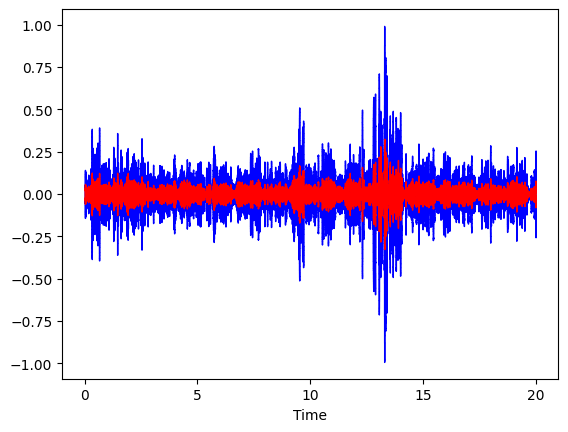

In [ ]:
y_bp= linearfilter(y)
librosa.display.waveshow(y, color='b')
librosa.display.waveshow(y_bp, color='r')

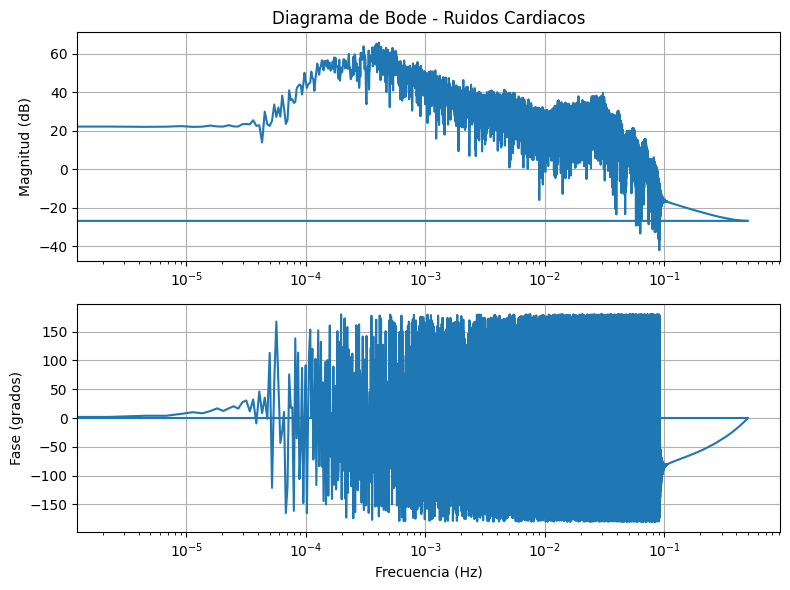

In [ ]:
dataset= linearfilter(y)
fft = np.fft.fft(dataset)
freq = np.fft.fftfreq(len(dataset))

# Calcular la magnitud y la fase
mag = np.abs(fft)
phase = np.angle(fft, deg=True)

# Graficar el diagrama de Bode
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.semilogx(freq, 20 * np.log10(mag))
ax1.set_title('Diagrama de Bode - Ruidos Cardiacos')
ax1.set_ylabel('Magnitud (dB)')
ax1.grid()
ax2.semilogx(freq, phase)
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase (grados)')
ax2.grid()

plt.tight_layout()
plt.show()



In [ ]:
def linealfilt3(y):

  nyquist= sr/2
  fh= 2000 / nyquist
  fb= 100 / nyquist
  b=signal.firwin(27,[fb,fh],window = "rectangular",pass_zero=False)
  y_bp = signal.filtfilt(b,1,y);
  return y_bp

<ipython-input-17-941ae03d5130>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


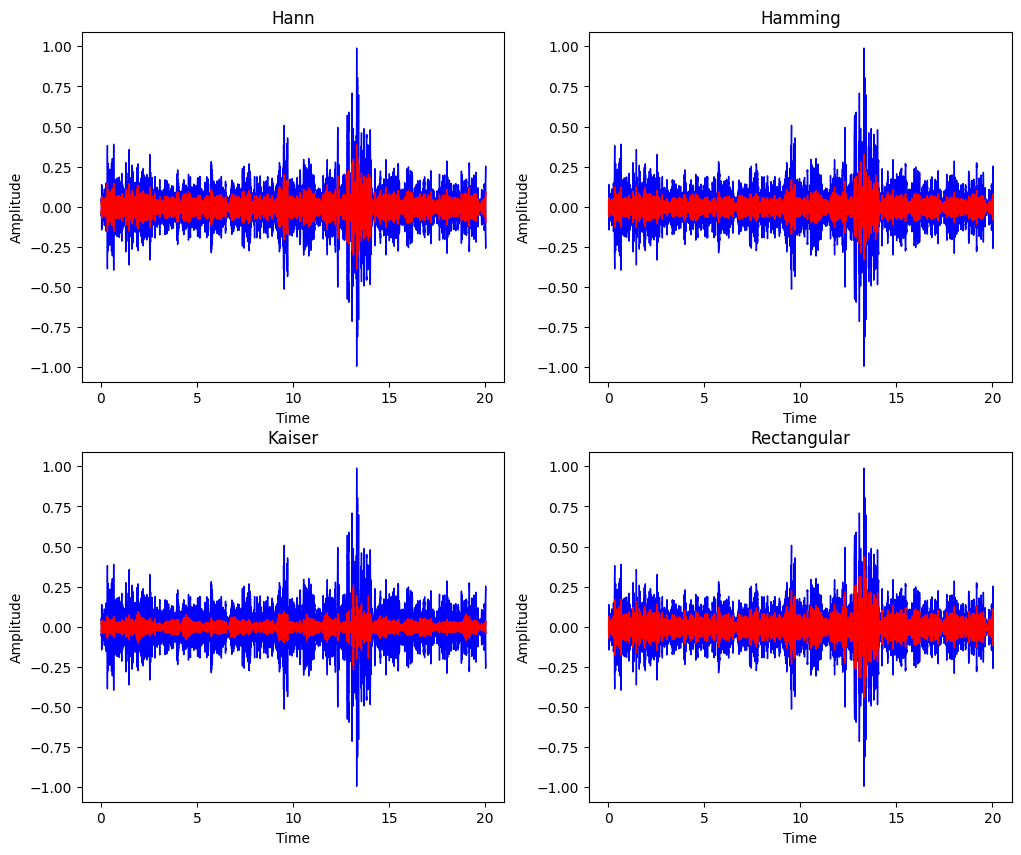

In [ ]:
y_bp= linealfilt(y)
y_bp1= linealfilt1(y)
y_bp2= linealfilt2(y)
y_bp3= linealfilt3(y)

plt.figure(figsize=(12,10))
plt.title('Señal de audio')

plt.subplot(2,2,1)
plt.title("Hann")
plt.ylabel('Amplitude')
librosa.display.waveshow(y, color='b')
librosa.display.waveshow(y_bp, color='r')
plt.subplot(2,2,2)
plt.title("Hamming")
plt.ylabel('Amplitude')
librosa.display.waveshow(y, color='b')
librosa.display.waveshow(y_bp1, color='r')
plt.subplot(2,2,3)
plt.title("Kaiser")
plt.ylabel('Amplitude')
librosa.display.waveshow(y, color='b')
librosa.display.waveshow(y_bp2, color='r')
plt.subplot(2,2,4)
plt.title("Rectangular")
plt.ylabel('Amplitude')
librosa.display.waveshow(y, color='b')
librosa.display.waveshow(y_bp3, color='r')
plt.show()

4) Adaptar el código entregado en clase para construir un filtro wavelet para eliminar los  ruidos cardiacos.

In [ ]:
def wavfiltro(y_bp,wav,tumbral,estim,pond):
  def wnoisest(coeff,pond):
      if pond=='1n':
        stdc = np.zeros((1,1));
        stdc[0] = (np.median(np.absolute(coeff[0])))/0.6745;
      elif pond=='mn':
        #si es de todos los niveles reccorre un for cada uno de los detalles del primer nivel
        stdc = np.zeros((len(coeff),1));
        for i in coeff:
            ps= coeff.index(i)
            stdc[ps] = (np.median(np.absolute(i)))/0.6745;
      return stdc;

  def threshold(coeff,estim):
      Num_samples = 0;
      for i in coeff:
          Num_samples = Num_samples + i.shape[0];
      # se escoge el tipo de estimacion y se aplica la formula de cada una
      if estim=='universal':
        thr = np.sqrt(2*(np.log(Num_samples)))
      elif estim=='minmax':
        thr = 0.3936+0.1829*(np.log(Num_samples)/np.log(2))
      elif estim=='stein':
        thr = np.sqrt(2*np.log(Num_samples*np.log2(Num_samples)))
      else:
        thr=0
      return thr

  def wthresh(coeff,tumbral):
      y   = list();
      s = wnoisest(coeff,pond);
      thr = threshold(coeff,estim)
      ss=np.shape(s)
      if ss[0]==1:
        #se selecciona el tipo aplicación del umbralización y se aplica la formula de umbralización para cada uno y se guarda en una lista
        if tumbral=="duro":
          #si la pinderacion solo es del nivel 1 se repite las ponderaciones de los 3 detalles para los otros niveles
          for i in coeff:
            ps= coeff.index(i)
            y.append(np.multiply(i,np.abs(i)>(thr*s[0])));
        elif tumbral=="suave":
          for i in coeff:
            ps= coeff.index(i)
            y.append(np.multiply(np.sign(i)*(np.abs(i)-(thr*s[0])),np.abs(i)>(thr*s[0])));
      else:
        if tumbral=="duro":
          for i in coeff:
            ps= coeff.index(i)
            y.append(np.multiply(i,np.abs(i)>(thr*s[ps])));
        elif tumbral=="suave":
          for i in coeff:
            ps= coeff.index(i)
            y.append(np.multiply(np.sign(i)*(np.abs(i)-(thr*s[ps])),np.abs(i)>(thr*s[ps])));
      return thr,s,y;
  LL = int(np.floor(np.log2(y_bp.shape[0])));
  data_wavelet = pywt.wavedec( y_bp, wav, level=LL );
  details = data_wavelet[1:]
  thr, s, details_t = wthresh(details,tumbral);
  coeff = list()
  coeff.append(data_wavelet[0])

  for i in details_t:
    coeff.append(i)
  x_rec = pywt.waverec( coeff, wav);
  x_rec = x_rec[0:y_bp.shape[0]];
  return x_rec


WAVELET CON EL CODIGO DE JOHN

In [ ]:
def wavefilter(y_bp):
  def wnoisest(coeff):#Multinivel
      stdc = np.zeros((len(coeff),1));
      for i in range(0,len(coeff)):
          stdc[i] = (np.median(np.absolute(coeff[i])))/0.6745;
      return stdc;

  def threshold(coeff):#universal
      Num_samples = 0;
      for i in range(0,len(coeff)):
          Num_samples = Num_samples + coeff[i].shape[0];

      thr = np.sqrt(2*(np.log(Num_samples)))
      return thr

  def wthresh(coeff):#duro
      y   = list();
      s = wnoisest(coeff);
      print(s)
      thr = threshold(coeff)
      print(thr)
      for i in range(0,len(coeff)):
          y.append(np.multiply(coeff[i],np.abs(coeff[i])>(thr*s[i])));
      return thr,s,y;


  LL = int(np.floor(np.log2(y_bp.shape[0])));
  data_wavelet = pywt.wavedec( y_bp, 'db6', level=LL );
  details = data_wavelet[1:]
  thr, s, details_t = wthresh(details);
  coeff = list()
  coeff.append(data_wavelet[0])

  for i in range(len(details_t)):
    coeff.append(details_t[i])

  x_rec = pywt.waverec( coeff, 'db6');
  x_rec = x_rec[0:y_bp.shape[0]];
  x_filt = np.squeeze(y_bp - x_rec);

  return x_filt




<ipython-input-14-653f47bc1e66>:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  ps= coeff.index(i)
<ipython-input-14-653f47bc1e66>:48: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  ps= coeff.index(i)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-14-653f47bc1e66>:39: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  ps= coeff.index(i)
<ipython-input-14-653f47bc1e66>:52: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  ps= coeff.index(i)


[[6.49420323e-01]
 [7.94422592e-01]
 [1.97259126e-01]
 [3.86905652e-02]
 [7.45315058e-02]
 [1.82982779e-01]
 [4.72579438e-01]
 [8.62421784e-01]
 [4.60360467e-01]
 [1.77721440e-01]
 [5.95675537e-02]
 [3.44987771e-02]
 [1.68556724e-02]
 [1.59355063e-02]
 [5.74064079e-03]
 [6.32654789e-04]
 [3.66190388e-05]
 [6.90181816e-07]]
5.098469751035389


<ipython-input-17-88db5e61d456>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


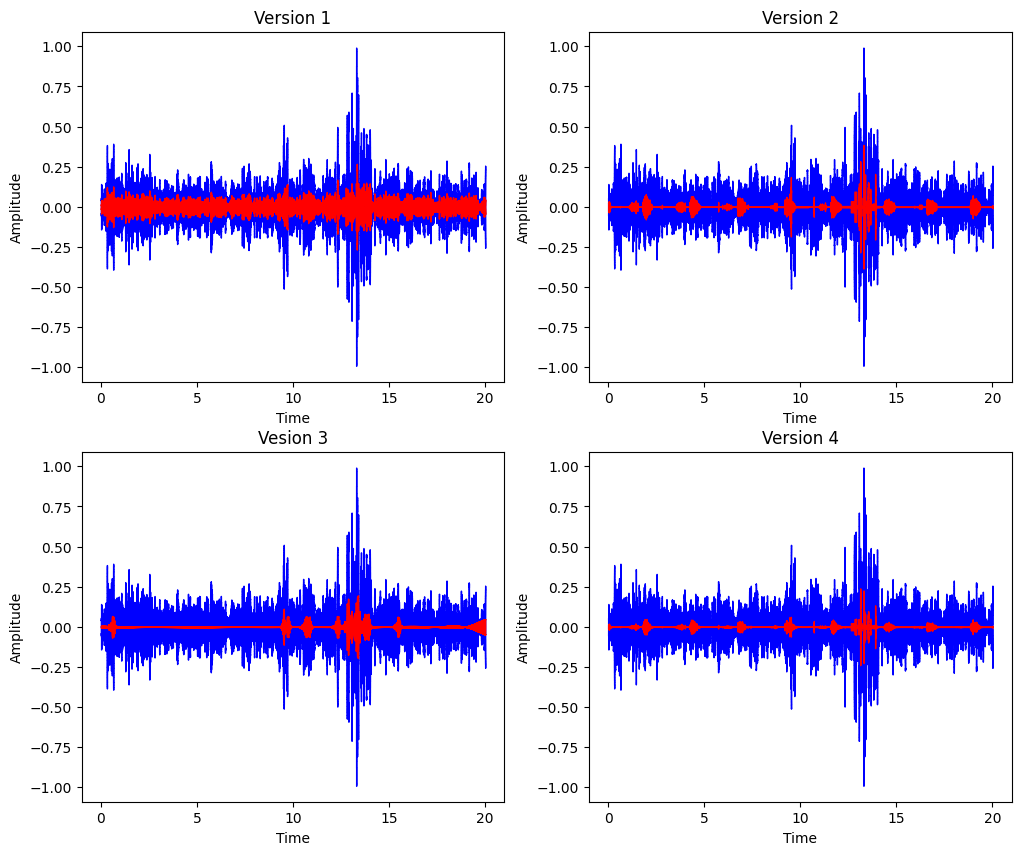

In [ ]:
x_rec2= wavfiltro(y_bp,'haar','duro','universal','mn')
x_rec1= wavefilter(y_bp)
x_rec3= wavfiltro(y_bp,'db6','duro','minmax','1n')
x_rec4= wavfiltro(y_bp,'haar','suave','minmax','mn')

plt.figure(figsize=(12,10))
plt.title('Señal de audio')
plt.subplot(2,2,1)
plt.title("Version 1")
plt.ylabel('Amplitude')
librosa.display.waveshow(y, color='b')
librosa.display.waveshow(x_rec1, color='r')
plt.subplot(2,2,2)
plt.title("Version 2")
plt.ylabel('Amplitude')
librosa.display.waveshow(y, color='b')
librosa.display.waveshow(x_rec2, color='r')
plt.subplot(2,2,3)
plt.title("Vesion 3")
plt.ylabel('Amplitude')
librosa.display.waveshow(y, color='b')
librosa.display.waveshow(x_rec3, color='r')
plt.subplot(2,2,4)
plt.title("Version 4")
plt.ylabel('Amplitude')
librosa.display.waveshow(y, color='b')
librosa.display.waveshow(x_rec4, color='r')

plt.show()

5)Crear una función que permita el preprocesamiento de la señal usando los filtros previos

In [ ]:
def prepocesamiento (y):
  y_bp=linearfilter(y)
  x_rec= wavefilter(y_bp)

  #x_filt = np.squeeze(y_bp - x_rec);
  return x_rec

[[6.49420323e-01]
 [7.94422592e-01]
 [1.97259126e-01]
 [3.86905652e-02]
 [7.45315058e-02]
 [1.82982779e-01]
 [4.72579438e-01]
 [8.62421784e-01]
 [4.60360467e-01]
 [1.77721440e-01]
 [5.95675537e-02]
 [3.44987771e-02]
 [1.68556724e-02]
 [1.59355063e-02]
 [5.74064079e-03]
 [6.32654789e-04]
 [3.66190388e-05]
 [6.90181816e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


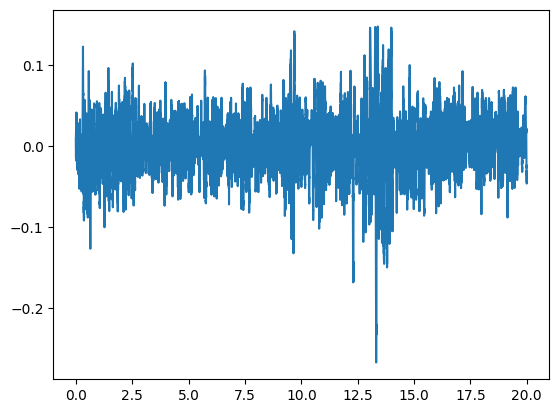

In [ ]:
x_filt=prepocesamiento(y)
t= np.arange(0, len(x_filt)/sr, 1/sr)
plt.plot(t,x_filt)


6) Aplicar el preprocesamiento sobre todas las señales de la base de datos
a. Se recomienda filtrar primero las señales antes de partirlas en los ciclos

In [ ]:

def extract_cycles(ruta_txt,ruta_wav):
  '''
  extract_cycles recibe la ruta de archivo de anotaciones y la ruta de audio. Esta función establece los ciclos
  respiratorios, retorna los ciclos, la señal filtrada y el data frame el cual incluye el tiempo de inicio y el
  tiempo final del ciclo respiratorio adicionamente extrae la anotación de estertores, sibilancias y sanos


  coeficientes --> ruta_txt, ruta_wav

  return: data_frame, final_signal, ciclos
  '''
  import io

  #Señal de audio original y frecuencia de muestreo de la señal
  ejem_signal, fs = librosa.load(ruta_wav)

  #Filtrado de la señal implementado filtros lineales y el filtrado de wavelet

  final_signal = prepocesamiento (ejem_signal)

  #Se utiliza el archivo txt para extraer la anotación de estertores, crepitancias y sibilancias
  with open(ruta_txt) as txtfile:

      reader = io.StringIO(txtfile.read().strip())

  # Se crea el data frame el cual tendra el tiempo de inicio y de fin del ciclo respiratorio. También presenta la anotación de estertores, crepitancias y sibilancias
  data_frame = pd.read_csv(reader,sep="\t", header=None)
  data_frame.columns = ['Time init', 'Time end', 'Crackles','Wheezes']

  # Se convierte en lista los datos de tiempo de inicio, tiempo de fin, sibilancias y crepitancias
  ciclo_init = list(data_frame['Time init'])
  ciclo_end = list(data_frame['Time end'])
  crepitancia = list(data_frame['Crackles'])
  sibilancias = list (data_frame['Wheezes'])

  ciclos = []

  # Se recorre el data frame con el fin de establecer los ciclos respiratorios
  for i in range(len(data_frame)):
      #Ciclos respiratorios
      ciclo_inicio = (ciclo_init[i])* fs #se multiplica el vector del tiempo inicial por la frecuencia de muestreo

      ciclo_final = (ciclo_end[i])* fs #se multiplica el vector del tiempo final por la frecuencia de muestreo

      ciclo = final_signal[int(ciclo_inicio):int(ciclo_final)] # Se establece el rango de interes

      ciclos.append(ciclo) #Se agrega el ciclo al vector vacio

  #En el data frame se inserta una columna que presentara los ciclos establecidos
  data_frame.insert(0, 'raw_signal', ciclos)

  for i in range(len(data_frame)):
  # Se inserta en el data frame una columna que presenta la cantidad de sujetos normales
    if data_frame['raw_signal'].values[i].shape[0]==0:

      data_frame.drop(axis=0, index=i)
  # Establece un condicional que permite clasificar el sujeto como normal
  normal = [1 if (crepitancia[i]==0 and sibilancias[i]==0) else 0 for i in range(len(data_frame))]

  data_frame.insert(len(data_frame.columns), 'normal', normal)


  #Se retorna el data_frame, la señal filtrada y los ciclos obtenidos
  return data_frame, final_signal, ciclos


In [ ]:
#Recibe ruta de anotaciones
ruta_txt = '/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.txt'
ruta_wav = '/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.wav'

data_frame, final_signal, ciclos = extract_cycles(ruta_txt,ruta_wav)

ejem_signal, fs = librosa.load(ruta_wav)


[[1.81987514e+00]
 [7.88132370e-01]
 [3.25459726e-01]
 [1.56163496e-01]
 [1.57111721e-01]
 [2.26327380e-01]
 [3.15715271e-01]
 [3.33777954e-01]
 [3.12521295e-01]
 [1.23344373e-01]
 [3.16642544e-02]
 [8.62935760e-03]
 [4.22545233e-03]
 [1.55682750e-03]
 [6.28712404e-04]
 [1.66929202e-04]
 [1.07989945e-05]
 [1.99406788e-07]]
5.098469751035389


In [ ]:
data_frame


raw_signal  Time init  Time end  \
0   [0.016150213694378662, 0.016146467342206847, 0...      0.036     0.579   
1   [0.014030244720211502, 0.01403110145127813, 0....      0.579     2.450   
2   [0.02176250663133849, 0.0217635397497827, 0.02...      2.450     3.893   
3   [0.0001298458975526605, 0.00040335506768094694...      3.893     5.793   
4   [0.002244834473487657, 0.002244635661323424, 0...      5.793     7.521   
5   [-0.0033489996783392377, -0.003284218746303466...      7.521     9.279   
6   [0.007820245703223988, 0.008031697584031923, 0...      9.279    11.150   
7   [-0.007207424532474076, -0.00720667880637317, ...     11.150    13.036   
8   [-0.006825871718469278, -0.0068257997969283744...     13.036    14.721   
9   [0.00037273410927909955, 0.0003727396729957011...     14.721    16.707   
10  [0.010950957989719557, 0.010950880923298493, 0...     16.707    18.507   
11  [0.07492809274888695, 0.07544305906084564, 0.0...     18.507    19.964   

    Crackles  Wheezes  normal  
0          0        0       1  
1          0        0       1  
2          0        0       1  
3          0        0       1  
4          0        0       1  
5          0        0       1  
6          0        0       1  
7          0        0       1  
8          0        0       1  
9          0        0       1  
10         0        0       1  
11         0        0       1

In [ ]:
# Se utilizan todo los archivos txt y .wav
rutatxt= '/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/*.txt'

rutawav=  '/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/*.wav'

#Archivos txt y archivos .wav, se organizan implementando la función sorted
folder_wav = sorted(glob.glob(rutawav))

folder_txt = sorted(glob.glob(rutatxt))

#Frecuencia de muestreo
sr = 22050

#Se crean listas vacias, con el fin de añadir en ellas la densidad espectral de potencia según el estado del sujeto
pxx_crackles = [] # Sujetos con crepitancias

pxx_wheezes = [] #Sujetos con sibilancias

pxx_normal = [] # Sujetos normales

for k in range(0,len(folder_wav)):
    # Se extrae el archivo txt y el archivo .wav
    ruta_txt= folder_txt[k]

    ruta_wav= folder_wav[k]
    # Se implementa la función de extract_cycles
    data_frame, final_signal,ciclos = extract_cycles(ruta_txt,ruta_wav)

    # Se convierte en lista los datos de tiempo de inicio, tiempo de fin, sibilancias y crepitancias
    sanos = list(data_frame['normal'])

    crepitancia = list(data_frame['Crackles'])

    sibilancias = list(data_frame['Wheezes'])

    for i in range(len(data_frame)):
      #Se extrae los ciclos del data_frame
      ciclos_pxx = data_frame['raw_signal'].values[i]

      #Densidad espectral de potencia
      #f, Pxx = pwelch(ciclos_pxx, sr, window='hann', scaling='density')
      f, Pxx = pwelch (ciclos_pxx, sr,'hann', 2000, 1000)

      # Condicional que permite clasificar la densidad espectral de potencia segun el estado del sujeto (normal, crepitancia, sibilancia)
      #Sujeto con crepitancia
      if crepitancia[i]==1:
         pxx_crackles.append(Pxx)
      #Sujeto con sibilancia
      elif sibilancias[i]==1:
         pxx_wheezes.append(Pxx)
      #Sujeto sano
      elif sanos[i]==1:
        pxx_normal.append(Pxx)

# Promedio de la densidad espectral de potencia
pxx_sanos_mean = np.mean(np.array(pxx_normal), axis = 0) #Sujetos sanos

pxx_crackles_mean = np.mean(np.array(pxx_crackles), axis = 0) #Sujetos con crepitancia

pxx_wheezes_mean = np.mean(np.array(pxx_wheezes), axis = 0) #Sujetos con sibilancia


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.81987514e+00]
 [7.88132370e-01]
 [3.25459726e-01]
 [1.56163496e-01]
 [1.57111721e-01]
 [2.26327380e-01]
 [3.15715271e-01]
 [3.33777954e-01]
 [3.12521295e-01]
 [1.23344373e-01]
 [3.16642544e-02]
 [8.62935760e-03]
 [4.22545233e-03]
 [1.55682750e-03]
 [6.28712404e-04]
 [1.66929202e-04]
 [1.07989945e-05]
 [1.99406788e-07]]
5.098469751035389
[[5.27088401e-01]
 [2.21100336e-01]
 [1.20690528e-01]
 [4.39298728e-02]
 [5.63722353e-02]
 [1.11060370e-01]
 [2.12108694e-01]
 [2.47237427e-01]
 [2.04482052e-01]
 [8.93867709e-02]
 [2.74140799e-02]
 [6.28170679e-03]
 [1.98491649e-03]
 [6.50177303e-04]
 [4.46414867e-04]
 [1.45780604e-04]
 [8.83048033e-06]
 [1.59788500e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.05199604e-02]
 [6.17008933e-02]
 [2.32761677e-02]
 [2.79998036e-02]
 [7.52662361e-02]
 [1.90059493e-01]
 [1.81287213e-01]
 [1.89479446e-01]
 [1.11328246e-01]
 [4.64155444e-02]
 [1.37002975e-02]
 [5.32820668e-03]
 [2.40061831e-03]
 [7.99611669e-04]
 [5.59364638e-04]
 [1.82416016e-04]
 [8.96959359e-06]
 [1.57061148e-07]]
5.098469751035389
[[4.55655595e+00]
 [1.45582603e+00]
 [6.32469282e-01]
 [3.37943551e-01]
 [1.42988621e-01]
 [3.80349545e-01]
 [9.77602494e-01]
 [2.82830193e+00]
 [1.33564934e+00]
 [2.30073713e-01]
 [3.81962331e-02]
 [1.41081281e-02]
 [5.36788023e-03]
 [2.95496687e-03]
 [1.57349219e-03]
 [6.54114715e-04]
 [5.03142338e-05]
 [9.76743243e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.28483672e-01]
 [1.43189589e-01]
 [3.58135755e-01]
 [2.94686803e-01]
 [9.88502408e-02]
 [1.18938018e-01]
 [8.18670764e-02]
 [2.16612084e-01]
 [2.60047702e-01]
 [1.97373014e-01]
 [8.31850103e-02]
 [2.29414666e-02]
 [6.67083905e-03]
 [6.10062814e-03]
 [1.76014558e-03]
 [8.68413053e-05]
 [2.44819389e-06]
 [3.98647147e-08]]
5.05274572887633


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.88484229e-02]
 [1.71734012e-01]
 [1.85002730e-01]
 [1.36370586e-01]
 [1.65661232e-01]
 [1.79007398e-01]
 [1.18487129e-01]
 [7.22596177e-02]
 [2.03388278e-01]
 [1.76210102e-01]
 [1.22977222e-01]
 [4.87799117e-02]
 [1.70338545e-02]
 [7.83460161e-03]
 [7.58127264e-03]
 [2.18721381e-03]
 [1.07418256e-04]
 [2.83419806e-06]
 [4.51050630e-08]]
5.146526917692714


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.05847900e-01]
 [2.90581006e-01]
 [2.94837417e-01]
 [2.32700284e-01]
 [8.70780205e-02]
 [5.80028993e-02]
 [3.99148271e-02]
 [1.07254219e-01]
 [1.02291412e-01]
 [6.57456506e-02]
 [2.60724215e-02]
 [1.01915304e-02]
 [3.10898875e-03]
 [1.84994449e-03]
 [5.06745841e-04]
 [3.44989323e-05]
 [1.62418709e-06]
 [2.90177368e-08]]
5.082949689429893


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.84465141e-01]
 [6.38618220e-01]
 [3.42631929e-01]
 [1.67063226e-01]
 [2.08281436e-01]
 [1.37967463e-01]
 [1.07741625e-01]
 [2.32249959e-01]
 [2.86337791e-01]
 [1.64105031e-01]
 [5.74385389e-02]
 [1.70922660e-02]
 [4.70726745e-03]
 [2.66345622e-03]
 [7.17797153e-04]
 [4.68994312e-05]
 [1.97120155e-06]
 [3.42789706e-08]]
5.042075449193027


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.13836643e-01]
 [1.75763163e-01]
 [1.45400129e-01]
 [1.76645295e-01]
 [1.65694670e-01]
 [9.27359850e-02]
 [1.85759714e-01]
 [2.72903550e-01]
 [2.16921905e-01]
 [1.35352463e-01]
 [4.97060144e-02]
 [2.15658659e-02]
 [8.88012458e-03]
 [5.45700530e-03]
 [1.44127447e-03]
 [6.72574433e-05]
 [2.24503152e-06]
 [3.75126835e-08]]
5.125459790862333


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.35519162e-01]
 [2.69335226e-01]
 [3.25113769e-01]
 [1.95830338e-01]
 [2.67262368e-01]
 [1.27361536e-01]
 [1.51524934e-01]
 [2.27356008e-01]
 [1.99380159e-01]
 [1.17266287e-01]
 [3.74945413e-02]
 [1.23507675e-02]
 [4.39240271e-03]
 [3.77583833e-03]
 [1.02128080e-03]
 [5.31755917e-05]
 [2.02079538e-06]
 [3.48789954e-08]]
5.131872058809635


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.78975623e-01]
 [2.03361093e-01]
 [4.53863199e-02]
 [4.04673089e-02]
 [5.48774800e-02]
 [1.36639762e-01]
 [1.27014552e-01]
 [1.02634491e-01]
 [7.74508846e-02]
 [5.16029222e-02]
 [1.84736691e-02]
 [1.41262590e-02]
 [2.09939637e-02]
 [3.19148238e-02]
 [3.75994645e-02]
 [1.15392127e-02]
 [5.04470975e-04]
 [8.28692857e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.14850340e-01]
 [1.07219131e-01]
 [2.45151587e-02]
 [8.98085976e-03]
 [5.34754127e-03]
 [1.73207686e-02]
 [4.60190704e-02]
 [7.67517007e-02]
 [6.30529008e-02]
 [6.45616843e-02]
 [4.14628605e-02]
 [2.40330560e-02]
 [1.12439757e-02]
 [3.86258214e-03]
 [1.51152800e-03]
 [5.90607758e-04]
 [4.66790238e-05]
 [9.19971073e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.89558860e+00]
 [8.76476991e-01]
 [3.59735793e-01]
 [1.86882393e-01]
 [3.44474191e-01]
 [9.65719344e-01]
 [1.54942359e+00]
 [1.50352563e+00]
 [4.89055996e-01]
 [1.64262592e-01]
 [7.62074320e-02]
 [4.62873525e-02]
 [9.05571201e-03]
 [1.66066994e-03]
 [6.71794086e-04]
 [2.09352571e-04]
 [1.57450925e-05]
 [3.08966498e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.44788870e-01]
 [1.15917377e-01]
 [1.29074957e-01]
 [1.85769574e-01]
 [2.13042783e-01]
 [4.25254801e-01]
 [1.02839949e+00]
 [2.11559678e+00]
 [2.03287811e+00]
 [1.15087845e+00]
 [4.92355529e-01]
 [2.09366298e-01]
 [6.92864448e-02]
 [1.65463567e-02]
 [6.03894860e-03]
 [1.84008535e-03]
 [1.34383578e-04]
 [2.61287509e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.51492351e+00]
 [1.10568881e+00]
 [1.92473910e-01]
 [3.44731121e-01]
 [4.31464321e-01]
 [4.45651443e-01]
 [8.57858000e-01]
 [1.93985102e+00]
 [2.17440250e+00]
 [1.07714791e+00]
 [5.16986748e-01]
 [2.04493541e-01]
 [7.81837636e-02]
 [2.18735201e-02]
 [6.34501777e-03]
 [1.73691058e-03]
 [1.23834905e-04]
 [2.39984858e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.97422131e-01]
 [2.02730977e-01]
 [3.68062465e-02]
 [9.28792842e-02]
 [2.25833561e-01]
 [4.78549673e-01]
 [6.98187276e-01]
 [6.22355143e-01]
 [5.73019102e-01]
 [4.85691325e-01]
 [3.40568189e-01]
 [1.34895861e-01]
 [4.29392507e-02]
 [1.79062620e-02]
 [8.45728183e-03]
 [3.19770787e-03]
 [2.55454787e-04]
 [5.01888864e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.89144587e-01]
 [1.45705915e-01]
 [6.86964153e-02]
 [9.52337199e-02]
 [3.58648340e-01]
 [6.57716120e-01]
 [1.08522784e+00]
 [1.39957311e+00]
 [1.11986334e+00]
 [1.21106292e+00]
 [7.16742648e-01]
 [1.60976934e-01]
 [4.58772949e-02]
 [2.21919616e-02]
 [1.22682790e-02]
 [5.36155899e-03]
 [4.41241750e-04]
 [8.68254089e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.61431986e-02]
 [1.28290343e-01]
 [1.39443391e-01]
 [1.17116725e-01]
 [1.18675974e-01]
 [4.96087292e-01]
 [1.55805566e+00]
 [2.34108272e+00]
 [1.67871557e+00]
 [8.10497688e-01]
 [4.91675236e-01]
 [3.45301040e-01]
 [2.04669290e-01]
 [9.96429243e-02]
 [2.12109344e-02]
 [3.05339338e-03]
 [1.91371085e-04]
 [3.64253979e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.72118188e-01]
 [1.91202401e-01]
 [1.69598336e-01]
 [1.21033800e-01]
 [3.43923469e-01]
 [6.79631789e-01]
 [2.13461504e+00]
 [2.78815188e+00]
 [1.65624408e+00]
 [1.08417385e+00]
 [6.54549613e-01]
 [3.06146266e-01]
 [1.74328188e-01]
 [8.12685724e-02]
 [1.91192950e-02]
 [4.38074297e-03]
 [3.19307962e-04]
 [6.22312401e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.06029219e-01]
 [3.78350029e-01]
 [5.63019448e-02]
 [3.99055623e-02]
 [4.78607343e-02]
 [1.11855210e-01]
 [4.26157351e-01]
 [1.23224203e+00]
 [1.32148152e+00]
 [7.23301152e-01]
 [2.35053181e-01]
 [7.80009892e-02]
 [3.94113578e-02]
 [3.86468250e-02]
 [1.22320364e-02]
 [1.42469583e-03]
 [9.06158194e-05]
 [1.70422635e-06]]
5.098469751035389
[[4.02107783e-01]
 [3.30737476e-01]
 [1.03549112e-01]
 [2.33905349e-01]
 [1.56169028e-01]
 [6.09110670e-01]
 [1.00477824e+00]
 [1.95746122e+00]
 [1.92640821e+00]
 [9.20449955e-01]
 [3.93328853e-01]
 [1.73527618e-01]
 [5.79775538e-02]
 [1.55699550e-02]
 [6.15704104e-03]
 [1.90398394e-03]
 [1.35611447e-04]
 [2.62584845e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.13128166e+00]
 [6.47617562e-01]
 [2.53314885e-01]
 [1.85990323e-01]
 [3.14204827e-01]
 [4.51276622e-01]
 [9.80029985e-01]
 [2.37033485e+00]
 [2.07002038e+00]
 [1.15259875e+00]
 [5.13121985e-01]
 [1.75215520e-01]
 [6.28231470e-02]
 [1.68284634e-02]
 [5.65518585e-03]
 [1.62819408e-03]
 [1.19266212e-04]
 [2.31753713e-06]]
5.098469751035389
[[3.18279919e-01]
 [1.98050866e-01]
 [4.97935715e-02]
 [7.24987376e-02]
 [2.50796225e-01]
 [6.41398870e-01]
 [7.45399500e-01]
 [5.65498293e-01]
 [5.54339617e-01]
 [4.10069791e-01]
 [2.73419890e-01]
 [1.10823591e-01]
 [3.49184420e-02]
 [1.64133325e-02]
 [8.10235548e-03]
 [3.19434228e-03]
 [2.52090734e-04]
 [4.95369392e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.35540900e-01]
 [1.11219747e-01]
 [9.53518149e-02]
 [9.61388170e-02]
 [3.00072948e-01]
 [8.71557731e-01]
 [1.06964676e+00]
 [1.43392360e+00]
 [1.06404866e+00]
 [1.31031900e+00]
 [6.37125328e-01]
 [1.48943879e-01]
 [4.13849881e-02]
 [2.19666891e-02]
 [1.29473220e-02]
 [5.57011686e-03]
 [4.47275690e-04]
 [8.83168880e-06]]
5.098469751035389
[[2.76037628e-01]
 [1.84460319e-01]
 [9.74790705e-02]
 [1.04729362e-01]
 [2.58391863e-01]
 [4.76156791e-01]
 [1.15363168e+00]
 [2.32922368e+00]
 [1.49519937e+00]
 [5.98933394e-01]
 [3.16202942e-01]
 [1.56240369e-01]
 [7.29616897e-02]
 [3.31508533e-02]
 [8.09485917e-03]
 [1.68085551e-03]
 [1.16839899e-04]
 [2.25646272e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.62074836e-01]
 [4.50821340e-01]
 [2.67143510e-01]
 [2.01398132e-01]
 [2.34888124e-01]
 [8.86144670e-01]
 [1.98402419e+00]
 [2.69950996e+00]
 [2.20959287e+00]
 [1.16908609e+00]
 [5.65773713e-01]
 [2.62930538e-01]
 [1.24252476e-01]
 [5.33904090e-02]
 [1.51271928e-02]
 [4.00438190e-03]
 [3.02227545e-04]
 [5.93057221e-06]]
5.098469751035389
[[9.85312457e-02]
 [6.49787057e-02]
 [4.10099055e-02]
 [1.99751253e-02]
 [7.40900342e-02]
 [1.20228883e-01]
 [3.66243574e-01]
 [1.05061045e+00]
 [1.29492138e+00]
 [7.50566053e-01]
 [2.12739838e-01]
 [8.51262216e-02]
 [5.43692922e-02]
 [3.98675837e-02]
 [1.30589847e-02]
 [1.41696992e-03]
 [8.51571209e-05]
 [1.57626688e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.17414470e-01]
 [2.88124651e-01]
 [2.06340630e-01]
 [2.18284351e-01]
 [2.70218178e-01]
 [5.42566277e-01]
 [8.68479178e-01]
 [2.12645879e+00]
 [1.92943182e+00]
 [1.11598226e+00]
 [4.69206230e-01]
 [1.93897046e-01]
 [6.48862963e-02]
 [1.70262011e-02]
 [6.16650620e-03]
 [1.89781695e-03]
 [1.37569818e-04]
 [2.66935516e-06]]
5.098469751035389
[[3.79704190e-02]
 [1.05404548e-01]
 [3.83378530e-02]
 [1.29189491e-01]
 [2.37687728e-01]
 [4.14707470e-01]
 [6.54169358e-01]
 [8.98514978e-01]
 [4.27298678e-01]
 [4.30151031e-01]
 [2.40751286e-01]
 [9.72032892e-02]
 [3.70415473e-02]
 [1.22068508e-02]
 [5.17926461e-03]
 [2.00486594e-03]
 [1.63113139e-04]
 [3.24122833e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.67598960e-02]
 [1.55780535e-02]
 [1.97471040e-02]
 [5.47044625e-02]
 [2.35231544e-01]
 [4.51259478e-01]
 [7.39463300e-01]
 [6.84865404e-01]
 [6.50669745e-01]
 [4.22033041e-01]
 [3.17210816e-01]
 [1.26278153e-01]
 [3.81778874e-02]
 [1.74549836e-02]
 [8.25097820e-03]
 [3.18909212e-03]
 [2.53372772e-04]
 [4.96951110e-06]]
5.098469751035389
[[5.53098066e-01]
 [3.90672729e-01]
 [1.72282492e-01]
 [1.36719124e-01]
 [4.89457524e-01]
 [8.07286860e-01]
 [1.21840204e+00]
 [1.96748762e+00]
 [1.38715813e+00]
 [1.40655714e+00]
 [8.82509440e-01]
 [2.19450556e-01]
 [5.52794975e-02]
 [2.56728049e-02]
 [1.25138867e-02]
 [5.19081661e-03]
 [4.08014081e-04]
 [7.99832265e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.19940013e-01]
 [3.69919776e-01]
 [1.45142141e-01]
 [1.00772642e-01]
 [1.34212470e-01]
 [5.00747803e-01]
 [1.27836192e+00]
 [2.11649253e+00]
 [1.30209521e+00]
 [6.84147574e-01]
 [4.05867157e-01]
 [2.68831147e-01]
 [1.68020599e-01]
 [8.78254060e-02]
 [1.81910789e-02]
 [2.38057661e-03]
 [1.41586217e-04]
 [2.68388684e-06]]
5.098469751035389
[[3.10526511e-01]
 [2.70501791e-01]
 [3.27476442e-01]
 [2.02101230e-01]
 [2.81531442e-01]
 [8.00949080e-01]
 [2.16607108e+00]
 [3.24508717e+00]
 [1.91354548e+00]
 [1.17335120e+00]
 [6.23806179e-01]
 [3.01444082e-01]
 [1.70988577e-01]
 [8.63360947e-02]
 [2.03796248e-02]
 [4.36276508e-03]
 [3.16480997e-04]
 [6.18737047e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.57365967e-01]
 [1.63850006e-01]
 [6.88643960e-02]
 [4.50979651e-02]
 [5.26502741e-02]
 [1.49471806e-01]
 [3.98481030e-01]
 [1.48261226e+00]
 [1.51203030e+00]
 [7.48740590e-01]
 [2.36407314e-01]
 [1.05759888e-01]
 [6.35645002e-02]
 [3.36023527e-02]
 [1.21151179e-02]
 [1.47861383e-03]
 [9.16332442e-05]
 [1.72660722e-06]]
5.098469751035389
[[1.21357632e-01]
 [1.03318465e-01]
 [4.60586380e-02]
 [9.47655020e-02]
 [3.47683296e-01]
 [6.21216580e-01]
 [8.77069909e-01]
 [8.43507102e-01]
 [5.70939541e-01]
 [4.49986069e-01]
 [2.08342989e-01]
 [8.58899084e-02]
 [3.83526019e-02]
 [1.84752266e-02]
 [8.67954918e-03]
 [3.39731419e-03]
 [2.83319996e-04]
 [5.65863334e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.50973693e-01]
 [5.19146294e-01]
 [2.04001929e-01]
 [1.55518466e-01]
 [1.50474847e-01]
 [3.50480487e-01]
 [6.23355346e-01]
 [7.71191503e-01]
 [1.16908254e+00]
 [6.45557036e-01]
 [2.75286008e-01]
 [9.95492394e-02]
 [3.01668509e-02]
 [9.30627030e-03]
 [3.92604581e-03]
 [1.33026915e-03]
 [9.89111139e-05]
 [1.93570772e-06]]
5.098469751035389
[[1.13877031e-01]
 [1.22979289e-01]
 [7.61749503e-02]
 [1.34148235e-01]
 [5.60637878e-01]
 [1.01676227e+00]
 [1.42931430e+00]
 [8.40773956e-01]
 [4.83226717e-01]
 [3.21802924e-01]
 [1.00640555e-01]
 [4.48000463e-02]
 [2.50649833e-02]
 [1.37611091e-02]
 [7.61088905e-03]
 [3.20198720e-03]
 [2.67569761e-04]
 [5.31369426e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.86585635e-02]
 [1.47605361e-01]
 [5.42542191e-02]
 [1.42325590e-01]
 [4.82924757e-01]
 [9.96686554e-01]
 [1.30607164e+00]
 [7.68357999e-01]
 [3.07389337e-01]
 [2.97027455e-01]
 [1.20941187e-01]
 [5.26543450e-02]
 [2.93652260e-02]
 [1.65653457e-02]
 [8.95863823e-03]
 [3.64088068e-03]
 [3.00327086e-04]
 [5.95601730e-06]]
5.098469751035389
[[5.85428699e-02]
 [8.25706781e-02]
 [4.57870916e-02]
 [4.42424694e-02]
 [1.58824218e-01]
 [3.58395297e-01]
 [6.24210669e-01]
 [9.62477542e-01]
 [5.75803689e-01]
 [2.68969555e-01]
 [1.46911410e-01]
 [6.42328196e-02]
 [2.25500821e-02]
 [9.55406511e-03]
 [2.71385318e-03]
 [8.14188315e-04]
 [6.46787187e-05]
 [1.27175051e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.85100069e-01]
 [2.02784737e-01]
 [2.09190235e-01]
 [1.67472130e-01]
 [3.43108239e-01]
 [4.59575773e-01]
 [8.12094829e-01]
 [5.34912851e-01]
 [5.23638764e-01]
 [3.01506260e-01]
 [1.48343269e-01]
 [7.07244691e-02]
 [2.51916470e-02]
 [1.01010471e-02]
 [4.08055607e-03]
 [1.48331139e-03]
 [1.19691163e-04]
 [2.36668958e-06]]
5.098469751035389
[[3.64805551e-01]
 [2.38540407e-01]
 [1.59715260e-01]
 [1.25243641e-01]
 [1.76524252e-01]
 [4.55610213e-01]
 [9.19252167e-01]
 [1.68125888e+00]
 [2.00615665e+00]
 [1.26165302e+00]
 [4.31656095e-01]
 [1.79723968e-01]
 [8.50785732e-02]
 [3.60738826e-02]
 [1.67924534e-02]
 [5.26735105e-03]
 [3.74239385e-04]
 [7.01712319e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.24297445e-01]
 [3.28587763e-01]
 [7.42674681e-02]
 [8.27533311e-02]
 [2.90397742e-01]
 [5.16483317e-01]
 [6.00567426e-01]
 [5.08448167e-01]
 [3.66100081e-01]
 [1.96522260e-01]
 [6.43750594e-02]
 [1.19824456e-02]
 [2.50939282e-03]
 [5.95303887e-04]
 [2.49181218e-04]
 [9.87750225e-05]
 [6.98197938e-06]
 [1.32464041e-07]]
5.098469751035389
[[1.08615952e-01]
 [1.73655871e-01]
 [2.24907487e-01]
 [1.29510166e-01]
 [6.96122838e-02]
 [6.58848853e-02]
 [4.57758989e-02]
 [7.78298855e-02]
 [1.21113664e-01]
 [1.03308746e-01]
 [3.40772217e-02]
 [8.88493664e-03]
 [2.99217373e-03]
 [1.37802491e-03]
 [2.99876052e-04]
 [2.29759004e-05]
 [1.22330394e-06]
 [2.25360793e-08]]
5.10173524085955


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.93702735e-02]
 [6.64693489e-02]
 [1.15474464e-01]
 [1.59446738e-01]
 [9.11551735e-02]
 [5.85068082e-02]
 [5.57852964e-02]
 [1.00482156e-01]
 [1.11159477e-01]
 [1.03118178e-01]
 [4.32057417e-02]
 [8.99341465e-03]
 [2.86520731e-03]
 [1.71337726e-03]
 [4.99494055e-04]
 [3.30115447e-05]
 [1.39569206e-06]
 [2.48623220e-08]]
5.097998353768294
[[3.70343568e-02]
 [1.22693493e-01]
 [1.42740042e-01]
 [1.23112985e-01]
 [5.19710001e-02]
 [5.49732298e-02]
 [6.86260589e-02]
 [8.64010374e-02]
 [1.17012480e-01]
 [1.09346986e-01]
 [3.90837235e-02]
 [1.13778450e-02]
 [3.53961783e-03]
 [2.19526696e-03]
 [5.82132590e-04]
 [2.96663604e-05]
 [1.35278445e-06]
 [2.41335804e-08]]
5.065857236826838


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.72701424e-02]
 [3.39702948e-01]
 [3.50084966e-01]
 [1.14212797e-01]
 [1.03342779e-01]
 [8.21762425e-02]
 [1.47485401e-01]
 [2.47926463e-01]
 [2.66501367e-01]
 [1.77033435e-01]
 [5.04073044e-02]
 [1.41253058e-02]
 [3.74189851e-03]
 [1.49882224e-03]
 [4.14892884e-04]
 [2.86653208e-05]
 [1.37392289e-06]
 [2.47189322e-08]]
5.071725267258191
[[4.59824721e-01]
 [8.77987104e-01]
 [6.42595592e-01]
 [3.36237636e-01]
 [2.34351184e-01]
 [1.13949091e-01]
 [1.47896731e-01]
 [2.97862550e-01]
 [3.38291844e-01]
 [3.09420670e-01]
 [1.02820309e-01]
 [1.93466010e-02]
 [3.68281133e-03]
 [2.64630072e-03]
 [8.94453294e-04]
 [5.25041031e-05]
 [1.79110105e-06]
 [3.02682746e-08]]
5.073884968730768


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.37871493e-01]
 [1.56432553e-01]
 [2.12986691e-01]
 [1.57927116e-01]
 [1.09995587e-01]
 [1.24025726e-01]
 [7.49828027e-02]
 [1.33796438e-01]
 [2.14261985e-01]
 [2.61459412e-01]
 [1.80107655e-01]
 [5.60401606e-02]
 [1.25868715e-02]
 [2.91900566e-03]
 [1.99310885e-03]
 [6.08447105e-04]
 [3.49511005e-05]
 [1.56567657e-06]
 [2.76877930e-08]]
5.1773637912439066


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.25101029e+00]
 [4.43129007e+00]
 [2.44570853e+00]
 [1.15946778e+00]
 [1.33578027e+00]
 [1.54000561e+00]
 [3.16864295e+00]
 [2.92477326e+00]
 [1.92592578e+00]
 [1.40328145e+00]
 [4.96117249e-01]
 [2.31105234e-01]
 [1.11937835e-01]
 [2.76906768e-02]
 [8.15431911e-03]
 [4.14853281e-03]
 [3.63951677e-03]
 [8.13323206e-04]
 [5.69895400e-05]
 [1.08484145e-06]]
5.34232052760969


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.41991323e+00]
 [1.65671399e+00]
 [2.33382988e+00]
 [6.17586555e+00]
 [8.07397547e+00]
 [4.43499291e+00]
 [2.22480694e+00]
 [1.76031968e+00]
 [1.64890474e+00]
 [6.86072775e-01]
 [3.61301643e-01]
 [2.67059649e-01]
 [5.64960642e-02]
 [1.29572838e-02]
 [4.29468509e-03]
 [1.13865389e-03]
 [3.33060124e-04]
 [2.42307254e-05]
 [4.59363327e-07]]
5.191608429283959


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.42962854e+00]
 [5.06204750e+00]
 [2.38613030e+00]
 [3.57438397e+00]
 [2.32524631e+00]
 [3.10524879e+00]
 [2.00843551e+00]
 [1.19664636e+00]
 [1.00680951e+00]
 [7.25224550e-01]
 [5.23476399e-01]
 [5.61955917e-01]
 [6.46658430e-02]
 [2.90450768e-02]
 [1.17856635e-02]
 [3.19753942e-03]
 [8.55211590e-04]
 [5.75241903e-05]
 [1.08422017e-06]]
5.192203389739921


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.07989262e+00]
 [7.41692985e+00]
 [3.56337124e+00]
 [2.60957392e+00]
 [3.98293718e+00]
 [4.64213669e+00]
 [4.06144173e+00]
 [3.27462057e+00]
 [1.85412404e+00]
 [8.60287385e-01]
 [4.11306195e-01]
 [2.93919410e-01]
 [5.02150512e-02]
 [1.64447248e-02]
 [5.61137339e-03]
 [2.27044996e-03]
 [6.04631640e-04]
 [3.98710044e-05]
 [7.52265715e-07]]
5.192203389739921


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.69351087e+00]
 [4.71204653e+00]
 [9.02640118e-01]
 [5.32968493e-01]
 [1.42126016e+00]
 [1.67652970e+00]
 [1.80303468e+00]
 [1.91078583e+00]
 [2.30425209e+00]
 [1.99752922e+00]
 [1.06729843e+00]
 [3.49147132e-01]
 [1.26957571e-01]
 [2.82785407e-02]
 [8.23801667e-03]
 [3.50591678e-03]
 [2.36469832e-03]
 [7.72543188e-04]
 [4.64031755e-05]
 [8.42760100e-07]]
5.352009718118344


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.90697747e-02]
 [2.03764690e-02]
 [1.41351424e-02]
 [5.47273066e-03]
 [4.57540051e-04]
 [1.08775422e-03]
 [3.94800229e-03]
 [1.15398306e-02]
 [1.86491170e-02]
 [1.62778756e-02]
 [7.67836784e-03]
 [4.83083559e-03]
 [4.96200506e-03]
 [4.32657320e-03]
 [2.63811728e-03]
 [1.08861512e-03]
 [6.44561625e-05]
 [1.14677037e-06]]
5.098470195614188
[[4.25245052e-02]
 [4.16496449e-02]
 [9.87644815e-03]
 [4.27732061e-03]
 [4.29069909e-04]
 [9.01994304e-04]
 [3.30365111e-03]
 [1.30678357e-02]
 [1.79678928e-02]
 [1.34953694e-02]
 [6.20651989e-03]
 [4.53909057e-03]
 [6.97501508e-03]
 [4.94862192e-03]
 [2.82304156e-03]
 [1.35612221e-03]
 [8.73027888e-05]
 [1.56452385e-06]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.99569404e+00]
 [4.80760193e+00]
 [1.17907827e+00]
 [8.87539891e-01]
 [9.52339178e-01]
 [1.60424055e+00]
 [1.81083071e+00]
 [2.24430667e+00]
 [1.76583784e+00]
 [1.55869322e+00]
 [1.11076593e+00]
 [6.85810097e-01]
 [1.91669534e-01]
 [3.95614764e-02]
 [1.12060931e-02]
 [6.03582513e-03]
 [5.23117143e-03]
 [8.02503141e-04]
 [5.18943111e-05]
 [9.88555080e-07]]
5.332635609893916


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.72137625e-01]
 [1.52783552e+00]
 [6.07749199e-01]
 [1.49808404e+00]
 [2.49882180e+00]
 [3.42345164e+00]
 [3.46879430e+00]
 [2.34911343e+00]
 [1.59009332e+00]
 [8.82271896e-01]
 [3.69103961e-01]
 [1.60990222e-01]
 [3.25038985e-02]
 [1.09151877e-02]
 [7.48041483e-03]
 [6.27908893e-03]
 [8.24141188e-04]
 [4.94140313e-05]
 [9.32202585e-07]]
5.199201672824776


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.15807358e-02]
 [1.45054290e-01]
 [2.97584733e-01]
 [2.27243551e-01]
 [1.49101066e-01]
 [7.49886610e-02]
 [3.63210539e-02]
 [9.22021607e-02]
 [1.75903053e-01]
 [2.15874358e-01]
 [1.25493280e-01]
 [3.23275381e-02]
 [5.10865354e-03]
 [1.43184091e-03]
 [6.32598148e-04]
 [1.78471650e-04]
 [1.80708528e-05]
 [1.10106553e-06]
 [2.07623878e-08]]
5.173198813965002


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.45241087e-01]
 [1.48958036e+00]
 [1.23687878e+00]
 [1.01318204e+00]
 [5.41801808e-01]
 [4.10652022e-01]
 [1.52605737e-01]
 [1.41713174e-01]
 [3.80429239e-01]
 [4.50391729e-01]
 [3.33990100e-01]
 [1.17189729e-01]
 [3.03406882e-02]
 [7.64055974e-03]
 [4.10907096e-03]
 [1.33206965e-03]
 [6.87377776e-05]
 [1.96163746e-06]
 [3.16930630e-08]]
5.1773637912439066


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.09051472e-01]
 [5.20403141e-01]
 [6.11846100e-01]
 [7.87816426e-01]
 [3.50918443e-01]
 [2.78050222e-01]
 [1.18667549e-01]
 [2.48123683e-01]
 [4.59142664e-01]
 [4.04405410e-01]
 [2.92188379e-01]
 [1.03718244e-01]
 [2.44129729e-02]
 [6.59326661e-03]
 [5.15932909e-03]
 [1.33871269e-03]
 [5.85722703e-05]
 [1.70686250e-06]
 [2.80629148e-08]]
5.1773637912439066
[[3.62996491e-01]
 [2.64457797e-01]
 [1.58336569e-01]
 [1.42454753e-01]
 [1.72347768e-01]
 [1.49024983e-01]
 [1.07820495e-01]
 [1.77683125e-01]
 [1.71650223e-01]
 [8.51385979e-02]
 [3.88069798e-02]
 [1.21297095e-02]
 [3.53800702e-03]
 [1.80970016e-03]
 [4.57590812e-04]
 [3.15394047e-05]
 [1.47610568e-06]
 [2.64637371e-08]]
5.036067749074977


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.15988277e-01]
 [2.21692796e-01]
 [8.18764471e-02]
 [2.54114924e-01]
 [3.96153847e-01]
 [1.88425105e-01]
 [1.25148822e-01]
 [1.90035312e-01]
 [1.48837187e-01]
 [6.80123321e-02]
 [2.62228035e-02]
 [7.32099818e-03]
 [3.17025686e-03]
 [1.27276501e-03]
 [3.19225918e-04]
 [2.71091068e-05]
 [1.42502795e-06]
 [2.58252470e-08]]
5.051144065335039
[[6.34752055e-02]
 [6.37547869e-02]
 [1.76705899e-01]
 [1.10251470e-01]
 [1.52150742e-01]
 [8.75000290e-02]
 [1.03707537e-01]
 [1.93408913e-01]
 [1.97267828e-01]
 [1.72056254e-01]
 [7.35215140e-02]
 [2.36542243e-02]
 [4.23534892e-03]
 [1.66482614e-03]
 [4.28973738e-04]
 [2.93029705e-05]
 [1.45747367e-06]
 [2.62417781e-08]]
5.106606802152995
[[1.10103897e-01]
 [8.40960375e-02]
 [3.90519977e-01]
 [9.27542095e-02]
 [1.24678053e-01]
 [8.98485038e-02]
 [1.89224392e-01]
 [3.40431968e-01]
 [3.21431309e-01]
 [1.87137192e-01]
 [7.69923714e-02]
 [1.86027191e-02]
 [2.97206356e-03]
 [1.68918665e-03]
 [4.84789971e-04]
 [2.96536271e-05]
 [1.40355321e-06]
 [2.5166

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.84649128e-01]
 [2.97694350e-01]
 [1.24651535e-01]
 [2.29538193e-01]
 [1.62076129e-01]
 [1.06584577e-01]
 [1.41621345e-01]
 [2.06456454e-01]
 [1.80621228e-01]
 [1.29768600e-01]
 [5.32242370e-02]
 [1.28601797e-02]
 [2.35206620e-03]
 [2.27267707e-03]
 [6.71703534e-04]
 [4.52678136e-05]
 [2.05916445e-06]
 [3.62012562e-08]]
5.094827548535958
[[1.27684400e-01]
 [2.03621723e-01]
 [1.17217064e-01]
 [1.68360320e-01]
 [1.12074962e-01]
 [8.96854015e-02]
 [8.86263172e-02]
 [1.45174459e-01]
 [1.14277150e-01]
 [7.95717118e-02]
 [3.08942643e-02]
 [7.02745416e-03]
 [1.57368076e-03]
 [1.61275507e-03]
 [4.80989989e-04]
 [3.32766455e-05]
 [1.68175604e-06]
 [3.01516652e-08]]
5.116553766193012


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.36003332e-02]
 [5.21409298e-02]
 [3.08608506e-02]
 [1.31155883e-02]
 [3.20894243e-02]
 [9.28721778e-02]
 [3.06934526e-01]
 [3.92566562e-01]
 [3.86761777e-01]
 [3.53380105e-01]
 [1.99387820e-01]
 [1.07521170e-01]
 [4.20932110e-02]
 [2.98177072e-02]
 [2.39073846e-02]
 [5.71890683e-03]
 [3.02821233e-04]
 [5.27006324e-06]]
5.098469751035389
[[4.34961250e-02]
 [2.34772963e-02]
 [3.28639039e-02]
 [1.78765206e-02]
 [3.13001350e-02]
 [6.25380576e-02]
 [2.11521502e-01]
 [4.60758651e-01]
 [3.15316644e-01]
 [1.53598774e-01]
 [1.04104701e-01]
 [1.10536766e-01]
 [1.06662460e-01]
 [7.53180060e-02]
 [2.07625777e-02]
 [3.43765609e-03]
 [2.27108327e-04]
 [4.32953465e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.05739927e-02]
 [9.38259743e-03]
 [5.37363695e-03]
 [3.69902055e-03]
 [1.63219609e-02]
 [2.77243208e-02]
 [5.17506959e-02]
 [9.32388877e-02]
 [1.20972818e-01]
 [1.04704248e-01]
 [6.16004425e-02]
 [3.03708813e-02]
 [1.04167199e-02]
 [6.11494189e-03]
 [4.01433934e-03]
 [1.06755753e-03]
 [5.98907320e-05]
 [1.04915017e-06]]
5.098469751035389
[[9.89406581e-02]
 [6.90794126e-02]
 [2.17467225e-02]
 [1.43281962e-02]
 [7.30664869e-02]
 [1.82160070e-01]
 [2.44003166e-01]
 [2.35987804e-01]
 [2.62915756e-01]
 [2.02804683e-01]
 [1.85676807e-01]
 [1.72379190e-01]
 [7.41302491e-02]
 [2.91386151e-02]
 [7.09394012e-03]
 [1.07079613e-03]
 [6.87763546e-05]
 [1.31140480e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.06723645e-02]
 [3.52533384e-02]
 [2.28654076e-02]
 [9.47980949e-03]
 [3.23699440e-02]
 [6.83539460e-02]
 [2.23484104e-01]
 [3.38841594e-01]
 [3.18799040e-01]
 [2.03438923e-01]
 [1.59421510e-01]
 [6.31775010e-02]
 [2.84637055e-02]
 [1.77428466e-02]
 [6.04821793e-03]
 [9.64485542e-04]
 [5.47693547e-05]
 [9.95773942e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.15170658e+00]
 [9.43454589e-01]
 [3.94718830e-01]
 [1.32109407e-01]
 [4.81825659e-01]
 [7.75993073e-01]
 [7.82104292e-01]
 [4.76917424e-01]
 [3.20852065e-01]
 [1.38291859e-01]
 [4.06072440e-02]
 [1.45548808e-02]
 [7.33861217e-03]
 [2.82946061e-03]
 [1.13297533e-03]
 [4.20106356e-04]
 [2.63964680e-05]
 [4.72362674e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.18917022e-01]
 [7.64375488e-02]
 [3.30821119e-02]
 [1.30273701e-02]
 [9.10931404e-04]
 [2.98966657e-03]
 [8.22658031e-03]
 [4.74363981e-02]
 [1.01856646e-01]
 [1.16080302e-01]
 [4.66243705e-02]
 [1.10385665e-02]
 [3.06897095e-03]
 [9.68335385e-04]
 [4.42769049e-04]
 [1.23178794e-04]
 [7.67646874e-06]
 [1.45198070e-07]]
5.098470195614188
[[2.01673930e-01]
 [1.24774339e-01]
 [3.54899520e-02]
 [1.47539777e-02]
 [4.78696523e-04]
 [6.03209639e-04]
 [2.23158680e-03]
 [6.39100748e-03]
 [1.53598850e-02]
 [2.37473753e-02]
 [1.25677125e-02]
 [4.79504154e-03]
 [2.87088934e-03]
 [3.61126069e-03]
 [1.91677206e-03]
 [2.45863764e-04]
 [1.54453052e-05]
 [2.90831800e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.74607987e-02]
 [3.83168069e-02]
 [1.48400231e-02]
 [5.87201874e-03]
 [1.48646627e-03]
 [4.62680452e-03]
 [1.26151390e-02]
 [3.19569892e-02]
 [2.39904295e-02]
 [1.36064110e-02]
 [6.58189931e-03]
 [2.27979437e-03]
 [1.36001338e-03]
 [1.05992433e-03]
 [4.17137756e-04]
 [8.49446662e-05]
 [5.68797138e-06]
 [1.08956412e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.40244804e-02]
 [2.39857518e-02]
 [5.05952042e-03]
 [1.53861118e-03]
 [1.45070602e-03]
 [2.86744604e-03]
 [1.03971063e-02]
 [3.77141881e-02]
 [2.87848241e-02]
 [1.70243113e-02]
 [7.37868172e-03]
 [2.29555247e-03]
 [1.58957943e-03]
 [1.43908174e-03]
 [5.21939049e-04]
 [9.05275576e-05]
 [5.69193708e-06]
 [1.09289634e-07]]
5.098469751035389
[[3.30577620e-01]
 [1.44482060e-01]
 [1.43625850e-01]
 [3.55452263e-01]
 [2.42684390e-01]
 [1.80690255e-01]
 [1.45619090e-01]
 [2.19357612e-01]
 [2.19680854e-01]
 [1.64620682e-01]
 [6.90146213e-02]
 [3.15811093e-02]
 [1.75739868e-02]
 [1.70231480e-02]
 [4.25796559e-03]
 [1.77737812e-04]
 [4.12252451e-06]
 [6.07778096e-08]]
5.047894546979772


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.47543914e-01]
 [2.75097002e-01]
 [5.35209150e-01]
 [5.19674783e-01]
 [1.24206143e+00]
 [5.72575813e-01]
 [4.07842657e-01]
 [2.63641706e-01]
 [2.50319492e-01]
 [1.88222238e-01]
 [7.20282664e-02]
 [3.49156667e-02]
 [1.89366606e-02]
 [1.47572738e-02]
 [4.38981800e-03]
 [2.41236759e-04]
 [5.22661270e-06]
 [7.46651748e-08]]
5.081583362730191
[[2.87556055e-02]
 [1.06268452e-01]
 [1.04014048e-01]
 [6.68924347e-02]
 [5.59681555e-02]
 [6.17489479e-02]
 [6.26290467e-02]
 [1.32899055e-01]
 [1.92382226e-01]
 [1.54052646e-01]
 [6.36827052e-02]
 [2.18087789e-02]
 [6.72302777e-03]
 [3.06369050e-03]
 [8.04911781e-04]
 [3.80527583e-05]
 [1.53990253e-06]
 [2.70473005e-08]]
5.005933994800337


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.13171599e-01]
 [4.64231973e-01]
 [2.83037279e-01]
 [2.50761771e-01]
 [1.25562489e-01]
 [8.72188272e-02]
 [1.54306102e-01]
 [2.42879334e-01]
 [2.96181409e-01]
 [2.67422051e-01]
 [1.10060248e-01]
 [2.90157563e-02]
 [6.80309000e-03]
 [6.38192583e-03]
 [1.91281170e-03]
 [9.05096625e-05]
 [2.60541626e-06]
 [4.16397139e-08]]
5.099254578897103


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.64540500e-02]
 [3.39580557e-01]
 [2.58414744e-01]
 [6.43272658e-01]
 [1.98247294e-01]
 [2.17901994e-01]
 [1.87138546e-01]
 [3.48824830e-01]
 [3.40207498e-01]
 [2.69254249e-01]
 [1.04353216e-01]
 [6.69335884e-02]
 [2.39593781e-02]
 [1.35170829e-02]
 [3.25856502e-03]
 [1.39907305e-04]
 [3.73697972e-06]
 [5.90489757e-08]]
5.004911590040389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.46877278e-01]
 [8.80863638e-02]
 [5.24943035e-01]
 [3.45818272e-01]
 [1.64400513e-01]
 [2.30371356e-01]
 [1.66297714e-01]
 [1.53866057e-01]
 [2.00832723e-01]
 [1.71198336e-01]
 [8.24528500e-02]
 [4.75361751e-02]
 [1.85820487e-02]
 [2.16747983e-02]
 [6.18504087e-03]
 [2.49829122e-04]
 [6.16085950e-06]
 [9.16544151e-08]]
5.004911590040389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.29259684e-01]
 [6.43713115e-02]
 [2.95140789e-02]
 [3.31422690e-02]
 [5.25614141e-02]
 [1.07050526e-01]
 [1.38573445e-01]
 [1.11259715e-01]
 [6.08755140e-02]
 [2.02687400e-02]
 [9.41764145e-03]
 [2.18409027e-03]
 [1.64381867e-03]
 [7.43496577e-04]
 [3.42002964e-04]
 [1.26227796e-04]
 [8.90677167e-06]
 [1.71356187e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.87862340e+00]
 [1.67200620e+00]
 [1.00477736e+00]
 [2.34948102e+00]
 [2.29732724e+00]
 [4.90952680e+00]
 [3.72739667e+00]
 [2.33817042e+00]
 [1.75606753e+00]
 [1.19009071e+00]
 [6.78722689e-01]
 [3.61483163e-01]
 [3.36845686e-01]
 [4.37430981e-02]
 [1.43878147e-02]
 [6.78257250e-03]
 [4.91437290e-03]
 [8.00325052e-04]
 [5.11327558e-05]
 [9.71098759e-07]]
5.3295696552652725


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.55252734e+00]
 [3.44860244e+00]
 [1.57548537e+00]
 [1.34044832e+00]
 [1.62601473e+00]
 [2.26748191e+00]
 [2.54652924e+00]
 [3.24366442e+00]
 [2.67960206e+00]
 [1.81812653e+00]
 [7.89204974e-01]
 [2.93383404e-01]
 [1.97924215e-01]
 [3.18912219e-02]
 [1.07507629e-02]
 [4.56556802e-03]
 [3.79867088e-03]
 [4.88540976e-04]
 [2.83023803e-05]
 [5.32352114e-07]]
5.3295696552652725


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.10363306e+00]
 [3.15890972e+00]
 [2.96387431e+00]
 [9.00458878e-01]
 [9.97009829e-01]
 [3.29188013e+00]
 [2.87706353e+00]
 [2.71334691e+00]
 [2.26480012e+00]
 [1.26627359e+00]
 [4.39545122e-01]
 [2.08210833e-01]
 [1.47652858e-01]
 [3.01441447e-02]
 [9.37409148e-03]
 [5.43301621e-03]
 [4.73541632e-03]
 [1.03789621e-03]
 [6.24307760e-05]
 [1.14987620e-06]]
5.377330801958609


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.41423226e+00]
 [1.00602925e+01]
 [2.96728374e+00]
 [3.04580167e+00]
 [3.48324281e+00]
 [9.25869338e+00]
 [3.72128910e+00]
 [2.81619716e+00]
 [2.03106417e+00]
 [1.62534078e+00]
 [5.88415582e-01]
 [2.75975602e-01]
 [1.52659306e-01]
 [2.79695178e-02]
 [8.80134739e-03]
 [4.48127714e-03]
 [3.57589519e-03]
 [8.28963982e-04]
 [4.90999593e-05]
 [8.99618884e-07]]
5.331387206482375


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.19820137e+00]
 [4.08015375e+00]
 [1.48598628e+00]
 [9.94332925e-01]
 [1.13926573e+00]
 [2.68800984e+00]
 [2.60219905e+00]
 [2.32456595e+00]
 [1.52868667e+00]
 [1.48763656e+00]
 [6.34668013e-01]
 [2.51473735e-01]
 [2.10040020e-01]
 [3.21156155e-02]
 [1.09150930e-02]
 [7.67846615e-03]
 [8.45414513e-03]
 [1.98229540e-03]
 [1.23419208e-04]
 [2.27029489e-06]]
5.331387206482375


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.37479037e-01]
 [3.55749046e-01]
 [1.50977558e-01]
 [5.16736571e-02]
 [6.08949906e-02]
 [1.24490916e-01]
 [1.54551206e-01]
 [1.38453160e-01]
 [1.79629202e-01]
 [8.56096962e-02]
 [2.62960318e-02]
 [9.23388048e-03]
 [8.68987429e-03]
 [7.19996120e-03]
 [4.70864717e-03]
 [2.18143750e-03]
 [1.41468220e-04]
 [2.52547765e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.10955904e-01]
 [2.46294149e-01]
 [9.24677449e-02]
 [4.80802361e-02]
 [6.75556616e-02]
 [1.54255647e-01]
 [3.54099426e-01]
 [3.21865890e-01]
 [3.88191715e-01]
 [1.72476722e-01]
 [4.64125870e-02]
 [1.51633645e-02]
 [1.21453999e-02]
 [1.18497735e-02]
 [6.50159595e-03]
 [2.13599047e-03]
 [1.26403645e-04]
 [2.24988528e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.31771931e-01]
 [5.82594148e-01]
 [1.70448241e-01]
 [6.87450826e-02]
 [3.43258718e-02]
 [7.46870808e-02]
 [2.45910440e-01]
 [4.82031401e-01]
 [2.87091223e-01]
 [1.08328893e-01]
 [3.27497113e-02]
 [1.16212285e-02]
 [4.04922352e-03]
 [1.51786995e-03]
 [6.43702253e-04]
 [2.29235781e-04]
 [1.79423689e-05]
 [3.52253631e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.56359375e-02]
 [3.47587577e-02]
 [1.18642914e-02]
 [1.30683695e-02]
 [5.43441517e-02]
 [1.52385068e-01]
 [3.07847209e-01]
 [6.51030277e-01]
 [4.56473084e-01]
 [1.63658102e-01]
 [5.51077745e-02]
 [2.16554677e-02]
 [4.98670415e-03]
 [1.95406957e-03]
 [8.31065028e-04]
 [2.78861880e-04]
 [2.21298771e-05]
 [4.36137349e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.42817078e-01]
 [3.71112922e-01]
 [2.76149830e-01]
 [1.16306890e-01]
 [2.99058929e-02]
 [2.03761517e-01]
 [3.03010047e-01]
 [5.53782215e-01]
 [3.92158742e-01]
 [1.38076588e-01]
 [4.72924362e-02]
 [1.96010575e-02]
 [7.09141656e-03]
 [6.46866787e-03]
 [3.15708148e-03]
 [5.17820637e-04]
 [3.19019482e-05]
 [6.10384318e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.33159738e+00]
 [1.54790146e+00]
 [4.05758803e-01]
 [1.47811295e-01]
 [2.11941459e-02]
 [7.67648409e-02]
 [2.49257419e-01]
 [5.57983516e-01]
 [3.00912809e-01]
 [1.03435303e-01]
 [2.99779335e-02]
 [9.61633955e-03]
 [3.71207914e-03]
 [1.48651985e-03]
 [6.16276932e-04]
 [2.24701639e-04]
 [1.77896417e-05]
 [3.50157241e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.24173616e+00]
 [6.17665655e-01]
 [2.00165617e-01]
 [8.28784374e-02]
 [5.23733796e-02]
 [1.02804370e-01]
 [4.10395178e-01]
 [6.43767757e-01]
 [4.29894883e-01]
 [1.58966777e-01]
 [5.99589452e-02]
 [1.72250525e-02]
 [4.35597314e-03]
 [1.83877974e-03]
 [8.12279820e-04]
 [2.79777354e-04]
 [2.18070474e-05]
 [4.28179186e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.96153402e-01]
 [3.01972250e-01]
 [9.41318265e-02]
 [5.34019784e-02]
 [5.87089801e-02]
 [1.64819788e-01]
 [3.35942490e-01]
 [7.07634060e-01]
 [4.21785563e-01]
 [1.66508701e-01]
 [4.55766744e-02]
 [1.82243441e-02]
 [7.32786206e-03]
 [5.42352843e-03]
 [2.66764792e-03]
 [4.75680978e-04]
 [3.15304951e-05]
 [6.09026138e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.69527713e-02]
 [1.30997282e-01]
 [3.87196544e-02]
 [1.84984778e-02]
 [2.04416541e-02]
 [6.16961880e-02]
 [2.28774083e-01]
 [5.79607185e-01]
 [2.50854637e-01]
 [1.07361218e-01]
 [3.19373300e-02]
 [1.10625858e-02]
 [4.25582572e-03]
 [1.60127736e-03]
 [6.46893880e-04]
 [2.29166265e-04]
 [1.81659054e-05]
 [3.56460604e-07]]
5.098469751035389
[[2.28597813e+00]
 [7.36534887e-01]
 [4.31452034e-01]
 [1.62386637e-01]
 [4.75302102e-02]
 [1.39796276e-01]
 [4.79673059e-01]
 [6.99302027e-01]
 [4.85507919e-01]
 [2.07958927e-01]
 [6.86985385e-02]
 [2.11322928e-02]
 [5.30076258e-03]
 [1.98619497e-03]
 [8.55140908e-04]
 [2.83519649e-04]
 [2.24318754e-05]
 [4.41154398e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.80414406e-01]
 [5.43514829e-01]
 [1.48712564e-01]
 [6.78332257e-02]
 [8.06289523e-02]
 [1.65626711e-01]
 [4.69643474e-01]
 [5.61348886e-01]
 [3.59234275e-01]
 [1.53147507e-01]
 [4.49394203e-02]
 [2.09134864e-02]
 [8.89052462e-03]
 [6.11767341e-03]
 [3.08286299e-03]
 [5.11313368e-04]
 [3.22551035e-05]
 [6.20311818e-07]]
5.098469751035389
[[3.21511440e-01]
 [1.54063265e-01]
 [5.72487655e-02]
 [8.59060651e-02]
 [2.23471233e-01]
 [5.31694731e-01]
 [9.42990472e-01]
 [1.02953160e+00]
 [1.07906446e+00]
 [4.17269113e-01]
 [1.23176057e-01]
 [2.14069497e-02]
 [5.36258966e-03]
 [1.14657348e-03]
 [3.17284718e-04]
 [9.82186972e-05]
 [6.99321601e-06]
 [1.33464467e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 17 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.85329108e-01]
 [2.14130049e-01]
 [5.54163882e-01]
 [4.16728936e-01]
 [3.33224734e-01]
 [3.56295874e-01]
 [2.75804794e-01]
 [3.77909554e-01]
 [2.08612854e-01]
 [1.61108148e-01]
 [6.34398514e-02]
 [2.10231815e-02]
 [9.89996392e-03]
 [9.20405779e-03]
 [1.95962754e-03]
 [7.79009749e-05]
 [2.18097294e-06]
 [3.55131383e-08]]
5.005933994800337
[[3.11898925e-01]
 [4.48792003e-01]
 [4.49264495e-01]
 [8.97514029e-01]
 [3.64703986e-01]
 [4.23561771e-01]
 [2.75409292e-01]
 [2.14678926e-01]
 [1.19457744e-01]
 [4.30626014e-02]
 [1.74423306e-02]
 [6.43555064e-03]
 [4.38941215e-03]
 [1.25373541e-03]
 [6.18062889e-05]
 [2.06425760e-06]
 [3.46161485e-08]]
4.984363103399608


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.50333390e-02]
 [2.83340212e-01]
 [1.61226526e-01]
 [1.06297068e-01]
 [6.81918118e-02]
 [7.90054193e-02]
 [1.29973832e-01]
 [2.09043028e-01]
 [2.49579397e-01]
 [1.53763900e-01]
 [6.07520989e-02]
 [2.10500633e-02]
 [4.22164706e-03]
 [2.67961155e-03]
 [6.22698229e-04]
 [3.10416894e-05]
 [1.34504847e-06]
 [2.41439347e-08]]
5.080207600121447
[[3.88790025e-02]
 [1.88292153e-01]
 [2.45868369e-01]
 [1.03969030e-01]
 [1.47224470e-01]
 [5.87047716e-02]
 [6.14128717e-02]
 [1.00418462e-01]
 [1.10589664e-01]
 [9.33088689e-02]
 [3.99104386e-02]
 [1.22130999e-02]
 [2.63212190e-03]
 [1.77565960e-03]
 [4.40283774e-04]
 [2.58932891e-05]
 [1.31155746e-06]
 [2.39897117e-08]]
5.069546404348844


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 17 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 17 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.23479659e-01]
 [2.93925214e-01]
 [7.97282159e-02]
 [1.06894208e-01]
 [7.23269062e-02]
 [1.28519449e-01]
 [2.16938825e-01]
 [2.13953721e-01]
 [1.50528785e-01]
 [5.54280407e-02]
 [1.76841076e-02]
 [5.71872399e-03]
 [6.43595713e-03]
 [1.71313376e-03]
 [8.90673012e-05]
 [3.00287531e-06]
 [5.00408031e-08]]
4.952160574939799
[[9.97855125e-02]
 [1.12717164e-01]
 [1.85514166e-01]
 [1.88348590e-01]
 [1.24814257e-01]
 [1.28270941e-01]
 [2.23164133e-01]
 [2.26038506e-01]
 [1.47023467e-01]
 [6.37829092e-02]
 [2.61764265e-02]
 [7.57979447e-03]
 [8.17518680e-03]
 [2.29732422e-03]
 [1.00754980e-04]
 [2.73842572e-06]
 [4.32272409e-08]]
4.911885626958913


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.22531560e+00]
 [5.53674503e-01]
 [2.07223577e-01]
 [8.63717198e-02]
 [1.69342950e-01]
 [3.47465199e-01]
 [4.85312434e-01]
 [3.76685896e-01]
 [3.97281103e-01]
 [2.17485498e-01]
 [6.67529955e-02]
 [2.20770672e-02]
 [1.33424543e-02]
 [1.02932631e-02]
 [4.13773904e-03]
 [1.53619555e-03]
 [8.95681073e-05]
 [1.57047614e-06]]
5.098469751035389
[[1.78404230e-01]
 [2.53447544e-01]
 [5.61581992e-02]
 [2.94649979e-02]
 [1.35634161e-01]
 [2.00476153e-01]
 [2.23460574e-01]
 [2.63857250e-01]
 [1.65397599e-01]
 [5.51355143e-02]
 [2.05302352e-02]
 [7.23651995e-03]
 [3.18070078e-03]
 [1.24033982e-03]
 [7.28031456e-04]
 [3.34360932e-04]
 [2.13460434e-05]
 [3.88179794e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.64988956e-01]
 [1.79288536e-01]
 [5.03153325e-02]
 [6.57955546e-02]
 [1.55888212e-01]
 [1.90454608e-01]
 [2.26722659e-01]
 [3.40300373e-01]
 [2.54412192e-01]
 [1.36833066e-01]
 [3.98621344e-02]
 [1.22962376e-02]
 [5.09706077e-03]
 [2.28070028e-03]
 [1.15999240e-03]
 [4.43004909e-04]
 [3.40750976e-05]
 [6.66303220e-07]]
5.098177881602762
[[3.62385720e-02]
 [1.96713857e-02]
 [8.06327939e-03]
 [3.38044578e-03]
 [8.16448572e-04]
 [2.05981964e-03]
 [7.38816498e-03]
 [2.48205287e-02]
 [2.47639286e-02]
 [1.39214674e-02]
 [6.69593044e-03]
 [2.02201428e-03]
 [1.33026496e-03]
 [1.04155580e-03]
 [4.46700052e-04]
 [8.24786686e-05]
 [5.49504686e-06]
 [1.05878760e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.83617633e-01]
 [1.77762850e-01]
 [5.20382796e-02]
 [5.79079840e-02]
 [1.02755841e-01]
 [2.16035393e-01]
 [2.12686088e-01]
 [3.02900778e-01]
 [2.83377963e-01]
 [1.12835024e-01]
 [3.74999441e-02]
 [9.71242311e-03]
 [4.23057198e-03]
 [1.45405593e-03]
 [5.33386553e-04]
 [1.69873081e-04]
 [9.73604020e-06]
 [1.74305782e-07]]
5.098469751035389
[[1.67019112e-01]
 [9.98834753e-02]
 [1.33238646e-02]
 [2.83667978e-02]
 [1.70493762e-01]
 [2.33382676e-01]
 [3.79231311e-01]
 [4.99392982e-01]
 [5.77379301e-01]
 [5.27123524e-01]
 [3.18394298e-01]
 [1.31606060e-01]
 [3.47909757e-02]
 [1.18930380e-02]
 [3.66605667e-03]
 [1.06170492e-03]
 [7.12960656e-05]
 [1.35401188e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.97262768e-02]
 [2.98582946e-02]
 [1.33860401e-02]
 [6.71554439e-03]
 [4.38954143e-02]
 [8.58423255e-02]
 [1.76054450e-01]
 [3.11004298e-01]
 [2.85581531e-01]
 [2.53125632e-01]
 [1.46624451e-01]
 [5.41136659e-02]
 [1.72919837e-02]
 [4.83371567e-03]
 [9.16361065e-04]
 [2.36769071e-04]
 [1.62338495e-05]
 [3.08253469e-07]]
5.098469751035389
[[1.39462662e-01]
 [1.16270666e-01]
 [6.16545984e-02]
 [7.21302972e-02]
 [4.22179347e-01]
 [4.65890092e-01]
 [7.38699057e-01]
 [5.17872362e-01]
 [5.64041736e-01]
 [7.43065731e-01]
 [5.75278676e-01]
 [1.54712453e-01]
 [5.23907819e-02]
 [1.67582819e-02]
 [6.77108312e-03]
 [2.55094847e-03]
 [1.92701172e-04]
 [3.73833257e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.47814806e-01]
 [2.19873251e-01]
 [9.34901122e-02]
 [7.44519433e-02]
 [3.02522483e-01]
 [3.65012317e-01]
 [6.87037684e-01]
 [1.14693760e+00]
 [8.34228329e-01]
 [5.88915863e-01]
 [4.93510766e-01]
 [1.53184739e-01]
 [4.73714339e-02]
 [2.01616352e-02]
 [8.30525005e-03]
 [2.42299543e-03]
 [1.74596341e-04]
 [3.36274357e-06]]
5.098469751035389
[[9.19586232e-01]
 [6.48167599e-01]
 [3.20732117e-01]
 [3.53599945e-01]
 [2.99098208e-01]
 [5.11502613e-01]
 [1.46022616e+00]
 [3.01037806e+00]
 [2.56738762e+00]
 [1.48641304e+00]
 [5.56201334e-01]
 [2.49359509e-01]
 [7.60699259e-02]
 [2.29233670e-02]
 [5.07509156e-03]
 [1.15030016e-03]
 [8.37117342e-05]
 [1.62697615e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.78012729e-02]
 [1.14750473e-01]
 [1.00807460e-01]
 [8.90601008e-02]
 [1.50862238e-01]
 [2.17675043e-01]
 [1.64340685e+00]
 [2.73845738e+00]
 [1.83018666e+00]
 [9.95206574e-01]
 [3.83431482e-01]
 [1.34430397e-01]
 [3.36834818e-02]
 [7.37805653e-03]
 [2.23257366e-03]
 [7.83554514e-04]
 [6.28674636e-05]
 [1.24058513e-06]]
5.098469751035389
[[2.34773740e-01]
 [1.45497445e-01]
 [6.09144859e-02]
 [3.94843520e-02]
 [1.35799510e-01]
 [2.31395626e-01]
 [3.90971586e-01]
 [3.78843072e-01]
 [4.16727111e-01]
 [4.31870573e-01]
 [2.20486805e-01]
 [8.53770852e-02]
 [4.39640746e-02]
 [4.13397740e-02]
 [2.14458276e-02]
 [5.17597251e-03]
 [3.36982915e-04]
 [6.31791633e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.52701626e-02]
 [2.54805856e-02]
 [1.56143696e-02]
 [3.37607128e-02]
 [5.77964767e-02]
 [1.69010555e-01]
 [2.85032042e-01]
 [8.03299723e-01]
 [8.94619360e-01]
 [6.80278545e-01]
 [4.11125666e-01]
 [1.36697990e-01]
 [3.33828964e-02]
 [1.10959928e-02]
 [4.00416590e-03]
 [1.18651968e-03]
 [7.84400559e-05]
 [1.47629879e-06]]
5.098469751035389
[[8.53118682e-02]
 [5.18958402e-02]
 [2.30836276e-02]
 [1.31179984e-02]
 [3.74116447e-02]
 [8.74777683e-02]
 [2.30314316e-01]
 [4.49952283e-01]
 [5.16687999e-01]
 [4.08449962e-01]
 [2.34582564e-01]
 [8.05668886e-02]
 [2.26395154e-02]
 [7.61029973e-03]
 [1.80472427e-03]
 [4.50567357e-04]
 [2.85757298e-05]
 [5.36348438e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.90773228e-01]
 [2.81691625e-01]
 [5.80519447e-02]
 [4.59816270e-02]
 [2.84344135e-01]
 [3.98052957e-01]
 [5.15283675e-01]
 [6.99513367e-01]
 [7.70438661e-01]
 [8.44168219e-01]
 [6.25998927e-01]
 [1.52743406e-01]
 [4.66816346e-02]
 [1.82409328e-02]
 [7.35898139e-03]
 [2.58323161e-03]
 [1.94598997e-04]
 [3.79079309e-06]]
5.098469751035389
[[2.47631947e-01]
 [1.53540218e-01]
 [5.95405333e-02]
 [8.60776805e-02]
 [2.07836515e-01]
 [3.56505166e-01]
 [4.11946630e-01]
 [7.29261984e-01]
 [6.77097844e-01]
 [5.65974033e-01]
 [4.17608990e-01]
 [1.97326183e-01]
 [9.88832981e-02]
 [5.79718917e-02]
 [2.48937862e-02]
 [5.38054661e-03]
 [3.04513264e-04]
 [5.59321433e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.97318762e-01]
 [3.42372738e-01]
 [5.31083112e-01]
 [7.75567395e-01]
 [5.15747871e-01]
 [6.11897294e-01]
 [1.73136473e+00]
 [3.02894966e+00]
 [2.84388339e+00]
 [1.75559448e+00]
 [7.14099676e-01]
 [3.23280294e-01]
 [1.35318682e-01]
 [7.10262859e-02]
 [1.45747434e-02]
 [1.95094362e-03]
 [1.37583963e-04]
 [2.64186974e-06]]
5.098469751035389
[[6.94531488e-01]
 [6.35860497e-01]
 [2.43553527e-01]
 [6.11068373e-01]
 [4.95234288e-01]
 [9.60418482e-01]
 [2.05351621e+00]
 [3.98301761e+00]
 [3.55059290e+00]
 [1.41040744e+00]
 [6.10813032e-01]
 [1.91365378e-01]
 [7.60877193e-02]
 [3.97896558e-02]
 [1.22972901e-02]
 [1.68328785e-03]
 [1.02804023e-04]
 [1.93611440e-06]]
5.098469751035389
[[1.60747742e-01]
 [1.22558739e-01]
 [6.46561170e-02]
 [2.86581509e-02]
 [1.29787693e-01]
 [3.13178765e-01]
 [3.68461589e-01]
 [4.79249261e-01]
 [4.95643825e-01]
 [5.60759229e-01]
 [3.43112283e-01]
 [1.53940254e-01]
 [6.40974932e-02]
 [4.91102935e-02]
 [2.48348871e-02]
 [8.94639460e-03]
 [6.05080467e-04]
 [1.1393

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.05140269e-02]
 [1.06584864e-01]
 [7.25971874e-02]
 [9.03123359e-02]
 [7.97112972e-02]
 [2.09552259e-01]
 [4.40448255e-01]
 [8.86409077e-01]
 [1.09593552e+00]
 [8.50048051e-01]
 [5.90757925e-01]
 [2.02103137e-01]
 [5.33698841e-02]
 [1.85243024e-02]
 [7.52663110e-03]
 [2.09949409e-03]
 [1.42863662e-04]
 [2.69865128e-06]]
5.098469751035389
[[5.25751153e-02]
 [3.55374421e-02]
 [2.59611896e-02]
 [8.00539864e-03]
 [2.41278496e-02]
 [6.44274852e-02]
 [2.15976332e-01]
 [4.84485131e-01]
 [5.53330024e-01]
 [4.19896229e-01]
 [2.34657063e-01]
 [7.97952685e-02]
 [2.33890865e-02]
 [8.34869526e-03]
 [2.40835119e-03]
 [5.63159901e-04]
 [3.57942115e-05]
 [6.70732799e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.63814823e-01]
 [8.92083914e-02]
 [6.84062902e-02]
 [7.33877096e-02]
 [1.31005428e-01]
 [2.48689005e-01]
 [4.37048034e-01]
 [7.73357259e-01]
 [1.21226260e+00]
 [9.74241382e-01]
 [5.74998264e-01]
 [1.53486386e-01]
 [3.31061332e-02]
 [1.74994422e-02]
 [8.81897812e-03]
 [3.28188560e-03]
 [2.40849571e-04]
 [4.64015196e-06]]
5.098469751035389
[[1.12422700e-01]
 [2.27511710e-01]
 [5.52719738e-01]
 [3.80465699e-01]
 [5.55993675e-01]
 [6.83031983e-01]
 [1.42987555e+00]
 [2.99553242e+00]
 [2.39400391e+00]
 [2.02965788e+00]
 [1.50849104e+00]
 [5.32065855e-01]
 [1.21677088e-01]
 [4.59327713e-02]
 [2.07583961e-02]
 [6.77306961e-03]
 [4.93601757e-04]
 [9.45675865e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.90254579e-01]
 [4.97396186e-01]
 [2.13779376e-01]
 [5.48617176e-01]
 [5.28234231e-01]
 [7.00068511e-01]
 [1.63824918e+00]
 [2.79227838e+00]
 [2.86183130e+00]
 [1.62872566e+00]
 [6.46547415e-01]
 [2.51042259e-01]
 [8.75096100e-02]
 [4.58921102e-02]
 [1.03635469e-02]
 [1.61273246e-03]
 [1.05255899e-04]
 [2.00694041e-06]]
5.098469751035389
[[1.25141902e+00]
 [7.85148863e-01]
 [2.60905007e-01]
 [3.53866600e-01]
 [4.95274222e-01]
 [9.67695122e-01]
 [2.65089136e+00]
 [3.70331693e+00]
 [3.00858892e+00]
 [1.20843730e+00]
 [5.51576132e-01]
 [2.01325406e-01]
 [1.03402635e-01]
 [5.76304216e-02]
 [1.17157756e-02]
 [1.58187715e-03]
 [1.02018368e-04]
 [1.95814444e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.21539355e-02]
 [2.03733450e-02]
 [1.30975811e-02]
 [1.23791630e-02]
 [6.44460203e-02]
 [1.80907706e-01]
 [2.12885995e-01]
 [1.89461274e-01]
 [1.26604688e-01]
 [8.91659722e-02]
 [5.86496467e-02]
 [3.36799812e-02]
 [2.31622531e-02]
 [2.15257690e-02]
 [1.50589728e-02]
 [1.03787254e-02]
 [8.80664272e-04]
 [1.75172169e-05]]
5.098469751035389
[[9.48846982e-03]
 [1.45050185e-02]
 [1.49378860e-02]
 [1.91216513e-02]
 [1.97334623e-01]
 [2.83245502e-01]
 [4.91123726e-01]
 [6.80946591e-01]
 [7.12113461e-01]
 [7.50354174e-01]
 [3.64065989e-01]
 [1.09227985e-01]
 [3.18720654e-02]
 [9.17638292e-03]
 [3.26489554e-03]
 [1.09013725e-03]
 [8.17973034e-05]
 [1.57554486e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.65582897e-02]
 [3.21586260e-02]
 [1.46907287e-02]
 [1.06643962e-02]
 [1.27199464e-01]
 [2.09112424e-01]
 [3.07846632e-01]
 [4.39284728e-01]
 [4.38129402e-01]
 [3.26009701e-01]
 [1.99825974e-01]
 [9.54714533e-02]
 [2.56124818e-02]
 [6.37574373e-03]
 [3.03459540e-03]
 [1.03112030e-03]
 [6.85940713e-05]
 [1.28477828e-06]]
5.098469751035389
[[1.03060272e-01]
 [8.25011501e-02]
 [4.01078342e-02]
 [5.15745755e-02]
 [2.55529201e-01]
 [3.89559679e-01]
 [5.93674433e-01]
 [3.10938932e-01]
 [2.81852260e-01]
 [2.28597619e-01]
 [1.74039781e-01]
 [4.79033047e-02]
 [1.63370854e-02]
 [7.04123799e-03]
 [3.25757117e-03]
 [1.23657268e-03]
 [9.63438348e-05]
 [1.88398282e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.36278687e-01]
 [8.74136322e-02]
 [3.40220150e-02]
 [3.64431034e-02]
 [2.05149861e-01]
 [2.56435937e-01]
 [4.13156575e-01]
 [4.16544906e-01]
 [3.48733517e-01]
 [2.50853281e-01]
 [1.60232365e-01]
 [4.96254160e-02]
 [1.34076248e-02]
 [5.78343500e-03]
 [2.47105173e-03]
 [8.35339748e-04]
 [6.17374456e-05]
 [1.19914258e-06]]
5.098469751035389
[[1.51143155e-01]
 [1.34754392e-01]
 [7.43139984e-02]
 [6.15449774e-02]
 [2.87930442e-01]
 [4.72222292e-01]
 [9.35323264e-01]
 [1.37708712e+00]
 [1.11210849e+00]
 [8.14589286e-01]
 [3.99759069e-01]
 [1.87307078e-01]
 [7.80615830e-02]
 [1.92761218e-02]
 [4.31915468e-03]
 [1.26751019e-03]
 [1.01619590e-04]
 [2.01444701e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.29520428e-01]
 [1.43176620e-01]
 [4.44148213e-02]
 [7.70092491e-02]
 [1.72625676e-01]
 [2.35144364e-01]
 [5.32692577e-01]
 [9.75531693e-01]
 [1.30333243e+00]
 [6.82304147e-01]
 [2.96700088e-01]
 [1.09903577e-01]
 [4.41933164e-02]
 [1.12956431e-02]
 [2.44628308e-03]
 [6.99980516e-04]
 [5.55330727e-05]
 [1.09425933e-06]]
5.098469751035389
[[1.50763643e-01]
 [9.59952497e-02]
 [8.33628068e-03]
 [6.69784041e-03]
 [3.02221591e-02]
 [6.71074481e-02]
 [1.45915344e-01]
 [2.60446971e-01]
 [2.95694784e-01]
 [2.08037210e-01]
 [7.30090641e-02]
 [2.22857045e-02]
 [7.13506418e-03]
 [3.08348145e-03]
 [1.92919523e-03]
 [1.07117899e-03]
 [6.96336615e-05]
 [1.24086150e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.75779937e-02]
 [4.06700584e-02]
 [3.49728150e-02]
 [3.23216414e-02]
 [1.50169879e-01]
 [2.84658426e-01]
 [5.22020677e-01]
 [6.86481924e-01]
 [7.79925325e-01]
 [7.61520158e-01]
 [3.84655714e-01]
 [1.24254922e-01]
 [3.73689737e-02]
 [1.04268725e-02]
 [3.78158801e-03]
 [1.28067842e-03]
 [9.38308940e-05]
 [1.79470648e-06]]
5.098469751035389
[[1.10441126e-01]
 [6.92299561e-02]
 [4.47255502e-03]
 [4.58923924e-03]
 [6.37073619e-02]
 [2.07875177e-01]
 [3.28082726e-01]
 [5.67358682e-01]
 [6.00777119e-01]
 [4.34919393e-01]
 [2.58685118e-01]
 [1.15468923e-01]
 [3.03591268e-02]
 [7.59140832e-03]
 [3.79475740e-03]
 [1.32319541e-03]
 [8.43132374e-05]
 [1.56359108e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.95982617e-02]
 [2.63351814e-02]
 [1.22619138e-02]
 [2.87146837e-02]
 [8.50194948e-02]
 [2.36120512e-01]
 [3.21719108e-01]
 [1.88443734e-01]
 [1.75653833e-01]
 [1.45443801e-01]
 [1.19864355e-01]
 [3.48272748e-02]
 [1.03972799e-02]
 [4.23920838e-03]
 [1.89606328e-03]
 [7.09162005e-04]
 [5.49766852e-05]
 [1.07352039e-06]]
5.098469751035389
[[2.24729237e-01]
 [1.36983141e-01]
 [2.60213487e-02]
 [3.39507041e-02]
 [1.69077892e-01]
 [2.70765710e-01]
 [3.09324834e-01]
 [3.98244726e-01]
 [3.91985419e-01]
 [2.64686181e-01]
 [1.69533709e-01]
 [5.30498069e-02]
 [1.46906183e-02]
 [6.63032453e-03]
 [2.91380040e-03]
 [9.26236093e-04]
 [6.69416158e-05]
 [1.28335853e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.28965462e-01]
 [2.68656016e-01]
 [1.35621763e-02]
 [1.15771529e-02]
 [1.03076481e-01]
 [2.33820493e-01]
 [3.53728220e-01]
 [7.03771756e-01]
 [5.95408482e-01]
 [4.11512222e-01]
 [1.92685102e-01]
 [8.95382442e-02]
 [3.87692336e-02]
 [1.03893930e-02]
 [1.99110137e-03]
 [5.36796659e-04]
 [4.22026470e-05]
 [8.30371354e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.80638892e-02]
 [4.72362679e-02]
 [2.11001520e-02]
 [2.09614364e-02]
 [9.10121040e-02]
 [3.24736987e-01]
 [4.21563956e-01]
 [1.10874617e+00]
 [1.08378704e+00]
 [7.48702490e-01]
 [3.28954126e-01]
 [1.24174437e-01]
 [4.85749056e-02]
 [1.23197737e-02]
 [2.58994928e-03]
 [7.09918105e-04]
 [5.54521668e-05]
 [1.09125416e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.21389131e-01]
 [7.38679493e-02]
 [1.15991658e-02]
 [2.82853192e-03]
 [2.62557845e-02]
 [4.17353952e-02]
 [1.38869852e-01]
 [2.11985797e-01]
 [2.18318344e-01]
 [1.37260046e-01]
 [5.94996029e-02]
 [2.05645482e-02]
 [6.69665084e-03]
 [3.55833839e-03]
 [2.34712966e-03]
 [1.34822525e-03]
 [8.62696529e-05]
 [1.50958863e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.39231042e-01]
 [1.41384501e-01]
 [4.79709468e-02]
 [3.11493785e-02]
 [2.04751710e-01]
 [3.35574682e-01]
 [4.88194937e-01]
 [5.98583959e-01]
 [8.48381289e-01]
 [7.19699030e-01]
 [3.52503187e-01]
 [1.17438540e-01]
 [3.53999218e-02]
 [1.07524129e-02]
 [4.19946909e-03]
 [1.43855664e-03]
 [1.01915588e-04]
 [1.92777748e-06]]
5.098469751035389
[[2.63523463e-02]
 [2.29630329e-02]
 [1.49432844e-02]
 [1.87720425e-02]
 [8.98369761e-02]
 [2.39258836e-01]
 [3.55200780e-01]
 [6.15015071e-01]
 [6.12003743e-01]
 [5.28380206e-01]
 [2.87747418e-01]
 [1.09821975e-01]
 [2.84441499e-02]
 [8.74380411e-03]
 [4.42098252e-03]
 [1.53058257e-03]
 [9.48417392e-05]
 [1.72905534e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.60933930e-02]
 [3.74692792e-02]
 [1.30121849e-02]
 [3.68900219e-02]
 [1.63864449e-01]
 [2.73082385e-01]
 [2.95911967e-01]
 [1.99584343e-01]
 [1.95941089e-01]
 [1.42593585e-01]
 [1.12807023e-01]
 [3.43704515e-02]
 [1.04154688e-02]
 [4.36407123e-03]
 [1.94686990e-03]
 [7.32825378e-04]
 [5.61349922e-05]
 [1.09305472e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.47828863e-01]
 [9.56268372e-02]
 [2.89871228e-02]
 [4.13197845e-02]
 [1.86123842e-01]
 [2.59515247e-01]
 [3.17912319e-01]
 [4.93409389e-01]
 [3.99657412e-01]
 [3.01549853e-01]
 [1.82301146e-01]
 [5.33147117e-02]
 [1.47800370e-02]
 [6.40765703e-03]
 [2.61076383e-03]
 [9.24212667e-04]
 [6.79239410e-05]
 [1.30304474e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.12836993e-01]
 [7.26685883e-02]
 [1.12484559e-02]
 [2.24257143e-02]
 [1.06086833e-01]
 [2.48171415e-01]
 [4.34538110e-01]
 [5.79444197e-01]
 [5.49291224e-01]
 [4.10195089e-01]
 [1.91090588e-01]
 [8.42606347e-02]
 [3.49310240e-02]
 [1.09951938e-02]
 [2.15843019e-03]
 [5.39186767e-04]
 [4.28220595e-05]
 [8.42021696e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.98859088e-01]
 [2.68176602e-01]
 [3.57899106e-01]
 [5.79554376e-01]
 [8.80717622e-01]
 [1.48243881e+00]
 [2.23346925e+00]
 [7.28963103e+00]
 [4.36250862e+00]
 [2.56071876e+00]
 [1.17562683e+00]
 [3.88058321e-01]
 [1.11615277e-01]
 [3.35055432e-02]
 [7.52401570e-03]
 [1.44457715e-03]
 [1.20646805e-04]
 [2.40328453e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.91384123e-01]
 [1.09283915e+00]
 [6.27800248e-01]
 [4.12068528e-01]
 [8.80498975e-01]
 [1.02581585e+00]
 [1.49494624e+00]
 [2.39456576e+00]
 [2.43646001e+00]
 [1.58765153e+00]
 [7.81424212e-01]
 [2.73459298e-01]
 [9.50384193e-02]
 [3.41676369e-02]
 [1.07539992e-02]
 [3.61353693e-03]
 [2.52181365e-04]
 [4.71663188e-06]]
5.098469751035389
[[1.20569729e+00]
 [6.06019711e-01]
 [5.09080920e-01]
 [6.83925319e-01]
 [6.11811132e-01]
 [6.64435041e-01]
 [1.25146083e+00]
 [1.92946305e+00]
 [1.49255663e+00]
 [8.78863992e-01]
 [3.51175913e-01]
 [1.08680665e-01]
 [3.65841780e-02]
 [2.80666843e-02]
 [1.35629331e-02]
 [5.86106278e-03]
 [3.95806829e-04]
 [7.20327989e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.94667048e-01]
 [9.35929139e-01]
 [5.54274732e-01]
 [7.84834064e-01]
 [8.91388926e-01]
 [1.50431545e+00]
 [2.14524353e+00]
 [2.13814965e+00]
 [8.82570682e-01]
 [4.37053099e-01]
 [2.90013874e-01]
 [1.13329739e-01]
 [4.70261773e-02]
 [2.38531332e-02]
 [1.33466663e-02]
 [6.65711046e-03]
 [4.88046585e-04]
 [9.21562076e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.80071748e-02]
 [1.23130111e-01]
 [1.88209873e-01]
 [1.65895169e-01]
 [1.81656582e-01]
 [3.71993063e-01]
 [7.98568093e-01]
 [1.06201892e+00]
 [7.46051339e-01]
 [4.54348403e-01]
 [2.31391656e-01]
 [7.21032895e-02]
 [2.62836706e-02]
 [9.36476485e-03]
 [3.49958881e-03]
 [9.80115707e-04]
 [7.25570464e-05]
 [1.42395561e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.80832641e-01]
 [1.34109529e-01]
 [4.58848549e-02]
 [8.19298054e-02]
 [3.01567719e-01]
 [8.08545266e-01]
 [1.07245576e+00]
 [5.68291604e-01]
 [3.68471866e-01]
 [2.64337776e-01]
 [1.44820355e-01]
 [5.86742868e-02]
 [3.31215875e-02]
 [2.02027201e-02]
 [1.01847755e-02]
 [4.52451680e-03]
 [3.62857599e-04]
 [7.06314354e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.11214650e-01]
 [1.58153650e-01]
 [6.53385326e-02]
 [7.23607942e-02]
 [2.38057625e-01]
 [6.76209811e-01]
 [7.99516189e-01]
 [3.90739204e-01]
 [2.13725428e-01]
 [8.19417504e-02]
 [6.00275540e-02]
 [3.39050114e-02]
 [2.20728517e-02]
 [1.33682393e-02]
 [7.10356145e-03]
 [3.13441108e-03]
 [2.47969855e-04]
 [4.81419188e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.94617780e-02]
 [2.21716050e-02]
 [1.75880497e-02]
 [2.16631522e-02]
 [6.31185599e-02]
 [2.16720504e-01]
 [6.58512819e-01]
 [1.32084935e+00]
 [1.05146090e+00]
 [4.78495147e-01]
 [2.41217827e-01]
 [7.48980058e-02]
 [2.17359803e-02]
 [1.07107191e-02]
 [5.06636734e-03]
 [1.43181734e-03]
 [9.20037454e-05]
 [1.74811028e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.25546808e-03]
 [5.27989704e-03]
 [4.01413602e-03]
 [2.78519415e-03]
 [7.80728404e-03]
 [1.13527262e-02]
 [2.87295227e-02]
 [7.05659871e-02]
 [7.36636112e-02]
 [8.02690327e-02]
 [4.74113117e-02]
 [1.51522769e-02]
 [3.85748109e-03]
 [1.08632715e-03]
 [4.82486195e-04]
 [2.05704331e-04]
 [1.55396732e-05]
 [2.97880918e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.78904350e-03]
 [5.52977777e-03]
 [2.79701821e-02]
 [1.03951439e-02]
 [1.60955511e-02]
 [2.29148578e-02]
 [4.27747081e-02]
 [3.46988300e-02]
 [2.78561547e-02]
 [1.83688892e-02]
 [1.32864546e-02]
 [6.15062633e-03]
 [2.90404988e-03]
 [1.99350555e-03]
 [1.09603164e-03]
 [4.62927225e-04]
 [3.40733059e-05]
 [6.52338409e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.73570508e-03]
 [5.08778008e-03]
 [3.01541556e-03]
 [2.07984751e-03]
 [1.35577106e-02]
 [2.94475099e-02]
 [4.48851475e-02]
 [4.37330469e-02]
 [2.99735995e-02]
 [3.38853727e-02]
 [2.94185615e-02]
 [1.12199537e-02]
 [4.04815978e-03]
 [2.05942802e-03]
 [1.24899725e-03]
 [5.17321285e-04]
 [3.80832011e-05]
 [7.29703438e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.21230032e-02]
 [3.88141785e-02]
 [5.11514728e-03]
 [6.05188428e-03]
 [2.01300291e-02]
 [4.36250159e-02]
 [1.70537383e-01]
 [4.96492393e-01]
 [5.03864970e-01]
 [2.92202716e-01]
 [1.19342383e-01]
 [4.11412078e-02]
 [1.10274375e-02]
 [3.36996962e-03]
 [1.24661150e-03]
 [3.67075600e-04]
 [2.75227144e-05]
 [5.38044693e-07]]
5.098469751035389
[[7.92038439e-02]
 [4.94056024e-02]
 [4.84203698e-03]
 [5.03345701e-03]
 [1.66662195e-02]
 [6.53062068e-02]
 [1.68066943e-01]
 [2.71264275e-01]
 [2.70166457e-01]
 [1.40421464e-01]
 [8.37166563e-02]
 [2.18461670e-02]
 [6.20871190e-03]
 [2.94473148e-03]
 [1.26435821e-03]
 [4.32889688e-04]
 [3.31478959e-05]
 [6.45175583e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.14783281e-01]
 [9.50348293e-02]
 [6.29616104e-02]
 [4.57967986e-02]
 [3.27669266e-01]
 [7.16209072e-01]
 [1.05357625e+00]
 [8.70674007e-01]
 [5.23772070e-01]
 [4.55615110e-01]
 [3.92254453e-01]
 [1.29280840e-01]
 [4.53157958e-02]
 [2.83877279e-02]
 [1.99994506e-02]
 [9.29749538e-03]
 [6.16276084e-04]
 [1.15624331e-05]]
5.098469751035389
[[3.07221601e-01]
 [2.25073875e-01]
 [6.56347586e-02]
 [3.26303235e-02]
 [7.32050998e-02]
 [1.26268875e-01]
 [2.86713625e-01]
 [4.30244119e-01]
 [5.12854567e-01]
 [2.32846834e-01]
 [1.20896256e-01]
 [3.56972201e-02]
 [1.28488892e-02]
 [9.45470531e-03]
 [4.04985476e-03]
 [1.44670334e-03]
 [9.12516067e-05]
 [1.69076363e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.18723247e-01]
 [1.02949321e-01]
 [1.02455758e-01]
 [6.41506217e-02]
 [1.43242988e-01]
 [3.34544086e-01]
 [1.64177223e+00]
 [2.48984174e+00]
 [1.61016514e+00]
 [7.30806260e-01]
 [2.41886117e-01]
 [8.44757944e-02]
 [2.40331320e-02]
 [8.43468544e-03]
 [2.83552268e-03]
 [8.59057015e-04]
 [6.63812904e-05]
 [1.31415416e-06]]
5.098469751035389
[[1.49537356e-01]
 [8.96685513e-02]
 [2.96341161e-02]
 [5.70651062e-02]
 [3.03661381e-01]
 [6.68836268e-01]
 [6.53110232e-01]
 [5.11061518e-01]
 [3.27143946e-01]
 [6.10839078e-01]
 [8.56243536e-01]
 [1.41496530e-01]
 [6.11542335e-02]
 [1.80871504e-02]
 [7.13015563e-03]
 [2.83802471e-03]
 [2.24859846e-04]
 [4.41712059e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.21942790e-02]
 [8.52560357e-03]
 [9.79682219e-03]
 [1.98555800e-02]
 [9.64507228e-02]
 [1.16418394e-01]
 [1.23502272e-01]
 [7.51533339e-02]
 [3.13509783e-02]
 [1.29811916e-02]
 [8.48615572e-03]
 [4.38993854e-03]
 [2.77503010e-03]
 [1.82444611e-03]
 [8.59070155e-04]
 [3.59583373e-04]
 [2.87226118e-05]
 [5.65884362e-07]]
5.098469751035389
[[3.22078895e-01]
 [2.40535755e-01]
 [1.04019702e-01]
 [5.72022128e-02]
 [2.39428682e-01]
 [8.57087791e-01]
 [1.22365807e+00]
 [1.21559910e+00]
 [7.60267867e-01]
 [5.01634982e-01]
 [3.29978259e-01]
 [1.18394395e-01]
 [3.96479578e-02]
 [2.59511396e-02]
 [2.08060812e-02]
 [1.03861748e-02]
 [6.86423881e-04]
 [1.26681978e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.67723925e-02]
 [1.65416097e-01]
 [2.55470680e-01]
 [2.39971388e-01]
 [2.32443317e-01]
 [4.63921661e-01]
 [1.12651161e+00]
 [1.70348040e+00]
 [1.09699831e+00]
 [6.34019774e-01]
 [2.34977765e-01]
 [7.75993917e-02]
 [2.48079951e-02]
 [8.85482304e-03]
 [3.13775348e-03]
 [9.08500295e-04]
 [6.76572674e-05]
 [1.32169799e-06]]
5.098469751035389
[[1.23183505e-02]
 [2.41136386e-02]
 [2.75308375e-02]
 [3.38974351e-02]
 [1.47054844e-01]
 [4.42925080e-01]
 [7.50205368e-01]
 [6.43826220e-01]
 [5.24027198e-01]
 [6.51575274e-01]
 [7.96694946e-01]
 [1.44580579e-01]
 [5.91261818e-02]
 [1.70138909e-02]
 [6.83408468e-03]
 [2.64733285e-03]
 [2.09859977e-04]
 [4.12560443e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.28180079e-02]
 [1.77517182e-02]
 [8.70593405e-03]
 [1.25375261e-02]
 [6.95029311e-02]
 [1.03282666e-01]
 [1.44459760e-01]
 [9.00831521e-02]
 [4.45732066e-02]
 [1.55160849e-02]
 [8.26570974e-03]
 [4.33518788e-03]
 [2.68020635e-03]
 [1.71867660e-03]
 [8.73836626e-04]
 [3.61249436e-04]
 [2.84871798e-05]
 [5.58214712e-07]]
5.098469751035389
[[9.94794787e-02]
 [8.95321512e-02]
 [3.65426130e-02]
 [5.99394975e-02]
 [3.14105620e-01]
 [7.32338008e-01]
 [1.44038073e+00]
 [1.17738267e+00]
 [8.21044144e-01]
 [5.10253546e-01]
 [3.56173789e-01]
 [1.14323419e-01]
 [4.30506420e-02]
 [2.94012347e-02]
 [2.21243150e-02]
 [1.03741234e-02]
 [6.88785541e-04]
 [1.27720964e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.29185196e-01]
 [2.38429622e-02]
 [3.65090665e-02]
 [6.61366773e-02]
 [1.55009710e-01]
 [4.42712384e-01]
 [1.02063943e+00]
 [2.07969780e+00]
 [1.44124675e+00]
 [5.60363897e-01]
 [2.21882410e-01]
 [7.91061811e-02]
 [2.24458899e-02]
 [8.02069190e-03]
 [2.79646403e-03]
 [8.75141763e-04]
 [6.74173631e-05]
 [1.32410357e-06]]
5.098469751035389
[[4.90438204e-02]
 [2.75539256e-02]
 [4.37380831e-02]
 [6.62186575e-02]
 [2.98914068e-01]
 [4.76828967e-01]
 [8.81555183e-01]
 [6.17635974e-01]
 [4.95670473e-01]
 [5.66766686e-01]
 [8.19488292e-01]
 [1.39081433e-01]
 [5.67552533e-02]
 [1.76108534e-02]
 [7.14660708e-03]
 [2.70668235e-03]
 [2.12644480e-04]
 [4.17331198e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.03840898e-03]
 [1.04532635e-02]
 [1.19075760e-02]
 [1.27961579e-02]
 [7.38104695e-02]
 [1.03099601e-01]
 [1.55822589e-01]
 [9.70913298e-02]
 [3.88512695e-02]
 [1.65732873e-02]
 [8.63525310e-03]
 [4.31699802e-03]
 [2.76910827e-03]
 [1.81114525e-03]
 [9.08440925e-04]
 [3.72392158e-04]
 [2.94311792e-05]
 [5.74717662e-07]]
5.098469751035389
[[2.28546311e+00]
 [1.19933285e+00]
 [3.31473785e-01]
 [3.23235024e-01]
 [8.48478033e-01]
 [8.57086856e-01]
 [1.39922615e+00]
 [8.86716275e-01]
 [4.14098523e-01]
 [2.18978765e-01]
 [5.76825450e-02]
 [1.57227175e-02]
 [5.53785421e-03]
 [1.59370399e-03]
 [6.72557975e-04]
 [2.21285863e-04]
 [1.27772659e-05]
 [2.25640641e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.83829915e-02]
 [2.80106043e-02]
 [7.06910650e-03]
 [8.55574306e-03]
 [8.15730719e-02]
 [1.53090943e-01]
 [2.97353858e-01]
 [4.14421796e-01]
 [2.49632500e-01]
 [8.12017052e-02]
 [1.76522439e-02]
 [5.94724286e-03]
 [1.51142098e-03]
 [4.96372575e-04]
 [1.92671331e-04]
 [5.48702398e-05]
 [3.74642514e-06]
 [7.18993137e-08]]
5.098469751035389
[[4.49799896e-01]
 [1.37478329e-01]
 [6.55300716e-02]
 [3.06990276e-02]
 [7.14449808e-02]
 [2.93917066e-01]
 [4.17019234e-01]
 [4.84895853e-01]
 [3.86465342e-01]
 [9.70878921e-02]
 [2.63264848e-02]
 [7.19141757e-03]
 [1.74994151e-03]
 [5.83489442e-04]
 [2.05561796e-04]
 [5.55564428e-05]
 [3.75582062e-06]
 [7.18628990e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.83403495e-01]
 [5.17650211e-01]
 [2.12744787e-01]
 [2.59230047e-01]
 [5.03573494e-01]
 [8.31985527e-01]
 [1.29262083e+00]
 [2.34604623e+00]
 [2.65613087e+00]
 [1.59898759e+00]
 [5.99697413e-01]
 [2.55187527e-01]
 [1.03184264e-01]
 [3.85216814e-02]
 [1.48373103e-02]
 [5.44765874e-03]
 [4.02256440e-04]
 [7.74497044e-06]]
5.098469751035389
[[4.61237244e-02]
 [4.85218118e-02]
 [2.48659863e-02]
 [3.56349529e-02]
 [1.47764629e-01]
 [3.47126543e-01]
 [4.65253490e-01]
 [1.44345896e+00]
 [1.28659835e+00]
 [7.41324664e-01]
 [2.72431006e-01]
 [1.00076489e-01]
 [4.08803154e-02]
 [1.59797530e-02]
 [6.06834336e-03]
 [2.22625022e-03]
 [1.61110757e-04]
 [3.08027460e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.17816719e-01]
 [1.67985018e-01]
 [1.20580190e-01]
 [1.03811509e-01]
 [3.26091747e-01]
 [9.45616013e-01]
 [1.44973821e+00]
 [2.89845202e+00]
 [1.73367278e+00]
 [1.16003904e+00]
 [5.07913723e-01]
 [3.05287984e-01]
 [1.27951696e-01]
 [4.00034757e-02]
 [1.16861320e-02]
 [4.18104761e-03]
 [3.40555470e-04]
 [6.73372206e-06]]
5.098469751035389
[[7.51718350e-02]
 [4.54788938e-02]
 [6.57280725e-03]
 [9.83843857e-03]
 [2.51261502e-02]
 [9.51306137e-02]
 [1.83093773e-01]
 [6.04653278e-01]
 [6.52250297e-01]
 [3.20552733e-01]
 [8.02567486e-02]
 [4.31063823e-02]
 [5.96923775e-02]
 [3.89428289e-02]
 [9.24913509e-03]
 [1.84480751e-03]
 [1.01757529e-04]
 [1.80445578e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.18848679e-01]
 [9.36388776e-02]
 [1.55432955e-01]
 [9.89905920e-02]
 [3.24062852e-01]
 [8.46851869e-01]
 [8.91909456e-01]
 [2.30504229e+00]
 [2.42966594e+00]
 [1.71483853e+00]
 [5.96101695e-01]
 [2.43487505e-01]
 [9.79536767e-02]
 [3.79744818e-02]
 [1.41861668e-02]
 [5.10601660e-03]
 [4.01932728e-04]
 [7.82471152e-06]]
5.098469751035389
[[2.66177772e-01]
 [1.71820041e-01]
 [4.92722848e-02]
 [3.43505386e-02]
 [1.36762246e-01]
 [3.75574422e-01]
 [5.70226341e-01]
 [1.72831861e+00]
 [1.47219528e+00]
 [8.01166331e-01]
 [2.85131504e-01]
 [1.03290009e-01]
 [3.88619389e-02]
 [1.53618087e-02]
 [5.52834249e-03]
 [2.17754107e-03]
 [1.66275272e-04]
 [3.22657927e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.12700141e-01]
 [3.69945594e-01]
 [1.10634620e-01]
 [2.01890507e-01]
 [3.53587237e-01]
 [1.12488215e+00]
 [1.67858844e+00]
 [2.27178809e+00]
 [1.88907111e+00]
 [1.26401441e+00]
 [5.66517497e-01]
 [2.95184465e-01]
 [1.11391889e-01]
 [3.84739500e-02]
 [1.19380042e-02]
 [4.22639479e-03]
 [3.42029165e-04]
 [6.76684679e-06]]
5.098469751035389
[[1.00956523e-01]
 [6.95751724e-02]
 [4.29750739e-02]
 [5.32954826e-02]
 [1.81084589e-01]
 [5.63805257e-01]
 [1.07659595e+00]
 [8.51402967e-01]
 [5.74084264e-01]
 [3.65692745e-01]
 [1.93031767e-01]
 [1.18991245e-01]
 [5.92496872e-02]
 [2.50387908e-02]
 [8.79240249e-03]
 [3.32741845e-03]
 [2.69116658e-04]
 [5.33945892e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.29682662e-02]
 [3.16499284e-02]
 [1.48644228e-02]
 [1.04603844e-02]
 [4.56684219e-02]
 [1.06294587e-01]
 [2.97086983e-01]
 [6.98959734e-01]
 [8.35827697e-01]
 [3.36968046e-01]
 [9.39896611e-02]
 [3.92353360e-02]
 [4.69924348e-02]
 [3.23543407e-02]
 [6.08562918e-03]
 [1.20142778e-03]
 [7.58726920e-05]
 [1.38131952e-06]]
5.098469751035389
[[1.56963524e+00]
 [7.94804607e-01]
 [2.68440097e-01]
 [3.02223188e-01]
 [5.16828329e-01]
 [8.16336298e-01]
 [1.18428470e+00]
 [2.47572885e+00]
 [2.76511675e+00]
 [1.66954737e+00]
 [7.11398147e-01]
 [2.60378658e-01]
 [9.65877050e-02]
 [3.98630734e-02]
 [1.55550612e-02]
 [5.89232357e-03]
 [4.39406536e-04]
 [8.42748147e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.50953472e-01]
 [1.27283443e-01]
 [4.21841133e-02]
 [3.25692246e-02]
 [1.32315408e-01]
 [3.16589993e-01]
 [5.60317823e-01]
 [1.46373643e+00]
 [1.47210242e+00]
 [8.12279618e-01]
 [3.18201032e-01]
 [1.14148856e-01]
 [4.24160619e-02]
 [1.67961789e-02]
 [6.28029818e-03]
 [2.57263147e-03]
 [1.87703925e-04]
 [3.56032058e-06]]
5.098469751035389
[[9.88832001e-01]
 [6.54575329e-01]
 [9.28099314e-02]
 [2.08877522e-01]
 [2.50597866e-01]
 [1.12533551e+00]
 [1.74191010e+00]
 [2.77296579e+00]
 [2.30748166e+00]
 [1.31649466e+00]
 [5.65709136e-01]
 [3.10551136e-01]
 [1.18682256e-01]
 [4.21275517e-02]
 [1.22867040e-02]
 [4.18524952e-03]
 [3.39686485e-04]
 [6.71583977e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.12834963e-02]
 [6.02414926e-02]
 [2.46666264e-02]
 [3.99794679e-02]
 [1.27483990e-01]
 [6.05375713e-01]
 [9.18580814e-01]
 [9.14119512e-01]
 [6.29362897e-01]
 [4.13815060e-01]
 [2.02817262e-01]
 [1.31143004e-01]
 [6.23368788e-02]
 [2.59757741e-02]
 [8.78005531e-03]
 [3.31985180e-03]
 [2.68740242e-04]
 [5.32004313e-06]]
5.098469751035389
[[2.73440470e-02]
 [2.48207097e-02]
 [1.37083483e-02]
 [8.23916830e-03]
 [4.36410883e-02]
 [1.12172761e-01]
 [3.21982757e-01]
 [6.82850371e-01]
 [6.83382807e-01]
 [2.87374954e-01]
 [9.56504222e-02]
 [3.88934136e-02]
 [5.19502453e-02]
 [3.45123516e-02]
 [7.73383433e-03]
 [1.61251245e-03]
 [9.34048464e-05]
 [1.66497152e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.52870094e+00]
 [9.88068209e-01]
 [2.40354582e-01]
 [1.99851522e-01]
 [2.26001197e-01]
 [5.69348898e-01]
 [1.17031384e+00]
 [1.89518829e+00]
 [2.49024170e+00]
 [1.65280679e+00]
 [8.33074920e-01]
 [2.66475884e-01]
 [9.24033263e-02]
 [3.61394015e-02]
 [1.67239931e-02]
 [6.13345194e-03]
 [4.43474244e-04]
 [8.46564270e-06]]
5.098469751035389
[[3.22873103e-01]
 [2.16079562e-01]
 [6.76629155e-02]
 [2.64399930e-02]
 [6.11230548e-02]
 [3.57135798e-01]
 [4.84446299e-01]
 [1.21577693e+00]
 [1.12060568e+00]
 [9.62371287e-01]
 [4.33980437e-01]
 [1.22928606e-01]
 [3.66780890e-02]
 [1.41750416e-02]
 [7.10919808e-03]
 [2.83316446e-03]
 [2.02781770e-04]
 [3.86256813e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.30104717e-01]
 [1.10911966e-01]
 [6.80919415e-02]
 [3.88762705e-02]
 [1.20759565e-01]
 [4.52747142e-01]
 [9.41497299e-01]
 [1.01288575e+00]
 [8.34871125e-01]
 [4.71674716e-01]
 [1.90789291e-01]
 [1.16481724e-01]
 [5.14898153e-02]
 [1.53109804e-02]
 [4.91815725e-03]
 [1.86204244e-03]
 [1.49801752e-04]
 [2.93972606e-06]]
5.098469751035389
[[1.06851586e-01]
 [8.01142404e-02]
 [4.18585322e-02]
 [4.61813833e-02]
 [1.45795348e-01]
 [7.22295278e-01]
 [1.13550899e+00]
 [1.06080888e+00]
 [7.13905010e-01]
 [3.95837969e-01]
 [2.24669988e-01]
 [1.36984965e-01]
 [7.65261889e-02]
 [2.94954307e-02]
 [9.39694944e-03]
 [3.51842376e-03]
 [2.83955563e-04]
 [5.60165322e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.06160215e-01]
 [6.84565368e-02]
 [2.98239592e-02]
 [1.65794252e-02]
 [4.14083719e-02]
 [1.42114153e-01]
 [4.66401038e-01]
 [6.95953239e-01]
 [6.44330072e-01]
 [2.48550328e-01]
 [1.00055666e-01]
 [5.03627369e-02]
 [4.96599917e-02]
 [3.47306018e-02]
 [8.79561261e-03]
 [1.18994586e-03]
 [6.01824799e-05]
 [1.07179450e-06]]
5.098469751035389
[[6.48287821e-01]
 [2.51678700e-01]
 [1.81983755e-01]
 [6.11159589e-02]
 [2.74991983e-02]
 [9.12877171e-02]
 [1.74283911e-01]
 [5.57318595e-01]
 [5.16741768e-01]
 [1.29715491e-01]
 [2.58458262e-02]
 [1.25508732e-02]
 [3.76124642e-03]
 [1.15035512e-03]
 [3.93628537e-04]
 [1.55156779e-04]
 [1.27006489e-05]
 [2.51989109e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.26982175e-01]
 [3.81604264e-01]
 [1.10128269e-01]
 [4.20770237e-02]
 [3.34695543e-02]
 [9.71343360e-02]
 [3.66448407e-01]
 [9.32466447e-01]
 [7.16362646e-01]
 [2.38977124e-01]
 [4.07423862e-02]
 [1.47075442e-02]
 [7.39206891e-03]
 [1.83119361e-03]
 [5.84308573e-04]
 [1.82846949e-04]
 [1.42942463e-05]
 [2.82484407e-07]]
5.098469751035389
[[1.74413894e+00]
 [6.97409666e-01]
 [4.67036916e-01]
 [1.66876613e-01]
 [5.22900418e-02]
 [1.73956225e-01]
 [4.24294131e-01]
 [1.15726914e+00]
 [1.08965654e+00]
 [2.81568969e-01]
 [4.71297127e-02]
 [1.79679454e-02]
 [5.88453299e-03]
 [1.83519227e-03]
 [6.30876593e-04]
 [2.47637503e-04]
 [1.98624362e-05]
 [3.93621271e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.11101797e-01]
 [8.14704546e-02]
 [2.85961226e-02]
 [1.86846550e-02]
 [5.09642345e-02]
 [1.93651418e-01]
 [6.03504809e-01]
 [1.14692375e+00]
 [1.19036268e+00]
 [3.57571328e-01]
 [5.01931584e-02]
 [1.74711781e-02]
 [7.35740087e-03]
 [1.88232368e-03]
 [6.15721053e-04]
 [1.83737536e-04]
 [1.42526620e-05]
 [2.80555428e-07]]
5.098469751035389
[[2.06527990e+00]
 [8.81458752e-01]
 [3.87596274e-01]
 [5.14947386e-02]
 [6.71034060e-02]
 [2.16414831e-01]
 [4.65400188e-01]
 [1.38660715e+00]
 [1.15737805e+00]
 [3.71660962e-01]
 [5.57262592e-02]
 [1.84024871e-02]
 [7.42692650e-03]
 [2.01272481e-03]
 [6.40806313e-04]
 [1.88889556e-04]
 [1.44932566e-05]
 [2.84186941e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.70809498e+00]
 [1.08077736e+00]
 [4.72586797e-01]
 [1.64629161e-01]
 [9.11686345e-02]
 [3.43950240e-01]
 [4.62559696e-01]
 [1.78450774e+00]
 [1.00629097e+00]
 [3.34145574e-01]
 [9.51266729e-02]
 [3.78569123e-02]
 [1.12427733e-02]
 [2.85436245e-03]
 [8.62996376e-04]
 [2.25168046e-04]
 [1.74207818e-05]
 [3.43122871e-07]]
5.098469751035389
[[4.86856133e+00]
 [2.55009577e+00]
 [7.81096748e-01]
 [4.73923931e-01]
 [8.06587369e-02]
 [2.94791526e-01]
 [4.95858113e-01]
 [2.74807362e+00]
 [1.26874925e+00]
 [4.53251668e-01]
 [1.31495388e-01]
 [4.44678943e-02]
 [1.52624855e-02]
 [5.40605676e-03]
 [1.69229324e-03]
 [3.42728444e-04]
 [2.25056089e-05]
 [4.32177002e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.35995290e-01]
 [3.76048592e-01]
 [1.03298186e-01]
 [6.91291983e-02]
 [1.24276301e-02]
 [4.74760117e-02]
 [1.28947591e-01]
 [2.94904776e-01]
 [3.04051012e-01]
 [1.67004547e-01]
 [8.86312599e-02]
 [3.25801058e-02]
 [1.26413335e-02]
 [3.83458414e-03]
 [1.03700463e-03]
 [2.66409569e-04]
 [1.96144600e-05]
 [3.83285629e-07]]
5.098469751035389
[[6.49420323e-01]
 [7.94422592e-01]
 [1.97259126e-01]
 [3.86905652e-02]
 [7.45315058e-02]
 [1.82982779e-01]
 [4.72579438e-01]
 [8.62421784e-01]
 [4.60360467e-01]
 [1.77721440e-01]
 [5.95675537e-02]
 [3.44987771e-02]
 [1.68556724e-02]
 [1.59355063e-02]
 [5.74064079e-03]
 [6.32654789e-04]
 [3.66190388e-05]
 [6.90181816e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.39700422e+00]
 [1.16365498e+00]
 [3.26174388e-01]
 [1.54180248e-01]
 [3.30597670e-02]
 [1.68462518e-01]
 [5.32253160e-01]
 [1.33755998e+00]
 [7.22931662e-01]
 [2.85831342e-01]
 [8.35409213e-02]
 [2.97169207e-02]
 [8.26736793e-03]
 [2.25398436e-03]
 [8.14190036e-04]
 [2.25984824e-04]
 [1.76113889e-05]
 [3.46277673e-07]]
5.098469751035389
[[5.49725681e-01]
 [4.63126927e-01]
 [1.56335292e-01]
 [1.10267089e-01]
 [5.66483757e-02]
 [1.63286724e-01]
 [4.03067567e-01]
 [1.47566998e+00]
 [8.12272023e-01]
 [2.64033536e-01]
 [7.91347478e-02]
 [2.42026490e-02]
 [6.81264702e-03]
 [2.48295671e-03]
 [9.90936842e-04]
 [2.49190422e-04]
 [1.69967962e-05]
 [3.28308935e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.34687280e-01]
 [2.27638343e-01]
 [5.05481512e-02]
 [2.66886198e-02]
 [9.53742988e-03]
 [3.20235782e-02]
 [1.07937092e-01]
 [3.21393968e-01]
 [2.41640673e-01]
 [1.28077435e-01]
 [5.62313757e-02]
 [2.39827535e-02]
 [1.21333151e-02]
 [4.03033413e-03]
 [1.08593819e-03]
 [2.73471234e-04]
 [1.99504301e-05]
 [3.91540292e-07]]
5.098469751035389
[[1.40841533e+00]
 [6.70095201e-01]
 [2.76645496e-01]
 [1.11373114e-01]
 [5.12197431e-02]
 [1.41610763e-01]
 [4.10770935e-01]
 [8.20244957e-01]
 [4.21158320e-01]
 [1.51803318e-01]
 [5.02820117e-02]
 [2.37781535e-02]
 [9.73585538e-03]
 [6.33378095e-03]
 [2.38520152e-03]
 [4.87835341e-04]
 [3.23718957e-05]
 [6.18668569e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.05792451e+00]
 [1.04471278e+00]
 [4.76813287e-01]
 [1.92892717e-01]
 [1.02937875e-01]
 [2.97737578e-01]
 [6.68794494e-01]
 [1.95570465e+00]
 [9.60651723e-01]
 [3.03856089e-01]
 [9.00485718e-02]
 [3.74224578e-02]
 [1.26191501e-02]
 [3.20005381e-03]
 [9.59957420e-04]
 [2.30200678e-04]
 [1.77680309e-05]
 [3.51260039e-07]]
5.098469751035389
[[6.83031805e-01]
 [3.41641175e-01]
 [1.46433244e-01]
 [4.79747044e-02]
 [2.89208720e-02]
 [2.10833511e-01]
 [3.67952931e-01]
 [2.27658090e+00]
 [8.76267790e-01]
 [2.77142336e-01]
 [8.30098344e-02]
 [3.05070380e-02]
 [1.09901794e-02]
 [4.18438163e-03]
 [1.35807101e-03]
 [2.82026629e-04]
 [1.79131366e-05]
 [3.41690989e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.06840212e-01]
 [6.76920763e-02]
 [1.91869107e-02]
 [1.13059992e-02]
 [1.08350794e-02]
 [4.32337166e-02]
 [1.47002698e-01]
 [3.84618926e-01]
 [2.88023472e-01]
 [1.41755035e-01]
 [5.99699215e-02]
 [2.70261769e-02]
 [1.46599059e-02]
 [4.63471797e-03]
 [1.13404937e-03]
 [2.67573817e-04]
 [1.93857968e-05]
 [3.79208048e-07]]
5.098469751035389
[[2.99524822e+00]
 [1.30003203e+00]
 [5.64632405e-01]
 [1.21499872e-01]
 [3.11390694e-01]
 [1.13596845e+00]
 [1.44293309e+00]
 [1.83455201e+00]
 [7.89556886e-01]
 [1.76509845e-01]
 [4.68808984e-02]
 [2.29225327e-02]
 [1.02008350e-02]
 [2.24947207e-03]
 [5.01435146e-04]
 [1.19716853e-04]
 [8.66215438e-06]
 [1.67751946e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.44065644e+00]
 [7.02171382e-01]
 [2.47347427e-01]
 [1.46048536e-01]
 [1.07993872e-01]
 [2.68800792e-01]
 [5.29701326e-01]
 [8.96012832e-01]
 [4.65647275e-01]
 [1.46088502e-01]
 [5.12473555e-02]
 [2.97294703e-02]
 [1.48323371e-02]
 [1.16887493e-02]
 [4.18931005e-03]
 [5.80913704e-04]
 [3.55020078e-05]
 [6.68998570e-07]]
5.098469751035389
[[1.47221456e+00]
 [1.04502562e+00]
 [1.89749274e-01]
 [9.10987164e-02]
 [2.66503841e-01]
 [5.39013334e-01]
 [8.47418454e-01]
 [1.08983974e+00]
 [1.18304922e+00]
 [3.78343455e-01]
 [8.26063017e-02]
 [3.00205064e-02]
 [1.71388387e-02]
 [4.24818417e-03]
 [6.38648777e-04]
 [1.45749424e-04]
 [9.54835707e-06]
 [1.78693016e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.29409834e-01]
 [1.24673108e-01]
 [5.50488380e-02]
 [8.88667562e-02]
 [2.86288989e-01]
 [7.98462070e-01]
 [9.79689338e-01]
 [5.64326410e-01]
 [6.57614406e-01]
 [3.40432680e-01]
 [1.16190325e-01]
 [1.87735567e-02]
 [4.31026113e-03]
 [1.21496468e-03]
 [6.65091310e-04]
 [2.89774228e-04]
 [1.66665099e-05]
 [2.94160443e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.17427193e+00]
 [1.12333396e+00]
 [2.73224833e-01]
 [1.84751105e-01]
 [2.51155837e-01]
 [3.25025257e-01]
 [4.59992504e-01]
 [5.29910610e-01]
 [4.28372428e-01]
 [1.78546557e-01]
 [5.59215810e-02]
 [9.69766792e-03]
 [1.99665341e-03]
 [8.03990955e-04]
 [6.12970146e-04]
 [2.71285102e-04]
 [1.50506980e-05]
 [2.62646687e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.05465201e-01]
 [5.43534825e-02]
 [2.18150824e-02]
 [6.17323529e-02]
 [2.09870970e-01]
 [7.07750983e-01]
 [9.18892513e-01]
 [6.91325834e-01]
 [5.64633344e-01]
 [5.66154730e-01]
 [4.43438540e-01]
 [2.68520852e-01]
 [7.20346542e-02]
 [2.36022396e-02]
 [1.28959927e-02]
 [4.45100023e-03]
 [3.38888310e-04]
 [6.59089538e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.69965455e-01]
 [1.19699093e-01]
 [5.87220535e-02]
 [6.22818100e-02]
 [2.08858495e-01]
 [7.74608107e-01]
 [9.59511703e-01]
 [5.94813481e-01]
 [2.83443356e-01]
 [2.21338972e-01]
 [1.51136964e-01]
 [6.77069791e-02]
 [3.36273199e-02]
 [2.31247406e-02]
 [1.67420359e-02]
 [6.42640139e-03]
 [5.41616829e-04]
 [1.07646189e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.77746636e-01]
 [3.25150837e-01]
 [4.95552005e-02]
 [5.32555699e-02]
 [2.11728231e-01]
 [7.15623677e-01]
 [1.06125883e+00]
 [1.18759364e+00]
 [8.13941250e-01]
 [8.00469091e-01]
 [4.61677434e-01]
 [1.82242157e-01]
 [6.57942163e-02]
 [1.96121186e-02]
 [7.57874038e-03]
 [2.86829138e-03]
 [2.26392492e-04]
 [4.45030586e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.14892082e-01]
 [1.49712786e-01]
 [5.61802102e-02]
 [3.02337941e-02]
 [1.65034551e-01]
 [8.21303136e-01]
 [1.01634371e+00]
 [6.50923315e-01]
 [3.85478241e-01]
 [3.77355912e-01]
 [2.00999910e-01]
 [7.03918314e-02]
 [3.66514767e-02]
 [1.99210271e-02]
 [1.13489329e-02]
 [4.46373028e-03]
 [3.60645111e-04]
 [7.16568052e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.42837465e-01]
 [4.52481523e-01]
 [2.35804877e-01]
 [4.91582948e-01]
 [4.64153504e-01]
 [1.04338476e+00]
 [1.89544356e+00]
 [2.54344218e+00]
 [2.57231969e+00]
 [1.46932169e+00]
 [8.53549845e-01]
 [4.55747619e-01]
 [1.50128535e-01]
 [4.28078469e-02]
 [1.24358805e-02]
 [4.04693425e-03]
 [3.29104352e-04]
 [6.48752743e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.10396554e-01]
 [1.53314267e-01]
 [4.55733386e-02]
 [3.62805865e-02]
 [1.86025965e-01]
 [8.49101989e-01]
 [1.42997827e+00]
 [1.42190522e+00]
 [1.21729647e+00]
 [9.25022868e-01]
 [5.36993126e-01]
 [2.61179779e-01]
 [7.84302064e-02]
 [2.40779649e-02]
 [9.45933593e-03]
 [3.68152878e-03]
 [2.95648023e-04]
 [5.84062335e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.30105559e-01]
 [8.09296833e-02]
 [1.82222145e-02]
 [1.08594283e-02]
 [7.78705643e-02]
 [1.72965950e-01]
 [3.25881286e-01]
 [7.83729577e-01]
 [1.38143424e+00]
 [7.96412212e-01]
 [2.78582980e-01]
 [8.90640823e-02]
 [8.30205816e-02]
 [1.08568813e-01]
 [3.77297182e-02]
 [4.24666446e-03]
 [2.18719711e-04]
 [4.04503057e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.20627145e-01]
 [1.36545378e-01]
 [2.94954915e-02]
 [3.77458349e-02]
 [2.65349216e-01]
 [4.97060574e-01]
 [6.21546775e-01]
 [5.82166902e-01]
 [4.93402340e-01]
 [4.50002435e-01]
 [3.26146735e-01]
 [1.70062064e-01]
 [5.27047669e-02]
 [1.94625916e-02]
 [1.10412985e-02]
 [4.88731861e-03]
 [4.07301970e-04]
 [8.02125756e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.37957663e+00]
 [7.22450025e-01]
 [4.74424647e-01]
 [5.52815349e-01]
 [6.46522557e-01]
 [6.62643869e-01]
 [1.29185273e+00]
 [3.15356983e+00]
 [2.60023934e+00]
 [2.25728638e+00]
 [9.60447519e-01]
 [3.83263392e-01]
 [1.51227406e-01]
 [3.78979886e-02]
 [1.34406522e-02]
 [4.35031645e-03]
 [3.51748182e-04]
 [6.96097088e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.11886003e-01]
 [1.14664373e-01]
 [7.75095781e-02]
 [5.95225897e-02]
 [2.04708135e-01]
 [4.37010907e-01]
 [7.67730305e-01]
 [1.03801695e+00]
 [7.19815265e-01]
 [6.97508758e-01]
 [3.57467584e-01]
 [1.24503263e-01]
 [5.06205913e-02]
 [1.84405836e-02]
 [7.30704278e-03]
 [2.86091081e-03]
 [2.39449499e-04]
 [4.74576102e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.38872618e-01]
 [3.52304776e-01]
 [6.30870850e-02]
 [2.75251376e-02]
 [1.13711808e-01]
 [5.24931143e-01]
 [7.96225003e-01]
 [6.02508185e-01]
 [2.81815573e-01]
 [3.94516082e-01]
 [2.35628172e-01]
 [7.35427141e-02]
 [3.59725263e-02]
 [1.87469318e-02]
 [1.05629835e-02]
 [4.60908078e-03]
 [4.00797629e-04]
 [8.05258888e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.59975260e-01]
 [2.18586552e-01]
 [2.23609888e-01]
 [3.00433056e-01]
 [2.12583158e-01]
 [7.23265975e-01]
 [1.23827671e+00]
 [2.42377470e+00]
 [2.16636589e+00]
 [1.15252028e+00]
 [7.38481507e-01]
 [3.60229607e-01]
 [1.07117469e-01]
 [3.21455860e-02]
 [1.11994524e-02]
 [4.00323531e-03]
 [3.27761672e-04]
 [6.48408234e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.00512386e+00]
 [6.65333925e-01]
 [1.53572832e-01]
 [6.69169474e-02]
 [1.53510498e-01]
 [6.42930534e-01]
 [9.53320748e-01]
 [1.41489492e+00]
 [1.12572235e+00]
 [7.91755302e-01]
 [4.67059916e-01]
 [2.24755949e-01]
 [6.36832663e-02]
 [2.07841811e-02]
 [9.29885733e-03]
 [3.69744128e-03]
 [3.00868165e-04]
 [5.96326978e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.61962910e-01]
 [4.69294305e-01]
 [2.15788030e-01]
 [1.93261343e-01]
 [1.31214076e-01]
 [1.23726349e-01]
 [3.68676622e-01]
 [9.07621568e-01]
 [1.48510169e+00]
 [8.77564890e-01]
 [2.72185667e-01]
 [1.06053096e-01]
 [8.87876258e-02]
 [8.66022509e-02]
 [3.41878660e-02]
 [5.24826042e-03]
 [3.38684594e-04]
 [6.55964678e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.56427515e-01]
 [5.09794811e-01]
 [3.87996832e-01]
 [2.83797728e-01]
 [6.67751985e-01]
 [9.55192994e-01]
 [1.56148556e+00]
 [2.44434827e+00]
 [2.25832259e+00]
 [1.70297094e+00]
 [7.39934868e-01]
 [3.37773418e-01]
 [1.25175055e-01]
 [3.73388200e-02]
 [1.51412179e-02]
 [5.47178879e-03]
 [4.66752403e-04]
 [9.26330729e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.91255652e-01]
 [2.67604140e-01]
 [3.51377660e-02]
 [7.16273844e-02]
 [1.82457281e-01]
 [6.26358787e-01]
 [9.30188903e-01]
 [1.06935507e+00]
 [6.97460269e-01]
 [6.51105052e-01]
 [3.20027947e-01]
 [1.19367465e-01]
 [4.55814002e-02]
 [1.70266382e-02]
 [7.40898180e-03]
 [3.19447696e-03]
 [2.81038114e-04]
 [5.65846316e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.28716577e-01]
 [2.28259674e-01]
 [4.99537507e-02]
 [4.74792064e-02]
 [1.84693054e-01]
 [7.37115830e-01]
 [9.92538395e-01]
 [6.81396093e-01]
 [3.50133900e-01]
 [3.84211404e-01]
 [2.14846842e-01]
 [6.73352342e-02]
 [3.36488341e-02]
 [1.89388262e-02]
 [1.07044479e-02]
 [4.91954506e-03]
 [4.41882252e-04]
 [8.96451102e-06]]
5.098469751035389
[[1.90007086e-01]
 [1.40904039e-01]
 [4.21254901e-01]
 [3.31860930e-01]
 [4.69335695e-01]
 [1.00861078e+00]
 [1.72199989e+00]
 [2.04654055e+00]
 [2.64321580e+00]
 [1.05636466e+00]
 [7.15975250e-01]
 [3.82545783e-01]
 [1.08704769e-01]
 [3.17374714e-02]
 [1.10924771e-02]
 [3.93624631e-03]
 [3.21919216e-04]
 [6.37735288e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.03192577e+00]
 [7.49855829e-01]
 [1.81438564e-01]
 [9.31023307e-02]
 [1.99118174e-01]
 [8.29763183e-01]
 [1.07104083e+00]
 [1.41101471e+00]
 [1.18840237e+00]
 [8.18666795e-01]
 [4.64730280e-01]
 [2.17255132e-01]
 [5.47251959e-02]
 [1.99974801e-02]
 [9.31207800e-03]
 [3.70481109e-03]
 [3.01437972e-04]
 [5.94697910e-06]]
5.098469751035389
[[2.78240308e-01]
 [1.94480168e-01]
 [6.28843782e-02]
 [4.76544999e-02]
 [4.05226075e-02]
 [1.41023283e-01]
 [2.86029144e-01]
 [8.70390985e-01]
 [1.40030443e+00]
 [9.28317700e-01]
 [2.71372621e-01]
 [1.06942291e-01]
 [9.47223241e-02]
 [9.46399490e-02]
 [4.00560802e-02]
 [5.93049195e-03]
 [4.13544739e-04]
 [8.19497197e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.60236421e-01]
 [1.06242074e-01]
 [4.23497918e-02]
 [7.89130432e-02]
 [8.04743148e-01]
 [7.28700430e-01]
 [1.61286060e+00]
 [7.81744004e-01]
 [3.68721455e-01]
 [3.47782422e-01]
 [2.60239460e-01]
 [1.12535482e-01]
 [4.57977084e-02]
 [2.23870943e-02]
 [1.09523964e-02]
 [4.16688916e-03]
 [3.33077114e-04]
 [6.56270194e-06]]
5.098469751035389
[[2.23811719e-01]
 [3.19807227e-01]
 [9.63840986e-02]
 [2.07092217e-01]
 [7.35080364e-01]
 [8.22355070e-01]
 [1.66490796e+00]
 [1.24587747e+00]
 [9.93560296e-01]
 [9.67968702e-01]
 [5.56807141e-01]
 [1.68298630e-01]
 [7.13046361e-02]
 [3.11584232e-02]
 [1.40583000e-02]
 [5.00833976e-03]
 [4.02052565e-04]
 [7.94598865e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.03700079e-01]
 [1.07707766e-01]
 [2.20249563e-01]
 [2.07132190e-01]
 [6.40111933e-01]
 [7.48039123e-01]
 [1.83712588e+00]
 [1.43797261e+00]
 [1.74198216e+00]
 [1.31793843e+00]
 [6.20937750e-01]
 [3.17046351e-01]
 [8.98697259e-02]
 [2.72630547e-02]
 [1.08782172e-02]
 [3.85502621e-03]
 [3.11212048e-04]
 [6.16319788e-06]]
5.098469751035389
[[2.24252681e-01]
 [1.43134545e-01]
 [7.33388275e-02]
 [4.37331764e-02]
 [3.65362431e-01]
 [4.44891810e-01]
 [7.30531163e-01]
 [1.15769303e+00]
 [1.16082583e+00]
 [5.87023885e-01]
 [2.32320803e-01]
 [9.29729874e-02]
 [2.74412173e-02]
 [7.64355700e-03]
 [2.74232427e-03]
 [9.35716698e-04]
 [7.67928708e-05]
 [1.51122684e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.44055233e-02]
 [2.98648853e-02]
 [3.24266171e-02]
 [3.78447418e-02]
 [3.56425967e-01]
 [1.10451066e+00]
 [2.11420590e+00]
 [1.01193920e+00]
 [6.03321032e-01]
 [3.08578456e-01]
 [2.74474350e-01]
 [1.65295536e-01]
 [5.95879213e-02]
 [2.26369265e-02]
 [1.07773468e-02]
 [4.43059521e-03]
 [3.61753561e-04]
 [7.17486990e-06]]
5.098469751035389
[[9.00362256e-02]
 [1.44462267e-01]
 [1.31378557e-01]
 [2.20776628e-01]
 [3.82701931e-01]
 [8.71505648e-01]
 [1.60737767e+00]
 [1.08186508e+00]
 [8.08604963e-01]
 [3.95536696e-01]
 [2.74355169e-01]
 [1.56479674e-01]
 [5.32477625e-02]
 [1.85401942e-02]
 [8.27439918e-03]
 [3.23797380e-03]
 [2.62047289e-04]
 [5.18120081e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.96136433e-03]
 [2.18860389e-03]
 [3.70439729e-03]
 [7.45293226e-03]
 [3.36800427e-02]
 [1.10674525e-01]
 [1.72364312e-01]
 [1.58752585e-01]
 [1.63603672e-01]
 [1.26553635e-01]
 [4.60708707e-02]
 [1.66320061e-02]
 [8.04664461e-03]
 [4.75536143e-03]
 [2.25276574e-03]
 [7.97460965e-04]
 [6.40619236e-05]
 [1.26448719e-06]]
5.098469751035389
[[6.39013356e-01]
 [4.43517775e-01]
 [1.12478115e-01]
 [2.73315700e-01]
 [1.82872196e-01]
 [1.12698561e-01]
 [1.12221874e-01]
 [1.38757214e-01]
 [1.38632334e-01]
 [9.54297116e-02]
 [4.08941494e-02]
 [1.27192748e-02]
 [4.82211230e-03]
 [4.03668693e-03]
 [1.11032252e-03]
 [4.86284012e-05]
 [1.78159077e-06]
 [3.09580245e-08]]
5.094827548535958


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.36210640e-01]
 [2.06001685e-02]
 [5.09072110e-02]
 [8.31055136e-02]
 [1.03847418e-01]
 [1.76659681e-01]
 [8.91993535e-02]
 [1.30444049e-01]
 [1.40316888e-01]
 [8.23897212e-02]
 [3.58545555e-02]
 [1.69901671e-02]
 [7.17983962e-03]
 [3.79567901e-03]
 [7.76915388e-04]
 [3.35836313e-05]
 [1.48571491e-06]
 [2.63204199e-08]]
5.065857236826838
[[1.28118408e-01]
 [2.08203763e-01]
 [1.86900251e-01]
 [1.78151457e-01]
 [1.93895382e-01]
 [1.07966266e-01]
 [5.19066736e-02]
 [9.64570216e-02]
 [9.18085630e-02]
 [6.51158983e-02]
 [3.88691249e-02]
 [1.86973332e-02]
 [8.75573388e-03]
 [6.41684305e-03]
 [1.59156024e-03]
 [6.90388641e-05]
 [2.14620974e-06]
 [3.57449388e-08]]
5.106606802152995


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.85453738e-01]
 [1.57617735e-01]
 [7.60529694e-02]
 [2.64998840e-01]
 [1.17528419e-01]
 [1.17538483e-01]
 [8.11687183e-02]
 [1.37609633e-01]
 [1.28643479e-01]
 [7.94373870e-02]
 [5.28098906e-02]
 [2.32522341e-02]
 [8.61485391e-03]
 [6.35584834e-03]
 [1.54569436e-03]
 [7.03416548e-05]
 [2.16196040e-06]
 [3.54761734e-08]]
5.036067749074977
[[8.37292934e-01]
 [3.94442508e-01]
 [5.31947828e-01]
 [2.93984164e-01]
 [1.12505807e-01]
 [1.42306391e-01]
 [2.04490538e-01]
 [5.70538080e-01]
 [5.48245075e-01]
 [4.00757924e-01]
 [1.30289096e-01]
 [3.48983601e-02]
 [8.58506898e-03]
 [5.81777867e-03]
 [1.62371579e-03]
 [7.00360518e-05]
 [2.04706190e-06]
 [3.37035346e-08]]
5.036067749074977


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.46848258e-02]
 [3.30260458e-02]
 [2.29203634e-01]
 [2.64166558e-01]
 [1.32798748e-01]
 [2.03189419e-01]
 [1.85427415e-01]
 [2.91453318e-01]
 [3.09489239e-01]
 [2.08186334e-01]
 [7.74844202e-02]
 [2.50030477e-02]
 [5.36317069e-03]
 [4.66729448e-03]
 [1.40010305e-03]
 [5.99724950e-05]
 [1.92843785e-06]
 [3.27325298e-08]]
5.057477509564181
[[5.88754359e-01]
 [2.17057496e-01]
 [4.47618699e-02]
 [2.75739738e-02]
 [4.59832726e-02]
 [4.29278405e-01]
 [1.14663689e+00]
 [1.55735491e+00]
 [6.70443629e-01]
 [1.91990640e-01]
 [5.69568868e-02]
 [1.95017934e-02]
 [5.26268937e-03]
 [1.06861490e-03]
 [2.44667853e-04]
 [9.35965381e-05]
 [7.51560161e-06]
 [1.47780088e-07]]

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(



5.098469751035389
[[2.74230213e+00]
 [8.12865903e-01]
 [3.67818427e-01]
 [1.39483112e-01]
 [1.12099884e-01]
 [2.45304972e-01]
 [4.89472491e-01]
 [6.44342276e-01]
 [3.40078831e-01]
 [8.51866728e-02]
 [2.52351406e-02]
 [1.31988281e-02]
 [5.36281285e-03]
 [3.15956511e-03]
 [2.21996895e-03]
 [1.09107405e-03]
 [7.41958584e-05]
 [1.35238174e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.51706699e+00]
 [1.74177606e+00]
 [5.45124051e-01]
 [1.98540724e-01]
 [8.09150493e-02]
 [3.59960822e-01]
 [1.10714749e+00]
 [1.31232112e+00]
 [6.66097838e-01]
 [1.91952902e-01]
 [6.68559227e-02]
 [2.14185217e-02]
 [6.05083534e-03]
 [1.17918830e-03]
 [2.40719707e-04]
 [8.94671713e-05]
 [7.14782604e-06]
 [1.40951367e-07]]
5.098469751035389
[[4.78591540e+00]
 [2.28655846e+00]
 [8.78800965e-01]
 [3.73677477e-01]
 [1.19352778e-01]
 [3.22615520e-01]
 [6.24329304e-01]
 [1.42588901e+00]
 [8.37585037e-01]
 [1.91552341e-01]
 [5.75503271e-02]
 [2.51006848e-02]
 [9.09293116e-03]
 [4.36467101e-03]
 [2.86641737e-03]
 [7.05331247e-04]
 [4.17022166e-05]
 [7.71510582e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.20106978e-02]
 [1.00179328e-02]
 [3.90719979e-03]
 [2.45282094e-03]
 [2.95439026e-03]
 [8.71670041e-03]
 [2.80729472e-02]
 [3.35404318e-02]
 [2.38320769e-02]
 [1.26052850e-02]
 [7.90552744e-03]
 [6.82870628e-03]
 [3.43458096e-03]
 [9.95465391e-04]
 [3.12768159e-04]
 [6.24154772e-05]
 [4.04538266e-06]
 [7.73538331e-08]]
5.098469751035389
[[1.45498225e+00]
 [5.45399258e-01]
 [2.29386173e-01]
 [2.07512836e-02]
 [2.14135154e-03]
 [9.79823084e-03]
 [2.09719532e-02]
 [8.63367949e-02]
 [6.43948393e-02]
 [3.24820353e-02]
 [1.13672365e-02]
 [5.65236013e-03]
 [1.93816348e-03]
 [6.66185807e-04]
 [2.87421545e-04]
 [7.59410284e-05]
 [5.57659667e-06]
 [1.08250844e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.22201089e-03]
 [3.96102331e-03]
 [6.41600027e-04]
 [3.23049678e-04]
 [2.11622203e-03]
 [4.89182666e-03]
 [1.42431608e-02]
 [3.52903659e-02]
 [2.37390727e-02]
 [1.51388992e-02]
 [1.11936799e-02]
 [5.21577008e-03]
 [2.10012098e-03]
 [7.43137000e-04]
 [2.41690918e-04]
 [5.77555621e-05]
 [4.05877646e-06]
 [7.91421583e-08]]
5.098469751035389
[[1.17445927e-01]
 [5.82234124e-02]
 [1.89057642e-02]
 [6.17048366e-03]
 [4.23455669e-03]
 [1.11391350e-02]
 [2.16146439e-02]
 [3.30880787e-02]
 [2.28995512e-02]
 [1.14111628e-02]
 [7.87041580e-03]
 [8.15576893e-03]
 [5.12402238e-03]
 [1.45449001e-03]
 [3.77922695e-04]
 [6.86480358e-05]
 [4.18196342e-06]
 [7.90792505e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.36879360e-02]
 [1.60546065e-02]
 [9.31173789e-03]
 [4.59844072e-03]
 [1.65217642e-03]
 [3.82983331e-03]
 [1.29432733e-02]
 [3.84593614e-02]
 [3.59192428e-02]
 [1.02667051e-02]
 [3.95493565e-03]
 [1.71785794e-03]
 [1.14224332e-03]
 [7.18904371e-04]
 [3.83223195e-04]
 [9.35323881e-05]
 [6.31951458e-06]
 [1.20090665e-07]]
5.098469751035389
[[4.78098772e-03]
 [3.67502283e-03]
 [7.63413071e-04]
 [7.63073583e-04]
 [1.23882274e-03]
 [5.34145737e-03]
 [1.87453442e-02]
 [4.31702832e-02]
 [3.73509227e-02]
 [2.08295649e-02]
 [7.74760978e-03]
 [3.07500405e-03]
 [1.34532795e-03]
 [4.59505108e-04]
 [1.80639030e-04]
 [7.13693809e-05]
 [5.67747175e-06]
 [1.11856441e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.09392022e-02]
 [2.86427159e-02]
 [7.02536603e-03]
 [4.07249130e-03]
 [2.02105935e-03]
 [8.36510146e-03]
 [1.64977176e-02]
 [8.56233990e-02]
 [6.14863803e-02]
 [3.12528671e-02]
 [1.15775166e-02]
 [5.97861702e-03]
 [1.89023651e-03]
 [5.90532250e-04]
 [2.57936817e-04]
 [7.48456997e-05]
 [5.58814433e-06]
 [1.08808495e-07]]
5.098469751035389
[[1.75075816e-01]
 [8.73270800e-02]
 [3.15221548e-02]
 [1.21314878e-02]
 [3.94372393e-03]
 [1.15418924e-02]
 [2.05908391e-02]
 [3.29516482e-02]
 [2.23434190e-02]
 [1.02469051e-02]
 [7.51901958e-03]
 [9.00946383e-03]
 [6.50242818e-03]
 [1.85241347e-03]
 [4.03278428e-04]
 [6.54591389e-05]
 [4.07602613e-06]
 [7.76396408e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.36395094e-03]
 [3.68300585e-03]
 [1.42891451e-03]
 [5.83117710e-04]
 [7.54588842e-04]
 [2.05460884e-03]
 [6.89925883e-03]
 [2.44310701e-02]
 [2.29943121e-02]
 [1.05320577e-02]
 [5.30113806e-03]
 [2.67566585e-03]
 [9.48949170e-04]
 [3.23573018e-04]
 [1.23952056e-04]
 [4.57045396e-05]
 [3.62736284e-06]
 [7.13451674e-08]]
5.098469751035389
[[1.82724454e-01]
 [9.55860730e-02]
 [4.87958649e-02]
 [4.53837681e-02]
 [1.27117324e-01]
 [2.18289912e-01]
 [2.60990873e-01]
 [2.29799572e-01]
 [9.45036764e-02]
 [2.82694388e-02]
 [1.67989704e-02]
 [5.33120691e-03]
 [3.08218750e-03]
 [1.34499638e-03]
 [7.25033557e-04]
 [2.50347492e-04]
 [1.71275461e-05]
 [3.25148033e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.57481264e+00]
 [1.25021855e+00]
 [3.21206061e-01]
 [1.37082122e-01]
 [3.15160863e-01]
 [4.65516930e-01]
 [5.33402548e-01]
 [4.56450793e-01]
 [3.25465380e-01]
 [1.19727644e-01]
 [3.67939282e-02]
 [9.70350410e-03]
 [4.63809359e-03]
 [1.99331939e-03]
 [9.50555881e-04]
 [3.44054197e-04]
 [2.42509560e-05]
 [4.67812637e-07]]
5.098274479805311
[[9.51760691e-02]
 [7.04550181e-02]
 [2.55254084e-02]
 [2.15149851e-02]
 [5.03031720e-02]
 [1.85446736e-01]
 [2.46599288e-01]
 [2.73996284e-01]
 [1.87420245e-01]
 [7.35782043e-02]
 [4.12910587e-02]
 [1.47500015e-02]
 [6.24832506e-03]
 [3.80852997e-03]
 [2.40079218e-03]
 [8.80984167e-04]
 [5.38590411e-05]
 [9.80659242e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.28123718e-02]
 [5.12550879e-02]
 [1.02224671e-02]
 [2.74465041e-02]
 [5.19400403e-02]
 [1.90466524e-01]
 [2.28805561e-01]
 [1.89145688e-01]
 [1.79699845e-01]
 [1.61471165e-01]
 [1.04807750e-01]
 [3.95052689e-02]
 [1.07226906e-02]
 [4.65054097e-03]
 [2.45680721e-03]
 [9.18624171e-04]
 [6.73671750e-05]
 [1.31061039e-06]]
5.098469751035389
[[7.30786467e-02]
 [4.40810136e-02]
 [1.70526603e-02]
 [7.72717198e-03]
 [3.56421403e-02]
 [8.73510514e-02]
 [1.88750382e-01]
 [2.88266182e-01]
 [2.65309752e-01]
 [1.83538247e-01]
 [8.42183842e-02]
 [3.33918488e-02]
 [9.30255894e-03]
 [4.10693734e-03]
 [1.58260285e-03]
 [4.65121853e-04]
 [3.26061064e-05]
 [6.29792830e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.97744542e-02]
 [1.89462516e-02]
 [1.17172688e-02]
 [2.02480587e-02]
 [5.31367652e-02]
 [1.21956631e-01]
 [1.48982268e-01]
 [1.64799722e-01]
 [1.50551693e-01]
 [1.10044115e-01]
 [4.84964900e-02]
 [1.41225925e-02]
 [6.11377005e-03]
 [3.37673152e-03]
 [1.94039212e-03]
 [8.08476836e-04]
 [6.10115183e-05]
 [1.17890540e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.23412026e-01]
 [2.65518476e-01]
 [1.51429666e-02]
 [3.51222319e-02]
 [1.13719159e-01]
 [5.82165243e-01]
 [6.61392503e-01]
 [9.04287328e-01]
 [7.80024402e-01]
 [4.03468103e-01]
 [2.29796486e-01]
 [1.24986361e-01]
 [5.10831564e-02]
 [2.30232360e-02]
 [9.30113755e-03]
 [3.46594611e-03]
 [2.75139736e-04]
 [5.42898750e-06]]
5.098469751035389
[[2.57025078e-01]
 [1.70341728e-01]
 [3.60980096e-02]
 [1.95092115e-02]
 [8.98308176e-02]
 [2.00171828e-01]
 [4.50619544e-01]
 [8.49835719e-01]
 [7.95104229e-01]
 [4.11671493e-01]
 [1.68729285e-01]
 [3.96750122e-02]
 [1.31581457e-02]
 [5.94256571e-03]
 [2.72339157e-03]
 [9.32669877e-04]
 [7.09022662e-05]
 [1.38876935e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.81490386e-01]
 [1.14055549e-01]
 [3.58839227e-02]
 [3.01778035e-02]
 [1.41949975e-01]
 [2.51090343e-01]
 [8.58264640e-01]
 [1.03799934e+00]
 [6.31425390e-01]
 [2.66128920e-01]
 [1.27441207e-01]
 [5.17386896e-02]
 [1.19920836e-02]
 [4.52218509e-03]
 [1.83356493e-03]
 [6.36154366e-04]
 [5.05459450e-05]
 [9.93666906e-07]]
5.098469751035389
[[3.51541202e-01]
 [3.54510434e-01]
 [1.44360386e-01]
 [1.46270942e-01]
 [3.04347456e-01]
 [8.85091093e-01]
 [1.91487355e+00]
 [2.02345954e+00]
 [1.92602384e+00]
 [8.28914733e-01]
 [3.71250538e-01]
 [1.87836021e-01]
 [6.54736395e-02]
 [2.44924755e-02]
 [1.04131368e-02]
 [3.91848556e-03]
 [3.14354655e-04]
 [6.20846432e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.33029791e-02]
 [2.31269654e-02]
 [6.63293219e-03]
 [1.91415187e-03]
 [1.04733380e-02]
 [2.29068313e-02]
 [5.82063119e-02]
 [9.49326783e-02]
 [7.05531688e-02]
 [3.49000737e-02]
 [1.32611373e-02]
 [6.21137075e-03]
 [2.90339626e-03]
 [1.33658535e-03]
 [3.71485605e-04]
 [1.02343753e-04]
 [8.00583427e-06]
 [1.57931016e-07]]
5.098469751035389
[[5.76728660e-02]
 [3.57476304e-02]
 [1.76602291e-03]
 [2.78032400e-03]
 [6.22626916e-03]
 [1.23444445e-02]
 [3.21267325e-02]
 [1.04278079e-01]
 [1.36168543e-01]
 [7.84139260e-02]
 [2.64019949e-02]
 [8.63242838e-03]
 [3.04223687e-03]
 [1.35770595e-03]
 [5.67794530e-04]
 [1.60377875e-04]
 [1.15648822e-05]
 [2.24050146e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.83808424e-02]
 [1.77952205e-02]
 [8.11758373e-04]
 [1.12691326e-03]
 [3.83194193e-03]
 [7.68292092e-03]
 [1.71459023e-02]
 [2.92149453e-02]
 [4.71495729e-02]
 [3.21874444e-02]
 [1.29445943e-02]
 [5.09881993e-03]
 [1.95716129e-03]
 [8.98681565e-04]
 [3.74155662e-04]
 [1.00056121e-04]
 [7.26838853e-06]
 [1.42678140e-07]]
5.098469751035389
[[3.59303512e-03]
 [4.31653871e-03]
 [2.66626158e-03]
 [4.96694954e-03]
 [1.53373311e-02]
 [3.38303782e-02]
 [3.95784442e-02]
 [4.78014512e-02]
 [3.20014720e-02]
 [7.22064884e-02]
 [1.09521933e-01]
 [2.36907668e-02]
 [1.25436828e-02]
 [5.41683416e-03]
 [2.06842226e-03]
 [5.66225244e-04]
 [4.24006929e-05]
 [8.30112488e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.04893852e-02]
 [1.89639627e-02]
 [7.40930710e-03]
 [5.18691399e-03]
 [8.64274434e-03]
 [2.14144073e-02]
 [6.05786309e-02]
 [1.21266857e-01]
 [1.04593562e-01]
 [5.62674572e-02]
 [2.93958204e-02]
 [1.23079487e-02]
 [6.19160715e-03]
 [3.65793970e-03]
 [1.65489495e-03]
 [3.70016494e-04]
 [2.47615465e-05]
 [4.75255866e-07]]
5.098469751035389
[[6.75138567e-03]
 [4.45101400e-03]
 [8.94031059e-04]
 [9.84071026e-04]
 [2.93378958e-03]
 [5.94508796e-03]
 [9.89965700e-03]
 [1.63296185e-02]
 [1.06971539e-02]
 [8.29313594e-03]
 [5.24201027e-03]
 [1.78788513e-03]
 [7.66490927e-04]
 [4.03751528e-04]
 [2.16610041e-04]
 [7.63745013e-05]
 [5.79018609e-06]
 [1.13257224e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.97743825e-02]
 [3.81677833e-02]
 [2.06549881e-03]
 [1.36155726e-03]
 [2.79054276e-03]
 [1.22658512e-02]
 [4.00104255e-02]
 [9.11275943e-02]
 [1.47585300e-01]
 [1.58357176e-01]
 [9.28177413e-02]
 [2.96445341e-02]
 [7.62232965e-03]
 [3.59949656e-03]
 [1.40620074e-03]
 [4.62544959e-04]
 [3.10550033e-05]
 [5.87113145e-07]]
5.098469751035389
[[6.00575847e-02]
 [3.63083474e-02]
 [5.54382632e-03]
 [1.21666225e-03]
 [5.00248028e-03]
 [2.87525716e-02]
 [7.25704506e-02]
 [1.44786617e-01]
 [1.20787116e-01]
 [9.39441887e-02]
 [5.77159379e-02]
 [3.42883376e-02]
 [1.07144962e-02]
 [7.32270038e-03]
 [2.86765961e-03]
 [9.82382451e-04]
 [6.33934786e-05]
 [1.18354520e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.10414640e-02]
 [4.45623723e-02]
 [3.93808064e-03]
 [9.80019094e-04]
 [2.05049253e-03]
 [6.45187266e-03]
 [2.35576850e-02]
 [3.76747453e-02]
 [6.13794271e-02]
 [7.80931709e-02]
 [5.24204410e-02]
 [3.09033854e-02]
 [1.96265382e-02]
 [1.40074785e-02]
 [1.16674954e-02]
 [6.20222891e-03]
 [4.59632790e-04]
 [8.72328917e-06]]
5.098469751035389
[[4.72571656e-03]
 [3.19260606e-03]
 [1.01035826e-03]
 [3.47436269e-04]
 [3.71562790e-04]
 [9.88342714e-04]
 [4.40283128e-03]
 [8.81665557e-03]
 [8.95226487e-03]
 [7.53836034e-03]
 [5.95126211e-03]
 [3.62786529e-03]
 [2.04188116e-03]
 [9.26638182e-04]
 [3.64843701e-04]
 [1.29800216e-04]
 [1.00230693e-05]
 [1.96459044e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.20365554e-02]
 [7.35761945e-03]
 [9.75678413e-04]
 [4.39981841e-04]
 [6.18387862e-04]
 [3.13590684e-03]
 [1.06536087e-02]
 [1.43753398e-02]
 [1.25957948e-02]
 [1.34804967e-02]
 [1.14627623e-02]
 [1.11078057e-02]
 [6.00021098e-03]
 [1.92941268e-03]
 [5.32086538e-04]
 [1.62731768e-04]
 [1.25940323e-05]
 [2.49132138e-07]]
5.098469751035389
[[4.75560013e-02]
 [1.91683749e-02]
 [2.30221813e-02]
 [1.82753579e-02]
 [6.13025717e-02]
 [2.01265648e-01]
 [3.05669300e-01]
 [6.86357372e-01]
 [5.53831879e-01]
 [3.57449576e-01]
 [1.69152853e-01]
 [1.23887308e-01]
 [1.86221032e-01]
 [1.11712201e-01]
 [2.74605267e-02]
 [3.28746176e-03]
 [1.51094243e-04]
 [2.70321219e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.37006204e-01]
 [1.39583888e-01]
 [7.08592171e-02]
 [5.84905461e-02]
 [4.93890815e-02]
 [1.95135031e-01]
 [4.48450677e-01]
 [1.42935866e+00]
 [1.09572985e+00]
 [5.88001843e-01]
 [2.54729807e-01]
 [1.47509634e-01]
 [1.42146035e-01]
 [1.58431041e-01]
 [3.98402609e-02]
 [4.16410124e-03]
 [1.87296242e-04]
 [3.28708372e-06]]
5.098469751035389
[[5.09201255e-02]
 [5.50326033e-02]
 [2.50425528e-02]
 [2.82925544e-02]
 [5.50170092e-02]
 [1.87155888e-01]
 [2.87996805e-01]
 [8.27416697e-01]
 [6.50945109e-01]
 [4.96770875e-01]
 [2.18777307e-01]
 [1.23240035e-01]
 [1.64802791e-01]
 [9.82668206e-02]
 [2.68376336e-02]
 [3.32815232e-03]
 [1.59320946e-04]
 [2.86126089e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.36350324e-01]
 [1.30043138e-01]
 [5.31813796e-02]
 [6.32747959e-02]
 [9.31689287e-02]
 [2.24688515e-01]
 [3.66354145e-01]
 [1.02639597e+00]
 [1.22016499e+00]
 [7.00855716e-01]
 [3.70661684e-01]
 [1.43880988e-01]
 [4.17801978e-02]
 [1.80175629e-02]
 [1.11449483e-02]
 [3.59464035e-03]
 [2.23050668e-04]
 [4.11823083e-06]]
5.098469751035389
[[1.38400582e-01]
 [9.95187787e-02]
 [6.36936843e-02]
 [9.28726720e-02]
 [7.84704744e-02]
 [2.14224157e-01]
 [7.13765315e-01]
 [1.64987390e+00]
 [1.69260493e+00]
 [9.85703475e-01]
 [4.41024435e-01]
 [1.52047942e-01]
 [4.68480287e-02]
 [1.89439713e-02]
 [1.00529640e-02]
 [2.49647472e-03]
 [1.35153988e-04]
 [2.44664752e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.07170429e-01]
 [1.39301451e-01]
 [5.63255893e-02]
 [1.80456628e-02]
 [5.99770850e-02]
 [2.47204728e-01]
 [3.68907672e-01]
 [5.85723509e-01]
 [5.99846676e-01]
 [4.24904841e-01]
 [2.27352047e-01]
 [1.11346686e-01]
 [4.07583724e-02]
 [1.49811575e-02]
 [4.15916278e-03]
 [1.06702077e-03]
 [7.75784281e-05]
 [1.51934987e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.61815475e-02]
 [5.04299724e-02]
 [4.32108155e-02]
 [7.61658293e-02]
 [1.65389251e-01]
 [1.76538027e-01]
 [3.72635263e-01]
 [1.05310052e+00]
 [1.58513143e+00]
 [7.83200889e-01]
 [3.62943666e-01]
 [1.35376567e-01]
 [4.22435872e-02]
 [1.77313842e-02]
 [1.06906934e-02]
 [3.85399664e-03]
 [2.34779174e-04]
 [4.30885830e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.48253346e-02]
 [1.07192392e-01]
 [1.86147238e-01]
 [2.66689009e-01]
 [1.60240429e-01]
 [2.55818040e-01]
 [8.13114326e-01]
 [2.29533327e+00]
 [1.60212962e+00]
 [8.97078431e-01]
 [4.85282998e-01]
 [1.43252086e-01]
 [4.68738752e-02]
 [2.16588672e-02]
 [1.02523314e-02]
 [2.45077495e-03]
 [1.35678902e-04]
 [2.45258652e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.98860659e-02]
 [2.40961172e-02]
 [5.31485057e-02]
 [7.17937334e-02]
 [2.47068126e-01]
 [4.55344327e-01]
 [6.74759196e-01]
 [1.36341680e+00]
 [1.02246834e+00]
 [9.76782139e-01]
 [6.62651280e-01]
 [2.54347921e-01]
 [7.73278968e-02]
 [3.49621372e-02]
 [2.35166344e-02]
 [1.01091929e-02]
 [6.89115241e-04]
 [1.30639064e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.25555371e-01]
 [1.47237177e-01]
 [2.57227228e-02]
 [5.10036758e-02]
 [1.38171595e-01]
 [1.97762072e-01]
 [3.37095034e-01]
 [8.10258202e-01]
 [9.07558600e-01]
 [6.17719990e-01]
 [2.63592353e-01]
 [8.41605440e-02]
 [2.16898989e-02]
 [1.12745111e-02]
 [1.06143979e-02]
 [4.57070642e-03]
 [2.85511751e-04]
 [5.23798244e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.13471997e-01]
 [3.78076908e-01]
 [2.28900443e-01]
 [5.23340484e-01]
 [3.94238053e-01]
 [6.38028493e-01]
 [1.34375284e+00]
 [2.92530373e+00]
 [2.91325338e+00]
 [1.84150742e+00]
 [1.01855640e+00]
 [5.12678513e-01]
 [2.43565551e-01]
 [9.46097393e-02]
 [2.14349567e-02]
 [5.10298887e-03]
 [3.77887246e-04]
 [7.43690127e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.66813603e-02]
 [6.59442988e-02]
 [3.96569349e-02]
 [5.98040354e-02]
 [1.25290933e-01]
 [3.72648650e-01]
 [6.08747768e-01]
 [1.14025486e+00]
 [1.65770524e+00]
 [7.36936859e-01]
 [3.19731730e-01]
 [1.20572477e-01]
 [3.68399186e-02]
 [1.58963885e-02]
 [9.21265720e-03]
 [3.31683746e-03]
 [2.13006300e-04]
 [3.98045556e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.38973820e-01]
 [6.10665188e-02]
 [1.58180244e-01]
 [9.93270966e-02]
 [1.18311226e-01]
 [2.66619113e-01]
 [1.02119599e+00]
 [2.92517951e+00]
 [2.15440971e+00]
 [1.05402303e+00]
 [4.25331736e-01]
 [1.19563242e-01]
 [4.40846155e-02]
 [2.16264050e-02]
 [9.75429547e-03]
 [2.06592812e-03]
 [1.19094323e-04]
 [2.18839944e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.06629913e-01]
 [1.05467782e-01]
 [5.34722571e-02]
 [1.08991639e-01]
 [2.70556574e-01]
 [8.02140151e-01]
 [1.29736771e+00]
 [1.39689890e+00]
 [8.91147341e-01]
 [8.40488034e-01]
 [5.54826032e-01]
 [1.86198129e-01]
 [6.09663114e-02]
 [3.03497117e-02]
 [2.04724718e-02]
 [8.50173585e-03]
 [5.92865334e-04]
 [1.13380114e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.18252021e-02]
 [1.23966893e-02]
 [1.75470040e-02]
 [7.39079180e-02]
 [1.30503389e-01]
 [3.31795346e-01]
 [4.75147972e-01]
 [7.18218936e-01]
 [8.78127993e-01]
 [6.72439275e-01]
 [3.14272309e-01]
 [8.33702790e-02]
 [1.96995578e-02]
 [1.14840839e-02]
 [1.02196417e-02]
 [4.01903127e-03]
 [2.59544584e-04]
 [4.82937139e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.84021586e-01]
 [1.90954938e-01]
 [6.21980484e-02]
 [3.64008061e-02]
 [1.54862414e-01]
 [4.54135500e-01]
 [7.62751127e-01]
 [1.19884092e+00]
 [1.21205260e+00]
 [7.12099427e-01]
 [3.49207524e-01]
 [1.60921572e-01]
 [6.23909610e-02]
 [2.30566709e-02]
 [6.23584906e-03]
 [1.65798413e-03]
 [1.24416927e-04]
 [2.43219688e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.18671472e+00]
 [4.65169908e-01]
 [2.01620375e-01]
 [1.63024267e-01]
 [4.77780147e-01]
 [5.55092839e-01]
 [5.58163617e-01]
 [4.36478157e-01]
 [2.96889514e-01]
 [1.41727429e-01]
 [5.20982266e-02]
 [2.07372902e-02]
 [1.14970623e-02]
 [4.96548762e-03]
 [5.10159784e-03]
 [1.93198737e-03]
 [9.93936049e-05]
 [1.69759126e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.76743482e+00]
 [7.38615924e-01]
 [3.13260852e-01]
 [7.48488468e-02]
 [1.65142840e-01]
 [2.58694649e-01]
 [3.61248468e-01]
 [3.52486551e-01]
 [2.07926556e-01]
 [1.25283662e-01]
 [5.57250155e-02]
 [1.43739680e-02]
 [6.33739467e-03]
 [2.65092281e-03]
 [1.70372404e-03]
 [9.03440764e-04]
 [6.38635633e-05]
 [1.16634290e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.54784482e-02]
 [7.03467362e-02]
 [1.76315512e-02]
 [3.85076306e-02]
 [1.20986627e-01]
 [1.40149099e-01]
 [1.90993913e-01]
 [1.50197820e-01]
 [8.66284483e-02]
 [3.80844097e-02]
 [1.37299893e-02]
 [5.86023308e-03]
 [4.09673287e-03]
 [1.80058716e-03]
 [8.75895581e-04]
 [3.55132894e-04]
 [2.52651227e-05]
 [4.75843560e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.77176914e+00]
 [1.72322993e+00]
 [3.63419737e-01]
 [2.44268718e-01]
 [4.52588401e-01]
 [6.12280587e-01]
 [4.53227812e-01]
 [6.01100184e-01]
 [3.95694065e-01]
 [1.51972636e-01]
 [5.02249691e-02]
 [1.51636058e-02]
 [7.61752593e-03]
 [2.72906021e-03]
 [9.53487332e-04]
 [3.47442265e-04]
 [2.47073234e-05]
 [4.70734246e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.93217688e+00]
 [1.07700406e+00]
 [4.78783909e-01]
 [1.31753529e-01]
 [6.06290527e-01]
 [1.00641359e+00]
 [8.23171494e-01]
 [6.96175490e-01]
 [4.73330508e-01]
 [2.34668049e-01]
 [7.13849563e-02]
 [1.77503289e-02]
 [5.83551999e-03]
 [2.44174889e-03]
 [1.26572642e-03]
 [4.52998797e-04]
 [3.17540305e-05]
 [5.98119349e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.67656543e-02]
 [6.68957244e-02]
 [2.04289398e-02]
 [3.35286869e-02]
 [3.59286894e-01]
 [3.91036200e-01]
 [5.33116744e-01]
 [8.26510578e-01]
 [1.05075286e+00]
 [5.94549248e-01]
 [2.29342974e-01]
 [6.72126402e-02]
 [2.50974408e-02]
 [1.17961934e-02]
 [5.35293893e-03]
 [2.33837308e-03]
 [2.00158823e-04]
 [3.97353259e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.31381664e-03]
 [4.45193947e-03]
 [6.84482226e-04]
 [5.76503133e-04]
 [3.85920011e-03]
 [1.15537293e-02]
 [1.26999588e-02]
 [2.65341985e-02]
 [2.70514554e-02]
 [1.53371606e-02]
 [7.04001623e-03]
 [3.26644045e-03]
 [1.03198230e-03]
 [3.73562570e-04]
 [1.09214813e-04]
 [4.14762351e-05]
 [3.64569443e-06]
 [7.26424939e-08]]
5.098469751035389
[[1.32304162e-01]
 [1.13128382e-01]
 [1.07286757e-01]
 [1.38668104e-01]
 [6.63338699e-01]
 [8.45791116e-01]
 [1.31590955e+00]
 [1.39404971e+00]
 [7.78556998e-01]
 [6.28778545e-01]
 [4.12191853e-01]
 [1.27787355e-01]
 [5.23024221e-02]
 [2.96337381e-02]
 [1.43587197e-02]
 [6.01274973e-03]
 [4.97463226e-04]
 [9.84381309e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.66098877e-01]
 [1.07890229e-01]
 [1.50431856e-02]
 [4.19035367e-02]
 [4.84360952e-01]
 [4.58524747e-01]
 [6.08842101e-01]
 [5.99830300e-01]
 [3.36132426e-01]
 [2.88187763e-01]
 [2.21393962e-01]
 [9.50482028e-02]
 [2.73104274e-02]
 [1.24730856e-02]
 [5.70710650e-03]
 [2.78287717e-03]
 [2.38298570e-04]
 [4.72331613e-06]]
5.098469751035389
[[2.69086065e-01]
 [1.97554805e-01]
 [6.35829814e-02]
 [5.36102489e-02]
 [1.47740191e-01]
 [3.83077892e-01]
 [3.78351498e-01]
 [4.53986825e-01]
 [4.81347483e-01]
 [4.27519581e-01]
 [2.73736216e-01]
 [9.50249509e-02]
 [3.25737179e-02]
 [1.01448817e-02]
 [2.83985317e-03]
 [9.30432456e-04]
 [7.21052159e-05]
 [1.40940365e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.02343594e-01]
 [7.57944274e-02]
 [2.44406685e-02]
 [5.69554730e-02]
 [4.35350344e-01]
 [7.76212839e-01]
 [1.30597486e+00]
 [1.06457742e+00]
 [7.77932580e-01]
 [6.07096791e-01]
 [3.83249790e-01]
 [1.63321428e-01]
 [6.87107819e-02]
 [3.09000865e-02]
 [9.90181747e-03]
 [3.51813715e-03]
 [2.88387439e-04]
 [5.70455377e-06]]
5.098469751035389
[[2.33129858e-01]
 [1.51442615e-01]
 [9.72923147e-03]
 [2.46760979e-02]
 [9.92965026e-02]
 [2.20178977e-01]
 [2.54028120e-01]
 [3.09292780e-01]
 [3.72873281e-01]
 [2.56848348e-01]
 [1.14545355e-01]
 [6.58526237e-02]
 [5.19956104e-02]
 [6.31297833e-02]
 [1.50709029e-02]
 [2.26322556e-03]
 [1.25960772e-04]
 [2.28158138e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.42582099e-02]
 [5.63883269e-02]
 [8.95909559e-02]
 [8.08969046e-02]
 [2.99662848e-01]
 [5.46894134e-01]
 [8.10231067e-01]
 [2.31418392e+00]
 [2.61202300e+00]
 [1.45723345e+00]
 [7.86051266e-01]
 [2.27272300e-01]
 [7.50010666e-02]
 [5.83561760e-02]
 [2.09961722e-02]
 [5.81850450e-03]
 [4.65327714e-04]
 [9.09304646e-06]]
5.098469751035389
[[1.82730421e-01]
 [1.59352830e-01]
 [8.69791775e-02]
 [3.54909217e-02]
 [8.86049692e-02]
 [2.56383157e-01]
 [4.42703962e-01]
 [1.10470765e+00]
 [1.08400012e+00]
 [6.52305683e-01]
 [3.42480235e-01]
 [1.49242128e-01]
 [4.52303384e-02]
 [2.38873630e-02]
 [6.87242528e-03]
 [1.81164678e-03]
 [1.46719898e-04]
 [2.88562133e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.01786596e-01]
 [1.14267489e-01]
 [1.49967532e-01]
 [1.30408307e-01]
 [2.83355247e-01]
 [5.92458673e-01]
 [8.90568521e-01]
 [1.42110384e+00]
 [7.67024251e-01]
 [6.82227110e-01]
 [4.84013134e-01]
 [1.45097607e-01]
 [5.71009673e-02]
 [6.31745217e-02]
 [2.35388778e-02]
 [5.96053001e-03]
 [4.77385226e-04]
 [9.36609684e-06]]
5.098469751035389
[[4.51070978e-02]
 [4.39877971e-02]
 [5.23831465e-02]
 [7.15395168e-02]
 [3.58795764e-01]
 [6.23713721e-01]
 [9.03715399e-01]
 [1.34530515e+00]
 [8.84482058e-01]
 [8.61925073e-01]
 [6.79521508e-01]
 [2.66243031e-01]
 [7.60274394e-02]
 [6.48951345e-02]
 [2.47494212e-02]
 [7.07649602e-03]
 [5.63221766e-04]
 [1.10502428e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.68567533e-02]
 [7.96726461e-02]
 [4.51712623e-02]
 [2.51985386e-02]
 [1.05003253e-01]
 [2.00902624e-01]
 [4.19371211e-01]
 [3.79824483e-01]
 [5.08805489e-01]
 [4.34730740e-01]
 [2.86497488e-01]
 [1.01162967e-01]
 [2.84231433e-02]
 [2.00732240e-02]
 [5.24699709e-03]
 [9.32339159e-04]
 [7.02011835e-05]
 [1.36915354e-06]]
5.098469751035389
[[1.95694997e-02]
 [2.92627607e-02]
 [1.37639805e-02]
 [1.77739124e-02]
 [2.02894944e-01]
 [4.78209819e-01]
 [9.60413103e-01]
 [8.37759335e-01]
 [7.29965909e-01]
 [6.38568856e-01]
 [4.00487545e-01]
 [1.61013073e-01]
 [6.60951172e-02]
 [5.58754726e-02]
 [1.65177781e-02]
 [3.66977168e-03]
 [2.92666191e-04]
 [5.78841016e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.57051427e-02]
 [6.10577028e-02]
 [2.97454965e-02]
 [2.22559901e-02]
 [1.10264796e-01]
 [2.54907566e-01]
 [4.83679438e-01]
 [8.56476586e-01]
 [9.31429499e-01]
 [6.35217445e-01]
 [3.13309223e-01]
 [1.58601693e-01]
 [1.18561601e-01]
 [1.30069577e-01]
 [3.12091950e-02]
 [5.27297059e-03]
 [2.94917985e-04]
 [5.28685237e-06]]
5.098469751035389
[[1.05728856e-01]
 [1.39031739e-01]
 [1.20119655e-01]
 [8.29331790e-02]
 [2.26931948e-01]
 [5.16859030e-01]
 [6.36935687e-01]
 [1.32926094e+00]
 [1.47992840e+00]
 [9.40031569e-01]
 [4.78315553e-01]
 [1.27936988e-01]
 [4.04368562e-02]
 [1.73738615e-02]
 [9.88627189e-03]
 [4.53520896e-03]
 [3.70990554e-04]
 [7.26853390e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.38554897e-01]
 [1.03520990e-01]
 [4.26091459e-02]
 [3.41819175e-02]
 [1.19757419e-01]
 [1.91061912e-01]
 [3.50594798e-01]
 [1.00184916e+00]
 [1.03877582e+00]
 [7.21665817e-01]
 [4.20688022e-01]
 [1.70292373e-01]
 [5.00174859e-02]
 [1.81417240e-02]
 [6.38192912e-03]
 [2.70149346e-03]
 [2.22234681e-04]
 [4.33133864e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.33098273e-01]
 [3.05245466e-01]
 [3.41174653e-01]
 [2.73347591e-01]
 [4.92581822e-01]
 [6.70022935e-01]
 [8.05264722e-01]
 [1.35500856e+00]
 [6.67501381e-01]
 [6.76159897e-01]
 [6.18322614e-01]
 [1.78021497e-01]
 [6.45682353e-02]
 [3.35202448e-02]
 [1.88950278e-02]
 [7.64195995e-03]
 [6.14856498e-04]
 [1.20754115e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.82368986e-01]
 [2.04712579e-01]
 [6.57164185e-02]
 [1.41692777e-01]
 [4.62849120e-01]
 [6.79547233e-01]
 [7.83463852e-01]
 [1.10142753e+00]
 [9.94977263e-01]
 [8.40078259e-01]
 [8.70435979e-01]
 [3.06518370e-01]
 [8.05719658e-02]
 [3.46154704e-02]
 [1.99906688e-02]
 [9.47439097e-03]
 [7.68743678e-04]
 [1.50071877e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.74367834e-01]
 [1.43278855e-01]
 [5.52621761e-02]
 [6.46057241e-02]
 [1.41456952e-01]
 [2.24202046e-01]
 [3.74169337e-01]
 [4.60245317e-01]
 [4.83994543e-01]
 [5.37906547e-01]
 [3.85467040e-01]
 [1.33085347e-01]
 [4.02716319e-02]
 [1.12320156e-02]
 [3.51285230e-03]
 [1.31535197e-03]
 [1.02765555e-04]
 [1.98996383e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.07516111e-02]
 [7.31297202e-02]
 [3.51364729e-02]
 [3.47782992e-02]
 [2.39685609e-01]
 [4.71864614e-01]
 [7.72168597e-01]
 [8.53201724e-01]
 [6.57124761e-01]
 [5.77786524e-01]
 [4.47224184e-01]
 [1.66821306e-01]
 [6.93336742e-02]
 [2.98811625e-02]
 [1.05623340e-02]
 [4.01001793e-03]
 [3.18143988e-04]
 [6.23683827e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.42383129e-01]
 [2.57676260e-01]
 [1.19813227e-01]
 [1.99996531e-01]
 [3.02432707e-01]
 [4.08381304e-01]
 [5.42945106e-01]
 [1.64659781e+00]
 [1.63889933e+00]
 [1.05142648e+00]
 [6.53545594e-01]
 [3.53034736e-01]
 [2.29491855e-01]
 [2.47981504e-01]
 [6.03512749e-02]
 [1.27588951e-02]
 [7.66383972e-04]
 [1.40009862e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.06752652e-01]
 [2.20914581e-01]
 [2.87720362e-01]
 [2.30225853e-01]
 [2.15983430e-01]
 [5.45714338e-01]
 [6.50328852e-01]
 [8.89664032e-01]
 [1.21661792e+00]
 [1.08081683e+00]
 [5.39862844e-01]
 [1.72011465e-01]
 [4.58089343e-02]
 [2.53237990e-02]
 [1.12380350e-02]
 [4.06394181e-03]
 [3.87141980e-04]
 [7.93372869e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.43551125e-01]
 [9.71108829e-02]
 [6.85056646e-02]
 [5.92476885e-02]
 [7.61880541e-02]
 [2.82501774e-01]
 [6.10391364e-01]
 [5.96290077e-01]
 [1.01153327e+00]
 [6.84587007e-01]
 [4.45247382e-01]
 [2.51800503e-01]
 [8.49524786e-02]
 [2.98137084e-02]
 [8.67082614e-03]
 [3.17578991e-03]
 [3.03248373e-04]
 [6.24201143e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.95592402e-01]
 [3.72063962e-01]
 [1.96266334e-01]
 [2.06470501e-01]
 [2.79749285e-01]
 [8.33267273e-01]
 [8.27572983e-01]
 [1.15233493e+00]
 [8.29943538e-01]
 [8.30473639e-01]
 [7.81254266e-01]
 [3.48754362e-01]
 [1.03969667e-01]
 [4.53477841e-02]
 [1.94964427e-02]
 [8.08634619e-03]
 [6.72516598e-04]
 [1.33880832e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.48762617e-01]
 [1.10903184e-01]
 [7.95236594e-02]
 [7.63516282e-02]
 [1.24208227e-01]
 [3.21650247e-01]
 [5.75601515e-01]
 [7.61421150e-01]
 [4.97946188e-01]
 [3.83528387e-01]
 [2.56734777e-01]
 [1.05701628e-01]
 [4.10870991e-02]
 [1.99228387e-02]
 [4.75034389e-03]
 [1.35451430e-03]
 [1.05874536e-04]
 [2.07787895e-06]]
5.098469751035389
[[6.99840598e-01]
 [4.95530046e-01]
 [1.74579113e-01]
 [8.60599831e-02]
 [2.08945567e-01]
 [4.99183891e-01]
 [1.37607182e+00]
 [1.89460625e+00]
 [1.33483301e+00]
 [9.18257965e-01]
 [6.86363715e-01]
 [3.17575931e-01]
 [1.52678852e-01]
 [7.01486744e-02]
 [1.57056595e-02]
 [3.64339774e-03]
 [2.86667025e-04]
 [5.64231297e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.67621677e-01]
 [1.28860870e-01]
 [6.50225403e-02]
 [4.58358550e-02]
 [1.12497534e-01]
 [4.62083164e-01]
 [7.58646350e-01]
 [5.18870396e-01]
 [1.71936111e-01]
 [8.72139423e-02]
 [8.01936805e-02]
 [5.64071680e-02]
 [9.05803579e-02]
 [1.26671737e-01]
 [4.65011814e-02]
 [4.45552266e-02]
 [5.41218493e-03]
 [1.16079913e-04]]
5.098469751035389
[[3.73359478e-01]
 [2.71327095e-01]
 [1.42148301e-01]
 [8.10184078e-02]
 [2.16537900e-01]
 [7.02258220e-01]
 [1.07920544e+00]
 [1.16540539e+00]
 [8.87408123e-01]
 [6.50181608e-01]
 [3.85434383e-01]
 [1.73021449e-01]
 [6.72726038e-02]
 [3.02226323e-02]
 [1.50463919e-02]
 [7.64036340e-03]
 [6.74810765e-04]
 [1.34733280e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.06257054e+00]
 [4.41784485e-01]
 [2.72427421e-01]
 [1.11408098e-01]
 [2.14067245e-01]
 [2.72412873e-01]
 [3.43732676e-01]
 [4.59887778e-01]
 [3.70247934e-01]
 [2.05025733e-01]
 [6.39010196e-02]
 [1.71842044e-02]
 [6.76147561e-03]
 [2.54384713e-03]
 [8.93967069e-04]
 [2.57699778e-04]
 [1.76788138e-05]
 [3.38331253e-07]]
5.098469751035389
[[5.22862837e-01]
 [2.38140711e-01]
 [7.45038431e-02]
 [1.36418402e-01]
 [3.79382285e-01]
 [5.68836236e-01]
 [5.59863101e-01]
 [5.82858122e-01]
 [2.90134776e-01]
 [1.19937690e-01]
 [4.09542782e-02]
 [1.30941341e-02]
 [5.10985813e-03]
 [1.89273149e-03]
 [9.58324604e-04]
 [3.59418897e-04]
 [2.71429710e-05]
 [5.29888940e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.99360876e-01]
 [1.84787884e-01]
 [5.21631586e-02]
 [2.73175401e-02]
 [1.14650338e-01]
 [1.81960191e-01]
 [4.74120414e-01]
 [1.20691585e+00]
 [1.41485445e+00]
 [1.16309409e+00]
 [5.56058813e-01]
 [2.22567907e-01]
 [8.45959033e-02]
 [2.57010625e-02]
 [9.93251729e-03]
 [2.27774065e-03]
 [1.02761891e-04]
 [1.76943945e-06]]
5.098469751035389
[[2.54508619e-02]
 [1.60660777e-02]
 [6.33117072e-03]
 [4.68816893e-03]
 [2.31934361e-02]
 [3.49975714e-02]
 [5.16931347e-02]
 [6.54459997e-02]
 [5.15951327e-02]
 [3.64304346e-02]
 [2.18095576e-02]
 [4.02093185e-02]
 [4.23201341e-02]
 [2.43504297e-02]
 [7.79646705e-03]
 [1.30064326e-03]
 [5.96290107e-05]
 [1.05584349e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.96517047e-01]
 [1.27774750e-01]
 [2.29962728e-02]
 [3.39915558e-02]
 [9.48242667e-02]
 [9.85602558e-02]
 [2.92000614e-01]
 [4.58439133e-01]
 [3.35167149e-01]
 [1.82026800e-01]
 [7.64922172e-02]
 [3.34980276e-02]
 [1.67207022e-02]
 [6.10358890e-03]
 [1.35422931e-03]
 [2.23798205e-04]
 [1.38323914e-05]
 [2.65659947e-07]]
5.098469751035389
[[1.45024562e-01]
 [9.18752141e-02]
 [3.06012275e-02]
 [8.48650979e-02]
 [2.78718432e-01]
 [2.32492923e-01]
 [6.27805361e-01]
 [8.78815660e-01]
 [9.16070131e-01]
 [7.29862566e-01]
 [3.95093700e-01]
 [1.53995781e-01]
 [4.96948645e-02]
 [1.89443275e-02]
 [1.17788343e-02]
 [3.08913578e-03]
 [1.41469953e-04]
 [2.45115582e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.94227497e-02]
 [2.96664077e-02]
 [1.54811094e-02]
 [1.88120710e-02]
 [9.66215168e-02]
 [1.21956631e-01]
 [1.80414079e-01]
 [2.47389240e-01]
 [2.81277464e-01]
 [2.83852599e-01]
 [2.00867148e-01]
 [1.54964426e-01]
 [7.16051686e-02]
 [1.80023109e-02]
 [3.37118276e-03]
 [7.84852853e-04]
 [5.41822345e-05]
 [1.04895160e-06]]
5.098469751035389
[[4.63651194e-02]
 [3.71669349e-02]
 [1.54072223e-02]
 [6.91257167e-02]
 [2.77918226e-01]
 [1.21033003e-01]
 [1.83098814e-01]
 [1.47175517e-01]
 [1.06629460e-01]
 [1.39354956e-01]
 [9.21158731e-02]
 [5.39029178e-02]
 [1.88968090e-02]
 [7.01679863e-03]
 [4.93430322e-03]
 [1.40982953e-03]
 [7.95504681e-05]
 [1.49026918e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.16886952e-03]
 [7.56225354e-03]
 [3.65565822e-03]
 [2.21037246e-02]
 [9.27736950e-02]
 [4.36134601e-02]
 [7.68734889e-02]
 [4.98176748e-02]
 [1.74462194e-02]
 [5.79847177e-03]
 [4.41404311e-03]
 [2.76248564e-03]
 [2.43084604e-03]
 [1.82003197e-03]
 [1.33164417e-03]
 [4.35667371e-04]
 [2.58402440e-05]
 [4.84311864e-07]]
5.098469751035389
[[1.35235524e-02]
 [9.50789357e-03]
 [6.93837482e-03]
 [8.04798469e-03]
 [4.89798994e-02]
 [7.29183842e-02]
 [1.16810589e-01]
 [1.46442684e-01]
 [2.53900718e-01]
 [1.94562518e-01]
 [9.77636863e-02]
 [3.13484774e-02]
 [9.56365217e-03]
 [5.06176681e-03]
 [2.87433964e-03]
 [8.41850804e-04]
 [5.93816169e-05]
 [1.13397219e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.25927496e-02]
 [1.42267796e-02]
 [2.17983260e-03]
 [8.41661222e-03]
 [5.07651191e-02]
 [7.59853564e-02]
 [1.00973643e-01]
 [5.04263392e-02]
 [2.89051251e-02]
 [2.07732522e-02]
 [2.16476381e-02]
 [2.05946828e-02]
 [1.40631457e-02]
 [9.11517125e-03]
 [5.34001065e-03]
 [2.72190859e-03]
 [2.25089732e-04]
 [4.40064237e-06]]
5.098469751035389
[[1.02716285e-01]
 [6.81194603e-02]
 [1.00236288e-02]
 [1.63213385e-02]
 [7.55381947e-02]
 [1.11560659e-01]
 [1.36201964e-01]
 [3.73658087e-01]
 [3.40558314e-01]
 [1.75478352e-01]
 [6.36290096e-02]
 [2.39441526e-02]
 [1.01884426e-02]
 [4.95332213e-03]
 [2.28129507e-03]
 [7.52117563e-04]
 [5.76473070e-05]
 [1.13025820e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.31416977e-02]
 [3.08761310e-02]
 [9.79918230e-03]
 [1.60589819e-02]
 [5.14908473e-02]
 [8.83605249e-02]
 [1.00922767e-01]
 [8.85114790e-02]
 [9.29263071e-02]
 [6.69723433e-02]
 [2.53063291e-02]
 [1.47052141e-02]
 [7.31596929e-03]
 [4.65275121e-03]
 [3.02926447e-03]
 [1.20697450e-03]
 [9.01774716e-05]
 [1.74405980e-06]]
5.098469751035389
[[1.76586038e-01]
 [1.07149481e-01]
 [1.59861073e-02]
 [2.05074648e-02]
 [1.06387670e-01]
 [1.96403535e-01]
 [2.59125220e-01]
 [3.01652223e-01]
 [3.81626295e-01]
 [2.33864697e-01]
 [1.35635337e-01]
 [7.99401968e-02]
 [3.12088822e-02]
 [1.27436764e-02]
 [4.70130087e-03]
 [1.73781113e-03]
 [1.36076062e-04]
 [2.67426921e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.11532747e-01]
 [7.79999638e-02]
 [1.57288386e-02]
 [2.10859227e-02]
 [1.17815698e-01]
 [2.88988678e-01]
 [2.43528744e-01]
 [2.10308394e-01]
 [1.56979673e-01]
 [1.08244679e-01]
 [7.24460215e-02]
 [4.12316186e-02]
 [2.15332877e-02]
 [1.28322374e-02]
 [8.34826854e-03]
 [3.04754401e-03]
 [2.29134238e-04]
 [4.46141783e-06]]
5.098469751035389
[[4.35911352e-02]
 [3.02146655e-02]
 [8.35122309e-03]
 [1.86974746e-02]
 [5.32192019e-02]
 [9.70370480e-02]
 [8.86637780e-02]
 [4.34015056e-02]
 [1.92782331e-02]
 [1.44400000e-02]
 [1.45525199e-02]
 [1.00749309e-02]
 [6.05308949e-03]
 [3.92771387e-03]
 [2.19294798e-03]
 [8.91547660e-04]
 [7.08791481e-05]
 [1.39296997e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.59567475e-02]
 [2.76189599e-02]
 [1.35626951e-02]
 [1.71854469e-02]
 [3.43143135e-02]
 [1.08684648e-01]
 [3.64393434e-01]
 [6.70012554e-01]
 [6.29201685e-01]
 [3.94871139e-01]
 [1.44381727e-01]
 [4.81123379e-02]
 [1.50116943e-02]
 [7.75430318e-03]
 [3.55823482e-03]
 [1.01250757e-03]
 [7.06233037e-05]
 [1.37423826e-06]]
5.098469751035389
[[2.24437434e-02]
 [2.85432289e-02]
 [2.26170541e-02]
 [1.65412400e-02]
 [2.55328375e-02]
 [8.06903168e-02]
 [1.73960578e-01]
 [3.86294846e-01]
 [3.95217703e-01]
 [1.53307519e-01]
 [6.92717675e-02]
 [6.16244800e-02]
 [3.22016126e-02]
 [1.07880206e-02]
 [6.42376917e-03]
 [2.31998866e-03]
 [1.44865504e-04]
 [2.70372365e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.61683768e-03]
 [3.87097338e-03]
 [2.87586649e-03]
 [9.23142306e-03]
 [2.77538076e-02]
 [7.29273797e-02]
 [1.53574960e-01]
 [2.80051083e-01]
 [2.28753742e-01]
 [1.13012334e-01]
 [3.94239416e-02]
 [1.36715656e-02]
 [6.10009216e-03]
 [4.19821711e-03]
 [1.52208978e-03]
 [5.26105870e-04]
 [4.18726638e-05]
 [8.28321995e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.00088457e-01]
 [5.19887726e-01]
 [1.75744927e-01]
 [1.10957493e-01]
 [1.54603397e-01]
 [5.38875688e-01]
 [1.37768910e+00]
 [2.47519478e+00]
 [2.04599450e+00]
 [1.23115964e+00]
 [5.28180393e-01]
 [1.75214354e-01]
 [6.47807967e-02]
 [2.12151539e-02]
 [9.42120916e-03]
 [2.86578884e-03]
 [1.93957794e-04]
 [3.62036362e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.16499474e-02]
 [2.25767040e-02]
 [1.40962363e-02]
 [1.51333442e-02]
 [5.29157032e-02]
 [2.01641396e-01]
 [3.34338823e-01]
 [2.28868016e-01]
 [9.28161632e-02]
 [6.08315252e-02]
 [5.39964152e-02]
 [3.60745322e-02]
 [2.69842738e-02]
 [1.45580843e-02]
 [8.77621256e-03]
 [4.34019621e-03]
 [3.20135713e-04]
 [6.03486143e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.94685651e-01]
 [1.86148564e-01]
 [9.29096214e-02]
 [1.09334131e-01]
 [3.93176096e-01]
 [9.61021752e-01]
 [1.11280616e+00]
 [7.57450749e-01]
 [5.40847067e-01]
 [3.78580638e-01]
 [1.56813282e-01]
 [6.72025845e-02]
 [3.83783698e-02]
 [2.41608280e-02]
 [1.18495795e-02]
 [5.16844610e-03]
 [4.08822931e-04]
 [8.00464128e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.43656673e+00]
 [7.27337336e-01]
 [4.23408062e-01]
 [3.46880880e-01]
 [5.83528387e-01]
 [9.96461237e-01]
 [1.65090682e+00]
 [2.65847121e+00]
 [2.35149311e+00]
 [1.42249724e+00]
 [7.64202149e-01]
 [2.58590800e-01]
 [8.71979028e-02]
 [3.33205049e-02]
 [1.87973641e-02]
 [6.27354606e-03]
 [4.19816991e-04]
 [7.86769464e-06]]
5.098469751035389
[[1.00299777e-01]
 [1.13328738e-01]
 [4.72649086e-02]
 [5.81087008e-02]
 [2.15412970e-01]
 [8.25579627e-01]
 [1.20426242e+00]
 [1.16086828e+00]
 [9.39557234e-01]
 [5.43665970e-01]
 [2.41906999e-01]
 [1.17024821e-01]
 [6.27712819e-02]
 [3.26351808e-02]
 [1.12045006e-02]
 [3.93163090e-03]
 [3.12399846e-04]
 [6.12396697e-06]]
5.098469751035389

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.75224850e-01]
 [1.43267383e-01]
 [3.43025960e-02]
 [6.55116155e-02]
 [1.92988794e-01]
 [5.08354688e-01]
 [6.04221420e-01]
 [4.11924977e-01]
 [3.91701988e-01]
 [2.39551719e-01]
 [1.16919010e-01]
 [4.38023236e-02]
 [1.85766462e-02]
 [9.33242808e-03]
 [5.32622548e-03]
 [2.02986825e-03]
 [1.48922664e-04]
 [2.85945586e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.54268718e+00]
 [2.20236773e+00]
 [9.48718021e-01]
 [3.98448562e-01]
 [5.57827249e-02]
 [1.54171179e-01]
 [3.70120290e-01]
 [6.94244714e-01]
 [6.44075979e-01]
 [2.14531191e-01]
 [5.14810140e-02]
 [1.38045560e-02]
 [3.96813777e-03]
 [1.62714569e-03]
 [6.73826687e-04]
 [2.01778457e-04]
 [1.51652700e-05]
 [2.97003925e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.58727123e-03]
 [8.39149186e-03]
 [3.51018621e-03]
 [1.82984775e-03]
 [4.67457437e-03]
 [1.16419335e-02]
 [3.41611796e-02]
 [8.34091159e-02]
 [8.63152468e-02]
 [4.56532135e-02]
 [2.34369876e-02]
 [8.16013743e-03]
 [3.41315592e-03]
 [2.00654341e-03]
 [8.60971769e-04]
 [1.85339755e-04]
 [9.69922677e-06]
 [1.75436631e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.51448141e-04]
 [3.35592525e-04]
 [1.61159352e-04]
 [7.03312995e-04]
 [1.75450707e-03]
 [1.83211195e-03]
 [4.91795435e-03]
 [1.12314956e-02]
 [9.49238914e-03]
 [4.97443917e-03]
 [2.01762801e-03]
 [1.28261753e-03]
 [1.20221070e-03]
 [1.01561815e-03]
 [6.62664297e-04]
 [2.27500046e-04]
 [1.36067961e-05]
 [2.51019631e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.37976159e-03]
 [1.59157493e-03]
 [1.84357037e-03]
 [3.53579692e-03]
 [6.93135280e-03]
 [8.47867610e-03]
 [9.09563134e-03]
 [3.10388369e-02]
 [2.82647535e-02]
 [2.09145535e-02]
 [1.32487935e-02]
 [5.27125115e-03]
 [1.98332337e-03]
 [9.28925338e-04]
 [4.21771512e-04]
 [1.37180111e-04]
 [9.61822300e-06]
 [1.84047999e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.56726428e-02]
 [1.91625611e-02]
 [5.62167282e-03]
 [6.05122695e-03]
 [1.12603895e-02]
 [1.61453080e-02]
 [5.51386865e-02]
 [2.55502638e-01]
 [2.84353781e-01]
 [1.41034325e-01]
 [5.44936896e-02]
 [1.58601209e-02]
 [7.47026048e-03]
 [5.25575554e-03]
 [1.74249934e-03]
 [3.01375512e-04]
 [1.60803347e-05]
 [2.94414674e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.60280296e-02]
 [2.17195624e-02]
 [9.74712320e-03]
 [5.38459286e-03]
 [1.21655804e-02]
 [1.74177296e-02]
 [3.17945378e-02]
 [5.29081698e-02]
 [5.76870927e-02]
 [1.01286857e-01]
 [1.40457670e-01]
 [3.24230702e-02]
 [1.40553414e-02]
 [4.88752492e-03]
 [1.70859437e-03]
 [4.38789410e-04]
 [2.90210691e-05]
 [5.50012455e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.39327374e-02]
 [1.54580344e-02]
 [3.77944576e-03]
 [1.05722957e-02]
 [1.65634531e-02]
 [3.49238945e-02]
 [7.61869862e-02]
 [2.09776592e-01]
 [2.35756437e-01]
 [1.52578110e-01]
 [8.50017484e-02]
 [3.20317509e-02]
 [1.22094940e-02]
 [6.49820566e-03]
 [2.87990190e-03]
 [8.23855755e-04]
 [5.38890765e-05]
 [1.02639485e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.37775252e-02]
 [1.25196920e-02]
 [5.27313945e-03]
 [4.10911914e-03]
 [6.83623579e-03]
 [1.16752257e-02]
 [4.28868034e-02]
 [1.04602065e-01]
 [1.38429653e-01]
 [1.08388507e-01]
 [6.15132012e-02]
 [2.98431664e-02]
 [1.09967422e-02]
 [4.70976575e-03]
 [2.53410274e-03]
 [8.30416141e-04]
 [4.85149102e-05]
 [8.75750219e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.62194883e-02]
 [1.64068579e-02]
 [6.52317187e-03]
 [7.51731491e-03]
 [2.05681975e-02]
 [1.12516166e-01]
 [1.80103562e-01]
 [3.89484210e-01]
 [3.45950059e-01]
 [1.37955473e-01]
 [4.78742475e-02]
 [2.31265475e-02]
 [1.98131949e-02]
 [1.34427781e-02]
 [6.07274671e-03]
 [1.33407877e-03]
 [6.92655975e-05]
 [1.22648065e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.49876929e-02]
 [3.78760745e-02]
 [8.90550171e-03]
 [6.91014340e-03]
 [1.84219554e-02]
 [4.68862062e-02]
 [4.42396627e-02]
 [6.86155951e-02]
 [1.78238186e-01]
 [1.29279036e-01]
 [5.54493255e-02]
 [3.79942973e-02]
 [1.71345303e-02]
 [1.13223679e-02]
 [8.19359931e-03]
 [3.94230075e-03]
 [3.39490534e-04]
 [6.78466245e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.13036305e-02]
 [3.45248820e-02]
 [5.20863862e-03]
 [4.42648548e-03]
 [1.12935549e-02]
 [3.56607844e-02]
 [1.68164501e-01]
 [3.84825388e-01]
 [2.74756870e-01]
 [2.21976013e-01]
 [8.84763609e-02]
 [3.52854199e-02]
 [1.68401715e-02]
 [8.45830565e-03]
 [3.71633418e-03]
 [1.20801681e-03]
 [7.18962728e-05]
 [1.30625114e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.03503336e-02]
 [5.27441382e-02]
 [1.96574273e-02]
 [1.30216481e-02]
 [1.44718066e-02]
 [3.93750432e-02]
 [1.22325886e-01]
 [2.06505864e-01]
 [1.60738889e-01]
 [9.81127238e-02]
 [6.02031319e-02]
 [3.81935037e-02]
 [1.86485646e-02]
 [7.06468024e-03]
 [1.18953379e-03]
 [2.25029273e-04]
 [1.46599109e-05]
 [2.79566017e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.64858086e-02]
 [3.01316525e-02]
 [6.49352151e-03]
 [1.81942210e-03]
 [8.20078676e-03]
 [2.14257675e-02]
 [1.30199818e-01]
 [2.08259991e-01]
 [1.81074467e-01]
 [1.28972917e-01]
 [1.28063568e-01]
 [3.00601801e-02]
 [1.21727918e-02]
 [3.82503985e-03]
 [1.17364972e-03]
 [2.72679333e-04]
 [1.82806767e-05]
 [3.51466369e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.86375582e-02]
 [1.32511168e-02]
 [4.68440454e-03]
 [1.66915232e-03]
 [3.63971039e-03]
 [1.36296743e-02]
 [4.21363602e-02]
 [2.33376716e-01]
 [1.69255465e-01]
 [1.05590351e-01]
 [4.08002336e-02]
 [1.18362943e-02]
 [3.04099063e-03]
 [1.26484541e-03]
 [6.04030976e-04]
 [1.65333357e-04]
 [1.08327920e-05]
 [2.08629588e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.26944797e-02]
 [1.61125671e-02]
 [5.61674245e-03]
 [6.05811710e-03]
 [1.21152596e-02]
 [3.18287272e-02]
 [5.58998392e-02]
 [1.46302786e-01]
 [2.14454409e-01]
 [1.46362486e-01]
 [6.85548765e-02]
 [3.25447736e-02]
 [2.31055364e-02]
 [1.83908744e-02]
 [1.45509192e-02]
 [7.29962387e-03]
 [5.73150206e-04]
 [1.14602473e-05]]
5.098469751035389
[[2.33146733e-01]
 [1.54567934e-01]
 [6.33377491e-02]
 [2.54037978e-02]
 [5.10934853e-02]
 [8.65844912e-02]
 [4.29015156e-01]
 [1.50978859e+00]
 [1.43565607e+00]
 [9.83361361e-01]
 [4.03446402e-01]
 [1.23834458e-01]
 [3.32580061e-02]
 [1.33275395e-02]
 [6.37976218e-03]
 [1.89929884e-03]
 [1.46814567e-04]
 [2.89573165e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.21934449e-02]
 [9.95915318e-03]
 [2.90070746e-03]
 [2.80177288e-03]
 [5.28558290e-03]
 [8.34588543e-03]
 [1.98586038e-02]
 [6.15920118e-02]
 [6.34273995e-02]
 [4.41455616e-02]
 [1.81109916e-02]
 [6.26819879e-03]
 [3.46415249e-03]
 [3.28130191e-03]
 [2.81573099e-03]
 [1.49315223e-03]
 [1.14008937e-04]
 [2.21561583e-06]]
5.098469751035389
[[1.70275527e-01]
 [1.10339006e-01]
 [1.37080355e-02]
 [1.52931389e-02]
 [3.12385497e-02]
 [1.03963840e-01]
 [3.20853504e-01]
 [7.07268099e-01]
 [6.46658650e-01]
 [4.40645111e-01]
 [2.86519518e-01]
 [1.79328238e-01]
 [6.87968790e-02]
 [2.15419374e-02]
 [8.60791592e-03]
 [2.78357694e-03]
 [2.14982571e-04]
 [4.27443573e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.77478286e-01]
 [9.94528302e-01]
 [2.04193915e+00]
 [1.98639247e+00]
 [2.63721814e+00]
 [4.31420802e+00]
 [4.04224465e+00]
 [3.33798479e+00]
 [2.65549870e+00]
 [1.45605689e+00]
 [7.12230755e-01]
 [1.87603606e-01]
 [1.70351734e-01]
 [2.65356046e-02]
 [9.86987450e-03]
 [4.01747135e-03]
 [3.38153208e-03]
 [7.60891298e-04]
 [4.63677527e-05]
 [8.65869598e-07]]
5.32472755531143


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.77235453e+00]
 [3.90277033e+00]
 [3.56183724e+00]
 [1.80486274e+00]
 [1.37863656e+00]
 [2.08066269e+00]
 [2.33326335e+00]
 [2.40522604e+00]
 [2.29149990e+00]
 [1.57883938e+00]
 [6.31752407e-01]
 [2.84501171e-01]
 [2.71797175e-01]
 [4.43915142e-02]
 [1.68763674e-02]
 [9.39424909e-03]
 [5.46431997e-03]
 [1.05943894e-03]
 [6.73468282e-05]
 [1.26617747e-06]]
5.32472755531143


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.10525283e+00]
 [1.29581718e+00]
 [4.25612952e-01]
 [6.15828018e-01]
 [1.68898568e+00]
 [1.11015670e+00]
 [2.06702577e+00]
 [2.01566027e+00]
 [1.73572248e+00]
 [1.04755572e+00]
 [4.29918453e-01]
 [5.61280765e-01]
 [7.79263093e-01]
 [9.99175977e-02]
 [3.23931182e-02]
 [1.34030472e-02]
 [6.89735544e-03]
 [1.49114634e-03]
 [1.07872021e-04]
 [2.06046739e-06]]
5.328865449062527


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.84185548e+00]
 [3.39264079e+00]
 [5.64087448e+00]
 [9.41577926e+00]
 [6.19929313e+00]
 [4.02717630e+00]
 [3.60247032e+00]
 [2.50147048e+00]
 [1.52154433e+00]
 [8.92729773e-01]
 [3.58305296e-01]
 [3.19255130e-01]
 [4.31146044e-01]
 [5.36118867e-02]
 [2.08470014e-02]
 [1.05160613e-02]
 [7.34708356e-03]
 [1.47166146e-03]
 [9.92376405e-05]
 [1.88755699e-06]]
5.319009484409021


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.76495213e+00]
 [8.18558897e-01]
 [5.63305646e-01]
 [1.14022931e+00]
 [1.20224065e+00]
 [2.59669230e+00]
 [2.10247800e+00]
 [2.78499947e+00]
 [1.96754526e+00]
 [1.68984868e+00]
 [8.10711728e-01]
 [3.35790305e-01]
 [2.80019737e-01]
 [4.90061463e-02]
 [1.68213888e-02]
 [8.85867050e-03]
 [7.86190928e-03]
 [1.47779200e-03]
 [9.89661305e-05]
 [1.89126355e-06]]
5.319009484409021


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.74673829e-01]
 [1.66419512e-01]
 [1.11413998e-01]
 [4.25946254e-02]
 [4.97220627e-03]
 [1.19442584e-02]
 [3.21397943e-02]
 [1.23204746e-01]
 [9.90956462e-02]
 [3.63305492e-02]
 [1.25362435e-02]
 [3.50593183e-03]
 [1.40096342e-03]
 [5.38681892e-04]
 [1.87646826e-04]
 [6.43867250e-05]
 [5.09380517e-06]
 [1.00173529e-07]]
5.098469751035389
[[1.02691127e+00]
 [6.77391756e-01]
 [2.37045345e-01]
 [6.72694618e-02]
 [2.24407143e-01]
 [4.49227646e-01]
 [7.51724855e-01]
 [1.60426776e+00]
 [1.22271764e+00]
 [7.70037594e-01]
 [4.26092335e-01]
 [1.70010210e-01]
 [4.75655966e-02]
 [1.68236460e-02]
 [7.63331823e-03]
 [1.90232927e-03]
 [1.39857394e-04]
 [2.73228347e-06]]
5.098469751035389
[[3.90902715e-01]
 [2.12763181e-01]
 [3.76358740e-02]
 [3.57347335e-02]
 [8.93100495e-02]
 [2.42260224e-01]
 [4.10613862e-01]
 [9.91512835e-01]
 [1.08283595e+00]
 [9.65583290e-01]
 [5.66332479e-01]
 [2.05377187e-01]
 [5.41846598e-02]
 [1.28453591e-02]
 [4.00730396e-03]
 [9.92931909e-04]
 [7.13547516e-05]
 [1.3780

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.40902231e-02]
 [4.65403204e-02]
 [2.04023742e-02]
 [3.70242413e-02]
 [1.85209541e-01]
 [3.66284737e-01]
 [5.19897300e-01]
 [4.44914076e-01]
 [3.88054651e-01]
 [4.01347175e-01]
 [2.88296750e-01]
 [9.75379376e-02]
 [3.15478157e-02]
 [1.02868794e-02]
 [4.54398444e-03]
 [1.68257169e-03]
 [1.27241531e-04]
 [2.49016223e-06]]
5.098469751035389
[[8.49152788e-02]
 [7.61353220e-02]
 [4.06519712e-02]
 [6.60330472e-02]
 [1.75686795e-01]
 [3.98403027e-01]
 [6.51676048e-01]
 [1.03590458e+00]
 [1.14381925e+00]
 [8.16624546e-01]
 [4.51164245e-01]
 [1.61047374e-01]
 [6.00757005e-02]
 [1.92311395e-02]
 [8.01523447e-03]
 [2.75254343e-03]
 [1.96946314e-04]
 [3.79451945e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.12530464e-02]
 [9.90419825e-02]
 [1.27637499e-01]
 [1.23544263e-01]
 [1.35481962e-01]
 [3.75625359e-01]
 [1.09776839e+00]
 [2.52825899e+00]
 [1.83699941e+00]
 [1.09670394e+00]
 [4.95427638e-01]
 [1.90990394e-01]
 [6.77076825e-02]
 [1.57348224e-02]
 [3.01901906e-03]
 [7.75888572e-04]
 [6.02198347e-05]
 [1.18802424e-06]]
5.098469751035389
[[7.69537507e-01]
 [5.32345953e-01]
 [1.24806333e-01]
 [5.29835123e-02]
 [1.02520306e-01]
 [4.71469388e-01]
 [1.34688071e+00]
 [2.28385901e+00]
 [1.85581807e+00]
 [9.94744908e-01]
 [4.51502054e-01]
 [1.60449818e-01]
 [4.99939950e-02]
 [1.50300788e-02]
 [3.68870857e-03]
 [1.06975491e-03]
 [8.55569022e-05]
 [1.69253554e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.76658076e-01]
 [1.06287801e-01]
 [2.11344945e-02]
 [2.23997130e-02]
 [6.87138579e-02]
 [1.80280335e-01]
 [3.44935405e-01]
 [8.72887425e-01]
 [1.17501759e+00]
 [6.99352441e-01]
 [2.37513058e-01]
 [7.57320155e-02]
 [4.05426244e-02]
 [4.36966046e-02]
 [1.35659120e-02]
 [1.99727841e-03]
 [1.23682497e-04]
 [2.25769695e-06]]
5.098469751035389
[[3.77291112e-01]
 [1.79751027e-01]
 [9.49097305e-02]
 [7.89585969e-02]
 [1.28627593e-01]
 [3.17702927e-01]
 [8.22652260e-01]
 [1.85012046e+00]
 [1.46743450e+00]
 [8.17815015e-01]
 [5.18944082e-01]
 [2.56132128e-01]
 [7.21179993e-02]
 [2.38436844e-02]
 [1.03685131e-02]
 [2.45639790e-03]
 [1.74863022e-04]
 [3.38245014e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.65386466e-01]
 [2.34003037e-01]
 [1.97575478e-01]
 [8.91387171e-02]
 [9.15350751e-02]
 [3.19939387e-01]
 [5.20407232e-01]
 [1.19126725e+00]
 [1.36351705e+00]
 [8.81331206e-01]
 [6.14041213e-01]
 [2.68127230e-01]
 [7.90175158e-02]
 [1.97490574e-02]
 [5.98257496e-03]
 [1.33261947e-03]
 [9.12612764e-05]
 [1.73876023e-06]]
5.098469751035389
[[4.51539743e-01]
 [3.56423578e-01]
 [9.04265683e-02]
 [1.42514871e-01]
 [2.67393421e-01]
 [6.74577756e-01]
 [7.63082799e-01]
 [1.18275613e+00]
 [1.31429932e+00]
 [1.28216028e+00]
 [1.17078955e+00]
 [4.70571951e-01]
 [1.36895468e-01]
 [4.17653647e-02]
 [1.68461444e-02]
 [5.70838358e-03]
 [4.24515634e-04]
 [8.26928000e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.89577361e-01]
 [2.49314615e-01]
 [4.20582010e-02]
 [5.75342514e-02]
 [1.22209855e-01]
 [3.49811938e-01]
 [5.47571206e-01]
 [1.32332778e+00]
 [1.31620375e+00]
 [8.74013333e-01]
 [5.48985937e-01]
 [2.09818821e-01]
 [8.79376735e-02]
 [2.76115706e-02]
 [1.08825175e-02]
 [3.66123093e-03]
 [2.55754311e-04]
 [4.86007596e-06]]
5.098469751035389
[[5.28368102e-01]
 [3.00670280e-01]
 [2.25493091e-01]
 [2.40899188e-01]
 [2.24490729e-01]
 [4.85492490e-01]
 [1.36337135e+00]
 [2.91882545e+00]
 [2.30971030e+00]
 [1.16253909e+00]
 [5.86610703e-01]
 [2.71723676e-01]
 [1.08932759e-01]
 [2.77449059e-02]
 [5.27077300e-03]
 [1.00313502e-03]
 [7.23099332e-05]
 [1.41254190e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.17531049e-01]
 [1.92799707e-01]
 [1.15716418e-01]
 [1.26353544e-01]
 [2.32707872e-01]
 [4.88818733e-01]
 [1.85613390e+00]
 [2.73244265e+00]
 [2.25948867e+00]
 [1.39030720e+00]
 [5.89213395e-01]
 [2.16499043e-01]
 [6.82975231e-02]
 [2.40134157e-02]
 [5.87743359e-03]
 [1.26754315e-03]
 [8.93283603e-05]
 [1.74163294e-06]]
5.098469751035389
[[2.97607604e-01]
 [1.95739068e-01]
 [6.19061146e-02]
 [3.93212489e-02]
 [4.89328748e-02]
 [1.78936800e-01]
 [2.91941172e-01]
 [1.03629380e+00]
 [1.12532791e+00]
 [7.47799493e-01]
 [3.26694987e-01]
 [1.15883942e-01]
 [7.41570699e-02]
 [8.56893495e-02]
 [2.66561353e-02]
 [3.31734860e-03]
 [1.85117906e-04]
 [3.27388061e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.42043349e-01]
 [9.28547635e-02]
 [4.98690807e-02]
 [4.96733784e-02]
 [1.37784038e-01]
 [3.72716135e-01]
 [6.50217232e-01]
 [1.57290821e+00]
 [1.39163484e+00]
 [7.57942777e-01]
 [4.66165745e-01]
 [1.86432229e-01]
 [5.68119012e-02]
 [2.18023124e-02]
 [1.04476260e-02]
 [2.60326668e-03]
 [1.83799449e-04]
 [3.55102056e-06]]
5.098469751035389
[[7.81483524e-01]
 [5.24142288e-01]
 [1.20478976e-01]
 [2.95423091e-02]
 [7.00929743e-02]
 [3.66907509e-01]
 [4.72312347e-01]
 [1.36182916e+00]
 [1.22771545e+00]
 [8.99194624e-01]
 [5.28189624e-01]
 [2.10430528e-01]
 [6.34613941e-02]
 [1.77309872e-02]
 [6.14438603e-03]
 [1.38363714e-03]
 [9.56748531e-05]
 [1.82386364e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.30166853e-01]
 [1.96603488e-01]
 [6.80008527e-02]
 [6.04883430e-02]
 [1.25804787e-01]
 [4.38966848e-01]
 [5.07593783e-01]
 [1.11650958e+00]
 [1.25888996e+00]
 [7.95010438e-01]
 [5.03450266e-01]
 [1.85505402e-01]
 [7.47461502e-02]
 [2.69538977e-02]
 [1.19065126e-02]
 [4.11035069e-03]
 [2.91253815e-04]
 [5.54502228e-06]]
5.098469751035389
[[3.59156098e-01]
 [1.70349233e-01]
 [1.01285241e-01]
 [1.18348192e-01]
 [2.00130208e-01]
 [5.74681964e-01]
 [1.50221987e+00]
 [3.20325192e+00]
 [2.08662000e+00]
 [1.21219949e+00]
 [5.38959733e-01]
 [2.12251777e-01]
 [8.19037436e-02]
 [2.31828861e-02]
 [4.53803508e-03]
 [9.22262289e-04]
 [6.81320857e-05]
 [1.33029496e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.28070781e-01]
 [4.19403894e-01]
 [1.59062176e-01]
 [2.61679874e-01]
 [2.23484715e-01]
 [6.44073127e-01]
 [1.54488218e+00]
 [3.36901284e+00]
 [2.08893302e+00]
 [1.23584588e+00]
 [5.32163170e-01]
 [1.76053667e-01]
 [5.78096822e-02]
 [2.06137439e-02]
 [4.96011776e-03]
 [1.15437639e-03]
 [8.61799567e-05]
 [1.69150489e-06]]
5.098469751035389
[[3.76883673e-01]
 [2.39678281e-01]
 [2.83097033e-02]
 [1.64226989e-02]
 [4.94391827e-02]
 [2.00709521e-01]
 [3.02514406e-01]
 [1.05492365e+00]
 [1.20476547e+00]
 [7.58786412e-01]
 [2.70525398e-01]
 [9.51018445e-02]
 [5.65020461e-02]
 [6.79542694e-02]
 [2.34632075e-02]
 [3.10098709e-03]
 [1.74268855e-04]
 [3.10842399e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.34889580e-01]
 [8.20646972e-02]
 [1.05469997e-01]
 [9.83336675e-02]
 [1.98536752e-01]
 [3.51877723e-01]
 [7.04770643e-01]
 [8.10299290e-01]
 [6.63901962e-01]
 [6.29398124e-01]
 [5.71928794e-01]
 [1.70439351e-01]
 [5.64757197e-02]
 [3.22729499e-02]
 [2.67966557e-02]
 [1.27600606e-02]
 [1.09499414e-03]
 [2.17575480e-05]]
5.098469751035389
[[8.48911510e-02]
 [8.45124799e-02]
 [7.68393023e-02]
 [9.29612509e-02]
 [1.73627882e-01]
 [3.75637804e-01]
 [4.86319323e-01]
 [1.09666422e+00]
 [1.19466955e+00]
 [8.99360711e-01]
 [5.97995401e-01]
 [1.94501134e-01]
 [6.61228122e-02]
 [4.96198349e-02]
 [2.46709636e-02]
 [6.34662425e-03]
 [5.20897544e-04]
 [1.06355766e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.68449812e-02]
 [7.22132722e-02]
 [1.10090100e-01]
 [5.53662868e-02]
 [8.76611678e-02]
 [1.48962089e-01]
 [2.72424018e-01]
 [1.24569546e+00]
 [1.16687850e+00]
 [7.65332845e-01]
 [4.12362022e-01]
 [1.42555044e-01]
 [1.26768276e-01]
 [1.17158067e-01]
 [4.18396375e-02]
 [5.19654813e-03]
 [3.50229635e-04]
 [6.71198953e-06]]
5.098469751035389
[[6.86599323e-01]
 [6.72139915e-01]
 [1.81495759e-01]
 [1.16378076e-01]
 [1.51443913e-01]
 [9.23086901e-01]
 [5.14608504e-01]
 [4.50275058e-01]
 [3.80319275e-01]
 [1.42319941e-01]
 [3.92986219e-02]
 [1.17878352e-02]
 [3.25334278e-03]
 [1.13158988e-03]
 [7.16432950e-04]
 [3.77121174e-04]
 [2.46195506e-05]
 [4.46406405e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.89197684e-01]
 [1.95952445e-01]
 [5.67729212e-02]
 [4.87782242e-02]
 [1.19533501e-01]
 [2.17336473e-01]
 [2.25482409e-01]
 [2.79672667e-01]
 [1.66964078e-01]
 [7.19168813e-02]
 [2.38744302e-02]
 [9.78618503e-03]
 [3.88381567e-03]
 [1.29308684e-03]
 [5.79901724e-04]
 [2.63362078e-04]
 [1.80785576e-05]
 [3.35296945e-07]]
5.098469751035389
[[1.23784314e+00]
 [1.22777236e+00]
 [3.47737312e-01]
 [2.51379310e-01]
 [3.56530032e-01]
 [7.42206086e-01]
 [6.79035329e-01]
 [9.31814477e-01]
 [8.34572800e-01]
 [2.88915682e-01]
 [6.82392533e-02]
 [1.49181288e-02]
 [5.74007396e-03]
 [1.81156085e-03]
 [8.09999879e-04]
 [2.52574810e-04]
 [1.67490170e-05]
 [3.10408449e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.74919017e-01]
 [1.90504842e-01]
 [1.06127669e-01]
 [1.05657595e-01]
 [2.10728313e-01]
 [4.92003240e-01]
 [5.37529888e-01]
 [5.24554326e-01]
 [3.52807559e-01]
 [1.69720012e-01]
 [6.38810390e-02]
 [1.31203072e-02]
 [3.30563081e-03]
 [1.04621753e-03]
 [4.36972268e-04]
 [1.86852788e-04]
 [1.40458500e-05]
 [2.67718572e-07]]
5.098469751035389
[[2.36581836e-01]
 [1.38331680e-01]
 [5.73863262e-02]
 [5.17673044e-02]
 [1.24867949e-01]
 [2.92824015e-01]
 [4.40974529e-01]
 [1.16033787e+00]
 [1.22251412e+00]
 [6.22083755e-01]
 [2.00055616e-01]
 [4.75141751e-02]
 [1.34431554e-02]
 [6.79179172e-03]
 [3.90452509e-03]
 [1.11252735e-03]
 [7.81937654e-05]
 [1.51531644e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.98436342e-01]
 [3.57268210e-01]
 [1.73513782e-01]
 [9.10356658e-02]
 [9.02998981e-02]
 [3.35465269e-01]
 [5.00830667e-01]
 [1.57035133e+00]
 [1.78290826e+00]
 [1.01441998e+00]
 [3.41404351e-01]
 [6.59452397e-02]
 [1.66956443e-02]
 [7.34813418e-03]
 [3.89888854e-03]
 [1.05918632e-03]
 [7.42834736e-05]
 [1.44044786e-06]]
5.098469751035389
[[1.85494583e-01]
 [1.85540168e-01]
 [1.25994633e-01]
 [9.38044833e-02]
 [1.57943877e-01]
 [2.37687689e-01]
 [4.82969427e-01]
 [1.35189894e+00]
 [1.62177822e+00]
 [7.22828019e-01]
 [2.61667492e-01]
 [8.21847709e-02]
 [2.02622438e-02]
 [6.84753571e-03]
 [2.04164165e-03]
 [5.85223499e-04]
 [4.47024267e-05]
 [8.81203149e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.33356062e-01]
 [8.09817222e-02]
 [1.36578523e-02]
 [3.63508373e-02]
 [7.25149815e-02]
 [3.67195211e-01]
 [4.23405104e-01]
 [3.97452801e-01]
 [3.28718716e-01]
 [2.45969219e-01]
 [9.46531512e-02]
 [3.90225166e-02]
 [1.45651079e-02]
 [6.91963057e-03]
 [2.80569946e-03]
 [1.05217378e-03]
 [8.49727333e-05]
 [1.67453028e-06]]
5.098469751035389
[[1.32779574e-01]
 [7.96373244e-02]
 [1.66858254e-02]
 [3.10573123e-02]
 [9.62709345e-02]
 [3.12081156e-01]
 [4.02804729e-01]
 [3.66307793e-01]
 [2.73120901e-01]
 [2.60072988e-01]
 [1.14991611e-01]
 [3.94673339e-02]
 [1.68768836e-02]
 [7.82161256e-03]
 [3.08144445e-03]
 [1.12591599e-03]
 [9.06881822e-05]
 [1.78562058e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.07899428e-01]
 [2.93363789e-01]
 [1.40313877e-01]
 [1.46905441e-01]
 [1.69727758e-01]
 [5.44262443e-01]
 [8.15846407e-01]
 [2.04119013e+00]
 [1.29297402e+00]
 [9.20772690e-01]
 [3.76455680e-01]
 [1.13812852e-01]
 [3.85409169e-02]
 [1.38068414e-02]
 [7.09990033e-03]
 [2.89154495e-03]
 [2.10230683e-04]
 [3.98210414e-06]]
5.098469751035389
[[4.69174611e-01]
 [3.26030550e-01]
 [8.58088101e-02]
 [3.05541520e-02]
 [8.56134871e-02]
 [3.35838089e-01]
 [5.77909435e-01]
 [1.05758291e+00]
 [1.36523619e+00]
 [6.91607951e-01]
 [3.13398061e-01]
 [9.95952688e-02]
 [2.49944107e-02]
 [9.52006895e-03]
 [5.08848722e-03]
 [1.34426668e-03]
 [9.17346927e-05]
 [1.76284778e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.92942094e-01]
 [3.06369865e-01]
 [1.37258775e-01]
 [7.52476947e-02]
 [6.86177202e-02]
 [3.89148039e-01]
 [7.01654889e-01]
 [1.64851975e+00]
 [2.18126475e+00]
 [1.45168877e+00]
 [4.78055841e-01]
 [1.16656448e-01]
 [2.65967514e-02]
 [1.00024533e-02]
 [4.76375206e-03]
 [1.24668618e-03]
 [8.75708755e-05]
 [1.67853932e-06]]
5.098469751035389
[[1.67671787e-01]
 [2.52333792e-01]
 [1.98726378e-01]
 [2.49121691e-01]
 [9.51190249e-02]
 [3.33481538e-01]
 [7.61654920e-01]
 [1.99964438e+00]
 [1.93219568e+00]
 [1.08117700e+00]
 [4.79586594e-01]
 [1.45310772e-01]
 [3.47401270e-02]
 [1.03242140e-02]
 [2.45164997e-03]
 [5.87569427e-04]
 [4.50251103e-05]
 [8.89269321e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.49790359e-01]
 [2.12202628e-01]
 [4.08815510e-02]
 [4.48263963e-02]
 [1.02135828e-01]
 [4.44699431e-01]
 [6.05306334e-01]
 [5.68181242e-01]
 [5.38614265e-01]
 [4.99580263e-01]
 [1.75761178e-01]
 [5.75831764e-02]
 [2.18364207e-02]
 [7.90332595e-03]
 [2.84728013e-03]
 [1.06649646e-03]
 [8.57376326e-05]
 [1.69268054e-06]]
5.098469751035389
[[1.08646121e-01]
 [8.09535401e-02]
 [4.12245632e-02]
 [3.82306148e-02]
 [9.74723722e-02]
 [3.17128982e-01]
 [4.55270666e-01]
 [3.98598280e-01]
 [3.90374683e-01]
 [3.48978374e-01]
 [1.76227833e-01]
 [6.46129169e-02]
 [3.23342772e-02]
 [1.14396885e-02]
 [3.32137441e-03]
 [1.13596343e-03]
 [9.13441376e-05]
 [1.80712515e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.66787872e-01]
 [2.39712516e-01]
 [1.66147263e-01]
 [1.61685942e-01]
 [2.66165812e-01]
 [5.97417962e-01]
 [1.20484123e+00]
 [2.46861966e+00]
 [1.78014617e+00]
 [1.12856305e+00]
 [5.66293740e-01]
 [1.97536781e-01]
 [9.35178644e-02]
 [3.03108846e-02]
 [1.16355489e-02]
 [4.33032866e-03]
 [2.92381895e-04]
 [5.43766331e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.28978587e-01]
 [2.91813827e-01]
 [1.10291535e-01]
 [6.00648901e-02]
 [1.86348935e-01]
 [2.73658291e-01]
 [5.08185568e-01]
 [1.20546817e+00]
 [1.18149688e+00]
 [7.01181594e-01]
 [3.49348026e-01]
 [9.76895698e-02]
 [2.49038922e-02]
 [9.54203052e-03]
 [4.55530120e-03]
 [1.29002600e-03]
 [9.14196636e-05]
 [1.75297341e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.27962977e-02]
 [7.62177473e-02]
 [1.08252943e-01]
 [4.54348627e-02]
 [9.73850125e-02]
 [2.46425324e-01]
 [4.96979518e-01]
 [1.61885611e+00]
 [1.96069661e+00]
 [1.46143291e+00]
 [5.24767788e-01]
 [1.13746333e-01]
 [2.52826302e-02]
 [8.88654481e-03]
 [3.98917503e-03]
 [1.09961453e-03]
 [7.94464112e-05]
 [1.52402990e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.32547865e-01]
 [3.46213211e-01]
 [1.52449214e-01]
 [8.77746615e-02]
 [2.09522497e-01]
 [2.84904722e-01]
 [5.28381867e-01]
 [1.53112857e+00]
 [1.95080316e+00]
 [8.95166261e-01]
 [3.73618059e-01]
 [1.24055700e-01]
 [2.87055719e-02]
 [8.21157313e-03]
 [2.16160571e-03]
 [5.83670213e-04]
 [4.53725023e-05]
 [8.95684533e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.88544159e-01]
 [1.77324796e-01]
 [1.86692690e-02]
 [5.12332956e-02]
 [1.46986215e-01]
 [4.30903684e-01]
 [4.93821485e-01]
 [6.29357032e-01]
 [5.13631836e-01]
 [5.24637731e-01]
 [1.84569005e-01]
 [5.75525927e-02]
 [2.05315891e-02]
 [7.66927523e-03]
 [2.78110380e-03]
 [1.05364495e-03]
 [8.56229652e-05]
 [1.69412146e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.28466799e-02]
 [5.70542100e-02]
 [2.67390123e-02]
 [4.10783135e-02]
 [1.28736803e-01]
 [3.52256538e-01]
 [4.50168843e-01]
 [4.80450282e-01]
 [3.87271634e-01]
 [3.42792186e-01]
 [1.59753255e-01]
 [5.54722021e-02]
 [2.98300828e-02]
 [1.11989710e-02]
 [3.14607843e-03]
 [1.13589644e-03]
 [9.12968614e-05]
 [1.81340086e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.74189327e-01]
 [1.32959440e-01]
 [1.55398655e-01]
 [3.62987544e-01]
 [2.66489377e-01]
 [5.35811674e-01]
 [1.58398438e+00]
 [2.77245192e+00]
 [1.98754884e+00]
 [1.06373692e+00]
 [4.79130662e-01]
 [1.73582036e-01]
 [8.34197259e-02]
 [2.78553076e-02]
 [1.03978487e-02]
 [4.03786460e-03]
 [2.92086505e-04]
 [5.44100399e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.10702155e-01]
 [1.07552843e-01]
 [6.87989122e-02]
 [4.88598705e-02]
 [1.77476087e-01]
 [2.92198144e-01]
 [4.07850948e-01]
 [1.26045971e+00]
 [5.31880649e-01]
 [1.15307163e-01]
 [4.44513004e-02]
 [2.52469228e-02]
 [1.27903669e-02]
 [7.23924189e-03]
 [2.93137278e-03]
 [1.04262278e-03]
 [8.09958812e-05]
 [1.58638531e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.26856249e-01]
 [2.42006255e-01]
 [1.68158053e-01]
 [1.33115516e-01]
 [1.10264665e-01]
 [4.02577513e-01]
 [9.47366735e-01]
 [2.11034287e+00]
 [1.71477564e+00]
 [6.33524093e-01]
 [1.85787609e-01]
 [5.25051745e-02]
 [1.79934173e-02]
 [9.10075551e-03]
 [5.51680390e-03]
 [1.30723216e-03]
 [8.98999901e-05]
 [1.71677251e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.45467079e-02]
 [2.01312789e-02]
 [1.87783362e-02]
 [1.03338950e-01]
 [2.50626977e-01]
 [8.18668003e-01]
 [1.38047749e+00]
 [2.39145835e+00]
 [1.60004784e+00]
 [6.23942322e-01]
 [2.75631717e-01]
 [1.24627774e-01]
 [6.22932081e-02]
 [3.01219478e-02]
 [1.12186978e-02]
 [3.99706123e-03]
 [3.18548532e-04]
 [6.26049681e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.04384167e-01]
 [8.08884967e-02]
 [3.74229093e-02]
 [8.87296531e-02]
 [2.14995481e-01]
 [6.49792090e-01]
 [9.96898890e-01]
 [1.40214673e+00]
 [7.53908955e-01]
 [4.15464916e-01]
 [1.83209846e-01]
 [1.29373425e-01]
 [6.39974232e-02]
 [2.71394505e-02]
 [9.23653261e-03]
 [3.36896783e-03]
 [2.73195245e-04]
 [5.39248999e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.72728887e-01]
 [1.37790246e-01]
 [3.50881585e-02]
 [5.11157202e-02]
 [7.99693875e-02]
 [2.81887612e-01]
 [4.41909229e-01]
 [1.03830786e+00]
 [1.06488227e+00]
 [5.73997809e-01]
 [3.09355641e-01]
 [9.55509798e-02]
 [6.03037066e-02]
 [1.98892126e-02]
 [8.30993696e-03]
 [3.65661033e-03]
 [3.01163484e-04]
 [5.74273874e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.24477180e+00]
 [5.74082262e-01]
 [2.17624345e-01]
 [1.05387488e-01]
 [1.22981019e-01]
 [2.40485370e-01]
 [2.69672524e-01]
 [4.77699403e-01]
 [4.21115041e-01]
 [1.98495885e-01]
 [5.36811396e-02]
 [1.67761595e-02]
 [5.76224854e-03]
 [1.80074572e-03]
 [8.86918261e-04]
 [2.11592128e-04]
 [1.25222497e-05]
 [2.29464363e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.07190072e-01]
 [3.32633269e-01]
 [1.13949019e-01]
 [8.31769030e-02]
 [2.71414715e-01]
 [6.43143034e-01]
 [6.09259490e-01]
 [5.13753165e-01]
 [5.16853428e-01]
 [2.77913722e-01]
 [8.37882884e-02]
 [1.53781591e-02]
 [6.03781344e-03]
 [2.10758142e-03]
 [1.15979799e-03]
 [3.41632483e-04]
 [1.70671337e-05]
 [2.95846512e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.94500188e-01]
 [1.67601924e-01]
 [5.27554024e-02]
 [3.64583720e-02]
 [3.19937025e-01]
 [4.88028706e-01]
 [5.98909274e-01]
 [6.48673616e-01]
 [6.84254906e-01]
 [3.99154551e-01]
 [2.04196244e-01]
 [8.25249083e-02]
 [3.46677017e-02]
 [1.57558098e-02]
 [6.92945884e-03]
 [1.93363825e-03]
 [1.32358976e-04]
 [2.52992676e-06]]
5.098469751035389
[[6.06790775e-01]
 [4.41383890e-01]
 [1.66875232e-01]
 [7.04445133e-02]
 [2.08795717e-01]
 [4.01863167e-01]
 [7.91719901e-01]
 [8.88574614e-01]
 [8.76438888e-01]
 [4.55516520e-01]
 [2.22163386e-01]
 [1.05902990e-01]
 [5.34909133e-02]
 [2.13402164e-02]
 [7.20582455e-03]
 [1.67080390e-03]
 [1.06835619e-04]
 [2.02193504e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.56175485e-02]
 [6.76482056e-02]
 [2.56687020e-02]
 [7.21126706e-02]
 [4.13618364e-01]
 [6.12044687e-01]
 [1.04200072e+00]
 [4.74029290e-01]
 [2.35110769e-01]
 [1.33579614e-01]
 [8.69532454e-02]
 [4.51476275e-02]
 [2.28804825e-02]
 [1.34972285e-02]
 [8.01468968e-03]
 [2.99302201e-03]
 [2.19503837e-04]
 [4.23744034e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.27703223e-02]
 [3.70006637e-02]
 [1.60421749e-02]
 [3.77473393e-02]
 [1.99331688e-01]
 [2.60928140e-01]
 [4.91075461e-01]
 [6.16846917e-01]
 [3.99328318e-01]
 [1.23792588e-01]
 [4.22498162e-02]
 [1.55781130e-02]
 [6.82376799e-03]
 [5.00015437e-03]
 [1.86342210e-03]
 [5.37588971e-04]
 [4.24717312e-05]
 [8.38373014e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.61962647e-01]
 [2.23238519e-01]
 [1.58061640e-02]
 [2.42581668e-02]
 [2.42262807e-01]
 [5.00555630e-01]
 [7.77349354e-01]
 [6.97876599e-01]
 [5.99722967e-01]
 [2.88757275e-01]
 [1.29166248e-01]
 [6.66458102e-02]
 [3.47734559e-02]
 [1.38215429e-02]
 [4.09661311e-03]
 [1.15696050e-03]
 [8.89296690e-05]
 [1.74353629e-06]]
5.098469751035389
[[2.10205233e-01]
 [1.33581071e-01]
 [5.08703922e-02]
 [2.81117541e-02]
 [2.24401062e-01]
 [6.23375817e-01]
 [8.80103462e-01]
 [7.04049340e-01]
 [6.66949322e-01]
 [3.24497405e-01]
 [1.49737521e-01]
 [8.54076198e-02]
 [4.06541517e-02]
 [1.53959359e-02]
 [5.12886255e-03]
 [1.62509188e-03]
 [1.28145677e-04]
 [2.51982280e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.91694288e-01]
 [3.92165902e-01]
 [7.63878202e-02]
 [2.68286964e-02]
 [1.58282635e-01]
 [4.16613601e-01]
 [6.92120054e-01]
 [8.19324564e-01]
 [6.68850041e-01]
 [2.43956785e-01]
 [1.06799754e-01]
 [8.23317676e-02]
 [7.69041045e-02]
 [9.46761068e-02]
 [3.56269573e-02]
 [9.31305222e-03]
 [6.06885123e-04]
 [1.13644471e-05]]
5.098469751035389
[[1.46926382e-01]
 [1.91869259e-01]
 [6.31985997e-02]
 [3.49153180e-02]
 [4.23562680e-01]
 [7.28040757e-01]
 [7.94770636e-01]
 [5.55440314e-01]
 [5.09966902e-01]
 [4.60778235e-01]
 [2.56843985e-01]
 [8.26456207e-02]
 [3.74953506e-02]
 [1.66963437e-02]
 [6.92374285e-03]
 [1.90294549e-03]
 [1.36213790e-04]
 [2.63096681e-06]]
5.098469751035389
[[1.02246268e+00]
 [6.60710213e-01]
 [1.03694606e-01]
 [1.52746666e-01]
 [2.85662076e-01]
 [6.85979563e-01]
 [9.43584340e-01]
 [9.22509668e-01]
 [1.17658031e+00]
 [9.45915083e-01]
 [5.65400929e-01]
 [2.02680857e-01]
 [9.03303495e-02]
 [3.88748438e-02]
 [1.13047607e-02]
 [2.36774319e-03]
 [1.60253389e-04]
 [3.1084

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.52613982e-02]
 [3.04902368e-02]
 [1.28222386e-02]
 [2.04873161e-02]
 [2.08039762e-01]
 [4.14520544e-01]
 [6.11887489e-01]
 [5.39036852e-01]
 [4.01296641e-01]
 [1.58784391e-01]
 [8.88037224e-02]
 [5.10859205e-02]
 [3.32769378e-02]
 [1.39456351e-02]
 [3.87717606e-03]
 [9.43730044e-04]
 [7.23482117e-05]
 [1.42051202e-06]]
5.098469751035389
[[4.84486608e-02]
 [5.16855883e-02]
 [2.42252405e-02]
 [3.14342468e-02]
 [2.28914304e-01]
 [7.01113713e-01]
 [7.48072206e-01]
 [4.83509095e-01]
 [3.52095341e-01]
 [1.99537019e-01]
 [1.03517835e-01]
 [5.45846887e-02]
 [3.54763462e-02]
 [1.59213480e-02]
 [5.63328189e-03]
 [1.68257141e-03]
 [1.30921907e-04]
 [2.57538117e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.70095670e-03]
 [1.25597871e-02]
 [4.75887586e-03]
 [9.13712341e-03]
 [1.17362872e-01]
 [2.62732248e-01]
 [3.53989470e-01]
 [4.67825987e-01]
 [4.82240543e-01]
 [2.90345425e-01]
 [1.29265181e-01]
 [8.22673483e-02]
 [5.43737256e-02]
 [5.01492369e-02]
 [1.65370749e-02]
 [4.16013110e-03]
 [2.47497964e-04]
 [4.55883727e-06]]
5.098469751035389
[[6.24072814e-01]
 [4.17693170e-01]
 [1.48162767e-01]
 [6.09573281e-02]
 [2.27155126e-01]
 [5.08673827e-01]
 [5.44529569e-01]
 [5.57498703e-01]
 [5.09250658e-01]
 [4.73685069e-01]
 [2.69151006e-01]
 [9.77205192e-02]
 [4.47425653e-02]
 [1.91898861e-02]
 [9.66742930e-03]
 [2.60341200e-03]
 [1.72124482e-04]
 [3.24660058e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.81900510e-02]
 [4.44261327e-02]
 [6.09629746e-02]
 [7.84742991e-02]
 [1.72977996e-01]
 [4.81591538e-01]
 [8.13189616e-01]
 [1.05498773e+00]
 [1.29627889e+00]
 [1.06138977e+00]
 [6.33060291e-01]
 [2.76831067e-01]
 [1.15533633e-01]
 [4.55991700e-02]
 [1.57423332e-02]
 [3.13914176e-03]
 [1.97881248e-04]
 [3.75634814e-06]]
5.098469751035389
[[2.02092053e-02]
 [1.19851524e-02]
 [1.44381706e-02]
 [3.76332084e-02]
 [1.46562411e-01]
 [3.82511696e-01]
 [5.11877251e-01]
 [7.98950099e-01]
 [4.98062333e-01]
 [2.29675280e-01]
 [7.78725695e-02]
 [2.89392965e-02]
 [1.80105702e-02]
 [1.24528858e-02]
 [4.31573845e-03]
 [1.03097841e-03]
 [8.01476244e-05]
 [1.58625418e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.73730065e-01]
 [3.27932037e-01]
 [1.72392638e-01]
 [1.13884161e-01]
 [2.63754550e-01]
 [1.17562518e+00]
 [1.72661444e+00]
 [3.04850000e+00]
 [2.18227400e+00]
 [1.15740831e+00]
 [6.11350855e-01]
 [3.19925161e-01]
 [1.99926712e-01]
 [7.65983716e-02]
 [1.94967153e-02]
 [4.59624146e-03]
 [3.50898662e-04]
 [6.88285487e-06]]
5.098469751035389
[[3.23056440e-01]
 [2.26555040e-01]
 [8.99071581e-02]
 [5.49228383e-02]
 [1.69805677e-01]
 [9.07550005e-01]
 [1.14529238e+00]
 [1.03250057e+00]
 [9.53873225e-01]
 [5.58562175e-01]
 [3.09216061e-01]
 [1.49421173e-01]
 [1.01947483e-01]
 [4.06762308e-02]
 [1.25883995e-02]
 [3.79848134e-03]
 [2.97069928e-04]
 [5.86371834e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.33558750e-02]
 [3.14115439e-02]
 [1.43970954e-02]
 [1.33673136e-02]
 [4.89297259e-02]
 [1.78564459e-01]
 [2.40938259e-01]
 [1.58820685e-01]
 [5.28549092e-02]
 [2.69389007e-02]
 [2.89779673e-02]
 [1.69841120e-02]
 [1.49296647e-02]
 [1.40229567e-02]
 [8.23214288e-03]
 [2.63106118e-03]
 [1.87482937e-04]
 [3.59800831e-06]]
5.098469751035389
[[2.81512166e-02]
 [3.12831426e-02]
 [2.89360199e-02]
 [5.60329767e-02]
 [2.12828132e-01]
 [2.87183284e-01]
 [4.50829079e-01]
 [5.48219556e-01]
 [4.91690144e-01]
 [4.40841333e-01]
 [3.45292503e-01]
 [1.29231841e-01]
 [4.66494201e-02]
 [2.47679499e-02]
 [1.09267329e-02]
 [2.68700686e-03]
 [1.81540759e-04]
 [3.45177158e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.20887091e-01]
 [2.51270062e-01]
 [1.48296977e-01]
 [2.92578363e-01]
 [2.88383513e-01]
 [7.54661973e-01]
 [1.17830201e+00]
 [1.57702259e+00]
 [1.59187545e+00]
 [1.11799727e+00]
 [6.91216871e-01]
 [2.71330336e-01]
 [1.02916217e-01]
 [4.99230909e-02]
 [1.77603674e-02]
 [3.43463175e-03]
 [2.25527794e-04]
 [4.31122932e-06]]
5.098469751035389
[[4.79293652e-02]
 [4.47584981e-02]
 [4.26167417e-02]
 [6.46908263e-02]
 [1.70541922e-01]
 [2.77034542e-01]
 [6.76266851e-01]
 [1.16760639e+00]
 [7.02356728e-01]
 [2.88775977e-01]
 [8.54647451e-02]
 [3.20070497e-02]
 [2.16395539e-02]
 [1.70751759e-02]
 [5.27815133e-03]
 [1.06614083e-03]
 [8.18982700e-05]
 [1.61179876e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.58632907e-01]
 [2.81837435e-01]
 [3.36010280e-01]
 [1.73071668e-01]
 [3.01275521e-01]
 [8.71348717e-01]
 [1.35546436e+00]
 [2.56262592e+00]
 [2.12627102e+00]
 [1.47985914e+00]
 [8.21116489e-01]
 [3.55776052e-01]
 [2.08546037e-01]
 [9.31219711e-02]
 [2.40780092e-02]
 [4.74772984e-03]
 [3.57166905e-04]
 [7.02195427e-06]]
5.098469751035389
[[9.82929811e-02]
 [6.36745854e-02]
 [4.12272532e-02]
 [3.70705554e-02]
 [2.18012872e-01]
 [6.62353275e-01]
 [9.92497249e-01]
 [1.14425285e+00]
 [9.81718791e-01]
 [5.94813962e-01]
 [3.76175414e-01]
 [1.72564411e-01]
 [1.12868443e-01]
 [5.11541066e-02]
 [1.51852389e-02]
 [3.92423939e-03]
 [3.02162189e-04]
 [5.93218459e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.28533053e-02]
 [2.68473370e-02]
 [8.71051606e-03]
 [1.18577028e-02]
 [7.64374064e-02]
 [1.39920041e-01]
 [1.95382818e-01]
 [1.06145389e-01]
 [4.37792889e-02]
 [3.05082895e-02]
 [3.01340284e-02]
 [2.17015319e-02]
 [2.29521648e-02]
 [1.92072529e-02]
 [9.93503882e-03]
 [2.97234246e-03]
 [2.15652089e-04]
 [4.13388157e-06]]
5.098469751035389
[[1.65347020e-02]
 [1.37382782e-02]
 [9.03447505e-03]
 [1.41722327e-02]
 [2.97928262e-02]
 [5.11199515e-02]
 [1.63728917e-01]
 [3.35176186e-01]
 [3.50340170e-01]
 [1.47989018e-01]
 [5.23890463e-02]
 [1.64096399e-02]
 [8.22770327e-03]
 [5.01670601e-03]
 [1.54453584e-03]
 [3.90400765e-04]
 [2.59173423e-05]
 [4.88961804e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.65215672e-01]
 [1.14367415e-01]
 [3.45492054e-02]
 [1.94853286e-02]
 [7.72177963e-02]
 [1.27839539e-01]
 [2.10844929e-01]
 [5.09899274e-01]
 [4.98339842e-01]
 [3.14033139e-01]
 [1.38438200e-01]
 [4.27977952e-02]
 [2.80510079e-02]
 [1.96911157e-02]
 [6.53219669e-03]
 [1.75237030e-03]
 [1.17644357e-04]
 [2.20826670e-06]]
5.098469751035389
[[5.63330894e-02]
 [4.82306246e-02]
 [1.47418357e-02]
 [4.46014230e-02]
 [2.39847361e-01]
 [4.85183230e-01]
 [5.33647278e-01]
 [6.51770587e-01]
 [4.48642025e-01]
 [2.74758457e-01]
 [1.37582599e-01]
 [6.13425148e-02]
 [2.80754032e-02]
 [1.56620610e-02]
 [9.39966900e-03]
 [3.32366642e-03]
 [2.34454283e-04]
 [4.49155188e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.72808984e-01]
 [1.10544495e-01]
 [2.48972675e-02]
 [9.65785631e-02]
 [2.96595431e-01]
 [7.79844014e-01]
 [9.37285944e-01]
 [8.73313995e-01]
 [1.21731967e+00]
 [6.89320025e-01]
 [3.13328752e-01]
 [1.40728383e-01]
 [5.90467811e-02]
 [2.74599872e-02]
 [1.45898394e-02]
 [5.03558254e-03]
 [3.67391710e-04]
 [7.11285384e-06]]
5.098469751035389
[[4.35277529e-01]
 [2.90254848e-01]
 [1.14341926e-01]
 [5.15243356e-02]
 [1.64280224e-01]
 [3.66594724e-01]
 [6.45271089e-01]
 [1.21317358e+00]
 [1.18598870e+00]
 [5.71402783e-01]
 [2.45130067e-01]
 [9.04277237e-02]
 [4.01199357e-02]
 [1.50181636e-02]
 [5.01006504e-03]
 [1.60191959e-03]
 [1.25711615e-04]
 [2.47611627e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.78504965e-01]
 [2.53324653e-01]
 [3.49763038e-02]
 [3.67146838e-02]
 [2.18946357e-01]
 [4.27957468e-01]
 [5.08138455e-01]
 [5.67808061e-01]
 [2.71129971e-01]
 [4.73052960e-01]
 [7.02272404e-01]
 [1.51685372e-01]
 [7.19369531e-02]
 [2.43550678e-02]
 [1.05142629e-02]
 [3.76940182e-03]
 [2.69815398e-04]
 [5.18072450e-06]]
5.098469751035389
[[1.63703280e-01]
 [1.09284929e-01]
 [1.36317823e-02]
 [2.11014912e-02]
 [9.42606266e-02]
 [1.60955822e-01]
 [3.24719029e-01]
 [5.91612861e-01]
 [1.00160890e+00]
 [4.73680682e-01]
 [2.18160658e-01]
 [2.20152491e-01]
 [2.93913259e-01]
 [2.04459135e-01]
 [4.25841553e-02]
 [7.38392710e-03]
 [3.60300995e-04]
 [6.19508625e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.51935306e-02]
 [1.43162587e-02]
 [8.51916755e-03]
 [4.12665565e-03]
 [5.08532641e-03]
 [2.11999588e-02]
 [9.71890189e-02]
 [1.89010334e-01]
 [2.65725861e-01]
 [1.65337428e-01]
 [1.11351223e-01]
 [4.81342107e-02]
 [1.34848587e-02]
 [5.75973742e-03]
 [3.69866211e-03]
 [1.12562280e-03]
 [6.70984620e-05]
 [1.24076046e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.30715114e-01]
 [8.24394640e-02]
 [1.80435373e-02]
 [2.69186266e-03]
 [7.93035293e-03]
 [4.95380897e-02]
 [1.28611461e-01]
 [3.06405307e-01]
 [4.11841001e-01]
 [2.74049744e-01]
 [1.50982966e-01]
 [5.52236658e-02]
 [2.10872773e-02]
 [1.43835689e-02]
 [1.29473229e-02]
 [4.13107417e-03]
 [2.25024670e-04]
 [4.04948240e-06]]
5.098469751035389
[[3.17558111e-01]
 [2.05699796e-01]
 [2.31435654e-02]
 [7.90202110e-03]
 [1.43949882e-02]
 [6.36437781e-02]
 [2.33849183e-01]
 [5.01074130e-01]
 [4.10787302e-01]
 [2.50994072e-01]
 [2.22057635e-01]
 [5.89827259e-02]
 [2.58785289e-02]
 [8.64886010e-03]
 [2.92219278e-03]
 [6.95932545e-04]
 [4.81222185e-05]
 [9.29372866e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.93730765e-02]
 [1.93286686e-02]
 [3.49595514e-03]
 [3.42463610e-03]
 [9.49613522e-03]
 [2.26237719e-02]
 [5.17005226e-02]
 [1.30753011e-01]
 [1.02185514e-01]
 [8.19621207e-02]
 [7.60673709e-02]
 [6.75647780e-02]
 [4.51176823e-02]
 [4.01037984e-02]
 [3.67110131e-02]
 [2.41847409e-02]
 [2.43997658e-03]
 [5.12826042e-05]]
5.098469751035389
[[1.04387304e-02]
 [8.09678199e-03]
 [1.75312973e-03]
 [2.33538402e-03]
 [2.50362634e-03]
 [9.26019362e-03]
 [3.34952213e-02]
 [7.21222612e-02]
 [7.03590136e-02]
 [4.54776171e-02]
 [3.61199798e-02]
 [2.54987688e-02]
 [1.09721228e-02]
 [4.86407416e-03]
 [2.98529779e-03]
 [1.37516451e-03]
 [1.16077988e-04]
 [2.38435717e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.63331441e-02]
 [2.47385756e-02]
 [1.08506045e-02]
 [5.14128440e-03]
 [1.37889653e-02]
 [3.09448886e-02]
 [5.17704776e-02]
 [1.11303166e-01]
 [1.03576621e-01]
 [9.11546963e-02]
 [6.86548374e-02]
 [3.93753109e-02]
 [1.14353749e-02]
 [3.12123405e-03]
 [1.11620096e-03]
 [3.57605787e-04]
 [2.62812042e-05]
 [5.11613512e-07]]
5.098469751035389
[[1.28087768e+00]
 [5.67833085e-01]
 [2.46238657e-01]
 [1.63115236e-01]
 [1.25314962e-01]
 [3.72931807e-01]
 [3.90254686e-01]
 [3.07198426e-01]
 [2.51272986e-01]
 [1.22730827e-01]
 [3.59366644e-02]
 [1.32970365e-02]
 [5.13622683e-03]
 [1.28034319e-03]
 [4.11129526e-04]
 [1.12608950e-04]
 [6.75625530e-06]
 [1.22757892e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.62015593e-02]
 [5.57925088e-02]
 [2.22884989e-02]
 [4.09171396e-02]
 [6.59247912e-02]
 [1.18453020e-01]
 [1.34009620e-01]
 [1.41133652e-01]
 [1.09617351e-01]
 [3.81961179e-02]
 [1.13112184e-02]
 [4.05003195e-03]
 [1.83860444e-03]
 [9.24214214e-04]
 [5.82226990e-04]
 [2.25637483e-04]
 [1.51467893e-05]
 [2.83944662e-07]]
5.09679562619817
[[2.49989692e-01]
 [1.05490004e-01]
 [8.20320117e-02]
 [5.30294576e-02]
 [7.14142049e-02]
 [1.12412340e-01]
 [1.64065062e-01]
 [1.56081923e-01]
 [1.31090728e-01]
 [4.56355871e-02]
 [1.26674644e-02]
 [3.69055670e-03]
 [1.95204299e-03]
 [9.64028487e-04]
 [6.79089128e-04]
 [2.66428551e-04]
 [1.73785397e-05]
 [3.20719698e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.26582519e-01]
 [3.45816332e-01]
 [1.21530822e-01]
 [5.59377239e-02]
 [8.56187586e-02]
 [1.82834594e-01]
 [1.77138193e-01]
 [1.11765940e-01]
 [8.74491372e-02]
 [5.69587437e-02]
 [2.30797953e-02]
 [6.08143882e-03]
 [2.16411930e-03]
 [9.45779457e-04]
 [6.37173877e-04]
 [2.42268149e-04]
 [1.53348799e-05]
 [2.84592227e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.24646421e+00]
 [1.49086416e+01]
 [5.71660996e+00]
 [1.04818435e+00]
 [9.88271515e-01]
 [2.08279481e+00]
 [7.90375939e-01]
 [1.39344610e+00]
 [9.68632414e-01]
 [6.72183798e-01]
 [2.81040057e-01]
 [1.82207767e-01]
 [2.08774394e-01]
 [2.32656625e-02]
 [9.33518281e-03]
 [3.24314987e-03]
 [8.23239208e-04]
 [2.49767885e-04]
 [1.78501122e-05]
 [3.41063864e-07]]
5.315854986125715


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.32078114e+00]
 [3.30992448e+00]
 [1.53177617e+00]
 [6.68336709e-01]
 [1.24057559e+00]
 [1.69181331e+00]
 [2.40752821e+00]
 [3.23061634e+00]
 [2.41856033e+00]
 [1.85292386e+00]
 [9.48380240e-01]
 [3.91092795e-01]
 [1.92834924e-01]
 [3.68264612e-02]
 [1.31831201e-02]
 [4.85921983e-03]
 [1.53125185e-03]
 [4.35946821e-04]
 [2.93486536e-05]
 [5.53500648e-07]]
5.315854986125715


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.96691197e+00]
 [2.68849165e+00]
 [2.04857305e+00]
 [9.36609552e-01]
 [1.37321929e+00]
 [1.79653307e+00]
 [1.94527990e+00]
 [2.26299408e+00]
 [1.27137001e+00]
 [1.11977177e+00]
 [6.54216971e-01]
 [2.14960648e-01]
 [1.03176028e-01]
 [2.16394093e-02]
 [5.00211375e-03]
 [1.37979105e-03]
 [2.77691992e-04]
 [7.86016297e-05]
 [5.58211948e-06]
 [1.05571936e-07]]
5.302491948458632


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.77444015e+00]
 [1.78233609e+00]
 [5.31124646e-01]
 [1.16341809e+00]
 [3.67420747e+00]
 [6.58545262e+00]
 [3.16894250e+00]
 [1.71129370e+00]
 [1.26787698e+00]
 [8.71609215e-01]
 [5.15248068e-01]
 [2.86606780e-01]
 [1.61323565e-01]
 [3.11542476e-02]
 [7.82402029e-03]
 [2.80198315e-03]
 [9.44231906e-04]
 [3.21553652e-04]
 [2.35068051e-05]
 [4.44846784e-07]]
5.317213608145221


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.68662197e-01]
 [9.19079640e-01]
 [4.61574406e-01]
 [3.98206926e-01]
 [1.23602784e+00]
 [3.03939703e+00]
 [3.73713256e+00]
 [3.40325729e+00]
 [2.19088590e+00]
 [1.31899986e+00]
 [6.81140595e-01]
 [2.33915623e-01]
 [1.26320659e-01]
 [3.10587894e-02]
 [5.88781916e-03]
 [1.39246417e-03]
 [6.37991570e-04]
 [2.50316500e-04]
 [1.60557828e-05]
 [2.93142654e-07]]
5.317213608145221


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.56083816e-01]
 [1.04795844e-01]
 [5.53597244e-02]
 [3.90455152e-02]
 [5.22147500e-02]
 [1.22225327e-01]
 [1.46247816e-01]
 [1.74446886e-01]
 [1.12738749e-01]
 [3.42771564e-02]
 [1.72424595e-02]
 [6.39548034e-03]
 [2.95484502e-03]
 [1.19400357e-03]
 [3.84244299e-04]
 [1.55059612e-04]
 [1.08629755e-05]
 [2.01382890e-07]]
5.098469751035389
[[9.87698779e-01]
 [5.63475571e-01]
 [2.25755780e-01]
 [1.02282092e-01]
 [1.61441719e-01]
 [2.28677466e-01]
 [2.29076100e-01]
 [3.97035157e-01]
 [2.17993538e-01]
 [7.64576768e-02]
 [2.47195043e-02]
 [1.09738264e-02]
 [6.84483537e-03]
 [1.89946605e-03]
 [3.10902055e-04]
 [1.04723047e-04]
 [6.76110864e-06]
 [1.25887028e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.30167657e-02]
 [4.25498100e-02]
 [1.43970404e-02]
 [5.44421505e-03]
 [1.85404797e-03]
 [3.77144349e-03]
 [9.78768859e-03]
 [3.87686678e-02]
 [7.39747777e-02]
 [9.50263801e-02]
 [4.62039525e-02]
 [1.57297226e-02]
 [4.42881456e-03]
 [1.11592422e-03]
 [5.37050954e-04]
 [1.88790279e-04]
 [1.15223428e-05]
 [2.12001402e-07]]
5.098470195614188
[[6.52176210e-01]
 [2.76710646e-01]
 [1.18907013e-01]
 [2.98568395e-02]
 [3.16622004e-03]
 [1.42398016e-02]
 [3.79665997e-02]
 [1.80754669e-01]
 [2.66207382e-01]
 [2.52344261e-01]
 [1.20433232e-01]
 [3.78941140e-02]
 [1.35103695e-02]
 [2.94440409e-03]
 [7.92567971e-04]
 [1.97381227e-04]
 [1.08117608e-05]
 [1.97298066e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.72551148e-01]
 [4.03065428e-01]
 [1.75680628e-02]
 [2.99767785e-03]
 [8.42309794e-04]
 [3.07166320e-03]
 [9.13511168e-03]
 [3.49529925e-02]
 [8.10392323e-02]
 [8.75587339e-02]
 [3.96216271e-02]
 [1.24431898e-02]
 [4.18581316e-03]
 [1.07706233e-03]
 [5.84779099e-04]
 [1.80130574e-04]
 [1.04406487e-05]
 [1.94017050e-07]]
5.098470195614188
[[2.27332929e-01]
 [1.45265933e-01]
 [4.86977263e-02]
 [1.71541045e-01]
 [4.74432208e-01]
 [1.14133947e+00]
 [1.26580874e+00]
 [6.44887945e-01]
 [2.68810278e-01]
 [2.39636077e-01]
 [1.74161458e-01]
 [8.57323507e-02]
 [3.90503079e-02]
 [2.32334897e-02]
 [1.59882230e-02]
 [6.44891204e-03]
 [5.27756998e-04]
 [1.03671159e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.19430748e-01]
 [8.26490340e-02]
 [4.00787678e-02]
 [4.47729366e-02]
 [1.28666911e-01]
 [3.11822828e-01]
 [4.60838291e-01]
 [3.89419506e-01]
 [2.71696814e-01]
 [2.80672267e-01]
 [2.13606266e-01]
 [9.15628401e-02]
 [2.57847523e-02]
 [8.50151022e-03]
 [4.69504568e-03]
 [1.50368842e-03]
 [1.08818709e-04]
 [2.11202936e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.72887366e-02]
 [6.25521059e-02]
 [1.68218036e-02]
 [1.41756370e-01]
 [2.10790738e-01]
 [5.31990184e-01]
 [4.32405359e-01]
 [1.94620589e-01]
 [8.86706008e-02]
 [8.53794390e-02]
 [6.13225619e-02]
 [2.51550901e-02]
 [1.00432667e-02]
 [5.34010771e-03]
 [2.84270071e-03]
 [1.26642462e-03]
 [1.04138258e-04]
 [2.03641208e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.44382866e-01]
 [9.06278531e-02]
 [6.77684042e-03]
 [5.43700819e-02]
 [1.18913255e-01]
 [2.77063309e-01]
 [3.22930153e-01]
 [2.72735625e-01]
 [1.33169149e-01]
 [8.73040908e-02]
 [5.16459746e-02]
 [2.58899610e-02]
 [1.17405585e-02]
 [5.62987942e-03]
 [2.27695662e-03]
 [7.01487381e-04]
 [5.30925994e-05]
 [1.04304274e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.17247503e-01]
 [3.89979921e-01]
 [1.54719017e-02]
 [7.41359582e-02]
 [3.62803703e-01]
 [1.08906194e+00]
 [1.03175297e+00]
 [6.19894304e-01]
 [4.46060361e-01]
 [3.07384948e-01]
 [1.78459173e-01]
 [1.23128361e-01]
 [6.46374434e-02]
 [2.63097001e-02]
 [1.09113014e-02]
 [3.72388802e-03]
 [2.90524176e-04]
 [5.69102492e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.08794458e-01]
 [5.73784855e-02]
 [3.40702004e-02]
 [5.66780107e-02]
 [1.26244537e-01]
 [3.92565551e-01]
 [5.12278082e-01]
 [6.50982993e-01]
 [6.27196268e-01]
 [3.23617955e-01]
 [1.84345373e-01]
 [1.31519809e-01]
 [6.72267755e-02]
 [2.66478400e-02]
 [1.10379751e-02]
 [3.46653623e-03]
 [2.52690265e-04]
 [4.88987998e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.08023250e-02]
 [7.77204631e-02]
 [2.64826438e-02]
 [1.32734231e-01]
 [4.36437296e-01]
 [9.29085653e-01]
 [1.42923723e+00]
 [6.96625786e-01]
 [2.63190785e-01]
 [1.95567599e-01]
 [1.74731491e-01]
 [9.35940982e-02]
 [4.09881354e-02]
 [2.61119009e-02]
 [2.03407864e-02]
 [7.42201403e-03]
 [5.86728075e-04]
 [1.14853179e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.83061932e-01]
 [2.88550012e-01]
 [9.79322725e-02]
 [8.11986278e-02]
 [1.42516839e-01]
 [5.76214509e-01]
 [5.02037409e-01]
 [3.55669017e-01]
 [3.10402397e-01]
 [3.32366419e-01]
 [2.47180295e-01]
 [1.12442798e-01]
 [3.27507956e-02]
 [1.06515673e-02]
 [5.82098508e-03]
 [1.68307191e-03]
 [1.15778217e-04]
 [2.21639029e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.78656229e-01]
 [4.61618670e-01]
 [2.99904770e-01]
 [3.73509438e-01]
 [7.57163652e-01]
 [9.74235832e-01]
 [1.52005797e+00]
 [8.81751463e-01]
 [7.22447607e-01]
 [3.86104835e-01]
 [1.91389700e-01]
 [9.05158021e-02]
 [4.17796363e-02]
 [2.21470123e-02]
 [1.40166908e-02]
 [5.28578776e-03]
 [4.03592934e-04]
 [7.87167458e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.93773615e-02]
 [4.07875663e-02]
 [2.16157030e-02]
 [9.93107009e-02]
 [2.64228268e-01]
 [3.01396323e-01]
 [4.31644521e-01]
 [1.96030624e-01]
 [9.65066876e-02]
 [7.84226107e-02]
 [6.97431696e-02]
 [3.00421054e-02]
 [1.09685906e-02]
 [5.23473079e-03]
 [2.86029037e-03]
 [1.26953828e-03]
 [1.02546513e-04]
 [2.01729167e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.78229318e-01]
 [1.58005958e-01]
 [6.76333414e-02]
 [8.96866846e-02]
 [2.51248102e-01]
 [9.89117306e-01]
 [8.42350233e-01]
 [5.32625052e-01]
 [2.78983661e-01]
 [2.11276757e-01]
 [1.06682206e-01]
 [7.09721421e-02]
 [3.64255256e-02]
 [1.76947896e-02]
 [6.26251243e-03]
 [1.57909981e-03]
 [1.19791278e-04]
 [2.35175857e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.99232891e-01]
 [1.17467366e-01]
 [3.46783172e-02]
 [8.94958687e-02]
 [2.82002467e-01]
 [1.16376341e+00]
 [1.24899821e+00]
 [6.36477883e-01]
 [4.33747382e-01]
 [2.89050645e-01]
 [1.90689626e-01]
 [1.35564703e-01]
 [7.15819268e-02]
 [2.80060278e-02]
 [1.09580764e-02]
 [3.62487116e-03]
 [2.77736961e-04]
 [5.44421029e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.01965320e+00]
 [6.16817727e-01]
 [6.24746090e-02]
 [1.04282506e-01]
 [2.01671105e-01]
 [6.59983833e-01]
 [5.52831639e-01]
 [7.18479077e-01]
 [7.60465365e-01]
 [3.35852825e-01]
 [2.28254412e-01]
 [1.94386826e-01]
 [1.05158035e-01]
 [5.35645259e-02]
 [1.78616366e-02]
 [5.09979925e-03]
 [3.47180225e-04]
 [6.57609264e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.81891905e-02]
 [1.05589057e-01]
 [5.31225565e-02]
 [6.42120270e-02]
 [3.72283317e-01]
 [1.22993366e+00]
 [1.19662528e+00]
 [6.96715546e-01]
 [2.76230238e-01]
 [1.86694413e-01]
 [1.51729316e-01]
 [8.94293847e-02]
 [4.15658713e-02]
 [2.79631966e-02]
 [2.12948799e-02]
 [8.19820757e-03]
 [6.53480939e-04]
 [1.27910703e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.88361015e-02]
 [4.12756448e-02]
 [2.54400122e-02]
 [5.65791859e-02]
 [8.63984023e-02]
 [3.63254039e-01]
 [4.38127710e-01]
 [3.55401646e-01]
 [3.47309123e-01]
 [3.34488841e-01]
 [2.55596897e-01]
 [1.13846339e-01]
 [3.63778049e-02]
 [1.19819797e-02]
 [6.52201384e-03]
 [1.98277596e-03]
 [1.42539239e-04]
 [2.70842332e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.48296705e-02]
 [3.61526749e-02]
 [1.07016857e-02]
 [6.20389413e-02]
 [1.70787775e-01]
 [4.68348330e-01]
 [4.39050903e-01]
 [1.97115892e-01]
 [1.06600230e-01]
 [9.18688073e-02]
 [7.11592133e-02]
 [3.07004294e-02]
 [1.14405764e-02]
 [5.97946434e-03]
 [3.15859373e-03]
 [1.38980728e-03]
 [1.12611942e-04]
 [2.20011541e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.03259009e-02]
 [6.29039380e-02]
 [3.04777677e-02]
 [6.54341816e-02]
 [1.87527960e-01]
 [6.08767526e-01]
 [8.11262009e-01]
 [5.18109023e-01]
 [2.96201016e-01]
 [1.79737938e-01]
 [1.04246614e-01]
 [6.78108291e-02]
 [3.66726255e-02]
 [1.87660351e-02]
 [6.73802218e-03]
 [1.63053952e-03]
 [1.21331216e-04]
 [2.37334102e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.05226385e-02]
 [1.37300180e-01]
 [6.29520035e-02]
 [6.50402164e-02]
 [2.55628784e-01]
 [9.63109403e-01]
 [1.34255503e+00]
 [7.59478401e-01]
 [4.29327235e-01]
 [2.95835894e-01]
 [1.81563890e-01]
 [1.35822331e-01]
 [7.39912309e-02]
 [3.33434962e-02]
 [1.23194772e-02]
 [3.68784476e-03]
 [2.85629506e-04]
 [5.62731601e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.08319815e-01]
 [3.41329988e-02]
 [4.67706665e-02]
 [6.21813604e-02]
 [1.27045504e-01]
 [3.95785983e-01]
 [5.49355722e-01]
 [8.34043105e-01]
 [8.27069001e-01]
 [3.93986660e-01]
 [2.68099434e-01]
 [2.35635861e-01]
 [1.12930761e-01]
 [5.49097672e-02]
 [1.96619758e-02]
 [5.66929440e-03]
 [3.94344624e-04]
 [7.48716174e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.02328882e-02]
 [5.67220618e-02]
 [4.17859378e-02]
 [8.26198684e-02]
 [1.67943346e-01]
 [4.27678270e-01]
 [5.45606296e-01]
 [3.53812272e-01]
 [2.26102775e-01]
 [1.50854522e-01]
 [1.06337879e-01]
 [5.25941073e-02]
 [1.55760016e-02]
 [8.24917036e-03]
 [5.31006703e-03]
 [2.17343369e-03]
 [1.75076250e-04]
 [3.42843957e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.73446978e-02]
 [5.43561047e-02]
 [3.31728288e-02]
 [8.68344683e-02]
 [9.75150748e-02]
 [4.12244103e-01]
 [6.24782503e-01]
 [4.67392106e-01]
 [2.94241772e-01]
 [2.65972185e-01]
 [1.91292609e-01]
 [5.99668414e-02]
 [2.19331210e-02]
 [1.24211569e-02]
 [8.04461810e-03]
 [3.47307503e-03]
 [2.80119993e-04]
 [5.43278282e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.39724863e-02]
 [1.30106998e-02]
 [1.89882628e-02]
 [7.97364624e-02]
 [3.12692143e-01]
 [4.46782097e-01]
 [6.05413462e-01]
 [3.65637902e-01]
 [1.34370337e-01]
 [8.55942667e-02]
 [6.23632204e-02]
 [2.74408130e-02]
 [1.29784117e-02]
 [7.86488245e-03]
 [5.00400680e-03]
 [1.95937657e-03]
 [1.50402078e-04]
 [2.92800123e-06]]
5.098469751035389
[[3.15967206e-02]
 [4.84698770e-02]
 [1.30391270e-01]
 [3.89970306e-01]
 [4.19387478e-01]
 [7.82487158e-01]
 [1.37701128e+00]
 [2.06429540e+00]
 [1.55494285e+00]
 [8.83571680e-01]
 [3.46857626e-01]
 [1.99364383e-01]
 [1.07264040e-01]
 [4.66429610e-02]
 [1.55239458e-02]
 [4.22229794e-03]
 [3.22462586e-04]
 [6.35001507e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.19511882e-01]
 [1.11387911e-01]
 [7.66355488e-02]
 [7.43988705e-02]
 [1.69765107e-01]
 [6.49401093e-01]
 [1.04818417e+00]
 [8.09593593e-01]
 [5.17711120e-01]
 [3.81111742e-01]
 [1.83768718e-01]
 [9.12183822e-02]
 [4.59488607e-02]
 [2.00438771e-02]
 [8.81428762e-03]
 [3.11216433e-03]
 [2.48494728e-04]
 [4.88023097e-06]]
5.098469751035389
[[1.79563209e-01]
 [1.12550123e-01]
 [7.42500124e-03]
 [4.95431648e-02]
 [8.81813181e-02]
 [2.60384251e-01]
 [3.35912543e-01]
 [4.18224882e-01]
 [5.63144952e-01]
 [3.26773361e-01]
 [1.62509261e-01]
 [8.52506421e-02]
 [4.12978749e-02]
 [2.01179715e-02]
 [8.24561202e-03]
 [2.78233073e-03]
 [1.90050936e-04]
 [3.61822637e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.25102244e+00]
 [5.51919178e-01]
 [1.41825353e-01]
 [1.77627578e-01]
 [3.39033425e-01]
 [5.91737107e-01]
 [5.70052781e-01]
 [5.02296784e-01]
 [4.75052346e-01]
 [2.00381454e-01]
 [6.91908355e-02]
 [1.59332974e-02]
 [5.65220260e-03]
 [1.70706872e-03]
 [6.08469527e-04]
 [1.47705752e-04]
 [9.19753610e-06]
 [1.69786134e-07]]
5.098469751035389
[[7.33383761e-02]
 [5.39383016e-02]
 [2.36699239e-02]
 [2.35396505e-02]
 [1.43441231e-01]
 [2.60871430e-01]
 [4.00180778e-01]
 [3.70835805e-01]
 [2.78391119e-01]
 [2.10988295e-01]
 [1.59347297e-01]
 [6.32353403e-02]
 [1.72586043e-02]
 [7.20827114e-03]
 [4.33689107e-03]
 [1.82572382e-03]
 [1.43633093e-04]
 [2.79797883e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.69158850e-03]
 [1.60741944e-02]
 [1.15810354e-02]
 [1.59872489e-02]
 [7.77335822e-02]
 [1.63986941e-01]
 [4.51950979e-01]
 [9.36234456e-01]
 [8.95054538e-01]
 [6.56742102e-01]
 [3.36714901e-01]
 [1.31612584e-01]
 [4.46905458e-02]
 [1.26022353e-02]
 [4.97604502e-03]
 [1.46660757e-03]
 [1.04461377e-04]
 [1.99765686e-06]]
5.098469751035389
[[3.21994509e-02]
 [2.97821446e-02]
 [1.84492611e-02]
 [2.13454333e-02]
 [1.29408725e-01]
 [2.31945284e-01]
 [3.33404149e-01]
 [2.92629081e-01]
 [3.13209177e-01]
 [1.78166263e-01]
 [8.62157255e-02]
 [3.20758775e-02]
 [1.48009465e-02]
 [7.95894039e-03]
 [4.19255754e-03]
 [1.79389675e-03]
 [1.53466775e-04]
 [3.08407647e-06]]
5.098469751035389
[[1.75876851e-01]
 [1.60588956e-01]
 [1.04551423e-01]
 [6.35573128e-02]
 [1.31506686e-01]
 [2.99792276e-01]
 [6.33463060e-01]
 [1.02525738e+00]
 [9.57809492e-01]
 [4.26575418e-01]
 [1.25665887e-01]
 [4.01279000e-02]
 [1.64562108e-02]
 [6.17966725e-03]
 [2.21853546e-03]
 [7.27754383e-04]
 [6.09447993e-05]
 [1.2275

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.72438670e-02]
 [2.64710157e-02]
 [8.70109996e-03]
 [2.91060479e-02]
 [8.96333228e-02]
 [3.19917325e-01]
 [6.26192188e-01]
 [6.07148375e-01]
 [4.41255429e-01]
 [2.48031879e-01]
 [1.34839480e-01]
 [6.58558090e-02]
 [2.95443278e-02]
 [1.16277308e-02]
 [3.77544428e-03]
 [1.38945932e-03]
 [1.18406045e-04]
 [2.38076406e-06]]
5.098469751035389
[[7.98425051e-02]
 [5.72939471e-02]
 [2.18697907e-02]
 [3.08793549e-02]
 [8.83091312e-02]
 [2.72881271e-01]
 [5.07445309e-01]
 [3.56418823e-01]
 [1.85402080e-01]
 [1.30155826e-01]
 [7.58962554e-02]
 [4.94449775e-02]
 [3.68612088e-02]
 [1.33697401e-02]
 [3.25764475e-03]
 [1.22414144e-03]
 [1.00387473e-04]
 [1.99186215e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.72835883e-02]
 [5.92588568e-02]
 [2.57214392e-02]
 [2.15319187e-02]
 [1.12755511e-01]
 [2.75810541e-01]
 [6.17080913e-01]
 [1.19523136e+00]
 [1.25152732e+00]
 [9.79912036e-01]
 [5.85966795e-01]
 [2.44850274e-01]
 [1.22511926e-01]
 [5.98257674e-02]
 [2.61088926e-02]
 [6.98273948e-03]
 [5.82356127e-04]
 [1.16897336e-05]]
5.098469751035389
[[3.51491726e-02]
 [3.87463130e-02]
 [2.54364774e-02]
 [6.91214283e-02]
 [1.39649304e-01]
 [2.26475441e-01]
 [5.24063923e-01]
 [5.56731424e-01]
 [4.79161166e-01]
 [2.96630251e-01]
 [2.01878972e-01]
 [8.49863486e-02]
 [3.00262648e-02]
 [1.05460738e-02]
 [5.73496408e-03]
 [2.43900122e-03]
 [1.98671568e-04]
 [3.86234565e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.81717005e-01]
 [3.32321382e-01]
 [1.54124445e-01]
 [1.10817946e-01]
 [1.86032050e-01]
 [3.40352248e-01]
 [8.86426312e-01]
 [1.53078498e+00]
 [1.46343609e+00]
 [9.82571706e-01]
 [5.60518189e-01]
 [2.31766126e-01]
 [9.98400562e-02]
 [2.62205826e-02]
 [6.73036045e-03]
 [1.79612077e-03]
 [1.30074153e-04]
 [2.49286837e-06]]
5.098469751035389
[[7.03696432e-02]
 [3.93734229e-02]
 [2.93590977e-02]
 [4.48793808e-02]
 [1.28310135e-01]
 [2.42740628e-01]
 [3.79565590e-01]
 [3.67178988e-01]
 [3.16913899e-01]
 [1.90019804e-01]
 [9.55583172e-02]
 [3.98965700e-02]
 [2.19911928e-02]
 [9.92896503e-03]
 [4.34976235e-03]
 [1.70446388e-03]
 [1.36911930e-04]
 [2.67841790e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.07071995e-01]
 [9.79759452e-02]
 [4.77189707e-02]
 [1.05521100e-01]
 [1.32031652e-01]
 [3.02217908e-01]
 [9.61184914e-01]
 [1.49308396e+00]
 [1.27364187e+00]
 [4.81912525e-01]
 [1.26113104e-01]
 [5.34555391e-02]
 [3.33602681e-02]
 [1.25468489e-02]
 [3.44186036e-03]
 [8.14600265e-04]
 [6.05415265e-05]
 [1.18366746e-06]]
5.098469751035389
[[1.28764571e-01]
 [1.73863255e-01]
 [1.03986978e-01]
 [5.84135586e-02]
 [1.50120963e-01]
 [4.73172187e-01]
 [6.57903322e-01]
 [9.12500442e-01]
 [5.41155068e-01]
 [2.95979299e-01]
 [1.59066567e-01]
 [8.57635438e-02]
 [5.24082366e-02]
 [2.21778753e-02]
 [5.41451422e-03]
 [1.54381724e-03]
 [1.21221238e-04]
 [2.38850770e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.13152227e-02]
 [3.51113614e-02]
 [1.94835759e-02]
 [3.40862090e-02]
 [8.44731605e-02]
 [3.48665622e-01]
 [5.10850216e-01]
 [5.74612751e-01]
 [3.18197129e-01]
 [1.74562480e-01]
 [9.38395673e-02]
 [6.60260786e-02]
 [5.96628568e-02]
 [2.03367458e-02]
 [4.22879813e-03]
 [1.35774971e-03]
 [1.08224487e-04]
 [2.12316488e-06]]
5.098469751035389
[[6.10014374e-01]
 [3.88053275e-01]
 [3.17590519e-01]
 [2.14552701e-01]
 [2.09354861e-01]
 [4.50473775e-01]
 [8.76466332e-01]
 [1.52535767e+00]
 [1.42199802e+00]
 [1.03011220e+00]
 [7.28203129e-01]
 [3.45545872e-01]
 [1.99550239e-01]
 [8.41146292e-02]
 [3.54994912e-02]
 [1.34473933e-02]
 [1.11612440e-03]
 [2.20023013e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.45722906e-01]
 [9.90115109e-02]
 [4.00114808e-02]
 [4.26438926e-02]
 [1.34243709e-01]
 [4.45205372e-01]
 [3.92252097e-01]
 [3.80745024e-01]
 [2.41502835e-01]
 [1.81635408e-01]
 [1.19525666e-01]
 [4.25439778e-02]
 [1.42465234e-02]
 [6.68885738e-03]
 [3.86496529e-03]
 [1.89048126e-03]
 [1.62933353e-04]
 [3.22871949e-06]]
5.098469751035389
[[8.62594537e-02]
 [7.12361326e-02]
 [2.13312881e-02]
 [3.20120973e-02]
 [1.37357013e-01]
 [3.46650708e-01]
 [3.94772806e-01]
 [1.00095552e+00]
 [8.53390155e-01]
 [6.51006737e-01]
 [2.80890282e-01]
 [1.03992946e-01]
 [3.87970324e-02]
 [1.21517020e-02]
 [4.29512845e-03]
 [1.35347164e-03]
 [1.04126759e-04]
 [2.02057419e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.86401772e-02]
 [4.39931241e-02]
 [3.93476822e-02]
 [3.40048114e-02]
 [1.96878014e-01]
 [7.69340995e-01]
 [6.75667694e-01]
 [5.79624196e-01]
 [4.35279778e-01]
 [3.89714720e-01]
 [1.55972552e-01]
 [6.44506946e-02]
 [3.41641798e-02]
 [1.81800936e-02]
 [8.63246209e-03]
 [3.40426490e-03]
 [2.75801948e-04]
 [5.41863296e-06]]
5.098469751035389
[[1.28498342e-01]
 [9.72913750e-02]
 [5.88769860e-02]
 [3.68081040e-02]
 [1.02710474e-01]
 [2.70741431e-01]
 [5.73732341e-01]
 [1.07889075e+00]
 [6.97114357e-01]
 [2.90021490e-01]
 [8.89981161e-02]
 [2.86046683e-02]
 [1.37544610e-02]
 [5.41385226e-03]
 [1.92409321e-03]
 [5.92864757e-04]
 [4.72062002e-05]
 [9.27310819e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.47608889e-01]
 [1.96414411e-01]
 [1.37370838e-01]
 [1.08057752e-01]
 [3.19397311e-01]
 [1.23783121e+00]
 [1.39146405e+00]
 [1.96582843e+00]
 [1.47708774e+00]
 [8.56725016e-01]
 [4.33901761e-01]
 [2.24774826e-01]
 [1.04355583e-01]
 [3.91449885e-02]
 [1.23303500e-02]
 [4.01601759e-03]
 [3.16529234e-04]
 [6.22697731e-06]]
5.098469751035389
[[4.66612589e-01]
 [3.21193994e-01]
 [1.31606026e-01]
 [7.10818241e-02]
 [2.27643786e-01]
 [1.11983275e+00]
 [1.09820030e+00]
 [9.92786263e-01]
 [5.52292194e-01]
 [3.52400737e-01]
 [2.27788281e-01]
 [1.43527953e-01]
 [1.04388960e-01]
 [3.70367146e-02]
 [1.02563868e-02]
 [3.83326910e-03]
 [3.05389662e-04]
 [6.01153279e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.86033240e-01]
 [2.42972888e-01]
 [1.53412484e-01]
 [2.50148796e-01]
 [2.70383882e-01]
 [5.00441921e-01]
 [9.00671499e-01]
 [1.61822044e+00]
 [1.69073285e+00]
 [1.20762466e+00]
 [7.11792438e-01]
 [2.72082034e-01]
 [1.35874989e-01]
 [5.24076929e-02]
 [2.30532343e-02]
 [9.21792838e-03]
 [7.44999160e-04]
 [1.43759439e-05]]
5.098469751035389
[[8.76524695e-01]
 [5.79951133e-01]
 [1.72629219e-01]
 [8.07880508e-02]
 [2.40415321e-01]
 [3.41568959e-01]
 [9.94038689e-01]
 [1.56966516e+00]
 [1.76315238e+00]
 [9.46389184e-01]
 [5.89720284e-01]
 [2.22545846e-01]
 [5.65598670e-02]
 [1.62239871e-02]
 [6.25802302e-03]
 [2.09242144e-03]
 [1.56191974e-04]
 [3.01041690e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.86907492e-01]
 [1.82245042e-01]
 [1.02542984e-01]
 [7.45076565e-02]
 [1.22346017e-01]
 [2.25653738e-01]
 [4.27591605e-01]
 [1.01072928e+00]
 [6.79500123e-01]
 [4.57142482e-01]
 [2.17934775e-01]
 [5.96228669e-02]
 [1.96484043e-02]
 [7.60670698e-03]
 [3.87668855e-03]
 [1.76719858e-03]
 [1.31385528e-04]
 [2.50570884e-06]]
5.098469751035389
[[6.07263639e-01]
 [4.36505009e-01]
 [1.37019840e-01]
 [1.66266313e-01]
 [2.03035901e-01]
 [4.51552844e-01]
 [3.02127615e+00]
 [4.62035530e+00]
 [2.12154799e+00]
 [6.72380637e-01]
 [1.95136837e-01]
 [5.14590902e-02]
 [1.88582577e-02]
 [7.39986659e-03]
 [2.29996594e-03]
 [7.93966976e-04]
 [6.63711340e-05]
 [1.31842279e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.53911950e-01]
 [9.74376224e-02]
 [3.68696365e-02]
 [4.57463384e-02]
 [2.22744462e-01]
 [5.18626464e-01]
 [8.16483169e-01]
 [1.21530395e+00]
 [1.03041497e+00]
 [6.13332536e-01]
 [2.67360499e-01]
 [1.24495167e-01]
 [5.72201138e-02]
 [2.36439457e-02]
 [6.16133328e-03]
 [2.04283381e-03]
 [1.59182177e-04]
 [3.11615176e-06]]
5.098469751035389
[[8.92373883e-02]
 [6.49263288e-02]
 [1.69655171e-02]
 [2.36554976e-02]
 [2.42246566e-01]
 [6.01329113e-01]
 [1.13889329e+00]
 [1.34172068e+00]
 [1.11157172e+00]
 [5.80647597e-01]
 [2.57534861e-01]
 [1.34668360e-01]
 [7.67347919e-02]
 [2.78398047e-02]
 [8.71352906e-03]
 [3.25134709e-03]
 [2.68257831e-04]
 [5.33413601e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.97692388e-01]
 [5.63449781e-01]
 [1.22009761e+00]
 [4.23867396e-01]
 [5.37278074e-01]
 [7.51107584e-01]
 [2.01539436e+00]
 [2.82233036e+00]
 [3.00251496e+00]
 [1.65199974e+00]
 [8.37445502e-01]
 [3.59241078e-01]
 [1.21787112e-01]
 [4.79031312e-02]
 [2.26947576e-02]
 [9.53762889e-03]
 [7.86743716e-04]
 [1.55692162e-05]]
5.098469751035389
[[1.11109509e+00]
 [5.55511767e-01]
 [1.66730389e-01]
 [1.25151295e-01]
 [1.60587007e-01]
 [3.44185889e-01]
 [3.88952624e-01]
 [6.05909689e-01]
 [5.46704818e-01]
 [1.89691797e-01]
 [6.14548589e-02]
 [1.35163502e-02]
 [4.23583526e-03]
 [1.48195801e-03]
 [7.76482059e-04]
 [2.89165298e-04]
 [1.66456988e-05]
 [2.90393018e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.27814657e-02]
 [2.05796846e-02]
 [1.12078609e-02]
 [1.60052407e-02]
 [7.72689641e-02]
 [1.48024593e-01]
 [2.51348402e-01]
 [4.24276624e-01]
 [4.92575316e-01]
 [3.29601420e-01]
 [1.39424677e-01]
 [5.13187405e-02]
 [2.66391134e-02]
 [1.04014062e-02]
 [3.11023624e-03]
 [7.63082917e-04]
 [5.22399507e-05]
 [9.99711550e-07]]
5.098469751035389
[[6.94540550e-02]
 [6.22950158e-02]
 [3.28972026e-02]
 [7.32924008e-02]
 [2.36016606e-01]
 [9.06908066e-01]
 [1.20709663e+00]
 [1.25726056e+00]
 [9.22117810e-01]
 [4.76571530e-01]
 [2.01714576e-01]
 [8.61242495e-02]
 [5.32707200e-02]
 [2.83457149e-02]
 [1.31676605e-02]
 [5.13383799e-03]
 [4.04314003e-04]
 [7.90977345e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.02144793e-01]
 [2.34250167e-01]
 [1.11036098e-01]
 [8.64537423e-02]
 [2.45244872e-01]
 [7.10212915e-01]
 [8.88770511e-01]
 [1.19657343e+00]
 [1.22836524e+00]
 [6.13915138e-01]
 [1.49572948e-01]
 [6.10523918e-02]
 [3.53429690e-02]
 [1.94428722e-02]
 [8.88432893e-03]
 [3.42419711e-03]
 [2.71821712e-04]
 [5.32080975e-06]]
5.098469751035389
[[4.83737679e-01]
 [3.37388393e-01]
 [9.81660286e-02]
 [5.98015803e-02]
 [3.38679120e-01]
 [7.12617175e-01]
 [1.78625301e+00]
 [2.50297805e+00]
 [1.91970859e+00]
 [8.55720732e-01]
 [3.48263195e-01]
 [1.69949622e-01]
 [8.93718583e-02]
 [3.96256201e-02]
 [1.22073034e-02]
 [4.10044861e-03]
 [3.27700418e-04]
 [6.46263408e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.65974753e-02]
 [8.62509573e-02]
 [3.50856319e-01]
 [2.42986522e-01]
 [3.22282125e-01]
 [7.44911152e-01]
 [1.51080911e+00]
 [2.98812882e+00]
 [2.09213172e+00]
 [7.31711890e-01]
 [1.98998109e-01]
 [8.94747893e-02]
 [5.24620921e-02]
 [2.65382042e-02]
 [8.65447757e-03]
 [3.17542309e-03]
 [2.57447763e-04]
 [5.10246108e-06]]
5.098469751035389
[[6.60764079e-02]
 [3.86314904e-02]
 [1.64693004e-02]
 [7.48773099e-03]
 [2.85868029e-02]
 [5.60671116e-02]
 [1.29851768e-01]
 [4.95855852e-01]
 [4.88750964e-01]
 [2.00141177e-01]
 [7.08413254e-02]
 [3.08271446e-02]
 [1.74226910e-02]
 [1.64659566e-02]
 [6.10111989e-03]
 [9.15324020e-04]
 [4.33111311e-05]
 [7.51632604e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.87561741e-01]
 [1.49960156e-01]
 [4.67335786e-02]
 [2.49097999e-02]
 [1.37916024e-01]
 [2.89496310e-01]
 [4.91491809e-01]
 [1.00083694e+00]
 [9.68202424e-01]
 [6.91723099e-01]
 [2.99881847e-01]
 [1.04322611e-01]
 [4.90250945e-02]
 [1.94884381e-02]
 [6.36983425e-03]
 [1.52227042e-03]
 [1.02475790e-04]
 [1.94307106e-06]]
5.098469751035389
[[1.44913074e-01]
 [1.09952494e-01]
 [6.17584670e-02]
 [1.23396732e-01]
 [2.54314386e-01]
 [7.94135657e-01]
 [1.09964986e+00]
 [1.12087194e+00]
 [8.36071514e-01]
 [5.16560322e-01]
 [2.38462348e-01]
 [8.56573481e-02]
 [4.90048043e-02]
 [2.72498855e-02]
 [1.31030990e-02]
 [5.32176937e-03]
 [4.16607566e-04]
 [8.13456662e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.54763644e-02]
 [4.95791416e-02]
 [3.52783391e-02]
 [1.08860730e-01]
 [2.00846942e-01]
 [5.12175763e-01]
 [8.68908109e-01]
 [1.39443716e+00]
 [1.20254857e+00]
 [6.27993448e-01]
 [2.10350220e-01]
 [6.92128112e-02]
 [3.24817632e-02]
 [1.87014326e-02]
 [8.15225866e-03]
 [3.54854711e-03]
 [2.85965810e-04]
 [5.57657772e-06]]
5.098469751035389
[[1.43827002e-01]
 [1.25469586e-01]
 [1.60134496e-01]
 [1.37916412e-01]
 [3.85903820e-01]
 [7.86639855e-01]
 [1.91919542e+00]
 [2.71482832e+00]
 [1.91943903e+00]
 [9.56932736e-01]
 [4.26066312e-01]
 [1.70539063e-01]
 [8.93573869e-02]
 [4.30710187e-02]
 [1.25085083e-02]
 [4.09556367e-03]
 [3.28841700e-04]
 [6.49916688e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.11983682e+00]
 [7.85346557e-01]
 [4.27843378e-01]
 [1.88781021e-01]
 [3.12747068e-01]
 [7.75578249e-01]
 [1.90902719e+00]
 [3.06576047e+00]
 [2.13920042e+00]
 [8.43334228e-01]
 [2.89847574e-01]
 [1.01685714e-01]
 [5.68642282e-02]
 [2.91579223e-02]
 [9.67602729e-03]
 [3.30035081e-03]
 [2.64443406e-04]
 [5.21042118e-06]]
5.098469751035389
[[1.04032732e-02]
 [7.39580778e-03]
 [4.18959877e-03]
 [7.61859275e-03]
 [2.84258029e-02]
 [4.72079277e-02]
 [1.21215996e-01]
 [5.46858054e-01]
 [1.02154716e+00]
 [3.12031827e-01]
 [8.12448475e-02]
 [2.78472048e-02]
 [1.42365393e-02]
 [1.02547871e-02]
 [3.79113780e-03]
 [6.25923316e-04]
 [3.47480112e-05]
 [6.23749069e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.80380822e-02]
 [7.85289324e-02]
 [3.64163008e-02]
 [2.84317527e-02]
 [1.18186789e-01]
 [2.94589773e-01]
 [4.77476566e-01]
 [8.24127004e-01]
 [1.01450192e+00]
 [6.34622614e-01]
 [2.27652118e-01]
 [8.88714094e-02]
 [4.23289274e-02]
 [1.74943760e-02]
 [5.73149494e-03]
 [1.50894079e-03]
 [1.03225287e-04]
 [1.95870889e-06]]
5.098469751035389
[[3.70960163e-01]
 [2.73076026e-01]
 [1.07382254e-01]
 [8.86432003e-02]
 [2.45218479e-01]
 [9.47211674e-01]
 [1.35709795e+00]
 [1.23136118e+00]
 [8.60817666e-01]
 [4.00906509e-01]
 [1.85239120e-01]
 [8.08006972e-02]
 [4.81060129e-02]
 [2.78034608e-02]
 [1.29521477e-02]
 [5.30479289e-03]
 [4.15740422e-04]
 [8.11943784e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.95186679e-01]
 [3.04967985e-01]
 [1.32623156e-01]
 [1.02774626e-01]
 [2.75765896e-01]
 [7.72497632e-01]
 [1.01757438e+00]
 [1.27447835e+00]
 [1.07469785e+00]
 [5.16669397e-01]
 [1.42251239e-01]
 [5.67898331e-02]
 [3.01087359e-02]
 [1.96744605e-02]
 [8.90090613e-03]
 [3.62825582e-03]
 [2.82972876e-04]
 [5.49019978e-06]]
5.098469751035389
[[5.52099281e-01]
 [3.63715259e-01]
 [1.74297297e-01]
 [1.97610955e-01]
 [3.63233938e-01]
 [9.06399685e-01]
 [1.85056132e+00]
 [2.36173829e+00]
 [1.72908240e+00]
 [7.81933221e-01]
 [3.12042485e-01]
 [1.48534855e-01]
 [7.72092811e-02]
 [4.06317889e-02]
 [1.23979836e-02]
 [4.09350869e-03]
 [3.27143209e-04]
 [6.46088548e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.44371826e-02]
 [5.78625512e-02]
 [1.56642341e-01]
 [1.37403020e-01]
 [2.77394957e-01]
 [5.11934780e-01]
 [1.43982041e+00]
 [2.90440914e+00]
 [2.24446575e+00]
 [7.27277057e-01]
 [1.92289964e-01]
 [8.76002673e-02]
 [4.99563165e-02]
 [2.61826075e-02]
 [8.79628222e-03]
 [3.18094758e-03]
 [2.57251702e-04]
 [5.08687979e-06]]
5.098469751035389
[[3.18240901e-02]
 [2.92974495e-02]
 [1.36654388e-02]
 [1.35250205e-02]
 [2.19515901e-02]
 [4.55669611e-02]
 [1.06777078e-01]
 [3.07092651e-01]
 [3.64773379e-01]
 [1.38564023e-01]
 [4.64395745e-02]
 [1.40024352e-02]
 [5.88568963e-03]
 [4.24945324e-03]
 [1.84528693e-03]
 [4.96254007e-04]
 [3.16841979e-05]
 [5.86926073e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.94112714e-01]
 [8.47947780e-02]
 [6.37368746e-02]
 [8.29513779e-02]
 [1.27615405e-01]
 [4.40528440e-01]
 [1.02426220e+00]
 [1.28944700e+00]
 [1.38668712e+00]
 [1.00331100e+00]
 [3.56147555e-01]
 [1.11278806e-01]
 [4.32487647e-02]
 [1.68307119e-02]
 [6.20944982e-03]
 [1.91050664e-03]
 [1.38690634e-04]
 [2.67170962e-06]]
5.098469751035389
[[4.27390349e-02]
 [3.41821964e-02]
 [1.74118415e-02]
 [1.18969880e-02]
 [1.02977794e-01]
 [1.51706763e-01]
 [2.30865774e-01]
 [2.32999862e-01]
 [2.03913689e-01]
 [1.87165043e-01]
 [6.91374472e-02]
 [2.30744949e-02]
 [1.07859456e-02]
 [5.79381761e-03]
 [2.88143671e-03]
 [1.30896651e-03]
 [1.04823568e-04]
 [2.05596613e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.13851828e-01]
 [1.64894045e-01]
 [1.28073472e-01]
 [1.41037330e-01]
 [2.89917789e-01]
 [6.26969307e-01]
 [1.97657795e+00]
 [3.10119503e+00]
 [2.28465633e+00]
 [1.00162802e+00]
 [3.61736520e-01]
 [1.31912232e-01]
 [7.67052413e-02]
 [4.09743539e-02]
 [1.22640988e-02]
 [4.21832951e-03]
 [3.36813810e-04]
 [6.64222116e-06]]
5.098469751035389
[[1.22383112e-01]
 [7.22830735e-02]
 [1.46622933e-02]
 [2.20651517e-02]
 [1.46408921e-01]
 [4.18302721e-01]
 [9.42160580e-01]
 [1.62027122e+00]
 [1.14942633e+00]
 [3.83715404e-01]
 [1.16106096e-01]
 [3.61385696e-02]
 [2.11492459e-02]
 [1.11508640e-02]
 [3.92103702e-03]
 [1.53373033e-03]
 [1.24449711e-04]
 [2.45707302e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.70431289e-01]
 [1.14119133e-01]
 [5.43374815e-02]
 [6.02202594e-02]
 [9.42459655e-02]
 [1.68975695e-01]
 [3.32193111e-01]
 [1.18698446e+00]
 [2.04600795e+00]
 [1.12403155e+00]
 [2.64056485e-01]
 [9.34078029e-02]
 [4.97685354e-02]
 [3.46379636e-02]
 [1.21716304e-02]
 [1.68966178e-03]
 [8.83908379e-05]
 [1.57677683e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.02157778e-02]
 [8.17735755e-02]
 [7.10039193e-02]
 [1.22053336e-01]
 [1.37490728e-01]
 [7.58116445e-02]
 [1.01225419e-01]
 [1.49732759e-01]
 [1.36994930e-01]
 [1.08949165e-01]
 [6.51631265e-02]
 [3.24092841e-02]
 [1.95752719e-02]
 [1.40688331e-02]
 [2.37397777e-03]
 [8.94668163e-05]
 [2.25212937e-06]
 [3.61051227e-08]]
5.086993805859301


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.38403655e-02]
 [1.01189515e-01]
 [5.87525055e-02]
 [1.54019728e-01]
 [1.33320284e-01]
 [1.21980884e-01]
 [1.55156267e-01]
 [2.08294512e-01]
 [1.90062815e-01]
 [1.17275430e-01]
 [6.62393056e-02]
 [2.17390611e-02]
 [5.47536745e-03]
 [9.01197607e-04]
 [5.40728555e-05]
 [1.26323418e-05]
 [9.90402224e-07]
 [1.91587114e-08]]
5.059030808482943


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.96607432e-02]
 [2.51768235e-02]
 [6.84412885e-02]
 [8.83154803e-02]
 [8.18129478e-02]
 [6.24528641e-02]
 [1.41050369e-01]
 [2.07443663e-01]
 [1.54667515e-01]
 [8.35268707e-02]
 [5.34412494e-02]
 [2.59723379e-02]
 [1.04489393e-02]
 [6.72554495e-03]
 [1.22329870e-03]
 [4.66029998e-05]
 [1.64568696e-06]
 [2.83242814e-08]]
5.080207600121447


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.57790904e-02]
 [1.05561152e-01]
 [1.07608580e-01]
 [1.29887639e-01]
 [1.35538973e-01]
 [7.17444184e-02]
 [1.25286312e-01]
 [1.89801173e-01]
 [1.56524145e-01]
 [8.64657982e-02]
 [5.72702090e-02]
 [2.42787602e-02]
 [6.66825221e-03]
 [4.64516111e-03]
 [9.47925972e-04]
 [3.80850400e-05]
 [1.42430176e-06]
 [2.49391114e-08]]
5.069546404348844


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.88512448e-02]
 [2.37874245e-02]
 [7.68185343e-02]
 [2.19958831e-02]
 [5.33109844e-02]
 [5.78914270e-02]
 [6.67155981e-02]
 [1.16587785e-01]
 [1.12299289e-01]
 [1.10809734e-01]
 [5.35758657e-02]
 [1.99639458e-02]
 [6.47949797e-03]
 [7.52864164e-03]
 [2.20952560e-03]
 [9.15898859e-05]
 [2.34159012e-06]
 [3.78777163e-08]]
5.114260112219986
[[1.45879427e-01]
 [9.65042699e-02]
 [8.62408525e-02]
 [1.18464795e-01]
 [1.02700822e-01]
 [1.38475211e-01]
 [1.15008097e-01]
 [1.74542993e-01]
 [2.01000830e-01]
 [1.41401436e-01]
 [7.03329561e-02]
 [3.34627840e-02]
 [9.27973168e-03]
 [6.27917333e-03]
 [1.82538349e-03]
 [7.59399993e-05]
 [2.29821081e-06]
 [3.81304357e-08]]
5.063607997451803


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.09529547e-02]
 [4.97119037e-02]
 [1.32017886e-02]
 [3.22510387e-02]
 [1.54439666e-01]
 [3.81226955e-01]
 [4.35542413e-01]
 [4.11201601e-01]
 [4.36644566e-01]
 [3.12460709e-01]
 [1.29531646e-01]
 [4.16626552e-02]
 [1.46950172e-02]
 [8.44644507e-03]
 [5.64526881e-03]
 [1.60576165e-03]
 [1.09438457e-04]
 [2.09083696e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.52390695e-02]
 [3.85930379e-02]
 [1.80672269e-02]
 [2.87509019e-02]
 [8.52173959e-02]
 [2.59311364e-01]
 [4.00804185e-01]
 [5.35847761e-01]
 [7.50884112e-01]
 [4.43339297e-01]
 [2.08582517e-01]
 [5.53785305e-02]
 [1.89278895e-02]
 [9.92721132e-03]
 [6.12641202e-03]
 [1.44736569e-03]
 [9.30884299e-05]
 [1.76279347e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.09729609e-02]
 [3.50761357e-02]
 [1.96784165e-02]
 [2.49394971e-02]
 [1.01556137e-01]
 [2.66109873e-01]
 [2.43021676e-01]
 [1.74592697e-01]
 [7.16079178e-02]
 [4.99010750e-02]
 [2.76437998e-02]
 [1.28020835e-02]
 [6.87262508e-03]
 [4.00564186e-03]
 [2.76944905e-03]
 [9.52293524e-04]
 [6.80534984e-05]
 [1.31708662e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.54658295e-01]
 [1.55939170e-01]
 [6.95179604e-02]
 [3.01415072e-02]
 [1.44393453e-01]
 [2.51703234e-01]
 [6.33127292e-01]
 [1.55316055e+00]
 [8.35396422e-01]
 [2.62148450e-01]
 [7.01132547e-02]
 [1.84255408e-02]
 [8.58836417e-03]
 [5.64244095e-03]
 [2.27114297e-03]
 [5.97578642e-04]
 [4.47216692e-05]
 [8.79618076e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.55509456e-02]
 [7.87054066e-02]
 [2.09364909e-02]
 [4.18774214e-02]
 [1.24228688e-01]
 [3.89821613e-01]
 [5.82857660e-01]
 [5.36804900e-01]
 [4.12378420e-01]
 [2.97753626e-01]
 [1.11085600e-01]
 [3.95765520e-02]
 [1.85183869e-02]
 [8.92378235e-03]
 [3.97951811e-03]
 [1.18030464e-03]
 [8.87331187e-05]
 [1.73515873e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.69070328e-02]
 [4.80862022e-02]
 [1.41762021e-02]
 [2.21059888e-02]
 [5.84690123e-02]
 [1.53986728e-01]
 [2.96920611e-01]
 [2.14950068e-01]
 [1.93605673e-01]
 [1.25713264e-01]
 [3.98734975e-02]
 [1.61363320e-02]
 [7.29915876e-03]
 [3.38299425e-03]
 [1.56900720e-03]
 [5.21212747e-04]
 [4.16379321e-05]
 [8.17446957e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.70931124e-02]
 [3.36935848e-02]
 [1.10991328e-01]
 [7.03497339e-02]
 [1.26143735e-01]
 [2.96118575e-01]
 [4.93990084e-01]
 [1.14640055e+00]
 [1.04088219e+00]
 [5.30688543e-01]
 [3.86766980e-01]
 [1.73629257e-01]
 [6.49106008e-02]
 [4.24441815e-02]
 [1.91164709e-02]
 [5.75004945e-03]
 [4.00150583e-04]
 [7.58257113e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.88079650e-02]
 [4.19807888e-02]
 [2.03309209e-02]
 [1.59033708e-02]
 [1.93363892e-01]
 [3.02349791e-01]
 [4.00398415e-01]
 [4.21524887e-01]
 [4.22130305e-01]
 [3.07782633e-01]
 [1.26834880e-01]
 [3.94171601e-02]
 [1.42921483e-02]
 [8.50334619e-03]
 [5.42056443e-03]
 [1.52890343e-03]
 [1.05384069e-04]
 [2.00996329e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.15454257e-02]
 [5.27214539e-02]
 [3.33694970e-02]
 [1.69744188e-02]
 [4.61735723e-02]
 [2.10912174e-01]
 [3.55428355e-01]
 [6.23352094e-01]
 [6.06006835e-01]
 [4.01534078e-01]
 [1.64390512e-01]
 [4.60099498e-02]
 [1.71562968e-02]
 [9.72016302e-03]
 [5.89366020e-03]
 [1.37547682e-03]
 [8.82897575e-05]
 [1.67846923e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.02622682e-02]
 [5.65586714e-02]
 [2.52638404e-02]
 [3.84668647e-02]
 [4.24471912e-01]
 [5.46143791e-01]
 [6.65115038e-01]
 [4.52252095e-01]
 [2.21633786e-01]
 [1.47907744e-01]
 [8.56709245e-02]
 [4.36669684e-02]
 [2.27130126e-02]
 [1.34269871e-02]
 [8.77732764e-03]
 [2.96657258e-03]
 [2.13374959e-04]
 [4.13036671e-06]]
5.098469751035389
[[1.99342402e-01]
 [1.18886957e-01]
 [6.07013139e-02]
 [1.69622517e-02]
 [1.81354186e-01]
 [2.13928015e-01]
 [4.03574475e-01]
 [1.36990271e+00]
 [8.09531760e-01]
 [1.88133471e-01]
 [5.08679258e-02]
 [1.73425886e-02]
 [8.61604360e-03]
 [5.87908954e-03]
 [2.33150885e-03]
 [5.75545775e-04]
 [4.44229933e-05]
 [8.73453448e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.88443727e-02]
 [1.77687992e-02]
 [1.04759770e-02]
 [2.28735505e-02]
 [6.14336577e-02]
 [3.41334191e-01]
 [4.45625097e-01]
 [4.56953371e-01]
 [4.62564369e-01]
 [2.39523369e-01]
 [8.09479654e-02]
 [3.81814821e-02]
 [1.75386411e-02]
 [8.99079552e-03]
 [3.88148852e-03]
 [1.14714000e-03]
 [8.65484922e-05]
 [1.69491716e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.39893310e-02]
 [1.96800341e-02]
 [1.70582122e-02]
 [2.34858651e-02]
 [1.21044635e-01]
 [3.54523370e-01]
 [6.10445224e-01]
 [5.32965853e-01]
 [5.85684927e-01]
 [3.29729529e-01]
 [1.14799832e-01]
 [4.86054190e-02]
 [2.29715574e-02]
 [1.07883207e-02]
 [5.03850533e-03]
 [1.66036035e-03]
 [1.30063217e-04]
 [2.56355228e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.21155270e-01]
 [1.53928050e-01]
 [3.31532224e-02]
 [2.66418149e-02]
 [7.37294420e-02]
 [2.72188371e-01]
 [5.40770687e-01]
 [1.09114999e+00]
 [9.81194049e-01]
 [5.60126634e-01]
 [3.60497114e-01]
 [1.46293390e-01]
 [5.15427379e-02]
 [3.54530641e-02]
 [1.65756211e-02]
 [5.21215210e-03]
 [3.50588929e-04]
 [6.58030849e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.21374473e-01]
 [8.46040807e-02]
 [3.88412568e-02]
 [5.95058964e-02]
 [1.02795158e-01]
 [3.10279813e-01]
 [2.78802551e-01]
 [3.53783777e-01]
 [2.66243457e-01]
 [1.95083441e-01]
 [7.22202410e-02]
 [2.34839595e-02]
 [8.85854584e-03]
 [4.75732380e-03]
 [2.64445542e-03]
 [8.44930778e-04]
 [6.19389796e-05]
 [1.20262162e-06]]
5.098469751035389
[[2.04141060e-01]
 [1.24074794e-01]
 [5.18414566e-02]
 [4.86948605e-02]
 [1.10050176e-01]
 [3.62693191e-01]
 [5.08107725e-01]
 [7.76884854e-01]
 [7.69757050e-01]
 [5.22705727e-01]
 [2.13162930e-01]
 [6.24410422e-02]
 [2.33014537e-02]
 [1.10584453e-02]
 [4.49414695e-03]
 [1.22358763e-03]
 [8.65139300e-05]
 [1.66887867e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.89776564e-02]
 [7.16282248e-02]
 [4.21824705e-02]
 [7.95020367e-02]
 [2.56102590e-01]
 [6.09962804e-01]
 [7.23296532e-01]
 [5.37788012e-01]
 [3.49612871e-01]
 [1.84866382e-01]
 [1.01740076e-01]
 [4.72251134e-02]
 [2.48847036e-02]
 [1.32763943e-02]
 [7.15930293e-03]
 [2.54677902e-03]
 [1.96169517e-04]
 [3.83746723e-06]]
5.098469751035389
[[1.34213223e-01]
 [9.56364165e-02]
 [5.17586789e-02]
 [8.23833045e-02]
 [2.15113522e-01]
 [5.49987643e-01]
 [6.59244487e-01]
 [6.99824792e-01]
 [6.36205989e-01]
 [3.09163578e-01]
 [1.57407502e-01]
 [7.25807221e-02]
 [3.62860531e-02]
 [1.79115817e-02]
 [8.18085566e-03]
 [2.34852040e-03]
 [1.64758752e-04]
 [3.20302548e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.84724160e-01]
 [1.92143634e-01]
 [1.10672951e-01]
 [1.10010169e-01]
 [3.02443537e-01]
 [1.08746362e+00]
 [1.25709062e+00]
 [1.34545117e+00]
 [1.42454041e+00]
 [8.25081387e-01]
 [3.27631354e-01]
 [1.41048340e-01]
 [7.12329757e-02]
 [3.21272352e-02]
 [9.89878547e-03]
 [3.50117142e-03]
 [2.83306731e-04]
 [5.58419075e-06]]
5.098469751035389
[[7.85759660e-02]
 [6.08715960e-02]
 [2.33027619e-02]
 [5.06776701e-02]
 [9.31790732e-02]
 [3.28931047e-01]
 [3.15261649e-01]
 [3.30717520e-01]
 [2.60322454e-01]
 [1.69408489e-01]
 [6.46065095e-02]
 [2.71529654e-02]
 [1.27582110e-02]
 [6.12751447e-03]
 [2.30417349e-03]
 [8.73500998e-04]
 [7.09731346e-05]
 [1.40161368e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.11490174e-01]
 [1.12650301e-01]
 [8.43006952e-02]
 [7.13973443e-02]
 [1.26036123e-01]
 [2.23020781e-01]
 [4.48305990e-01]
 [1.02735419e+00]
 [1.02036784e+00]
 [5.27240573e-01]
 [3.30600317e-01]
 [1.39501972e-01]
 [5.25645369e-02]
 [3.49712478e-02]
 [1.25879952e-02]
 [3.64029156e-03]
 [2.38763622e-04]
 [4.48876032e-06]]
5.098469751035389
[[1.14439206e-01]
 [8.81812269e-02]
 [4.78189166e-02]
 [1.98485052e-02]
 [2.85927397e-02]
 [5.88578922e-02]
 [9.77243858e-02]
 [4.72748990e-01]
 [3.84113949e-01]
 [1.47268676e-01]
 [5.48586204e-02]
 [1.87557433e-02]
 [6.34748590e-03]
 [2.07987102e-03]
 [1.00903846e-03]
 [3.86177452e-04]
 [3.17075129e-05]
 [6.24881964e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.49289684e-03]
 [9.29418251e-03]
 [4.53907477e-03]
 [4.26556606e-03]
 [1.79280222e-02]
 [4.71480885e-02]
 [1.39274069e-01]
 [2.91580263e-01]
 [2.14022905e-01]
 [1.30972034e-01]
 [7.69507839e-02]
 [2.81159894e-02]
 [7.17609042e-03]
 [3.04378185e-03]
 [2.07422091e-03]
 [4.96516959e-04]
 [3.82713632e-05]
 [7.70755808e-07]]
5.098469751035389
[[1.26889988e-02]
 [9.49743358e-03]
 [4.40206442e-03]
 [1.05101514e-02]
 [2.75679158e-02]
 [5.25209137e-02]
 [1.55156930e-01]
 [3.18815672e-01]
 [3.03126048e-01]
 [1.81940484e-01]
 [6.27414949e-02]
 [2.01623679e-02]
 [6.80347825e-03]
 [2.55274827e-03]
 [1.20529989e-03]
 [3.01074413e-04]
 [2.20336166e-05]
 [4.29111297e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.22793741e-02]
 [1.34804442e-02]
 [4.39774122e-03]
 [1.10644893e-02]
 [2.84765135e-02]
 [7.52112944e-02]
 [1.14858157e-01]
 [1.10197832e-01]
 [1.09158474e-01]
 [7.74960922e-02]
 [6.08351887e-02]
 [3.90989687e-02]
 [1.52699213e-02]
 [5.67003468e-03]
 [2.33547800e-03]
 [7.35257065e-04]
 [5.81351225e-05]
 [1.14813615e-06]]
5.098469751035389
[[6.57568689e-02]
 [4.31739829e-02]
 [1.10139715e-02]
 [9.91495899e-03]
 [2.11693351e-02]
 [5.62029411e-02]
 [9.65585653e-02]
 [1.29842450e-01]
 [1.66101775e-01]
 [9.84305884e-02]
 [6.92514727e-02]
 [4.34166389e-02]
 [1.43755544e-02]
 [5.45543269e-03]
 [1.87443873e-03]
 [5.53695839e-04]
 [4.33976528e-05]
 [8.54932616e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.10232357e-03]
 [1.08208807e-03]
 [7.46642563e-04]
 [3.07824319e-03]
 [6.62591237e-03]
 [2.03193879e-02]
 [2.70242674e-02]
 [3.87387088e-02]
 [4.33126196e-02]
 [2.59921656e-02]
 [1.24936945e-02]
 [7.96795160e-03]
 [4.57454634e-03]
 [3.85200053e-03]
 [2.28761664e-03]
 [8.15164988e-04]
 [6.05383373e-05]
 [1.17355545e-06]]
5.098469751035389
[[1.37852106e-01]
 [8.28558361e-02]
 [2.95575484e-02]
 [2.99375872e-02]
 [1.26283620e-01]
 [2.89972834e-01]
 [3.80233973e-01]
 [1.14668749e+00]
 [1.09487599e+00]
 [4.29781403e-01]
 [1.74137023e-01]
 [5.47384026e-02]
 [1.84255157e-02]
 [5.82171267e-03]
 [3.20940386e-03]
 [1.25945988e-03]
 [1.03420226e-04]
 [2.05232246e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.18966030e-01]
 [2.01705331e-01]
 [2.15090738e-02]
 [2.01301126e-02]
 [1.13582012e-01]
 [2.67830046e-01]
 [4.31862533e-01]
 [7.39700051e-01]
 [5.48043878e-01]
 [3.99270134e-01]
 [2.36953590e-01]
 [9.58140896e-02]
 [2.20242791e-02]
 [9.81430899e-03]
 [7.00607911e-03]
 [1.92495494e-03]
 [1.50887229e-04]
 [3.03994207e-06]]
5.098469751035389
[[1.39957868e+00]
 [6.82422776e-01]
 [4.64888101e-01]
 [6.52059533e-01]
 [9.72152719e-01]
 [7.72677429e-01]
 [1.70114963e+00]
 [5.33357694e+00]
 [4.01466504e+00]
 [1.57545071e+00]
 [4.41647811e-01]
 [1.08180036e-01]
 [2.75638539e-02]
 [7.86377043e-03]
 [2.65583956e-03]
 [6.36598641e-04]
 [4.94857842e-05]
 [9.76022298e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.44552860e-02]
 [6.33989606e-02]
 [4.34925178e-02]
 [3.17208141e-02]
 [1.53170495e-01]
 [4.49550857e-01]
 [5.12793592e-01]
 [4.36140525e-01]
 [2.04707405e-01]
 [1.38485480e-01]
 [1.24920676e-01]
 [6.75638710e-02]
 [2.54003645e-02]
 [1.03316181e-02]
 [4.70687883e-03]
 [1.57965958e-03]
 [1.26933419e-04]
 [2.51524769e-06]]
5.098469751035389
[[6.85753764e-02]
 [5.20023412e-02]
 [2.35123802e-02]
 [1.90659804e-02]
 [8.78003335e-02]
 [2.21305473e-01]
 [2.88301548e-01]
 [2.34514602e-01]
 [2.32393838e-01]
 [1.48279959e-01]
 [8.75227091e-02]
 [4.74701578e-02]
 [1.47850149e-02]
 [6.00034360e-03]
 [2.46079173e-03]
 [7.44933393e-04]
 [5.85585927e-05]
 [1.15222239e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.74942502e-02]
 [2.58363244e-02]
 [1.59666982e-02]
 [1.31928851e-02]
 [6.83034163e-02]
 [1.56252930e-01]
 [1.90840823e-01]
 [1.36253936e-01]
 [1.14783029e-01]
 [6.80776498e-02]
 [3.58999846e-02]
 [2.35927054e-02]
 [1.26691181e-02]
 [1.03776040e-02]
 [7.12989941e-03]
 [2.53422842e-03]
 [2.05315168e-04]
 [4.05182863e-06]]
5.098469751035389
[[9.57171286e-02]
 [8.09822473e-02]
 [7.43988921e-02]
 [6.66497782e-02]
 [1.86969734e-01]
 [3.15944346e-01]
 [6.33463362e-01]
 [1.33026712e+00]
 [1.22152793e+00]
 [4.08925718e-01]
 [2.06667594e-01]
 [1.04276029e-01]
 [6.22024417e-02]
 [3.79327384e-02]
 [1.42563226e-02]
 [4.11433586e-03]
 [2.62838365e-04]
 [4.93541427e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.61486199e-01]
 [1.08066321e-01]
 [1.86779757e-02]
 [5.67606673e-02]
 [2.59734894e-01]
 [4.56964224e-01]
 [4.14131084e-01]
 [6.18695832e-01]
 [5.63775479e-01]
 [2.80357628e-01]
 [1.24157913e-01]
 [4.62988428e-02]
 [5.38172181e-02]
 [3.23735510e-02]
 [9.07213638e-03]
 [3.02126223e-03]
 [2.31685136e-04]
 [4.49118184e-06]]
5.098469751035389
[[3.15155317e-02]
 [3.71843800e-02]
 [1.72088770e-02]
 [1.42020438e-02]
 [1.11422134e-01]
 [2.73050927e-01]
 [5.65001602e-01]
 [5.60418638e-01]
 [4.21177461e-01]
 [2.36723468e-01]
 [1.17698030e-01]
 [6.05700809e-02]
 [4.37174283e-02]
 [2.90548097e-02]
 [8.05276569e-03]
 [1.86805072e-03]
 [1.28816646e-04]
 [2.46819175e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.58132941e-02]
 [5.05765499e-02]
 [1.54798178e-02]
 [1.82793268e-02]
 [1.83691360e-01]
 [3.39848789e-01]
 [6.19539338e-01]
 [5.35617016e-01]
 [4.45790864e-01]
 [2.70967795e-01]
 [1.47832199e-01]
 [6.75910641e-02]
 [5.10298085e-02]
 [3.53778933e-02]
 [8.94658085e-03]
 [2.03198894e-03]
 [1.54767252e-04]
 [3.03654017e-06]]
5.098469751035389
[[1.89120023e-01]
 [1.77578611e-01]
 [7.32886316e-02]
 [4.13861450e-02]
 [1.59957595e-01]
 [2.48937489e-01]
 [3.84321277e-01]
 [7.47058981e-01]
 [1.02232940e+00]
 [6.25985686e-01]
 [2.66938268e-01]
 [1.46867282e-01]
 [8.34938020e-02]
 [5.13539066e-02]
 [2.10916365e-02]
 [8.07609728e-03]
 [5.75613835e-04]
 [1.09237679e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.28744677e-02]
 [8.38420301e-02]
 [4.33029988e-02]
 [3.68842785e-02]
 [1.08802580e-01]
 [2.45806151e-01]
 [3.51586643e-01]
 [3.21636033e-01]
 [2.26978198e-01]
 [1.31705231e-01]
 [9.18282509e-02]
 [3.99872433e-02]
 [1.73533949e-02]
 [9.83657553e-03]
 [5.59085703e-03]
 [1.89939219e-03]
 [1.23085292e-04]
 [2.28298850e-06]]
5.098469751035389
[[5.04815732e-02]
 [5.21060639e-02]
 [3.33208443e-02]
 [4.54464553e-02]
 [1.40423358e-01]
 [2.88580447e-01]
 [3.71730302e-01]
 [3.00247181e-01]
 [3.15776354e-01]
 [2.45119433e-01]
 [1.22097370e-01]
 [6.09442550e-02]
 [2.96623186e-02]
 [1.44239151e-02]
 [6.33945869e-03]
 [2.13712868e-03]
 [1.44348236e-04]
 [2.72408448e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.59462044e-01]
 [1.66776585e-01]
 [6.18530711e-02]
 [3.74412949e-02]
 [2.32364120e-01]
 [3.73279723e-01]
 [6.55559773e-01]
 [9.58786480e-01]
 [7.41198790e-01]
 [3.96538389e-01]
 [1.98194116e-01]
 [1.06532923e-01]
 [4.46930574e-02]
 [1.67950995e-02]
 [7.09596269e-03]
 [2.21619906e-03]
 [1.64450068e-04]
 [3.17987204e-06]]
5.098469751035389
[[8.63146228e-02]
 [5.89784877e-02]
 [1.60879253e-02]
 [9.50301687e-03]
 [7.30130366e-02]
 [1.07423298e-01]
 [1.19886017e-01]
 [1.26030628e-01]
 [8.20784302e-02]
 [5.78962867e-02]
 [4.09285717e-02]
 [2.29799908e-02]
 [1.12121578e-02]
 [4.85713498e-03]
 [1.67737206e-03]
 [4.53076414e-04]
 [3.18418670e-05]
 [6.16787775e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.25756656e-02]
 [1.14378997e-02]
 [5.05911973e-03]
 [5.69255549e-03]
 [6.41727800e-02]
 [8.82626291e-02]
 [1.09365742e-01]
 [7.91309871e-02]
 [2.77606172e-02]
 [1.58756916e-02]
 [1.24424578e-02]
 [9.81996279e-03]
 [5.92895276e-03]
 [2.43800475e-03]
 [1.15903105e-03]
 [4.71849822e-04]
 [3.64199245e-05]
 [7.11636394e-07]]
5.098469751035389
[[5.94729878e-01]
 [3.53193106e-01]
 [9.73934210e-02]
 [7.75644010e-02]
 [1.95198518e-01]
 [3.21986176e-01]
 [4.22786128e-01]
 [9.84812364e-01]
 [1.04932518e+00]
 [8.78438570e-01]
 [4.39239868e-01]
 [2.44029805e-01]
 [1.29784139e-01]
 [9.67159783e-02]
 [3.13248119e-02]
 [9.68580286e-03]
 [5.84294427e-04]
 [1.04040207e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.70092483e-02]
 [3.90188481e-02]
 [1.64070091e-02]
 [2.18420294e-02]
 [1.18319109e-01]
 [2.69191318e-01]
 [3.29615230e-01]
 [2.93500248e-01]
 [2.31105583e-01]
 [1.34902615e-01]
 [8.75405814e-02]
 [3.16261935e-02]
 [1.26673099e-02]
 [7.84407484e-03]
 [5.50188395e-03]
 [1.81995322e-03]
 [1.13255869e-04]
 [2.08969908e-06]]
5.098469751035389
[[1.38818344e-01]
 [9.40083718e-02]
 [4.27657203e-02]
 [2.50534370e-02]
 [1.12335460e-01]
 [3.44199763e-01]
 [3.25876723e-01]
 [2.33319353e-01]
 [1.68164278e-01]
 [1.23615102e-01]
 [6.58759381e-02]
 [3.52618598e-02]
 [1.37170902e-02]
 [8.38964716e-03]
 [7.32746170e-03]
 [3.08775877e-03]
 [2.02389892e-04]
 [3.74405164e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.35109443e-01]
 [1.43733047e-01]
 [5.86872870e-02]
 [2.87989216e-02]
 [1.38429499e-01]
 [4.42960619e-01]
 [5.85654000e-01]
 [1.12282008e+00]
 [1.18562010e+00]
 [7.51548856e-01]
 [2.99587541e-01]
 [9.97614641e-02]
 [4.03159321e-02]
 [1.84744245e-02]
 [7.98276818e-03]
 [2.39952835e-03]
 [1.73418336e-04]
 [3.34567190e-06]]
5.098469751035389
[[1.92453675e-02]
 [6.17777853e-02]
 [6.57424458e-02]
 [6.07251103e-02]
 [1.64897753e-01]
 [3.30299758e-01]
 [4.71095353e-01]
 [3.91390656e-01]
 [2.60523939e-01]
 [1.67460179e-01]
 [7.63589549e-02]
 [4.15734836e-02]
 [2.11033201e-02]
 [9.34922892e-03]
 [4.32892251e-03]
 [1.35867720e-03]
 [1.00896542e-04]
 [1.96248372e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.17557414e-01]
 [8.81668254e-02]
 [2.83482767e-02]
 [2.56104975e-02]
 [1.35716110e-01]
 [3.51606891e-01]
 [4.50697435e-01]
 [2.79794440e-01]
 [1.14499446e-01]
 [5.91563255e-02]
 [4.09074703e-02]
 [2.70579980e-02]
 [1.45629598e-02]
 [7.01518731e-03]
 [4.08602702e-03]
 [1.72297461e-03]
 [1.34859603e-04]
 [2.63197053e-06]]
5.098469751035389
[[1.68514889e-01]
 [1.30523914e-01]
 [6.50340839e-02]
 [4.70884326e-02]
 [1.17395055e-01]
 [3.54694171e-01]
 [4.28897905e-01]
 [9.03040849e-01]
 [1.19313609e+00]
 [8.33399362e-01]
 [4.84941516e-01]
 [2.63577742e-01]
 [1.22682258e-01]
 [8.77611530e-02]
 [4.37164225e-02]
 [1.03536243e-02]
 [5.20993762e-04]
 [9.13566358e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.60012105e-02]
 [5.46620535e-02]
 [2.66109933e-02]
 [2.63982961e-02]
 [2.40295925e-01]
 [4.95089886e-01]
 [5.95315415e-01]
 [5.13431801e-01]
 [2.90310826e-01]
 [2.53168424e-01]
 [1.15834729e-01]
 [3.85934907e-02]
 [1.68219110e-02]
 [1.02812863e-02]
 [6.53470236e-03]
 [2.08798281e-03]
 [1.37713928e-04]
 [2.60959068e-06]]
5.098469751035389
[[1.19821587e-01]
 [1.25228379e-01]
 [4.98488120e-02]
 [8.89947667e-02]
 [3.86423681e-01]
 [7.53085487e-01]
 [1.08982018e+00]
 [7.78078474e-01]
 [4.28985197e-01]
 [3.58124729e-01]
 [2.07927425e-01]
 [9.07019382e-02]
 [4.30914785e-02]
 [2.77672900e-02]
 [2.37466393e-02]
 [1.01833612e-02]
 [7.32865459e-04]
 [1.39926114e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.20652863e-02]
 [4.94671086e-02]
 [2.85816729e-02]
 [5.79075505e-02]
 [3.52933784e-01]
 [5.97680436e-01]
 [7.57372336e-01]
 [5.36176459e-01]
 [1.99227828e-01]
 [1.04515616e-01]
 [1.22210844e-01]
 [5.82082068e-02]
 [3.16843830e-02]
 [1.66005942e-02]
 [9.93772527e-03]
 [4.11212336e-03]
 [3.13006119e-04]
 [6.08573612e-06]]
5.098469751035389
[[2.68991144e-02]
 [1.82789140e-02]
 [5.78929998e-03]
 [2.52101473e-02]
 [8.81604070e-02]
 [3.62893904e-01]
 [4.62626589e-01]
 [7.76744702e-01]
 [9.21523900e-01]
 [6.30152384e-01]
 [2.55033464e-01]
 [6.83255652e-02]
 [3.07432201e-02]
 [1.45297621e-02]
 [6.12916640e-03]
 [1.99657489e-03]
 [1.50278386e-04]
 [2.93508610e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.91604734e-02]
 [1.21145972e-01]
 [1.50295723e-01]
 [2.45621768e-01]
 [5.52274599e-01]
 [1.39112029e+00]
 [1.80597000e+00]
 [1.54282312e+00]
 [9.30406397e-01]
 [5.96088775e-01]
 [2.90780814e-01]
 [1.57599268e-01]
 [8.62990225e-02]
 [4.21775649e-02]
 [1.96758387e-02]
 [5.66913227e-03]
 [4.26814724e-04]
 [8.33116707e-06]]
5.098469751035389
[[3.54773944e-01]
 [2.15744829e-01]
 [5.08379061e-02]
 [4.45338151e-02]
 [3.59542757e-01]
 [1.10082707e+00]
 [1.39441684e+00]
 [1.12034563e+00]
 [1.02831231e+00]
 [6.51441079e-01]
 [2.65508433e-01]
 [9.65029818e-02]
 [5.60146303e-02]
 [2.51537408e-02]
 [1.19130750e-02]
 [4.35185225e-03]
 [3.40965681e-04]
 [6.70982680e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.96605057e-01]
 [1.34295817e-01]
 [4.37814192e-02]
 [2.81235679e-02]
 [1.16980086e-01]
 [4.68840462e-01]
 [4.92867635e-01]
 [8.17852504e-01]
 [9.21910761e-01]
 [6.43997766e-01]
 [3.10856337e-01]
 [1.64971322e-01]
 [8.68714430e-02]
 [4.76389365e-02]
 [2.13472917e-02]
 [6.12834071e-03]
 [3.75676484e-04]
 [6.85898512e-06]]
5.098469751035389
[[5.82190814e-02]
 [3.90274206e-02]
 [1.12831646e-02]
 [2.87827491e-02]
 [6.87565079e-02]
 [1.96045341e-01]
 [2.95287807e-01]
 [2.16254113e-01]
 [1.36838356e-01]
 [8.07937211e-02]
 [4.53528509e-02]
 [3.47837976e-02]
 [1.49352247e-02]
 [7.36445414e-03]
 [5.74449687e-03]
 [1.86473793e-03]
 [1.22724126e-04]
 [2.31777943e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.68608366e-02]
 [3.51638219e-02]
 [2.90978181e-02]
 [2.19949430e-02]
 [5.36360070e-02]
 [1.74314435e-01]
 [3.15896917e-01]
 [2.74948306e-01]
 [2.52720870e-01]
 [2.11053246e-01]
 [1.26776284e-01]
 [6.34043937e-02]
 [2.84272966e-02]
 [1.31946706e-02]
 [6.32954942e-03]
 [1.59542717e-03]
 [9.74286225e-05]
 [1.81547947e-06]]
5.098469751035389
[[1.89868739e-01]
 [1.26231428e-01]
 [1.27472252e-02]
 [3.02189123e-02]
 [8.78969924e-02]
 [2.43696153e-01]
 [3.32436550e-01]
 [4.11071717e-01]
 [2.72112870e-01]
 [1.14109307e-01]
 [5.80972176e-02]
 [3.11969631e-02]
 [1.58589483e-02]
 [7.67897338e-03]
 [2.98171798e-03]
 [9.28405184e-04]
 [7.28933628e-05]
 [1.43074976e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.03109577e-02]
 [7.20901498e-02]
 [3.39820446e-02]
 [2.95225714e-02]
 [1.68928415e-01]
 [4.16360351e-01]
 [6.51943816e-01]
 [4.86497575e-01]
 [2.54896529e-01]
 [1.84056115e-01]
 [1.10959060e-01]
 [7.23955640e-02]
 [3.70714817e-02]
 [1.72400756e-02]
 [8.32197886e-03]
 [3.16816251e-03]
 [2.47916168e-04]
 [4.88457629e-06]]
5.098469751035389
[[8.85143692e-02]
 [5.08293012e-02]
 [3.09148366e-02]
 [1.32657796e-02]
 [4.79508084e-02]
 [8.69844776e-02]
 [1.58108118e-01]
 [2.62257303e-01]
 [3.99264434e-01]
 [2.60588781e-01]
 [1.40641737e-01]
 [8.85922548e-02]
 [4.59786095e-02]
 [2.74695454e-02]
 [1.18384785e-02]
 [2.62765359e-03]
 [1.46783982e-04]
 [2.63175097e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.24259924e-01]
 [3.46875045e-01]
 [8.96495314e-02]
 [1.08286045e-01]
 [3.86660178e-01]
 [7.53067399e-01]
 [1.23636417e+00]
 [8.95227353e-01]
 [5.24656574e-01]
 [1.80717983e-01]
 [4.16756703e-02]
 [8.36967865e-03]
 [2.08531467e-03]
 [8.52251823e-04]
 [6.18138727e-04]
 [2.20951306e-04]
 [1.64309705e-05]
 [3.24893872e-07]]
5.098469751035389
[[6.56880805e-01]
 [4.42364592e-01]
 [8.86826811e-02]
 [5.26728006e-02]
 [1.21044568e-01]
 [1.84047781e-01]
 [5.16653902e-01]
 [3.79285005e-01]
 [2.50209379e-01]
 [6.99204571e-02]
 [2.30693053e-02]
 [5.44505959e-03]
 [1.81195967e-03]
 [9.40975576e-04]
 [7.72317792e-04]
 [3.21800048e-04]
 [2.52431641e-05]
 [4.99694299e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.41057520e-01]
 [1.11512021e-01]
 [6.22208000e-02]
 [4.88174879e-02]
 [8.39088516e-02]
 [2.09899943e-01]
 [4.34772561e-01]
 [9.94037301e-01]
 [1.14185682e+00]
 [7.41605569e-01]
 [4.00879041e-01]
 [2.44377776e-01]
 [9.93788839e-02]
 [5.36884508e-02]
 [2.52076744e-02]
 [7.79345571e-03]
 [4.87591510e-04]
 [8.83883221e-06]]
5.098469751035389
[[6.63903314e-02]
 [4.10213073e-02]
 [9.93857786e-03]
 [4.52450558e-03]
 [1.05077110e-02]
 [4.87425827e-02]
 [1.65979701e-01]
 [5.27383321e-01]
 [5.00833178e-01]
 [2.29113946e-01]
 [9.70268813e-02]
 [6.71522560e-02]
 [7.98097602e-02]
 [4.28665242e-02]
 [1.12437223e-02]
 [2.66961683e-03]
 [1.47759400e-04]
 [2.61530970e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.31005646e-01]
 [1.99546231e-01]
 [9.24402364e-02]
 [5.25472281e-02]
 [7.64868072e-02]
 [2.12713021e-01]
 [4.78544460e-01]
 [1.07944970e+00]
 [1.05554766e+00]
 [9.94338190e-01]
 [5.98844479e-01]
 [3.00464251e-01]
 [1.13153260e-01]
 [4.95060704e-02]
 [1.90009371e-02]
 [5.32819263e-03]
 [3.22768236e-04]
 [5.87133591e-06]]
5.098469751035389
[[2.39175609e-01]
 [1.38043897e-01]
 [4.19924537e-02]
 [1.68884571e-02]
 [7.39635878e-02]
 [1.69552169e-01]
 [4.37960885e-01]
 [5.79731660e-01]
 [6.47412914e-01]
 [4.26024578e-01]
 [2.66234113e-01]
 [1.29915083e-01]
 [9.12710083e-02]
 [4.27598941e-02]
 [9.10616734e-03]
 [1.78810614e-03]
 [1.32588285e-04]
 [2.59719353e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.36812852e-01]
 [2.61652750e-01]
 [6.22513243e-02]
 [1.38756560e-02]
 [5.35789579e-02]
 [1.56469232e-01]
 [4.52631502e-01]
 [6.92366677e-01]
 [8.06987986e-01]
 [7.67510488e-01]
 [7.44007804e-01]
 [2.68483365e-01]
 [1.57865381e-01]
 [5.21271254e-02]
 [1.18066278e-02]
 [2.04760011e-03]
 [1.38644244e-04]
 [2.66633034e-06]]
5.098469751035389
[[2.23455906e-02]
 [2.33530351e-02]
 [5.22954417e-03]
 [1.89545720e-03]
 [1.82201310e-03]
 [9.17604974e-03]
 [2.28040896e-02]
 [8.19328508e-02]
 [6.35969188e-02]
 [2.53368906e-02]
 [7.21878025e-03]
 [2.40086082e-03]
 [1.03033483e-03]
 [4.73038989e-04]
 [1.95356535e-04]
 [6.38749733e-05]
 [5.07146079e-06]
 [9.92246684e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.71886209e-02]
 [4.86464269e-02]
 [1.63087135e-02]
 [7.46790456e-03]
 [5.92103509e-04]
 [1.91215219e-03]
 [5.55865317e-03]
 [1.87424120e-02]
 [1.77169797e-02]
 [1.06575928e-02]
 [5.30153896e-03]
 [2.11093930e-03]
 [2.48879242e-03]
 [2.62277321e-03]
 [1.04810947e-03]
 [1.56704776e-04]
 [6.82689079e-06]
 [1.19675052e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.92826663e-02]
 [1.84694837e-02]
 [4.02646431e-03]
 [1.04287807e-03]
 [2.12206940e-03]
 [6.79767150e-03]
 [3.70041431e-02]
 [1.04626935e-01]
 [7.19745625e-02]
 [2.84687090e-02]
 [9.10652563e-03]
 [2.70568971e-03]
 [1.00417200e-03]
 [4.69824666e-04]
 [1.87300473e-04]
 [6.27677839e-05]
 [4.98533306e-06]
 [9.80946876e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.63645234e-02]
 [1.05526990e-02]
 [4.45761753e-03]
 [9.93431416e-04]
 [6.93509418e-04]
 [2.30852213e-03]
 [7.28494017e-03]
 [2.00155349e-02]
 [1.92782554e-02]
 [9.38667101e-03]
 [4.67682037e-03]
 [2.14299879e-03]
 [2.42767000e-03]
 [2.52120934e-03]
 [8.20518411e-04]
 [1.23361378e-04]
 [6.22950056e-06]
 [1.12941630e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.36988711e+00]
 [5.61048679e-01]
 [1.52984368e-01]
 [5.48265682e-02]
 [1.16620495e-01]
 [1.41284404e-01]
 [1.76793958e-01]
 [2.13386660e-01]
 [2.04815565e-01]
 [6.21839763e-02]
 [1.98788933e-02]
 [4.67645767e-03]
 [1.89821994e-03]
 [9.92827652e-04]
 [4.65048028e-04]
 [1.67791993e-04]
 [1.10449783e-05]
 [2.05080449e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.66678636e-01]
 [1.30891685e-01]
 [3.07520845e-02]
 [1.10493491e-02]
 [3.97234500e-02]
 [9.51516409e-02]
 [1.43778013e-01]
 [2.02649642e-01]
 [1.89479827e-01]
 [5.27881017e-02]
 [1.75954356e-02]
 [7.07558789e-03]
 [2.25892181e-03]
 [7.76879023e-04]
 [3.25417779e-04]
 [1.14395688e-04]
 [8.94402586e-06]
 [1.74546330e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.59552800e-01]
 [2.12618024e-01]
 [6.76075626e-02]
 [3.56334067e-02]
 [4.94422089e-02]
 [1.41615383e-01]
 [2.94228753e-01]
 [2.48358138e-01]
 [1.41755506e-01]
 [5.51515286e-02]
 [3.05045497e-02]
 [9.03472444e-03]
 [5.71289928e-03]
 [7.43159908e-03]
 [3.71134395e-03]
 [9.16607945e-04]
 [5.02474795e-05]
 [8.90928363e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.13844481e-01]
 [7.17136892e-02]
 [2.25313998e-02]
 [9.13412375e-02]
 [7.81974189e-02]
 [1.62008886e-01]
 [1.82657814e-01]
 [2.32403914e-01]
 [1.92808633e-01]
 [7.05019262e-02]
 [1.51356599e-02]
 [3.98758418e-03]
 [1.03601284e-03]
 [3.75250697e-04]
 [1.66162637e-04]
 [6.74625328e-05]
 [5.06221538e-06]
 [9.70075123e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.38076134e-01]
 [2.43509735e-01]
 [1.94073291e-01]
 [1.96326113e-01]
 [9.80596847e-02]
 [5.03832384e-02]
 [3.87748354e-02]
 [9.57780336e-02]
 [1.16909019e-01]
 [8.38340723e-02]
 [3.21003118e-02]
 [7.78347911e-03]
 [2.04246334e-03]
 [1.20563025e-03]
 [3.32268145e-04]
 [2.80988712e-05]
 [1.39905745e-06]
 [2.50918837e-08]]
5.084983022446012


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.24258351e-01]
 [1.00125982e+00]
 [5.18635733e-01]
 [5.68069318e-01]
 [2.86697334e-01]
 [1.48189952e-01]
 [1.01172619e-01]
 [2.41732329e-01]
 [3.36584829e-01]
 [2.14959073e-01]
 [9.77173911e-02]
 [3.58157384e-02]
 [9.11782548e-03]
 [5.32745498e-03]
 [1.58839488e-03]
 [9.13051186e-05]
 [2.83029015e-06]
 [4.52055845e-08]]
5.126002201263294


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.40005051e-02]
 [1.30622504e-01]
 [7.55171246e-02]
 [8.97052565e-02]
 [8.70001611e-02]
 [4.57720198e-02]
 [8.55883341e-02]
 [1.14940804e-01]
 [1.14022848e-01]
 [9.34305770e-02]
 [3.92261678e-02]
 [1.13045202e-02]
 [2.28945176e-03]
 [1.51529005e-03]
 [4.29946916e-04]
 [2.67547326e-05]
 [1.37436356e-06]
 [2.48804852e-08]]
5.092252494936797


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.31899950e-01]
 [6.99027652e-01]
 [3.18517329e-01]
 [1.75416978e-01]
 [1.36686662e-01]
 [1.12894892e-01]
 [1.14371007e-01]
 [2.74077087e-01]
 [3.38491482e-01]
 [3.40449246e-01]
 [1.32197186e-01]
 [2.41543448e-02]
 [4.95818685e-03]
 [2.82891003e-03]
 [7.48118178e-04]
 [4.66222422e-05]
 [1.91012824e-06]
 [3.28696556e-08]]
5.094827548535958


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.19794181e-01]
 [2.54242513e-01]
 [2.37293668e-01]
 [1.57672217e-01]
 [1.51354103e-01]
 [6.91751396e-02]
 [8.08742930e-02]
 [1.35761701e-01]
 [2.03734983e-01]
 [1.79239437e-01]
 [9.38863107e-02]
 [1.89946025e-02]
 [4.19606590e-03]
 [3.48556949e-03]
 [8.93620692e-04]
 [4.87565036e-05]
 [1.95460302e-06]
 [3.39303424e-08]]
5.085654073696489


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.61579351e-01]
 [1.60778348e-01]
 [3.02376560e-01]
 [3.17213509e-01]
 [2.68754230e-01]
 [3.10410733e-01]
 [1.85132258e-01]
 [2.30209829e-01]
 [3.18609217e-01]
 [3.52495856e-01]
 [2.04347541e-01]
 [8.58803505e-02]
 [2.29756391e-02]
 [4.42406161e-03]
 [2.69811238e-03]
 [7.52574894e-04]
 [4.23508423e-05]
 [1.72016266e-06]
 [3.00834548e-08]]
5.136034576667336


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.72390113e-02]
 [2.63107249e-02]
 [1.88826572e-02]
 [3.34652324e-02]
 [1.24911482e-01]
 [3.41822615e-01]
 [3.92151516e-01]
 [4.73622089e-01]
 [3.87731651e-01]
 [2.11779991e-01]
 [8.55396112e-02]
 [4.05170554e-02]
 [1.60943275e-02]
 [8.17483461e-03]
 [4.52443169e-03]
 [1.53619334e-03]
 [1.13603723e-04]
 [2.18557944e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.01224440e-01]
 [7.89458603e-02]
 [3.53411970e-02]
 [3.20644885e-02]
 [1.00456531e-01]
 [3.56504499e-01]
 [6.72896610e-01]
 [1.36956876e+00]
 [1.37499789e+00]
 [7.05282836e-01]
 [2.37679382e-01]
 [6.35815203e-02]
 [2.53666531e-02]
 [1.19157017e-02]
 [5.20060082e-03]
 [1.39747071e-03]
 [9.36083370e-05]
 [1.80264812e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.31185683e-03]
 [1.18382071e-02]
 [1.75641699e-02]
 [3.70644065e-02]
 [2.47978111e-01]
 [3.71014430e-01]
 [8.76608817e-01]
 [1.24181391e+00]
 [8.18500997e-01]
 [2.96434594e-01]
 [8.08219511e-02]
 [3.95032540e-02]
 [2.72622174e-02]
 [2.06478383e-02]
 [5.14811558e-03]
 [1.24135990e-03]
 [9.75388790e-05]
 [1.93001504e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.73232056e-01]
 [1.23102416e-01]
 [5.93319723e-02]
 [4.57224977e-02]
 [1.81294065e-01]
 [9.43463790e-01]
 [1.44186703e+00]
 [1.29257284e+00]
 [8.87729537e-01]
 [5.63415155e-01]
 [2.76048911e-01]
 [1.44948068e-01]
 [7.76064113e-02]
 [3.81239645e-02]
 [1.26278108e-02]
 [3.93351744e-03]
 [3.07313003e-04]
 [6.07391145e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.39422910e-01]
 [1.56849918e-01]
 [2.67301967e-02]
 [3.35103552e-02]
 [1.93202576e-01]
 [7.53733110e-01]
 [1.18817934e+00]
 [9.49951964e-01]
 [4.39160101e-01]
 [3.22377620e-01]
 [1.71623752e-01]
 [8.53079106e-02]
 [4.67142012e-02]
 [2.38911184e-02]
 [1.02737709e-02]
 [3.70750229e-03]
 [2.93520168e-04]
 [5.79500882e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.57400503e-02]
 [1.08765733e-01]
 [5.71119822e-02]
 [6.93886947e-02]
 [7.85103229e-02]
 [2.39285000e-01]
 [2.84040278e-01]
 [5.09539279e-01]
 [5.44045497e-01]
 [3.30639524e-01]
 [2.38284480e-01]
 [9.60943787e-02]
 [3.26312484e-02]
 [1.87773684e-02]
 [6.21321442e-03]
 [1.85207907e-03]
 [1.20526477e-04]
 [2.23376546e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.22204146e-01]
 [7.33608694e-02]
 [2.69404419e-02]
 [2.24788607e-02]
 [1.54106910e-01]
 [3.32367622e-01]
 [4.19942959e-01]
 [5.24958547e-01]
 [4.10269232e-01]
 [1.73794537e-01]
 [8.57829466e-02]
 [3.80377229e-02]
 [1.40907476e-02]
 [7.17635438e-03]
 [4.23993029e-03]
 [1.51376062e-03]
 [1.11816636e-04]
 [2.15227276e-06]]
5.098469751035389
[[1.22125569e-01]
 [4.96143802e-02]
 [7.14465984e-02]
 [3.65428541e-02]
 [1.31135044e-01]
 [3.81344362e-01]
 [6.90001965e-01]
 [1.24716350e+00]
 [1.20721303e+00]
 [7.50290554e-01]
 [2.46950115e-01]
 [6.35040947e-02]
 [2.46136385e-02]
 [1.05367415e-02]
 [4.93788954e-03]
 [1.36854952e-03]
 [9.26365025e-05]
 [1.78084348e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.56902845e-01]
 [2.75104280e-01]
 [2.68396445e-02]
 [4.62378086e-02]
 [1.43274091e-01]
 [4.35095611e-01]
 [1.01610012e+00]
 [1.29566404e+00]
 [8.79080849e-01]
 [2.75526147e-01]
 [7.39166354e-02]
 [3.76026919e-02]
 [2.27956486e-02]
 [1.65358578e-02]
 [4.18955700e-03]
 [1.22250345e-03]
 [9.72146861e-05]
 [1.92526744e-06]]
5.098469751035389
[[2.00233665e-01]
 [1.38400657e-01]
 [6.91959010e-02]
 [4.75636176e-02]
 [3.12110807e-01]
 [9.58316801e-01]
 [1.52547215e+00]
 [1.12868399e+00]
 [9.43857135e-01]
 [5.92831083e-01]
 [2.78598045e-01]
 [1.44995192e-01]
 [6.95336951e-02]
 [3.32938256e-02]
 [1.14552032e-02]
 [3.79623047e-03]
 [3.03793399e-04]
 [6.00827580e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.71310143e-02]
 [1.88264111e-02]
 [1.46122703e-02]
 [3.94551687e-02]
 [2.19267615e-01]
 [7.64782957e-01]
 [1.24758022e+00]
 [8.98201786e-01]
 [4.72154866e-01]
 [3.38006217e-01]
 [1.90089317e-01]
 [8.82500985e-02]
 [4.25031330e-02]
 [2.06576235e-02]
 [9.72512671e-03]
 [3.61024715e-03]
 [2.94627391e-04]
 [5.79166185e-06]]
5.098469751035389
[[4.92763945e-02]
 [5.25981716e-02]
 [5.73446229e-02]
 [3.32377834e-02]
 [7.05990954e-02]
 [2.20804168e-01]
 [2.36882451e-01]
 [4.97951051e-01]
 [6.32727936e-01]
 [3.48372290e-01]
 [2.27561426e-01]
 [8.05466269e-02]
 [2.55119783e-02]
 [1.46686036e-02]
 [5.57699854e-03]
 [1.80806230e-03]
 [1.14279171e-04]
 [2.10865499e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.31822391e-01]
 [3.35168081e-01]
 [5.39119459e-02]
 [1.26941683e-01]
 [3.45473148e-01]
 [1.07750454e+00]
 [1.25692121e+00]
 [1.34633339e+00]
 [1.37784289e+00]
 [6.24243990e-01]
 [3.03263225e-01]
 [1.35408874e-01]
 [4.81510025e-02]
 [2.48337956e-02]
 [1.39499764e-02]
 [4.85328763e-03]
 [3.64890214e-04]
 [7.04035985e-06]]
5.098469751035389
[[4.81915814e-01]
 [3.12919357e-01]
 [1.26135439e-01]
 [5.33281186e-02]
 [2.13050568e-01]
 [4.65758600e-01]
 [6.48281322e-01]
 [1.34425656e+00]
 [1.42741535e+00]
 [9.21701188e-01]
 [2.92529095e-01]
 [7.44946774e-02]
 [2.41083178e-02]
 [1.03967073e-02]
 [4.70256531e-03]
 [1.33635691e-03]
 [9.11456645e-05]
 [1.75814859e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.84867655e-02]
 [2.12462028e-02]
 [1.86970579e-02]
 [3.45876398e-02]
 [1.75407815e-01]
 [4.34182056e-01]
 [9.32738619e-01]
 [1.67953537e+00]
 [1.26049053e+00]
 [3.72824625e-01]
 [8.77500907e-02]
 [4.15181138e-02]
 [2.40655745e-02]
 [1.89400375e-02]
 [4.71467113e-03]
 [1.24494836e-03]
 [9.80388506e-05]
 [1.93849405e-06]]
5.098469751035389
[[2.03996943e-02]
 [6.54259677e-02]
 [2.97929795e-02]
 [5.31035134e-02]
 [3.02742191e-01]
 [1.28855651e+00]
 [1.72805500e+00]
 [1.30448534e+00]
 [9.72614246e-01]
 [6.91721744e-01]
 [2.95214068e-01]
 [1.50433335e-01]
 [6.68671880e-02]
 [3.16905756e-02]
 [1.14597893e-02]
 [3.81156526e-03]
 [3.03976686e-04]
 [6.02370099e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.21101274e-01]
 [2.27278959e-01]
 [5.16984419e-02]
 [4.61257817e-02]
 [4.12429000e-01]
 [1.15254390e+00]
 [1.45655608e+00]
 [9.11663261e-01]
 [5.09660539e-01]
 [3.66123453e-01]
 [2.24848367e-01]
 [9.39726012e-02]
 [4.17572021e-02]
 [2.11376913e-02]
 [9.63692917e-03]
 [3.67679183e-03]
 [2.95643640e-04]
 [5.83444194e-06]]
5.098469751035389
[[2.73351465e-01]
 [1.83152305e-01]
 [1.02008179e-01]
 [9.09524673e-02]
 [1.02978670e-01]
 [2.40324660e-01]
 [3.11311053e-01]
 [5.85042984e-01]
 [5.87272525e-01]
 [4.36001674e-01]
 [2.35951362e-01]
 [8.60302832e-02]
 [2.66539283e-02]
 [1.54451409e-02]
 [5.89501425e-03]
 [2.00188970e-03]
 [1.35704114e-04]
 [2.51547569e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.50615207e-01]
 [2.21317822e-01]
 [8.05345032e-02]
 [4.93834969e-02]
 [1.87554478e-01]
 [5.29992074e-01]
 [8.75138183e-01]
 [1.25638135e+00]
 [1.28115833e+00]
 [9.09228766e-01]
 [3.12977479e-01]
 [7.38023599e-02]
 [2.23074967e-02]
 [1.04570421e-02]
 [5.71716211e-03]
 [1.83371091e-03]
 [1.34661612e-04]
 [2.62113807e-06]]
5.098469751035389
[[3.51204592e-02]
 [2.97948984e-02]
 [2.93336129e-02]
 [2.22551144e-02]
 [6.44272951e-02]
 [2.35610462e-01]
 [6.54991066e-01]
 [2.00143677e+00]
 [1.58227077e+00]
 [7.56828513e-01]
 [2.56381965e-01]
 [6.16224459e-02]
 [1.71925735e-02]
 [7.56740588e-03]
 [3.38570706e-03]
 [9.23155073e-04]
 [6.36132491e-05]
 [1.22305898e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.30455345e-01]
 [2.58587784e-01]
 [7.23989811e-02]
 [5.87310706e-02]
 [1.49341836e-01]
 [3.69447980e-01]
 [6.68852024e-01]
 [1.94725899e+00]
 [1.11981131e+00]
 [3.18903292e-01]
 [6.46724700e-02]
 [2.42744060e-02]
 [1.37365436e-02]
 [8.76998069e-03]
 [2.76837375e-03]
 [9.24286720e-04]
 [7.37988029e-05]
 [1.45546413e-06]]
5.098469751035389
[[2.71502443e-01]
 [1.91897691e-01]
 [7.54205850e-02]
 [4.46191118e-02]
 [3.11586742e-01]
 [1.10628624e+00]
 [1.98733695e+00]
 [1.81529622e+00]
 [1.40318433e+00]
 [8.87244892e-01]
 [2.71519287e-01]
 [1.53570997e-01]
 [7.71693992e-02]
 [3.63816250e-02]
 [1.17716551e-02]
 [4.12955820e-03]
 [3.26663141e-04]
 [6.45182698e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.34153998e-01]
 [1.11734830e-01]
 [3.06113237e-02]
 [2.74493496e-02]
 [2.54685543e-01]
 [7.97288582e-01]
 [1.53481850e+00]
 [8.54220858e-01]
 [5.14077016e-01]
 [3.25389641e-01]
 [1.47693730e-01]
 [8.47920159e-02]
 [4.79815737e-02]
 [2.30191129e-02]
 [9.18025892e-03]
 [3.50615095e-03]
 [2.82868539e-04]
 [5.56674198e-06]]
5.098469751035389
[[1.58440323e-01]
 [1.53897638e-01]
 [8.18820485e-02]
 [5.91349660e-02]
 [1.19191662e-01]
 [4.06468292e-01]
 [5.15134929e-01]
 [7.48190889e-01]
 [9.08693097e-01]
 [6.95837432e-01]
 [3.47548369e-01]
 [1.01940024e-01]
 [3.22252621e-02]
 [2.04497170e-02]
 [9.01736550e-03]
 [3.70215736e-03]
 [2.75942442e-04]
 [5.14874434e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.82550065e-01]
 [6.81681395e-01]
 [1.74032089e-01]
 [1.69890170e-01]
 [2.37481441e-01]
 [4.28096616e-01]
 [8.26017091e-01]
 [8.12492088e-01]
 [5.75858950e-01]
 [1.21758339e-01]
 [3.15113132e-02]
 [1.00420866e-02]
 [4.35501164e-03]
 [1.81105715e-03]
 [8.73308529e-04]
 [3.67840149e-04]
 [2.76987216e-05]
 [5.30366060e-07]]
5.098469751035389
[[3.30531565e-02]
 [1.62742141e-02]
 [9.87576667e-03]
 [2.92745167e-02]
 [5.15808831e-02]
 [2.33798294e-01]
 [2.36393450e-01]
 [2.60548201e-01]
 [2.24757993e-01]
 [1.10097905e-01]
 [3.21050961e-02]
 [1.21556092e-02]
 [5.85703441e-03]
 [2.49359713e-03]
 [7.26018231e-04]
 [1.94527773e-04]
 [1.08221379e-05]
 [1.92100010e-07]]
5.098469751035389
[[3.86218579e-01]
 [3.15668030e-01]
 [1.28889392e-01]
 [7.40958328e-02]
 [1.15308271e-01]
 [2.44194222e-01]
 [4.53104358e-01]
 [4.23253335e-01]
 [3.42757580e-01]
 [1.28041367e-01]
 [3.46526740e-02]
 [1.24017569e-02]
 [8.08244858e-03]
 [2.73297651e-03]
 [7.29674580e-04]
 [2.04422207e-04]
 [1.20082072e-05]
 [2.1367

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.27110160e-01]
 [2.53710450e-01]
 [7.77373327e-02]
 [8.53317989e-02]
 [1.49835808e-01]
 [3.11141801e-01]
 [6.07224327e-01]
 [5.99087592e-01]
 [4.21264089e-01]
 [1.41583454e-01]
 [3.90661623e-02]
 [1.17542465e-02]
 [4.90833401e-03]
 [1.32887819e-03]
 [5.16061443e-04]
 [1.49737448e-04]
 [8.57340915e-06]
 [1.52165868e-07]]
5.098469751035389
[[6.27053021e-01]
 [2.90273831e-01]
 [1.10561174e-01]
 [3.45916662e-02]
 [8.46069851e-02]
 [1.79950189e-01]
 [4.66825304e-01]
 [2.96928033e-01]
 [1.95658132e-01]
 [7.37789257e-02]
 [2.52850319e-02]
 [9.11012674e-03]
 [6.91038744e-03]
 [8.28879386e-03]
 [6.74933453e-03]
 [2.30131124e-03]
 [1.23303742e-04]
 [2.14653068e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.57529016e-02]
 [1.99383863e-02]
 [3.14012315e-03]
 [1.85952592e-03]
 [1.38970371e-03]
 [4.51266804e-03]
 [1.23269961e-02]
 [2.90591182e-02]
 [1.88703157e-02]
 [9.99211805e-03]
 [5.48196206e-03]
 [1.70846434e-03]
 [7.00037815e-04]
 [3.98131179e-04]
 [1.49641357e-04]
 [5.15380050e-05]
 [4.05837418e-06]
 [8.01265795e-08]]
5.098469751035389
[[4.90279326e-02]
 [6.27853708e-02]
 [1.28589903e-02]
 [1.94768790e-02]
 [7.94336114e-02]
 [2.05359903e-01]
 [3.66470852e-01]
 [2.55919750e-01]
 [1.57628310e-01]
 [5.79149414e-02]
 [2.43914909e-02]
 [7.51843659e-03]
 [2.67389265e-03]
 [2.03895039e-03]
 [6.56755863e-04]
 [1.01714687e-04]
 [6.15627368e-06]
 [1.14616834e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.10893622e+00]
 [7.24882782e-01]
 [2.88443488e-01]
 [1.75252725e-01]
 [7.22598479e-02]
 [2.12495767e-01]
 [4.35889480e-01]
 [6.14203784e-01]
 [2.49859853e-01]
 [6.25792439e-02]
 [1.99442127e-02]
 [1.04597841e-02]
 [3.51399691e-03]
 [5.40925477e-04]
 [1.82217781e-04]
 [6.64202480e-05]
 [5.29780802e-06]
 [1.03863362e-07]]
5.098469751035389
[[9.61929487e-01]
 [4.24308978e-01]
 [1.95272062e-01]
 [4.23680649e-02]
 [6.18231517e-02]
 [3.11761445e-01]
 [4.42266029e-01]
 [3.43561806e-01]
 [2.02204345e-01]
 [8.74761397e-02]
 [2.15084575e-02]
 [7.44841519e-03]
 [1.94594058e-03]
 [3.99628077e-04]
 [1.35611665e-04]
 [4.37142774e-05]
 [3.46819057e-06]
 [6.82758233e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.35592686e+00]
 [5.56174835e-01]
 [2.35323033e-01]
 [6.31363472e-02]
 [8.06354585e-02]
 [1.90138498e-01]
 [4.46918806e-01]
 [5.22506659e-01]
 [3.22789159e-01]
 [1.31567810e-01]
 [3.39814069e-02]
 [1.29135462e-02]
 [3.77459272e-03]
 [2.48553757e-03]
 [1.22827046e-03]
 [3.39165299e-04]
 [2.24431557e-05]
 [4.27055997e-07]]
5.098469751035389
[[1.86734094e-01]
 [1.17385163e-01]
 [3.51871896e-02]
 [1.12957815e-02]
 [1.90411359e-02]
 [4.32358126e-02]
 [1.77644195e-01]
 [3.17477779e-01]
 [3.13135841e-01]
 [1.18466931e-01]
 [4.85021877e-02]
 [2.16113253e-02]
 [7.03912994e-03]
 [2.38268645e-03]
 [6.79759029e-04]
 [2.53432630e-04]
 [2.05058950e-05]
 [4.05525914e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.39044631e-01]
 [2.01807237e-01]
 [4.36644772e-02]
 [2.01304204e-02]
 [2.40476178e-02]
 [1.49221746e-01]
 [2.58425737e-01]
 [4.77957518e-01]
 [3.73410770e-01]
 [1.35425353e-01]
 [4.92595284e-02]
 [2.76669728e-02]
 [7.37456508e-03]
 [1.77040161e-03]
 [5.53434113e-04]
 [1.54338038e-04]
 [1.17981548e-05]
 [2.31800898e-07]]
5.098469751035389
[[5.21799847e-01]
 [2.26672008e-01]
 [9.80071533e-02]
 [9.92400604e-03]
 [1.57529018e-02]
 [6.38329928e-02]
 [1.73024434e-01]
 [2.82919635e-01]
 [2.69051599e-01]
 [1.13258034e-01]
 [4.88238607e-02]
 [1.92298661e-02]
 [6.08333000e-03]
 [2.16748328e-03]
 [7.36718108e-04]
 [2.85932523e-04]
 [2.30339498e-05]
 [4.54009733e-07]]
5.098469751035389
[[1.18991950e+00]
 [4.87685608e-01]
 [2.05528865e-01]
 [3.84896886e-02]
 [3.98065779e-02]
 [2.18890109e-01]
 [4.94381135e-01]
 [6.30775927e-01]
 [5.21035730e-01]
 [2.21666515e-01]
 [7.28130488e-02]
 [3.16963201e-02]
 [8.09039073e-03]
 [2.12664976e-03]
 [8.02738268e-04]
 [2.45329117e-04]
 [1.90942005e-05]
 [3.7503

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.26918493e-02]
 [3.05267369e-02]
 [1.01101978e-02]
 [5.37937324e-03]
 [1.61912473e-02]
 [5.59373587e-02]
 [1.99526979e-01]
 [3.65141237e-01]
 [3.31266369e-01]
 [1.49065292e-01]
 [5.34376076e-02]
 [1.60855910e-02]
 [5.13318063e-03]
 [2.10640261e-03]
 [7.84929522e-04]
 [3.02420247e-04]
 [2.43864463e-05]
 [4.81202185e-07]]
5.098469751035389
[[1.03778867e+00]
 [7.76246908e-01]
 [2.21745909e-01]
 [1.34596335e-01]
 [4.44791317e-02]
 [2.09954858e-01]
 [4.25888670e-01]
 [6.51508711e-01]
 [5.02538188e-01]
 [2.17483947e-01]
 [6.25276864e-02]
 [2.35150287e-02]
 [5.99218649e-03]
 [1.96925973e-03]
 [7.76552330e-04]
 [2.41992609e-04]
 [1.88889575e-05]
 [3.70761622e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.74633672e-01]
 [2.99880631e-01]
 [4.02263444e-02]
 [4.22761065e-02]
 [1.00911105e-01]
 [1.87364911e-01]
 [3.68270606e-01]
 [8.87648995e-01]
 [9.85294368e-01]
 [7.12743912e-01]
 [4.10242305e-01]
 [3.79629877e-01]
 [1.13641831e-01]
 [4.35098010e-02]
 [1.29213651e-02]
 [2.67942522e-03]
 [1.44110942e-04]
 [2.60276374e-06]]
5.098469751035389
[[1.16364279e-01]
 [6.33259487e-02]
 [4.95664533e-02]
 [3.22558842e-02]
 [1.01058927e-01]
 [1.40204819e-01]
 [2.55679778e-01]
 [6.44491355e-01]
 [6.66971273e-01]
 [3.43127918e-01]
 [1.74686486e-01]
 [1.87961826e-01]
 [8.24015653e-02]
 [3.20909756e-02]
 [9.37894679e-03]
 [1.85010111e-03]
 [9.05514217e-05]
 [1.57972454e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.04921736e-02]
 [5.57942798e-02]
 [9.32612930e-03]
 [2.28009382e-02]
 [1.41386744e-01]
 [2.47215743e-01]
 [2.23271989e-01]
 [1.71118461e-01]
 [4.08381412e-02]
 [1.19044998e-01]
 [1.72205493e-01]
 [1.03770468e-01]
 [4.97396454e-02]
 [1.31205562e-02]
 [5.11033783e-03]
 [1.36505340e-03]
 [1.19219919e-04]
 [2.39651543e-06]]
5.098469751035389
[[1.02705588e-02]
 [9.52542874e-03]
 [7.46021769e-03]
 [2.94535399e-02]
 [6.64471504e-02]
 [3.71064214e-01]
 [6.80051729e-01]
 [1.62428378e+00]
 [1.06924089e+00]
 [5.91097848e-01]
 [3.02465347e-01]
 [2.00674344e-01]
 [1.02087336e-01]
 [2.98586890e-02]
 [4.53398519e-03]
 [9.45323921e-04]
 [7.24472468e-05]
 [1.42015803e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.75432813e-02]
 [4.03235842e-02]
 [1.53308825e-02]
 [1.82429341e-02]
 [6.86655091e-02]
 [1.18609207e-01]
 [1.83895379e-01]
 [3.69462821e-01]
 [3.64769951e-01]
 [2.75706400e-01]
 [2.33451432e-01]
 [1.10900191e-01]
 [5.34862692e-02]
 [1.37075674e-02]
 [3.44797150e-03]
 [7.99215498e-04]
 [5.40873933e-05]
 [1.02847211e-06]]
5.098469751035389
[[2.47802808e-03]
 [1.21491532e-03]
 [3.11782656e-03]
 [9.47772592e-03]
 [9.47723579e-02]
 [1.44354682e-01]
 [1.79090824e-01]
 [2.62180918e-01]
 [4.34150420e-01]
 [2.79794216e-01]
 [6.98920333e-02]
 [7.17723160e-02]
 [5.25708238e-02]
 [5.03753143e-02]
 [2.44430841e-02]
 [1.00941717e-02]
 [5.81964507e-04]
 [1.03970349e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.63968763e-01]
 [1.77787226e-01]
 [6.30595856e-02]
 [2.64032369e-02]
 [9.99221553e-02]
 [1.74269333e-01]
 [3.62341353e-01]
 [4.71481810e-01]
 [4.84478927e-01]
 [3.81531502e-01]
 [1.52816335e-01]
 [1.13265391e-01]
 [7.57392258e-02]
 [3.86926996e-02]
 [9.78395791e-03]
 [2.08370864e-03]
 [1.42962227e-04]
 [2.74002602e-06]]
5.098469751035389
[[7.23864435e-02]
 [5.25517758e-02]
 [2.44568526e-02]
 [1.51522544e-02]
 [3.79451590e-02]
 [6.45918646e-02]
 [2.04069329e-01]
 [5.45797330e-01]
 [3.74194031e-01]
 [2.95445112e-01]
 [1.25159916e-01]
 [4.53868092e-02]
 [1.36973153e-02]
 [6.59371754e-03]
 [2.75062395e-03]
 [7.86699429e-04]
 [5.48061366e-05]
 [1.06463070e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.48652207e-01]
 [9.35195267e-02]
 [6.67662093e-03]
 [4.14795888e-03]
 [2.23741769e-02]
 [3.42046275e-02]
 [6.32687558e-02]
 [1.15007640e-01]
 [1.37706891e-01]
 [1.71708910e-01]
 [1.22781420e-01]
 [4.95708790e-02]
 [2.23390677e-02]
 [1.38459130e-02]
 [8.21773192e-03]
 [2.85601979e-03]
 [2.61483265e-04]
 [5.57322706e-06]]
5.098469751035389
[[3.12805679e-01]
 [1.96031827e-01]
 [2.28394444e-02]
 [7.32562296e-03]
 [2.43238130e-02]
 [2.87527621e-02]
 [1.02338171e-01]
 [3.29753104e-01]
 [3.33151418e-01]
 [1.82872954e-01]
 [1.70379939e-01]
 [4.44899314e-02]
 [2.39455555e-02]
 [1.00224183e-02]
 [4.39405186e-03]
 [1.06713951e-03]
 [6.67390123e-05]
 [1.26616177e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.19861120e-01]
 [7.97167225e-02]
 [6.42247790e-03]
 [1.21375073e-02]
 [3.73773908e-02]
 [5.47881816e-02]
 [7.20975089e-02]
 [1.09844147e-01]
 [1.11072387e-01]
 [1.23527000e-01]
 [7.34732610e-02]
 [3.96901400e-02]
 [1.63173926e-02]
 [1.08284115e-02]
 [6.39049726e-03]
 [3.40537584e-03]
 [3.24484830e-04]
 [6.74285379e-06]]
5.098469751035389
[[1.10634673e-01]
 [7.12075000e-02]
 [9.53837214e-03]
 [9.68098572e-03]
 [3.25254732e-02]
 [3.34543452e-02]
 [7.83199751e-02]
 [3.13867982e-01]
 [2.29640236e-01]
 [1.42235137e-01]
 [9.94353053e-02]
 [5.65815346e-02]
 [2.43435870e-02]
 [1.00129549e-02]
 [3.80499615e-03]
 [1.32942754e-03]
 [1.14580251e-04]
 [2.36220069e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.69684521e+00]
 [5.21132159e-01]
 [1.01785293e+00]
 [7.41446674e-01]
 [7.34820602e-01]
 [8.38366202e-01]
 [8.31854453e-01]
 [1.12091819e+00]
 [1.01172582e+00]
 [6.00645909e-01]
 [3.14334402e-01]
 [1.87335495e-01]
 [7.63196364e-02]
 [2.09048148e-02]
 [6.44191391e-03]
 [1.40018517e-03]
 [1.01585233e-04]
 [1.98703231e-06]]
5.098469751035389
[[4.97894448e-01]
 [3.24056633e-01]
 [5.29892954e-02]
 [1.37625361e-02]
 [2.69576670e-02]
 [8.81553659e-02]
 [3.18617478e-01]
 [5.70936124e-01]
 [6.03397069e-01]
 [1.90837115e-01]
 [7.82715251e-02]
 [6.19422494e-02]
 [5.58781169e-02]
 [3.60270584e-02]
 [5.55937358e-03]
 [6.72922146e-04]
 [4.20519007e-05]
 [8.17669255e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.88087535e-01]
 [1.69132821e-01]
 [8.77496817e-02]
 [4.77325747e-02]
 [6.13158088e-02]
 [1.20971065e-01]
 [1.50188993e-01]
 [2.32507555e-01]
 [1.34102134e-01]
 [3.12751979e-02]
 [7.70729622e-03]
 [2.74882438e-03]
 [1.14145961e-03]
 [4.16441661e-04]
 [2.26079374e-04]
 [1.00304223e-04]
 [8.14052760e-06]
 [1.61178119e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.21910782e-01]
 [1.56805609e-01]
 [2.79248248e-02]
 [3.70671333e-02]
 [6.05320715e-02]
 [8.26667962e-02]
 [1.04049968e-01]
 [2.13074197e-01]
 [1.50497802e-01]
 [6.07733701e-02]
 [2.60616163e-02]
 [4.66270751e-03]
 [9.88927212e-04]
 [3.44126310e-04]
 [1.97082695e-04]
 [8.78220978e-05]
 [7.25668324e-06]
 [1.43703550e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.42113966e-01]
 [6.15352649e-01]
 [2.32687616e-01]
 [1.87011635e-01]
 [2.26433119e-01]
 [2.13874351e-01]
 [9.92681993e-02]
 [1.07773647e-01]
 [1.86130600e-01]
 [1.84795259e-01]
 [1.03146608e-01]
 [2.89244613e-02]
 [8.88353113e-03]
 [3.38321676e-03]
 [2.26977927e-03]
 [6.36774943e-04]
 [3.29048942e-05]
 [1.47691177e-06]
 [2.64397598e-08]]
5.156462699758203


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.71084045e-02]
 [1.89011252e-01]
 [2.09099739e-01]
 [8.36998033e-02]
 [8.46837022e-02]
 [9.87026461e-02]
 [7.59177512e-02]
 [1.33863211e-01]
 [2.36720949e-01]
 [1.79555551e-01]
 [1.23199872e-01]
 [3.85153403e-02]
 [1.13007312e-02]
 [4.11071904e-03]
 [4.07408962e-03]
 [1.19749572e-03]
 [5.49023365e-05]
 [1.82238397e-06]
 [3.07919238e-08]]
5.1773637912439066


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.77036574e-02]
 [2.09362152e-01]
 [6.62056692e-01]
 [2.17430530e-01]
 [1.67654325e-01]
 [1.03482419e-01]
 [1.05314023e-01]
 [1.44076129e-01]
 [1.81468053e-01]
 [1.75414117e-01]
 [1.04721917e-01]
 [3.64897578e-02]
 [1.22737659e-02]
 [3.87868916e-03]
 [2.38470714e-03]
 [5.92937648e-04]
 [3.48258559e-05]
 [1.55276199e-06]
 [2.73966774e-08]]
5.139093461664595


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.29514661e-02]
 [2.19688655e-01]
 [3.70601150e-01]
 [1.59610523e-01]
 [1.25771958e-01]
 [1.01025126e-01]
 [1.93967460e-01]
 [2.22398056e-01]
 [2.28135479e-01]
 [1.86979644e-01]
 [6.30542381e-02]
 [1.41344881e-02]
 [3.50047646e-03]
 [1.66705469e-03]
 [4.81763910e-04]
 [3.26617563e-05]
 [1.43092659e-06]
 [2.52714563e-08]]
5.10173524085955


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.46337013e-01]
 [2.04061199e-01]
 [8.28372740e-02]
 [1.07584355e-01]
 [8.06859720e-02]
 [5.84544737e-02]
 [6.28174229e-02]
 [1.05028316e-01]
 [1.56330852e-01]
 [1.48618634e-01]
 [6.01667363e-02]
 [1.29121588e-02]
 [2.47595816e-03]
 [1.43286651e-03]
 [4.48785886e-04]
 [2.95548694e-05]
 [1.50715232e-06]
 [2.72797173e-08]]
5.11598175137481


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.36395577e-01]
 [1.82068254e-01]
 [2.97892922e-01]
 [1.11626160e-01]
 [1.36000025e-01]
 [7.63316989e-02]
 [6.67440298e-02]
 [1.01630812e-01]
 [1.57827314e-01]
 [1.57541539e-01]
 [8.80377548e-02]
 [3.27665735e-02]
 [9.17177557e-03]
 [3.13836854e-03]
 [2.66106498e-03]
 [7.48090369e-04]
 [4.04059784e-05]
 [1.65866344e-06]
 [2.89435710e-08]]
5.1773637912439066


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.72210489e-01]
 [7.25957373e-02]
 [2.55022515e-02]
 [2.62363881e-03]
 [8.39550189e-04]
 [3.03581658e-03]
 [1.00373605e-02]
 [3.11802759e-02]
 [4.58800164e-02]
 [4.39736568e-02]
 [2.47471606e-02]
 [8.65961535e-03]
 [1.87914304e-03]
 [5.25246012e-04]
 [4.42625857e-04]
 [1.42604299e-04]
 [8.33645762e-06]
 [1.56154506e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.88711389e-01]
 [3.76723873e-01]
 [9.89265495e-02]
 [6.23857388e-02]
 [6.46015719e-02]
 [1.39365110e-01]
 [1.73139929e-01]
 [2.71594637e-01]
 [2.50902248e-01]
 [7.41721063e-02]
 [2.27903579e-02]
 [4.53096904e-03]
 [1.08736476e-03]
 [3.44901872e-04]
 [1.53367294e-04]
 [5.78384553e-05]
 [4.58313647e-06]
 [9.03521408e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.85277073e-01]
 [1.20828179e-01]
 [3.95475655e-02]
 [3.56739008e-02]
 [5.99644088e-02]
 [1.16563030e-01]
 [1.57969575e-01]
 [1.73942050e-01]
 [1.15720768e-01]
 [5.03024880e-02]
 [1.45058895e-02]
 [4.08778595e-03]
 [1.95884259e-03]
 [9.27802792e-04]
 [3.40557813e-04]
 [8.81818194e-05]
 [5.41790106e-06]
 [1.00976873e-07]]
5.098469751035389
[[7.81878982e-02]
 [9.71490633e-02]
 [5.82611371e-02]
 [2.47918352e-02]
 [4.24483210e-02]
 [1.55126824e-01]
 [3.23627153e-01]
 [1.44485094e+00]
 [6.84728023e-01]
 [3.65690924e-01]
 [1.78644838e-01]
 [7.77949820e-02]
 [2.78373790e-02]
 [1.57251799e-02]
 [4.78743983e-03]
 [6.82783333e-04]
 [4.55351365e-05]
 [8.64575792e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.67066555e-01]
 [1.12906538e-01]
 [3.75497716e-02]
 [1.48409685e-02]
 [4.20510203e-02]
 [1.23282577e-01]
 [2.78063487e-01]
 [7.63471432e-01]
 [5.77545132e-01]
 [3.39979816e-01]
 [1.92439637e-01]
 [1.30018567e-01]
 [5.75195924e-02]
 [1.33774459e-02]
 [3.82212618e-03]
 [7.85038676e-04]
 [5.24241924e-05]
 [9.98726491e-07]]
5.098469751035389
[[4.79247687e-02]
 [8.33616292e-02]
 [9.93384470e-02]
 [7.51080174e-02]
 [1.03249075e-01]
 [3.49239421e-01]
 [4.92026247e-01]
 [1.47622739e+00]
 [1.06456305e+00]
 [6.14196445e-01]
 [2.94191579e-01]
 [1.09311256e-01]
 [4.15412456e-02]
 [2.04866138e-02]
 [8.00902980e-03]
 [1.74559587e-03]
 [1.20294865e-04]
 [2.31781144e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.48734515e-01]
 [1.18233148e-01]
 [5.81204934e-02]
 [3.22370753e-02]
 [1.09040574e-01]
 [2.02132108e-01]
 [3.51592718e-01]
 [7.51642300e-01]
 [8.64648411e-01]
 [5.12234094e-01]
 [3.18798794e-01]
 [1.38338107e-01]
 [7.14413930e-02]
 [2.31872105e-02]
 [6.42204191e-03]
 [1.31437925e-03]
 [9.14854902e-05]
 [1.76776225e-06]]
5.098469751035389
[[6.63094147e-01]
 [6.32447122e-01]
 [3.49490946e-01]
 [3.91114076e-01]
 [4.18528583e-01]
 [6.62772886e-01]
 [1.17950981e+00]
 [3.22570716e+00]
 [2.34088900e+00]
 [1.42197084e+00]
 [7.57117339e-01]
 [2.66218716e-01]
 [1.22195931e-01]
 [3.82603288e-02]
 [6.82262583e-03]
 [1.57933041e-03]
 [1.24337042e-04]
 [2.44220436e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.10757473e-01]
 [8.71380962e-02]
 [3.19666451e-02]
 [3.42011722e-02]
 [1.14275619e-01]
 [3.88312785e-01]
 [6.43663817e-01]
 [1.04008126e+00]
 [1.36598215e+00]
 [8.55691744e-01]
 [4.14800113e-01]
 [3.01088670e-01]
 [2.09140805e-01]
 [6.70109868e-02]
 [1.73898253e-02]
 [3.75704417e-03]
 [2.54904622e-04]
 [4.88542702e-06]]
5.098469751035389
[[1.73632245e-01]
 [1.15476244e-01]
 [1.00772999e-01]
 [1.26625906e-01]
 [1.90232712e-01]
 [2.87969343e-01]
 [5.19055091e-01]
 [2.39902509e+00]
 [2.40742182e+00]
 [1.20943937e+00]
 [5.36831710e-01]
 [2.40668835e-01]
 [1.27445930e-01]
 [1.28023617e-01]
 [4.42672432e-02]
 [1.38016098e-02]
 [8.85918707e-04]
 [1.61152372e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.81080795e-01]
 [3.23883361e-01]
 [1.24756791e-01]
 [5.30955878e-02]
 [3.79829264e-02]
 [3.06670192e-02]
 [8.15710081e-02]
 [2.48432231e-01]
 [4.06492897e-01]
 [5.08831555e-01]
 [5.15020977e-01]
 [3.72198106e-01]
 [2.21324291e-01]
 [3.37456954e-02]
 [3.57193670e-03]
 [5.94376708e-04]
 [3.76541604e-05]
 [7.18970116e-07]]
5.098469751035389
[[1.37970734e+00]
 [1.93668157e+00]
 [4.29248801e-01]
 [1.32573520e-01]
 [1.00827143e-01]
 [7.03395601e-02]
 [1.18440264e-01]
 [3.86470279e-01]
 [4.69976688e-01]
 [5.99432480e-01]
 [6.67071279e-01]
 [3.22307939e-01]
 [1.58617396e-01]
 [3.30634885e-02]
 [4.29876548e-03]
 [7.44428434e-04]
 [4.77634629e-05]
 [9.08910792e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.07000954e+01]
 [7.76756193e+00]
 [2.28654617e+00]
 [1.12289506e+00]
 [1.10579523e-01]
 [9.34704079e-02]
 [2.56581675e-01]
 [5.64369519e-01]
 [9.19333693e-01]
 [1.33347721e+00]
 [1.04861913e+00]
 [4.71543125e-01]
 [2.09297713e-01]
 [4.57694059e-02]
 [4.46353106e-03]
 [4.74898832e-04]
 [2.73382485e-05]
 [5.21922721e-07]]
5.098469751035389
[[1.72032875e-01]
 [1.01649242e-01]
 [6.22605528e-02]
 [5.70844279e-02]
 [6.65871965e-02]
 [4.89696870e-02]
 [7.94481599e-02]
 [3.16702472e-01]
 [4.47599989e-01]
 [6.19402617e-01]
 [7.58193292e-01]
 [4.62070552e-01]
 [2.09937514e-01]
 [2.90920219e-02]
 [3.06162736e-03]
 [5.51036586e-04]
 [3.87957993e-05]
 [7.47605893e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.77304438e-01]
 [7.64238582e-01]
 [1.97406947e-01]
 [1.05146313e-01]
 [9.02956976e-02]
 [9.30215086e-02]
 [1.28705444e-01]
 [5.91884610e-01]
 [7.25348769e-01]
 [9.94402121e-01]
 [1.02407679e+00]
 [4.75695631e-01]
 [1.30855836e-01]
 [2.56894991e-02]
 [2.94531942e-03]
 [4.51964356e-04]
 [3.03573311e-05]
 [5.86219634e-07]]
5.098469751035389
[[1.70058577e+00]
 [7.08909064e-01]
 [4.40974444e-01]
 [2.03793362e-01]
 [6.91550832e-02]
 [3.26526456e-02]
 [9.85603415e-02]
 [2.61357312e-01]
 [3.96310374e-01]
 [6.83092641e-01]
 [8.11260313e-01]
 [3.54979768e-01]
 [9.29424663e-02]
 [1.30118867e-02]
 [1.88771815e-03]
 [4.76725914e-04]
 [3.46482248e-05]
 [6.72877172e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.52554351e+00]
 [1.17626344e+00]
 [2.07382172e-01]
 [4.68626948e-02]
 [1.11922885e-02]
 [5.71275224e-03]
 [2.14554652e-02]
 [6.81144256e-02]
 [1.43351122e-01]
 [2.01808867e-01]
 [1.84961134e-01]
 [1.36516498e-01]
 [8.95802736e-02]
 [3.16195427e-02]
 [4.94779807e-03]
 [6.04132444e-04]
 [3.36778326e-05]
 [6.19949109e-07]]
5.098469751035389
[[1.13098501e+00]
 [5.36534001e-01]
 [2.08120941e-01]
 [9.39176727e-02]
 [2.84742432e-02]
 [1.83363842e-01]
 [5.07818277e-01]
 [5.31321291e-01]
 [4.75618263e-01]
 [1.14431219e-01]
 [2.00415547e-02]
 [7.32723942e-03]
 [1.53844826e-03]
 [4.53184934e-04]
 [2.33093778e-04]
 [8.61032310e-05]
 [5.87809358e-06]
 [1.10589789e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.31399655e-01]
 [9.32604075e-02]
 [1.73787882e-02]
 [9.85033893e-03]
 [2.36897465e-02]
 [1.25636849e-01]
 [3.70084981e-01]
 [3.29572080e-01]
 [2.20567234e-01]
 [4.99663406e-02]
 [7.46469414e-03]
 [3.26660748e-03]
 [9.09226034e-04]
 [3.99608341e-04]
 [3.30749017e-04]
 [1.49288879e-04]
 [9.41554713e-06]
 [1.73409190e-07]]
5.098469751035389
[[4.29656410e-02]
 [2.85688950e-02]
 [1.55635906e-02]
 [4.17574791e-02]
 [1.70872099e-01]
 [4.47094139e-01]
 [7.86504680e-01]
 [5.69183840e-01]
 [2.94850647e-01]
 [3.18123424e-01]
 [2.40384092e-01]
 [8.35379925e-02]
 [4.28977084e-02]
 [2.17073433e-02]
 [1.30676905e-02]
 [6.12479658e-03]
 [5.42238107e-04]
 [1.09875881e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.23920441e+00]
 [3.57250920e-01]
 [3.89776665e-01]
 [7.37899508e-01]
 [8.88653244e-01]
 [9.98615289e-01]
 [1.02173584e+00]
 [2.17040468e+00]
 [3.48574261e+00]
 [3.42336279e+00]
 [1.55120650e+00]
 [6.34345714e-01]
 [2.49043283e-01]
 [7.24883379e-02]
 [1.62862287e-02]
 [3.76683145e-03]
 [2.95724605e-04]
 [5.82420186e-06]]
5.098469751035389
[[5.73005400e-01]
 [3.30335371e-01]
 [8.85789476e-02]
 [2.38410989e-01]
 [3.61081347e-01]
 [4.93318379e-01]
 [8.97358811e-01]
 [1.50381269e+00]
 [1.54700210e+00]
 [1.13580637e+00]
 [4.91371519e-01]
 [1.71768346e-01]
 [7.59918409e-02]
 [3.82922768e-02]
 [1.71038924e-02]
 [7.36503721e-03]
 [5.89332837e-04]
 [1.15809284e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.97383415e-01]
 [1.84121306e-01]
 [6.18837685e-02]
 [1.80773407e-02]
 [1.17645309e-01]
 [2.54702763e-01]
 [7.83418561e-01]
 [8.49791876e-01]
 [6.86533031e-01]
 [4.19568847e-01]
 [1.76350797e-01]
 [8.55979660e-02]
 [3.61650080e-02]
 [1.41635088e-02]
 [4.56996060e-03]
 [1.38930056e-03]
 [1.08783926e-04]
 [2.14242062e-06]]
5.098469751035389
[[1.50189238e-01]
 [1.29642722e-01]
 [8.57106378e-02]
 [6.05858244e-02]
 [1.15890429e-01]
 [3.45196052e-01]
 [1.44789205e+00]
 [1.96894996e+00]
 [1.30923322e+00]
 [7.67640297e-01]
 [2.72743082e-01]
 [1.13058860e-01]
 [5.32598004e-02]
 [2.29966488e-02]
 [8.52897034e-03]
 [3.09870614e-03]
 [2.48496985e-04]
 [4.90829923e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.22126357e-02]
 [1.53624166e-01]
 [9.53270793e-02]
 [3.92192271e-02]
 [7.04494731e-02]
 [1.40894357e-01]
 [1.57135362e-01]
 [2.59091480e-01]
 [4.14524680e-01]
 [3.22987687e-01]
 [1.15531094e-01]
 [3.06266615e-02]
 [1.67591273e-02]
 [8.57893068e-03]
 [5.16107634e-03]
 [2.25109321e-03]
 [2.01336581e-04]
 [4.03166298e-06]]
5.098469751035389
[[3.25425710e-01]
 [2.44480793e-01]
 [5.79233083e-02]
 [9.27548913e-02]
 [5.12200045e-01]
 [7.97871921e-01]
 [1.03091565e+00]
 [8.27385808e-01]
 [3.74859237e-01]
 [3.47324507e-01]
 [2.60237203e-01]
 [9.18118290e-02]
 [4.38814989e-02]
 [2.17476903e-02]
 [1.22356788e-02]
 [5.11873621e-03]
 [4.36290976e-04]
 [8.70451409e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.14805630e-01]
 [8.39787659e-02]
 [7.43837720e-02]
 [5.13389487e-02]
 [1.43850600e-01]
 [2.62605054e-01]
 [4.26643906e-01]
 [7.72718042e-01]
 [9.51539931e-01]
 [7.73744700e-01]
 [3.49296250e-01]
 [1.04224467e-01]
 [3.37143908e-02]
 [1.02398775e-02]
 [3.45904297e-03]
 [9.81923115e-04]
 [7.39888533e-05]
 [1.45190873e-06]]
5.098469751035389
[[5.39780301e-01]
 [3.19539893e-01]
 [1.91263867e-01]
 [1.21915462e-01]
 [7.14751234e-01]
 [8.50270211e-01]
 [9.40027709e-01]
 [1.75583345e+00]
 [1.68672246e+00]
 [1.09306448e+00]
 [4.72557835e-01]
 [1.40982810e-01]
 [6.59257215e-02]
 [3.52168532e-02]
 [1.66690473e-02]
 [7.21226768e-03]
 [5.75867908e-04]
 [1.12801635e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.57051838e-01]
 [6.61476110e-01]
 [2.38629740e-01]
 [2.03903539e-01]
 [3.93014972e-01]
 [1.11211044e+00]
 [1.88039210e+00]
 [2.51366919e+00]
 [1.61363804e+00]
 [1.21460601e+00]
 [5.75943927e-01]
 [2.92105724e-01]
 [1.28890393e-01]
 [5.10642603e-02]
 [1.54170437e-02]
 [4.38686494e-03]
 [3.34719696e-04]
 [6.55055909e-06]]
5.098469751035389
[[6.30508581e-01]
 [3.95533115e-01]
 [6.49830235e-02]
 [5.69782812e-02]
 [3.09615173e-01]
 [6.23052722e-01]
 [1.25809857e+00]
 [1.84749473e+00]
 [1.29218551e+00]
 [6.82523363e-01]
 [2.64236914e-01]
 [1.02099174e-01]
 [4.58730378e-02]
 [2.20613075e-02]
 [8.84342823e-03]
 [3.19676359e-03]
 [2.61018800e-04]
 [5.14515226e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.84905893e-01]
 [5.06342726e-01]
 [2.48385074e-01]
 [3.22617176e-01]
 [1.50984126e-01]
 [3.95576408e-01]
 [6.31804363e-01]
 [1.63831563e+00]
 [1.66339422e+00]
 [7.41031499e-01]
 [2.62281570e-01]
 [8.25968065e-02]
 [3.33677914e-02]
 [1.73358900e-02]
 [6.89338931e-03]
 [1.61547918e-03]
 [1.10864356e-04]
 [2.11123463e-06]]
5.098469751035389
[[9.87379561e-02]
 [8.38386480e-02]
 [3.99545532e-02]
 [4.33656354e-02]
 [4.21704087e-01]
 [4.78259582e-01]
 [1.04717677e+00]
 [7.42297531e-01]
 [3.15511079e-01]
 [2.27869379e-01]
 [1.35419125e-01]
 [5.86771287e-02]
 [3.84403670e-02]
 [2.04394849e-02]
 [1.20245498e-02]
 [5.23724077e-03]
 [4.41100734e-04]
 [8.82751229e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.49318020e+00]
 [7.81426047e-01]
 [2.09277197e-01]
 [4.85923046e-01]
 [7.37814903e-01]
 [1.19773016e+00]
 [2.09467637e+00]
 [2.57859512e+00]
 [2.49245652e+00]
 [1.92795785e+00]
 [7.68915887e-01]
 [2.69642485e-01]
 [1.30057545e-01]
 [4.39692675e-02]
 [2.01600634e-02]
 [7.89638844e-03]
 [5.98950588e-04]
 [1.16738509e-05]]
5.098469751035389
[[5.79211337e-02]
 [3.93950786e-02]
 [8.81801685e-02]
 [1.04961206e-01]
 [4.24254326e-01]
 [5.69831761e-01]
 [1.21896400e+00]
 [1.53512230e+00]
 [9.84370608e-01]
 [7.85937358e-01]
 [4.41571187e-01]
 [1.63762197e-01]
 [7.15285692e-02]
 [3.63910402e-02]
 [1.44350175e-02]
 [5.14214383e-03]
 [4.02115666e-04]
 [7.88021200e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.64291664e-02]
 [4.45511465e-02]
 [7.26788167e-02]
 [7.36805498e-02]
 [3.45262900e-01]
 [8.71430270e-01]
 [2.04731224e+00]
 [2.36501272e+00]
 [1.99346964e+00]
 [1.12960911e+00]
 [4.80276383e-01]
 [2.35571603e-01]
 [1.06438397e-01]
 [3.68262233e-02]
 [1.20160887e-02]
 [4.10896772e-03]
 [3.27622424e-04]
 [6.44356605e-06]]
5.098469751035389
[[4.13748931e-01]
 [2.99191315e-01]
 [1.30338948e-01]
 [6.27547616e-02]
 [2.59387877e-01]
 [7.15720021e-01]
 [1.53837626e+00]
 [2.05573235e+00]
 [1.03225765e+00]
 [4.95257099e-01]
 [2.15194905e-01]
 [9.47587294e-02]
 [4.67660839e-02]
 [2.26114879e-02]
 [8.83299179e-03]
 [3.26454302e-03]
 [2.64721012e-04]
 [5.22153379e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.24426870e+00]
 [7.78204144e-01]
 [1.21927398e-01]
 [1.14542077e-01]
 [1.19916823e-01]
 [2.31919786e-01]
 [3.54624309e-01]
 [4.24078883e-01]
 [6.36547866e-01]
 [4.17813229e-01]
 [1.50732725e-01]
 [5.94356130e-02]
 [3.31914051e-02]
 [1.57540610e-02]
 [5.95397379e-03]
 [1.42188632e-03]
 [9.43558018e-05]
 [1.79336572e-06]]
5.098469751035389
[[5.27324518e-01]
 [4.07343912e-01]
 [1.15505304e-01]
 [8.08108312e-02]
 [3.61397501e-01]
 [9.97999869e-01]
 [1.17378295e+00]
 [8.90101268e-01]
 [6.20200165e-01]
 [7.11662620e-01]
 [4.38676161e-01]
 [1.24785734e-01]
 [4.96507069e-02]
 [2.37222412e-02]
 [1.81748249e-02]
 [8.53564857e-03]
 [7.62838322e-04]
 [1.53692691e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.57600253e-01]
 [3.82637384e-01]
 [2.04103244e-01]
 [1.10225635e-01]
 [1.97136969e-01]
 [4.14690678e-01]
 [9.45563634e-01]
 [1.25100282e+00]
 [1.15454145e+00]
 [6.67375361e-01]
 [2.27409547e-01]
 [6.75367812e-02]
 [3.13375082e-02]
 [1.31940853e-02]
 [9.28183388e-03]
 [2.77495943e-03]
 [1.68054332e-04]
 [3.10994156e-06]]
5.098469751035389
[[2.88780930e-02]
 [4.90953281e-02]
 [2.99030781e-02]
 [6.42058637e-02]
 [3.24939304e-01]
 [1.09222282e+00]
 [2.18524563e+00]
 [2.39692290e+00]
 [1.66445849e+00]
 [1.12712018e+00]
 [5.41516639e-01]
 [2.04047537e-01]
 [9.37854762e-02]
 [3.87147652e-02]
 [1.31305442e-02]
 [4.31698786e-03]
 [3.30261989e-04]
 [6.48509744e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.47332762e-01]
 [1.01039890e-01]
 [1.80995260e-01]
 [1.22114638e-01]
 [2.17348502e-01]
 [1.14440966e+00]
 [1.85567735e+00]
 [2.33889320e+00]
 [1.53623254e+00]
 [8.03751643e-01]
 [3.32133738e-01]
 [1.69992893e-01]
 [7.65435974e-02]
 [3.63228065e-02]
 [1.29186728e-02]
 [3.70944722e-03]
 [2.90720141e-04]
 [5.72797655e-06]]
5.098469751035389
[[2.20622642e-01]
 [1.66044085e-01]
 [7.64812986e-02]
 [3.20802795e-02]
 [5.73417540e-02]
 [1.51736768e-01]
 [2.24151090e-01]
 [5.42089460e-01]
 [5.82509522e-01]
 [2.85480156e-01]
 [9.57874325e-02]
 [4.27027262e-02]
 [2.38332544e-02]
 [1.69749953e-02]
 [6.66449808e-03]
 [1.06190795e-03]
 [7.10194981e-05]
 [1.36323187e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.11017547e-02]
 [5.96072071e-02]
 [1.37597928e-02]
 [5.96424889e-03]
 [9.15999169e-04]
 [2.03283065e-03]
 [5.10446651e-03]
 [1.97707423e-02]
 [3.98765207e-02]
 [5.54318785e-02]
 [3.78731300e-02]
 [1.36670294e-02]
 [5.63081230e-03]
 [2.85688249e-03]
 [1.23060015e-03]
 [2.90400016e-04]
 [1.52710123e-05]
 [2.70725525e-07]]
5.098470195614188
[[2.83289694e-01]
 [1.27625199e-01]
 [5.22120197e-02]
 [1.67025918e-02]
 [5.19741137e-04]
 [1.44427107e-03]
 [3.83501912e-03]
 [1.47773513e-02]
 [2.65736835e-02]
 [4.08957199e-02]
 [3.72487966e-02]
 [1.40470199e-02]
 [7.10194701e-03]
 [3.21032233e-03]
 [1.17364364e-03]
 [2.42339647e-04]
 [1.26226171e-05]
 [2.23643343e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.31703723e-01]
 [5.49128712e-02]
 [6.74745929e-03]
 [1.32237281e-03]
 [4.00492581e-04]
 [1.96495847e-03]
 [6.01511927e-03]
 [1.99060141e-02]
 [3.68486625e-02]
 [4.59243585e-02]
 [3.60737460e-02]
 [1.24328263e-02]
 [5.77095642e-03]
 [3.11502814e-03]
 [1.27384723e-03]
 [3.34258073e-04]
 [1.73833042e-05]
 [3.04288767e-07]]
5.098470195614188
[[2.67269924e-02]
 [9.80892534e-03]
 [5.77870229e-03]
 [2.08382534e-03]
 [3.25435583e-04]
 [1.47714259e-03]
 [3.80682698e-03]
 [1.53842141e-02]
 [2.66972874e-02]
 [4.20820182e-02]
 [3.76048470e-02]
 [1.26610611e-02]
 [6.40479225e-03]
 [2.88464598e-03]
 [1.12943532e-03]
 [2.45898401e-04]
 [1.24878276e-05]
 [2.20542886e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.85367068e-02]
 [1.14275657e-02]
 [4.93716701e-03]
 [1.05879396e-03]
 [5.26103569e-04]
 [1.60283766e-03]
 [5.13714410e-03]
 [2.30853140e-02]
 [4.28765511e-02]
 [5.18058189e-02]
 [3.84133984e-02]
 [1.33107300e-02]
 [6.06578107e-03]
 [3.27388883e-03]
 [1.31780305e-03]
 [3.70318622e-04]
 [1.97033268e-05]
 [3.45895428e-07]]
5.098470195614188
[[2.50581703e-02]
 [1.53385306e-02]
 [4.55691646e-03]
 [2.88865221e-03]
 [4.74762275e-04]
 [1.77268727e-03]
 [4.60679472e-03]
 [1.64255833e-02]
 [2.96079351e-02]
 [4.16246364e-02]
 [3.49323742e-02]
 [1.28630025e-02]
 [6.70526365e-03]
 [3.04200768e-03]
 [1.14167224e-03]
 [2.51763394e-04]
 [1.26273753e-05]
 [2.21207179e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.33317093e-01]
 [8.46600731e-02]
 [6.54175841e-02]
 [1.21797058e-01]
 [2.57874869e-01]
 [4.51447405e-01]
 [5.10251429e-01]
 [3.54696330e-01]
 [1.88657476e-01]
 [7.33621187e-02]
 [2.59374760e-02]
 [7.06037651e-03]
 [3.71402353e-03]
 [1.70783013e-03]
 [8.62335451e-04]
 [3.30246623e-04]
 [2.43723558e-05]
 [4.71606958e-07]]
5.096499808909695
[[3.66508029e-02]
 [7.67631534e-02]
 [8.16989287e-02]
 [1.46503653e-01]
 [1.45253048e-01]
 [7.22619339e-01]
 [1.05751372e+00]
 [2.11998546e+00]
 [3.40085146e+00]
 [1.54828845e+00]
 [7.40367239e-01]
 [2.81385141e-01]
 [1.01446122e-01]
 [4.05879692e-02]
 [1.85005009e-02]
 [5.59046062e-03]
 [3.81653400e-04]
 [7.29056893e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.01580526e-01]
 [2.70456507e-01]
 [1.34800997e-01]
 [1.40515121e-01]
 [2.10528331e-01]
 [4.84927031e-01]
 [5.92694504e-01]
 [1.91325292e+00]
 [2.42904959e+00]
 [1.68282961e+00]
 [6.89062429e-01]
 [1.93528297e-01]
 [7.16864808e-02]
 [2.66125550e-02]
 [1.06904463e-02]
 [2.97615242e-03]
 [1.98050476e-04]
 [3.75133776e-06]]
5.098469751035389
[[2.45367104e-01]
 [1.53987093e-01]
 [4.27409624e-02]
 [9.36836553e-02]
 [1.95441093e-01]
 [5.11576931e-01]
 [7.34834599e-01]
 [7.26654930e-01]
 [7.10371525e-01]
 [7.76829451e-01]
 [6.05976166e-01]
 [1.70605230e-01]
 [7.63145485e-02]
 [3.99965547e-02]
 [3.03600989e-02]
 [1.10961108e-02]
 [7.29681062e-04]
 [1.37598636e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.64086048e-02]
 [6.14492028e-02]
 [3.28207570e-02]
 [3.00365726e-02]
 [9.59760063e-02]
 [2.93528025e-01]
 [5.96867160e-01]
 [8.26288966e-01]
 [6.71386746e-01]
 [4.05024922e-01]
 [2.94601035e-01]
 [1.68693659e-01]
 [8.38119026e-02]
 [2.68135347e-02]
 [6.90085863e-03]
 [1.69034377e-03]
 [1.19708154e-04]
 [2.31694753e-06]]
5.098469751035389
[[2.42797834e-01]
 [1.62044822e-01]
 [5.44231479e-02]
 [2.70321618e-02]
 [7.83110642e-02]
 [3.78792413e-01]
 [5.16719174e-01]
 [8.55214642e-01]
 [5.54172393e-01]
 [3.22865041e-01]
 [1.86089707e-01]
 [8.55697453e-02]
 [3.99234970e-02]
 [1.94234057e-02]
 [5.66337056e-03]
 [1.59856960e-03]
 [1.23310875e-04]
 [2.41636052e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.62566365e-01]
 [2.87447903e-01]
 [3.14660739e-02]
 [1.04089769e-02]
 [6.01399869e-02]
 [1.73896920e-01]
 [2.57483110e-01]
 [6.43508471e-01]
 [1.15372942e+00]
 [5.57160287e-01]
 [2.10806181e-01]
 [8.23597531e-02]
 [4.26380699e-02]
 [4.01889732e-02]
 [1.27611836e-02]
 [1.56501232e-03]
 [9.36400453e-05]
 [1.75128989e-06]]
5.098469751035389
[[1.18543401e-01]
 [7.62952710e-02]
 [3.88293813e-02]
 [7.37543294e-02]
 [2.07447438e-01]
 [3.36211630e-01]
 [6.39416167e-01]
 [9.94131635e-01]
 [1.36549489e+00]
 [8.88334163e-01]
 [4.60193159e-01]
 [1.81067278e-01]
 [7.49503089e-02]
 [2.42706051e-02]
 [8.38449466e-03]
 [2.27460283e-03]
 [1.52938480e-04]
 [2.90259887e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.44522306e-02]
 [1.24027364e-01]
 [9.64374420e-02]
 [6.21510105e-02]
 [1.25052494e-01]
 [3.17307141e-01]
 [5.58149778e-01]
 [1.22885991e+00]
 [2.07474664e+00]
 [1.17036228e+00]
 [4.48659216e-01]
 [1.62007993e-01]
 [5.70464868e-02]
 [1.32353629e-02]
 [4.13101738e-03]
 [1.30401929e-03]
 [9.51300455e-05]
 [1.82212779e-06]]
5.098469751035389
[[2.82805698e-01]
 [2.01786555e-01]
 [6.91814042e-02]
 [4.69327589e-02]
 [1.29903588e-01]
 [4.85588955e-01]
 [7.50998022e-01]
 [1.12760476e+00]
 [9.31517856e-01]
 [6.74717810e-01]
 [3.56830574e-01]
 [2.02353604e-01]
 [1.15323322e-01]
 [3.16799390e-02]
 [5.97978490e-03]
 [1.46570969e-03]
 [1.06410579e-04]
 [2.08676249e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.29339337e-01]
 [2.10514835e-01]
 [1.48413001e-01]
 [5.77764181e-02]
 [1.34040836e-01]
 [4.28616644e-01]
 [1.23884590e+00]
 [1.58534708e+00]
 [9.05784938e-01]
 [4.13112706e-01]
 [2.08115220e-01]
 [1.06178980e-01]
 [4.49763311e-02]
 [1.78447811e-02]
 [5.26232944e-03]
 [1.50495983e-03]
 [1.18514466e-04]
 [2.33778418e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.59491995e-01]
 [2.35710981e-01]
 [7.88844018e-02]
 [4.74987502e-02]
 [8.81886617e-02]
 [2.09840613e-01]
 [4.32401843e-01]
 [1.10842503e+00]
 [1.49541628e+00]
 [8.00903618e-01]
 [3.16114686e-01]
 [1.38068735e-01]
 [8.24569584e-02]
 [8.35705560e-02]
 [2.97380273e-02]
 [3.09306912e-03]
 [1.67066803e-04]
 [3.02664859e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.81036612e-01]
 [1.06806937e-01]
 [3.82665237e-02]
 [4.94516540e-02]
 [2.06086508e-01]
 [3.21662662e-01]
 [7.20622859e-01]
 [9.65350333e-01]
 [1.09723247e+00]
 [6.90859613e-01]
 [3.46142412e-01]
 [1.46549551e-01]
 [5.07997777e-02]
 [1.48151555e-02]
 [7.12219823e-03]
 [2.19343407e-03]
 [1.46104014e-04]
 [2.76233443e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.55146626e-02]
 [8.97284096e-02]
 [4.42684043e-02]
 [3.58570482e-02]
 [8.87513812e-02]
 [3.14062818e-01]
 [5.81794249e-01]
 [1.26218150e+00]
 [1.85776231e+00]
 [1.07404289e+00]
 [4.18992159e-01]
 [1.41071130e-01]
 [5.39612344e-02]
 [1.48528984e-02]
 [5.50287417e-03]
 [1.57375503e-03]
 [1.01945570e-04]
 [1.93027679e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.31898304e-01]
 [9.16860266e-02]
 [3.65903022e-02]
 [3.78799542e-02]
 [1.04312649e-01]
 [4.08200563e-01]
 [7.58486938e-01]
 [1.04536202e+00]
 [8.88551905e-01]
 [6.00932759e-01]
 [3.47698303e-01]
 [1.94547982e-01]
 [1.11791489e-01]
 [3.39975332e-02]
 [7.83794222e-03]
 [1.69763603e-03]
 [1.15107756e-04]
 [2.23142736e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.96240219e-01]
 [1.25945322e-01]
 [7.44854631e-02]
 [4.54280965e-02]
 [1.26678874e-01]
 [4.00866754e-01]
 [1.09368767e+00]
 [1.43878510e+00]
 [8.06157866e-01]
 [3.81671028e-01]
 [1.98233922e-01]
 [9.06100558e-02]
 [4.06038449e-02]
 [1.90489201e-02]
 [5.80891185e-03]
 [1.57616857e-03]
 [1.20190566e-04]
 [2.35875766e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.37756951e-01]
 [1.36209193e-01]
 [8.44388882e-02]
 [5.37951163e-02]
 [6.97108967e-02]
 [2.58739425e-01]
 [5.03080808e-01]
 [9.24030163e-01]
 [1.24170610e+00]
 [7.21808834e-01]
 [2.59324563e-01]
 [1.03592658e-01]
 [5.70612298e-02]
 [5.94869821e-02]
 [1.99455199e-02]
 [2.13914660e-03]
 [1.25476717e-04]
 [2.29463098e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.17143392e-01]
 [5.02747714e-01]
 [3.97883268e-02]
 [5.92143188e-02]
 [1.40869285e-01]
 [4.89372379e-01]
 [5.38345963e-01]
 [8.64975734e-01]
 [1.28682110e+00]
 [6.97870358e-01]
 [3.49955589e-01]
 [1.15560049e-01]
 [3.48909678e-02]
 [1.09940408e-02]
 [4.72194153e-03]
 [1.52007509e-03]
 [1.15125332e-04]
 [2.25013321e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.62174781e-01]
 [4.71984620e-01]
 [3.02053090e-02]
 [3.64622666e-02]
 [1.22844597e-01]
 [3.53517495e-01]
 [5.63003566e-01]
 [1.04557010e+00]
 [1.12121489e+00]
 [9.01049359e-01]
 [3.81326873e-01]
 [1.07204653e-01]
 [2.90899305e-02]
 [8.02637944e-03]
 [2.92339122e-03]
 [9.92567175e-04]
 [7.72087960e-05]
 [1.51654813e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.14023446e-01]
 [4.04334506e-01]
 [2.44219053e-02]
 [5.55090852e-02]
 [2.26131599e-01]
 [5.93921081e-01]
 [8.74799146e-01]
 [1.11572725e+00]
 [9.76424093e-01]
 [7.40829452e-01]
 [3.31683143e-01]
 [1.57291175e-01]
 [6.27115401e-02]
 [1.90778717e-02]
 [5.98200392e-03]
 [1.82927871e-03]
 [1.41040649e-04]
 [2.78951894e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.59376290e-02]
 [7.20981576e-02]
 [3.52653378e-02]
 [5.14976697e-02]
 [1.53172111e-01]
 [4.98493459e-01]
 [1.26414261e+00]
 [1.62606412e+00]
 [1.19092666e+00]
 [6.57046158e-01]
 [3.20435874e-01]
 [1.65786430e-01]
 [6.64492245e-02]
 [2.69680845e-02]
 [1.02598594e-02]
 [3.52286749e-03]
 [2.86233425e-04]
 [5.64243039e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.61443016e-01]
 [2.21593515e-01]
 [8.71625090e-02]
 [6.82106833e-02]
 [1.29477074e-01]
 [2.91115480e-01]
 [4.23296426e-01]
 [1.33404184e+00]
 [1.28726290e+00]
 [5.44121838e-01]
 [1.73768027e-01]
 [8.89626470e-02]
 [6.05893696e-02]
 [6.22484124e-02]
 [1.37692317e-02]
 [1.62876391e-03]
 [1.07035696e-04]
 [2.04009488e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.74087160e-03]
 [1.60849027e-03]
 [8.32353271e-04]
 [3.36983797e-04]
 [4.95688810e-04]
 [1.98303639e-03]
 [6.59450566e-03]
 [1.32151627e-02]
 [1.53846533e-02]
 [1.25948138e-02]
 [1.11406641e-02]
 [5.81786989e-03]
 [2.16705855e-03]
 [6.70602593e-04]
 [2.54788370e-04]
 [9.57364929e-05]
 [6.71582229e-06]
 [1.27187473e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.04095369e-03]
 [7.15256464e-04]
 [2.46573241e-04]
 [1.57198582e-04]
 [6.52850283e-04]
 [2.42886617e-03]
 [2.97168753e-03]
 [6.27105402e-03]
 [7.49169323e-03]
 [5.82191477e-03]
 [5.48499524e-03]
 [4.01495862e-03]
 [1.94979753e-03]
 [1.11743880e-03]
 [9.85319068e-04]
 [7.07467895e-04]
 [5.15538600e-05]
 [9.54134742e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.50067474e-03]
 [3.85340706e-03]
 [1.70557917e-03]
 [5.40352888e-04]
 [1.55570603e-03]
 [4.57009298e-03]
 [1.37646437e-02]
 [4.19041235e-02]
 [3.45182315e-02]
 [2.10258765e-02]
 [1.27714995e-02]
 [3.89834758e-03]
 [1.76613790e-03]
 [4.80383783e-04]
 [1.49075201e-04]
 [5.06656971e-05]
 [3.82820970e-06]
 [7.43932456e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.14437496e-02]
 [5.27916887e-02]
 [2.28805298e-02]
 [1.10516360e-02]
 [2.94507135e-02]
 [5.90811414e-02]
 [9.34606500e-02]
 [8.41654476e-02]
 [1.16475633e-01]
 [1.56877025e-01]
 [9.08906873e-02]
 [4.00085754e-02]
 [3.03675150e-02]
 [2.22761782e-02]
 [1.62826481e-02]
 [6.40586793e-03]
 [4.67922558e-04]
 [8.86964992e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.16867239e-03]
 [1.06781817e-02]
 [3.27571693e-03]
 [1.09733954e-02]
 [2.41286756e-02]
 [4.56920614e-02]
 [8.55104493e-02]
 [6.07078892e-02]
 [8.52905490e-02]
 [6.89971354e-02]
 [4.23579016e-02]
 [2.69858511e-02]
 [2.11910976e-02]
 [1.74394535e-02]
 [1.30433268e-02]
 [5.17110784e-03]
 [3.59061843e-04]
 [6.78103714e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.25504800e-02]
 [1.03108024e-02]
 [3.47353627e-03]
 [9.47129370e-03]
 [2.82656636e-02]
 [6.20866951e-02]
 [1.00157630e-01]
 [1.12107044e-01]
 [1.12420725e-01]
 [1.10356033e-01]
 [7.76988072e-02]
 [3.67812144e-02]
 [2.20039992e-02]
 [1.53989904e-02]
 [8.80312470e-03]
 [3.39679088e-03]
 [2.63749085e-04]
 [5.14261613e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.30413111e-03]
 [8.01164657e-03]
 [4.22636129e-03]
 [1.00385636e-02]
 [2.72166295e-02]
 [6.86034538e-02]
 [8.91220235e-02]
 [7.38861687e-02]
 [6.09543211e-02]
 [5.27991372e-02]
 [5.32888671e-02]
 [3.03730690e-02]
 [2.44862659e-02]
 [1.96733198e-02]
 [1.15699141e-02]
 [3.53253073e-03]
 [2.72291488e-04]
 [5.36310785e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.30783716e-02]
 [1.01995194e-02]
 [3.91111392e-03]
 [6.39233650e-03]
 [1.26936938e-02]
 [2.68130290e-02]
 [5.04356751e-02]
 [3.08846308e-02]
 [2.12567944e-02]
 [7.30054519e-02]
 [1.05295512e-01]
 [2.85607879e-02]
 [1.42773088e-02]
 [6.71884611e-03]
 [3.09451995e-03]
 [1.20190159e-03]
 [9.31422923e-05]
 [1.81161006e-06]]
5.098469751035389
[[2.93445826e-03]
 [3.44174470e-03]
 [1.19158805e-03]
 [3.73952743e-03]
 [7.98215265e-03]
 [1.59743255e-02]
 [3.49830266e-02]
 [3.21476072e-02]
 [4.69293494e-02]
 [4.35596304e-02]
 [2.78153997e-02]
 [2.21931226e-02]
 [2.40577889e-02]
 [1.38522612e-02]
 [7.33508060e-03]
 [2.74337313e-03]
 [2.01693677e-04]
 [3.84867478e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.63258872e-01]
 [1.02360599e-01]
 [4.32858633e-02]
 [1.62989849e-02]
 [9.27654158e-02]
 [2.48159542e-01]
 [2.76216760e-01]
 [4.49143047e-01]
 [4.32165842e-01]
 [3.58703140e-01]
 [2.09810229e-01]
 [1.11225890e-01]
 [3.48176065e-02]
 [1.27153569e-02]
 [4.09501782e-03]
 [1.05293710e-03]
 [6.88911322e-05]
 [1.29768834e-06]]
5.098469751035389
[[9.98060528e-02]
 [5.96234701e-02]
 [3.06607221e-02]
 [1.85708526e-02]
 [8.26808899e-02]
 [2.45125455e-01]
 [3.52263687e-01]
 [8.48066577e-01]
 [8.64309590e-01]
 [5.14699416e-01]
 [3.28360624e-01]
 [1.64978108e-01]
 [6.41215736e-02]
 [2.28336696e-02]
 [8.64913088e-03]
 [3.12687596e-03]
 [2.35665662e-04]
 [4.52808380e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.39616135e-02]
 [1.59412742e-02]
 [7.79695748e-03]
 [8.12993201e-03]
 [2.57740290e-02]
 [7.07677369e-02]
 [1.41763481e-01]
 [3.40083104e-01]
 [2.80540183e-01]
 [1.46537594e-01]
 [6.64503707e-02]
 [1.96347771e-02]
 [6.45337506e-03]
 [2.16037769e-03]
 [4.64883737e-04]
 [9.03152735e-05]
 [6.71163865e-06]
 [1.32021461e-07]]
5.098469751035389
[[1.30481222e-01]
 [9.33517564e-02]
 [2.30171455e-02]
 [2.03910886e-02]
 [1.92060544e-01]
 [2.24930982e-01]
 [3.71455146e-01]
 [5.02148670e-01]
 [4.84897515e-01]
 [2.92546602e-01]
 [2.08414209e-01]
 [1.19897152e-01]
 [2.93724789e-02]
 [8.52019468e-03]
 [3.63555277e-03]
 [1.18126395e-03]
 [8.66225491e-05]
 [1.67509721e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.35572294e-02]
 [1.08272261e-02]
 [6.81654847e-03]
 [1.47367074e-02]
 [7.73023469e-02]
 [1.95268611e-01]
 [2.88802802e-01]
 [3.55248830e-01]
 [4.13483281e-01]
 [3.21203631e-01]
 [2.17039924e-01]
 [1.17118437e-01]
 [3.19988336e-02]
 [1.00367973e-02]
 [2.78793379e-03]
 [6.89541696e-04]
 [5.26548187e-05]
 [1.03569468e-06]]
5.098469751035389
[[5.86582268e-02]
 [4.74445538e-02]
 [1.15182111e-02]
 [2.30011314e-02]
 [1.54536810e-01]
 [1.68112953e-01]
 [2.74698705e-01]
 [1.29848495e-01]
 [5.61978286e-02]
 [4.56859478e-02]
 [6.18834924e-02]
 [4.38837393e-02]
 [1.21186538e-02]
 [5.00354443e-03]
 [2.08960607e-03]
 [7.67777306e-04]
 [5.85805987e-05]
 [1.14868840e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.65582646e-02]
 [1.39598763e-01]
 [6.32468855e-02]
 [6.33870435e-02]
 [4.16312639e-01]
 [8.42873726e-01]
 [6.91805398e-01]
 [3.50405243e-01]
 [1.22550623e-01]
 [6.31315845e-02]
 [5.75550072e-02]
 [3.77494921e-02]
 [2.12598938e-02]
 [1.17337276e-02]
 [6.32288000e-03]
 [2.70862485e-03]
 [2.08025758e-04]
 [4.05513325e-06]]
5.098469751035389
[[6.73694656e-02]
 [3.91988789e-02]
 [1.29235417e-02]
 [1.43008244e-02]
 [1.02573016e-01]
 [2.51673635e-01]
 [2.23807921e-01]
 [2.39569131e-01]
 [3.39350783e-01]
 [2.32187920e-01]
 [1.73299471e-01]
 [1.19435054e-01]
 [3.56361629e-02]
 [6.91182090e-03]
 [2.02883805e-03]
 [6.15992972e-04]
 [4.75416407e-05]
 [9.27100658e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.29174193e-02]
 [3.20646176e-02]
 [4.63801321e-02]
 [2.85466066e-02]
 [9.69821034e-02]
 [3.28593570e-01]
 [6.63764065e-01]
 [1.22501046e+00]
 [1.20496141e+00]
 [7.08035041e-01]
 [2.54398170e-01]
 [9.85679715e-02]
 [3.90175222e-02]
 [1.91668139e-02]
 [6.33917437e-03]
 [2.35595970e-03]
 [1.82622933e-04]
 [3.48510943e-06]]
5.098469751035389
[[1.46577783e-01]
 [8.15838303e-02]
 [6.33507959e-02]
 [6.79700583e-02]
 [2.47158186e-01]
 [3.67703076e-01]
 [6.33059947e-01]
 [1.02346299e+00]
 [1.37489709e+00]
 [6.49112972e-01]
 [2.42692403e-01]
 [8.51382026e-02]
 [2.91640560e-02]
 [8.53424207e-03]
 [2.06661469e-03]
 [6.48095021e-04]
 [5.23477087e-05]
 [1.03305340e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.80202503e-01]
 [1.13275162e-01]
 [2.81538848e-02]
 [3.46583626e-02]
 [2.05535195e-01]
 [6.34180030e-01]
 [7.03851001e-01]
 [3.42864098e-01]
 [1.97414721e-01]
 [1.86406406e-01]
 [1.39994900e-01]
 [1.12715910e-01]
 [3.88004369e-02]
 [1.23767306e-02]
 [4.91314995e-03]
 [1.74339715e-03]
 [1.37806679e-04]
 [2.71240786e-06]]
5.098469751035389
[[9.35279932e-02]
 [6.98814664e-02]
 [3.34507731e-02]
 [2.30325129e-02]
 [1.69337892e-01]
 [3.57143321e-01]
 [5.68251858e-01]
 [4.63702603e-01]
 [4.89946993e-01]
 [4.92698232e-01]
 [2.50757481e-01]
 [1.39292492e-01]
 [3.67142895e-02]
 [8.36629747e-03]
 [3.30312026e-03]
 [1.04274215e-03]
 [7.55459410e-05]
 [1.45963453e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.82299690e-02]
 [5.65600907e-02]
 [5.67539755e-02]
 [6.82889680e-02]
 [1.31880968e-01]
 [3.34943307e-01]
 [5.06217616e-01]
 [6.10403985e-01]
 [5.60588180e-01]
 [3.29701187e-01]
 [2.11298779e-01]
 [1.41723741e-01]
 [4.90689300e-02]
 [1.53041327e-02]
 [6.13951713e-03]
 [1.99996054e-03]
 [1.46168181e-04]
 [2.78203278e-06]]
5.098469751035389
[[4.65586348e-02]
 [3.40119773e-02]
 [9.86268379e-03]
 [2.74198794e-02]
 [1.87253851e-01]
 [5.21611680e-01]
 [5.74485203e-01]
 [4.66330578e-01]
 [6.92808257e-01]
 [3.79897105e-01]
 [1.70333100e-01]
 [5.69742105e-02]
 [2.42582709e-02]
 [8.34569639e-03]
 [3.17940382e-03]
 [1.16749255e-03]
 [9.37519224e-05]
 [1.85179791e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.75668671e-02]
 [6.38331158e-02]
 [2.21203623e-02]
 [7.49377690e-02]
 [1.65613380e-01]
 [3.97909512e-01]
 [4.03771020e-01]
 [2.74410253e-01]
 [3.58435584e-01]
 [1.69891287e-01]
 [1.03633262e-01]
 [4.87819346e-02]
 [1.67271444e-02]
 [7.20896595e-03]
 [3.69610917e-03]
 [1.47648762e-03]
 [1.08778853e-04]
 [2.09608892e-06]]
5.098469751035389
[[5.35568511e-02]
 [3.04428328e-02]
 [4.87501807e-02]
 [4.71409655e-02]
 [2.14276808e-01]
 [7.08609412e-01]
 [9.32424861e-01]
 [9.19976913e-01]
 [8.91062626e-01]
 [5.81523721e-01]
 [4.13462422e-01]
 [3.16707194e-01]
 [9.97717654e-02]
 [2.32984909e-02]
 [5.92976617e-03]
 [1.56729354e-03]
 [1.14528170e-04]
 [2.22876074e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.96131814e-02]
 [1.30426043e-01]
 [6.23317589e-02]
 [9.19369449e-02]
 [1.27555309e-01]
 [4.77410393e-01]
 [5.84445398e-01]
 [3.42052881e-01]
 [1.54937773e-01]
 [1.26221512e-01]
 [8.56101978e-02]
 [4.07176900e-02]
 [2.00909555e-02]
 [1.32480973e-02]
 [6.18844109e-03]
 [2.49117752e-03]
 [1.97876238e-04]
 [3.86062839e-06]]
5.098469751035389
[[4.13249902e-01]
 [3.57022317e-01]
 [1.61294725e-01]
 [1.68886231e-01]
 [7.01359997e-01]
 [1.88867795e+00]
 [1.53229254e+00]
 [1.55811355e+00]
 [1.37869359e+00]
 [9.01705662e-01]
 [4.91293998e-01]
 [1.79799664e-01]
 [5.93594379e-02]
 [2.55246010e-02]
 [1.23125305e-02]
 [4.79919738e-03]
 [3.65402349e-04]
 [7.07318847e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.20782281e-02]
 [4.07672107e-02]
 [3.03963828e-02]
 [1.57364025e-02]
 [1.89948932e-01]
 [5.30635476e-01]
 [7.17325817e-01]
 [4.26070754e-01]
 [3.08737708e-01]
 [1.91121683e-01]
 [8.71340142e-02]
 [4.11383961e-02]
 [2.16529063e-02]
 [7.66570148e-03]
 [2.97074577e-03]
 [1.00658585e-03]
 [7.96870390e-05]
 [1.56603386e-06]]
5.098469751035389
[[5.23171878e-02]
 [3.83014725e-02]
 [2.41025032e-02]
 [4.32011439e-02]
 [3.40993955e-01]
 [8.81727914e-01]
 [7.51154821e-01]
 [4.47220316e-01]
 [2.44171408e-01]
 [1.92261693e-01]
 [1.84925220e-01]
 [1.19758742e-01]
 [3.16583691e-02]
 [9.54812372e-03]
 [5.18733926e-03]
 [1.98060199e-03]
 [1.50983669e-04]
 [2.93140759e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.59565692e+00]
 [7.76482033e-01]
 [3.20224282e-01]
 [1.82523943e-01]
 [3.01126719e-01]
 [3.63503981e-01]
 [4.82531731e-01]
 [4.13796725e-01]
 [3.58901499e-01]
 [2.03105785e-01]
 [7.82236958e-02]
 [2.29070703e-02]
 [8.34523827e-03]
 [2.48604041e-03]
 [1.10594179e-03]
 [2.91987816e-04]
 [1.43783546e-05]
 [2.53471266e-07]]
5.098469751035389
[[1.14567054e+00]
 [5.33153010e-01]
 [2.26928405e-01]
 [1.52442163e-01]
 [2.31613403e-01]
 [4.06120994e-01]
 [3.89745676e-01]
 [4.23486894e-01]
 [2.66466448e-01]
 [1.44130972e-01]
 [5.70332775e-02]
 [2.16392260e-02]
 [6.39691205e-03]
 [1.64488883e-03]
 [1.09106548e-03]
 [3.66464080e-04]
 [2.06571487e-05]
 [3.75984334e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.16227267e+00]
 [9.50552426e-01]
 [4.19120410e-01]
 [1.61331606e-01]
 [2.49582010e-01]
 [3.06500022e-01]
 [3.56852191e-01]
 [4.68740617e-01]
 [3.74551502e-01]
 [1.76396708e-01]
 [9.16905186e-02]
 [3.57541608e-02]
 [7.87295443e-03]
 [1.74155808e-03]
 [8.45072629e-04]
 [2.38018383e-04]
 [1.35476329e-05]
 [2.52360348e-07]]
5.098469751035389
[[3.48697061e-01]
 [2.45330601e-01]
 [7.77611580e-02]
 [4.86361217e-02]
 [1.50709929e-01]
 [2.23678482e-01]
 [4.08244587e-01]
 [4.40643799e-01]
 [5.21383151e-01]
 [4.08373296e-01]
 [2.13115735e-01]
 [1.03098298e-01]
 [3.81209984e-02]
 [1.20430573e-02]
 [5.37281237e-03]
 [1.87714834e-03]
 [1.22851707e-04]
 [2.30020216e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.06448670e+00]
 [7.28610419e-01]
 [2.34069637e-01]
 [1.26573935e-01]
 [2.40650318e-01]
 [5.48920221e-01]
 [1.15721741e+00]
 [1.48839814e+00]
 [1.57135125e+00]
 [1.22170492e+00]
 [7.22824027e-01]
 [3.66758894e-01]
 [2.03750996e-01]
 [6.20700706e-02]
 [1.49420039e-02]
 [4.30876910e-03]
 [2.89030921e-04]
 [5.50261937e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.28545160e-02]
 [5.13299015e-02]
 [2.22075460e-02]
 [2.67061081e-02]
 [1.02624541e-01]
 [2.81575012e-01]
 [3.43885052e-01]
 [3.87172749e-01]
 [3.04046769e-01]
 [1.67288811e-01]
 [9.93463800e-02]
 [5.76158808e-02]
 [5.29805450e-02]
 [3.54502719e-02]
 [6.63325439e-03]
 [1.37975451e-03]
 [9.19557817e-05]
 [1.75267961e-06]]
5.098469751035389
[[1.97389127e-01]
 [1.48033619e-01]
 [4.36362315e-02]
 [5.78465840e-02]
 [2.24818084e-01]
 [5.82687964e-01]
 [8.15513562e-01]
 [9.45204603e-01]
 [7.40895416e-01]
 [4.66558840e-01]
 [2.99010532e-01]
 [2.12053335e-01]
 [9.92279538e-02]
 [2.75496558e-02]
 [9.88110904e-03]
 [3.60111044e-03]
 [2.79464931e-04]
 [5.47274806e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.20703728e-02]
 [2.76494727e-02]
 [1.90965912e-02]
 [1.60787332e-02]
 [6.19064616e-02]
 [1.97799200e-01]
 [1.84608345e-01]
 [2.34914390e-01]
 [2.72933702e-01]
 [2.22409512e-01]
 [1.82855101e-01]
 [1.59146978e-01]
 [1.27175352e-01]
 [6.34056044e-02]
 [2.50098339e-02]
 [9.83490490e-03]
 [5.63686109e-04]
 [9.81336310e-06]]
5.098469751035389
[[5.44900941e-02]
 [4.00182078e-02]
 [1.93122088e-02]
 [6.43630314e-02]
 [2.50010619e-01]
 [3.64303339e-01]
 [5.89040278e-01]
 [6.31411959e-01]
 [6.68937362e-01]
 [5.03637800e-01]
 [2.75258108e-01]
 [1.09897454e-01]
 [4.13864585e-02]
 [1.76618666e-02]
 [9.01124038e-03]
 [3.18138440e-03]
 [1.99808238e-04]
 [3.70220727e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.34037234e-01]
 [3.28227748e-01]
 [1.17307121e-01]
 [6.99526538e-02]
 [2.23177935e-01]
 [4.22052921e-01]
 [8.80314799e-01]
 [1.01196344e+00]
 [1.20424448e+00]
 [9.06719531e-01]
 [4.75523408e-01]
 [2.10313702e-01]
 [1.13583917e-01]
 [4.03487700e-02]
 [1.43666076e-02]
 [4.50265105e-03]
 [2.87436909e-04]
 [5.34208905e-06]]
5.098469751035389
[[5.62540666e-01]
 [3.42842325e-01]
 [4.77019859e-02]
 [2.56934419e-02]
 [1.44936632e-01]
 [3.34788541e-01]
 [6.31946500e-01]
 [5.71285650e-01]
 [4.18003149e-01]
 [2.00324564e-01]
 [9.73158162e-02]
 [6.67175770e-02]
 [4.70665091e-02]
 [2.44614945e-02]
 [6.45700374e-03]
 [1.67158593e-03]
 [1.16329478e-04]
 [2.23802665e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.10621275e-01]
 [1.08347663e-01]
 [3.79424942e-02]
 [4.55042003e-02]
 [2.54718780e-01]
 [6.07279527e-01]
 [1.16955436e+00]
 [7.68805700e-01]
 [5.73610830e-01]
 [3.48511972e-01]
 [1.90362367e-01]
 [1.25951481e-01]
 [6.38288404e-02]
 [2.36481709e-02]
 [9.55281694e-03]
 [3.46463726e-03]
 [2.62072395e-04]
 [5.08121299e-06]]
5.098469751035389
[[9.47339221e-01]
 [6.11686426e-01]
 [4.89170827e-02]
 [1.26690307e-02]
 [9.03992314e-02]
 [2.25939190e-01]
 [3.58947644e-01]
 [2.83648993e-01]
 [1.86000062e-01]
 [1.43540201e-01]
 [1.25476168e-01]
 [7.44447982e-02]
 [4.38251065e-02]
 [2.51964081e-02]
 [1.48070900e-02]
 [7.45546908e-03]
 [4.65992896e-04]
 [8.45234777e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.17979844e-02]
 [7.30651350e-02]
 [4.45859376e-02]
 [4.25706014e-02]
 [2.42652166e-01]
 [3.83537994e-01]
 [4.73267252e-01]
 [6.06567391e-01]
 [6.88719890e-01]
 [4.38309508e-01]
 [2.20428859e-01]
 [7.52906343e-02]
 [2.79804423e-02]
 [1.11406951e-02]
 [4.89836329e-03]
 [1.78808466e-03]
 [1.30163271e-04]
 [2.50421193e-06]]
5.098469751035389
[[5.09475691e-02]
 [2.50491158e-02]
 [1.15915923e-01]
 [1.13035758e-01]
 [2.19712642e-01]
 [5.39070149e-01]
 [6.89279945e-01]
 [7.40178172e-01]
 [1.03431359e+00]
 [7.22956038e-01]
 [3.46632715e-01]
 [1.53824832e-01]
 [7.43374586e-02]
 [2.40222595e-02]
 [7.59870025e-03]
 [2.34388427e-03]
 [1.70747904e-04]
 [3.30882461e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.21699395e-01]
 [4.15598061e-01]
 [1.78691111e-01]
 [1.14939372e-01]
 [3.20534514e-01]
 [1.16984461e+00]
 [1.97000240e+00]
 [2.05699731e+00]
 [1.46878487e+00]
 [6.98256343e-01]
 [3.69839008e-01]
 [2.06971843e-01]
 [1.43777039e-01]
 [6.51076455e-02]
 [1.61656897e-02]
 [4.77801486e-03]
 [3.57707175e-04]
 [6.99861082e-06]]
5.098469751035389
[[2.02501758e-01]
 [1.49594236e-01]
 [5.17736206e-02]
 [5.42957030e-02]
 [1.97955382e-01]
 [8.19834487e-01]
 [9.84946994e-01]
 [8.48972920e-01]
 [5.24484743e-01]
 [3.09815340e-01]
 [1.53723506e-01]
 [8.62013929e-02]
 [4.12824410e-02]
 [1.88856043e-02]
 [7.49514903e-03]
 [2.89035649e-03]
 [2.31534527e-04]
 [4.57418306e-06]]
5.098469751035389
[[1.09137070e-01]
 [7.99899280e-02]
 [5.94758073e-02]
 [4.40908550e-02]
 [7.70059912e-02]
 [2.88824798e-01]
 [2.85536663e-01]
 [2.81574770e-01]
 [1.77464580e-01]
 [1.19754563e-01]
 [8.91990939e-02]
 [4.26367768e-02]
 [2.50512169e-02]
 [1.33140722e-02]
 [6.57507416e-03]
 [3.06312106e-03]
 [2.10386385e-04]
 [3.9305

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.35185865e-01]
 [3.08538510e-01]
 [2.56598827e-01]
 [2.50256327e-01]
 [5.59459918e-01]
 [8.11355017e-01]
 [1.20744035e+00]
 [1.77581817e+00]
 [2.00296788e+00]
 [1.53791425e+00]
 [7.15418818e-01]
 [2.53395497e-01]
 [1.14412296e-01]
 [3.64007551e-02]
 [8.56973526e-03]
 [2.39409734e-03]
 [1.71255425e-04]
 [3.28061776e-06]]
5.098469751035389
[[1.40762844e-02]
 [2.32383497e-02]
 [1.79775760e-02]
 [2.39271285e-02]
 [1.45075100e-01]
 [4.26188739e-01]
 [5.18227391e-01]
 [5.10271271e-01]
 [4.08184281e-01]
 [2.59345320e-01]
 [1.56828521e-01]
 [6.36926122e-02]
 [2.45554172e-02]
 [8.46388609e-03]
 [3.19113097e-03]
 [1.17041775e-03]
 [9.13286387e-05]
 [1.76955675e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.65738028e-02]
 [4.36438127e-02]
 [2.96165504e-02]
 [6.10734576e-02]
 [4.29760641e-01]
 [5.53585795e-01]
 [1.54651947e+00]
 [3.11718131e+00]
 [1.68067551e+00]
 [4.06723120e-01]
 [8.12772086e-02]
 [3.04727605e-02]
 [1.59017925e-02]
 [8.00613296e-03]
 [3.56907754e-03]
 [1.45064974e-03]
 [1.19497980e-04]
 [2.36802734e-06]]
5.098469751035389
[[8.30228449e-02]
 [5.51074828e-02]
 [2.32442570e-02]
 [3.68216284e-02]
 [2.74442654e-01]
 [8.39290837e-01]
 [1.05973594e+00]
 [1.15091791e+00]
 [4.89120513e-01]
 [3.30679904e-01]
 [1.80436178e-01]
 [1.04056138e-01]
 [5.03019855e-02]
 [1.81348591e-02]
 [5.27262361e-03]
 [1.88266197e-03]
 [1.50473747e-04]
 [2.98091633e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.60224787e-02]
 [6.51509422e-02]
 [4.61559615e-02]
 [4.62135783e-02]
 [2.24114087e-01]
 [6.81163825e-01]
 [9.72669872e-01]
 [6.25831043e-01]
 [2.91145592e-01]
 [1.87040364e-01]
 [1.22029085e-01]
 [6.10595263e-02]
 [2.75281316e-02]
 [1.21911760e-02]
 [5.46717932e-03]
 [2.26545903e-03]
 [1.84169533e-04]
 [3.64271135e-06]]
5.098469751035389
[[1.24222199e-02]
 [2.50110902e-02]
 [1.50046431e-02]
 [1.65573866e-02]
 [7.89139212e-02]
 [1.45824074e-01]
 [3.28401522e-01]
 [6.43681265e-01]
 [8.77025821e-01]
 [3.78477719e-01]
 [1.75750586e-01]
 [1.02964488e-01]
 [6.69191599e-02]
 [3.35448861e-02]
 [7.43987950e-03]
 [2.47524894e-03]
 [1.52035078e-04]
 [2.74262611e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.12896247e+00]
 [1.11092435e+00]
 [4.84929524e-01]
 [2.40620233e-01]
 [1.37191228e-01]
 [3.28910616e-01]
 [5.76156404e-01]
 [7.55653180e-01]
 [5.67515628e-01]
 [1.94943707e-01]
 [4.96286982e-02]
 [1.22416909e-02]
 [3.24594857e-03]
 [1.80171500e-03]
 [1.33984005e-03]
 [5.82448921e-04]
 [4.30638598e-05]
 [8.27783175e-07]]
5.097979188114436
[[2.36526867e-01]
 [1.56770669e-01]
 [3.09713864e-02]
 [1.95304706e-02]
 [7.80379233e-02]
 [1.45080398e-01]
 [1.68729252e-01]
 [2.71535071e-01]
 [1.91472997e-01]
 [7.59396973e-02]
 [2.54580954e-02]
 [1.04498510e-02]
 [9.64536796e-03]
 [9.33387678e-03]
 [6.21588492e-03]
 [2.59613746e-03]
 [1.77039657e-04]
 [3.17912202e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.53970301e-01]
 [1.67969370e-01]
 [1.05815812e-01]
 [9.40022412e-02]
 [1.45497830e-01]
 [3.62956488e-01]
 [5.42024492e-01]
 [6.74158635e-01]
 [3.47232727e-01]
 [1.65133150e-01]
 [4.43408273e-02]
 [1.53364735e-02]
 [8.64146626e-03]
 [4.26064162e-03]
 [2.29364358e-03]
 [9.64579126e-04]
 [7.08961728e-05]
 [1.34103455e-06]]
5.098469751035389
[[2.63980328e-01]
 [1.35402327e-01]
 [4.00126208e-02]
 [1.48562432e-01]
 [2.90258209e-01]
 [4.01866855e-01]
 [3.85740043e-01]
 [4.04152367e-01]
 [3.03989903e-01]
 [1.15532056e-01]
 [2.83768287e-02]
 [7.07889541e-03]
 [4.27902074e-03]
 [2.38346577e-03]
 [1.26675045e-03]
 [4.56332715e-04]
 [3.26975018e-05]
 [6.29264282e-07]]
5.096697819839582


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.26779785e-02]
 [3.22584158e-02]
 [1.66342820e-02]
 [1.63509277e-02]
 [6.37242792e-02]
 [1.89496625e-01]
 [4.09124087e-01]
 [8.16454237e-01]
 [9.60647197e-01]
 [6.29585587e-01]
 [2.19280242e-01]
 [9.06129388e-02]
 [5.64637094e-02]
 [2.05491340e-02]
 [4.88925223e-03]
 [1.73875548e-03]
 [1.56780704e-04]
 [3.21788253e-06]]
5.098469751035389
[[3.94273163e-01]
 [4.21802963e-01]
 [2.42799093e-01]
 [1.92533453e-01]
 [6.13539202e-01]
 [6.16836141e-01]
 [1.49559467e+00]
 [2.46693653e+00]
 [3.34494466e+00]
 [1.87397441e+00]
 [1.19321734e+00]
 [5.88122486e-01]
 [3.01315106e-01]
 [1.71615814e-01]
 [4.21701364e-02]
 [7.77819387e-03]
 [5.98635580e-04]
 [1.20710541e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.09307005e-01]
 [1.99987561e-01]
 [9.83386679e-02]
 [1.05636307e-01]
 [1.75099124e-01]
 [4.83667637e-01]
 [1.05148714e+00]
 [1.11283520e+00]
 [6.87542796e-01]
 [4.53297371e-01]
 [3.00561250e-01]
 [1.87092458e-01]
 [1.21609587e-01]
 [5.80731745e-02]
 [1.96052605e-02]
 [5.51296495e-03]
 [4.73089958e-04]
 [9.83223917e-06]]
5.098469751035389
[[6.69593275e-01]
 [3.71810857e-01]
 [1.89597647e-01]
 [5.60941673e-02]
 [2.29073112e-01]
 [3.52939433e-01]
 [7.15312274e-01]
 [1.18832928e+00]
 [1.05448024e+00]
 [7.48195657e-01]
 [2.53447789e-01]
 [9.35491540e-02]
 [5.62036001e-02]
 [2.40323572e-02]
 [5.63918330e-03]
 [1.88593460e-03]
 [1.73761016e-04]
 [3.55338152e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.32554633e-01]
 [1.88020949e-01]
 [3.49558753e-02]
 [2.44889790e-02]
 [9.37943559e-02]
 [3.97320030e-01]
 [5.79984578e-01]
 [1.05873156e+00]
 [9.33839049e-01]
 [7.20924675e-01]
 [2.32013706e-01]
 [8.47186274e-02]
 [5.51141873e-02]
 [2.41084927e-02]
 [6.49320660e-03]
 [2.06014765e-03]
 [1.81182595e-04]
 [3.69578714e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.14243725e+00]
 [7.04103140e-01]
 [1.85841636e-01]
 [7.94110411e-02]
 [1.38900306e-01]
 [4.74212129e-01]
 [1.24993450e+00]
 [2.79744269e+00]
 [2.03354511e+00]
 [7.10677287e-01]
 [2.40330980e-01]
 [6.92705610e-02]
 [3.09145091e-02]
 [2.65946046e-02]
 [8.96396283e-03]
 [1.39926733e-03]
 [8.54727816e-05]
 [1.53746832e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.00273946e-01]
 [2.03809370e-01]
 [1.39765287e-01]
 [2.09388352e-01]
 [1.37075814e-01]
 [4.50850411e-01]
 [1.23686085e+00]
 [3.81112670e+00]
 [2.53636203e+00]
 [8.17607072e-01]
 [2.30967200e-01]
 [7.19895418e-02]
 [3.50225522e-02]
 [3.57642781e-02]
 [1.20922993e-02]
 [1.25022109e-03]
 [7.76058152e-05]
 [1.41490094e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.77542209e-01]
 [5.10210181e-01]
 [2.72140076e-01]
 [1.68103663e-01]
 [2.13640857e-01]
 [4.49575871e-01]
 [1.77748216e+00]
 [3.29283661e+00]
 [2.32465486e+00]
 [8.98145480e-01]
 [2.54450541e-01]
 [8.47081728e-02]
 [3.65444106e-02]
 [3.29893682e-02]
 [1.13278439e-02]
 [1.22239611e-03]
 [7.39665007e-05]
 [1.35322581e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.83109755e+00]
 [2.41060129e+00]
 [7.50479100e-01]
 [3.59481796e-01]
 [7.25628798e-02]
 [3.31625739e-01]
 [5.27201832e-01]
 [9.98414226e-01]
 [6.93767175e-01]
 [2.44303189e-01]
 [5.34057092e-02]
 [2.32156711e-02]
 [7.84216871e-03]
 [4.46098099e-03]
 [1.97534138e-03]
 [5.65391387e-04]
 [4.05634328e-05]
 [7.83067849e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.46466581e-01]
 [4.84952886e-01]
 [1.50284581e-01]
 [3.22941340e-01]
 [2.30886198e-01]
 [5.21225204e-01]
 [1.03484004e+00]
 [2.04191939e+00]
 [1.59234342e+00]
 [8.43877917e-01]
 [3.80066892e-01]
 [1.78849294e-01]
 [5.46684865e-02]
 [1.78479086e-02]
 [6.88071040e-03]
 [2.41121738e-03]
 [1.76060450e-04]
 [3.40199081e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.03959670e-01]
 [3.18704855e-01]
 [1.17649647e-01]
 [8.84628063e-02]
 [1.45893498e-01]
 [2.97650433e-01]
 [6.06080649e-01]
 [7.15777038e-01]
 [5.82273721e-01]
 [3.42729467e-01]
 [2.01843269e-01]
 [7.99651928e-02]
 [2.23682040e-02]
 [8.65712866e-03]
 [4.47781251e-03]
 [1.80422344e-03]
 [1.35053510e-04]
 [2.59657739e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.22593329e-01]
 [1.52860086e-01]
 [1.90640290e-01]
 [7.52928860e-02]
 [3.31448114e-01]
 [7.97802474e-01]
 [1.28505274e+00]
 [1.93784560e+00]
 [1.12624214e+00]
 [7.73736916e-01]
 [4.04284186e-01]
 [1.29666619e-01]
 [4.85650482e-02]
 [2.22150965e-02]
 [1.08921377e-02]
 [5.39893106e-03]
 [4.61291008e-04]
 [9.14773476e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.84549584e-02]
 [2.26467985e-02]
 [1.02249688e-02]
 [1.45905692e-02]
 [7.26111636e-02]
 [1.32980315e-01]
 [2.24011294e-01]
 [2.41182735e-01]
 [1.22243025e-01]
 [6.53400485e-02]
 [4.61735467e-02]
 [1.87308346e-02]
 [6.47875312e-03]
 [3.17499513e-03]
 [1.33999944e-03]
 [4.90753767e-04]
 [3.95774767e-05]
 [7.87891112e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.15154379e-01]
 [2.32925381e-01]
 [1.39091990e-01]
 [1.58610276e-01]
 [2.07416620e-01]
 [4.24694881e-01]
 [7.17645330e-01]
 [1.33261669e+00]
 [1.68532687e+00]
 [9.36074878e-01]
 [4.07229296e-01]
 [1.47439337e-01]
 [4.80934673e-02]
 [1.75473350e-02]
 [5.99251964e-03]
 [1.62667163e-03]
 [1.24609589e-04]
 [2.45455394e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.18637300e-01]
 [2.93272407e-01]
 [3.44106991e-01]
 [1.19423345e-01]
 [9.82285012e-02]
 [3.07951476e-01]
 [5.00941749e-01]
 [7.88239030e-01]
 [8.82793825e-01]
 [8.76957182e-01]
 [5.77677430e-01]
 [1.71483825e-01]
 [1.06953764e-01]
 [9.60059551e-02]
 [3.93600088e-02]
 [9.46085222e-03]
 [6.18129088e-04]
 [1.15252798e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.11498238e-01]
 [2.47381062e-01]
 [1.67349313e-01]
 [3.82399079e-01]
 [2.98045655e-01]
 [5.49535460e-01]
 [9.99685364e-01]
 [2.06360319e+00]
 [1.79490433e+00]
 [8.25068610e-01]
 [3.76018021e-01]
 [1.66521103e-01]
 [4.98005252e-02]
 [1.39237762e-02]
 [5.92122746e-03]
 [2.19310597e-03]
 [1.76068181e-04]
 [3.47295805e-06]]
5.098469751035389
[[1.01812683e+00]
 [6.70446706e-01]
 [2.65236902e-01]
 [2.05830347e-01]
 [1.50305133e-01]
 [5.23650485e-01]
 [7.57932836e-01]
 [2.63595059e+00]
 [1.64158945e+00]
 [1.07263104e+00]
 [4.89716298e-01]
 [1.83011497e-01]
 [4.72144209e-02]
 [1.30674775e-02]
 [4.87237563e-03]
 [1.53802193e-03]
 [1.14347358e-04]
 [2.21309023e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.46017194e-02]
 [2.51709309e-02]
 [1.23058528e-02]
 [2.13184997e-02]
 [4.49121967e-02]
 [1.45842386e-01]
 [1.77599842e-01]
 [1.81725692e-01]
 [1.17457655e-01]
 [7.57596273e-02]
 [4.99943820e-02]
 [2.08667499e-02]
 [6.67982872e-03]
 [3.03029295e-03]
 [1.56365992e-03]
 [6.99818942e-04]
 [5.96647981e-05]
 [1.19532015e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.43670266e-01]
 [3.22367992e-01]
 [7.37737319e-01]
 [5.98360388e-01]
 [7.49227736e-01]
 [8.11388759e-01]
 [1.41586236e+00]
 [3.61636755e+00]
 [3.40412304e+00]
 [1.98047135e+00]
 [9.29123636e-01]
 [3.53483406e-01]
 [1.25290502e-01]
 [5.28255487e-02]
 [1.66282913e-02]
 [3.86654234e-03]
 [2.82718169e-04]
 [5.49424960e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.03774196e-01]
 [2.50484142e-01]
 [5.95818566e-02]
 [1.60520930e-01]
 [1.64830042e-01]
 [4.41013297e-01]
 [1.20403702e+00]
 [2.43782727e+00]
 [1.64557677e+00]
 [9.36665852e-01]
 [4.17007223e-01]
 [1.75759386e-01]
 [5.11879845e-02]
 [1.57527891e-02]
 [8.94509718e-03]
 [3.12615695e-03]
 [2.37204360e-04]
 [4.60483626e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[8.80877894e-01]
 [6.06464073e-01]
 [3.19607502e-01]
 [1.41168385e-01]
 [1.51971087e-01]
 [4.11273594e-01]
 [7.80916245e-01]
 [2.53650442e+00]
 [1.66881375e+00]
 [1.30238274e+00]
 [5.94121751e-01]
 [1.96737499e-01]
 [5.20484994e-02]
 [1.44744944e-02]
 [6.47435968e-03]
 [1.90020927e-03]
 [1.37753363e-04]
 [2.65009965e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.27003698e-01]
 [1.68725053e-01]
 [4.04449573e-02]
 [7.81893807e-02]
 [2.08571179e-01]
 [5.04165376e-01]
 [9.94313477e-01]
 [1.09239451e+00]
 [7.73088018e-01]
 [5.79223694e-01]
 [4.98889940e-01]
 [1.58739582e-01]
 [4.94380244e-02]
 [2.44612893e-02]
 [1.41147027e-02]
 [6.50909251e-03]
 [5.61790790e-04]
 [1.11803894e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.21014155e-01]
 [3.20760196e-01]
 [2.23592032e-01]
 [3.15989244e-01]
 [1.64522934e-01]
 [4.23069662e-01]
 [9.83089473e-01]
 [2.22177170e+00]
 [2.30146375e+00]
 [1.14529281e+00]
 [5.06189710e-01]
 [1.80157745e-01]
 [6.50089061e-02]
 [2.84051822e-02]
 [9.50053255e-03]
 [2.13902631e-03]
 [1.52890341e-04]
 [2.96187590e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.59441117e-01]
 [3.02584316e-01]
 [2.30707257e-01]
 [3.67246028e-01]
 [2.59917744e-01]
 [4.40012711e-01]
 [1.01610606e+00]
 [2.46303596e+00]
 [2.21305740e+00]
 [6.89552047e-01]
 [2.46241056e-01]
 [1.20097498e-01]
 [1.78212891e-01]
 [1.22952026e-01]
 [3.27062640e-02]
 [3.16154516e-03]
 [1.64593233e-04]
 [3.01788660e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.18738070e-01]
 [7.78533978e-02]
 [4.05963703e-02]
 [6.15337443e-02]
 [2.62264269e-01]
 [4.55182781e-01]
 [7.39328227e-01]
 [6.68247064e-01]
 [4.42718838e-01]
 [2.36783515e-01]
 [1.56914734e-01]
 [6.75683884e-02]
 [3.70369946e-02]
 [2.72613144e-02]
 [2.22717097e-02]
 [8.77339511e-03]
 [7.75436209e-04]
 [1.55530123e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.52549457e-01]
 [2.22301731e-01]
 [5.88073820e-02]
 [7.89873605e-02]
 [9.12795336e-02]
 [2.37869782e-01]
 [7.74846351e-01]
 [1.35234494e+00]
 [1.38419660e+00]
 [1.02680212e+00]
 [4.01664561e-01]
 [1.35117216e-01]
 [4.69819905e-02]
 [1.58518915e-02]
 [6.88635578e-03]
 [1.84339453e-03]
 [1.26781681e-04]
 [2.46757752e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[5.39643175e-01]
 [1.59387987e-01]
 [4.05127289e-01]
 [3.34003074e-01]
 [2.86967565e-01]
 [4.93698109e-01]
 [1.22114407e+00]
 [1.60117287e+00]
 [1.58463347e+00]
 [6.94148625e-01]
 [2.65123574e-01]
 [8.76468363e-02]
 [2.43472845e-02]
 [7.08654633e-03]
 [1.57837565e-03]
 [4.34673066e-04]
 [3.40420975e-05]
 [6.68812246e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.05356316e-01]
 [3.42318463e-01]
 [3.25867601e-01]
 [3.09226500e-01]
 [5.53740519e-01]
 [8.09868618e-01]
 [1.29083834e+00]
 [3.11981905e+00]
 [2.64259145e+00]
 [1.45724318e+00]
 [7.88325443e-01]
 [2.97056397e-01]
 [8.96662038e-02]
 [3.32798550e-02]
 [1.34129833e-02]
 [4.26849557e-03]
 [3.30260039e-04]
 [6.48519111e-06]]
5.098469751035389
[[1.80896139e-01]
 [1.66882627e-01]
 [2.22183065e-01]
 [2.74868137e-01]
 [3.83990259e-01]
 [1.16951662e+00]
 [3.50696872e+00]
 [4.58695877e+00]
 [3.32565522e+00]
 [1.29336045e+00]
 [4.48773528e-01]
 [1.83347961e-01]
 [1.68189189e-01]
 [1.77643828e-01]
 [6.10822449e-02]
 [5.14961132e-03]
 [2.29409930e-04]
 [4.13898573e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.03611771e-02]
 [1.50521736e-02]
 [8.29327839e-03]
 [1.34158047e-02]
 [2.85250543e-02]
 [5.33086080e-02]
 [1.18724656e-01]
 [1.11339529e-01]
 [7.03818727e-02]
 [2.95745225e-02]
 [1.15567520e-02]
 [3.56525116e-03]
 [1.42817783e-03]
 [6.36331920e-04]
 [4.32458051e-04]
 [1.31550748e-04]
 [8.06660795e-06]
 [1.51187529e-07]]
5.096895175160733
[[5.24493564e-02]
 [5.60261051e-02]
 [1.22598117e-02]
 [5.32995959e-03]
 [4.64553526e-04]
 [2.17134499e-03]
 [6.76998425e-03]
 [2.89909594e-02]
 [4.16075492e-02]
 [4.97480575e-02]
 [2.74549123e-02]
 [8.16634711e-03]
 [1.91528630e-03]
 [6.62708044e-04]
 [5.07588271e-04]
 [1.41881739e-04]
 [8.43260703e-06]
 [1.55478615e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.62945580e-01]
 [1.24783816e-01]
 [7.70430982e-02]
 [2.98789605e-02]
 [4.44253173e-04]
 [1.24709510e-03]
 [3.53543026e-03]
 [1.60623979e-02]
 [2.63220772e-02]
 [1.78073829e-02]
 [1.01232337e-02]
 [9.63838737e-03]
 [1.12411901e-02]
 [1.80184508e-02]
 [7.59265757e-03]
 [1.03517393e-03]
 [5.30469913e-05]
 [9.53440898e-07]]
5.098470195614188
[[7.56362104e-01]
 [3.24426034e-01]
 [1.38471108e-01]
 [5.77106445e-02]
 [9.76896384e-02]
 [1.31986362e-01]
 [1.81391239e-01]
 [1.65547626e-01]
 [1.86867187e-01]
 [6.79049003e-02]
 [2.91647029e-02]
 [1.02296221e-02]
 [3.58721526e-03]
 [1.20717530e-03]
 [3.44588550e-04]
 [1.58130120e-04]
 [9.85464543e-06]
 [1.75853782e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.22567632e+00]
 [7.95933988e-01]
 [2.04304129e-01]
 [1.37091359e-01]
 [5.91381311e-01]
 [8.21438213e-01]
 [7.86744644e-01]
 [6.68175884e-01]
 [4.77985699e-01]
 [2.55771998e-01]
 [9.53551796e-02]
 [1.69474380e-02]
 [5.20885406e-03]
 [1.79398761e-03]
 [4.39145108e-04]
 [1.26157892e-04]
 [8.08423585e-06]
 [1.49424114e-07]]
5.098469751035389
[[4.16044977e-01]
 [1.64001352e-01]
 [6.99357090e-02]
 [5.62156719e-02]
 [7.20593468e-02]
 [1.69922499e-01]
 [1.79660657e-01]
 [2.79127397e-01]
 [1.80885500e-01]
 [6.22821714e-02]
 [1.96433298e-02]
 [5.62402871e-03]
 [3.09512228e-03]
 [2.56298045e-03]
 [1.21628069e-03]
 [3.45745756e-04]
 [2.37272779e-05]
 [4.47865788e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.20434691e-01]
 [4.65806930e-01]
 [2.19419756e-01]
 [5.27625917e-01]
 [8.22604226e-01]
 [2.02914622e+00]
 [2.56132252e+00]
 [2.21014820e+00]
 [1.78719501e+00]
 [2.07759364e+00]
 [9.82177765e-01]
 [4.87812655e-01]
 [3.22804698e-01]
 [7.41990786e-02]
 [3.47033045e-02]
 [1.41836552e-02]
 [4.55779608e-03]
 [1.00966641e-03]
 [6.39284410e-05]
 [1.20972402e-06]]
5.341268859736444


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.79085211e+00]
 [4.88480367e+00]
 [2.22884169e+00]
 [1.11840177e+00]
 [9.53413958e-01]
 [1.85753878e+00]
 [1.81818663e+00]
 [2.43618027e+00]
 [2.71812241e+00]
 [2.01792564e+00]
 [1.00388460e+00]
 [4.69713088e-01]
 [1.50598869e-01]
 [4.09575768e-02]
 [1.75521398e-02]
 [6.83978248e-03]
 [3.04975573e-03]
 [6.81675733e-04]
 [4.21957595e-05]
 [7.99964654e-07]]
5.341268859736444


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.00683951e+01]
 [6.99630556e+00]
 [2.90406844e+00]
 [1.68641393e+00]
 [2.71158816e+00]
 [2.64556557e+00]
 [2.54234872e+00]
 [2.51442433e+00]
 [1.98090229e+00]
 [1.28890816e+00]
 [5.88327853e-01]
 [3.07993733e-01]
 [1.04859194e-01]
 [2.83342978e-02]
 [8.92072761e-03]
 [3.67972785e-03]
 [3.19754836e-03]
 [9.19725982e-04]
 [4.99271731e-05]
 [9.04453367e-07]]
5.369166501827793


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.97171704e+00]
 [1.37305456e+00]
 [9.17617846e-01]
 [9.04771191e-01]
 [1.52416636e+00]
 [1.96193460e+00]
 [2.04127943e+00]
 [3.14335923e+00]
 [2.48857857e+00]
 [1.58173323e+00]
 [7.92124324e-01]
 [2.65036605e-01]
 [1.76785614e-01]
 [3.65514409e-02]
 [1.21879229e-02]
 [5.71497504e-03]
 [3.26283238e-03]
 [1.04435606e-03]
 [6.00279941e-05]
 [1.08985825e-06]]
5.335649920834034


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.17333579e+01]
 [1.19248168e+01]
 [4.88611883e+00]
 [1.98160728e+00]
 [4.22346822e+00]
 [2.63960995e+00]
 [2.93946826e+00]
 [2.93570145e+00]
 [2.30513075e+00]
 [1.80544534e+00]
 [7.72440760e-01]
 [3.88151778e-01]
 [1.51227011e-01]
 [4.62948839e-02]
 [1.24110113e-02]
 [4.82211888e-03]
 [4.85840745e-03]
 [1.47085778e-03]
 [7.27085812e-05]
 [1.25789371e-06]]
5.335649920834034


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.77517584e-01]
 [3.13361535e-01]
 [7.97063455e-01]
 [4.88545384e-01]
 [2.66332053e-01]
 [1.08516634e-01]
 [7.92700925e-02]
 [6.55113008e-02]
 [1.37789687e-01]
 [1.66398980e-01]
 [1.50707522e-01]
 [4.58030874e-02]
 [1.23885922e-02]
 [3.47250226e-03]
 [3.90737000e-03]
 [1.15863841e-03]
 [5.04757162e-05]
 [1.62760827e-06]
 [2.68073691e-08]]
5.167205972314622


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.90027626e-02]
 [3.13659406e-01]
 [5.10586218e-01]
 [2.18519705e-01]
 [1.29550733e-01]
 [1.21670745e-01]
 [6.91530408e-02]
 [1.51165228e-01]
 [3.09585918e-01]
 [2.95162031e-01]
 [1.58737836e-01]
 [5.78716428e-02]
 [1.54306880e-02]
 [4.65813642e-03]
 [5.68716454e-03]
 [1.60413985e-03]
 [7.17565229e-05]
 [1.89718626e-06]
 [3.07164354e-08]]
5.1773637912439066


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.14322598e-01]
 [1.63925619e-01]
 [1.93410432e-01]
 [2.66612404e-01]
 [2.99521897e-01]
 [1.67772879e-01]
 [9.56511771e-02]
 [1.13322370e-01]
 [2.34234038e-01]
 [2.95564621e-01]
 [2.04102196e-01]
 [6.57873432e-02]
 [1.43953660e-02]
 [3.14151948e-03]
 [2.76367904e-03]
 [9.50718448e-04]
 [5.53573049e-05]
 [1.89376391e-06]
 [3.18878158e-08]]
5.164577555571889
[[1.86906301e+00]
 [8.20034795e-01]
 [3.35530887e-01]
 [2.19257121e-01]
 [6.96781738e-02]
 [1.79559608e-01]
 [5.22668653e-01]
 [1.88951736e+00]
 [9.48090326e-01]
 [2.90155452e-01]
 [4.97834184e-02]
 [1.50474400e-02]
 [4.00180167e-03]
 [7.35497030e-04]
 [2.83235363e-04]
 [9.26606599e-05]
 [7.17519629e-06]
 [1.40909931e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.95142276e+00]
 [1.78746000e+00]
 [6.56779767e-01]
 [3.12468072e-01]
 [8.32554879e-02]
 [2.67136957e-01]
 [6.81195140e-01]
 [1.43414024e+00]
 [7.12971024e-01]
 [1.65290774e-01]
 [5.17153668e-02]
 [2.19914649e-02]
 [5.59857179e-03]
 [4.12065600e-03]
 [1.75684664e-03]
 [3.76229916e-04]
 [2.79856204e-05]
 [5.45549725e-07]]
5.098469751035389
[[7.59489187e+00]
 [3.86978019e+00]
 [1.71391859e+00]
 [6.56902745e-01]
 [1.06419449e-01]
 [2.20246564e-01]
 [8.12263604e-01]
 [2.83331638e+00]
 [1.26305154e+00]
 [2.73741324e-01]
 [4.43346893e-02]
 [1.36414867e-02]
 [3.30416282e-03]
 [6.66697558e-04]
 [2.66546449e-04]
 [9.10097218e-05]
 [7.10703034e-06]
 [1.40371930e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.71090299e+00]
 [1.26079539e+00]
 [7.58067493e-01]
 [3.22483808e-01]
 [1.01056055e-01]
 [1.94179357e-01]
 [7.05017453e-01]
 [1.16104921e+00]
 [4.83384817e-01]
 [1.46087813e-01]
 [4.31468943e-02]
 [1.96064971e-02]
 [5.15530588e-03]
 [3.60266166e-03]
 [1.65982992e-03]
 [3.70132064e-04]
 [2.78803586e-05]
 [5.46022579e-07]]
5.098469751035389
[[1.10430185e+00]
 [7.23875552e-01]
 [1.36663040e-01]
 [3.93248685e-02]
 [1.02133723e-01]
 [2.51412724e-01]
 [6.70406335e-01]
 [1.16759154e+00]
 [5.11002565e-01]
 [1.30638730e-01]
 [4.01424753e-02]
 [1.85044202e-02]
 [4.70774412e-03]
 [3.02393390e-03]
 [1.36718943e-03]
 [3.54417328e-04]
 [2.75300512e-05]
 [5.43247874e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.65517565e-02]
 [3.74554125e-02]
 [9.62900877e-03]
 [3.56583554e-03]
 [1.04166017e-03]
 [2.82117417e-03]
 [6.29169302e-03]
 [1.92427771e-02]
 [1.68778552e-02]
 [1.02218026e-02]
 [6.63306673e-03]
 [2.72356478e-03]
 [2.77286865e-03]
 [2.13132219e-03]
 [5.98855411e-04]
 [9.64768956e-05]
 [5.72546089e-06]
 [1.08462720e-07]]
5.098469751035389
[[4.93695584e-03]
 [2.05236130e-03]
 [1.65807641e-03]
 [6.84972252e-04]
 [1.09787924e-03]
 [4.84279079e-03]
 [1.15306184e-02]
 [2.74275254e-02]
 [3.14950885e-02]
 [2.02689563e-02]
 [9.85382800e-03]
 [4.22457576e-03]
 [1.72351538e-03]
 [5.50013600e-04]
 [1.85673949e-04]
 [7.21009495e-05]
 [5.72511824e-06]
 [1.12662724e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.67261972e+00]
 [8.37416344e-01]
 [2.81407954e-01]
 [1.24761789e-01]
 [4.63270234e-02]
 [1.15004994e-01]
 [4.15028135e-01]
 [1.34795653e+00]
 [7.57109881e-01]
 [2.19889340e-01]
 [5.99590378e-02]
 [4.07016440e-02]
 [2.35248779e-02]
 [6.71858499e-03]
 [9.35762359e-04]
 [1.94158217e-04]
 [1.48475699e-05]
 [2.91638782e-07]]
5.098469751035389
[[4.45184806e+00]
 [2.35680318e+00]
 [9.70397934e-01]
 [4.28228055e-01]
 [9.92499056e-02]
 [2.91166616e-01]
 [1.01446320e+00]
 [2.16756459e+00]
 [1.20795604e+00]
 [3.05266562e-01]
 [7.48556500e-02]
 [4.06583998e-02]
 [1.21363755e-02]
 [3.02703164e-03]
 [6.74754991e-04]
 [1.74790332e-04]
 [1.33939666e-05]
 [2.63939997e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.13559229e+00]
 [1.60266968e+00]
 [6.89521437e-01]
 [1.41764828e-01]
 [1.01489223e-01]
 [3.02333781e-01]
 [5.59276257e-01]
 [7.43422109e-01]
 [4.03119692e-01]
 [1.14089795e-01]
 [2.74524240e-02]
 [2.12807486e-02]
 [1.16160311e-02]
 [3.17053832e-03]
 [5.11935911e-04]
 [1.45242591e-04]
 [1.12028113e-05]
 [2.20034615e-07]]
5.098469751035389
[[8.95108307e-01]
 [7.85269169e-01]
 [2.23517989e-01]
 [9.64502543e-02]
 [2.67366618e-02]
 [9.90565398e-02]
 [2.96987119e-01]
 [1.25969020e+00]
 [9.11039445e-01]
 [3.54501636e-01]
 [1.29577012e-01]
 [9.32933097e-02]
 [6.14322686e-02]
 [1.29906939e-02]
 [1.26825984e-03]
 [2.79224264e-04]
 [2.17948782e-05]
 [4.28955078e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.97868109e+00]
 [6.13381594e-01]
 [3.04640427e-01]
 [1.45438291e-01]
 [3.84222090e-02]
 [1.34746914e-01]
 [4.32353628e-01]
 [1.57660242e+00]
 [7.58025554e-01]
 [2.13465789e-01]
 [5.55457920e-02]
 [3.54344051e-02]
 [2.27514544e-02]
 [7.10032960e-03]
 [8.67124220e-04]
 [1.86178165e-04]
 [1.45229832e-05]
 [2.86229165e-07]]
5.098469751035389
[[1.59362526e+00]
 [1.49611962e+00]
 [3.62609301e-01]
 [2.07902895e-01]
 [9.36023999e-02]
 [4.02280740e-01]
 [7.93049407e-01]
 [2.59988934e+00]
 [1.20184567e+00]
 [3.19734203e-01]
 [6.73996266e-02]
 [3.32373104e-02]
 [1.31214392e-02]
 [2.62296125e-03]
 [6.40232568e-04]
 [1.68916407e-04]
 [1.30038759e-05]
 [2.54324953e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.28986979e-01]
 [2.52131118e-01]
 [7.72634212e-02]
 [3.11628913e-02]
 [7.77395768e-02]
 [4.72339098e-01]
 [7.53474583e-01]
 [1.11727658e+00]
 [6.37724360e-01]
 [1.41665218e-01]
 [3.41602466e-02]
 [1.98934576e-02]
 [1.15792592e-02]
 [2.93977104e-03]
 [5.10864641e-04]
 [1.42006776e-04]
 [1.08956720e-05]
 [2.13970186e-07]]
5.098469751035389
[[1.42255364e+00]
 [1.35721692e+00]
 [3.13590732e-01]
 [1.42574085e-01]
 [2.68888572e-02]
 [9.00386351e-02]
 [3.16480660e-01]
 [1.19765346e+00]
 [8.42175369e-01]
 [3.10103152e-01]
 [9.69552062e-02]
 [7.13978903e-02]
 [4.02226823e-02]
 [1.07719879e-02]
 [1.16345214e-03]
 [2.92074275e-04]
 [2.26250819e-05]
 [4.44457023e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.10611615e+00]
 [2.02893669e+00]
 [5.51110321e-01]
 [2.01632145e-01]
 [3.66542591e-02]
 [1.30991677e-01]
 [4.06427383e-01]
 [1.50595154e+00]
 [7.89314562e-01]
 [2.12903605e-01]
 [6.34306579e-02]
 [4.45168047e-02]
 [3.06415775e-02]
 [1.20584877e-02]
 [1.14234596e-03]
 [1.91990973e-04]
 [1.45428221e-05]
 [2.86138523e-07]]
5.098469751035389
[[2.24526438e+00]
 [1.23243651e+00]
 [4.97217380e-01]
 [2.05582701e-01]
 [8.48226090e-02]
 [3.44541621e-01]
 [1.00419281e+00]
 [2.38252378e+00]
 [1.05916101e+00]
 [3.35394538e-01]
 [8.21076245e-02]
 [4.16351993e-02]
 [1.01881952e-02]
 [2.94130155e-03]
 [6.99552540e-04]
 [1.72311953e-04]
 [1.32970575e-05]
 [2.61249042e-07]]
5.098469751035389
[[1.33493814e+00]
 [5.37895184e-01]
 [2.41320717e-01]
 [6.83423188e-02]
 [7.71618796e-02]
 [1.70005085e-01]
 [5.73313558e-01]
 [6.21518334e-01]
 [3.34006185e-01]
 [8.83277584e-02]
 [2.72240795e-02]
 [1.91227240e-02]
 [9.56797717e-03]
 [2.64244613e-03]
 [5.05979559e-04]
 [1.40076995e-04]
 [1.09319005e-05]
 [2.1495

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.97433075e+00]
 [3.26222510e+00]
 [1.31847256e+00]
 [5.39755535e-01]
 [4.67807507e-01]
 [8.01883823e-01]
 [2.38487113e+00]
 [2.63610691e+00]
 [1.29074981e+00]
 [3.23987267e-01]
 [1.06418411e-01]
 [7.84083598e-02]
 [4.91078827e-02]
 [1.18552791e-02]
 [1.48158927e-03]
 [1.89877797e-04]
 [1.27996198e-05]
 [2.49728358e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.72181867e+01]
 [1.01841853e+01]
 [2.90681092e+00]
 [1.98202165e+00]
 [1.87852110e+00]
 [1.66285899e+00]
 [2.19323719e+00]
 [3.61732027e+00]
 [2.67542989e+00]
 [1.86109717e+00]
 [7.83961324e-01]
 [3.27120954e-01]
 [1.98987874e-01]
 [4.24445440e-02]
 [1.29191364e-02]
 [8.37087455e-03]
 [6.66449785e-03]
 [1.53035333e-03]
 [1.09128148e-04]
 [2.08179464e-06]]
5.350012780712125


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.33730056e+01]
 [6.80510283e+00]
 [4.20083485e+00]
 [2.65470854e+00]
 [1.16884085e+00]
 [1.70697790e+00]
 [2.83367394e+00]
 [3.26330907e+00]
 [1.82707872e+00]
 [1.28718095e+00]
 [6.13384272e-01]
 [2.27167340e-01]
 [1.63289761e-01]
 [2.51522542e-02]
 [7.90805400e-03]
 [4.95580521e-03]
 [3.86023234e-03]
 [5.39374756e-04]
 [3.04243288e-05]
 [5.66769292e-07]]
5.337003514727872


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.00312896e+00]
 [4.59548055e+00]
 [1.45690717e+00]
 [1.07160202e+00]
 [1.38211007e+00]
 [1.63010065e+00]
 [2.28299451e+00]
 [2.17466464e+00]
 [1.90443892e+00]
 [2.12197113e+00]
 [1.11461143e+00]
 [4.62438268e-01]
 [1.77370786e-01]
 [3.73678188e-02]
 [9.78272909e-03]
 [7.22240799e-03]
 [7.44845295e-03]
 [1.28661337e-03]
 [6.92414961e-05]
 [1.24872458e-06]]
5.347229654694323


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.96512011e+00]
 [2.49921670e+00]
 [7.55559907e-01]
 [1.15091086e+00]
 [9.94270615e-01]
 [1.91774755e+00]
 [2.40710854e+00]
 [1.94531415e+00]
 [1.50252301e+00]
 [8.02381880e-01]
 [3.00134910e-01]
 [9.98875092e-02]
 [3.14673658e-02]
 [1.16294257e-02]
 [5.36418600e-03]
 [2.52928999e-03]
 [8.35709856e-04]
 [6.95314270e-05]
 [1.38428823e-06]]
5.200909604662295


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.17675859e+01]
 [6.58500075e+00]
 [3.16945146e+00]
 [2.03023488e+00]
 [1.96556089e+00]
 [1.90872292e+00]
 [1.98398494e+00]
 [1.77943836e+00]
 [1.57059843e+00]
 [9.47713261e-01]
 [5.35277947e-01]
 [1.68188715e-01]
 [4.68204142e-02]
 [1.97628008e-02]
 [9.65661063e-03]
 [6.91318858e-03]
 [1.41487503e-03]
 [8.72089563e-05]
 [1.68062217e-06]]
5.200909604662295


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.98614662e+00]
 [2.58463209e+00]
 [6.20927470e-01]
 [1.78032017e+00]
 [1.66052435e+00]
 [2.02431987e+00]
 [1.94816308e+00]
 [1.87673432e+00]
 [1.42740042e+00]
 [9.82686791e-01]
 [2.33032390e-01]
 [7.57693125e-02]
 [1.69207006e-02]
 [4.61588334e-03]
 [1.48581185e-03]
 [8.17552660e-04]
 [3.33597019e-04]
 [2.53599256e-05]
 [4.96088866e-07]]
5.196898023509531


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.40909887e+00]
 [1.29461067e+00]
 [8.58458929e-01]
 [2.47150918e+00]
 [3.25124395e+00]
 [2.22644799e+00]
 [1.66072483e+00]
 [1.88325312e+00]
 [1.47761199e+00]
 [6.96296511e-01]
 [2.72402970e-01]
 [8.20977021e-02]
 [2.09489360e-02]
 [5.47661632e-03]
 [2.78943627e-03]
 [3.11333391e-03]
 [9.66706229e-04]
 [5.80960672e-05]
 [1.08933839e-06]]
5.196898023509531


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.73470078e+00]
 [7.03898844e-01]
 [4.19476883e-01]
 [7.88657622e-01]
 [1.80414914e+00]
 [1.52460155e+00]
 [2.17148993e+00]
 [2.99011585e+00]
 [1.42053176e+00]
 [6.27115776e-01]
 [2.00289243e-01]
 [6.69045049e-02]
 [2.24904038e-02]
 [7.07139693e-03]
 [2.81038269e-03]
 [1.85300076e-03]
 [6.98428127e-04]
 [4.41314781e-05]
 [8.18214106e-07]]
5.195151519706039


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[7.07315666e+00]
 [4.77356184e+00]
 [1.13753057e+00]
 [6.20620656e-01]
 [2.66776661e+00]
 [2.19259017e+00]
 [2.60895156e+00]
 [2.18482856e+00]
 [1.63582439e+00]
 [7.61711446e-01]
 [2.65555899e-01]
 [6.36265453e-02]
 [1.74946623e-02]
 [4.76641064e-03]
 [1.98823940e-03]
 [1.62637962e-03]
 [4.14901393e-04]
 [2.21705073e-05]
 [3.99520183e-07]]
5.195151519706039


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.81611579e+00]
 [7.56559396e-01]
 [3.80961411e-01]
 [1.16367742e-01]
 [3.43089096e-01]
 [3.43965199e-01]
 [5.02863556e-01]
 [6.87228163e-01]
 [2.47827584e-01]
 [8.45171786e-02]
 [3.27567590e-02]
 [8.09649149e-03]
 [2.15335530e-03]
 [1.05498398e-03]
 [5.40690710e-04]
 [1.92152085e-04]
 [1.50694236e-05]
 [2.95469327e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[2.99698573e-01]
 [2.48289458e-01]
 [6.68704748e-02]
 [9.54699801e-02]
 [1.72690575e-01]
 [2.14459898e-01]
 [3.36338350e-01]
 [3.74704299e-01]
 [2.32512843e-01]
 [8.60643001e-02]
 [2.33955120e-02]
 [6.09580480e-03]
 [2.01569889e-03]
 [7.95564146e-04]
 [3.77169638e-04]
 [1.58972466e-04]
 [1.29948472e-05]
 [2.57243633e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.25628413e+00]
 [4.76248315e-01]
 [2.05051132e-01]
 [9.39816886e-02]
 [1.36332604e-01]
 [1.87082345e-01]
 [3.08965040e-01]
 [3.60584151e-01]
 [2.85653295e-01]
 [1.20934443e-01]
 [4.04699291e-02]
 [9.56290020e-03]
 [2.55884482e-03]
 [9.06708614e-04]
 [6.98534418e-04]
 [1.44577665e-04]
 [8.46460159e-06]
 [1.57818806e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.38617544e-01]
 [2.96057748e-01]
 [6.71161595e-02]
 [9.13599245e-02]
 [1.74113985e-01]
 [2.11529331e-01]
 [2.52683204e-01]
 [3.29031209e-01]
 [2.64899611e-01]
 [1.00744979e-01]
 [3.03874497e-02]
 [1.04511958e-02]
 [4.45874780e-03]
 [1.39611430e-03]
 [5.91226425e-04]
 [2.36527264e-04]
 [1.58803586e-05]
 [2.92430426e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.49592593e+00]
 [1.17664832e+00]
 [2.99919475e-01]
 [1.81646485e-01]
 [3.33274202e-01]
 [4.81651540e-01]
 [6.33326192e-01]
 [8.30599136e-01]
 [5.63507912e-01]
 [2.35910573e-01]
 [6.73831332e-02]
 [1.77552045e-02]
 [6.61731727e-03]
 [1.40401994e-03]
 [6.33227424e-04]
 [2.02147107e-04]
 [1.17335737e-05]
 [2.19307479e-07]]
5.098469751035389
[[1.19746666e+00]
 [5.88200978e-01]
 [2.42400742e-01]
 [1.78875898e-01]
 [1.58489097e-01]
 [2.63087749e-01]
 [3.22847892e-01]
 [4.68081328e-01]
 [4.22621572e-01]
 [1.54941539e-01]
 [3.78039598e-02]
 [1.01368254e-02]
 [3.63915957e-03]
 [1.00704214e-03]
 [5.50724259e-04]
 [2.12065869e-04]
 [1.40677245e-05]
 [2.64521431e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


# Procesamiento y extracción de características de la señal (usando las señales procesadas)

7)En un gráfico comparar la densidad espectral de potencia para la señal de todos los ciclos  normales, ciclos con sibilancias y ciclos con crepitancias, e identificar si existe un rango de  frecuencias donde se maximice la diferencia entre las tres poblaciones.


a. Se recomienda promediar los periodagramas individuales de los ciclos
discriminados entre normales, crepitancias, sibilancias

b. Si hay varios rangos de frecuencia donde hay diferencias usar el rango donde se
nota la mayor diferencia

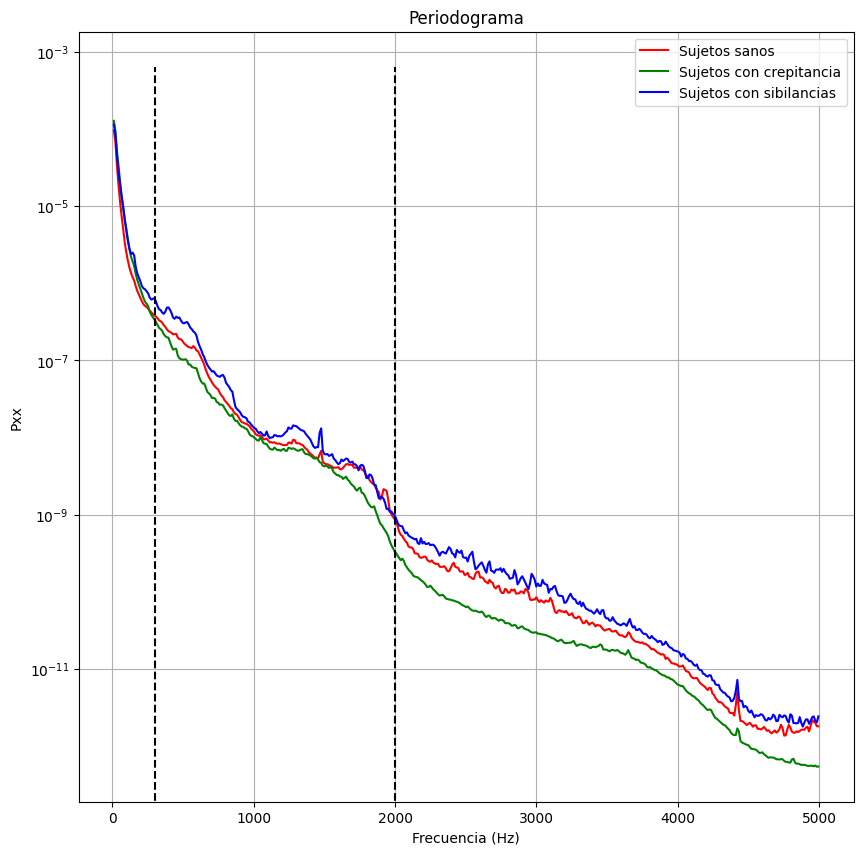

In [ ]:
plt.figure(figsize=(10,10))

#Densidad espectral de potencia de sujetos sanos
plt.plot(f[(f<5000) & (f>0)],
        pxx_sanos_mean[(f<5000) & (f>0)],
        'r')

#Densidad espectral de potencia de sujetos con crepitancias
plt.plot(f[(f<5000) & (f>0)],
        pxx_crackles_mean[(f<5000) & (f>0)],
           'g')

#Densidad espectral de potencia de sujetos con sibilancias
plt.plot(f[(f<5000) & (f>0)],
        pxx_wheezes_mean[(f<5000) & (f>0)],
           'b')

plt.grid()
plt.yscale("log")#SI LO DOCUMENTO QUEDA SIN ESCALA LOG
plt.title('Periodograma')
plt.xlabel('Frecuencia (Hz)')
plt.legend(['Sujetos sanos', 'Sujetos con crepitancia', 'Sujetos con sibilancias'])
plt.ylabel('Pxx')
f_unfiltered, Pxx_unfiltered = signal.welch(y,
                                              22050,
                                              'hamming',
                                              2048,
                                              1024,
                                              scaling='density')

#Periodograma se la señal filtrada
f_filtered, Pxx_filtered = signal.welch(y,
                                            22050,
                                            'hamming',
                                            2048,
                                            1024,
                                            scaling='density')
#Lineas que permiten establecer el rango de frecuencia de interes
max_value = np.max(np.concatenate((Pxx_unfiltered[f_unfiltered<2000],
                                   Pxx_filtered[f_filtered<2000])))
plt.vlines(300, 0, max_value, color='black', linestyles='dashed')
plt.vlines(2000, 0, max_value, color='black', linestyles='dashed')

plt.show()

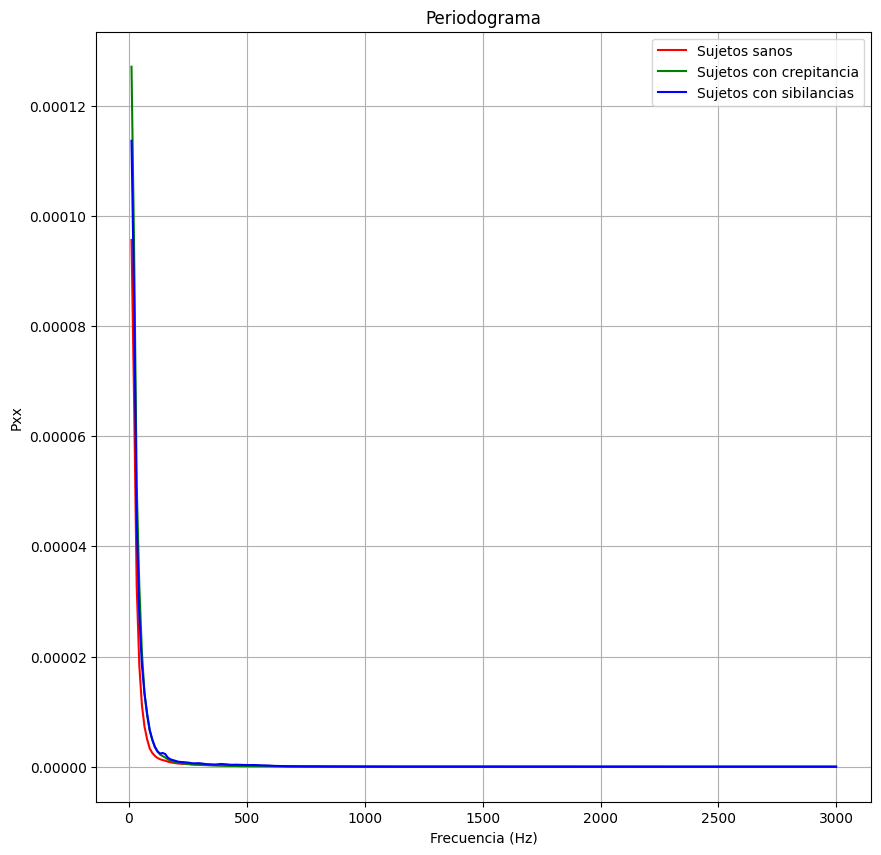

In [ ]:
plt.figure(figsize=(10,10))

#Densidad espectral de potencia de sujetos sanos
plt.plot(f[(f<3000) & (f>0)],
        pxx_sanos_mean[(f<3000) & (f>0)],
        'r')

#Densidad espectral de potencia de sujetos con crepitancias
plt.plot(f[(f<3000) & (f>0)],
        pxx_crackles_mean[(f<3000) & (f>0)],
           'g')

#Densidad espectral de potencia de sujetos con sibilancias
plt.plot(f[(f<3000) & (f>0)],
        pxx_wheezes_mean[(f<3000) & (f>0)],
           'b')

plt.grid()
plt.title('Periodograma')
plt.xlabel('Frecuencia (Hz)')
plt.legend(['Sujetos sanos', 'Sujetos con crepitancia', 'Sujetos con sibilancias'])
plt.ylabel('Pxx')
plt.show()

In [ ]:

def extract_cycles2(ruta_txt,ruta_wav):
  '''
  extract_cycles recibe la ruta de archivo de anotaciones y la ruta de audio. Esta función establece los ciclos
  respiratorios, retorna los ciclos, la señal filtrada y el data frame el cual incluye el tiempo de inicio y el
  tiempo final del ciclo respiratorio adicionamente extrae la anotación de estertores, sibilancias y sanos


  coeficientes --> ruta_txt, ruta_wav

  return: data_frame, final_signal, ciclos
  '''
  import io

  #Señal de audio original y frecuencia de muestreo de la señal
  ejem_signal, fs = librosa.load(ruta_wav)

  #Filtrado de la señal implementado filtros lineales y el filtrado de wavelet

  final_signal = ejem_signal

  #Se utiliza el archivo txt para extraer la anotación de estertores, crepitancias y sibilancias
  with open(ruta_txt) as txtfile:

      reader = io.StringIO(txtfile.read().strip())

  # Se crea el data frame el cual tendra el tiempo de inicio y de fin del ciclo respiratorio. También presenta la anotación de estertores, crepitancias y sibilancias
  data_frame = pd.read_csv(reader,sep="\t", header=None)
  data_frame.columns = ['Time init', 'Time end', 'Crackles','Wheezes']

  # Se convierte en lista los datos de tiempo de inicio, tiempo de fin, sibilancias y crepitancias
  ciclo_init = list(data_frame['Time init'])
  ciclo_end = list(data_frame['Time end'])
  crepitancia = list(data_frame['Crackles'])
  sibilancias = list (data_frame['Wheezes'])

  ciclos = []

  # Se recorre el data frame con el fin de establecer los ciclos respiratorios
  for i in range(len(data_frame)):
      #Ciclos respiratorios
      ciclo_inicio = (ciclo_init[i])* fs #se multiplica el vector del tiempo inicial por la frecuencia de muestreo

      ciclo_final = (ciclo_end[i])* fs #se multiplica el vector del tiempo final por la frecuencia de muestreo

      ciclo = final_signal[int(ciclo_inicio):int(ciclo_final)] # Se establece el rango de interes

      ciclos.append(ciclo) #Se agrega el ciclo al vector vacio

  #En el data frame se inserta una columna que presentara los ciclos establecidos
  data_frame.insert(0, 'raw_signal', ciclos)

  for i in range(len(data_frame)):
  # Se inserta en el data frame una columna que presenta la cantidad de sujetos normales
    if data_frame['raw_signal'].values[i].shape[0]==0:

      data_frame.drop(axis=0, index=i)
  # Establece un condicional que permite clasificar el sujeto como normal
  normal = [1 if (crepitancia[i]==0 and sibilancias[i]==0) else 0 for i in range(len(data_frame))]

  data_frame.insert(len(data_frame.columns), 'normal', normal)


  #Se retorna el data_frame, la señal filtrada y los ciclos obtenidos
  return data_frame, final_signal, ciclos


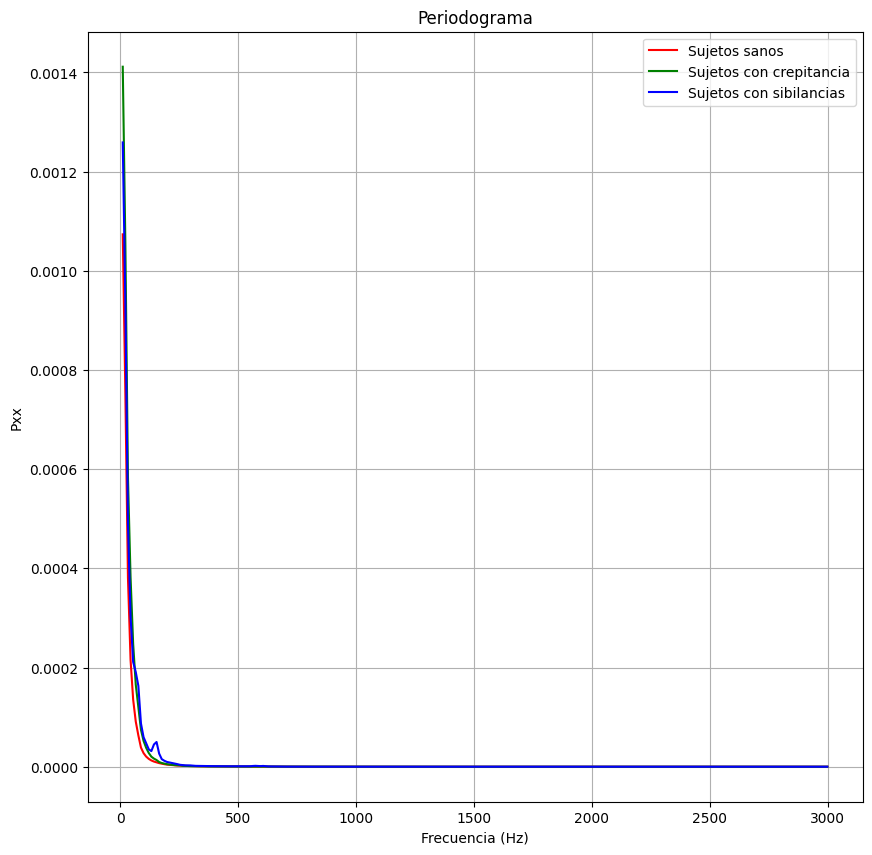

In [ ]:
# Se utilizan todo los archivos txt y .wav
rutatxt= '/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/*.txt'

rutawav=  '/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/*.wav'

#Archivos txt y archivos .wav, se organizan implementando la función sorted
folder_wav = sorted(glob.glob(rutawav))

folder_txt = sorted(glob.glob(rutatxt))

#Frecuencia de muestreo
sr = 22050

#Se crean listas vacias, con el fin de añadir en ellas la densidad espectral de potencia según el estado del sujeto
pxx_crackles2 = [] # Sujetos con crepitancias

pxx_wheezes2 = [] #Sujetos con sibilancias

pxx_normal2 = [] # Sujetos normales

for k in range(0,len(folder_wav)):
    # Se extrae el archivo txt y el archivo .wav
    ruta_txt= folder_txt[k]

    ruta_wav= folder_wav[k]
    # Se implementa la función de extract_cycles
    data_frame, final_signal,ciclos = extract_cycles2(ruta_txt,ruta_wav)

    # Se convierte en lista los datos de tiempo de inicio, tiempo de fin, sibilancias y crepitancias
    sanos = list(data_frame['normal'])

    crepitancia = list(data_frame['Crackles'])

    sibilancias = list(data_frame['Wheezes'])

    for i in range(len(data_frame)):
      #Se extrae los ciclos del data_frame
      ciclos_pxx = data_frame['raw_signal'].values[i]

      #Densidad espectral de potencia
      #f, Pxx = pwelch(ciclos_pxx, sr, window='hann', scaling='density')
      f, Pxx = pwelch (ciclos_pxx, sr,'hann', 2000, 1000)

      # Condicional que permite clasificar la densidad espectral de potencia segun el estado del sujeto (normal, crepitancia, sibilancia)
      #Sujeto con crepitancia
      if crepitancia[i]==1:
         pxx_crackles2.append(Pxx)
      #Sujeto con sibilancia
      elif sibilancias[i]==1:
         pxx_wheezes2.append(Pxx)
      #Sujeto sano
      elif sanos[i]==1:
        pxx_normal2.append(Pxx)

# Promedio de la densidad espectral de potencia
pxx_sanos_mean2 = np.mean(np.array(pxx_normal2), axis = 0) #Sujetos sanos

pxx_crackles_mean2 = np.mean(np.array(pxx_crackles2), axis = 0) #Sujetos con crepitancia

pxx_wheezes_mean2 = np.mean(np.array(pxx_wheezes2), axis = 0) #Sujetos con sibilancia



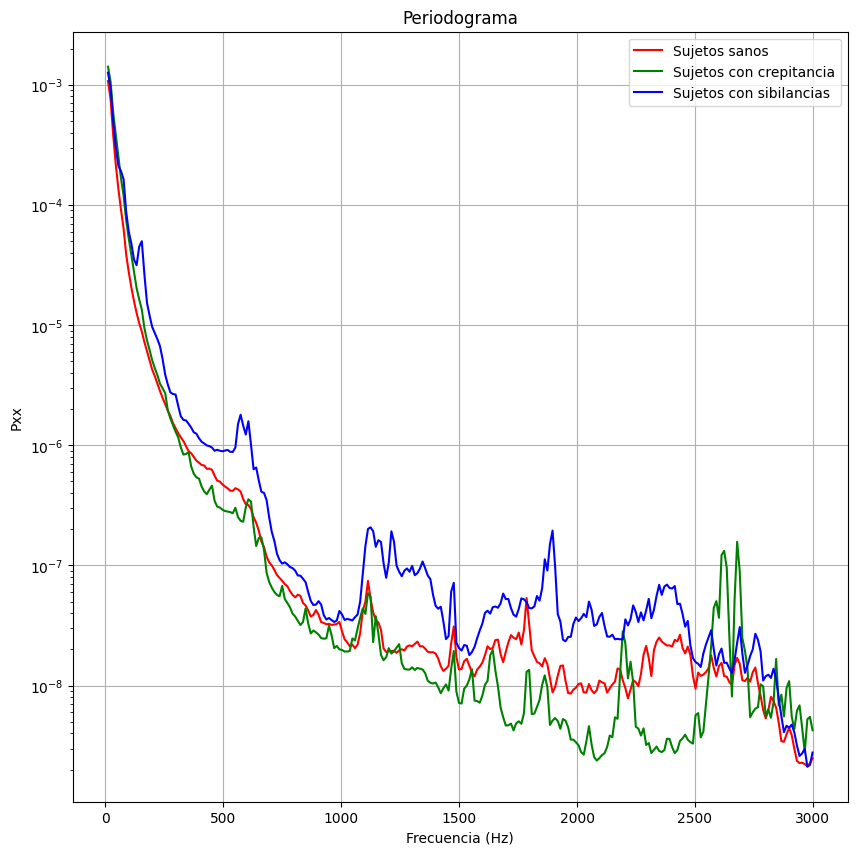

In [ ]:
plt.figure(figsize=(10,10))

#Densidad espectral de potencia de sujetos sanos
plt.plot(f[(f<3000) & (f>0)],
        pxx_sanos_mean2[(f<3000) & (f>0)],
        'r')

#Densidad espectral de potencia de sujetos con crepitancias
plt.plot(f[(f<3000) & (f>0)],
        pxx_crackles_mean2[(f<3000) & (f>0)],
           'g')

#Densidad espectral de potencia de sujetos con sibilancias
plt.plot(f[(f<3000) & (f>0)],
        pxx_wheezes_mean2[(f<3000) & (f>0)],
           'b')

plt.grid()
plt.yscale("log")
plt.title('Periodograma')
plt.xlabel('Frecuencia (Hz)')
plt.legend(['Sujetos sanos', 'Sujetos con crepitancia', 'Sujetos con sibilancias'])
plt.ylabel('Pxx')
plt.show()

8) Crear una rutina que permita extraer la sumatoria de la densidad espectral de potencia en el rango identificado en el punto 7

a. Nótese que el rango puede ser diferente cuando se compara normales con
crepitancia y cuando se compara normales con sibilancia

In [ ]:
#Densidad espectral de potencia
def densidad_espectral(ciclo):
  '''
  densidad_espectral recibe un ciclo determinado con el fin de calcular la densidad espectral de potencia en la
  frecuencia de interes


  coeficientes --> ciclo

  return: Pxx_cutmean
  '''
  #Densidad espectral de potencia
  f, Pxx = pwelch (ciclo, sr,'hann', 2000, 1000)
  # Frecuencia de interes
  f_cut = [(f<2000) & (f>300)]
  Pxx_cut= Pxx[(f<2000) & (f>300)]
  #Promedio de la densidad espectral de potencia
  Pxx_cutmean= np.mean(Pxx_cut)

  #Retorna la densidad espectral de potencia promedio del ciclo
  return (Pxx_cutmean)

In [ ]:
#preguntaar si la sumatoria es para un ciclo o para todo
def area_welch(ciclo):

  '''
  Función para extraer el área alrededor de las potencias de interés. El área Se
  resume como la sumatoria de la serie discretizada

  coeficientes --> ciclo

  return: área

  '''

  #Densidad espectral de potencia
  f, Pxx = pwelch (ciclo, 22050,'hann', 2000, 1000)
  # Frecuencia de interes
  Pxx_cut = Pxx[(f<2000) & (f>300)]
  #Promedio de la densidad espectral de potencia
  Pxx_area = np.sum(Pxx_cut)

  #Retorna la densidad espectral de potencia promedio del ciclo
  return (Pxx_area)


In [ ]:
# Prueba de la densidad espectral de un ciclo determinado
ciclo = ciclos[0]
Pxx_mean = area_welch(ciclo)
print(f'La Densidad espectral del ciclo respiratorio es {Pxx_mean}')

La Densidad espectral del ciclo respiratorio es 7.3804002911813985e-09


9) Crear una rutina que permita extraer la mediana de la densidad espectral de potencia, en el dominio de la frecuencia, de cada registro como un índice de comparación

a. La mediana es el valor de potencia debajo del cual se encuentra la mitad de potencia
de un registro

In [ ]:
#preguntaar sobre la mediana
def mediana(ciclo):


  #Densidad espectral de potencia
  f, Pxx = pwelch (ciclo, 22050,'hann', 2000, 1000)
  # Frecuencia de interes
  Pxx_cut = Pxx[(f<2000) & (f>300)]
  #Promedio de la densidad espectral de potencia
  potencia_total = np.sum(Pxx_cut)

    # Calcula la mitad de la potencia total del registro
  mitad_potencia_total = potencia_total / 2

    # Busca el índice en la PSD debajo del cual se encuentra la mitad de la potencia total
  idx_mediana = np.where(np.cumsum(Pxx) >= mitad_potencia_total)[0][0]

    # Obtiene el valor de potencia correspondiente al índice de la mediana
  mediana_psd = Pxx[idx_mediana]

  return mediana_psd

In [ ]:
ciclo = ciclos[9]
Pxx_mean = mediana(ciclo)
print(f'La Densidad espectral del ciclo respiratorio es {Pxx_mean}')

La Densidad espectral del ciclo respiratorio es 3.7346485231708933e-06


In [ ]:

# Función para calcular la mediana
def calcular_mediana(datos):

  #Densidad espectral de potencia
  f, Pxx = pwelch (ciclo, 22050,'hann', 2000, 1000)
  # Frecuencia de interes
  Pxx_cut = Pxx[(f<2000) & (f>300)]
  return np.median(Pxx_cut)
ciclo = ciclos[1]
Pxx_mean = calcular_mediana(ciclo)
print(Pxx_mean)


3.80408636134171e-11


10) Crear una rutina que permita extraer la varianza de la señal, en el dominio del tiempo, de cada registro

In [ ]:
def varianza(ciclo):
  std = np.std(ciclo)
  # Elevar al cuadrado la desviación estándar para obtener la varianza
  varianza = np.square(std)
  return varianza

In [ ]:
ciclo = ciclos[1]
Pxx_mean = varianza(ciclo)
print(f'La Densidad espectral del ciclo respiratorio es {Pxx_mean}')

La Densidad espectral del ciclo respiratorio es 0.00029359180140741943


11) Crear una rutina que aplique sobre todos los archivos de la base de datos las rutinas de
preprocesamiento y extracción de todas las características discutidas y guarde la
información en un dataframe donde se pueda discriminar información relacionada con
ciclos normales, ciclos con crepitaciones y ciclos con sibilancias

In [ ]:
# Se utilizan todo los archivos txt y .wav
rutatxt=  '/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/*.txt'

rutawav=  '/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/*.wav'

#Archivos txt y archivos .wav, se organizan implementando la función sirted
folder_wav = sorted(glob.glob(rutawav))

folder_txt = sorted(glob.glob(rutatxt))

#Frecuencia de muestreo
sr = 22050

data_frame_final = pd.DataFrame()

#Se crea un diccionario
dictionary = {}

for k in range(len(folder_wav)):
    # Se extrae el archivo txt y el archivo .wav
    ruta_txt= folder_txt[k]

    ruta_wav= folder_wav[k]


    #Nombre del archivo

    files = ruta_wav.split('_')


    names_sujetos = files[7].split('/')[1]

    name_files = files[7].split('/')[1] + '_'+ files[8] +'_'+ files[9]+ '_'+ files[10] + '_'+ files[11].split('.')[0]


    #Posición del estetoscopio
    posicion = files[9]


    #Ciclos
    # Se implementa la función de extract_cycles
    data_frame, final_signal, ciclos = extract_cycles(ruta_txt,ruta_wav)

    # Se convierte en lista los datos de tiempo de inicio, tiempo de fin, sibilancias y crepitancias
    sanos = list(data_frame['normal'])

    crepitancia = list(data_frame['Crackles'])

    sibilancias = list(data_frame['Wheezes'])


    for i in range(len(ciclos)):
      dictionary['Número sujeto'] = names_sujetos

      dictionary['Nombre del archivo'] = name_files

      dictionary['Posicion'] = posicion

      # Condicional que permite clasificar la densidad espectral de potencia segun el estado del sujeto (norma, crepitancia, sibilancia)
      #Sujeto con crepitancia
      if crepitancia[i]==1:
         dictionary['Clasificación'] = 'Crepitancia'
      #Sujeto con sibilancia
      elif sibilancias[i]==1:
         dictionary['Clasificación'] = 'Sibilancia'
      #Sujeto sano
      elif sanos[i]==1:
        dictionary['Clasificación'] = 'Sanos'

      dictionary['Raw signals'] = ciclos[i]

        #Varianza
      Varianza = varianza(ciclos[i])
      dictionary['Varianza'] = Varianza

        #Mediana
      Mediana = calcular_mediana(ciclos[i])
      dictionary['Mediana'] = Mediana

      #Densidad espectral de potencia promedio
      densidad_espec = densidad_espectral(ciclos[i])
      dictionary['DPE'] = densidad_espec

      #Area densidad espectral
      area_densidad = area_welch(ciclos[i])
      dictionary['ADPE'] = area_densidad

      #Se genera el dataframe
      data_frame_final = data_frame_final.append(dictionary, ignore_index = True)

    ejem_signal, fs = librosa.load(ruta_wav)

#path = '/content/MyDrive/MyDrive/Proyectos/Proyecto3/df.csv'
#data_frame_final.to_csv(path, sep = ',')

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.81987514e+00]
 [7.88132370e-01]
 [3.25459726e-01]
 [1.56163496e-01]
 [1.57111721e-01]
 [2.26327380e-01]
 [3.15715271e-01]
 [3.33777954e-01]
 [3.12521295e-01]
 [1.23344373e-01]
 [3.16642544e-02]
 [8.62935760e-03]
 [4.22545233e-03]
 [1.55682750e-03]
 [6.28712404e-04]
 [1.66929202e-04]
 [1.07989945e-05]
 [1.99406788e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.27088401e-01]
 [2.21100336e-01]
 [1.20690528e-01]
 [4.39298728e-02]
 [5.63722353e-02]
 [1.11060370e-01]
 [2.12108694e-01]
 [2.47237427e-01]
 [2.04482052e-01]
 [8.93867709e-02]
 [2.74140799e-02]
 [6.28170679e-03]
 [1.98491649e-03]
 [6.50177303e-04]
 [4.46414867e-04]
 [1.45780604e-04]
 [8.83048033e-06]
 [1.59788500e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.05199604e-02]
 [6.17008933e-02]
 [2.32761677e-02]
 [2.79998036e-02]
 [7.52662361e-02]
 [1.90059493e-01]
 [1.81287213e-01]
 [1.89479446e-01]
 [1.11328246e-01]
 [4.64155444e-02]
 [1.37002975e-02]
 [5.32820668e-03]
 [2.40061831e-03]
 [7.99611669e-04]
 [5.59364638e-04]
 [1.82416016e-04]
 [8.96959359e-06]
 [1.57061148e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.55655595e+00]
 [1.45582603e+00]
 [6.32469282e-01]
 [3.37943551e-01]
 [1.42988621e-01]
 [3.80349545e-01]
 [9.77602494e-01]
 [2.82830193e+00]
 [1.33564934e+00]
 [2.30073713e-01]
 [3.81962331e-02]
 [1.41081281e-02]
 [5.36788023e-03]
 [2.95496687e-03]
 [1.57349219e-03]
 [6.54114715e-04]
 [5.03142338e-05]
 [9.76743243e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.28483672e-01]
 [1.43189589e-01]
 [3.58135755e-01]
 [2.94686803e-01]
 [9.88502408e-02]
 [1.18938018e-01]
 [8.18670764e-02]
 [2.16612084e-01]
 [2.60047702e-01]
 [1.97373014e-01]
 [8.31850103e-02]
 [2.29414666e-02]
 [6.67083905e-03]
 [6.10062814e-03]
 [1.76014558e-03]
 [8.68413053e-05]
 [2.44819389e-06]
 [3.98647147e-08]]
5.05274572887633


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.88484229e-02]
 [1.71734012e-01]
 [1.85002730e-01]
 [1.36370586e-01]
 [1.65661232e-01]
 [1.79007398e-01]
 [1.18487129e-01]
 [7.22596177e-02]
 [2.03388278e-01]
 [1.76210102e-01]
 [1.22977222e-01]
 [4.87799117e-02]
 [1.70338545e-02]
 [7.83460161e-03]
 [7.58127264e-03]
 [2.18721381e-03]
 [1.07418256e-04]
 [2.83419806e-06]
 [4.51050630e-08]]
5.146526917692714


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.05847900e-01]
 [2.90581006e-01]
 [2.94837417e-01]
 [2.32700284e-01]
 [8.70780205e-02]
 [5.80028993e-02]
 [3.99148271e-02]
 [1.07254219e-01]
 [1.02291412e-01]
 [6.57456506e-02]
 [2.60724215e-02]
 [1.01915304e-02]
 [3.10898875e-03]
 [1.84994449e-03]
 [5.06745841e-04]
 [3.44989323e-05]
 [1.62418709e-06]
 [2.90177368e-08]]
5.082949689429893


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.84465141e-01]
 [6.38618220e-01]
 [3.42631929e-01]
 [1.67063226e-01]
 [2.08281436e-01]
 [1.37967463e-01]
 [1.07741625e-01]
 [2.32249959e-01]
 [2.86337791e-01]
 [1.64105031e-01]
 [5.74385389e-02]
 [1.70922660e-02]
 [4.70726745e-03]
 [2.66345622e-03]
 [7.17797153e-04]
 [4.68994312e-05]
 [1.97120155e-06]
 [3.42789706e-08]]
5.042075449193027


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.13836643e-01]
 [1.75763163e-01]
 [1.45400129e-01]
 [1.76645295e-01]
 [1.65694670e-01]
 [9.27359850e-02]
 [1.85759714e-01]
 [2.72903550e-01]
 [2.16921905e-01]
 [1.35352463e-01]
 [4.97060144e-02]
 [2.15658659e-02]
 [8.88012458e-03]
 [5.45700530e-03]
 [1.44127447e-03]
 [6.72574433e-05]
 [2.24503152e-06]
 [3.75126835e-08]]
5.125459790862333


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.35519162e-01]
 [2.69335226e-01]
 [3.25113769e-01]
 [1.95830338e-01]
 [2.67262368e-01]
 [1.27361536e-01]
 [1.51524934e-01]
 [2.27356008e-01]
 [1.99380159e-01]
 [1.17266287e-01]
 [3.74945413e-02]
 [1.23507675e-02]
 [4.39240271e-03]
 [3.77583833e-03]
 [1.02128080e-03]
 [5.31755917e-05]
 [2.02079538e-06]
 [3.48789954e-08]]
5.131872058809635


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.78975623e-01]
 [2.03361093e-01]
 [4.53863199e-02]
 [4.04673089e-02]
 [5.48774800e-02]
 [1.36639762e-01]
 [1.27014552e-01]
 [1.02634491e-01]
 [7.74508846e-02]
 [5.16029222e-02]
 [1.84736691e-02]
 [1.41262590e-02]
 [2.09939637e-02]
 [3.19148238e-02]
 [3.75994645e-02]
 [1.15392127e-02]
 [5.04470975e-04]
 [8.28692857e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.14850340e-01]
 [1.07219131e-01]
 [2.45151587e-02]
 [8.98085976e-03]
 [5.34754127e-03]
 [1.73207686e-02]
 [4.60190704e-02]
 [7.67517007e-02]
 [6.30529008e-02]
 [6.45616843e-02]
 [4.14628605e-02]
 [2.40330560e-02]
 [1.12439757e-02]
 [3.86258214e-03]
 [1.51152800e-03]
 [5.90607758e-04]
 [4.66790238e-05]
 [9.19971073e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.89558860e+00]
 [8.76476991e-01]
 [3.59735793e-01]
 [1.86882393e-01]
 [3.44474191e-01]
 [9.65719344e-01]
 [1.54942359e+00]
 [1.50352563e+00]
 [4.89055996e-01]
 [1.64262592e-01]
 [7.62074320e-02]
 [4.62873525e-02]
 [9.05571201e-03]
 [1.66066994e-03]
 [6.71794086e-04]
 [2.09352571e-04]
 [1.57450925e-05]
 [3.08966498e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.44788870e-01]
 [1.15917377e-01]
 [1.29074957e-01]
 [1.85769574e-01]
 [2.13042783e-01]
 [4.25254801e-01]
 [1.02839949e+00]
 [2.11559678e+00]
 [2.03287811e+00]
 [1.15087845e+00]
 [4.92355529e-01]
 [2.09366298e-01]
 [6.92864448e-02]
 [1.65463567e-02]
 [6.03894860e-03]
 [1.84008535e-03]
 [1.34383578e-04]
 [2.61287509e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.51492351e+00]
 [1.10568881e+00]
 [1.92473910e-01]
 [3.44731121e-01]
 [4.31464321e-01]
 [4.45651443e-01]
 [8.57858000e-01]
 [1.93985102e+00]
 [2.17440250e+00]
 [1.07714791e+00]
 [5.16986748e-01]
 [2.04493541e-01]
 [7.81837636e-02]
 [2.18735201e-02]
 [6.34501777e-03]
 [1.73691058e-03]
 [1.23834905e-04]
 [2.39984858e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.97422131e-01]
 [2.02730977e-01]
 [3.68062465e-02]
 [9.28792842e-02]
 [2.25833561e-01]
 [4.78549673e-01]
 [6.98187276e-01]
 [6.22355143e-01]
 [5.73019102e-01]
 [4.85691325e-01]
 [3.40568189e-01]
 [1.34895861e-01]
 [4.29392507e-02]
 [1.79062620e-02]
 [8.45728183e-03]
 [3.19770787e-03]
 [2.55454787e-04]
 [5.01888864e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.89144587e-01]
 [1.45705915e-01]
 [6.86964153e-02]
 [9.52337199e-02]
 [3.58648340e-01]
 [6.57716120e-01]
 [1.08522784e+00]
 [1.39957311e+00]
 [1.11986334e+00]
 [1.21106292e+00]
 [7.16742648e-01]
 [1.60976934e-01]
 [4.58772949e-02]
 [2.21919616e-02]
 [1.22682790e-02]
 [5.36155899e-03]
 [4.41241750e-04]
 [8.68254089e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.61431986e-02]
 [1.28290343e-01]
 [1.39443391e-01]
 [1.17116725e-01]
 [1.18675974e-01]
 [4.96087292e-01]
 [1.55805566e+00]
 [2.34108272e+00]
 [1.67871557e+00]
 [8.10497688e-01]
 [4.91675236e-01]
 [3.45301040e-01]
 [2.04669290e-01]
 [9.96429243e-02]
 [2.12109344e-02]
 [3.05339338e-03]
 [1.91371085e-04]
 [3.64253979e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.72118188e-01]
 [1.91202401e-01]
 [1.69598336e-01]
 [1.21033800e-01]
 [3.43923469e-01]
 [6.79631789e-01]
 [2.13461504e+00]
 [2.78815188e+00]
 [1.65624408e+00]
 [1.08417385e+00]
 [6.54549613e-01]
 [3.06146266e-01]
 [1.74328188e-01]
 [8.12685724e-02]
 [1.91192950e-02]
 [4.38074297e-03]
 [3.19307962e-04]
 [6.22312401e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.06029219e-01]
 [3.78350029e-01]
 [5.63019448e-02]
 [3.99055623e-02]
 [4.78607343e-02]
 [1.11855210e-01]
 [4.26157351e-01]
 [1.23224203e+00]
 [1.32148152e+00]
 [7.23301152e-01]
 [2.35053181e-01]
 [7.80009892e-02]
 [3.94113578e-02]
 [3.86468250e-02]
 [1.22320364e-02]
 [1.42469583e-03]
 [9.06158194e-05]
 [1.70422635e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.02107783e-01]
 [3.30737476e-01]
 [1.03549112e-01]
 [2.33905349e-01]
 [1.56169028e-01]
 [6.09110670e-01]
 [1.00477824e+00]
 [1.95746122e+00]
 [1.92640821e+00]
 [9.20449955e-01]
 [3.93328853e-01]
 [1.73527618e-01]
 [5.79775538e-02]
 [1.55699550e-02]
 [6.15704104e-03]
 [1.90398394e-03]
 [1.35611447e-04]
 [2.62584845e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.13128166e+00]
 [6.47617562e-01]
 [2.53314885e-01]
 [1.85990323e-01]
 [3.14204827e-01]
 [4.51276622e-01]
 [9.80029985e-01]
 [2.37033485e+00]
 [2.07002038e+00]
 [1.15259875e+00]
 [5.13121985e-01]
 [1.75215520e-01]
 [6.28231470e-02]
 [1.68284634e-02]
 [5.65518585e-03]
 [1.62819408e-03]
 [1.19266212e-04]
 [2.31753713e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.18279919e-01]
 [1.98050866e-01]
 [4.97935715e-02]
 [7.24987376e-02]
 [2.50796225e-01]
 [6.41398870e-01]
 [7.45399500e-01]
 [5.65498293e-01]
 [5.54339617e-01]
 [4.10069791e-01]
 [2.73419890e-01]
 [1.10823591e-01]
 [3.49184420e-02]
 [1.64133325e-02]
 [8.10235548e-03]
 [3.19434228e-03]
 [2.52090734e-04]
 [4.95369392e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.35540900e-01]
 [1.11219747e-01]
 [9.53518149e-02]
 [9.61388170e-02]
 [3.00072948e-01]
 [8.71557731e-01]
 [1.06964676e+00]
 [1.43392360e+00]
 [1.06404866e+00]
 [1.31031900e+00]
 [6.37125328e-01]
 [1.48943879e-01]
 [4.13849881e-02]
 [2.19666891e-02]
 [1.29473220e-02]
 [5.57011686e-03]
 [4.47275690e-04]
 [8.83168880e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.76037628e-01]
 [1.84460319e-01]
 [9.74790705e-02]
 [1.04729362e-01]
 [2.58391863e-01]
 [4.76156791e-01]
 [1.15363168e+00]
 [2.32922368e+00]
 [1.49519937e+00]
 [5.98933394e-01]
 [3.16202942e-01]
 [1.56240369e-01]
 [7.29616897e-02]
 [3.31508533e-02]
 [8.09485917e-03]
 [1.68085551e-03]
 [1.16839899e-04]
 [2.25646272e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.62074836e-01]
 [4.50821340e-01]
 [2.67143510e-01]
 [2.01398132e-01]
 [2.34888124e-01]
 [8.86144670e-01]
 [1.98402419e+00]
 [2.69950996e+00]
 [2.20959287e+00]
 [1.16908609e+00]
 [5.65773713e-01]
 [2.62930538e-01]
 [1.24252476e-01]
 [5.33904090e-02]
 [1.51271928e-02]
 [4.00438190e-03]
 [3.02227545e-04]
 [5.93057221e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.85312457e-02]
 [6.49787057e-02]
 [4.10099055e-02]
 [1.99751253e-02]
 [7.40900342e-02]
 [1.20228883e-01]
 [3.66243574e-01]
 [1.05061045e+00]
 [1.29492138e+00]
 [7.50566053e-01]
 [2.12739838e-01]
 [8.51262216e-02]
 [5.43692922e-02]
 [3.98675837e-02]
 [1.30589847e-02]
 [1.41696992e-03]
 [8.51571209e-05]
 [1.57626688e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.17414470e-01]
 [2.88124651e-01]
 [2.06340630e-01]
 [2.18284351e-01]
 [2.70218178e-01]
 [5.42566277e-01]
 [8.68479178e-01]
 [2.12645879e+00]
 [1.92943182e+00]
 [1.11598226e+00]
 [4.69206230e-01]
 [1.93897046e-01]
 [6.48862963e-02]
 [1.70262011e-02]
 [6.16650620e-03]
 [1.89781695e-03]
 [1.37569818e-04]
 [2.66935516e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.79704190e-02]
 [1.05404548e-01]
 [3.83378530e-02]
 [1.29189491e-01]
 [2.37687728e-01]
 [4.14707470e-01]
 [6.54169358e-01]
 [8.98514978e-01]
 [4.27298678e-01]
 [4.30151031e-01]
 [2.40751286e-01]
 [9.72032892e-02]
 [3.70415473e-02]
 [1.22068508e-02]
 [5.17926461e-03]
 [2.00486594e-03]
 [1.63113139e-04]
 [3.24122833e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.67598960e-02]
 [1.55780535e-02]
 [1.97471040e-02]
 [5.47044625e-02]
 [2.35231544e-01]
 [4.51259478e-01]
 [7.39463300e-01]
 [6.84865404e-01]
 [6.50669745e-01]
 [4.22033041e-01]
 [3.17210816e-01]
 [1.26278153e-01]
 [3.81778874e-02]
 [1.74549836e-02]
 [8.25097820e-03]
 [3.18909212e-03]
 [2.53372772e-04]
 [4.96951110e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.53098066e-01]
 [3.90672729e-01]
 [1.72282492e-01]
 [1.36719124e-01]
 [4.89457524e-01]
 [8.07286860e-01]
 [1.21840204e+00]
 [1.96748762e+00]
 [1.38715813e+00]
 [1.40655714e+00]
 [8.82509440e-01]
 [2.19450556e-01]
 [5.52794975e-02]
 [2.56728049e-02]
 [1.25138867e-02]
 [5.19081661e-03]
 [4.08014081e-04]
 [7.99832265e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.19940013e-01]
 [3.69919776e-01]
 [1.45142141e-01]
 [1.00772642e-01]
 [1.34212470e-01]
 [5.00747803e-01]
 [1.27836192e+00]
 [2.11649253e+00]
 [1.30209521e+00]
 [6.84147574e-01]
 [4.05867157e-01]
 [2.68831147e-01]
 [1.68020599e-01]
 [8.78254060e-02]
 [1.81910789e-02]
 [2.38057661e-03]
 [1.41586217e-04]
 [2.68388684e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.10526511e-01]
 [2.70501791e-01]
 [3.27476442e-01]
 [2.02101230e-01]
 [2.81531442e-01]
 [8.00949080e-01]
 [2.16607108e+00]
 [3.24508717e+00]
 [1.91354548e+00]
 [1.17335120e+00]
 [6.23806179e-01]
 [3.01444082e-01]
 [1.70988577e-01]
 [8.63360947e-02]
 [2.03796248e-02]
 [4.36276508e-03]
 [3.16480997e-04]
 [6.18737047e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.57365967e-01]
 [1.63850006e-01]
 [6.88643960e-02]
 [4.50979651e-02]
 [5.26502741e-02]
 [1.49471806e-01]
 [3.98481030e-01]
 [1.48261226e+00]
 [1.51203030e+00]
 [7.48740590e-01]
 [2.36407314e-01]
 [1.05759888e-01]
 [6.35645002e-02]
 [3.36023527e-02]
 [1.21151179e-02]
 [1.47861383e-03]
 [9.16332442e-05]
 [1.72660722e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.21357632e-01]
 [1.03318465e-01]
 [4.60586380e-02]
 [9.47655020e-02]
 [3.47683296e-01]
 [6.21216580e-01]
 [8.77069909e-01]
 [8.43507102e-01]
 [5.70939541e-01]
 [4.49986069e-01]
 [2.08342989e-01]
 [8.58899084e-02]
 [3.83526019e-02]
 [1.84752266e-02]
 [8.67954918e-03]
 [3.39731419e-03]
 [2.83319996e-04]
 [5.65863334e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.50973693e-01]
 [5.19146294e-01]
 [2.04001929e-01]
 [1.55518466e-01]
 [1.50474847e-01]
 [3.50480487e-01]
 [6.23355346e-01]
 [7.71191503e-01]
 [1.16908254e+00]
 [6.45557036e-01]
 [2.75286008e-01]
 [9.95492394e-02]
 [3.01668509e-02]
 [9.30627030e-03]
 [3.92604581e-03]
 [1.33026915e-03]
 [9.89111139e-05]
 [1.93570772e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.13877031e-01]
 [1.22979289e-01]
 [7.61749503e-02]
 [1.34148235e-01]
 [5.60637878e-01]
 [1.01676227e+00]
 [1.42931430e+00]
 [8.40773956e-01]
 [4.83226717e-01]
 [3.21802924e-01]
 [1.00640555e-01]
 [4.48000463e-02]
 [2.50649833e-02]
 [1.37611091e-02]
 [7.61088905e-03]
 [3.20198720e-03]
 [2.67569761e-04]
 [5.31369426e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.86585635e-02]
 [1.47605361e-01]
 [5.42542191e-02]
 [1.42325590e-01]
 [4.82924757e-01]
 [9.96686554e-01]
 [1.30607164e+00]
 [7.68357999e-01]
 [3.07389337e-01]
 [2.97027455e-01]
 [1.20941187e-01]
 [5.26543450e-02]
 [2.93652260e-02]
 [1.65653457e-02]
 [8.95863823e-03]
 [3.64088068e-03]
 [3.00327086e-04]
 [5.95601730e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.85428699e-02]
 [8.25706781e-02]
 [4.57870916e-02]
 [4.42424694e-02]
 [1.58824218e-01]
 [3.58395297e-01]
 [6.24210669e-01]
 [9.62477542e-01]
 [5.75803689e-01]
 [2.68969555e-01]
 [1.46911410e-01]
 [6.42328196e-02]
 [2.25500821e-02]
 [9.55406511e-03]
 [2.71385318e-03]
 [8.14188315e-04]
 [6.46787187e-05]
 [1.27175051e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.85100069e-01]
 [2.02784737e-01]
 [2.09190235e-01]
 [1.67472130e-01]
 [3.43108239e-01]
 [4.59575773e-01]
 [8.12094829e-01]
 [5.34912851e-01]
 [5.23638764e-01]
 [3.01506260e-01]
 [1.48343269e-01]
 [7.07244691e-02]
 [2.51916470e-02]
 [1.01010471e-02]
 [4.08055607e-03]
 [1.48331139e-03]
 [1.19691163e-04]
 [2.36668958e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.64805551e-01]
 [2.38540407e-01]
 [1.59715260e-01]
 [1.25243641e-01]
 [1.76524252e-01]
 [4.55610213e-01]
 [9.19252167e-01]
 [1.68125888e+00]
 [2.00615665e+00]
 [1.26165302e+00]
 [4.31656095e-01]
 [1.79723968e-01]
 [8.50785732e-02]
 [3.60738826e-02]
 [1.67924534e-02]
 [5.26735105e-03]
 [3.74239385e-04]
 [7.01712319e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.24297445e-01]
 [3.28587763e-01]
 [7.42674681e-02]
 [8.27533311e-02]
 [2.90397742e-01]
 [5.16483317e-01]
 [6.00567426e-01]
 [5.08448167e-01]
 [3.66100081e-01]
 [1.96522260e-01]
 [6.43750594e-02]
 [1.19824456e-02]
 [2.50939282e-03]
 [5.95303887e-04]
 [2.49181218e-04]
 [9.87750225e-05]
 [6.98197938e-06]
 [1.32464041e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.08615952e-01]
 [1.73655871e-01]
 [2.24907487e-01]
 [1.29510166e-01]
 [6.96122838e-02]
 [6.58848853e-02]
 [4.57758989e-02]
 [7.78298855e-02]
 [1.21113664e-01]
 [1.03308746e-01]
 [3.40772217e-02]
 [8.88493664e-03]
 [2.99217373e-03]
 [1.37802491e-03]
 [2.99876052e-04]
 [2.29759004e-05]
 [1.22330394e-06]
 [2.25360793e-08]]
5.10173524085955


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.93702735e-02]
 [6.64693489e-02]
 [1.15474464e-01]
 [1.59446738e-01]
 [9.11551735e-02]
 [5.85068082e-02]
 [5.57852964e-02]
 [1.00482156e-01]
 [1.11159477e-01]
 [1.03118178e-01]
 [4.32057417e-02]
 [8.99341465e-03]
 [2.86520731e-03]
 [1.71337726e-03]
 [4.99494055e-04]
 [3.30115447e-05]
 [1.39569206e-06]
 [2.48623220e-08]]
5.097998353768294


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.70343568e-02]
 [1.22693493e-01]
 [1.42740042e-01]
 [1.23112985e-01]
 [5.19710001e-02]
 [5.49732298e-02]
 [6.86260589e-02]
 [8.64010374e-02]
 [1.17012480e-01]
 [1.09346986e-01]
 [3.90837235e-02]
 [1.13778450e-02]
 [3.53961783e-03]
 [2.19526696e-03]
 [5.82132590e-04]
 [2.96663604e-05]
 [1.35278445e-06]
 [2.41335804e-08]]
5.065857236826838


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.72701424e-02]
 [3.39702948e-01]
 [3.50084966e-01]
 [1.14212797e-01]
 [1.03342779e-01]
 [8.21762425e-02]
 [1.47485401e-01]
 [2.47926463e-01]
 [2.66501367e-01]
 [1.77033435e-01]
 [5.04073044e-02]
 [1.41253058e-02]
 [3.74189851e-03]
 [1.49882224e-03]
 [4.14892884e-04]
 [2.86653208e-05]
 [1.37392289e-06]
 [2.47189322e-08]]
5.071725267258191


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.59824721e-01]
 [8.77987104e-01]
 [6.42595592e-01]
 [3.36237636e-01]
 [2.34351184e-01]
 [1.13949091e-01]
 [1.47896731e-01]
 [2.97862550e-01]
 [3.38291844e-01]
 [3.09420670e-01]
 [1.02820309e-01]
 [1.93466010e-02]
 [3.68281133e-03]
 [2.64630072e-03]
 [8.94453294e-04]
 [5.25041031e-05]
 [1.79110105e-06]
 [3.02682746e-08]]
5.073884968730768


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.37871493e-01]
 [1.56432553e-01]
 [2.12986691e-01]
 [1.57927116e-01]
 [1.09995587e-01]
 [1.24025726e-01]
 [7.49828027e-02]
 [1.33796438e-01]
 [2.14261985e-01]
 [2.61459412e-01]
 [1.80107655e-01]
 [5.60401606e-02]
 [1.25868715e-02]
 [2.91900566e-03]
 [1.99310885e-03]
 [6.08447105e-04]
 [3.49511005e-05]
 [1.56567657e-06]
 [2.76877930e-08]]
5.1773637912439066


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.25101029e+00]
 [4.43129007e+00]
 [2.44570853e+00]
 [1.15946778e+00]
 [1.33578027e+00]
 [1.54000561e+00]
 [3.16864295e+00]
 [2.92477326e+00]
 [1.92592578e+00]
 [1.40328145e+00]
 [4.96117249e-01]
 [2.31105234e-01]
 [1.11937835e-01]
 [2.76906768e-02]
 [8.15431911e-03]
 [4.14853281e-03]
 [3.63951677e-03]
 [8.13323206e-04]
 [5.69895400e-05]
 [1.08484145e-06]]
5.34232052760969


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[2.41991323e+00]
 [1.65671399e+00]
 [2.33382988e+00]
 [6.17586555e+00]
 [8.07397547e+00]
 [4.43499291e+00]
 [2.22480694e+00]
 [1.76031968e+00]
 [1.64890474e+00]
 [6.86072775e-01]
 [3.61301643e-01]
 [2.67059649e-01]
 [5.64960642e-02]
 [1.29572838e-02]
 [4.29468509e-03]
 [1.13865389e-03]
 [3.33060124e-04]
 [2.42307254e-05]
 [4.59363327e-07]]
5.191608429283959


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.42962854e+00]
 [5.06204750e+00]
 [2.38613030e+00]
 [3.57438397e+00]
 [2.32524631e+00]
 [3.10524879e+00]
 [2.00843551e+00]
 [1.19664636e+00]
 [1.00680951e+00]
 [7.25224550e-01]
 [5.23476399e-01]
 [5.61955917e-01]
 [6.46658430e-02]
 [2.90450768e-02]
 [1.17856635e-02]
 [3.19753942e-03]
 [8.55211590e-04]
 [5.75241903e-05]
 [1.08422017e-06]]
5.192203389739921


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.07989262e+00]
 [7.41692985e+00]
 [3.56337124e+00]
 [2.60957392e+00]
 [3.98293718e+00]
 [4.64213669e+00]
 [4.06144173e+00]
 [3.27462057e+00]
 [1.85412404e+00]
 [8.60287385e-01]
 [4.11306195e-01]
 [2.93919410e-01]
 [5.02150512e-02]
 [1.64447248e-02]
 [5.61137339e-03]
 [2.27044996e-03]
 [6.04631640e-04]
 [3.98710044e-05]
 [7.52265715e-07]]
5.192203389739921


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.69351087e+00]
 [4.71204653e+00]
 [9.02640118e-01]
 [5.32968493e-01]
 [1.42126016e+00]
 [1.67652970e+00]
 [1.80303468e+00]
 [1.91078583e+00]
 [2.30425209e+00]
 [1.99752922e+00]
 [1.06729843e+00]
 [3.49147132e-01]
 [1.26957571e-01]
 [2.82785407e-02]
 [8.23801667e-03]
 [3.50591678e-03]
 [2.36469832e-03]
 [7.72543188e-04]
 [4.64031755e-05]
 [8.42760100e-07]]
5.352009718118344


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[4.90697747e-02]
 [2.03764690e-02]
 [1.41351424e-02]
 [5.47273066e-03]
 [4.57540051e-04]
 [1.08775422e-03]
 [3.94800229e-03]
 [1.15398306e-02]
 [1.86491170e-02]
 [1.62778756e-02]
 [7.67836784e-03]
 [4.83083559e-03]
 [4.96200506e-03]
 [4.32657320e-03]
 [2.63811728e-03]
 [1.08861512e-03]
 [6.44561625e-05]
 [1.14677037e-06]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.25245052e-02]
 [4.16496449e-02]
 [9.87644815e-03]
 [4.27732061e-03]
 [4.29069909e-04]
 [9.01994304e-04]
 [3.30365111e-03]
 [1.30678357e-02]
 [1.79678928e-02]
 [1.34953694e-02]
 [6.20651989e-03]
 [4.53909057e-03]
 [6.97501508e-03]
 [4.94862192e-03]
 [2.82304156e-03]
 [1.35612221e-03]
 [8.73027888e-05]
 [1.56452385e-06]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[3.99569404e+00]
 [4.80760193e+00]
 [1.17907827e+00]
 [8.87539891e-01]
 [9.52339178e-01]
 [1.60424055e+00]
 [1.81083071e+00]
 [2.24430667e+00]
 [1.76583784e+00]
 [1.55869322e+00]
 [1.11076593e+00]
 [6.85810097e-01]
 [1.91669534e-01]
 [3.95614764e-02]
 [1.12060931e-02]
 [6.03582513e-03]
 [5.23117143e-03]
 [8.02503141e-04]
 [5.18943111e-05]
 [9.88555080e-07]]
5.332635609893916


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[7.72137625e-01]
 [1.52783552e+00]
 [6.07749199e-01]
 [1.49808404e+00]
 [2.49882180e+00]
 [3.42345164e+00]
 [3.46879430e+00]
 [2.34911343e+00]
 [1.59009332e+00]
 [8.82271896e-01]
 [3.69103961e-01]
 [1.60990222e-01]
 [3.25038985e-02]
 [1.09151877e-02]
 [7.48041483e-03]
 [6.27908893e-03]
 [8.24141188e-04]
 [4.94140313e-05]
 [9.32202585e-07]]
5.199201672824776


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.15807358e-02]
 [1.45054290e-01]
 [2.97584733e-01]
 [2.27243551e-01]
 [1.49101066e-01]
 [7.49886610e-02]
 [3.63210539e-02]
 [9.22021607e-02]
 [1.75903053e-01]
 [2.15874358e-01]
 [1.25493280e-01]
 [3.23275381e-02]
 [5.10865354e-03]
 [1.43184091e-03]
 [6.32598148e-04]
 [1.78471650e-04]
 [1.80708528e-05]
 [1.10106553e-06]
 [2.07623878e-08]]
5.173198813965002


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.45241087e-01]
 [1.48958036e+00]
 [1.23687878e+00]
 [1.01318204e+00]
 [5.41801808e-01]
 [4.10652022e-01]
 [1.52605737e-01]
 [1.41713174e-01]
 [3.80429239e-01]
 [4.50391729e-01]
 [3.33990100e-01]
 [1.17189729e-01]
 [3.03406882e-02]
 [7.64055974e-03]
 [4.10907096e-03]
 [1.33206965e-03]
 [6.87377776e-05]
 [1.96163746e-06]
 [3.16930630e-08]]
5.1773637912439066


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.09051472e-01]
 [5.20403141e-01]
 [6.11846100e-01]
 [7.87816426e-01]
 [3.50918443e-01]
 [2.78050222e-01]
 [1.18667549e-01]
 [2.48123683e-01]
 [4.59142664e-01]
 [4.04405410e-01]
 [2.92188379e-01]
 [1.03718244e-01]
 [2.44129729e-02]
 [6.59326661e-03]
 [5.15932909e-03]
 [1.33871269e-03]
 [5.85722703e-05]
 [1.70686250e-06]
 [2.80629148e-08]]
5.1773637912439066


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.62996491e-01]
 [2.64457797e-01]
 [1.58336569e-01]
 [1.42454753e-01]
 [1.72347768e-01]
 [1.49024983e-01]
 [1.07820495e-01]
 [1.77683125e-01]
 [1.71650223e-01]
 [8.51385979e-02]
 [3.88069798e-02]
 [1.21297095e-02]
 [3.53800702e-03]
 [1.80970016e-03]
 [4.57590812e-04]
 [3.15394047e-05]
 [1.47610568e-06]
 [2.64637371e-08]]
5.036067749074977


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.15988277e-01]
 [2.21692796e-01]
 [8.18764471e-02]
 [2.54114924e-01]
 [3.96153847e-01]
 [1.88425105e-01]
 [1.25148822e-01]
 [1.90035312e-01]
 [1.48837187e-01]
 [6.80123321e-02]
 [2.62228035e-02]
 [7.32099818e-03]
 [3.17025686e-03]
 [1.27276501e-03]
 [3.19225918e-04]
 [2.71091068e-05]
 [1.42502795e-06]
 [2.58252470e-08]]
5.051144065335039


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.34752055e-02]
 [6.37547869e-02]
 [1.76705899e-01]
 [1.10251470e-01]
 [1.52150742e-01]
 [8.75000290e-02]
 [1.03707537e-01]
 [1.93408913e-01]
 [1.97267828e-01]
 [1.72056254e-01]
 [7.35215140e-02]
 [2.36542243e-02]
 [4.23534892e-03]
 [1.66482614e-03]
 [4.28973738e-04]
 [2.93029705e-05]
 [1.45747367e-06]
 [2.62417781e-08]]
5.106606802152995


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.10103897e-01]
 [8.40960375e-02]
 [3.90519977e-01]
 [9.27542095e-02]
 [1.24678053e-01]
 [8.98485038e-02]
 [1.89224392e-01]
 [3.40431968e-01]
 [3.21431309e-01]
 [1.87137192e-01]
 [7.69923714e-02]
 [1.86027191e-02]
 [2.97206356e-03]
 [1.68918665e-03]
 [4.84789971e-04]
 [2.96536271e-05]
 [1.40355321e-06]
 [2.51663297e-08]]
5.036067749074977


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.84649128e-01]
 [2.97694350e-01]
 [1.24651535e-01]
 [2.29538193e-01]
 [1.62076129e-01]
 [1.06584577e-01]
 [1.41621345e-01]
 [2.06456454e-01]
 [1.80621228e-01]
 [1.29768600e-01]
 [5.32242370e-02]
 [1.28601797e-02]
 [2.35206620e-03]
 [2.27267707e-03]
 [6.71703534e-04]
 [4.52678136e-05]
 [2.05916445e-06]
 [3.62012562e-08]]
5.094827548535958


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.27684400e-01]
 [2.03621723e-01]
 [1.17217064e-01]
 [1.68360320e-01]
 [1.12074962e-01]
 [8.96854015e-02]
 [8.86263172e-02]
 [1.45174459e-01]
 [1.14277150e-01]
 [7.95717118e-02]
 [3.08942643e-02]
 [7.02745416e-03]
 [1.57368076e-03]
 [1.61275507e-03]
 [4.80989989e-04]
 [3.32766455e-05]
 [1.68175604e-06]
 [3.01516652e-08]]
5.116553766193012


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.36003332e-02]
 [5.21409298e-02]
 [3.08608506e-02]
 [1.31155883e-02]
 [3.20894243e-02]
 [9.28721778e-02]
 [3.06934526e-01]
 [3.92566562e-01]
 [3.86761777e-01]
 [3.53380105e-01]
 [1.99387820e-01]
 [1.07521170e-01]
 [4.20932110e-02]
 [2.98177072e-02]
 [2.39073846e-02]
 [5.71890683e-03]
 [3.02821233e-04]
 [5.27006324e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.34961250e-02]
 [2.34772963e-02]
 [3.28639039e-02]
 [1.78765206e-02]
 [3.13001350e-02]
 [6.25380576e-02]
 [2.11521502e-01]
 [4.60758651e-01]
 [3.15316644e-01]
 [1.53598774e-01]
 [1.04104701e-01]
 [1.10536766e-01]
 [1.06662460e-01]
 [7.53180060e-02]
 [2.07625777e-02]
 [3.43765609e-03]
 [2.27108327e-04]
 [4.32953465e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.05739927e-02]
 [9.38259743e-03]
 [5.37363695e-03]
 [3.69902055e-03]
 [1.63219609e-02]
 [2.77243208e-02]
 [5.17506959e-02]
 [9.32388877e-02]
 [1.20972818e-01]
 [1.04704248e-01]
 [6.16004425e-02]
 [3.03708813e-02]
 [1.04167199e-02]
 [6.11494189e-03]
 [4.01433934e-03]
 [1.06755753e-03]
 [5.98907320e-05]
 [1.04915017e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.89406581e-02]
 [6.90794126e-02]
 [2.17467225e-02]
 [1.43281962e-02]
 [7.30664869e-02]
 [1.82160070e-01]
 [2.44003166e-01]
 [2.35987804e-01]
 [2.62915756e-01]
 [2.02804683e-01]
 [1.85676807e-01]
 [1.72379190e-01]
 [7.41302491e-02]
 [2.91386151e-02]
 [7.09394012e-03]
 [1.07079613e-03]
 [6.87763546e-05]
 [1.31140480e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.06723645e-02]
 [3.52533384e-02]
 [2.28654076e-02]
 [9.47980949e-03]
 [3.23699440e-02]
 [6.83539460e-02]
 [2.23484104e-01]
 [3.38841594e-01]
 [3.18799040e-01]
 [2.03438923e-01]
 [1.59421510e-01]
 [6.31775010e-02]
 [2.84637055e-02]
 [1.77428466e-02]
 [6.04821793e-03]
 [9.64485542e-04]
 [5.47693547e-05]
 [9.95773942e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.15170658e+00]
 [9.43454589e-01]
 [3.94718830e-01]
 [1.32109407e-01]
 [4.81825659e-01]
 [7.75993073e-01]
 [7.82104292e-01]
 [4.76917424e-01]
 [3.20852065e-01]
 [1.38291859e-01]
 [4.06072440e-02]
 [1.45548808e-02]
 [7.33861217e-03]
 [2.82946061e-03]
 [1.13297533e-03]
 [4.20106356e-04]
 [2.63964680e-05]
 [4.72362674e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[2.18917022e-01]
 [7.64375488e-02]
 [3.30821119e-02]
 [1.30273701e-02]
 [9.10931404e-04]
 [2.98966657e-03]
 [8.22658031e-03]
 [4.74363981e-02]
 [1.01856646e-01]
 [1.16080302e-01]
 [4.66243705e-02]
 [1.10385665e-02]
 [3.06897095e-03]
 [9.68335385e-04]
 [4.42769049e-04]
 [1.23178794e-04]
 [7.67646874e-06]
 [1.45198070e-07]]
5.098470195614188


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/l

[[2.01673930e-01]
 [1.24774339e-01]
 [3.54899520e-02]
 [1.47539777e-02]
 [4.78696523e-04]
 [6.03209639e-04]
 [2.23158680e-03]
 [6.39100748e-03]
 [1.53598850e-02]
 [2.37473753e-02]
 [1.25677125e-02]
 [4.79504154e-03]
 [2.87088934e-03]
 [3.61126069e-03]
 [1.91677206e-03]
 [2.45863764e-04]
 [1.54453052e-05]
 [2.90831800e-07]]
5.098470195614188


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/l

[[7.74607987e-02]
 [3.83168069e-02]
 [1.48400231e-02]
 [5.87201874e-03]
 [1.48646627e-03]
 [4.62680452e-03]
 [1.26151390e-02]
 [3.19569892e-02]
 [2.39904295e-02]
 [1.36064110e-02]
 [6.58189931e-03]
 [2.27979437e-03]
 [1.36001338e-03]
 [1.05992433e-03]
 [4.17137756e-04]
 [8.49446662e-05]
 [5.68797138e-06]
 [1.08956412e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[3.40244804e-02]
 [2.39857518e-02]
 [5.05952042e-03]
 [1.53861118e-03]
 [1.45070602e-03]
 [2.86744604e-03]
 [1.03971063e-02]
 [3.77141881e-02]
 [2.87848241e-02]
 [1.70243113e-02]
 [7.37868172e-03]
 [2.29555247e-03]
 [1.58957943e-03]
 [1.43908174e-03]
 [5.21939049e-04]
 [9.05275576e-05]
 [5.69193708e-06]
 [1.09289634e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.30577620e-01]
 [1.44482060e-01]
 [1.43625850e-01]
 [3.55452263e-01]
 [2.42684390e-01]
 [1.80690255e-01]
 [1.45619090e-01]
 [2.19357612e-01]
 [2.19680854e-01]
 [1.64620682e-01]
 [6.90146213e-02]
 [3.15811093e-02]
 [1.75739868e-02]
 [1.70231480e-02]
 [4.25796559e-03]
 [1.77737812e-04]
 [4.12252451e-06]
 [6.07778096e-08]]
5.047894546979772


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.47543914e-01]
 [2.75097002e-01]
 [5.35209150e-01]
 [5.19674783e-01]
 [1.24206143e+00]
 [5.72575813e-01]
 [4.07842657e-01]
 [2.63641706e-01]
 [2.50319492e-01]
 [1.88222238e-01]
 [7.20282664e-02]
 [3.49156667e-02]
 [1.89366606e-02]
 [1.47572738e-02]
 [4.38981800e-03]
 [2.41236759e-04]
 [5.22661270e-06]
 [7.46651748e-08]]
5.081583362730191
[[2.87556055e-02]
 [1.06268452e-01]
 [1.04014048e-01]
 [6.68924347e-02]
 [5.59681555e-02]
 [6.17489479e-02]
 [6.26290467e-02]
 [1.32899055e-01]
 [1.92382226e-01]
 [1.54052646e-01]
 [6.36827052e-02]
 [2.18087789e-02]
 [6.72302777e-03]
 [3.06369050e-03]
 [8.04911781e-04]
 [3.80527583e-05]
 [1.53990253e-06]
 [2.70473005e-08]]
5.005933994800337


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[4.13171599e-01]
 [4.64231973e-01]
 [2.83037279e-01]
 [2.50761771e-01]
 [1.25562489e-01]
 [8.72188272e-02]
 [1.54306102e-01]
 [2.42879334e-01]
 [2.96181409e-01]
 [2.67422051e-01]
 [1.10060248e-01]
 [2.90157563e-02]
 [6.80309000e-03]
 [6.38192583e-03]
 [1.91281170e-03]
 [9.05096625e-05]
 [2.60541626e-06]
 [4.16397139e-08]]
5.099254578897103
[[9.64540500e-02]
 [3.39580557e-01]
 [2.58414744e-01]
 [6.43272658e-01]
 [1.98247294e-01]
 [2.17901994e-01]
 [1.87138546e-01]
 [3.48824830e-01]
 [3.40207498e-01]
 [2.69254249e-01]
 [1.04353216e-01]
 [6.69335884e-02]
 [2.39593781e-02]
 [1.35170829e-02]
 [3.25856502e-03]
 [1.39907305e-04]
 [3.73697972e-06]
 [5.90489757e-08]]
5.004911590040389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[2.46877278e-01]
 [8.80863638e-02]
 [5.24943035e-01]
 [3.45818272e-01]
 [1.64400513e-01]
 [2.30371356e-01]
 [1.66297714e-01]
 [1.53866057e-01]
 [2.00832723e-01]
 [1.71198336e-01]
 [8.24528500e-02]
 [4.75361751e-02]
 [1.85820487e-02]
 [2.16747983e-02]
 [6.18504087e-03]
 [2.49829122e-04]
 [6.16085950e-06]
 [9.16544151e-08]]
5.004911590040389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.29259684e-01]
 [6.43713115e-02]
 [2.95140789e-02]
 [3.31422690e-02]
 [5.25614141e-02]
 [1.07050526e-01]
 [1.38573445e-01]
 [1.11259715e-01]
 [6.08755140e-02]
 [2.02687400e-02]
 [9.41764145e-03]
 [2.18409027e-03]
 [1.64381867e-03]
 [7.43496577e-04]
 [3.42002964e-04]
 [1.26227796e-04]
 [8.90677167e-06]
 [1.71356187e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[1.87862340e+00]
 [1.67200620e+00]
 [1.00477736e+00]
 [2.34948102e+00]
 [2.29732724e+00]
 [4.90952680e+00]
 [3.72739667e+00]
 [2.33817042e+00]
 [1.75606753e+00]
 [1.19009071e+00]
 [6.78722689e-01]
 [3.61483163e-01]
 [3.36845686e-01]
 [4.37430981e-02]
 [1.43878147e-02]
 [6.78257250e-03]
 [4.91437290e-03]
 [8.00325052e-04]
 [5.11327558e-05]
 [9.71098759e-07]]
5.3295696552652725


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[3.55252734e+00]
 [3.44860244e+00]
 [1.57548537e+00]
 [1.34044832e+00]
 [1.62601473e+00]
 [2.26748191e+00]
 [2.54652924e+00]
 [3.24366442e+00]
 [2.67960206e+00]
 [1.81812653e+00]
 [7.89204974e-01]
 [2.93383404e-01]
 [1.97924215e-01]
 [3.18912219e-02]
 [1.07507629e-02]
 [4.56556802e-03]
 [3.79867088e-03]
 [4.88540976e-04]
 [2.83023803e-05]
 [5.32352114e-07]]
5.3295696552652725


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[6.10363306e+00]
 [3.15890972e+00]
 [2.96387431e+00]
 [9.00458878e-01]
 [9.97009829e-01]
 [3.29188013e+00]
 [2.87706353e+00]
 [2.71334691e+00]
 [2.26480012e+00]
 [1.26627359e+00]
 [4.39545122e-01]
 [2.08210833e-01]
 [1.47652858e-01]
 [3.01441447e-02]
 [9.37409148e-03]
 [5.43301621e-03]
 [4.73541632e-03]
 [1.03789621e-03]
 [6.24307760e-05]
 [1.14987620e-06]]
5.377330801958609


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[8.41423226e+00]
 [1.00602925e+01]
 [2.96728374e+00]
 [3.04580167e+00]
 [3.48324281e+00]
 [9.25869338e+00]
 [3.72128910e+00]
 [2.81619716e+00]
 [2.03106417e+00]
 [1.62534078e+00]
 [5.88415582e-01]
 [2.75975602e-01]
 [1.52659306e-01]
 [2.79695178e-02]
 [8.80134739e-03]
 [4.48127714e-03]
 [3.57589519e-03]
 [8.28963982e-04]
 [4.90999593e-05]
 [8.99618884e-07]]
5.331387206482375


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[3.19820137e+00]
 [4.08015375e+00]
 [1.48598628e+00]
 [9.94332925e-01]
 [1.13926573e+00]
 [2.68800984e+00]
 [2.60219905e+00]
 [2.32456595e+00]
 [1.52868667e+00]
 [1.48763656e+00]
 [6.34668013e-01]
 [2.51473735e-01]
 [2.10040020e-01]
 [3.21156155e-02]
 [1.09150930e-02]
 [7.67846615e-03]
 [8.45414513e-03]
 [1.98229540e-03]
 [1.23419208e-04]
 [2.27029489e-06]]
5.331387206482375


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[8.37479037e-01]
 [3.55749046e-01]
 [1.50977558e-01]
 [5.16736571e-02]
 [6.08949906e-02]
 [1.24490916e-01]
 [1.54551206e-01]
 [1.38453160e-01]
 [1.79629202e-01]
 [8.56096962e-02]
 [2.62960318e-02]
 [9.23388048e-03]
 [8.68987429e-03]
 [7.19996120e-03]
 [4.70864717e-03]
 [2.18143750e-03]
 [1.41468220e-04]
 [2.52547765e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.10955904e-01]
 [2.46294149e-01]
 [9.24677449e-02]
 [4.80802361e-02]
 [6.75556616e-02]
 [1.54255647e-01]
 [3.54099426e-01]
 [3.21865890e-01]
 [3.88191715e-01]
 [1.72476722e-01]
 [4.64125870e-02]
 [1.51633645e-02]
 [1.21453999e-02]
 [1.18497735e-02]
 [6.50159595e-03]
 [2.13599047e-03]
 [1.26403645e-04]
 [2.24988528e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.31771931e-01]
 [5.82594148e-01]
 [1.70448241e-01]
 [6.87450826e-02]
 [3.43258718e-02]
 [7.46870808e-02]
 [2.45910440e-01]
 [4.82031401e-01]
 [2.87091223e-01]
 [1.08328893e-01]
 [3.27497113e-02]
 [1.16212285e-02]
 [4.04922352e-03]
 [1.51786995e-03]
 [6.43702253e-04]
 [2.29235781e-04]
 [1.79423689e-05]
 [3.52253631e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.56359375e-02]
 [3.47587577e-02]
 [1.18642914e-02]
 [1.30683695e-02]
 [5.43441517e-02]
 [1.52385068e-01]
 [3.07847209e-01]
 [6.51030277e-01]
 [4.56473084e-01]
 [1.63658102e-01]
 [5.51077745e-02]
 [2.16554677e-02]
 [4.98670415e-03]
 [1.95406957e-03]
 [8.31065028e-04]
 [2.78861880e-04]
 [2.21298771e-05]
 [4.36137349e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.42817078e-01]
 [3.71112922e-01]
 [2.76149830e-01]
 [1.16306890e-01]
 [2.99058929e-02]
 [2.03761517e-01]
 [3.03010047e-01]
 [5.53782215e-01]
 [3.92158742e-01]
 [1.38076588e-01]
 [4.72924362e-02]
 [1.96010575e-02]
 [7.09141656e-03]
 [6.46866787e-03]
 [3.15708148e-03]
 [5.17820637e-04]
 [3.19019482e-05]
 [6.10384318e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.33159738e+00]
 [1.54790146e+00]
 [4.05758803e-01]
 [1.47811295e-01]
 [2.11941459e-02]
 [7.67648409e-02]
 [2.49257419e-01]
 [5.57983516e-01]
 [3.00912809e-01]
 [1.03435303e-01]
 [2.99779335e-02]
 [9.61633955e-03]
 [3.71207914e-03]
 [1.48651985e-03]
 [6.16276932e-04]
 [2.24701639e-04]
 [1.77896417e-05]
 [3.50157241e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.24173616e+00]
 [6.17665655e-01]
 [2.00165617e-01]
 [8.28784374e-02]
 [5.23733796e-02]
 [1.02804370e-01]
 [4.10395178e-01]
 [6.43767757e-01]
 [4.29894883e-01]
 [1.58966777e-01]
 [5.99589452e-02]
 [1.72250525e-02]
 [4.35597314e-03]
 [1.83877974e-03]
 [8.12279820e-04]
 [2.79777354e-04]
 [2.18070474e-05]
 [4.28179186e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.96153402e-01]
 [3.01972250e-01]
 [9.41318265e-02]
 [5.34019784e-02]
 [5.87089801e-02]
 [1.64819788e-01]
 [3.35942490e-01]
 [7.07634060e-01]
 [4.21785563e-01]
 [1.66508701e-01]
 [4.55766744e-02]
 [1.82243441e-02]
 [7.32786206e-03]
 [5.42352843e-03]
 [2.66764792e-03]
 [4.75680978e-04]
 [3.15304951e-05]
 [6.09026138e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.69527713e-02]
 [1.30997282e-01]
 [3.87196544e-02]
 [1.84984778e-02]
 [2.04416541e-02]
 [6.16961880e-02]
 [2.28774083e-01]
 [5.79607185e-01]
 [2.50854637e-01]
 [1.07361218e-01]
 [3.19373300e-02]
 [1.10625858e-02]
 [4.25582572e-03]
 [1.60127736e-03]
 [6.46893880e-04]
 [2.29166265e-04]
 [1.81659054e-05]
 [3.56460604e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.28597813e+00]
 [7.36534887e-01]
 [4.31452034e-01]
 [1.62386637e-01]
 [4.75302102e-02]
 [1.39796276e-01]
 [4.79673059e-01]
 [6.99302027e-01]
 [4.85507919e-01]
 [2.07958927e-01]
 [6.86985385e-02]
 [2.11322928e-02]
 [5.30076258e-03]
 [1.98619497e-03]
 [8.55140908e-04]
 [2.83519649e-04]
 [2.24318754e-05]
 [4.41154398e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.80414406e-01]
 [5.43514829e-01]
 [1.48712564e-01]
 [6.78332257e-02]
 [8.06289523e-02]
 [1.65626711e-01]
 [4.69643474e-01]
 [5.61348886e-01]
 [3.59234275e-01]
 [1.53147507e-01]
 [4.49394203e-02]
 [2.09134864e-02]
 [8.89052462e-03]
 [6.11767341e-03]
 [3.08286299e-03]
 [5.11313368e-04]
 [3.22551035e-05]
 [6.20311818e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.21511440e-01]
 [1.54063265e-01]
 [5.72487655e-02]
 [8.59060651e-02]
 [2.23471233e-01]
 [5.31694731e-01]
 [9.42990472e-01]
 [1.02953160e+00]
 [1.07906446e+00]
 [4.17269113e-01]
 [1.23176057e-01]
 [2.14069497e-02]
 [5.36258966e-03]
 [1.14657348e-03]
 [3.17284718e-04]
 [9.82186972e-05]
 [6.99321601e-06]
 [1.33464467e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.85329108e-01]
 [2.14130049e-01]
 [5.54163882e-01]
 [4.16728936e-01]
 [3.33224734e-01]
 [3.56295874e-01]
 [2.75804794e-01]
 [3.77909554e-01]
 [2.08612854e-01]
 [1.61108148e-01]
 [6.34398514e-02]
 [2.10231815e-02]
 [9.89996392e-03]
 [9.20405779e-03]
 [1.95962754e-03]
 [7.79009749e-05]
 [2.18097294e-06]
 [3.55131383e-08]]
5.005933994800337


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 17 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.11898925e-01]
 [4.48792003e-01]
 [4.49264495e-01]
 [8.97514029e-01]
 [3.64703986e-01]
 [4.23561771e-01]
 [2.75409292e-01]
 [2.14678926e-01]
 [1.19457744e-01]
 [4.30626014e-02]
 [1.74423306e-02]
 [6.43555064e-03]
 [4.38941215e-03]
 [1.25373541e-03]
 [6.18062889e-05]
 [2.06425760e-06]
 [3.46161485e-08]]
4.984363103399608


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.50333390e-02]
 [2.83340212e-01]
 [1.61226526e-01]
 [1.06297068e-01]
 [6.81918118e-02]
 [7.90054193e-02]
 [1.29973832e-01]
 [2.09043028e-01]
 [2.49579397e-01]
 [1.53763900e-01]
 [6.07520989e-02]
 [2.10500633e-02]
 [4.22164706e-03]
 [2.67961155e-03]
 [6.22698229e-04]
 [3.10416894e-05]
 [1.34504847e-06]
 [2.41439347e-08]]
5.080207600121447


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.88790025e-02]
 [1.88292153e-01]
 [2.45868369e-01]
 [1.03969030e-01]
 [1.47224470e-01]
 [5.87047716e-02]
 [6.14128717e-02]
 [1.00418462e-01]
 [1.10589664e-01]
 [9.33088689e-02]
 [3.99104386e-02]
 [1.22130999e-02]
 [2.63212190e-03]
 [1.77565960e-03]
 [4.40283774e-04]
 [2.58932891e-05]
 [1.31155746e-06]
 [2.39897117e-08]]
5.069546404348844


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 17 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.23479659e-01]
 [2.93925214e-01]
 [7.97282159e-02]
 [1.06894208e-01]
 [7.23269062e-02]
 [1.28519449e-01]
 [2.16938825e-01]
 [2.13953721e-01]
 [1.50528785e-01]
 [5.54280407e-02]
 [1.76841076e-02]
 [5.71872399e-03]
 [6.43595713e-03]
 [1.71313376e-03]
 [8.90673012e-05]
 [3.00287531e-06]
 [5.00408031e-08]]
4.952160574939799


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 17 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.97855125e-02]
 [1.12717164e-01]
 [1.85514166e-01]
 [1.88348590e-01]
 [1.24814257e-01]
 [1.28270941e-01]
 [2.23164133e-01]
 [2.26038506e-01]
 [1.47023467e-01]
 [6.37829092e-02]
 [2.61764265e-02]
 [7.57979447e-03]
 [8.17518680e-03]
 [2.29732422e-03]
 [1.00754980e-04]
 [2.73842572e-06]
 [4.32272409e-08]]
4.911885626958913


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.22531560e+00]
 [5.53674503e-01]
 [2.07223577e-01]
 [8.63717198e-02]
 [1.69342950e-01]
 [3.47465199e-01]
 [4.85312434e-01]
 [3.76685896e-01]
 [3.97281103e-01]
 [2.17485498e-01]
 [6.67529955e-02]
 [2.20770672e-02]
 [1.33424543e-02]
 [1.02932631e-02]
 [4.13773904e-03]
 [1.53619555e-03]
 [8.95681073e-05]
 [1.57047614e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.78404230e-01]
 [2.53447544e-01]
 [5.61581992e-02]
 [2.94649979e-02]
 [1.35634161e-01]
 [2.00476153e-01]
 [2.23460574e-01]
 [2.63857250e-01]
 [1.65397599e-01]
 [5.51355143e-02]
 [2.05302352e-02]
 [7.23651995e-03]
 [3.18070078e-03]
 [1.24033982e-03]
 [7.28031456e-04]
 [3.34360932e-04]
 [2.13460434e-05]
 [3.88179794e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.64988956e-01]
 [1.79288536e-01]
 [5.03153325e-02]
 [6.57955546e-02]
 [1.55888212e-01]
 [1.90454608e-01]
 [2.26722659e-01]
 [3.40300373e-01]
 [2.54412192e-01]
 [1.36833066e-01]
 [3.98621344e-02]
 [1.22962376e-02]
 [5.09706077e-03]
 [2.28070028e-03]
 [1.15999240e-03]
 [4.43004909e-04]
 [3.40750976e-05]
 [6.66303220e-07]]
5.098177881602762


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.62385720e-02]
 [1.96713857e-02]
 [8.06327939e-03]
 [3.38044578e-03]
 [8.16448572e-04]
 [2.05981964e-03]
 [7.38816498e-03]
 [2.48205287e-02]
 [2.47639286e-02]
 [1.39214674e-02]
 [6.69593044e-03]
 [2.02201428e-03]
 [1.33026496e-03]
 [1.04155580e-03]
 [4.46700052e-04]
 [8.24786686e-05]
 [5.49504686e-06]
 [1.05878760e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.83617633e-01]
 [1.77762850e-01]
 [5.20382796e-02]
 [5.79079840e-02]
 [1.02755841e-01]
 [2.16035393e-01]
 [2.12686088e-01]
 [3.02900778e-01]
 [2.83377963e-01]
 [1.12835024e-01]
 [3.74999441e-02]
 [9.71242311e-03]
 [4.23057198e-03]
 [1.45405593e-03]
 [5.33386553e-04]
 [1.69873081e-04]
 [9.73604020e-06]
 [1.74305782e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.67019112e-01]
 [9.98834753e-02]
 [1.33238646e-02]
 [2.83667978e-02]
 [1.70493762e-01]
 [2.33382676e-01]
 [3.79231311e-01]
 [4.99392982e-01]
 [5.77379301e-01]
 [5.27123524e-01]
 [3.18394298e-01]
 [1.31606060e-01]
 [3.47909757e-02]
 [1.18930380e-02]
 [3.66605667e-03]
 [1.06170492e-03]
 [7.12960656e-05]
 [1.35401188e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.97262768e-02]
 [2.98582946e-02]
 [1.33860401e-02]
 [6.71554439e-03]
 [4.38954143e-02]
 [8.58423255e-02]
 [1.76054450e-01]
 [3.11004298e-01]
 [2.85581531e-01]
 [2.53125632e-01]
 [1.46624451e-01]
 [5.41136659e-02]
 [1.72919837e-02]
 [4.83371567e-03]
 [9.16361065e-04]
 [2.36769071e-04]
 [1.62338495e-05]
 [3.08253469e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.39462662e-01]
 [1.16270666e-01]
 [6.16545984e-02]
 [7.21302972e-02]
 [4.22179347e-01]
 [4.65890092e-01]
 [7.38699057e-01]
 [5.17872362e-01]
 [5.64041736e-01]
 [7.43065731e-01]
 [5.75278676e-01]
 [1.54712453e-01]
 [5.23907819e-02]
 [1.67582819e-02]
 [6.77108312e-03]
 [2.55094847e-03]
 [1.92701172e-04]
 [3.73833257e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.47814806e-01]
 [2.19873251e-01]
 [9.34901122e-02]
 [7.44519433e-02]
 [3.02522483e-01]
 [3.65012317e-01]
 [6.87037684e-01]
 [1.14693760e+00]
 [8.34228329e-01]
 [5.88915863e-01]
 [4.93510766e-01]
 [1.53184739e-01]
 [4.73714339e-02]
 [2.01616352e-02]
 [8.30525005e-03]
 [2.42299543e-03]
 [1.74596341e-04]
 [3.36274357e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.19586232e-01]
 [6.48167599e-01]
 [3.20732117e-01]
 [3.53599945e-01]
 [2.99098208e-01]
 [5.11502613e-01]
 [1.46022616e+00]
 [3.01037806e+00]
 [2.56738762e+00]
 [1.48641304e+00]
 [5.56201334e-01]
 [2.49359509e-01]
 [7.60699259e-02]
 [2.29233670e-02]
 [5.07509156e-03]
 [1.15030016e-03]
 [8.37117342e-05]
 [1.62697615e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.78012729e-02]
 [1.14750473e-01]
 [1.00807460e-01]
 [8.90601008e-02]
 [1.50862238e-01]
 [2.17675043e-01]
 [1.64340685e+00]
 [2.73845738e+00]
 [1.83018666e+00]
 [9.95206574e-01]
 [3.83431482e-01]
 [1.34430397e-01]
 [3.36834818e-02]
 [7.37805653e-03]
 [2.23257366e-03]
 [7.83554514e-04]
 [6.28674636e-05]
 [1.24058513e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.34773740e-01]
 [1.45497445e-01]
 [6.09144859e-02]
 [3.94843520e-02]
 [1.35799510e-01]
 [2.31395626e-01]
 [3.90971586e-01]
 [3.78843072e-01]
 [4.16727111e-01]
 [4.31870573e-01]
 [2.20486805e-01]
 [8.53770852e-02]
 [4.39640746e-02]
 [4.13397740e-02]
 [2.14458276e-02]
 [5.17597251e-03]
 [3.36982915e-04]
 [6.31791633e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.52701626e-02]
 [2.54805856e-02]
 [1.56143696e-02]
 [3.37607128e-02]
 [5.77964767e-02]
 [1.69010555e-01]
 [2.85032042e-01]
 [8.03299723e-01]
 [8.94619360e-01]
 [6.80278545e-01]
 [4.11125666e-01]
 [1.36697990e-01]
 [3.33828964e-02]
 [1.10959928e-02]
 [4.00416590e-03]
 [1.18651968e-03]
 [7.84400559e-05]
 [1.47629879e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.53118682e-02]
 [5.18958402e-02]
 [2.30836276e-02]
 [1.31179984e-02]
 [3.74116447e-02]
 [8.74777683e-02]
 [2.30314316e-01]
 [4.49952283e-01]
 [5.16687999e-01]
 [4.08449962e-01]
 [2.34582564e-01]
 [8.05668886e-02]
 [2.26395154e-02]
 [7.61029973e-03]
 [1.80472427e-03]
 [4.50567357e-04]
 [2.85757298e-05]
 [5.36348438e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.90773228e-01]
 [2.81691625e-01]
 [5.80519447e-02]
 [4.59816270e-02]
 [2.84344135e-01]
 [3.98052957e-01]
 [5.15283675e-01]
 [6.99513367e-01]
 [7.70438661e-01]
 [8.44168219e-01]
 [6.25998927e-01]
 [1.52743406e-01]
 [4.66816346e-02]
 [1.82409328e-02]
 [7.35898139e-03]
 [2.58323161e-03]
 [1.94598997e-04]
 [3.79079309e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.47631947e-01]
 [1.53540218e-01]
 [5.95405333e-02]
 [8.60776805e-02]
 [2.07836515e-01]
 [3.56505166e-01]
 [4.11946630e-01]
 [7.29261984e-01]
 [6.77097844e-01]
 [5.65974033e-01]
 [4.17608990e-01]
 [1.97326183e-01]
 [9.88832981e-02]
 [5.79718917e-02]
 [2.48937862e-02]
 [5.38054661e-03]
 [3.04513264e-04]
 [5.59321433e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.97318762e-01]
 [3.42372738e-01]
 [5.31083112e-01]
 [7.75567395e-01]
 [5.15747871e-01]
 [6.11897294e-01]
 [1.73136473e+00]
 [3.02894966e+00]
 [2.84388339e+00]
 [1.75559448e+00]
 [7.14099676e-01]
 [3.23280294e-01]
 [1.35318682e-01]
 [7.10262859e-02]
 [1.45747434e-02]
 [1.95094362e-03]
 [1.37583963e-04]
 [2.64186974e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.94531488e-01]
 [6.35860497e-01]
 [2.43553527e-01]
 [6.11068373e-01]
 [4.95234288e-01]
 [9.60418482e-01]
 [2.05351621e+00]
 [3.98301761e+00]
 [3.55059290e+00]
 [1.41040744e+00]
 [6.10813032e-01]
 [1.91365378e-01]
 [7.60877193e-02]
 [3.97896558e-02]
 [1.22972901e-02]
 [1.68328785e-03]
 [1.02804023e-04]
 [1.93611440e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.60747742e-01]
 [1.22558739e-01]
 [6.46561170e-02]
 [2.86581509e-02]
 [1.29787693e-01]
 [3.13178765e-01]
 [3.68461589e-01]
 [4.79249261e-01]
 [4.95643825e-01]
 [5.60759229e-01]
 [3.43112283e-01]
 [1.53940254e-01]
 [6.40974932e-02]
 [4.91102935e-02]
 [2.48348871e-02]
 [8.94639460e-03]
 [6.05080467e-04]
 [1.13939200e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.05140269e-02]
 [1.06584864e-01]
 [7.25971874e-02]
 [9.03123359e-02]
 [7.97112972e-02]
 [2.09552259e-01]
 [4.40448255e-01]
 [8.86409077e-01]
 [1.09593552e+00]
 [8.50048051e-01]
 [5.90757925e-01]
 [2.02103137e-01]
 [5.33698841e-02]
 [1.85243024e-02]
 [7.52663110e-03]
 [2.09949409e-03]
 [1.42863662e-04]
 [2.69865128e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.25751153e-02]
 [3.55374421e-02]
 [2.59611896e-02]
 [8.00539864e-03]
 [2.41278496e-02]
 [6.44274852e-02]
 [2.15976332e-01]
 [4.84485131e-01]
 [5.53330024e-01]
 [4.19896229e-01]
 [2.34657063e-01]
 [7.97952685e-02]
 [2.33890865e-02]
 [8.34869526e-03]
 [2.40835119e-03]
 [5.63159901e-04]
 [3.57942115e-05]
 [6.70732799e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.63814823e-01]
 [8.92083914e-02]
 [6.84062902e-02]
 [7.33877096e-02]
 [1.31005428e-01]
 [2.48689005e-01]
 [4.37048034e-01]
 [7.73357259e-01]
 [1.21226260e+00]
 [9.74241382e-01]
 [5.74998264e-01]
 [1.53486386e-01]
 [3.31061332e-02]
 [1.74994422e-02]
 [8.81897812e-03]
 [3.28188560e-03]
 [2.40849571e-04]
 [4.64015196e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.12422700e-01]
 [2.27511710e-01]
 [5.52719738e-01]
 [3.80465699e-01]
 [5.55993675e-01]
 [6.83031983e-01]
 [1.42987555e+00]
 [2.99553242e+00]
 [2.39400391e+00]
 [2.02965788e+00]
 [1.50849104e+00]
 [5.32065855e-01]
 [1.21677088e-01]
 [4.59327713e-02]
 [2.07583961e-02]
 [6.77306961e-03]
 [4.93601757e-04]
 [9.45675865e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.90254579e-01]
 [4.97396186e-01]
 [2.13779376e-01]
 [5.48617176e-01]
 [5.28234231e-01]
 [7.00068511e-01]
 [1.63824918e+00]
 [2.79227838e+00]
 [2.86183130e+00]
 [1.62872566e+00]
 [6.46547415e-01]
 [2.51042259e-01]
 [8.75096100e-02]
 [4.58921102e-02]
 [1.03635469e-02]
 [1.61273246e-03]
 [1.05255899e-04]
 [2.00694041e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.25141902e+00]
 [7.85148863e-01]
 [2.60905007e-01]
 [3.53866600e-01]
 [4.95274222e-01]
 [9.67695122e-01]
 [2.65089136e+00]
 [3.70331693e+00]
 [3.00858892e+00]
 [1.20843730e+00]
 [5.51576132e-01]
 [2.01325406e-01]
 [1.03402635e-01]
 [5.76304216e-02]
 [1.17157756e-02]
 [1.58187715e-03]
 [1.02018368e-04]
 [1.95814444e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.21539355e-02]
 [2.03733450e-02]
 [1.30975811e-02]
 [1.23791630e-02]
 [6.44460203e-02]
 [1.80907706e-01]
 [2.12885995e-01]
 [1.89461274e-01]
 [1.26604688e-01]
 [8.91659722e-02]
 [5.86496467e-02]
 [3.36799812e-02]
 [2.31622531e-02]
 [2.15257690e-02]
 [1.50589728e-02]
 [1.03787254e-02]
 [8.80664272e-04]
 [1.75172169e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.48846982e-03]
 [1.45050185e-02]
 [1.49378860e-02]
 [1.91216513e-02]
 [1.97334623e-01]
 [2.83245502e-01]
 [4.91123726e-01]
 [6.80946591e-01]
 [7.12113461e-01]
 [7.50354174e-01]
 [3.64065989e-01]
 [1.09227985e-01]
 [3.18720654e-02]
 [9.17638292e-03]
 [3.26489554e-03]
 [1.09013725e-03]
 [8.17973034e-05]
 [1.57554486e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.65582897e-02]
 [3.21586260e-02]
 [1.46907287e-02]
 [1.06643962e-02]
 [1.27199464e-01]
 [2.09112424e-01]
 [3.07846632e-01]
 [4.39284728e-01]
 [4.38129402e-01]
 [3.26009701e-01]
 [1.99825974e-01]
 [9.54714533e-02]
 [2.56124818e-02]
 [6.37574373e-03]
 [3.03459540e-03]
 [1.03112030e-03]
 [6.85940713e-05]
 [1.28477828e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.03060272e-01]
 [8.25011501e-02]
 [4.01078342e-02]
 [5.15745755e-02]
 [2.55529201e-01]
 [3.89559679e-01]
 [5.93674433e-01]
 [3.10938932e-01]
 [2.81852260e-01]
 [2.28597619e-01]
 [1.74039781e-01]
 [4.79033047e-02]
 [1.63370854e-02]
 [7.04123799e-03]
 [3.25757117e-03]
 [1.23657268e-03]
 [9.63438348e-05]
 [1.88398282e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.36278687e-01]
 [8.74136322e-02]
 [3.40220150e-02]
 [3.64431034e-02]
 [2.05149861e-01]
 [2.56435937e-01]
 [4.13156575e-01]
 [4.16544906e-01]
 [3.48733517e-01]
 [2.50853281e-01]
 [1.60232365e-01]
 [4.96254160e-02]
 [1.34076248e-02]
 [5.78343500e-03]
 [2.47105173e-03]
 [8.35339748e-04]
 [6.17374456e-05]
 [1.19914258e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.51143155e-01]
 [1.34754392e-01]
 [7.43139984e-02]
 [6.15449774e-02]
 [2.87930442e-01]
 [4.72222292e-01]
 [9.35323264e-01]
 [1.37708712e+00]
 [1.11210849e+00]
 [8.14589286e-01]
 [3.99759069e-01]
 [1.87307078e-01]
 [7.80615830e-02]
 [1.92761218e-02]
 [4.31915468e-03]
 [1.26751019e-03]
 [1.01619590e-04]
 [2.01444701e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.29520428e-01]
 [1.43176620e-01]
 [4.44148213e-02]
 [7.70092491e-02]
 [1.72625676e-01]
 [2.35144364e-01]
 [5.32692577e-01]
 [9.75531693e-01]
 [1.30333243e+00]
 [6.82304147e-01]
 [2.96700088e-01]
 [1.09903577e-01]
 [4.41933164e-02]
 [1.12956431e-02]
 [2.44628308e-03]
 [6.99980516e-04]
 [5.55330727e-05]
 [1.09425933e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.50763643e-01]
 [9.59952497e-02]
 [8.33628068e-03]
 [6.69784041e-03]
 [3.02221591e-02]
 [6.71074481e-02]
 [1.45915344e-01]
 [2.60446971e-01]
 [2.95694784e-01]
 [2.08037210e-01]
 [7.30090641e-02]
 [2.22857045e-02]
 [7.13506418e-03]
 [3.08348145e-03]
 [1.92919523e-03]
 [1.07117899e-03]
 [6.96336615e-05]
 [1.24086150e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.75779937e-02]
 [4.06700584e-02]
 [3.49728150e-02]
 [3.23216414e-02]
 [1.50169879e-01]
 [2.84658426e-01]
 [5.22020677e-01]
 [6.86481924e-01]
 [7.79925325e-01]
 [7.61520158e-01]
 [3.84655714e-01]
 [1.24254922e-01]
 [3.73689737e-02]
 [1.04268725e-02]
 [3.78158801e-03]
 [1.28067842e-03]
 [9.38308940e-05]
 [1.79470648e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.10441126e-01]
 [6.92299561e-02]
 [4.47255502e-03]
 [4.58923924e-03]
 [6.37073619e-02]
 [2.07875177e-01]
 [3.28082726e-01]
 [5.67358682e-01]
 [6.00777119e-01]
 [4.34919393e-01]
 [2.58685118e-01]
 [1.15468923e-01]
 [3.03591268e-02]
 [7.59140832e-03]
 [3.79475740e-03]
 [1.32319541e-03]
 [8.43132374e-05]
 [1.56359108e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.95982617e-02]
 [2.63351814e-02]
 [1.22619138e-02]
 [2.87146837e-02]
 [8.50194948e-02]
 [2.36120512e-01]
 [3.21719108e-01]
 [1.88443734e-01]
 [1.75653833e-01]
 [1.45443801e-01]
 [1.19864355e-01]
 [3.48272748e-02]
 [1.03972799e-02]
 [4.23920838e-03]
 [1.89606328e-03]
 [7.09162005e-04]
 [5.49766852e-05]
 [1.07352039e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.24729237e-01]
 [1.36983141e-01]
 [2.60213487e-02]
 [3.39507041e-02]
 [1.69077892e-01]
 [2.70765710e-01]
 [3.09324834e-01]
 [3.98244726e-01]
 [3.91985419e-01]
 [2.64686181e-01]
 [1.69533709e-01]
 [5.30498069e-02]
 [1.46906183e-02]
 [6.63032453e-03]
 [2.91380040e-03]
 [9.26236093e-04]
 [6.69416158e-05]
 [1.28335853e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.28965462e-01]
 [2.68656016e-01]
 [1.35621763e-02]
 [1.15771529e-02]
 [1.03076481e-01]
 [2.33820493e-01]
 [3.53728220e-01]
 [7.03771756e-01]
 [5.95408482e-01]
 [4.11512222e-01]
 [1.92685102e-01]
 [8.95382442e-02]
 [3.87692336e-02]
 [1.03893930e-02]
 [1.99110137e-03]
 [5.36796659e-04]
 [4.22026470e-05]
 [8.30371354e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.80638892e-02]
 [4.72362679e-02]
 [2.11001520e-02]
 [2.09614364e-02]
 [9.10121040e-02]
 [3.24736987e-01]
 [4.21563956e-01]
 [1.10874617e+00]
 [1.08378704e+00]
 [7.48702490e-01]
 [3.28954126e-01]
 [1.24174437e-01]
 [4.85749056e-02]
 [1.23197737e-02]
 [2.58994928e-03]
 [7.09918105e-04]
 [5.54521668e-05]
 [1.09125416e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.21389131e-01]
 [7.38679493e-02]
 [1.15991658e-02]
 [2.82853192e-03]
 [2.62557845e-02]
 [4.17353952e-02]
 [1.38869852e-01]
 [2.11985797e-01]
 [2.18318344e-01]
 [1.37260046e-01]
 [5.94996029e-02]
 [2.05645482e-02]
 [6.69665084e-03]
 [3.55833839e-03]
 [2.34712966e-03]
 [1.34822525e-03]
 [8.62696529e-05]
 [1.50958863e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.39231042e-01]
 [1.41384501e-01]
 [4.79709468e-02]
 [3.11493785e-02]
 [2.04751710e-01]
 [3.35574682e-01]
 [4.88194937e-01]
 [5.98583959e-01]
 [8.48381289e-01]
 [7.19699030e-01]
 [3.52503187e-01]
 [1.17438540e-01]
 [3.53999218e-02]
 [1.07524129e-02]
 [4.19946909e-03]
 [1.43855664e-03]
 [1.01915588e-04]
 [1.92777748e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.63523463e-02]
 [2.29630329e-02]
 [1.49432844e-02]
 [1.87720425e-02]
 [8.98369761e-02]
 [2.39258836e-01]
 [3.55200780e-01]
 [6.15015071e-01]
 [6.12003743e-01]
 [5.28380206e-01]
 [2.87747418e-01]
 [1.09821975e-01]
 [2.84441499e-02]
 [8.74380411e-03]
 [4.42098252e-03]
 [1.53058257e-03]
 [9.48417392e-05]
 [1.72905534e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.60933930e-02]
 [3.74692792e-02]
 [1.30121849e-02]
 [3.68900219e-02]
 [1.63864449e-01]
 [2.73082385e-01]
 [2.95911967e-01]
 [1.99584343e-01]
 [1.95941089e-01]
 [1.42593585e-01]
 [1.12807023e-01]
 [3.43704515e-02]
 [1.04154688e-02]
 [4.36407123e-03]
 [1.94686990e-03]
 [7.32825378e-04]
 [5.61349922e-05]
 [1.09305472e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.47828863e-01]
 [9.56268372e-02]
 [2.89871228e-02]
 [4.13197845e-02]
 [1.86123842e-01]
 [2.59515247e-01]
 [3.17912319e-01]
 [4.93409389e-01]
 [3.99657412e-01]
 [3.01549853e-01]
 [1.82301146e-01]
 [5.33147117e-02]
 [1.47800370e-02]
 [6.40765703e-03]
 [2.61076383e-03]
 [9.24212667e-04]
 [6.79239410e-05]
 [1.30304474e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.12836993e-01]
 [7.26685883e-02]
 [1.12484559e-02]
 [2.24257143e-02]
 [1.06086833e-01]
 [2.48171415e-01]
 [4.34538110e-01]
 [5.79444197e-01]
 [5.49291224e-01]
 [4.10195089e-01]
 [1.91090588e-01]
 [8.42606347e-02]
 [3.49310240e-02]
 [1.09951938e-02]
 [2.15843019e-03]
 [5.39186767e-04]
 [4.28220595e-05]
 [8.42021696e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.98859088e-01]
 [2.68176602e-01]
 [3.57899106e-01]
 [5.79554376e-01]
 [8.80717622e-01]
 [1.48243881e+00]
 [2.23346925e+00]
 [7.28963103e+00]
 [4.36250862e+00]
 [2.56071876e+00]
 [1.17562683e+00]
 [3.88058321e-01]
 [1.11615277e-01]
 [3.35055432e-02]
 [7.52401570e-03]
 [1.44457715e-03]
 [1.20646805e-04]
 [2.40328453e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.91384123e-01]
 [1.09283915e+00]
 [6.27800248e-01]
 [4.12068528e-01]
 [8.80498975e-01]
 [1.02581585e+00]
 [1.49494624e+00]
 [2.39456576e+00]
 [2.43646001e+00]
 [1.58765153e+00]
 [7.81424212e-01]
 [2.73459298e-01]
 [9.50384193e-02]
 [3.41676369e-02]
 [1.07539992e-02]
 [3.61353693e-03]
 [2.52181365e-04]
 [4.71663188e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.20569729e+00]
 [6.06019711e-01]
 [5.09080920e-01]
 [6.83925319e-01]
 [6.11811132e-01]
 [6.64435041e-01]
 [1.25146083e+00]
 [1.92946305e+00]
 [1.49255663e+00]
 [8.78863992e-01]
 [3.51175913e-01]
 [1.08680665e-01]
 [3.65841780e-02]
 [2.80666843e-02]
 [1.35629331e-02]
 [5.86106278e-03]
 [3.95806829e-04]
 [7.20327989e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.94667048e-01]
 [9.35929139e-01]
 [5.54274732e-01]
 [7.84834064e-01]
 [8.91388926e-01]
 [1.50431545e+00]
 [2.14524353e+00]
 [2.13814965e+00]
 [8.82570682e-01]
 [4.37053099e-01]
 [2.90013874e-01]
 [1.13329739e-01]
 [4.70261773e-02]
 [2.38531332e-02]
 [1.33466663e-02]
 [6.65711046e-03]
 [4.88046585e-04]
 [9.21562076e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.80071748e-02]
 [1.23130111e-01]
 [1.88209873e-01]
 [1.65895169e-01]
 [1.81656582e-01]
 [3.71993063e-01]
 [7.98568093e-01]
 [1.06201892e+00]
 [7.46051339e-01]
 [4.54348403e-01]
 [2.31391656e-01]
 [7.21032895e-02]
 [2.62836706e-02]
 [9.36476485e-03]
 [3.49958881e-03]
 [9.80115707e-04]
 [7.25570464e-05]
 [1.42395561e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.80832641e-01]
 [1.34109529e-01]
 [4.58848549e-02]
 [8.19298054e-02]
 [3.01567719e-01]
 [8.08545266e-01]
 [1.07245576e+00]
 [5.68291604e-01]
 [3.68471866e-01]
 [2.64337776e-01]
 [1.44820355e-01]
 [5.86742868e-02]
 [3.31215875e-02]
 [2.02027201e-02]
 [1.01847755e-02]
 [4.52451680e-03]
 [3.62857599e-04]
 [7.06314354e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.11214650e-01]
 [1.58153650e-01]
 [6.53385326e-02]
 [7.23607942e-02]
 [2.38057625e-01]
 [6.76209811e-01]
 [7.99516189e-01]
 [3.90739204e-01]
 [2.13725428e-01]
 [8.19417504e-02]
 [6.00275540e-02]
 [3.39050114e-02]
 [2.20728517e-02]
 [1.33682393e-02]
 [7.10356145e-03]
 [3.13441108e-03]
 [2.47969855e-04]
 [4.81419188e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.94617780e-02]
 [2.21716050e-02]
 [1.75880497e-02]
 [2.16631522e-02]
 [6.31185599e-02]
 [2.16720504e-01]
 [6.58512819e-01]
 [1.32084935e+00]
 [1.05146090e+00]
 [4.78495147e-01]
 [2.41217827e-01]
 [7.48980058e-02]
 [2.17359803e-02]
 [1.07107191e-02]
 [5.06636734e-03]
 [1.43181734e-03]
 [9.20037454e-05]
 [1.74811028e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.25546808e-03]
 [5.27989704e-03]
 [4.01413602e-03]
 [2.78519415e-03]
 [7.80728404e-03]
 [1.13527262e-02]
 [2.87295227e-02]
 [7.05659871e-02]
 [7.36636112e-02]
 [8.02690327e-02]
 [4.74113117e-02]
 [1.51522769e-02]
 [3.85748109e-03]
 [1.08632715e-03]
 [4.82486195e-04]
 [2.05704331e-04]
 [1.55396732e-05]
 [2.97880918e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.78904350e-03]
 [5.52977777e-03]
 [2.79701821e-02]
 [1.03951439e-02]
 [1.60955511e-02]
 [2.29148578e-02]
 [4.27747081e-02]
 [3.46988300e-02]
 [2.78561547e-02]
 [1.83688892e-02]
 [1.32864546e-02]
 [6.15062633e-03]
 [2.90404988e-03]
 [1.99350555e-03]
 [1.09603164e-03]
 [4.62927225e-04]
 [3.40733059e-05]
 [6.52338409e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.73570508e-03]
 [5.08778008e-03]
 [3.01541556e-03]
 [2.07984751e-03]
 [1.35577106e-02]
 [2.94475099e-02]
 [4.48851475e-02]
 [4.37330469e-02]
 [2.99735995e-02]
 [3.38853727e-02]
 [2.94185615e-02]
 [1.12199537e-02]
 [4.04815978e-03]
 [2.05942802e-03]
 [1.24899725e-03]
 [5.17321285e-04]
 [3.80832011e-05]
 [7.29703438e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.21230032e-02]
 [3.88141785e-02]
 [5.11514728e-03]
 [6.05188428e-03]
 [2.01300291e-02]
 [4.36250159e-02]
 [1.70537383e-01]
 [4.96492393e-01]
 [5.03864970e-01]
 [2.92202716e-01]
 [1.19342383e-01]
 [4.11412078e-02]
 [1.10274375e-02]
 [3.36996962e-03]
 [1.24661150e-03]
 [3.67075600e-04]
 [2.75227144e-05]
 [5.38044693e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.92038439e-02]
 [4.94056024e-02]
 [4.84203698e-03]
 [5.03345701e-03]
 [1.66662195e-02]
 [6.53062068e-02]
 [1.68066943e-01]
 [2.71264275e-01]
 [2.70166457e-01]
 [1.40421464e-01]
 [8.37166563e-02]
 [2.18461670e-02]
 [6.20871190e-03]
 [2.94473148e-03]
 [1.26435821e-03]
 [4.32889688e-04]
 [3.31478959e-05]
 [6.45175583e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.14783281e-01]
 [9.50348293e-02]
 [6.29616104e-02]
 [4.57967986e-02]
 [3.27669266e-01]
 [7.16209072e-01]
 [1.05357625e+00]
 [8.70674007e-01]
 [5.23772070e-01]
 [4.55615110e-01]
 [3.92254453e-01]
 [1.29280840e-01]
 [4.53157958e-02]
 [2.83877279e-02]
 [1.99994506e-02]
 [9.29749538e-03]
 [6.16276084e-04]
 [1.15624331e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.07221601e-01]
 [2.25073875e-01]
 [6.56347586e-02]
 [3.26303235e-02]
 [7.32050998e-02]
 [1.26268875e-01]
 [2.86713625e-01]
 [4.30244119e-01]
 [5.12854567e-01]
 [2.32846834e-01]
 [1.20896256e-01]
 [3.56972201e-02]
 [1.28488892e-02]
 [9.45470531e-03]
 [4.04985476e-03]
 [1.44670334e-03]
 [9.12516067e-05]
 [1.69076363e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.18723247e-01]
 [1.02949321e-01]
 [1.02455758e-01]
 [6.41506217e-02]
 [1.43242988e-01]
 [3.34544086e-01]
 [1.64177223e+00]
 [2.48984174e+00]
 [1.61016514e+00]
 [7.30806260e-01]
 [2.41886117e-01]
 [8.44757944e-02]
 [2.40331320e-02]
 [8.43468544e-03]
 [2.83552268e-03]
 [8.59057015e-04]
 [6.63812904e-05]
 [1.31415416e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.49537356e-01]
 [8.96685513e-02]
 [2.96341161e-02]
 [5.70651062e-02]
 [3.03661381e-01]
 [6.68836268e-01]
 [6.53110232e-01]
 [5.11061518e-01]
 [3.27143946e-01]
 [6.10839078e-01]
 [8.56243536e-01]
 [1.41496530e-01]
 [6.11542335e-02]
 [1.80871504e-02]
 [7.13015563e-03]
 [2.83802471e-03]
 [2.24859846e-04]
 [4.41712059e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.21942790e-02]
 [8.52560357e-03]
 [9.79682219e-03]
 [1.98555800e-02]
 [9.64507228e-02]
 [1.16418394e-01]
 [1.23502272e-01]
 [7.51533339e-02]
 [3.13509783e-02]
 [1.29811916e-02]
 [8.48615572e-03]
 [4.38993854e-03]
 [2.77503010e-03]
 [1.82444611e-03]
 [8.59070155e-04]
 [3.59583373e-04]
 [2.87226118e-05]
 [5.65884362e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.22078895e-01]
 [2.40535755e-01]
 [1.04019702e-01]
 [5.72022128e-02]
 [2.39428682e-01]
 [8.57087791e-01]
 [1.22365807e+00]
 [1.21559910e+00]
 [7.60267867e-01]
 [5.01634982e-01]
 [3.29978259e-01]
 [1.18394395e-01]
 [3.96479578e-02]
 [2.59511396e-02]
 [2.08060812e-02]
 [1.03861748e-02]
 [6.86423881e-04]
 [1.26681978e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.67723925e-02]
 [1.65416097e-01]
 [2.55470680e-01]
 [2.39971388e-01]
 [2.32443317e-01]
 [4.63921661e-01]
 [1.12651161e+00]
 [1.70348040e+00]
 [1.09699831e+00]
 [6.34019774e-01]
 [2.34977765e-01]
 [7.75993917e-02]
 [2.48079951e-02]
 [8.85482304e-03]
 [3.13775348e-03]
 [9.08500295e-04]
 [6.76572674e-05]
 [1.32169799e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.23183505e-02]
 [2.41136386e-02]
 [2.75308375e-02]
 [3.38974351e-02]
 [1.47054844e-01]
 [4.42925080e-01]
 [7.50205368e-01]
 [6.43826220e-01]
 [5.24027198e-01]
 [6.51575274e-01]
 [7.96694946e-01]
 [1.44580579e-01]
 [5.91261818e-02]
 [1.70138909e-02]
 [6.83408468e-03]
 [2.64733285e-03]
 [2.09859977e-04]
 [4.12560443e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.28180079e-02]
 [1.77517182e-02]
 [8.70593405e-03]
 [1.25375261e-02]
 [6.95029311e-02]
 [1.03282666e-01]
 [1.44459760e-01]
 [9.00831521e-02]
 [4.45732066e-02]
 [1.55160849e-02]
 [8.26570974e-03]
 [4.33518788e-03]
 [2.68020635e-03]
 [1.71867660e-03]
 [8.73836626e-04]
 [3.61249436e-04]
 [2.84871798e-05]
 [5.58214712e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.94794787e-02]
 [8.95321512e-02]
 [3.65426130e-02]
 [5.99394975e-02]
 [3.14105620e-01]
 [7.32338008e-01]
 [1.44038073e+00]
 [1.17738267e+00]
 [8.21044144e-01]
 [5.10253546e-01]
 [3.56173789e-01]
 [1.14323419e-01]
 [4.30506420e-02]
 [2.94012347e-02]
 [2.21243150e-02]
 [1.03741234e-02]
 [6.88785541e-04]
 [1.27720964e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.29185196e-01]
 [2.38429622e-02]
 [3.65090665e-02]
 [6.61366773e-02]
 [1.55009710e-01]
 [4.42712384e-01]
 [1.02063943e+00]
 [2.07969780e+00]
 [1.44124675e+00]
 [5.60363897e-01]
 [2.21882410e-01]
 [7.91061811e-02]
 [2.24458899e-02]
 [8.02069190e-03]
 [2.79646403e-03]
 [8.75141763e-04]
 [6.74173631e-05]
 [1.32410357e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.90438204e-02]
 [2.75539256e-02]
 [4.37380831e-02]
 [6.62186575e-02]
 [2.98914068e-01]
 [4.76828967e-01]
 [8.81555183e-01]
 [6.17635974e-01]
 [4.95670473e-01]
 [5.66766686e-01]
 [8.19488292e-01]
 [1.39081433e-01]
 [5.67552533e-02]
 [1.76108534e-02]
 [7.14660708e-03]
 [2.70668235e-03]
 [2.12644480e-04]
 [4.17331198e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.03840898e-03]
 [1.04532635e-02]
 [1.19075760e-02]
 [1.27961579e-02]
 [7.38104695e-02]
 [1.03099601e-01]
 [1.55822589e-01]
 [9.70913298e-02]
 [3.88512695e-02]
 [1.65732873e-02]
 [8.63525310e-03]
 [4.31699802e-03]
 [2.76910827e-03]
 [1.81114525e-03]
 [9.08440925e-04]
 [3.72392158e-04]
 [2.94311792e-05]
 [5.74717662e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.28546311e+00]
 [1.19933285e+00]
 [3.31473785e-01]
 [3.23235024e-01]
 [8.48478033e-01]
 [8.57086856e-01]
 [1.39922615e+00]
 [8.86716275e-01]
 [4.14098523e-01]
 [2.18978765e-01]
 [5.76825450e-02]
 [1.57227175e-02]
 [5.53785421e-03]
 [1.59370399e-03]
 [6.72557975e-04]
 [2.21285863e-04]
 [1.27772659e-05]
 [2.25640641e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.83829915e-02]
 [2.80106043e-02]
 [7.06910650e-03]
 [8.55574306e-03]
 [8.15730719e-02]
 [1.53090943e-01]
 [2.97353858e-01]
 [4.14421796e-01]
 [2.49632500e-01]
 [8.12017052e-02]
 [1.76522439e-02]
 [5.94724286e-03]
 [1.51142098e-03]
 [4.96372575e-04]
 [1.92671331e-04]
 [5.48702398e-05]
 [3.74642514e-06]
 [7.18993137e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.49799896e-01]
 [1.37478329e-01]
 [6.55300716e-02]
 [3.06990276e-02]
 [7.14449808e-02]
 [2.93917066e-01]
 [4.17019234e-01]
 [4.84895853e-01]
 [3.86465342e-01]
 [9.70878921e-02]
 [2.63264848e-02]
 [7.19141757e-03]
 [1.74994151e-03]
 [5.83489442e-04]
 [2.05561796e-04]
 [5.55564428e-05]
 [3.75582062e-06]
 [7.18628990e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.83403495e-01]
 [5.17650211e-01]
 [2.12744787e-01]
 [2.59230047e-01]
 [5.03573494e-01]
 [8.31985527e-01]
 [1.29262083e+00]
 [2.34604623e+00]
 [2.65613087e+00]
 [1.59898759e+00]
 [5.99697413e-01]
 [2.55187527e-01]
 [1.03184264e-01]
 [3.85216814e-02]
 [1.48373103e-02]
 [5.44765874e-03]
 [4.02256440e-04]
 [7.74497044e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.61237244e-02]
 [4.85218118e-02]
 [2.48659863e-02]
 [3.56349529e-02]
 [1.47764629e-01]
 [3.47126543e-01]
 [4.65253490e-01]
 [1.44345896e+00]
 [1.28659835e+00]
 [7.41324664e-01]
 [2.72431006e-01]
 [1.00076489e-01]
 [4.08803154e-02]
 [1.59797530e-02]
 [6.06834336e-03]
 [2.22625022e-03]
 [1.61110757e-04]
 [3.08027460e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.17816719e-01]
 [1.67985018e-01]
 [1.20580190e-01]
 [1.03811509e-01]
 [3.26091747e-01]
 [9.45616013e-01]
 [1.44973821e+00]
 [2.89845202e+00]
 [1.73367278e+00]
 [1.16003904e+00]
 [5.07913723e-01]
 [3.05287984e-01]
 [1.27951696e-01]
 [4.00034757e-02]
 [1.16861320e-02]
 [4.18104761e-03]
 [3.40555470e-04]
 [6.73372206e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.51718350e-02]
 [4.54788938e-02]
 [6.57280725e-03]
 [9.83843857e-03]
 [2.51261502e-02]
 [9.51306137e-02]
 [1.83093773e-01]
 [6.04653278e-01]
 [6.52250297e-01]
 [3.20552733e-01]
 [8.02567486e-02]
 [4.31063823e-02]
 [5.96923775e-02]
 [3.89428289e-02]
 [9.24913509e-03]
 [1.84480751e-03]
 [1.01757529e-04]
 [1.80445578e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.18848679e-01]
 [9.36388776e-02]
 [1.55432955e-01]
 [9.89905920e-02]
 [3.24062852e-01]
 [8.46851869e-01]
 [8.91909456e-01]
 [2.30504229e+00]
 [2.42966594e+00]
 [1.71483853e+00]
 [5.96101695e-01]
 [2.43487505e-01]
 [9.79536767e-02]
 [3.79744818e-02]
 [1.41861668e-02]
 [5.10601660e-03]
 [4.01932728e-04]
 [7.82471152e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.66177772e-01]
 [1.71820041e-01]
 [4.92722848e-02]
 [3.43505386e-02]
 [1.36762246e-01]
 [3.75574422e-01]
 [5.70226341e-01]
 [1.72831861e+00]
 [1.47219528e+00]
 [8.01166331e-01]
 [2.85131504e-01]
 [1.03290009e-01]
 [3.88619389e-02]
 [1.53618087e-02]
 [5.52834249e-03]
 [2.17754107e-03]
 [1.66275272e-04]
 [3.22657927e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.12700141e-01]
 [3.69945594e-01]
 [1.10634620e-01]
 [2.01890507e-01]
 [3.53587237e-01]
 [1.12488215e+00]
 [1.67858844e+00]
 [2.27178809e+00]
 [1.88907111e+00]
 [1.26401441e+00]
 [5.66517497e-01]
 [2.95184465e-01]
 [1.11391889e-01]
 [3.84739500e-02]
 [1.19380042e-02]
 [4.22639479e-03]
 [3.42029165e-04]
 [6.76684679e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.00956523e-01]
 [6.95751724e-02]
 [4.29750739e-02]
 [5.32954826e-02]
 [1.81084589e-01]
 [5.63805257e-01]
 [1.07659595e+00]
 [8.51402967e-01]
 [5.74084264e-01]
 [3.65692745e-01]
 [1.93031767e-01]
 [1.18991245e-01]
 [5.92496872e-02]
 [2.50387908e-02]
 [8.79240249e-03]
 [3.32741845e-03]
 [2.69116658e-04]
 [5.33945892e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.29682662e-02]
 [3.16499284e-02]
 [1.48644228e-02]
 [1.04603844e-02]
 [4.56684219e-02]
 [1.06294587e-01]
 [2.97086983e-01]
 [6.98959734e-01]
 [8.35827697e-01]
 [3.36968046e-01]
 [9.39896611e-02]
 [3.92353360e-02]
 [4.69924348e-02]
 [3.23543407e-02]
 [6.08562918e-03]
 [1.20142778e-03]
 [7.58726920e-05]
 [1.38131952e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.56963524e+00]
 [7.94804607e-01]
 [2.68440097e-01]
 [3.02223188e-01]
 [5.16828329e-01]
 [8.16336298e-01]
 [1.18428470e+00]
 [2.47572885e+00]
 [2.76511675e+00]
 [1.66954737e+00]
 [7.11398147e-01]
 [2.60378658e-01]
 [9.65877050e-02]
 [3.98630734e-02]
 [1.55550612e-02]
 [5.89232357e-03]
 [4.39406536e-04]
 [8.42748147e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.50953472e-01]
 [1.27283443e-01]
 [4.21841133e-02]
 [3.25692246e-02]
 [1.32315408e-01]
 [3.16589993e-01]
 [5.60317823e-01]
 [1.46373643e+00]
 [1.47210242e+00]
 [8.12279618e-01]
 [3.18201032e-01]
 [1.14148856e-01]
 [4.24160619e-02]
 [1.67961789e-02]
 [6.28029818e-03]
 [2.57263147e-03]
 [1.87703925e-04]
 [3.56032058e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.88832001e-01]
 [6.54575329e-01]
 [9.28099314e-02]
 [2.08877522e-01]
 [2.50597866e-01]
 [1.12533551e+00]
 [1.74191010e+00]
 [2.77296579e+00]
 [2.30748166e+00]
 [1.31649466e+00]
 [5.65709136e-01]
 [3.10551136e-01]
 [1.18682256e-01]
 [4.21275517e-02]
 [1.22867040e-02]
 [4.18524952e-03]
 [3.39686485e-04]
 [6.71583977e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.12834963e-02]
 [6.02414926e-02]
 [2.46666264e-02]
 [3.99794679e-02]
 [1.27483990e-01]
 [6.05375713e-01]
 [9.18580814e-01]
 [9.14119512e-01]
 [6.29362897e-01]
 [4.13815060e-01]
 [2.02817262e-01]
 [1.31143004e-01]
 [6.23368788e-02]
 [2.59757741e-02]
 [8.78005531e-03]
 [3.31985180e-03]
 [2.68740242e-04]
 [5.32004313e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.73440470e-02]
 [2.48207097e-02]
 [1.37083483e-02]
 [8.23916830e-03]
 [4.36410883e-02]
 [1.12172761e-01]
 [3.21982757e-01]
 [6.82850371e-01]
 [6.83382807e-01]
 [2.87374954e-01]
 [9.56504222e-02]
 [3.88934136e-02]
 [5.19502453e-02]
 [3.45123516e-02]
 [7.73383433e-03]
 [1.61251245e-03]
 [9.34048464e-05]
 [1.66497152e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.52870094e+00]
 [9.88068209e-01]
 [2.40354582e-01]
 [1.99851522e-01]
 [2.26001197e-01]
 [5.69348898e-01]
 [1.17031384e+00]
 [1.89518829e+00]
 [2.49024170e+00]
 [1.65280679e+00]
 [8.33074920e-01]
 [2.66475884e-01]
 [9.24033263e-02]
 [3.61394015e-02]
 [1.67239931e-02]
 [6.13345194e-03]
 [4.43474244e-04]
 [8.46564270e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.22873103e-01]
 [2.16079562e-01]
 [6.76629155e-02]
 [2.64399930e-02]
 [6.11230548e-02]
 [3.57135798e-01]
 [4.84446299e-01]
 [1.21577693e+00]
 [1.12060568e+00]
 [9.62371287e-01]
 [4.33980437e-01]
 [1.22928606e-01]
 [3.66780890e-02]
 [1.41750416e-02]
 [7.10919808e-03]
 [2.83316446e-03]
 [2.02781770e-04]
 [3.86256813e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.30104717e-01]
 [1.10911966e-01]
 [6.80919415e-02]
 [3.88762705e-02]
 [1.20759565e-01]
 [4.52747142e-01]
 [9.41497299e-01]
 [1.01288575e+00]
 [8.34871125e-01]
 [4.71674716e-01]
 [1.90789291e-01]
 [1.16481724e-01]
 [5.14898153e-02]
 [1.53109804e-02]
 [4.91815725e-03]
 [1.86204244e-03]
 [1.49801752e-04]
 [2.93972606e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.06851586e-01]
 [8.01142404e-02]
 [4.18585322e-02]
 [4.61813833e-02]
 [1.45795348e-01]
 [7.22295278e-01]
 [1.13550899e+00]
 [1.06080888e+00]
 [7.13905010e-01]
 [3.95837969e-01]
 [2.24669988e-01]
 [1.36984965e-01]
 [7.65261889e-02]
 [2.94954307e-02]
 [9.39694944e-03]
 [3.51842376e-03]
 [2.83955563e-04]
 [5.60165322e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.06160215e-01]
 [6.84565368e-02]
 [2.98239592e-02]
 [1.65794252e-02]
 [4.14083719e-02]
 [1.42114153e-01]
 [4.66401038e-01]
 [6.95953239e-01]
 [6.44330072e-01]
 [2.48550328e-01]
 [1.00055666e-01]
 [5.03627369e-02]
 [4.96599917e-02]
 [3.47306018e-02]
 [8.79561261e-03]
 [1.18994586e-03]
 [6.01824799e-05]
 [1.07179450e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.48287821e-01]
 [2.51678700e-01]
 [1.81983755e-01]
 [6.11159589e-02]
 [2.74991983e-02]
 [9.12877171e-02]
 [1.74283911e-01]
 [5.57318595e-01]
 [5.16741768e-01]
 [1.29715491e-01]
 [2.58458262e-02]
 [1.25508732e-02]
 [3.76124642e-03]
 [1.15035512e-03]
 [3.93628537e-04]
 [1.55156779e-04]
 [1.27006489e-05]
 [2.51989109e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.26982175e-01]
 [3.81604264e-01]
 [1.10128269e-01]
 [4.20770237e-02]
 [3.34695543e-02]
 [9.71343360e-02]
 [3.66448407e-01]
 [9.32466447e-01]
 [7.16362646e-01]
 [2.38977124e-01]
 [4.07423862e-02]
 [1.47075442e-02]
 [7.39206891e-03]
 [1.83119361e-03]
 [5.84308573e-04]
 [1.82846949e-04]
 [1.42942463e-05]
 [2.82484407e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.74413894e+00]
 [6.97409666e-01]
 [4.67036916e-01]
 [1.66876613e-01]
 [5.22900418e-02]
 [1.73956225e-01]
 [4.24294131e-01]
 [1.15726914e+00]
 [1.08965654e+00]
 [2.81568969e-01]
 [4.71297127e-02]
 [1.79679454e-02]
 [5.88453299e-03]
 [1.83519227e-03]
 [6.30876593e-04]
 [2.47637503e-04]
 [1.98624362e-05]
 [3.93621271e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.11101797e-01]
 [8.14704546e-02]
 [2.85961226e-02]
 [1.86846550e-02]
 [5.09642345e-02]
 [1.93651418e-01]
 [6.03504809e-01]
 [1.14692375e+00]
 [1.19036268e+00]
 [3.57571328e-01]
 [5.01931584e-02]
 [1.74711781e-02]
 [7.35740087e-03]
 [1.88232368e-03]
 [6.15721053e-04]
 [1.83737536e-04]
 [1.42526620e-05]
 [2.80555428e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.06527990e+00]
 [8.81458752e-01]
 [3.87596274e-01]
 [5.14947386e-02]
 [6.71034060e-02]
 [2.16414831e-01]
 [4.65400188e-01]
 [1.38660715e+00]
 [1.15737805e+00]
 [3.71660962e-01]
 [5.57262592e-02]
 [1.84024871e-02]
 [7.42692650e-03]
 [2.01272481e-03]
 [6.40806313e-04]
 [1.88889556e-04]
 [1.44932566e-05]
 [2.84186941e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.70809498e+00]
 [1.08077736e+00]
 [4.72586797e-01]
 [1.64629161e-01]
 [9.11686345e-02]
 [3.43950240e-01]
 [4.62559696e-01]
 [1.78450774e+00]
 [1.00629097e+00]
 [3.34145574e-01]
 [9.51266729e-02]
 [3.78569123e-02]
 [1.12427733e-02]
 [2.85436245e-03]
 [8.62996376e-04]
 [2.25168046e-04]
 [1.74207818e-05]
 [3.43122871e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.86856133e+00]
 [2.55009577e+00]
 [7.81096748e-01]
 [4.73923931e-01]
 [8.06587369e-02]
 [2.94791526e-01]
 [4.95858113e-01]
 [2.74807362e+00]
 [1.26874925e+00]
 [4.53251668e-01]
 [1.31495388e-01]
 [4.44678943e-02]
 [1.52624855e-02]
 [5.40605676e-03]
 [1.69229324e-03]
 [3.42728444e-04]
 [2.25056089e-05]
 [4.32177002e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.35995290e-01]
 [3.76048592e-01]
 [1.03298186e-01]
 [6.91291983e-02]
 [1.24276301e-02]
 [4.74760117e-02]
 [1.28947591e-01]
 [2.94904776e-01]
 [3.04051012e-01]
 [1.67004547e-01]
 [8.86312599e-02]
 [3.25801058e-02]
 [1.26413335e-02]
 [3.83458414e-03]
 [1.03700463e-03]
 [2.66409569e-04]
 [1.96144600e-05]
 [3.83285629e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.49420323e-01]
 [7.94422592e-01]
 [1.97259126e-01]
 [3.86905652e-02]
 [7.45315058e-02]
 [1.82982779e-01]
 [4.72579438e-01]
 [8.62421784e-01]
 [4.60360467e-01]
 [1.77721440e-01]
 [5.95675537e-02]
 [3.44987771e-02]
 [1.68556724e-02]
 [1.59355063e-02]
 [5.74064079e-03]
 [6.32654789e-04]
 [3.66190388e-05]
 [6.90181816e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.39700422e+00]
 [1.16365498e+00]
 [3.26174388e-01]
 [1.54180248e-01]
 [3.30597670e-02]
 [1.68462518e-01]
 [5.32253160e-01]
 [1.33755998e+00]
 [7.22931662e-01]
 [2.85831342e-01]
 [8.35409213e-02]
 [2.97169207e-02]
 [8.26736793e-03]
 [2.25398436e-03]
 [8.14190036e-04]
 [2.25984824e-04]
 [1.76113889e-05]
 [3.46277673e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.49725681e-01]
 [4.63126927e-01]
 [1.56335292e-01]
 [1.10267089e-01]
 [5.66483757e-02]
 [1.63286724e-01]
 [4.03067567e-01]
 [1.47566998e+00]
 [8.12272023e-01]
 [2.64033536e-01]
 [7.91347478e-02]
 [2.42026490e-02]
 [6.81264702e-03]
 [2.48295671e-03]
 [9.90936842e-04]
 [2.49190422e-04]
 [1.69967962e-05]
 [3.28308935e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.34687280e-01]
 [2.27638343e-01]
 [5.05481512e-02]
 [2.66886198e-02]
 [9.53742988e-03]
 [3.20235782e-02]
 [1.07937092e-01]
 [3.21393968e-01]
 [2.41640673e-01]
 [1.28077435e-01]
 [5.62313757e-02]
 [2.39827535e-02]
 [1.21333151e-02]
 [4.03033413e-03]
 [1.08593819e-03]
 [2.73471234e-04]
 [1.99504301e-05]
 [3.91540292e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.40841533e+00]
 [6.70095201e-01]
 [2.76645496e-01]
 [1.11373114e-01]
 [5.12197431e-02]
 [1.41610763e-01]
 [4.10770935e-01]
 [8.20244957e-01]
 [4.21158320e-01]
 [1.51803318e-01]
 [5.02820117e-02]
 [2.37781535e-02]
 [9.73585538e-03]
 [6.33378095e-03]
 [2.38520152e-03]
 [4.87835341e-04]
 [3.23718957e-05]
 [6.18668569e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.05792451e+00]
 [1.04471278e+00]
 [4.76813287e-01]
 [1.92892717e-01]
 [1.02937875e-01]
 [2.97737578e-01]
 [6.68794494e-01]
 [1.95570465e+00]
 [9.60651723e-01]
 [3.03856089e-01]
 [9.00485718e-02]
 [3.74224578e-02]
 [1.26191501e-02]
 [3.20005381e-03]
 [9.59957420e-04]
 [2.30200678e-04]
 [1.77680309e-05]
 [3.51260039e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.83031805e-01]
 [3.41641175e-01]
 [1.46433244e-01]
 [4.79747044e-02]
 [2.89208720e-02]
 [2.10833511e-01]
 [3.67952931e-01]
 [2.27658090e+00]
 [8.76267790e-01]
 [2.77142336e-01]
 [8.30098344e-02]
 [3.05070380e-02]
 [1.09901794e-02]
 [4.18438163e-03]
 [1.35807101e-03]
 [2.82026629e-04]
 [1.79131366e-05]
 [3.41690989e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.06840212e-01]
 [6.76920763e-02]
 [1.91869107e-02]
 [1.13059992e-02]
 [1.08350794e-02]
 [4.32337166e-02]
 [1.47002698e-01]
 [3.84618926e-01]
 [2.88023472e-01]
 [1.41755035e-01]
 [5.99699215e-02]
 [2.70261769e-02]
 [1.46599059e-02]
 [4.63471797e-03]
 [1.13404937e-03]
 [2.67573817e-04]
 [1.93857968e-05]
 [3.79208048e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.99524822e+00]
 [1.30003203e+00]
 [5.64632405e-01]
 [1.21499872e-01]
 [3.11390694e-01]
 [1.13596845e+00]
 [1.44293309e+00]
 [1.83455201e+00]
 [7.89556886e-01]
 [1.76509845e-01]
 [4.68808984e-02]
 [2.29225327e-02]
 [1.02008350e-02]
 [2.24947207e-03]
 [5.01435146e-04]
 [1.19716853e-04]
 [8.66215438e-06]
 [1.67751946e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.44065644e+00]
 [7.02171382e-01]
 [2.47347427e-01]
 [1.46048536e-01]
 [1.07993872e-01]
 [2.68800792e-01]
 [5.29701326e-01]
 [8.96012832e-01]
 [4.65647275e-01]
 [1.46088502e-01]
 [5.12473555e-02]
 [2.97294703e-02]
 [1.48323371e-02]
 [1.16887493e-02]
 [4.18931005e-03]
 [5.80913704e-04]
 [3.55020078e-05]
 [6.68998570e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.47221456e+00]
 [1.04502562e+00]
 [1.89749274e-01]
 [9.10987164e-02]
 [2.66503841e-01]
 [5.39013334e-01]
 [8.47418454e-01]
 [1.08983974e+00]
 [1.18304922e+00]
 [3.78343455e-01]
 [8.26063017e-02]
 [3.00205064e-02]
 [1.71388387e-02]
 [4.24818417e-03]
 [6.38648777e-04]
 [1.45749424e-04]
 [9.54835707e-06]
 [1.78693016e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.29409834e-01]
 [1.24673108e-01]
 [5.50488380e-02]
 [8.88667562e-02]
 [2.86288989e-01]
 [7.98462070e-01]
 [9.79689338e-01]
 [5.64326410e-01]
 [6.57614406e-01]
 [3.40432680e-01]
 [1.16190325e-01]
 [1.87735567e-02]
 [4.31026113e-03]
 [1.21496468e-03]
 [6.65091310e-04]
 [2.89774228e-04]
 [1.66665099e-05]
 [2.94160443e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.17427193e+00]
 [1.12333396e+00]
 [2.73224833e-01]
 [1.84751105e-01]
 [2.51155837e-01]
 [3.25025257e-01]
 [4.59992504e-01]
 [5.29910610e-01]
 [4.28372428e-01]
 [1.78546557e-01]
 [5.59215810e-02]
 [9.69766792e-03]
 [1.99665341e-03]
 [8.03990955e-04]
 [6.12970146e-04]
 [2.71285102e-04]
 [1.50506980e-05]
 [2.62646687e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.05465201e-01]
 [5.43534825e-02]
 [2.18150824e-02]
 [6.17323529e-02]
 [2.09870970e-01]
 [7.07750983e-01]
 [9.18892513e-01]
 [6.91325834e-01]
 [5.64633344e-01]
 [5.66154730e-01]
 [4.43438540e-01]
 [2.68520852e-01]
 [7.20346542e-02]
 [2.36022396e-02]
 [1.28959927e-02]
 [4.45100023e-03]
 [3.38888310e-04]
 [6.59089538e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.69965455e-01]
 [1.19699093e-01]
 [5.87220535e-02]
 [6.22818100e-02]
 [2.08858495e-01]
 [7.74608107e-01]
 [9.59511703e-01]
 [5.94813481e-01]
 [2.83443356e-01]
 [2.21338972e-01]
 [1.51136964e-01]
 [6.77069791e-02]
 [3.36273199e-02]
 [2.31247406e-02]
 [1.67420359e-02]
 [6.42640139e-03]
 [5.41616829e-04]
 [1.07646189e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.77746636e-01]
 [3.25150837e-01]
 [4.95552005e-02]
 [5.32555699e-02]
 [2.11728231e-01]
 [7.15623677e-01]
 [1.06125883e+00]
 [1.18759364e+00]
 [8.13941250e-01]
 [8.00469091e-01]
 [4.61677434e-01]
 [1.82242157e-01]
 [6.57942163e-02]
 [1.96121186e-02]
 [7.57874038e-03]
 [2.86829138e-03]
 [2.26392492e-04]
 [4.45030586e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.14892082e-01]
 [1.49712786e-01]
 [5.61802102e-02]
 [3.02337941e-02]
 [1.65034551e-01]
 [8.21303136e-01]
 [1.01634371e+00]
 [6.50923315e-01]
 [3.85478241e-01]
 [3.77355912e-01]
 [2.00999910e-01]
 [7.03918314e-02]
 [3.66514767e-02]
 [1.99210271e-02]
 [1.13489329e-02]
 [4.46373028e-03]
 [3.60645111e-04]
 [7.16568052e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.42837465e-01]
 [4.52481523e-01]
 [2.35804877e-01]
 [4.91582948e-01]
 [4.64153504e-01]
 [1.04338476e+00]
 [1.89544356e+00]
 [2.54344218e+00]
 [2.57231969e+00]
 [1.46932169e+00]
 [8.53549845e-01]
 [4.55747619e-01]
 [1.50128535e-01]
 [4.28078469e-02]
 [1.24358805e-02]
 [4.04693425e-03]
 [3.29104352e-04]
 [6.48752743e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.10396554e-01]
 [1.53314267e-01]
 [4.55733386e-02]
 [3.62805865e-02]
 [1.86025965e-01]
 [8.49101989e-01]
 [1.42997827e+00]
 [1.42190522e+00]
 [1.21729647e+00]
 [9.25022868e-01]
 [5.36993126e-01]
 [2.61179779e-01]
 [7.84302064e-02]
 [2.40779649e-02]
 [9.45933593e-03]
 [3.68152878e-03]
 [2.95648023e-04]
 [5.84062335e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.30105559e-01]
 [8.09296833e-02]
 [1.82222145e-02]
 [1.08594283e-02]
 [7.78705643e-02]
 [1.72965950e-01]
 [3.25881286e-01]
 [7.83729577e-01]
 [1.38143424e+00]
 [7.96412212e-01]
 [2.78582980e-01]
 [8.90640823e-02]
 [8.30205816e-02]
 [1.08568813e-01]
 [3.77297182e-02]
 [4.24666446e-03]
 [2.18719711e-04]
 [4.04503057e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.20627145e-01]
 [1.36545378e-01]
 [2.94954915e-02]
 [3.77458349e-02]
 [2.65349216e-01]
 [4.97060574e-01]
 [6.21546775e-01]
 [5.82166902e-01]
 [4.93402340e-01]
 [4.50002435e-01]
 [3.26146735e-01]
 [1.70062064e-01]
 [5.27047669e-02]
 [1.94625916e-02]
 [1.10412985e-02]
 [4.88731861e-03]
 [4.07301970e-04]
 [8.02125756e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.37957663e+00]
 [7.22450025e-01]
 [4.74424647e-01]
 [5.52815349e-01]
 [6.46522557e-01]
 [6.62643869e-01]
 [1.29185273e+00]
 [3.15356983e+00]
 [2.60023934e+00]
 [2.25728638e+00]
 [9.60447519e-01]
 [3.83263392e-01]
 [1.51227406e-01]
 [3.78979886e-02]
 [1.34406522e-02]
 [4.35031645e-03]
 [3.51748182e-04]
 [6.96097088e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.11886003e-01]
 [1.14664373e-01]
 [7.75095781e-02]
 [5.95225897e-02]
 [2.04708135e-01]
 [4.37010907e-01]
 [7.67730305e-01]
 [1.03801695e+00]
 [7.19815265e-01]
 [6.97508758e-01]
 [3.57467584e-01]
 [1.24503263e-01]
 [5.06205913e-02]
 [1.84405836e-02]
 [7.30704278e-03]
 [2.86091081e-03]
 [2.39449499e-04]
 [4.74576102e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.38872618e-01]
 [3.52304776e-01]
 [6.30870850e-02]
 [2.75251376e-02]
 [1.13711808e-01]
 [5.24931143e-01]
 [7.96225003e-01]
 [6.02508185e-01]
 [2.81815573e-01]
 [3.94516082e-01]
 [2.35628172e-01]
 [7.35427141e-02]
 [3.59725263e-02]
 [1.87469318e-02]
 [1.05629835e-02]
 [4.60908078e-03]
 [4.00797629e-04]
 [8.05258888e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.59975260e-01]
 [2.18586552e-01]
 [2.23609888e-01]
 [3.00433056e-01]
 [2.12583158e-01]
 [7.23265975e-01]
 [1.23827671e+00]
 [2.42377470e+00]
 [2.16636589e+00]
 [1.15252028e+00]
 [7.38481507e-01]
 [3.60229607e-01]
 [1.07117469e-01]
 [3.21455860e-02]
 [1.11994524e-02]
 [4.00323531e-03]
 [3.27761672e-04]
 [6.48408234e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.00512386e+00]
 [6.65333925e-01]
 [1.53572832e-01]
 [6.69169474e-02]
 [1.53510498e-01]
 [6.42930534e-01]
 [9.53320748e-01]
 [1.41489492e+00]
 [1.12572235e+00]
 [7.91755302e-01]
 [4.67059916e-01]
 [2.24755949e-01]
 [6.36832663e-02]
 [2.07841811e-02]
 [9.29885733e-03]
 [3.69744128e-03]
 [3.00868165e-04]
 [5.96326978e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.61962910e-01]
 [4.69294305e-01]
 [2.15788030e-01]
 [1.93261343e-01]
 [1.31214076e-01]
 [1.23726349e-01]
 [3.68676622e-01]
 [9.07621568e-01]
 [1.48510169e+00]
 [8.77564890e-01]
 [2.72185667e-01]
 [1.06053096e-01]
 [8.87876258e-02]
 [8.66022509e-02]
 [3.41878660e-02]
 [5.24826042e-03]
 [3.38684594e-04]
 [6.55964678e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.56427515e-01]
 [5.09794811e-01]
 [3.87996832e-01]
 [2.83797728e-01]
 [6.67751985e-01]
 [9.55192994e-01]
 [1.56148556e+00]
 [2.44434827e+00]
 [2.25832259e+00]
 [1.70297094e+00]
 [7.39934868e-01]
 [3.37773418e-01]
 [1.25175055e-01]
 [3.73388200e-02]
 [1.51412179e-02]
 [5.47178879e-03]
 [4.66752403e-04]
 [9.26330729e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.91255652e-01]
 [2.67604140e-01]
 [3.51377660e-02]
 [7.16273844e-02]
 [1.82457281e-01]
 [6.26358787e-01]
 [9.30188903e-01]
 [1.06935507e+00]
 [6.97460269e-01]
 [6.51105052e-01]
 [3.20027947e-01]
 [1.19367465e-01]
 [4.55814002e-02]
 [1.70266382e-02]
 [7.40898180e-03]
 [3.19447696e-03]
 [2.81038114e-04]
 [5.65846316e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.28716577e-01]
 [2.28259674e-01]
 [4.99537507e-02]
 [4.74792064e-02]
 [1.84693054e-01]
 [7.37115830e-01]
 [9.92538395e-01]
 [6.81396093e-01]
 [3.50133900e-01]
 [3.84211404e-01]
 [2.14846842e-01]
 [6.73352342e-02]
 [3.36488341e-02]
 [1.89388262e-02]
 [1.07044479e-02]
 [4.91954506e-03]
 [4.41882252e-04]
 [8.96451102e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.90007086e-01]
 [1.40904039e-01]
 [4.21254901e-01]
 [3.31860930e-01]
 [4.69335695e-01]
 [1.00861078e+00]
 [1.72199989e+00]
 [2.04654055e+00]
 [2.64321580e+00]
 [1.05636466e+00]
 [7.15975250e-01]
 [3.82545783e-01]
 [1.08704769e-01]
 [3.17374714e-02]
 [1.10924771e-02]
 [3.93624631e-03]
 [3.21919216e-04]
 [6.37735288e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.03192577e+00]
 [7.49855829e-01]
 [1.81438564e-01]
 [9.31023307e-02]
 [1.99118174e-01]
 [8.29763183e-01]
 [1.07104083e+00]
 [1.41101471e+00]
 [1.18840237e+00]
 [8.18666795e-01]
 [4.64730280e-01]
 [2.17255132e-01]
 [5.47251959e-02]
 [1.99974801e-02]
 [9.31207800e-03]
 [3.70481109e-03]
 [3.01437972e-04]
 [5.94697910e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.78240308e-01]
 [1.94480168e-01]
 [6.28843782e-02]
 [4.76544999e-02]
 [4.05226075e-02]
 [1.41023283e-01]
 [2.86029144e-01]
 [8.70390985e-01]
 [1.40030443e+00]
 [9.28317700e-01]
 [2.71372621e-01]
 [1.06942291e-01]
 [9.47223241e-02]
 [9.46399490e-02]
 [4.00560802e-02]
 [5.93049195e-03]
 [4.13544739e-04]
 [8.19497197e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.60236421e-01]
 [1.06242074e-01]
 [4.23497918e-02]
 [7.89130432e-02]
 [8.04743148e-01]
 [7.28700430e-01]
 [1.61286060e+00]
 [7.81744004e-01]
 [3.68721455e-01]
 [3.47782422e-01]
 [2.60239460e-01]
 [1.12535482e-01]
 [4.57977084e-02]
 [2.23870943e-02]
 [1.09523964e-02]
 [4.16688916e-03]
 [3.33077114e-04]
 [6.56270194e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.23811719e-01]
 [3.19807227e-01]
 [9.63840986e-02]
 [2.07092217e-01]
 [7.35080364e-01]
 [8.22355070e-01]
 [1.66490796e+00]
 [1.24587747e+00]
 [9.93560296e-01]
 [9.67968702e-01]
 [5.56807141e-01]
 [1.68298630e-01]
 [7.13046361e-02]
 [3.11584232e-02]
 [1.40583000e-02]
 [5.00833976e-03]
 [4.02052565e-04]
 [7.94598865e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.03700079e-01]
 [1.07707766e-01]
 [2.20249563e-01]
 [2.07132190e-01]
 [6.40111933e-01]
 [7.48039123e-01]
 [1.83712588e+00]
 [1.43797261e+00]
 [1.74198216e+00]
 [1.31793843e+00]
 [6.20937750e-01]
 [3.17046351e-01]
 [8.98697259e-02]
 [2.72630547e-02]
 [1.08782172e-02]
 [3.85502621e-03]
 [3.11212048e-04]
 [6.16319788e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.24252681e-01]
 [1.43134545e-01]
 [7.33388275e-02]
 [4.37331764e-02]
 [3.65362431e-01]
 [4.44891810e-01]
 [7.30531163e-01]
 [1.15769303e+00]
 [1.16082583e+00]
 [5.87023885e-01]
 [2.32320803e-01]
 [9.29729874e-02]
 [2.74412173e-02]
 [7.64355700e-03]
 [2.74232427e-03]
 [9.35716698e-04]
 [7.67928708e-05]
 [1.51122684e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.44055233e-02]
 [2.98648853e-02]
 [3.24266171e-02]
 [3.78447418e-02]
 [3.56425967e-01]
 [1.10451066e+00]
 [2.11420590e+00]
 [1.01193920e+00]
 [6.03321032e-01]
 [3.08578456e-01]
 [2.74474350e-01]
 [1.65295536e-01]
 [5.95879213e-02]
 [2.26369265e-02]
 [1.07773468e-02]
 [4.43059521e-03]
 [3.61753561e-04]
 [7.17486990e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.00362256e-02]
 [1.44462267e-01]
 [1.31378557e-01]
 [2.20776628e-01]
 [3.82701931e-01]
 [8.71505648e-01]
 [1.60737767e+00]
 [1.08186508e+00]
 [8.08604963e-01]
 [3.95536696e-01]
 [2.74355169e-01]
 [1.56479674e-01]
 [5.32477625e-02]
 [1.85401942e-02]
 [8.27439918e-03]
 [3.23797380e-03]
 [2.62047289e-04]
 [5.18120081e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.96136433e-03]
 [2.18860389e-03]
 [3.70439729e-03]
 [7.45293226e-03]
 [3.36800427e-02]
 [1.10674525e-01]
 [1.72364312e-01]
 [1.58752585e-01]
 [1.63603672e-01]
 [1.26553635e-01]
 [4.60708707e-02]
 [1.66320061e-02]
 [8.04664461e-03]
 [4.75536143e-03]
 [2.25276574e-03]
 [7.97460965e-04]
 [6.40619236e-05]
 [1.26448719e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.39013356e-01]
 [4.43517775e-01]
 [1.12478115e-01]
 [2.73315700e-01]
 [1.82872196e-01]
 [1.12698561e-01]
 [1.12221874e-01]
 [1.38757214e-01]
 [1.38632334e-01]
 [9.54297116e-02]
 [4.08941494e-02]
 [1.27192748e-02]
 [4.82211230e-03]
 [4.03668693e-03]
 [1.11032252e-03]
 [4.86284012e-05]
 [1.78159077e-06]
 [3.09580245e-08]]
5.094827548535958


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.36210640e-01]
 [2.06001685e-02]
 [5.09072110e-02]
 [8.31055136e-02]
 [1.03847418e-01]
 [1.76659681e-01]
 [8.91993535e-02]
 [1.30444049e-01]
 [1.40316888e-01]
 [8.23897212e-02]
 [3.58545555e-02]
 [1.69901671e-02]
 [7.17983962e-03]
 [3.79567901e-03]
 [7.76915388e-04]
 [3.35836313e-05]
 [1.48571491e-06]
 [2.63204199e-08]]
5.065857236826838


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.28118408e-01]
 [2.08203763e-01]
 [1.86900251e-01]
 [1.78151457e-01]
 [1.93895382e-01]
 [1.07966266e-01]
 [5.19066736e-02]
 [9.64570216e-02]
 [9.18085630e-02]
 [6.51158983e-02]
 [3.88691249e-02]
 [1.86973332e-02]
 [8.75573388e-03]
 [6.41684305e-03]
 [1.59156024e-03]
 [6.90388641e-05]
 [2.14620974e-06]
 [3.57449388e-08]]
5.106606802152995


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.85453738e-01]
 [1.57617735e-01]
 [7.60529694e-02]
 [2.64998840e-01]
 [1.17528419e-01]
 [1.17538483e-01]
 [8.11687183e-02]
 [1.37609633e-01]
 [1.28643479e-01]
 [7.94373870e-02]
 [5.28098906e-02]
 [2.32522341e-02]
 [8.61485391e-03]
 [6.35584834e-03]
 [1.54569436e-03]
 [7.03416548e-05]
 [2.16196040e-06]
 [3.54761734e-08]]
5.036067749074977
[[8.37292934e-01]
 [3.94442508e-01]
 [5.31947828e-01]
 [2.93984164e-01]
 [1.12505807e-01]
 [1.42306391e-01]
 [2.04490538e-01]
 [5.70538080e-01]
 [5.48245075e-01]
 [4.00757924e-01]
 [1.30289096e-01]
 [3.48983601e-02]
 [8.58506898e-03]
 [5.81777867e-03]
 [1.62371579e-03]
 [7.00360518e-05]
 [2.04706190e-06]
 [3.37035346e-08]]
5.036067749074977


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.46848258e-02]
 [3.30260458e-02]
 [2.29203634e-01]
 [2.64166558e-01]
 [1.32798748e-01]
 [2.03189419e-01]
 [1.85427415e-01]
 [2.91453318e-01]
 [3.09489239e-01]
 [2.08186334e-01]
 [7.74844202e-02]
 [2.50030477e-02]
 [5.36317069e-03]
 [4.66729448e-03]
 [1.40010305e-03]
 [5.99724950e-05]
 [1.92843785e-06]
 [3.27325298e-08]]
5.057477509564181


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.88754359e-01]
 [2.17057496e-01]
 [4.47618699e-02]
 [2.75739738e-02]
 [4.59832726e-02]
 [4.29278405e-01]
 [1.14663689e+00]
 [1.55735491e+00]
 [6.70443629e-01]
 [1.91990640e-01]
 [5.69568868e-02]
 [1.95017934e-02]
 [5.26268937e-03]
 [1.06861490e-03]
 [2.44667853e-04]
 [9.35965381e-05]
 [7.51560161e-06]
 [1.47780088e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.74230213e+00]
 [8.12865903e-01]
 [3.67818427e-01]
 [1.39483112e-01]
 [1.12099884e-01]
 [2.45304972e-01]
 [4.89472491e-01]
 [6.44342276e-01]
 [3.40078831e-01]
 [8.51866728e-02]
 [2.52351406e-02]
 [1.31988281e-02]
 [5.36281285e-03]
 [3.15956511e-03]
 [2.21996895e-03]
 [1.09107405e-03]
 [7.41958584e-05]
 [1.35238174e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.51706699e+00]
 [1.74177606e+00]
 [5.45124051e-01]
 [1.98540724e-01]
 [8.09150493e-02]
 [3.59960822e-01]
 [1.10714749e+00]
 [1.31232112e+00]
 [6.66097838e-01]
 [1.91952902e-01]
 [6.68559227e-02]
 [2.14185217e-02]
 [6.05083534e-03]
 [1.17918830e-03]
 [2.40719707e-04]
 [8.94671713e-05]
 [7.14782604e-06]
 [1.40951367e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.78591540e+00]
 [2.28655846e+00]
 [8.78800965e-01]
 [3.73677477e-01]
 [1.19352778e-01]
 [3.22615520e-01]
 [6.24329304e-01]
 [1.42588901e+00]
 [8.37585037e-01]
 [1.91552341e-01]
 [5.75503271e-02]
 [2.51006848e-02]
 [9.09293116e-03]
 [4.36467101e-03]
 [2.86641737e-03]
 [7.05331247e-04]
 [4.17022166e-05]
 [7.71510582e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.20106978e-02]
 [1.00179328e-02]
 [3.90719979e-03]
 [2.45282094e-03]
 [2.95439026e-03]
 [8.71670041e-03]
 [2.80729472e-02]
 [3.35404318e-02]
 [2.38320769e-02]
 [1.26052850e-02]
 [7.90552744e-03]
 [6.82870628e-03]
 [3.43458096e-03]
 [9.95465391e-04]
 [3.12768159e-04]
 [6.24154772e-05]
 [4.04538266e-06]
 [7.73538331e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.45498225e+00]
 [5.45399258e-01]
 [2.29386173e-01]
 [2.07512836e-02]
 [2.14135154e-03]
 [9.79823084e-03]
 [2.09719532e-02]
 [8.63367949e-02]
 [6.43948393e-02]
 [3.24820353e-02]
 [1.13672365e-02]
 [5.65236013e-03]
 [1.93816348e-03]
 [6.66185807e-04]
 [2.87421545e-04]
 [7.59410284e-05]
 [5.57659667e-06]
 [1.08250844e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.22201089e-03]
 [3.96102331e-03]
 [6.41600027e-04]
 [3.23049678e-04]
 [2.11622203e-03]
 [4.89182666e-03]
 [1.42431608e-02]
 [3.52903659e-02]
 [2.37390727e-02]
 [1.51388992e-02]
 [1.11936799e-02]
 [5.21577008e-03]
 [2.10012098e-03]
 [7.43137000e-04]
 [2.41690918e-04]
 [5.77555621e-05]
 [4.05877646e-06]
 [7.91421583e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.17445927e-01]
 [5.82234124e-02]
 [1.89057642e-02]
 [6.17048366e-03]
 [4.23455669e-03]
 [1.11391350e-02]
 [2.16146439e-02]
 [3.30880787e-02]
 [2.28995512e-02]
 [1.14111628e-02]
 [7.87041580e-03]
 [8.15576893e-03]
 [5.12402238e-03]
 [1.45449001e-03]
 [3.77922695e-04]
 [6.86480358e-05]
 [4.18196342e-06]
 [7.90792505e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.36879360e-02]
 [1.60546065e-02]
 [9.31173789e-03]
 [4.59844072e-03]
 [1.65217642e-03]
 [3.82983331e-03]
 [1.29432733e-02]
 [3.84593614e-02]
 [3.59192428e-02]
 [1.02667051e-02]
 [3.95493565e-03]
 [1.71785794e-03]
 [1.14224332e-03]
 [7.18904371e-04]
 [3.83223195e-04]
 [9.35323881e-05]
 [6.31951458e-06]
 [1.20090665e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.78098772e-03]
 [3.67502283e-03]
 [7.63413071e-04]
 [7.63073583e-04]
 [1.23882274e-03]
 [5.34145737e-03]
 [1.87453442e-02]
 [4.31702832e-02]
 [3.73509227e-02]
 [2.08295649e-02]
 [7.74760978e-03]
 [3.07500405e-03]
 [1.34532795e-03]
 [4.59505108e-04]
 [1.80639030e-04]
 [7.13693809e-05]
 [5.67747175e-06]
 [1.11856441e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.09392022e-02]
 [2.86427159e-02]
 [7.02536603e-03]
 [4.07249130e-03]
 [2.02105935e-03]
 [8.36510146e-03]
 [1.64977176e-02]
 [8.56233990e-02]
 [6.14863803e-02]
 [3.12528671e-02]
 [1.15775166e-02]
 [5.97861702e-03]
 [1.89023651e-03]
 [5.90532250e-04]
 [2.57936817e-04]
 [7.48456997e-05]
 [5.58814433e-06]
 [1.08808495e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.75075816e-01]
 [8.73270800e-02]
 [3.15221548e-02]
 [1.21314878e-02]
 [3.94372393e-03]
 [1.15418924e-02]
 [2.05908391e-02]
 [3.29516482e-02]
 [2.23434190e-02]
 [1.02469051e-02]
 [7.51901958e-03]
 [9.00946383e-03]
 [6.50242818e-03]
 [1.85241347e-03]
 [4.03278428e-04]
 [6.54591389e-05]
 [4.07602613e-06]
 [7.76396408e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.36395094e-03]
 [3.68300585e-03]
 [1.42891451e-03]
 [5.83117710e-04]
 [7.54588842e-04]
 [2.05460884e-03]
 [6.89925883e-03]
 [2.44310701e-02]
 [2.29943121e-02]
 [1.05320577e-02]
 [5.30113806e-03]
 [2.67566585e-03]
 [9.48949170e-04]
 [3.23573018e-04]
 [1.23952056e-04]
 [4.57045396e-05]
 [3.62736284e-06]
 [7.13451674e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.82724454e-01]
 [9.55860730e-02]
 [4.87958649e-02]
 [4.53837681e-02]
 [1.27117324e-01]
 [2.18289912e-01]
 [2.60990873e-01]
 [2.29799572e-01]
 [9.45036764e-02]
 [2.82694388e-02]
 [1.67989704e-02]
 [5.33120691e-03]
 [3.08218750e-03]
 [1.34499638e-03]
 [7.25033557e-04]
 [2.50347492e-04]
 [1.71275461e-05]
 [3.25148033e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.57481264e+00]
 [1.25021855e+00]
 [3.21206061e-01]
 [1.37082122e-01]
 [3.15160863e-01]
 [4.65516930e-01]
 [5.33402548e-01]
 [4.56450793e-01]
 [3.25465380e-01]
 [1.19727644e-01]
 [3.67939282e-02]
 [9.70350410e-03]
 [4.63809359e-03]
 [1.99331939e-03]
 [9.50555881e-04]
 [3.44054197e-04]
 [2.42509560e-05]
 [4.67812637e-07]]
5.098274479805311


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.51760691e-02]
 [7.04550181e-02]
 [2.55254084e-02]
 [2.15149851e-02]
 [5.03031720e-02]
 [1.85446736e-01]
 [2.46599288e-01]
 [2.73996284e-01]
 [1.87420245e-01]
 [7.35782043e-02]
 [4.12910587e-02]
 [1.47500015e-02]
 [6.24832506e-03]
 [3.80852997e-03]
 [2.40079218e-03]
 [8.80984167e-04]
 [5.38590411e-05]
 [9.80659242e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.28123718e-02]
 [5.12550879e-02]
 [1.02224671e-02]
 [2.74465041e-02]
 [5.19400403e-02]
 [1.90466524e-01]
 [2.28805561e-01]
 [1.89145688e-01]
 [1.79699845e-01]
 [1.61471165e-01]
 [1.04807750e-01]
 [3.95052689e-02]
 [1.07226906e-02]
 [4.65054097e-03]
 [2.45680721e-03]
 [9.18624171e-04]
 [6.73671750e-05]
 [1.31061039e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.30786467e-02]
 [4.40810136e-02]
 [1.70526603e-02]
 [7.72717198e-03]
 [3.56421403e-02]
 [8.73510514e-02]
 [1.88750382e-01]
 [2.88266182e-01]
 [2.65309752e-01]
 [1.83538247e-01]
 [8.42183842e-02]
 [3.33918488e-02]
 [9.30255894e-03]
 [4.10693734e-03]
 [1.58260285e-03]
 [4.65121853e-04]
 [3.26061064e-05]
 [6.29792830e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.97744542e-02]
 [1.89462516e-02]
 [1.17172688e-02]
 [2.02480587e-02]
 [5.31367652e-02]
 [1.21956631e-01]
 [1.48982268e-01]
 [1.64799722e-01]
 [1.50551693e-01]
 [1.10044115e-01]
 [4.84964900e-02]
 [1.41225925e-02]
 [6.11377005e-03]
 [3.37673152e-03]
 [1.94039212e-03]
 [8.08476836e-04]
 [6.10115183e-05]
 [1.17890540e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.23412026e-01]
 [2.65518476e-01]
 [1.51429666e-02]
 [3.51222319e-02]
 [1.13719159e-01]
 [5.82165243e-01]
 [6.61392503e-01]
 [9.04287328e-01]
 [7.80024402e-01]
 [4.03468103e-01]
 [2.29796486e-01]
 [1.24986361e-01]
 [5.10831564e-02]
 [2.30232360e-02]
 [9.30113755e-03]
 [3.46594611e-03]
 [2.75139736e-04]
 [5.42898750e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.57025078e-01]
 [1.70341728e-01]
 [3.60980096e-02]
 [1.95092115e-02]
 [8.98308176e-02]
 [2.00171828e-01]
 [4.50619544e-01]
 [8.49835719e-01]
 [7.95104229e-01]
 [4.11671493e-01]
 [1.68729285e-01]
 [3.96750122e-02]
 [1.31581457e-02]
 [5.94256571e-03]
 [2.72339157e-03]
 [9.32669877e-04]
 [7.09022662e-05]
 [1.38876935e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.81490386e-01]
 [1.14055549e-01]
 [3.58839227e-02]
 [3.01778035e-02]
 [1.41949975e-01]
 [2.51090343e-01]
 [8.58264640e-01]
 [1.03799934e+00]
 [6.31425390e-01]
 [2.66128920e-01]
 [1.27441207e-01]
 [5.17386896e-02]
 [1.19920836e-02]
 [4.52218509e-03]
 [1.83356493e-03]
 [6.36154366e-04]
 [5.05459450e-05]
 [9.93666906e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.51541202e-01]
 [3.54510434e-01]
 [1.44360386e-01]
 [1.46270942e-01]
 [3.04347456e-01]
 [8.85091093e-01]
 [1.91487355e+00]
 [2.02345954e+00]
 [1.92602384e+00]
 [8.28914733e-01]
 [3.71250538e-01]
 [1.87836021e-01]
 [6.54736395e-02]
 [2.44924755e-02]
 [1.04131368e-02]
 [3.91848556e-03]
 [3.14354655e-04]
 [6.20846432e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.33029791e-02]
 [2.31269654e-02]
 [6.63293219e-03]
 [1.91415187e-03]
 [1.04733380e-02]
 [2.29068313e-02]
 [5.82063119e-02]
 [9.49326783e-02]
 [7.05531688e-02]
 [3.49000737e-02]
 [1.32611373e-02]
 [6.21137075e-03]
 [2.90339626e-03]
 [1.33658535e-03]
 [3.71485605e-04]
 [1.02343753e-04]
 [8.00583427e-06]
 [1.57931016e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.76728660e-02]
 [3.57476304e-02]
 [1.76602291e-03]
 [2.78032400e-03]
 [6.22626916e-03]
 [1.23444445e-02]
 [3.21267325e-02]
 [1.04278079e-01]
 [1.36168543e-01]
 [7.84139260e-02]
 [2.64019949e-02]
 [8.63242838e-03]
 [3.04223687e-03]
 [1.35770595e-03]
 [5.67794530e-04]
 [1.60377875e-04]
 [1.15648822e-05]
 [2.24050146e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.83808424e-02]
 [1.77952205e-02]
 [8.11758373e-04]
 [1.12691326e-03]
 [3.83194193e-03]
 [7.68292092e-03]
 [1.71459023e-02]
 [2.92149453e-02]
 [4.71495729e-02]
 [3.21874444e-02]
 [1.29445943e-02]
 [5.09881993e-03]
 [1.95716129e-03]
 [8.98681565e-04]
 [3.74155662e-04]
 [1.00056121e-04]
 [7.26838853e-06]
 [1.42678140e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.59303512e-03]
 [4.31653871e-03]
 [2.66626158e-03]
 [4.96694954e-03]
 [1.53373311e-02]
 [3.38303782e-02]
 [3.95784442e-02]
 [4.78014512e-02]
 [3.20014720e-02]
 [7.22064884e-02]
 [1.09521933e-01]
 [2.36907668e-02]
 [1.25436828e-02]
 [5.41683416e-03]
 [2.06842226e-03]
 [5.66225244e-04]
 [4.24006929e-05]
 [8.30112488e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.04893852e-02]
 [1.89639627e-02]
 [7.40930710e-03]
 [5.18691399e-03]
 [8.64274434e-03]
 [2.14144073e-02]
 [6.05786309e-02]
 [1.21266857e-01]
 [1.04593562e-01]
 [5.62674572e-02]
 [2.93958204e-02]
 [1.23079487e-02]
 [6.19160715e-03]
 [3.65793970e-03]
 [1.65489495e-03]
 [3.70016494e-04]
 [2.47615465e-05]
 [4.75255866e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.75138567e-03]
 [4.45101400e-03]
 [8.94031059e-04]
 [9.84071026e-04]
 [2.93378958e-03]
 [5.94508796e-03]
 [9.89965700e-03]
 [1.63296185e-02]
 [1.06971539e-02]
 [8.29313594e-03]
 [5.24201027e-03]
 [1.78788513e-03]
 [7.66490927e-04]
 [4.03751528e-04]
 [2.16610041e-04]
 [7.63745013e-05]
 [5.79018609e-06]
 [1.13257224e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.97743825e-02]
 [3.81677833e-02]
 [2.06549881e-03]
 [1.36155726e-03]
 [2.79054276e-03]
 [1.22658512e-02]
 [4.00104255e-02]
 [9.11275943e-02]
 [1.47585300e-01]
 [1.58357176e-01]
 [9.28177413e-02]
 [2.96445341e-02]
 [7.62232965e-03]
 [3.59949656e-03]
 [1.40620074e-03]
 [4.62544959e-04]
 [3.10550033e-05]
 [5.87113145e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.00575847e-02]
 [3.63083474e-02]
 [5.54382632e-03]
 [1.21666225e-03]
 [5.00248028e-03]
 [2.87525716e-02]
 [7.25704506e-02]
 [1.44786617e-01]
 [1.20787116e-01]
 [9.39441887e-02]
 [5.77159379e-02]
 [3.42883376e-02]
 [1.07144962e-02]
 [7.32270038e-03]
 [2.86765961e-03]
 [9.82382451e-04]
 [6.33934786e-05]
 [1.18354520e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.10414640e-02]
 [4.45623723e-02]
 [3.93808064e-03]
 [9.80019094e-04]
 [2.05049253e-03]
 [6.45187266e-03]
 [2.35576850e-02]
 [3.76747453e-02]
 [6.13794271e-02]
 [7.80931709e-02]
 [5.24204410e-02]
 [3.09033854e-02]
 [1.96265382e-02]
 [1.40074785e-02]
 [1.16674954e-02]
 [6.20222891e-03]
 [4.59632790e-04]
 [8.72328917e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.72571656e-03]
 [3.19260606e-03]
 [1.01035826e-03]
 [3.47436269e-04]
 [3.71562790e-04]
 [9.88342714e-04]
 [4.40283128e-03]
 [8.81665557e-03]
 [8.95226487e-03]
 [7.53836034e-03]
 [5.95126211e-03]
 [3.62786529e-03]
 [2.04188116e-03]
 [9.26638182e-04]
 [3.64843701e-04]
 [1.29800216e-04]
 [1.00230693e-05]
 [1.96459044e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.20365554e-02]
 [7.35761945e-03]
 [9.75678413e-04]
 [4.39981841e-04]
 [6.18387862e-04]
 [3.13590684e-03]
 [1.06536087e-02]
 [1.43753398e-02]
 [1.25957948e-02]
 [1.34804967e-02]
 [1.14627623e-02]
 [1.11078057e-02]
 [6.00021098e-03]
 [1.92941268e-03]
 [5.32086538e-04]
 [1.62731768e-04]
 [1.25940323e-05]
 [2.49132138e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.75560013e-02]
 [1.91683749e-02]
 [2.30221813e-02]
 [1.82753579e-02]
 [6.13025717e-02]
 [2.01265648e-01]
 [3.05669300e-01]
 [6.86357372e-01]
 [5.53831879e-01]
 [3.57449576e-01]
 [1.69152853e-01]
 [1.23887308e-01]
 [1.86221032e-01]
 [1.11712201e-01]
 [2.74605267e-02]
 [3.28746176e-03]
 [1.51094243e-04]
 [2.70321219e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.37006204e-01]
 [1.39583888e-01]
 [7.08592171e-02]
 [5.84905461e-02]
 [4.93890815e-02]
 [1.95135031e-01]
 [4.48450677e-01]
 [1.42935866e+00]
 [1.09572985e+00]
 [5.88001843e-01]
 [2.54729807e-01]
 [1.47509634e-01]
 [1.42146035e-01]
 [1.58431041e-01]
 [3.98402609e-02]
 [4.16410124e-03]
 [1.87296242e-04]
 [3.28708372e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.09201255e-02]
 [5.50326033e-02]
 [2.50425528e-02]
 [2.82925544e-02]
 [5.50170092e-02]
 [1.87155888e-01]
 [2.87996805e-01]
 [8.27416697e-01]
 [6.50945109e-01]
 [4.96770875e-01]
 [2.18777307e-01]
 [1.23240035e-01]
 [1.64802791e-01]
 [9.82668206e-02]
 [2.68376336e-02]
 [3.32815232e-03]
 [1.59320946e-04]
 [2.86126089e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[2.36350324e-01]
 [1.30043138e-01]
 [5.31813796e-02]
 [6.32747959e-02]
 [9.31689287e-02]
 [2.24688515e-01]
 [3.66354145e-01]
 [1.02639597e+00]
 [1.22016499e+00]
 [7.00855716e-01]
 [3.70661684e-01]
 [1.43880988e-01]
 [4.17801978e-02]
 [1.80175629e-02]
 [1.11449483e-02]
 [3.59464035e-03]
 [2.23050668e-04]
 [4.11823083e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.38400582e-01]
 [9.95187787e-02]
 [6.36936843e-02]
 [9.28726720e-02]
 [7.84704744e-02]
 [2.14224157e-01]
 [7.13765315e-01]
 [1.64987390e+00]
 [1.69260493e+00]
 [9.85703475e-01]
 [4.41024435e-01]
 [1.52047942e-01]
 [4.68480287e-02]
 [1.89439713e-02]
 [1.00529640e-02]
 [2.49647472e-03]
 [1.35153988e-04]
 [2.44664752e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.07170429e-01]
 [1.39301451e-01]
 [5.63255893e-02]
 [1.80456628e-02]
 [5.99770850e-02]
 [2.47204728e-01]
 [3.68907672e-01]
 [5.85723509e-01]
 [5.99846676e-01]
 [4.24904841e-01]
 [2.27352047e-01]
 [1.11346686e-01]
 [4.07583724e-02]
 [1.49811575e-02]
 [4.15916278e-03]
 [1.06702077e-03]
 [7.75784281e-05]
 [1.51934987e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.61815475e-02]
 [5.04299724e-02]
 [4.32108155e-02]
 [7.61658293e-02]
 [1.65389251e-01]
 [1.76538027e-01]
 [3.72635263e-01]
 [1.05310052e+00]
 [1.58513143e+00]
 [7.83200889e-01]
 [3.62943666e-01]
 [1.35376567e-01]
 [4.22435872e-02]
 [1.77313842e-02]
 [1.06906934e-02]
 [3.85399664e-03]
 [2.34779174e-04]
 [4.30885830e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.48253346e-02]
 [1.07192392e-01]
 [1.86147238e-01]
 [2.66689009e-01]
 [1.60240429e-01]
 [2.55818040e-01]
 [8.13114326e-01]
 [2.29533327e+00]
 [1.60212962e+00]
 [8.97078431e-01]
 [4.85282998e-01]
 [1.43252086e-01]
 [4.68738752e-02]
 [2.16588672e-02]
 [1.02523314e-02]
 [2.45077495e-03]
 [1.35678902e-04]
 [2.45258652e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.98860659e-02]
 [2.40961172e-02]
 [5.31485057e-02]
 [7.17937334e-02]
 [2.47068126e-01]
 [4.55344327e-01]
 [6.74759196e-01]
 [1.36341680e+00]
 [1.02246834e+00]
 [9.76782139e-01]
 [6.62651280e-01]
 [2.54347921e-01]
 [7.73278968e-02]
 [3.49621372e-02]
 [2.35166344e-02]
 [1.01091929e-02]
 [6.89115241e-04]
 [1.30639064e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.25555371e-01]
 [1.47237177e-01]
 [2.57227228e-02]
 [5.10036758e-02]
 [1.38171595e-01]
 [1.97762072e-01]
 [3.37095034e-01]
 [8.10258202e-01]
 [9.07558600e-01]
 [6.17719990e-01]
 [2.63592353e-01]
 [8.41605440e-02]
 [2.16898989e-02]
 [1.12745111e-02]
 [1.06143979e-02]
 [4.57070642e-03]
 [2.85511751e-04]
 [5.23798244e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.13471997e-01]
 [3.78076908e-01]
 [2.28900443e-01]
 [5.23340484e-01]
 [3.94238053e-01]
 [6.38028493e-01]
 [1.34375284e+00]
 [2.92530373e+00]
 [2.91325338e+00]
 [1.84150742e+00]
 [1.01855640e+00]
 [5.12678513e-01]
 [2.43565551e-01]
 [9.46097393e-02]
 [2.14349567e-02]
 [5.10298887e-03]
 [3.77887246e-04]
 [7.43690127e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.66813603e-02]
 [6.59442988e-02]
 [3.96569349e-02]
 [5.98040354e-02]
 [1.25290933e-01]
 [3.72648650e-01]
 [6.08747768e-01]
 [1.14025486e+00]
 [1.65770524e+00]
 [7.36936859e-01]
 [3.19731730e-01]
 [1.20572477e-01]
 [3.68399186e-02]
 [1.58963885e-02]
 [9.21265720e-03]
 [3.31683746e-03]
 [2.13006300e-04]
 [3.98045556e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.38973820e-01]
 [6.10665188e-02]
 [1.58180244e-01]
 [9.93270966e-02]
 [1.18311226e-01]
 [2.66619113e-01]
 [1.02119599e+00]
 [2.92517951e+00]
 [2.15440971e+00]
 [1.05402303e+00]
 [4.25331736e-01]
 [1.19563242e-01]
 [4.40846155e-02]
 [2.16264050e-02]
 [9.75429547e-03]
 [2.06592812e-03]
 [1.19094323e-04]
 [2.18839944e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.06629913e-01]
 [1.05467782e-01]
 [5.34722571e-02]
 [1.08991639e-01]
 [2.70556574e-01]
 [8.02140151e-01]
 [1.29736771e+00]
 [1.39689890e+00]
 [8.91147341e-01]
 [8.40488034e-01]
 [5.54826032e-01]
 [1.86198129e-01]
 [6.09663114e-02]
 [3.03497117e-02]
 [2.04724718e-02]
 [8.50173585e-03]
 [5.92865334e-04]
 [1.13380114e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.18252021e-02]
 [1.23966893e-02]
 [1.75470040e-02]
 [7.39079180e-02]
 [1.30503389e-01]
 [3.31795346e-01]
 [4.75147972e-01]
 [7.18218936e-01]
 [8.78127993e-01]
 [6.72439275e-01]
 [3.14272309e-01]
 [8.33702790e-02]
 [1.96995578e-02]
 [1.14840839e-02]
 [1.02196417e-02]
 [4.01903127e-03]
 [2.59544584e-04]
 [4.82937139e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.84021586e-01]
 [1.90954938e-01]
 [6.21980484e-02]
 [3.64008061e-02]
 [1.54862414e-01]
 [4.54135500e-01]
 [7.62751127e-01]
 [1.19884092e+00]
 [1.21205260e+00]
 [7.12099427e-01]
 [3.49207524e-01]
 [1.60921572e-01]
 [6.23909610e-02]
 [2.30566709e-02]
 [6.23584906e-03]
 [1.65798413e-03]
 [1.24416927e-04]
 [2.43219688e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.18671472e+00]
 [4.65169908e-01]
 [2.01620375e-01]
 [1.63024267e-01]
 [4.77780147e-01]
 [5.55092839e-01]
 [5.58163617e-01]
 [4.36478157e-01]
 [2.96889514e-01]
 [1.41727429e-01]
 [5.20982266e-02]
 [2.07372902e-02]
 [1.14970623e-02]
 [4.96548762e-03]
 [5.10159784e-03]
 [1.93198737e-03]
 [9.93936049e-05]
 [1.69759126e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.76743482e+00]
 [7.38615924e-01]
 [3.13260852e-01]
 [7.48488468e-02]
 [1.65142840e-01]
 [2.58694649e-01]
 [3.61248468e-01]
 [3.52486551e-01]
 [2.07926556e-01]
 [1.25283662e-01]
 [5.57250155e-02]
 [1.43739680e-02]
 [6.33739467e-03]
 [2.65092281e-03]
 [1.70372404e-03]
 [9.03440764e-04]
 [6.38635633e-05]
 [1.16634290e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[9.54784482e-02]
 [7.03467362e-02]
 [1.76315512e-02]
 [3.85076306e-02]
 [1.20986627e-01]
 [1.40149099e-01]
 [1.90993913e-01]
 [1.50197820e-01]
 [8.66284483e-02]
 [3.80844097e-02]
 [1.37299893e-02]
 [5.86023308e-03]
 [4.09673287e-03]
 [1.80058716e-03]
 [8.75895581e-04]
 [3.55132894e-04]
 [2.52651227e-05]
 [4.75843560e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[2.77176914e+00]
 [1.72322993e+00]
 [3.63419737e-01]
 [2.44268718e-01]
 [4.52588401e-01]
 [6.12280587e-01]
 [4.53227812e-01]
 [6.01100184e-01]
 [3.95694065e-01]
 [1.51972636e-01]
 [5.02249691e-02]
 [1.51636058e-02]
 [7.61752593e-03]
 [2.72906021e-03]
 [9.53487332e-04]
 [3.47442265e-04]
 [2.47073234e-05]
 [4.70734246e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.93217688e+00]
 [1.07700406e+00]
 [4.78783909e-01]
 [1.31753529e-01]
 [6.06290527e-01]
 [1.00641359e+00]
 [8.23171494e-01]
 [6.96175490e-01]
 [4.73330508e-01]
 [2.34668049e-01]
 [7.13849563e-02]
 [1.77503289e-02]
 [5.83551999e-03]
 [2.44174889e-03]
 [1.26572642e-03]
 [4.52998797e-04]
 [3.17540305e-05]
 [5.98119349e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[9.67656543e-02]
 [6.68957244e-02]
 [2.04289398e-02]
 [3.35286869e-02]
 [3.59286894e-01]
 [3.91036200e-01]
 [5.33116744e-01]
 [8.26510578e-01]
 [1.05075286e+00]
 [5.94549248e-01]
 [2.29342974e-01]
 [6.72126402e-02]
 [2.50974408e-02]
 [1.17961934e-02]
 [5.35293893e-03]
 [2.33837308e-03]
 [2.00158823e-04]
 [3.97353259e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[7.31381664e-03]
 [4.45193947e-03]
 [6.84482226e-04]
 [5.76503133e-04]
 [3.85920011e-03]
 [1.15537293e-02]
 [1.26999588e-02]
 [2.65341985e-02]
 [2.70514554e-02]
 [1.53371606e-02]
 [7.04001623e-03]
 [3.26644045e-03]
 [1.03198230e-03]
 [3.73562570e-04]
 [1.09214813e-04]
 [4.14762351e-05]
 [3.64569443e-06]
 [7.26424939e-08]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[1.32304162e-01]
 [1.13128382e-01]
 [1.07286757e-01]
 [1.38668104e-01]
 [6.63338699e-01]
 [8.45791116e-01]
 [1.31590955e+00]
 [1.39404971e+00]
 [7.78556998e-01]
 [6.28778545e-01]
 [4.12191853e-01]
 [1.27787355e-01]
 [5.23024221e-02]
 [2.96337381e-02]
 [1.43587197e-02]
 [6.01274973e-03]
 [4.97463226e-04]
 [9.84381309e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[1.66098877e-01]
 [1.07890229e-01]
 [1.50431856e-02]
 [4.19035367e-02]
 [4.84360952e-01]
 [4.58524747e-01]
 [6.08842101e-01]
 [5.99830300e-01]
 [3.36132426e-01]
 [2.88187763e-01]
 [2.21393962e-01]
 [9.50482028e-02]
 [2.73104274e-02]
 [1.24730856e-02]
 [5.70710650e-03]
 [2.78287717e-03]
 [2.38298570e-04]
 [4.72331613e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.69086065e-01]
 [1.97554805e-01]
 [6.35829814e-02]
 [5.36102489e-02]
 [1.47740191e-01]
 [3.83077892e-01]
 [3.78351498e-01]
 [4.53986825e-01]
 [4.81347483e-01]
 [4.27519581e-01]
 [2.73736216e-01]
 [9.50249509e-02]
 [3.25737179e-02]
 [1.01448817e-02]
 [2.83985317e-03]
 [9.30432456e-04]
 [7.21052159e-05]
 [1.40940365e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.02343594e-01]
 [7.57944274e-02]
 [2.44406685e-02]
 [5.69554730e-02]
 [4.35350344e-01]
 [7.76212839e-01]
 [1.30597486e+00]
 [1.06457742e+00]
 [7.77932580e-01]
 [6.07096791e-01]
 [3.83249790e-01]
 [1.63321428e-01]
 [6.87107819e-02]
 [3.09000865e-02]
 [9.90181747e-03]
 [3.51813715e-03]
 [2.88387439e-04]
 [5.70455377e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.33129858e-01]
 [1.51442615e-01]
 [9.72923147e-03]
 [2.46760979e-02]
 [9.92965026e-02]
 [2.20178977e-01]
 [2.54028120e-01]
 [3.09292780e-01]
 [3.72873281e-01]
 [2.56848348e-01]
 [1.14545355e-01]
 [6.58526237e-02]
 [5.19956104e-02]
 [6.31297833e-02]
 [1.50709029e-02]
 [2.26322556e-03]
 [1.25960772e-04]
 [2.28158138e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.42582099e-02]
 [5.63883269e-02]
 [8.95909559e-02]
 [8.08969046e-02]
 [2.99662848e-01]
 [5.46894134e-01]
 [8.10231067e-01]
 [2.31418392e+00]
 [2.61202300e+00]
 [1.45723345e+00]
 [7.86051266e-01]
 [2.27272300e-01]
 [7.50010666e-02]
 [5.83561760e-02]
 [2.09961722e-02]
 [5.81850450e-03]
 [4.65327714e-04]
 [9.09304646e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.82730421e-01]
 [1.59352830e-01]
 [8.69791775e-02]
 [3.54909217e-02]
 [8.86049692e-02]
 [2.56383157e-01]
 [4.42703962e-01]
 [1.10470765e+00]
 [1.08400012e+00]
 [6.52305683e-01]
 [3.42480235e-01]
 [1.49242128e-01]
 [4.52303384e-02]
 [2.38873630e-02]
 [6.87242528e-03]
 [1.81164678e-03]
 [1.46719898e-04]
 [2.88562133e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.01786596e-01]
 [1.14267489e-01]
 [1.49967532e-01]
 [1.30408307e-01]
 [2.83355247e-01]
 [5.92458673e-01]
 [8.90568521e-01]
 [1.42110384e+00]
 [7.67024251e-01]
 [6.82227110e-01]
 [4.84013134e-01]
 [1.45097607e-01]
 [5.71009673e-02]
 [6.31745217e-02]
 [2.35388778e-02]
 [5.96053001e-03]
 [4.77385226e-04]
 [9.36609684e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.51070978e-02]
 [4.39877971e-02]
 [5.23831465e-02]
 [7.15395168e-02]
 [3.58795764e-01]
 [6.23713721e-01]
 [9.03715399e-01]
 [1.34530515e+00]
 [8.84482058e-01]
 [8.61925073e-01]
 [6.79521508e-01]
 [2.66243031e-01]
 [7.60274394e-02]
 [6.48951345e-02]
 [2.47494212e-02]
 [7.07649602e-03]
 [5.63221766e-04]
 [1.10502428e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.68567533e-02]
 [7.96726461e-02]
 [4.51712623e-02]
 [2.51985386e-02]
 [1.05003253e-01]
 [2.00902624e-01]
 [4.19371211e-01]
 [3.79824483e-01]
 [5.08805489e-01]
 [4.34730740e-01]
 [2.86497488e-01]
 [1.01162967e-01]
 [2.84231433e-02]
 [2.00732240e-02]
 [5.24699709e-03]
 [9.32339159e-04]
 [7.02011835e-05]
 [1.36915354e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.95694997e-02]
 [2.92627607e-02]
 [1.37639805e-02]
 [1.77739124e-02]
 [2.02894944e-01]
 [4.78209819e-01]
 [9.60413103e-01]
 [8.37759335e-01]
 [7.29965909e-01]
 [6.38568856e-01]
 [4.00487545e-01]
 [1.61013073e-01]
 [6.60951172e-02]
 [5.58754726e-02]
 [1.65177781e-02]
 [3.66977168e-03]
 [2.92666191e-04]
 [5.78841016e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.57051427e-02]
 [6.10577028e-02]
 [2.97454965e-02]
 [2.22559901e-02]
 [1.10264796e-01]
 [2.54907566e-01]
 [4.83679438e-01]
 [8.56476586e-01]
 [9.31429499e-01]
 [6.35217445e-01]
 [3.13309223e-01]
 [1.58601693e-01]
 [1.18561601e-01]
 [1.30069577e-01]
 [3.12091950e-02]
 [5.27297059e-03]
 [2.94917985e-04]
 [5.28685237e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.05728856e-01]
 [1.39031739e-01]
 [1.20119655e-01]
 [8.29331790e-02]
 [2.26931948e-01]
 [5.16859030e-01]
 [6.36935687e-01]
 [1.32926094e+00]
 [1.47992840e+00]
 [9.40031569e-01]
 [4.78315553e-01]
 [1.27936988e-01]
 [4.04368562e-02]
 [1.73738615e-02]
 [9.88627189e-03]
 [4.53520896e-03]
 [3.70990554e-04]
 [7.26853390e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.38554897e-01]
 [1.03520990e-01]
 [4.26091459e-02]
 [3.41819175e-02]
 [1.19757419e-01]
 [1.91061912e-01]
 [3.50594798e-01]
 [1.00184916e+00]
 [1.03877582e+00]
 [7.21665817e-01]
 [4.20688022e-01]
 [1.70292373e-01]
 [5.00174859e-02]
 [1.81417240e-02]
 [6.38192912e-03]
 [2.70149346e-03]
 [2.22234681e-04]
 [4.33133864e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.33098273e-01]
 [3.05245466e-01]
 [3.41174653e-01]
 [2.73347591e-01]
 [4.92581822e-01]
 [6.70022935e-01]
 [8.05264722e-01]
 [1.35500856e+00]
 [6.67501381e-01]
 [6.76159897e-01]
 [6.18322614e-01]
 [1.78021497e-01]
 [6.45682353e-02]
 [3.35202448e-02]
 [1.88950278e-02]
 [7.64195995e-03]
 [6.14856498e-04]
 [1.20754115e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.82368986e-01]
 [2.04712579e-01]
 [6.57164185e-02]
 [1.41692777e-01]
 [4.62849120e-01]
 [6.79547233e-01]
 [7.83463852e-01]
 [1.10142753e+00]
 [9.94977263e-01]
 [8.40078259e-01]
 [8.70435979e-01]
 [3.06518370e-01]
 [8.05719658e-02]
 [3.46154704e-02]
 [1.99906688e-02]
 [9.47439097e-03]
 [7.68743678e-04]
 [1.50071877e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.74367834e-01]
 [1.43278855e-01]
 [5.52621761e-02]
 [6.46057241e-02]
 [1.41456952e-01]
 [2.24202046e-01]
 [3.74169337e-01]
 [4.60245317e-01]
 [4.83994543e-01]
 [5.37906547e-01]
 [3.85467040e-01]
 [1.33085347e-01]
 [4.02716319e-02]
 [1.12320156e-02]
 [3.51285230e-03]
 [1.31535197e-03]
 [1.02765555e-04]
 [1.98996383e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.07516111e-02]
 [7.31297202e-02]
 [3.51364729e-02]
 [3.47782992e-02]
 [2.39685609e-01]
 [4.71864614e-01]
 [7.72168597e-01]
 [8.53201724e-01]
 [6.57124761e-01]
 [5.77786524e-01]
 [4.47224184e-01]
 [1.66821306e-01]
 [6.93336742e-02]
 [2.98811625e-02]
 [1.05623340e-02]
 [4.01001793e-03]
 [3.18143988e-04]
 [6.23683827e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.42383129e-01]
 [2.57676260e-01]
 [1.19813227e-01]
 [1.99996531e-01]
 [3.02432707e-01]
 [4.08381304e-01]
 [5.42945106e-01]
 [1.64659781e+00]
 [1.63889933e+00]
 [1.05142648e+00]
 [6.53545594e-01]
 [3.53034736e-01]
 [2.29491855e-01]
 [2.47981504e-01]
 [6.03512749e-02]
 [1.27588951e-02]
 [7.66383972e-04]
 [1.40009862e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.06752652e-01]
 [2.20914581e-01]
 [2.87720362e-01]
 [2.30225853e-01]
 [2.15983430e-01]
 [5.45714338e-01]
 [6.50328852e-01]
 [8.89664032e-01]
 [1.21661792e+00]
 [1.08081683e+00]
 [5.39862844e-01]
 [1.72011465e-01]
 [4.58089343e-02]
 [2.53237990e-02]
 [1.12380350e-02]
 [4.06394181e-03]
 [3.87141980e-04]
 [7.93372869e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.43551125e-01]
 [9.71108829e-02]
 [6.85056646e-02]
 [5.92476885e-02]
 [7.61880541e-02]
 [2.82501774e-01]
 [6.10391364e-01]
 [5.96290077e-01]
 [1.01153327e+00]
 [6.84587007e-01]
 [4.45247382e-01]
 [2.51800503e-01]
 [8.49524786e-02]
 [2.98137084e-02]
 [8.67082614e-03]
 [3.17578991e-03]
 [3.03248373e-04]
 [6.24201143e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.95592402e-01]
 [3.72063962e-01]
 [1.96266334e-01]
 [2.06470501e-01]
 [2.79749285e-01]
 [8.33267273e-01]
 [8.27572983e-01]
 [1.15233493e+00]
 [8.29943538e-01]
 [8.30473639e-01]
 [7.81254266e-01]
 [3.48754362e-01]
 [1.03969667e-01]
 [4.53477841e-02]
 [1.94964427e-02]
 [8.08634619e-03]
 [6.72516598e-04]
 [1.33880832e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.48762617e-01]
 [1.10903184e-01]
 [7.95236594e-02]
 [7.63516282e-02]
 [1.24208227e-01]
 [3.21650247e-01]
 [5.75601515e-01]
 [7.61421150e-01]
 [4.97946188e-01]
 [3.83528387e-01]
 [2.56734777e-01]
 [1.05701628e-01]
 [4.10870991e-02]
 [1.99228387e-02]
 [4.75034389e-03]
 [1.35451430e-03]
 [1.05874536e-04]
 [2.07787895e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.99840598e-01]
 [4.95530046e-01]
 [1.74579113e-01]
 [8.60599831e-02]
 [2.08945567e-01]
 [4.99183891e-01]
 [1.37607182e+00]
 [1.89460625e+00]
 [1.33483301e+00]
 [9.18257965e-01]
 [6.86363715e-01]
 [3.17575931e-01]
 [1.52678852e-01]
 [7.01486744e-02]
 [1.57056595e-02]
 [3.64339774e-03]
 [2.86667025e-04]
 [5.64231297e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.67621677e-01]
 [1.28860870e-01]
 [6.50225403e-02]
 [4.58358550e-02]
 [1.12497534e-01]
 [4.62083164e-01]
 [7.58646350e-01]
 [5.18870396e-01]
 [1.71936111e-01]
 [8.72139423e-02]
 [8.01936805e-02]
 [5.64071680e-02]
 [9.05803579e-02]
 [1.26671737e-01]
 [4.65011814e-02]
 [4.45552266e-02]
 [5.41218493e-03]
 [1.16079913e-04]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.73359478e-01]
 [2.71327095e-01]
 [1.42148301e-01]
 [8.10184078e-02]
 [2.16537900e-01]
 [7.02258220e-01]
 [1.07920544e+00]
 [1.16540539e+00]
 [8.87408123e-01]
 [6.50181608e-01]
 [3.85434383e-01]
 [1.73021449e-01]
 [6.72726038e-02]
 [3.02226323e-02]
 [1.50463919e-02]
 [7.64036340e-03]
 [6.74810765e-04]
 [1.34733280e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.06257054e+00]
 [4.41784485e-01]
 [2.72427421e-01]
 [1.11408098e-01]
 [2.14067245e-01]
 [2.72412873e-01]
 [3.43732676e-01]
 [4.59887778e-01]
 [3.70247934e-01]
 [2.05025733e-01]
 [6.39010196e-02]
 [1.71842044e-02]
 [6.76147561e-03]
 [2.54384713e-03]
 [8.93967069e-04]
 [2.57699778e-04]
 [1.76788138e-05]
 [3.38331253e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.22862837e-01]
 [2.38140711e-01]
 [7.45038431e-02]
 [1.36418402e-01]
 [3.79382285e-01]
 [5.68836236e-01]
 [5.59863101e-01]
 [5.82858122e-01]
 [2.90134776e-01]
 [1.19937690e-01]
 [4.09542782e-02]
 [1.30941341e-02]
 [5.10985813e-03]
 [1.89273149e-03]
 [9.58324604e-04]
 [3.59418897e-04]
 [2.71429710e-05]
 [5.29888940e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.99360876e-01]
 [1.84787884e-01]
 [5.21631586e-02]
 [2.73175401e-02]
 [1.14650338e-01]
 [1.81960191e-01]
 [4.74120414e-01]
 [1.20691585e+00]
 [1.41485445e+00]
 [1.16309409e+00]
 [5.56058813e-01]
 [2.22567907e-01]
 [8.45959033e-02]
 [2.57010625e-02]
 [9.93251729e-03]
 [2.27774065e-03]
 [1.02761891e-04]
 [1.76943945e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.54508619e-02]
 [1.60660777e-02]
 [6.33117072e-03]
 [4.68816893e-03]
 [2.31934361e-02]
 [3.49975714e-02]
 [5.16931347e-02]
 [6.54459997e-02]
 [5.15951327e-02]
 [3.64304346e-02]
 [2.18095576e-02]
 [4.02093185e-02]
 [4.23201341e-02]
 [2.43504297e-02]
 [7.79646705e-03]
 [1.30064326e-03]
 [5.96290107e-05]
 [1.05584349e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.96517047e-01]
 [1.27774750e-01]
 [2.29962728e-02]
 [3.39915558e-02]
 [9.48242667e-02]
 [9.85602558e-02]
 [2.92000614e-01]
 [4.58439133e-01]
 [3.35167149e-01]
 [1.82026800e-01]
 [7.64922172e-02]
 [3.34980276e-02]
 [1.67207022e-02]
 [6.10358890e-03]
 [1.35422931e-03]
 [2.23798205e-04]
 [1.38323914e-05]
 [2.65659947e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.45024562e-01]
 [9.18752141e-02]
 [3.06012275e-02]
 [8.48650979e-02]
 [2.78718432e-01]
 [2.32492923e-01]
 [6.27805361e-01]
 [8.78815660e-01]
 [9.16070131e-01]
 [7.29862566e-01]
 [3.95093700e-01]
 [1.53995781e-01]
 [4.96948645e-02]
 [1.89443275e-02]
 [1.17788343e-02]
 [3.08913578e-03]
 [1.41469953e-04]
 [2.45115582e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[1.94227497e-02]
 [2.96664077e-02]
 [1.54811094e-02]
 [1.88120710e-02]
 [9.66215168e-02]
 [1.21956631e-01]
 [1.80414079e-01]
 [2.47389240e-01]
 [2.81277464e-01]
 [2.83852599e-01]
 [2.00867148e-01]
 [1.54964426e-01]
 [7.16051686e-02]
 [1.80023109e-02]
 [3.37118276e-03]
 [7.84852853e-04]
 [5.41822345e-05]
 [1.04895160e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[4.63651194e-02]
 [3.71669349e-02]
 [1.54072223e-02]
 [6.91257167e-02]
 [2.77918226e-01]
 [1.21033003e-01]
 [1.83098814e-01]
 [1.47175517e-01]
 [1.06629460e-01]
 [1.39354956e-01]
 [9.21158731e-02]
 [5.39029178e-02]
 [1.88968090e-02]
 [7.01679863e-03]
 [4.93430322e-03]
 [1.40982953e-03]
 [7.95504681e-05]
 [1.49026918e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[4.16886952e-03]
 [7.56225354e-03]
 [3.65565822e-03]
 [2.21037246e-02]
 [9.27736950e-02]
 [4.36134601e-02]
 [7.68734889e-02]
 [4.98176748e-02]
 [1.74462194e-02]
 [5.79847177e-03]
 [4.41404311e-03]
 [2.76248564e-03]
 [2.43084604e-03]
 [1.82003197e-03]
 [1.33164417e-03]
 [4.35667371e-04]
 [2.58402440e-05]
 [4.84311864e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.35235524e-02]
 [9.50789357e-03]
 [6.93837482e-03]
 [8.04798469e-03]
 [4.89798994e-02]
 [7.29183842e-02]
 [1.16810589e-01]
 [1.46442684e-01]
 [2.53900718e-01]
 [1.94562518e-01]
 [9.77636863e-02]
 [3.13484774e-02]
 [9.56365217e-03]
 [5.06176681e-03]
 [2.87433964e-03]
 [8.41850804e-04]
 [5.93816169e-05]
 [1.13397219e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.25927496e-02]
 [1.42267796e-02]
 [2.17983260e-03]
 [8.41661222e-03]
 [5.07651191e-02]
 [7.59853564e-02]
 [1.00973643e-01]
 [5.04263392e-02]
 [2.89051251e-02]
 [2.07732522e-02]
 [2.16476381e-02]
 [2.05946828e-02]
 [1.40631457e-02]
 [9.11517125e-03]
 [5.34001065e-03]
 [2.72190859e-03]
 [2.25089732e-04]
 [4.40064237e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.02716285e-01]
 [6.81194603e-02]
 [1.00236288e-02]
 [1.63213385e-02]
 [7.55381947e-02]
 [1.11560659e-01]
 [1.36201964e-01]
 [3.73658087e-01]
 [3.40558314e-01]
 [1.75478352e-01]
 [6.36290096e-02]
 [2.39441526e-02]
 [1.01884426e-02]
 [4.95332213e-03]
 [2.28129507e-03]
 [7.52117563e-04]
 [5.76473070e-05]
 [1.13025820e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.31416977e-02]
 [3.08761310e-02]
 [9.79918230e-03]
 [1.60589819e-02]
 [5.14908473e-02]
 [8.83605249e-02]
 [1.00922767e-01]
 [8.85114790e-02]
 [9.29263071e-02]
 [6.69723433e-02]
 [2.53063291e-02]
 [1.47052141e-02]
 [7.31596929e-03]
 [4.65275121e-03]
 [3.02926447e-03]
 [1.20697450e-03]
 [9.01774716e-05]
 [1.74405980e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.76586038e-01]
 [1.07149481e-01]
 [1.59861073e-02]
 [2.05074648e-02]
 [1.06387670e-01]
 [1.96403535e-01]
 [2.59125220e-01]
 [3.01652223e-01]
 [3.81626295e-01]
 [2.33864697e-01]
 [1.35635337e-01]
 [7.99401968e-02]
 [3.12088822e-02]
 [1.27436764e-02]
 [4.70130087e-03]
 [1.73781113e-03]
 [1.36076062e-04]
 [2.67426921e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.11532747e-01]
 [7.79999638e-02]
 [1.57288386e-02]
 [2.10859227e-02]
 [1.17815698e-01]
 [2.88988678e-01]
 [2.43528744e-01]
 [2.10308394e-01]
 [1.56979673e-01]
 [1.08244679e-01]
 [7.24460215e-02]
 [4.12316186e-02]
 [2.15332877e-02]
 [1.28322374e-02]
 [8.34826854e-03]
 [3.04754401e-03]
 [2.29134238e-04]
 [4.46141783e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.35911352e-02]
 [3.02146655e-02]
 [8.35122309e-03]
 [1.86974746e-02]
 [5.32192019e-02]
 [9.70370480e-02]
 [8.86637780e-02]
 [4.34015056e-02]
 [1.92782331e-02]
 [1.44400000e-02]
 [1.45525199e-02]
 [1.00749309e-02]
 [6.05308949e-03]
 [3.92771387e-03]
 [2.19294798e-03]
 [8.91547660e-04]
 [7.08791481e-05]
 [1.39296997e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.59567475e-02]
 [2.76189599e-02]
 [1.35626951e-02]
 [1.71854469e-02]
 [3.43143135e-02]
 [1.08684648e-01]
 [3.64393434e-01]
 [6.70012554e-01]
 [6.29201685e-01]
 [3.94871139e-01]
 [1.44381727e-01]
 [4.81123379e-02]
 [1.50116943e-02]
 [7.75430318e-03]
 [3.55823482e-03]
 [1.01250757e-03]
 [7.06233037e-05]
 [1.37423826e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.24437434e-02]
 [2.85432289e-02]
 [2.26170541e-02]
 [1.65412400e-02]
 [2.55328375e-02]
 [8.06903168e-02]
 [1.73960578e-01]
 [3.86294846e-01]
 [3.95217703e-01]
 [1.53307519e-01]
 [6.92717675e-02]
 [6.16244800e-02]
 [3.22016126e-02]
 [1.07880206e-02]
 [6.42376917e-03]
 [2.31998866e-03]
 [1.44865504e-04]
 [2.70372365e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.61683768e-03]
 [3.87097338e-03]
 [2.87586649e-03]
 [9.23142306e-03]
 [2.77538076e-02]
 [7.29273797e-02]
 [1.53574960e-01]
 [2.80051083e-01]
 [2.28753742e-01]
 [1.13012334e-01]
 [3.94239416e-02]
 [1.36715656e-02]
 [6.10009216e-03]
 [4.19821711e-03]
 [1.52208978e-03]
 [5.26105870e-04]
 [4.18726638e-05]
 [8.28321995e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.00088457e-01]
 [5.19887726e-01]
 [1.75744927e-01]
 [1.10957493e-01]
 [1.54603397e-01]
 [5.38875688e-01]
 [1.37768910e+00]
 [2.47519478e+00]
 [2.04599450e+00]
 [1.23115964e+00]
 [5.28180393e-01]
 [1.75214354e-01]
 [6.47807967e-02]
 [2.12151539e-02]
 [9.42120916e-03]
 [2.86578884e-03]
 [1.93957794e-04]
 [3.62036362e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.16499474e-02]
 [2.25767040e-02]
 [1.40962363e-02]
 [1.51333442e-02]
 [5.29157032e-02]
 [2.01641396e-01]
 [3.34338823e-01]
 [2.28868016e-01]
 [9.28161632e-02]
 [6.08315252e-02]
 [5.39964152e-02]
 [3.60745322e-02]
 [2.69842738e-02]
 [1.45580843e-02]
 [8.77621256e-03]
 [4.34019621e-03]
 [3.20135713e-04]
 [6.03486143e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.94685651e-01]
 [1.86148564e-01]
 [9.29096214e-02]
 [1.09334131e-01]
 [3.93176096e-01]
 [9.61021752e-01]
 [1.11280616e+00]
 [7.57450749e-01]
 [5.40847067e-01]
 [3.78580638e-01]
 [1.56813282e-01]
 [6.72025845e-02]
 [3.83783698e-02]
 [2.41608280e-02]
 [1.18495795e-02]
 [5.16844610e-03]
 [4.08822931e-04]
 [8.00464128e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.43656673e+00]
 [7.27337336e-01]
 [4.23408062e-01]
 [3.46880880e-01]
 [5.83528387e-01]
 [9.96461237e-01]
 [1.65090682e+00]
 [2.65847121e+00]
 [2.35149311e+00]
 [1.42249724e+00]
 [7.64202149e-01]
 [2.58590800e-01]
 [8.71979028e-02]
 [3.33205049e-02]
 [1.87973641e-02]
 [6.27354606e-03]
 [4.19816991e-04]
 [7.86769464e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.00299777e-01]
 [1.13328738e-01]
 [4.72649086e-02]
 [5.81087008e-02]
 [2.15412970e-01]
 [8.25579627e-01]
 [1.20426242e+00]
 [1.16086828e+00]
 [9.39557234e-01]
 [5.43665970e-01]
 [2.41906999e-01]
 [1.17024821e-01]
 [6.27712819e-02]
 [3.26351808e-02]
 [1.12045006e-02]
 [3.93163090e-03]
 [3.12399846e-04]
 [6.12396697e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.75224850e-01]
 [1.43267383e-01]
 [3.43025960e-02]
 [6.55116155e-02]
 [1.92988794e-01]
 [5.08354688e-01]
 [6.04221420e-01]
 [4.11924977e-01]
 [3.91701988e-01]
 [2.39551719e-01]
 [1.16919010e-01]
 [4.38023236e-02]
 [1.85766462e-02]
 [9.33242808e-03]
 [5.32622548e-03]
 [2.02986825e-03]
 [1.48922664e-04]
 [2.85945586e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.54268718e+00]
 [2.20236773e+00]
 [9.48718021e-01]
 [3.98448562e-01]
 [5.57827249e-02]
 [1.54171179e-01]
 [3.70120290e-01]
 [6.94244714e-01]
 [6.44075979e-01]
 [2.14531191e-01]
 [5.14810140e-02]
 [1.38045560e-02]
 [3.96813777e-03]
 [1.62714569e-03]
 [6.73826687e-04]
 [2.01778457e-04]
 [1.51652700e-05]
 [2.97003925e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.58727123e-03]
 [8.39149186e-03]
 [3.51018621e-03]
 [1.82984775e-03]
 [4.67457437e-03]
 [1.16419335e-02]
 [3.41611796e-02]
 [8.34091159e-02]
 [8.63152468e-02]
 [4.56532135e-02]
 [2.34369876e-02]
 [8.16013743e-03]
 [3.41315592e-03]
 [2.00654341e-03]
 [8.60971769e-04]
 [1.85339755e-04]
 [9.69922677e-06]
 [1.75436631e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.51448141e-04]
 [3.35592525e-04]
 [1.61159352e-04]
 [7.03312995e-04]
 [1.75450707e-03]
 [1.83211195e-03]
 [4.91795435e-03]
 [1.12314956e-02]
 [9.49238914e-03]
 [4.97443917e-03]
 [2.01762801e-03]
 [1.28261753e-03]
 [1.20221070e-03]
 [1.01561815e-03]
 [6.62664297e-04]
 [2.27500046e-04]
 [1.36067961e-05]
 [2.51019631e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.37976159e-03]
 [1.59157493e-03]
 [1.84357037e-03]
 [3.53579692e-03]
 [6.93135280e-03]
 [8.47867610e-03]
 [9.09563134e-03]
 [3.10388369e-02]
 [2.82647535e-02]
 [2.09145535e-02]
 [1.32487935e-02]
 [5.27125115e-03]
 [1.98332337e-03]
 [9.28925338e-04]
 [4.21771512e-04]
 [1.37180111e-04]
 [9.61822300e-06]
 [1.84047999e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.56726428e-02]
 [1.91625611e-02]
 [5.62167282e-03]
 [6.05122695e-03]
 [1.12603895e-02]
 [1.61453080e-02]
 [5.51386865e-02]
 [2.55502638e-01]
 [2.84353781e-01]
 [1.41034325e-01]
 [5.44936896e-02]
 [1.58601209e-02]
 [7.47026048e-03]
 [5.25575554e-03]
 [1.74249934e-03]
 [3.01375512e-04]
 [1.60803347e-05]
 [2.94414674e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.60280296e-02]
 [2.17195624e-02]
 [9.74712320e-03]
 [5.38459286e-03]
 [1.21655804e-02]
 [1.74177296e-02]
 [3.17945378e-02]
 [5.29081698e-02]
 [5.76870927e-02]
 [1.01286857e-01]
 [1.40457670e-01]
 [3.24230702e-02]
 [1.40553414e-02]
 [4.88752492e-03]
 [1.70859437e-03]
 [4.38789410e-04]
 [2.90210691e-05]
 [5.50012455e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.39327374e-02]
 [1.54580344e-02]
 [3.77944576e-03]
 [1.05722957e-02]
 [1.65634531e-02]
 [3.49238945e-02]
 [7.61869862e-02]
 [2.09776592e-01]
 [2.35756437e-01]
 [1.52578110e-01]
 [8.50017484e-02]
 [3.20317509e-02]
 [1.22094940e-02]
 [6.49820566e-03]
 [2.87990190e-03]
 [8.23855755e-04]
 [5.38890765e-05]
 [1.02639485e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.37775252e-02]
 [1.25196920e-02]
 [5.27313945e-03]
 [4.10911914e-03]
 [6.83623579e-03]
 [1.16752257e-02]
 [4.28868034e-02]
 [1.04602065e-01]
 [1.38429653e-01]
 [1.08388507e-01]
 [6.15132012e-02]
 [2.98431664e-02]
 [1.09967422e-02]
 [4.70976575e-03]
 [2.53410274e-03]
 [8.30416141e-04]
 [4.85149102e-05]
 [8.75750219e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.62194883e-02]
 [1.64068579e-02]
 [6.52317187e-03]
 [7.51731491e-03]
 [2.05681975e-02]
 [1.12516166e-01]
 [1.80103562e-01]
 [3.89484210e-01]
 [3.45950059e-01]
 [1.37955473e-01]
 [4.78742475e-02]
 [2.31265475e-02]
 [1.98131949e-02]
 [1.34427781e-02]
 [6.07274671e-03]
 [1.33407877e-03]
 [6.92655975e-05]
 [1.22648065e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.49876929e-02]
 [3.78760745e-02]
 [8.90550171e-03]
 [6.91014340e-03]
 [1.84219554e-02]
 [4.68862062e-02]
 [4.42396627e-02]
 [6.86155951e-02]
 [1.78238186e-01]
 [1.29279036e-01]
 [5.54493255e-02]
 [3.79942973e-02]
 [1.71345303e-02]
 [1.13223679e-02]
 [8.19359931e-03]
 [3.94230075e-03]
 [3.39490534e-04]
 [6.78466245e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.13036305e-02]
 [3.45248820e-02]
 [5.20863862e-03]
 [4.42648548e-03]
 [1.12935549e-02]
 [3.56607844e-02]
 [1.68164501e-01]
 [3.84825388e-01]
 [2.74756870e-01]
 [2.21976013e-01]
 [8.84763609e-02]
 [3.52854199e-02]
 [1.68401715e-02]
 [8.45830565e-03]
 [3.71633418e-03]
 [1.20801681e-03]
 [7.18962728e-05]
 [1.30625114e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.03503336e-02]
 [5.27441382e-02]
 [1.96574273e-02]
 [1.30216481e-02]
 [1.44718066e-02]
 [3.93750432e-02]
 [1.22325886e-01]
 [2.06505864e-01]
 [1.60738889e-01]
 [9.81127238e-02]
 [6.02031319e-02]
 [3.81935037e-02]
 [1.86485646e-02]
 [7.06468024e-03]
 [1.18953379e-03]
 [2.25029273e-04]
 [1.46599109e-05]
 [2.79566017e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.64858086e-02]
 [3.01316525e-02]
 [6.49352151e-03]
 [1.81942210e-03]
 [8.20078676e-03]
 [2.14257675e-02]
 [1.30199818e-01]
 [2.08259991e-01]
 [1.81074467e-01]
 [1.28972917e-01]
 [1.28063568e-01]
 [3.00601801e-02]
 [1.21727918e-02]
 [3.82503985e-03]
 [1.17364972e-03]
 [2.72679333e-04]
 [1.82806767e-05]
 [3.51466369e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.86375582e-02]
 [1.32511168e-02]
 [4.68440454e-03]
 [1.66915232e-03]
 [3.63971039e-03]
 [1.36296743e-02]
 [4.21363602e-02]
 [2.33376716e-01]
 [1.69255465e-01]
 [1.05590351e-01]
 [4.08002336e-02]
 [1.18362943e-02]
 [3.04099063e-03]
 [1.26484541e-03]
 [6.04030976e-04]
 [1.65333357e-04]
 [1.08327920e-05]
 [2.08629588e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.26944797e-02]
 [1.61125671e-02]
 [5.61674245e-03]
 [6.05811710e-03]
 [1.21152596e-02]
 [3.18287272e-02]
 [5.58998392e-02]
 [1.46302786e-01]
 [2.14454409e-01]
 [1.46362486e-01]
 [6.85548765e-02]
 [3.25447736e-02]
 [2.31055364e-02]
 [1.83908744e-02]
 [1.45509192e-02]
 [7.29962387e-03]
 [5.73150206e-04]
 [1.14602473e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.33146733e-01]
 [1.54567934e-01]
 [6.33377491e-02]
 [2.54037978e-02]
 [5.10934853e-02]
 [8.65844912e-02]
 [4.29015156e-01]
 [1.50978859e+00]
 [1.43565607e+00]
 [9.83361361e-01]
 [4.03446402e-01]
 [1.23834458e-01]
 [3.32580061e-02]
 [1.33275395e-02]
 [6.37976218e-03]
 [1.89929884e-03]
 [1.46814567e-04]
 [2.89573165e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.21934449e-02]
 [9.95915318e-03]
 [2.90070746e-03]
 [2.80177288e-03]
 [5.28558290e-03]
 [8.34588543e-03]
 [1.98586038e-02]
 [6.15920118e-02]
 [6.34273995e-02]
 [4.41455616e-02]
 [1.81109916e-02]
 [6.26819879e-03]
 [3.46415249e-03]
 [3.28130191e-03]
 [2.81573099e-03]
 [1.49315223e-03]
 [1.14008937e-04]
 [2.21561583e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.70275527e-01]
 [1.10339006e-01]
 [1.37080355e-02]
 [1.52931389e-02]
 [3.12385497e-02]
 [1.03963840e-01]
 [3.20853504e-01]
 [7.07268099e-01]
 [6.46658650e-01]
 [4.40645111e-01]
 [2.86519518e-01]
 [1.79328238e-01]
 [6.87968790e-02]
 [2.15419374e-02]
 [8.60791592e-03]
 [2.78357694e-03]
 [2.14982571e-04]
 [4.27443573e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[2.77478286e-01]
 [9.94528302e-01]
 [2.04193915e+00]
 [1.98639247e+00]
 [2.63721814e+00]
 [4.31420802e+00]
 [4.04224465e+00]
 [3.33798479e+00]
 [2.65549870e+00]
 [1.45605689e+00]
 [7.12230755e-01]
 [1.87603606e-01]
 [1.70351734e-01]
 [2.65356046e-02]
 [9.86987450e-03]
 [4.01747135e-03]
 [3.38153208e-03]
 [7.60891298e-04]
 [4.63677527e-05]
 [8.65869598e-07]]
5.32472755531143


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[2.77235453e+00]
 [3.90277033e+00]
 [3.56183724e+00]
 [1.80486274e+00]
 [1.37863656e+00]
 [2.08066269e+00]
 [2.33326335e+00]
 [2.40522604e+00]
 [2.29149990e+00]
 [1.57883938e+00]
 [6.31752407e-01]
 [2.84501171e-01]
 [2.71797175e-01]
 [4.43915142e-02]
 [1.68763674e-02]
 [9.39424909e-03]
 [5.46431997e-03]
 [1.05943894e-03]
 [6.73468282e-05]
 [1.26617747e-06]]
5.32472755531143


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[4.10525283e+00]
 [1.29581718e+00]
 [4.25612952e-01]
 [6.15828018e-01]
 [1.68898568e+00]
 [1.11015670e+00]
 [2.06702577e+00]
 [2.01566027e+00]
 [1.73572248e+00]
 [1.04755572e+00]
 [4.29918453e-01]
 [5.61280765e-01]
 [7.79263093e-01]
 [9.99175977e-02]
 [3.23931182e-02]
 [1.34030472e-02]
 [6.89735544e-03]
 [1.49114634e-03]
 [1.07872021e-04]
 [2.06046739e-06]]
5.328865449062527


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[6.84185548e+00]
 [3.39264079e+00]
 [5.64087448e+00]
 [9.41577926e+00]
 [6.19929313e+00]
 [4.02717630e+00]
 [3.60247032e+00]
 [2.50147048e+00]
 [1.52154433e+00]
 [8.92729773e-01]
 [3.58305296e-01]
 [3.19255130e-01]
 [4.31146044e-01]
 [5.36118867e-02]
 [2.08470014e-02]
 [1.05160613e-02]
 [7.34708356e-03]
 [1.47166146e-03]
 [9.92376405e-05]
 [1.88755699e-06]]
5.319009484409021


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[1.76495213e+00]
 [8.18558897e-01]
 [5.63305646e-01]
 [1.14022931e+00]
 [1.20224065e+00]
 [2.59669230e+00]
 [2.10247800e+00]
 [2.78499947e+00]
 [1.96754526e+00]
 [1.68984868e+00]
 [8.10711728e-01]
 [3.35790305e-01]
 [2.80019737e-01]
 [4.90061463e-02]
 [1.68213888e-02]
 [8.85867050e-03]
 [7.86190928e-03]
 [1.47779200e-03]
 [9.89661305e-05]
 [1.89126355e-06]]
5.319009484409021


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[3.74673829e-01]
 [1.66419512e-01]
 [1.11413998e-01]
 [4.25946254e-02]
 [4.97220627e-03]
 [1.19442584e-02]
 [3.21397943e-02]
 [1.23204746e-01]
 [9.90956462e-02]
 [3.63305492e-02]
 [1.25362435e-02]
 [3.50593183e-03]
 [1.40096342e-03]
 [5.38681892e-04]
 [1.87646826e-04]
 [6.43867250e-05]
 [5.09380517e-06]
 [1.00173529e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.02691127e+00]
 [6.77391756e-01]
 [2.37045345e-01]
 [6.72694618e-02]
 [2.24407143e-01]
 [4.49227646e-01]
 [7.51724855e-01]
 [1.60426776e+00]
 [1.22271764e+00]
 [7.70037594e-01]
 [4.26092335e-01]
 [1.70010210e-01]
 [4.75655966e-02]
 [1.68236460e-02]
 [7.63331823e-03]
 [1.90232927e-03]
 [1.39857394e-04]
 [2.73228347e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.90902715e-01]
 [2.12763181e-01]
 [3.76358740e-02]
 [3.57347335e-02]
 [8.93100495e-02]
 [2.42260224e-01]
 [4.10613862e-01]
 [9.91512835e-01]
 [1.08283595e+00]
 [9.65583290e-01]
 [5.66332479e-01]
 [2.05377187e-01]
 [5.41846598e-02]
 [1.28453591e-02]
 [4.00730396e-03]
 [9.92931909e-04]
 [7.13547516e-05]
 [1.37802225e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.40902231e-02]
 [4.65403204e-02]
 [2.04023742e-02]
 [3.70242413e-02]
 [1.85209541e-01]
 [3.66284737e-01]
 [5.19897300e-01]
 [4.44914076e-01]
 [3.88054651e-01]
 [4.01347175e-01]
 [2.88296750e-01]
 [9.75379376e-02]
 [3.15478157e-02]
 [1.02868794e-02]
 [4.54398444e-03]
 [1.68257169e-03]
 [1.27241531e-04]
 [2.49016223e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.49152788e-02]
 [7.61353220e-02]
 [4.06519712e-02]
 [6.60330472e-02]
 [1.75686795e-01]
 [3.98403027e-01]
 [6.51676048e-01]
 [1.03590458e+00]
 [1.14381925e+00]
 [8.16624546e-01]
 [4.51164245e-01]
 [1.61047374e-01]
 [6.00757005e-02]
 [1.92311395e-02]
 [8.01523447e-03]
 [2.75254343e-03]
 [1.96946314e-04]
 [3.79451945e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.12530464e-02]
 [9.90419825e-02]
 [1.27637499e-01]
 [1.23544263e-01]
 [1.35481962e-01]
 [3.75625359e-01]
 [1.09776839e+00]
 [2.52825899e+00]
 [1.83699941e+00]
 [1.09670394e+00]
 [4.95427638e-01]
 [1.90990394e-01]
 [6.77076825e-02]
 [1.57348224e-02]
 [3.01901906e-03]
 [7.75888572e-04]
 [6.02198347e-05]
 [1.18802424e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.69537507e-01]
 [5.32345953e-01]
 [1.24806333e-01]
 [5.29835123e-02]
 [1.02520306e-01]
 [4.71469388e-01]
 [1.34688071e+00]
 [2.28385901e+00]
 [1.85581807e+00]
 [9.94744908e-01]
 [4.51502054e-01]
 [1.60449818e-01]
 [4.99939950e-02]
 [1.50300788e-02]
 [3.68870857e-03]
 [1.06975491e-03]
 [8.55569022e-05]
 [1.69253554e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.76658076e-01]
 [1.06287801e-01]
 [2.11344945e-02]
 [2.23997130e-02]
 [6.87138579e-02]
 [1.80280335e-01]
 [3.44935405e-01]
 [8.72887425e-01]
 [1.17501759e+00]
 [6.99352441e-01]
 [2.37513058e-01]
 [7.57320155e-02]
 [4.05426244e-02]
 [4.36966046e-02]
 [1.35659120e-02]
 [1.99727841e-03]
 [1.23682497e-04]
 [2.25769695e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.77291112e-01]
 [1.79751027e-01]
 [9.49097305e-02]
 [7.89585969e-02]
 [1.28627593e-01]
 [3.17702927e-01]
 [8.22652260e-01]
 [1.85012046e+00]
 [1.46743450e+00]
 [8.17815015e-01]
 [5.18944082e-01]
 [2.56132128e-01]
 [7.21179993e-02]
 [2.38436844e-02]
 [1.03685131e-02]
 [2.45639790e-03]
 [1.74863022e-04]
 [3.38245014e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.65386466e-01]
 [2.34003037e-01]
 [1.97575478e-01]
 [8.91387171e-02]
 [9.15350751e-02]
 [3.19939387e-01]
 [5.20407232e-01]
 [1.19126725e+00]
 [1.36351705e+00]
 [8.81331206e-01]
 [6.14041213e-01]
 [2.68127230e-01]
 [7.90175158e-02]
 [1.97490574e-02]
 [5.98257496e-03]
 [1.33261947e-03]
 [9.12612764e-05]
 [1.73876023e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.51539743e-01]
 [3.56423578e-01]
 [9.04265683e-02]
 [1.42514871e-01]
 [2.67393421e-01]
 [6.74577756e-01]
 [7.63082799e-01]
 [1.18275613e+00]
 [1.31429932e+00]
 [1.28216028e+00]
 [1.17078955e+00]
 [4.70571951e-01]
 [1.36895468e-01]
 [4.17653647e-02]
 [1.68461444e-02]
 [5.70838358e-03]
 [4.24515634e-04]
 [8.26928000e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.89577361e-01]
 [2.49314615e-01]
 [4.20582010e-02]
 [5.75342514e-02]
 [1.22209855e-01]
 [3.49811938e-01]
 [5.47571206e-01]
 [1.32332778e+00]
 [1.31620375e+00]
 [8.74013333e-01]
 [5.48985937e-01]
 [2.09818821e-01]
 [8.79376735e-02]
 [2.76115706e-02]
 [1.08825175e-02]
 [3.66123093e-03]
 [2.55754311e-04]
 [4.86007596e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.28368102e-01]
 [3.00670280e-01]
 [2.25493091e-01]
 [2.40899188e-01]
 [2.24490729e-01]
 [4.85492490e-01]
 [1.36337135e+00]
 [2.91882545e+00]
 [2.30971030e+00]
 [1.16253909e+00]
 [5.86610703e-01]
 [2.71723676e-01]
 [1.08932759e-01]
 [2.77449059e-02]
 [5.27077300e-03]
 [1.00313502e-03]
 [7.23099332e-05]
 [1.41254190e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.17531049e-01]
 [1.92799707e-01]
 [1.15716418e-01]
 [1.26353544e-01]
 [2.32707872e-01]
 [4.88818733e-01]
 [1.85613390e+00]
 [2.73244265e+00]
 [2.25948867e+00]
 [1.39030720e+00]
 [5.89213395e-01]
 [2.16499043e-01]
 [6.82975231e-02]
 [2.40134157e-02]
 [5.87743359e-03]
 [1.26754315e-03]
 [8.93283603e-05]
 [1.74163294e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.97607604e-01]
 [1.95739068e-01]
 [6.19061146e-02]
 [3.93212489e-02]
 [4.89328748e-02]
 [1.78936800e-01]
 [2.91941172e-01]
 [1.03629380e+00]
 [1.12532791e+00]
 [7.47799493e-01]
 [3.26694987e-01]
 [1.15883942e-01]
 [7.41570699e-02]
 [8.56893495e-02]
 [2.66561353e-02]
 [3.31734860e-03]
 [1.85117906e-04]
 [3.27388061e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.42043349e-01]
 [9.28547635e-02]
 [4.98690807e-02]
 [4.96733784e-02]
 [1.37784038e-01]
 [3.72716135e-01]
 [6.50217232e-01]
 [1.57290821e+00]
 [1.39163484e+00]
 [7.57942777e-01]
 [4.66165745e-01]
 [1.86432229e-01]
 [5.68119012e-02]
 [2.18023124e-02]
 [1.04476260e-02]
 [2.60326668e-03]
 [1.83799449e-04]
 [3.55102056e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.81483524e-01]
 [5.24142288e-01]
 [1.20478976e-01]
 [2.95423091e-02]
 [7.00929743e-02]
 [3.66907509e-01]
 [4.72312347e-01]
 [1.36182916e+00]
 [1.22771545e+00]
 [8.99194624e-01]
 [5.28189624e-01]
 [2.10430528e-01]
 [6.34613941e-02]
 [1.77309872e-02]
 [6.14438603e-03]
 [1.38363714e-03]
 [9.56748531e-05]
 [1.82386364e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.30166853e-01]
 [1.96603488e-01]
 [6.80008527e-02]
 [6.04883430e-02]
 [1.25804787e-01]
 [4.38966848e-01]
 [5.07593783e-01]
 [1.11650958e+00]
 [1.25888996e+00]
 [7.95010438e-01]
 [5.03450266e-01]
 [1.85505402e-01]
 [7.47461502e-02]
 [2.69538977e-02]
 [1.19065126e-02]
 [4.11035069e-03]
 [2.91253815e-04]
 [5.54502228e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.59156098e-01]
 [1.70349233e-01]
 [1.01285241e-01]
 [1.18348192e-01]
 [2.00130208e-01]
 [5.74681964e-01]
 [1.50221987e+00]
 [3.20325192e+00]
 [2.08662000e+00]
 [1.21219949e+00]
 [5.38959733e-01]
 [2.12251777e-01]
 [8.19037436e-02]
 [2.31828861e-02]
 [4.53803508e-03]
 [9.22262289e-04]
 [6.81320857e-05]
 [1.33029496e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.28070781e-01]
 [4.19403894e-01]
 [1.59062176e-01]
 [2.61679874e-01]
 [2.23484715e-01]
 [6.44073127e-01]
 [1.54488218e+00]
 [3.36901284e+00]
 [2.08893302e+00]
 [1.23584588e+00]
 [5.32163170e-01]
 [1.76053667e-01]
 [5.78096822e-02]
 [2.06137439e-02]
 [4.96011776e-03]
 [1.15437639e-03]
 [8.61799567e-05]
 [1.69150489e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.76883673e-01]
 [2.39678281e-01]
 [2.83097033e-02]
 [1.64226989e-02]
 [4.94391827e-02]
 [2.00709521e-01]
 [3.02514406e-01]
 [1.05492365e+00]
 [1.20476547e+00]
 [7.58786412e-01]
 [2.70525398e-01]
 [9.51018445e-02]
 [5.65020461e-02]
 [6.79542694e-02]
 [2.34632075e-02]
 [3.10098709e-03]
 [1.74268855e-04]
 [3.10842399e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.34889580e-01]
 [8.20646972e-02]
 [1.05469997e-01]
 [9.83336675e-02]
 [1.98536752e-01]
 [3.51877723e-01]
 [7.04770643e-01]
 [8.10299290e-01]
 [6.63901962e-01]
 [6.29398124e-01]
 [5.71928794e-01]
 [1.70439351e-01]
 [5.64757197e-02]
 [3.22729499e-02]
 [2.67966557e-02]
 [1.27600606e-02]
 [1.09499414e-03]
 [2.17575480e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.48911510e-02]
 [8.45124799e-02]
 [7.68393023e-02]
 [9.29612509e-02]
 [1.73627882e-01]
 [3.75637804e-01]
 [4.86319323e-01]
 [1.09666422e+00]
 [1.19466955e+00]
 [8.99360711e-01]
 [5.97995401e-01]
 [1.94501134e-01]
 [6.61228122e-02]
 [4.96198349e-02]
 [2.46709636e-02]
 [6.34662425e-03]
 [5.20897544e-04]
 [1.06355766e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.68449812e-02]
 [7.22132722e-02]
 [1.10090100e-01]
 [5.53662868e-02]
 [8.76611678e-02]
 [1.48962089e-01]
 [2.72424018e-01]
 [1.24569546e+00]
 [1.16687850e+00]
 [7.65332845e-01]
 [4.12362022e-01]
 [1.42555044e-01]
 [1.26768276e-01]
 [1.17158067e-01]
 [4.18396375e-02]
 [5.19654813e-03]
 [3.50229635e-04]
 [6.71198953e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.86599323e-01]
 [6.72139915e-01]
 [1.81495759e-01]
 [1.16378076e-01]
 [1.51443913e-01]
 [9.23086901e-01]
 [5.14608504e-01]
 [4.50275058e-01]
 [3.80319275e-01]
 [1.42319941e-01]
 [3.92986219e-02]
 [1.17878352e-02]
 [3.25334278e-03]
 [1.13158988e-03]
 [7.16432950e-04]
 [3.77121174e-04]
 [2.46195506e-05]
 [4.46406405e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.89197684e-01]
 [1.95952445e-01]
 [5.67729212e-02]
 [4.87782242e-02]
 [1.19533501e-01]
 [2.17336473e-01]
 [2.25482409e-01]
 [2.79672667e-01]
 [1.66964078e-01]
 [7.19168813e-02]
 [2.38744302e-02]
 [9.78618503e-03]
 [3.88381567e-03]
 [1.29308684e-03]
 [5.79901724e-04]
 [2.63362078e-04]
 [1.80785576e-05]
 [3.35296945e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.23784314e+00]
 [1.22777236e+00]
 [3.47737312e-01]
 [2.51379310e-01]
 [3.56530032e-01]
 [7.42206086e-01]
 [6.79035329e-01]
 [9.31814477e-01]
 [8.34572800e-01]
 [2.88915682e-01]
 [6.82392533e-02]
 [1.49181288e-02]
 [5.74007396e-03]
 [1.81156085e-03]
 [8.09999879e-04]
 [2.52574810e-04]
 [1.67490170e-05]
 [3.10408449e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.74919017e-01]
 [1.90504842e-01]
 [1.06127669e-01]
 [1.05657595e-01]
 [2.10728313e-01]
 [4.92003240e-01]
 [5.37529888e-01]
 [5.24554326e-01]
 [3.52807559e-01]
 [1.69720012e-01]
 [6.38810390e-02]
 [1.31203072e-02]
 [3.30563081e-03]
 [1.04621753e-03]
 [4.36972268e-04]
 [1.86852788e-04]
 [1.40458500e-05]
 [2.67718572e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[2.36581836e-01]
 [1.38331680e-01]
 [5.73863262e-02]
 [5.17673044e-02]
 [1.24867949e-01]
 [2.92824015e-01]
 [4.40974529e-01]
 [1.16033787e+00]
 [1.22251412e+00]
 [6.22083755e-01]
 [2.00055616e-01]
 [4.75141751e-02]
 [1.34431554e-02]
 [6.79179172e-03]
 [3.90452509e-03]
 [1.11252735e-03]
 [7.81937654e-05]
 [1.51531644e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[2.98436342e-01]
 [3.57268210e-01]
 [1.73513782e-01]
 [9.10356658e-02]
 [9.02998981e-02]
 [3.35465269e-01]
 [5.00830667e-01]
 [1.57035133e+00]
 [1.78290826e+00]
 [1.01441998e+00]
 [3.41404351e-01]
 [6.59452397e-02]
 [1.66956443e-02]
 [7.34813418e-03]
 [3.89888854e-03]
 [1.05918632e-03]
 [7.42834736e-05]
 [1.44044786e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[1.85494583e-01]
 [1.85540168e-01]
 [1.25994633e-01]
 [9.38044833e-02]
 [1.57943877e-01]
 [2.37687689e-01]
 [4.82969427e-01]
 [1.35189894e+00]
 [1.62177822e+00]
 [7.22828019e-01]
 [2.61667492e-01]
 [8.21847709e-02]
 [2.02622438e-02]
 [6.84753571e-03]
 [2.04164165e-03]
 [5.85223499e-04]
 [4.47024267e-05]
 [8.81203149e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[1.33356062e-01]
 [8.09817222e-02]
 [1.36578523e-02]
 [3.63508373e-02]
 [7.25149815e-02]
 [3.67195211e-01]
 [4.23405104e-01]
 [3.97452801e-01]
 [3.28718716e-01]
 [2.45969219e-01]
 [9.46531512e-02]
 [3.90225166e-02]
 [1.45651079e-02]
 [6.91963057e-03]
 [2.80569946e-03]
 [1.05217378e-03]
 [8.49727333e-05]
 [1.67453028e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[1.32779574e-01]
 [7.96373244e-02]
 [1.66858254e-02]
 [3.10573123e-02]
 [9.62709345e-02]
 [3.12081156e-01]
 [4.02804729e-01]
 [3.66307793e-01]
 [2.73120901e-01]
 [2.60072988e-01]
 [1.14991611e-01]
 [3.94673339e-02]
 [1.68768836e-02]
 [7.82161256e-03]
 [3.08144445e-03]
 [1.12591599e-03]
 [9.06881822e-05]
 [1.78562058e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[2.07899428e-01]
 [2.93363789e-01]
 [1.40313877e-01]
 [1.46905441e-01]
 [1.69727758e-01]
 [5.44262443e-01]
 [8.15846407e-01]
 [2.04119013e+00]
 [1.29297402e+00]
 [9.20772690e-01]
 [3.76455680e-01]
 [1.13812852e-01]
 [3.85409169e-02]
 [1.38068414e-02]
 [7.09990033e-03]
 [2.89154495e-03]
 [2.10230683e-04]
 [3.98210414e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.69174611e-01]
 [3.26030550e-01]
 [8.58088101e-02]
 [3.05541520e-02]
 [8.56134871e-02]
 [3.35838089e-01]
 [5.77909435e-01]
 [1.05758291e+00]
 [1.36523619e+00]
 [6.91607951e-01]
 [3.13398061e-01]
 [9.95952688e-02]
 [2.49944107e-02]
 [9.52006895e-03]
 [5.08848722e-03]
 [1.34426668e-03]
 [9.17346927e-05]
 [1.76284778e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.92942094e-01]
 [3.06369865e-01]
 [1.37258775e-01]
 [7.52476947e-02]
 [6.86177202e-02]
 [3.89148039e-01]
 [7.01654889e-01]
 [1.64851975e+00]
 [2.18126475e+00]
 [1.45168877e+00]
 [4.78055841e-01]
 [1.16656448e-01]
 [2.65967514e-02]
 [1.00024533e-02]
 [4.76375206e-03]
 [1.24668618e-03]
 [8.75708755e-05]
 [1.67853932e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.67671787e-01]
 [2.52333792e-01]
 [1.98726378e-01]
 [2.49121691e-01]
 [9.51190249e-02]
 [3.33481538e-01]
 [7.61654920e-01]
 [1.99964438e+00]
 [1.93219568e+00]
 [1.08117700e+00]
 [4.79586594e-01]
 [1.45310772e-01]
 [3.47401270e-02]
 [1.03242140e-02]
 [2.45164997e-03]
 [5.87569427e-04]
 [4.50251103e-05]
 [8.89269321e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.49790359e-01]
 [2.12202628e-01]
 [4.08815510e-02]
 [4.48263963e-02]
 [1.02135828e-01]
 [4.44699431e-01]
 [6.05306334e-01]
 [5.68181242e-01]
 [5.38614265e-01]
 [4.99580263e-01]
 [1.75761178e-01]
 [5.75831764e-02]
 [2.18364207e-02]
 [7.90332595e-03]
 [2.84728013e-03]
 [1.06649646e-03]
 [8.57376326e-05]
 [1.69268054e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.08646121e-01]
 [8.09535401e-02]
 [4.12245632e-02]
 [3.82306148e-02]
 [9.74723722e-02]
 [3.17128982e-01]
 [4.55270666e-01]
 [3.98598280e-01]
 [3.90374683e-01]
 [3.48978374e-01]
 [1.76227833e-01]
 [6.46129169e-02]
 [3.23342772e-02]
 [1.14396885e-02]
 [3.32137441e-03]
 [1.13596343e-03]
 [9.13441376e-05]
 [1.80712515e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.66787872e-01]
 [2.39712516e-01]
 [1.66147263e-01]
 [1.61685942e-01]
 [2.66165812e-01]
 [5.97417962e-01]
 [1.20484123e+00]
 [2.46861966e+00]
 [1.78014617e+00]
 [1.12856305e+00]
 [5.66293740e-01]
 [1.97536781e-01]
 [9.35178644e-02]
 [3.03108846e-02]
 [1.16355489e-02]
 [4.33032866e-03]
 [2.92381895e-04]
 [5.43766331e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.28978587e-01]
 [2.91813827e-01]
 [1.10291535e-01]
 [6.00648901e-02]
 [1.86348935e-01]
 [2.73658291e-01]
 [5.08185568e-01]
 [1.20546817e+00]
 [1.18149688e+00]
 [7.01181594e-01]
 [3.49348026e-01]
 [9.76895698e-02]
 [2.49038922e-02]
 [9.54203052e-03]
 [4.55530120e-03]
 [1.29002600e-03]
 [9.14196636e-05]
 [1.75297341e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.27962977e-02]
 [7.62177473e-02]
 [1.08252943e-01]
 [4.54348627e-02]
 [9.73850125e-02]
 [2.46425324e-01]
 [4.96979518e-01]
 [1.61885611e+00]
 [1.96069661e+00]
 [1.46143291e+00]
 [5.24767788e-01]
 [1.13746333e-01]
 [2.52826302e-02]
 [8.88654481e-03]
 [3.98917503e-03]
 [1.09961453e-03]
 [7.94464112e-05]
 [1.52402990e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.32547865e-01]
 [3.46213211e-01]
 [1.52449214e-01]
 [8.77746615e-02]
 [2.09522497e-01]
 [2.84904722e-01]
 [5.28381867e-01]
 [1.53112857e+00]
 [1.95080316e+00]
 [8.95166261e-01]
 [3.73618059e-01]
 [1.24055700e-01]
 [2.87055719e-02]
 [8.21157313e-03]
 [2.16160571e-03]
 [5.83670213e-04]
 [4.53725023e-05]
 [8.95684533e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.88544159e-01]
 [1.77324796e-01]
 [1.86692690e-02]
 [5.12332956e-02]
 [1.46986215e-01]
 [4.30903684e-01]
 [4.93821485e-01]
 [6.29357032e-01]
 [5.13631836e-01]
 [5.24637731e-01]
 [1.84569005e-01]
 [5.75525927e-02]
 [2.05315891e-02]
 [7.66927523e-03]
 [2.78110380e-03]
 [1.05364495e-03]
 [8.56229652e-05]
 [1.69412146e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.28466799e-02]
 [5.70542100e-02]
 [2.67390123e-02]
 [4.10783135e-02]
 [1.28736803e-01]
 [3.52256538e-01]
 [4.50168843e-01]
 [4.80450282e-01]
 [3.87271634e-01]
 [3.42792186e-01]
 [1.59753255e-01]
 [5.54722021e-02]
 [2.98300828e-02]
 [1.11989710e-02]
 [3.14607843e-03]
 [1.13589644e-03]
 [9.12968614e-05]
 [1.81340086e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.74189327e-01]
 [1.32959440e-01]
 [1.55398655e-01]
 [3.62987544e-01]
 [2.66489377e-01]
 [5.35811674e-01]
 [1.58398438e+00]
 [2.77245192e+00]
 [1.98754884e+00]
 [1.06373692e+00]
 [4.79130662e-01]
 [1.73582036e-01]
 [8.34197259e-02]
 [2.78553076e-02]
 [1.03978487e-02]
 [4.03786460e-03]
 [2.92086505e-04]
 [5.44100399e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.10702155e-01]
 [1.07552843e-01]
 [6.87989122e-02]
 [4.88598705e-02]
 [1.77476087e-01]
 [2.92198144e-01]
 [4.07850948e-01]
 [1.26045971e+00]
 [5.31880649e-01]
 [1.15307163e-01]
 [4.44513004e-02]
 [2.52469228e-02]
 [1.27903669e-02]
 [7.23924189e-03]
 [2.93137278e-03]
 [1.04262278e-03]
 [8.09958812e-05]
 [1.58638531e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.26856249e-01]
 [2.42006255e-01]
 [1.68158053e-01]
 [1.33115516e-01]
 [1.10264665e-01]
 [4.02577513e-01]
 [9.47366735e-01]
 [2.11034287e+00]
 [1.71477564e+00]
 [6.33524093e-01]
 [1.85787609e-01]
 [5.25051745e-02]
 [1.79934173e-02]
 [9.10075551e-03]
 [5.51680390e-03]
 [1.30723216e-03]
 [8.98999901e-05]
 [1.71677251e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.45467079e-02]
 [2.01312789e-02]
 [1.87783362e-02]
 [1.03338950e-01]
 [2.50626977e-01]
 [8.18668003e-01]
 [1.38047749e+00]
 [2.39145835e+00]
 [1.60004784e+00]
 [6.23942322e-01]
 [2.75631717e-01]
 [1.24627774e-01]
 [6.22932081e-02]
 [3.01219478e-02]
 [1.12186978e-02]
 [3.99706123e-03]
 [3.18548532e-04]
 [6.26049681e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.04384167e-01]
 [8.08884967e-02]
 [3.74229093e-02]
 [8.87296531e-02]
 [2.14995481e-01]
 [6.49792090e-01]
 [9.96898890e-01]
 [1.40214673e+00]
 [7.53908955e-01]
 [4.15464916e-01]
 [1.83209846e-01]
 [1.29373425e-01]
 [6.39974232e-02]
 [2.71394505e-02]
 [9.23653261e-03]
 [3.36896783e-03]
 [2.73195245e-04]
 [5.39248999e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.72728887e-01]
 [1.37790246e-01]
 [3.50881585e-02]
 [5.11157202e-02]
 [7.99693875e-02]
 [2.81887612e-01]
 [4.41909229e-01]
 [1.03830786e+00]
 [1.06488227e+00]
 [5.73997809e-01]
 [3.09355641e-01]
 [9.55509798e-02]
 [6.03037066e-02]
 [1.98892126e-02]
 [8.30993696e-03]
 [3.65661033e-03]
 [3.01163484e-04]
 [5.74273874e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.24477180e+00]
 [5.74082262e-01]
 [2.17624345e-01]
 [1.05387488e-01]
 [1.22981019e-01]
 [2.40485370e-01]
 [2.69672524e-01]
 [4.77699403e-01]
 [4.21115041e-01]
 [1.98495885e-01]
 [5.36811396e-02]
 [1.67761595e-02]
 [5.76224854e-03]
 [1.80074572e-03]
 [8.86918261e-04]
 [2.11592128e-04]
 [1.25222497e-05]
 [2.29464363e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.07190072e-01]
 [3.32633269e-01]
 [1.13949019e-01]
 [8.31769030e-02]
 [2.71414715e-01]
 [6.43143034e-01]
 [6.09259490e-01]
 [5.13753165e-01]
 [5.16853428e-01]
 [2.77913722e-01]
 [8.37882884e-02]
 [1.53781591e-02]
 [6.03781344e-03]
 [2.10758142e-03]
 [1.15979799e-03]
 [3.41632483e-04]
 [1.70671337e-05]
 [2.95846512e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[2.94500188e-01]
 [1.67601924e-01]
 [5.27554024e-02]
 [3.64583720e-02]
 [3.19937025e-01]
 [4.88028706e-01]
 [5.98909274e-01]
 [6.48673616e-01]
 [6.84254906e-01]
 [3.99154551e-01]
 [2.04196244e-01]
 [8.25249083e-02]
 [3.46677017e-02]
 [1.57558098e-02]
 [6.92945884e-03]
 [1.93363825e-03]
 [1.32358976e-04]
 [2.52992676e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[6.06790775e-01]
 [4.41383890e-01]
 [1.66875232e-01]
 [7.04445133e-02]
 [2.08795717e-01]
 [4.01863167e-01]
 [7.91719901e-01]
 [8.88574614e-01]
 [8.76438888e-01]
 [4.55516520e-01]
 [2.22163386e-01]
 [1.05902990e-01]
 [5.34909133e-02]
 [2.13402164e-02]
 [7.20582455e-03]
 [1.67080390e-03]
 [1.06835619e-04]
 [2.02193504e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[7.56175485e-02]
 [6.76482056e-02]
 [2.56687020e-02]
 [7.21126706e-02]
 [4.13618364e-01]
 [6.12044687e-01]
 [1.04200072e+00]
 [4.74029290e-01]
 [2.35110769e-01]
 [1.33579614e-01]
 [8.69532454e-02]
 [4.51476275e-02]
 [2.28804825e-02]
 [1.34972285e-02]
 [8.01468968e-03]
 [2.99302201e-03]
 [2.19503837e-04]
 [4.23744034e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[6.27703223e-02]
 [3.70006637e-02]
 [1.60421749e-02]
 [3.77473393e-02]
 [1.99331688e-01]
 [2.60928140e-01]
 [4.91075461e-01]
 [6.16846917e-01]
 [3.99328318e-01]
 [1.23792588e-01]
 [4.22498162e-02]
 [1.55781130e-02]
 [6.82376799e-03]
 [5.00015437e-03]
 [1.86342210e-03]
 [5.37588971e-04]
 [4.24717312e-05]
 [8.38373014e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[3.61962647e-01]
 [2.23238519e-01]
 [1.58061640e-02]
 [2.42581668e-02]
 [2.42262807e-01]
 [5.00555630e-01]
 [7.77349354e-01]
 [6.97876599e-01]
 [5.99722967e-01]
 [2.88757275e-01]
 [1.29166248e-01]
 [6.66458102e-02]
 [3.47734559e-02]
 [1.38215429e-02]
 [4.09661311e-03]
 [1.15696050e-03]
 [8.89296690e-05]
 [1.74353629e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[2.10205233e-01]
 [1.33581071e-01]
 [5.08703922e-02]
 [2.81117541e-02]
 [2.24401062e-01]
 [6.23375817e-01]
 [8.80103462e-01]
 [7.04049340e-01]
 [6.66949322e-01]
 [3.24497405e-01]
 [1.49737521e-01]
 [8.54076198e-02]
 [4.06541517e-02]
 [1.53959359e-02]
 [5.12886255e-03]
 [1.62509188e-03]
 [1.28145677e-04]
 [2.51982280e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[5.91694288e-01]
 [3.92165902e-01]
 [7.63878202e-02]
 [2.68286964e-02]
 [1.58282635e-01]
 [4.16613601e-01]
 [6.92120054e-01]
 [8.19324564e-01]
 [6.68850041e-01]
 [2.43956785e-01]
 [1.06799754e-01]
 [8.23317676e-02]
 [7.69041045e-02]
 [9.46761068e-02]
 [3.56269573e-02]
 [9.31305222e-03]
 [6.06885123e-04]
 [1.13644471e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.46926382e-01]
 [1.91869259e-01]
 [6.31985997e-02]
 [3.49153180e-02]
 [4.23562680e-01]
 [7.28040757e-01]
 [7.94770636e-01]
 [5.55440314e-01]
 [5.09966902e-01]
 [4.60778235e-01]
 [2.56843985e-01]
 [8.26456207e-02]
 [3.74953506e-02]
 [1.66963437e-02]
 [6.92374285e-03]
 [1.90294549e-03]
 [1.36213790e-04]
 [2.63096681e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.02246268e+00]
 [6.60710213e-01]
 [1.03694606e-01]
 [1.52746666e-01]
 [2.85662076e-01]
 [6.85979563e-01]
 [9.43584340e-01]
 [9.22509668e-01]
 [1.17658031e+00]
 [9.45915083e-01]
 [5.65400929e-01]
 [2.02680857e-01]
 [9.03303495e-02]
 [3.88748438e-02]
 [1.13047607e-02]
 [2.36774319e-03]
 [1.60253389e-04]
 [3.10840153e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.52613982e-02]
 [3.04902368e-02]
 [1.28222386e-02]
 [2.04873161e-02]
 [2.08039762e-01]
 [4.14520544e-01]
 [6.11887489e-01]
 [5.39036852e-01]
 [4.01296641e-01]
 [1.58784391e-01]
 [8.88037224e-02]
 [5.10859205e-02]
 [3.32769378e-02]
 [1.39456351e-02]
 [3.87717606e-03]
 [9.43730044e-04]
 [7.23482117e-05]
 [1.42051202e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.84486608e-02]
 [5.16855883e-02]
 [2.42252405e-02]
 [3.14342468e-02]
 [2.28914304e-01]
 [7.01113713e-01]
 [7.48072206e-01]
 [4.83509095e-01]
 [3.52095341e-01]
 [1.99537019e-01]
 [1.03517835e-01]
 [5.45846887e-02]
 [3.54763462e-02]
 [1.59213480e-02]
 [5.63328189e-03]
 [1.68257141e-03]
 [1.30921907e-04]
 [2.57538117e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.70095670e-03]
 [1.25597871e-02]
 [4.75887586e-03]
 [9.13712341e-03]
 [1.17362872e-01]
 [2.62732248e-01]
 [3.53989470e-01]
 [4.67825987e-01]
 [4.82240543e-01]
 [2.90345425e-01]
 [1.29265181e-01]
 [8.22673483e-02]
 [5.43737256e-02]
 [5.01492369e-02]
 [1.65370749e-02]
 [4.16013110e-03]
 [2.47497964e-04]
 [4.55883727e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.24072814e-01]
 [4.17693170e-01]
 [1.48162767e-01]
 [6.09573281e-02]
 [2.27155126e-01]
 [5.08673827e-01]
 [5.44529569e-01]
 [5.57498703e-01]
 [5.09250658e-01]
 [4.73685069e-01]
 [2.69151006e-01]
 [9.77205192e-02]
 [4.47425653e-02]
 [1.91898861e-02]
 [9.66742930e-03]
 [2.60341200e-03]
 [1.72124482e-04]
 [3.24660058e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.81900510e-02]
 [4.44261327e-02]
 [6.09629746e-02]
 [7.84742991e-02]
 [1.72977996e-01]
 [4.81591538e-01]
 [8.13189616e-01]
 [1.05498773e+00]
 [1.29627889e+00]
 [1.06138977e+00]
 [6.33060291e-01]
 [2.76831067e-01]
 [1.15533633e-01]
 [4.55991700e-02]
 [1.57423332e-02]
 [3.13914176e-03]
 [1.97881248e-04]
 [3.75634814e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.02092053e-02]
 [1.19851524e-02]
 [1.44381706e-02]
 [3.76332084e-02]
 [1.46562411e-01]
 [3.82511696e-01]
 [5.11877251e-01]
 [7.98950099e-01]
 [4.98062333e-01]
 [2.29675280e-01]
 [7.78725695e-02]
 [2.89392965e-02]
 [1.80105702e-02]
 [1.24528858e-02]
 [4.31573845e-03]
 [1.03097841e-03]
 [8.01476244e-05]
 [1.58625418e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.73730065e-01]
 [3.27932037e-01]
 [1.72392638e-01]
 [1.13884161e-01]
 [2.63754550e-01]
 [1.17562518e+00]
 [1.72661444e+00]
 [3.04850000e+00]
 [2.18227400e+00]
 [1.15740831e+00]
 [6.11350855e-01]
 [3.19925161e-01]
 [1.99926712e-01]
 [7.65983716e-02]
 [1.94967153e-02]
 [4.59624146e-03]
 [3.50898662e-04]
 [6.88285487e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.23056440e-01]
 [2.26555040e-01]
 [8.99071581e-02]
 [5.49228383e-02]
 [1.69805677e-01]
 [9.07550005e-01]
 [1.14529238e+00]
 [1.03250057e+00]
 [9.53873225e-01]
 [5.58562175e-01]
 [3.09216061e-01]
 [1.49421173e-01]
 [1.01947483e-01]
 [4.06762308e-02]
 [1.25883995e-02]
 [3.79848134e-03]
 [2.97069928e-04]
 [5.86371834e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.33558750e-02]
 [3.14115439e-02]
 [1.43970954e-02]
 [1.33673136e-02]
 [4.89297259e-02]
 [1.78564459e-01]
 [2.40938259e-01]
 [1.58820685e-01]
 [5.28549092e-02]
 [2.69389007e-02]
 [2.89779673e-02]
 [1.69841120e-02]
 [1.49296647e-02]
 [1.40229567e-02]
 [8.23214288e-03]
 [2.63106118e-03]
 [1.87482937e-04]
 [3.59800831e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.81512166e-02]
 [3.12831426e-02]
 [2.89360199e-02]
 [5.60329767e-02]
 [2.12828132e-01]
 [2.87183284e-01]
 [4.50829079e-01]
 [5.48219556e-01]
 [4.91690144e-01]
 [4.40841333e-01]
 [3.45292503e-01]
 [1.29231841e-01]
 [4.66494201e-02]
 [2.47679499e-02]
 [1.09267329e-02]
 [2.68700686e-03]
 [1.81540759e-04]
 [3.45177158e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.20887091e-01]
 [2.51270062e-01]
 [1.48296977e-01]
 [2.92578363e-01]
 [2.88383513e-01]
 [7.54661973e-01]
 [1.17830201e+00]
 [1.57702259e+00]
 [1.59187545e+00]
 [1.11799727e+00]
 [6.91216871e-01]
 [2.71330336e-01]
 [1.02916217e-01]
 [4.99230909e-02]
 [1.77603674e-02]
 [3.43463175e-03]
 [2.25527794e-04]
 [4.31122932e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.79293652e-02]
 [4.47584981e-02]
 [4.26167417e-02]
 [6.46908263e-02]
 [1.70541922e-01]
 [2.77034542e-01]
 [6.76266851e-01]
 [1.16760639e+00]
 [7.02356728e-01]
 [2.88775977e-01]
 [8.54647451e-02]
 [3.20070497e-02]
 [2.16395539e-02]
 [1.70751759e-02]
 [5.27815133e-03]
 [1.06614083e-03]
 [8.18982700e-05]
 [1.61179876e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.58632907e-01]
 [2.81837435e-01]
 [3.36010280e-01]
 [1.73071668e-01]
 [3.01275521e-01]
 [8.71348717e-01]
 [1.35546436e+00]
 [2.56262592e+00]
 [2.12627102e+00]
 [1.47985914e+00]
 [8.21116489e-01]
 [3.55776052e-01]
 [2.08546037e-01]
 [9.31219711e-02]
 [2.40780092e-02]
 [4.74772984e-03]
 [3.57166905e-04]
 [7.02195427e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.82929811e-02]
 [6.36745854e-02]
 [4.12272532e-02]
 [3.70705554e-02]
 [2.18012872e-01]
 [6.62353275e-01]
 [9.92497249e-01]
 [1.14425285e+00]
 [9.81718791e-01]
 [5.94813962e-01]
 [3.76175414e-01]
 [1.72564411e-01]
 [1.12868443e-01]
 [5.11541066e-02]
 [1.51852389e-02]
 [3.92423939e-03]
 [3.02162189e-04]
 [5.93218459e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.28533053e-02]
 [2.68473370e-02]
 [8.71051606e-03]
 [1.18577028e-02]
 [7.64374064e-02]
 [1.39920041e-01]
 [1.95382818e-01]
 [1.06145389e-01]
 [4.37792889e-02]
 [3.05082895e-02]
 [3.01340284e-02]
 [2.17015319e-02]
 [2.29521648e-02]
 [1.92072529e-02]
 [9.93503882e-03]
 [2.97234246e-03]
 [2.15652089e-04]
 [4.13388157e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.65347020e-02]
 [1.37382782e-02]
 [9.03447505e-03]
 [1.41722327e-02]
 [2.97928262e-02]
 [5.11199515e-02]
 [1.63728917e-01]
 [3.35176186e-01]
 [3.50340170e-01]
 [1.47989018e-01]
 [5.23890463e-02]
 [1.64096399e-02]
 [8.22770327e-03]
 [5.01670601e-03]
 [1.54453584e-03]
 [3.90400765e-04]
 [2.59173423e-05]
 [4.88961804e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.65215672e-01]
 [1.14367415e-01]
 [3.45492054e-02]
 [1.94853286e-02]
 [7.72177963e-02]
 [1.27839539e-01]
 [2.10844929e-01]
 [5.09899274e-01]
 [4.98339842e-01]
 [3.14033139e-01]
 [1.38438200e-01]
 [4.27977952e-02]
 [2.80510079e-02]
 [1.96911157e-02]
 [6.53219669e-03]
 [1.75237030e-03]
 [1.17644357e-04]
 [2.20826670e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.63330894e-02]
 [4.82306246e-02]
 [1.47418357e-02]
 [4.46014230e-02]
 [2.39847361e-01]
 [4.85183230e-01]
 [5.33647278e-01]
 [6.51770587e-01]
 [4.48642025e-01]
 [2.74758457e-01]
 [1.37582599e-01]
 [6.13425148e-02]
 [2.80754032e-02]
 [1.56620610e-02]
 [9.39966900e-03]
 [3.32366642e-03]
 [2.34454283e-04]
 [4.49155188e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.72808984e-01]
 [1.10544495e-01]
 [2.48972675e-02]
 [9.65785631e-02]
 [2.96595431e-01]
 [7.79844014e-01]
 [9.37285944e-01]
 [8.73313995e-01]
 [1.21731967e+00]
 [6.89320025e-01]
 [3.13328752e-01]
 [1.40728383e-01]
 [5.90467811e-02]
 [2.74599872e-02]
 [1.45898394e-02]
 [5.03558254e-03]
 [3.67391710e-04]
 [7.11285384e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.35277529e-01]
 [2.90254848e-01]
 [1.14341926e-01]
 [5.15243356e-02]
 [1.64280224e-01]
 [3.66594724e-01]
 [6.45271089e-01]
 [1.21317358e+00]
 [1.18598870e+00]
 [5.71402783e-01]
 [2.45130067e-01]
 [9.04277237e-02]
 [4.01199357e-02]
 [1.50181636e-02]
 [5.01006504e-03]
 [1.60191959e-03]
 [1.25711615e-04]
 [2.47611627e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.78504965e-01]
 [2.53324653e-01]
 [3.49763038e-02]
 [3.67146838e-02]
 [2.18946357e-01]
 [4.27957468e-01]
 [5.08138455e-01]
 [5.67808061e-01]
 [2.71129971e-01]
 [4.73052960e-01]
 [7.02272404e-01]
 [1.51685372e-01]
 [7.19369531e-02]
 [2.43550678e-02]
 [1.05142629e-02]
 [3.76940182e-03]
 [2.69815398e-04]
 [5.18072450e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.63703280e-01]
 [1.09284929e-01]
 [1.36317823e-02]
 [2.11014912e-02]
 [9.42606266e-02]
 [1.60955822e-01]
 [3.24719029e-01]
 [5.91612861e-01]
 [1.00160890e+00]
 [4.73680682e-01]
 [2.18160658e-01]
 [2.20152491e-01]
 [2.93913259e-01]
 [2.04459135e-01]
 [4.25841553e-02]
 [7.38392710e-03]
 [3.60300995e-04]
 [6.19508625e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.51935306e-02]
 [1.43162587e-02]
 [8.51916755e-03]
 [4.12665565e-03]
 [5.08532641e-03]
 [2.11999588e-02]
 [9.71890189e-02]
 [1.89010334e-01]
 [2.65725861e-01]
 [1.65337428e-01]
 [1.11351223e-01]
 [4.81342107e-02]
 [1.34848587e-02]
 [5.75973742e-03]
 [3.69866211e-03]
 [1.12562280e-03]
 [6.70984620e-05]
 [1.24076046e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.30715114e-01]
 [8.24394640e-02]
 [1.80435373e-02]
 [2.69186266e-03]
 [7.93035293e-03]
 [4.95380897e-02]
 [1.28611461e-01]
 [3.06405307e-01]
 [4.11841001e-01]
 [2.74049744e-01]
 [1.50982966e-01]
 [5.52236658e-02]
 [2.10872773e-02]
 [1.43835689e-02]
 [1.29473229e-02]
 [4.13107417e-03]
 [2.25024670e-04]
 [4.04948240e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.17558111e-01]
 [2.05699796e-01]
 [2.31435654e-02]
 [7.90202110e-03]
 [1.43949882e-02]
 [6.36437781e-02]
 [2.33849183e-01]
 [5.01074130e-01]
 [4.10787302e-01]
 [2.50994072e-01]
 [2.22057635e-01]
 [5.89827259e-02]
 [2.58785289e-02]
 [8.64886010e-03]
 [2.92219278e-03]
 [6.95932545e-04]
 [4.81222185e-05]
 [9.29372866e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.93730765e-02]
 [1.93286686e-02]
 [3.49595514e-03]
 [3.42463610e-03]
 [9.49613522e-03]
 [2.26237719e-02]
 [5.17005226e-02]
 [1.30753011e-01]
 [1.02185514e-01]
 [8.19621207e-02]
 [7.60673709e-02]
 [6.75647780e-02]
 [4.51176823e-02]
 [4.01037984e-02]
 [3.67110131e-02]
 [2.41847409e-02]
 [2.43997658e-03]
 [5.12826042e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.04387304e-02]
 [8.09678199e-03]
 [1.75312973e-03]
 [2.33538402e-03]
 [2.50362634e-03]
 [9.26019362e-03]
 [3.34952213e-02]
 [7.21222612e-02]
 [7.03590136e-02]
 [4.54776171e-02]
 [3.61199798e-02]
 [2.54987688e-02]
 [1.09721228e-02]
 [4.86407416e-03]
 [2.98529779e-03]
 [1.37516451e-03]
 [1.16077988e-04]
 [2.38435717e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.63331441e-02]
 [2.47385756e-02]
 [1.08506045e-02]
 [5.14128440e-03]
 [1.37889653e-02]
 [3.09448886e-02]
 [5.17704776e-02]
 [1.11303166e-01]
 [1.03576621e-01]
 [9.11546963e-02]
 [6.86548374e-02]
 [3.93753109e-02]
 [1.14353749e-02]
 [3.12123405e-03]
 [1.11620096e-03]
 [3.57605787e-04]
 [2.62812042e-05]
 [5.11613512e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.28087768e+00]
 [5.67833085e-01]
 [2.46238657e-01]
 [1.63115236e-01]
 [1.25314962e-01]
 [3.72931807e-01]
 [3.90254686e-01]
 [3.07198426e-01]
 [2.51272986e-01]
 [1.22730827e-01]
 [3.59366644e-02]
 [1.32970365e-02]
 [5.13622683e-03]
 [1.28034319e-03]
 [4.11129526e-04]
 [1.12608950e-04]
 [6.75625530e-06]
 [1.22757892e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.62015593e-02]
 [5.57925088e-02]
 [2.22884989e-02]
 [4.09171396e-02]
 [6.59247912e-02]
 [1.18453020e-01]
 [1.34009620e-01]
 [1.41133652e-01]
 [1.09617351e-01]
 [3.81961179e-02]
 [1.13112184e-02]
 [4.05003195e-03]
 [1.83860444e-03]
 [9.24214214e-04]
 [5.82226990e-04]
 [2.25637483e-04]
 [1.51467893e-05]
 [2.83944662e-07]]
5.09679562619817


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.49989692e-01]
 [1.05490004e-01]
 [8.20320117e-02]
 [5.30294576e-02]
 [7.14142049e-02]
 [1.12412340e-01]
 [1.64065062e-01]
 [1.56081923e-01]
 [1.31090728e-01]
 [4.56355871e-02]
 [1.26674644e-02]
 [3.69055670e-03]
 [1.95204299e-03]
 [9.64028487e-04]
 [6.79089128e-04]
 [2.66428551e-04]
 [1.73785397e-05]
 [3.20719698e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.26582519e-01]
 [3.45816332e-01]
 [1.21530822e-01]
 [5.59377239e-02]
 [8.56187586e-02]
 [1.82834594e-01]
 [1.77138193e-01]
 [1.11765940e-01]
 [8.74491372e-02]
 [5.69587437e-02]
 [2.30797953e-02]
 [6.08143882e-03]
 [2.16411930e-03]
 [9.45779457e-04]
 [6.37173877e-04]
 [2.42268149e-04]
 [1.53348799e-05]
 [2.84592227e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[6.24646421e+00]
 [1.49086416e+01]
 [5.71660996e+00]
 [1.04818435e+00]
 [9.88271515e-01]
 [2.08279481e+00]
 [7.90375939e-01]
 [1.39344610e+00]
 [9.68632414e-01]
 [6.72183798e-01]
 [2.81040057e-01]
 [1.82207767e-01]
 [2.08774394e-01]
 [2.32656625e-02]
 [9.33518281e-03]
 [3.24314987e-03]
 [8.23239208e-04]
 [2.49767885e-04]
 [1.78501122e-05]
 [3.41063864e-07]]
5.315854986125715


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[2.32078114e+00]
 [3.30992448e+00]
 [1.53177617e+00]
 [6.68336709e-01]
 [1.24057559e+00]
 [1.69181331e+00]
 [2.40752821e+00]
 [3.23061634e+00]
 [2.41856033e+00]
 [1.85292386e+00]
 [9.48380240e-01]
 [3.91092795e-01]
 [1.92834924e-01]
 [3.68264612e-02]
 [1.31831201e-02]
 [4.85921983e-03]
 [1.53125185e-03]
 [4.35946821e-04]
 [2.93486536e-05]
 [5.53500648e-07]]
5.315854986125715


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[2.96691197e+00]
 [2.68849165e+00]
 [2.04857305e+00]
 [9.36609552e-01]
 [1.37321929e+00]
 [1.79653307e+00]
 [1.94527990e+00]
 [2.26299408e+00]
 [1.27137001e+00]
 [1.11977177e+00]
 [6.54216971e-01]
 [2.14960648e-01]
 [1.03176028e-01]
 [2.16394093e-02]
 [5.00211375e-03]
 [1.37979105e-03]
 [2.77691992e-04]
 [7.86016297e-05]
 [5.58211948e-06]
 [1.05571936e-07]]
5.302491948458632


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[1.77444015e+00]
 [1.78233609e+00]
 [5.31124646e-01]
 [1.16341809e+00]
 [3.67420747e+00]
 [6.58545262e+00]
 [3.16894250e+00]
 [1.71129370e+00]
 [1.26787698e+00]
 [8.71609215e-01]
 [5.15248068e-01]
 [2.86606780e-01]
 [1.61323565e-01]
 [3.11542476e-02]
 [7.82402029e-03]
 [2.80198315e-03]
 [9.44231906e-04]
 [3.21553652e-04]
 [2.35068051e-05]
 [4.44846784e-07]]
5.317213608145221


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[3.68662197e-01]
 [9.19079640e-01]
 [4.61574406e-01]
 [3.98206926e-01]
 [1.23602784e+00]
 [3.03939703e+00]
 [3.73713256e+00]
 [3.40325729e+00]
 [2.19088590e+00]
 [1.31899986e+00]
 [6.81140595e-01]
 [2.33915623e-01]
 [1.26320659e-01]
 [3.10587894e-02]
 [5.88781916e-03]
 [1.39246417e-03]
 [6.37991570e-04]
 [2.50316500e-04]
 [1.60557828e-05]
 [2.93142654e-07]]
5.317213608145221


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[2.56083816e-01]
 [1.04795844e-01]
 [5.53597244e-02]
 [3.90455152e-02]
 [5.22147500e-02]
 [1.22225327e-01]
 [1.46247816e-01]
 [1.74446886e-01]
 [1.12738749e-01]
 [3.42771564e-02]
 [1.72424595e-02]
 [6.39548034e-03]
 [2.95484502e-03]
 [1.19400357e-03]
 [3.84244299e-04]
 [1.55059612e-04]
 [1.08629755e-05]
 [2.01382890e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.87698779e-01]
 [5.63475571e-01]
 [2.25755780e-01]
 [1.02282092e-01]
 [1.61441719e-01]
 [2.28677466e-01]
 [2.29076100e-01]
 [3.97035157e-01]
 [2.17993538e-01]
 [7.64576768e-02]
 [2.47195043e-02]
 [1.09738264e-02]
 [6.84483537e-03]
 [1.89946605e-03]
 [3.10902055e-04]
 [1.04723047e-04]
 [6.76110864e-06]
 [1.25887028e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.30167657e-02]
 [4.25498100e-02]
 [1.43970404e-02]
 [5.44421505e-03]
 [1.85404797e-03]
 [3.77144349e-03]
 [9.78768859e-03]
 [3.87686678e-02]
 [7.39747777e-02]
 [9.50263801e-02]
 [4.62039525e-02]
 [1.57297226e-02]
 [4.42881456e-03]
 [1.11592422e-03]
 [5.37050954e-04]
 [1.88790279e-04]
 [1.15223428e-05]
 [2.12001402e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.52176210e-01]
 [2.76710646e-01]
 [1.18907013e-01]
 [2.98568395e-02]
 [3.16622004e-03]
 [1.42398016e-02]
 [3.79665997e-02]
 [1.80754669e-01]
 [2.66207382e-01]
 [2.52344261e-01]
 [1.20433232e-01]
 [3.78941140e-02]
 [1.35103695e-02]
 [2.94440409e-03]
 [7.92567971e-04]
 [1.97381227e-04]
 [1.08117608e-05]
 [1.97298066e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.72551148e-01]
 [4.03065428e-01]
 [1.75680628e-02]
 [2.99767785e-03]
 [8.42309794e-04]
 [3.07166320e-03]
 [9.13511168e-03]
 [3.49529925e-02]
 [8.10392323e-02]
 [8.75587339e-02]
 [3.96216271e-02]
 [1.24431898e-02]
 [4.18581316e-03]
 [1.07706233e-03]
 [5.84779099e-04]
 [1.80130574e-04]
 [1.04406487e-05]
 [1.94017050e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.27332929e-01]
 [1.45265933e-01]
 [4.86977263e-02]
 [1.71541045e-01]
 [4.74432208e-01]
 [1.14133947e+00]
 [1.26580874e+00]
 [6.44887945e-01]
 [2.68810278e-01]
 [2.39636077e-01]
 [1.74161458e-01]
 [8.57323507e-02]
 [3.90503079e-02]
 [2.32334897e-02]
 [1.59882230e-02]
 [6.44891204e-03]
 [5.27756998e-04]
 [1.03671159e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.19430748e-01]
 [8.26490340e-02]
 [4.00787678e-02]
 [4.47729366e-02]
 [1.28666911e-01]
 [3.11822828e-01]
 [4.60838291e-01]
 [3.89419506e-01]
 [2.71696814e-01]
 [2.80672267e-01]
 [2.13606266e-01]
 [9.15628401e-02]
 [2.57847523e-02]
 [8.50151022e-03]
 [4.69504568e-03]
 [1.50368842e-03]
 [1.08818709e-04]
 [2.11202936e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.72887366e-02]
 [6.25521059e-02]
 [1.68218036e-02]
 [1.41756370e-01]
 [2.10790738e-01]
 [5.31990184e-01]
 [4.32405359e-01]
 [1.94620589e-01]
 [8.86706008e-02]
 [8.53794390e-02]
 [6.13225619e-02]
 [2.51550901e-02]
 [1.00432667e-02]
 [5.34010771e-03]
 [2.84270071e-03]
 [1.26642462e-03]
 [1.04138258e-04]
 [2.03641208e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.44382866e-01]
 [9.06278531e-02]
 [6.77684042e-03]
 [5.43700819e-02]
 [1.18913255e-01]
 [2.77063309e-01]
 [3.22930153e-01]
 [2.72735625e-01]
 [1.33169149e-01]
 [8.73040908e-02]
 [5.16459746e-02]
 [2.58899610e-02]
 [1.17405585e-02]
 [5.62987942e-03]
 [2.27695662e-03]
 [7.01487381e-04]
 [5.30925994e-05]
 [1.04304274e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.17247503e-01]
 [3.89979921e-01]
 [1.54719017e-02]
 [7.41359582e-02]
 [3.62803703e-01]
 [1.08906194e+00]
 [1.03175297e+00]
 [6.19894304e-01]
 [4.46060361e-01]
 [3.07384948e-01]
 [1.78459173e-01]
 [1.23128361e-01]
 [6.46374434e-02]
 [2.63097001e-02]
 [1.09113014e-02]
 [3.72388802e-03]
 [2.90524176e-04]
 [5.69102492e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.08794458e-01]
 [5.73784855e-02]
 [3.40702004e-02]
 [5.66780107e-02]
 [1.26244537e-01]
 [3.92565551e-01]
 [5.12278082e-01]
 [6.50982993e-01]
 [6.27196268e-01]
 [3.23617955e-01]
 [1.84345373e-01]
 [1.31519809e-01]
 [6.72267755e-02]
 [2.66478400e-02]
 [1.10379751e-02]
 [3.46653623e-03]
 [2.52690265e-04]
 [4.88987998e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.08023250e-02]
 [7.77204631e-02]
 [2.64826438e-02]
 [1.32734231e-01]
 [4.36437296e-01]
 [9.29085653e-01]
 [1.42923723e+00]
 [6.96625786e-01]
 [2.63190785e-01]
 [1.95567599e-01]
 [1.74731491e-01]
 [9.35940982e-02]
 [4.09881354e-02]
 [2.61119009e-02]
 [2.03407864e-02]
 [7.42201403e-03]
 [5.86728075e-04]
 [1.14853179e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.83061932e-01]
 [2.88550012e-01]
 [9.79322725e-02]
 [8.11986278e-02]
 [1.42516839e-01]
 [5.76214509e-01]
 [5.02037409e-01]
 [3.55669017e-01]
 [3.10402397e-01]
 [3.32366419e-01]
 [2.47180295e-01]
 [1.12442798e-01]
 [3.27507956e-02]
 [1.06515673e-02]
 [5.82098508e-03]
 [1.68307191e-03]
 [1.15778217e-04]
 [2.21639029e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.78656229e-01]
 [4.61618670e-01]
 [2.99904770e-01]
 [3.73509438e-01]
 [7.57163652e-01]
 [9.74235832e-01]
 [1.52005797e+00]
 [8.81751463e-01]
 [7.22447607e-01]
 [3.86104835e-01]
 [1.91389700e-01]
 [9.05158021e-02]
 [4.17796363e-02]
 [2.21470123e-02]
 [1.40166908e-02]
 [5.28578776e-03]
 [4.03592934e-04]
 [7.87167458e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.93773615e-02]
 [4.07875663e-02]
 [2.16157030e-02]
 [9.93107009e-02]
 [2.64228268e-01]
 [3.01396323e-01]
 [4.31644521e-01]
 [1.96030624e-01]
 [9.65066876e-02]
 [7.84226107e-02]
 [6.97431696e-02]
 [3.00421054e-02]
 [1.09685906e-02]
 [5.23473079e-03]
 [2.86029037e-03]
 [1.26953828e-03]
 [1.02546513e-04]
 [2.01729167e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.78229318e-01]
 [1.58005958e-01]
 [6.76333414e-02]
 [8.96866846e-02]
 [2.51248102e-01]
 [9.89117306e-01]
 [8.42350233e-01]
 [5.32625052e-01]
 [2.78983661e-01]
 [2.11276757e-01]
 [1.06682206e-01]
 [7.09721421e-02]
 [3.64255256e-02]
 [1.76947896e-02]
 [6.26251243e-03]
 [1.57909981e-03]
 [1.19791278e-04]
 [2.35175857e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.99232891e-01]
 [1.17467366e-01]
 [3.46783172e-02]
 [8.94958687e-02]
 [2.82002467e-01]
 [1.16376341e+00]
 [1.24899821e+00]
 [6.36477883e-01]
 [4.33747382e-01]
 [2.89050645e-01]
 [1.90689626e-01]
 [1.35564703e-01]
 [7.15819268e-02]
 [2.80060278e-02]
 [1.09580764e-02]
 [3.62487116e-03]
 [2.77736961e-04]
 [5.44421029e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.01965320e+00]
 [6.16817727e-01]
 [6.24746090e-02]
 [1.04282506e-01]
 [2.01671105e-01]
 [6.59983833e-01]
 [5.52831639e-01]
 [7.18479077e-01]
 [7.60465365e-01]
 [3.35852825e-01]
 [2.28254412e-01]
 [1.94386826e-01]
 [1.05158035e-01]
 [5.35645259e-02]
 [1.78616366e-02]
 [5.09979925e-03]
 [3.47180225e-04]
 [6.57609264e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.81891905e-02]
 [1.05589057e-01]
 [5.31225565e-02]
 [6.42120270e-02]
 [3.72283317e-01]
 [1.22993366e+00]
 [1.19662528e+00]
 [6.96715546e-01]
 [2.76230238e-01]
 [1.86694413e-01]
 [1.51729316e-01]
 [8.94293847e-02]
 [4.15658713e-02]
 [2.79631966e-02]
 [2.12948799e-02]
 [8.19820757e-03]
 [6.53480939e-04]
 [1.27910703e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.88361015e-02]
 [4.12756448e-02]
 [2.54400122e-02]
 [5.65791859e-02]
 [8.63984023e-02]
 [3.63254039e-01]
 [4.38127710e-01]
 [3.55401646e-01]
 [3.47309123e-01]
 [3.34488841e-01]
 [2.55596897e-01]
 [1.13846339e-01]
 [3.63778049e-02]
 [1.19819797e-02]
 [6.52201384e-03]
 [1.98277596e-03]
 [1.42539239e-04]
 [2.70842332e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.48296705e-02]
 [3.61526749e-02]
 [1.07016857e-02]
 [6.20389413e-02]
 [1.70787775e-01]
 [4.68348330e-01]
 [4.39050903e-01]
 [1.97115892e-01]
 [1.06600230e-01]
 [9.18688073e-02]
 [7.11592133e-02]
 [3.07004294e-02]
 [1.14405764e-02]
 [5.97946434e-03]
 [3.15859373e-03]
 [1.38980728e-03]
 [1.12611942e-04]
 [2.20011541e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.03259009e-02]
 [6.29039380e-02]
 [3.04777677e-02]
 [6.54341816e-02]
 [1.87527960e-01]
 [6.08767526e-01]
 [8.11262009e-01]
 [5.18109023e-01]
 [2.96201016e-01]
 [1.79737938e-01]
 [1.04246614e-01]
 [6.78108291e-02]
 [3.66726255e-02]
 [1.87660351e-02]
 [6.73802218e-03]
 [1.63053952e-03]
 [1.21331216e-04]
 [2.37334102e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.05226385e-02]
 [1.37300180e-01]
 [6.29520035e-02]
 [6.50402164e-02]
 [2.55628784e-01]
 [9.63109403e-01]
 [1.34255503e+00]
 [7.59478401e-01]
 [4.29327235e-01]
 [2.95835894e-01]
 [1.81563890e-01]
 [1.35822331e-01]
 [7.39912309e-02]
 [3.33434962e-02]
 [1.23194772e-02]
 [3.68784476e-03]
 [2.85629506e-04]
 [5.62731601e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.08319815e-01]
 [3.41329988e-02]
 [4.67706665e-02]
 [6.21813604e-02]
 [1.27045504e-01]
 [3.95785983e-01]
 [5.49355722e-01]
 [8.34043105e-01]
 [8.27069001e-01]
 [3.93986660e-01]
 [2.68099434e-01]
 [2.35635861e-01]
 [1.12930761e-01]
 [5.49097672e-02]
 [1.96619758e-02]
 [5.66929440e-03]
 [3.94344624e-04]
 [7.48716174e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.02328882e-02]
 [5.67220618e-02]
 [4.17859378e-02]
 [8.26198684e-02]
 [1.67943346e-01]
 [4.27678270e-01]
 [5.45606296e-01]
 [3.53812272e-01]
 [2.26102775e-01]
 [1.50854522e-01]
 [1.06337879e-01]
 [5.25941073e-02]
 [1.55760016e-02]
 [8.24917036e-03]
 [5.31006703e-03]
 [2.17343369e-03]
 [1.75076250e-04]
 [3.42843957e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.73446978e-02]
 [5.43561047e-02]
 [3.31728288e-02]
 [8.68344683e-02]
 [9.75150748e-02]
 [4.12244103e-01]
 [6.24782503e-01]
 [4.67392106e-01]
 [2.94241772e-01]
 [2.65972185e-01]
 [1.91292609e-01]
 [5.99668414e-02]
 [2.19331210e-02]
 [1.24211569e-02]
 [8.04461810e-03]
 [3.47307503e-03]
 [2.80119993e-04]
 [5.43278282e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.39724863e-02]
 [1.30106998e-02]
 [1.89882628e-02]
 [7.97364624e-02]
 [3.12692143e-01]
 [4.46782097e-01]
 [6.05413462e-01]
 [3.65637902e-01]
 [1.34370337e-01]
 [8.55942667e-02]
 [6.23632204e-02]
 [2.74408130e-02]
 [1.29784117e-02]
 [7.86488245e-03]
 [5.00400680e-03]
 [1.95937657e-03]
 [1.50402078e-04]
 [2.92800123e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.15967206e-02]
 [4.84698770e-02]
 [1.30391270e-01]
 [3.89970306e-01]
 [4.19387478e-01]
 [7.82487158e-01]
 [1.37701128e+00]
 [2.06429540e+00]
 [1.55494285e+00]
 [8.83571680e-01]
 [3.46857626e-01]
 [1.99364383e-01]
 [1.07264040e-01]
 [4.66429610e-02]
 [1.55239458e-02]
 [4.22229794e-03]
 [3.22462586e-04]
 [6.35001507e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.19511882e-01]
 [1.11387911e-01]
 [7.66355488e-02]
 [7.43988705e-02]
 [1.69765107e-01]
 [6.49401093e-01]
 [1.04818417e+00]
 [8.09593593e-01]
 [5.17711120e-01]
 [3.81111742e-01]
 [1.83768718e-01]
 [9.12183822e-02]
 [4.59488607e-02]
 [2.00438771e-02]
 [8.81428762e-03]
 [3.11216433e-03]
 [2.48494728e-04]
 [4.88023097e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.79563209e-01]
 [1.12550123e-01]
 [7.42500124e-03]
 [4.95431648e-02]
 [8.81813181e-02]
 [2.60384251e-01]
 [3.35912543e-01]
 [4.18224882e-01]
 [5.63144952e-01]
 [3.26773361e-01]
 [1.62509261e-01]
 [8.52506421e-02]
 [4.12978749e-02]
 [2.01179715e-02]
 [8.24561202e-03]
 [2.78233073e-03]
 [1.90050936e-04]
 [3.61822637e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.25102244e+00]
 [5.51919178e-01]
 [1.41825353e-01]
 [1.77627578e-01]
 [3.39033425e-01]
 [5.91737107e-01]
 [5.70052781e-01]
 [5.02296784e-01]
 [4.75052346e-01]
 [2.00381454e-01]
 [6.91908355e-02]
 [1.59332974e-02]
 [5.65220260e-03]
 [1.70706872e-03]
 [6.08469527e-04]
 [1.47705752e-04]
 [9.19753610e-06]
 [1.69786134e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.33383761e-02]
 [5.39383016e-02]
 [2.36699239e-02]
 [2.35396505e-02]
 [1.43441231e-01]
 [2.60871430e-01]
 [4.00180778e-01]
 [3.70835805e-01]
 [2.78391119e-01]
 [2.10988295e-01]
 [1.59347297e-01]
 [6.32353403e-02]
 [1.72586043e-02]
 [7.20827114e-03]
 [4.33689107e-03]
 [1.82572382e-03]
 [1.43633093e-04]
 [2.79797883e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.69158850e-03]
 [1.60741944e-02]
 [1.15810354e-02]
 [1.59872489e-02]
 [7.77335822e-02]
 [1.63986941e-01]
 [4.51950979e-01]
 [9.36234456e-01]
 [8.95054538e-01]
 [6.56742102e-01]
 [3.36714901e-01]
 [1.31612584e-01]
 [4.46905458e-02]
 [1.26022353e-02]
 [4.97604502e-03]
 [1.46660757e-03]
 [1.04461377e-04]
 [1.99765686e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.21994509e-02]
 [2.97821446e-02]
 [1.84492611e-02]
 [2.13454333e-02]
 [1.29408725e-01]
 [2.31945284e-01]
 [3.33404149e-01]
 [2.92629081e-01]
 [3.13209177e-01]
 [1.78166263e-01]
 [8.62157255e-02]
 [3.20758775e-02]
 [1.48009465e-02]
 [7.95894039e-03]
 [4.19255754e-03]
 [1.79389675e-03]
 [1.53466775e-04]
 [3.08407647e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.75876851e-01]
 [1.60588956e-01]
 [1.04551423e-01]
 [6.35573128e-02]
 [1.31506686e-01]
 [2.99792276e-01]
 [6.33463060e-01]
 [1.02525738e+00]
 [9.57809492e-01]
 [4.26575418e-01]
 [1.25665887e-01]
 [4.01279000e-02]
 [1.64562108e-02]
 [6.17966725e-03]
 [2.21853546e-03]
 [7.27754383e-04]
 [6.09447993e-05]
 [1.22750695e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.72438670e-02]
 [2.64710157e-02]
 [8.70109996e-03]
 [2.91060479e-02]
 [8.96333228e-02]
 [3.19917325e-01]
 [6.26192188e-01]
 [6.07148375e-01]
 [4.41255429e-01]
 [2.48031879e-01]
 [1.34839480e-01]
 [6.58558090e-02]
 [2.95443278e-02]
 [1.16277308e-02]
 [3.77544428e-03]
 [1.38945932e-03]
 [1.18406045e-04]
 [2.38076406e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.98425051e-02]
 [5.72939471e-02]
 [2.18697907e-02]
 [3.08793549e-02]
 [8.83091312e-02]
 [2.72881271e-01]
 [5.07445309e-01]
 [3.56418823e-01]
 [1.85402080e-01]
 [1.30155826e-01]
 [7.58962554e-02]
 [4.94449775e-02]
 [3.68612088e-02]
 [1.33697401e-02]
 [3.25764475e-03]
 [1.22414144e-03]
 [1.00387473e-04]
 [1.99186215e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.72835883e-02]
 [5.92588568e-02]
 [2.57214392e-02]
 [2.15319187e-02]
 [1.12755511e-01]
 [2.75810541e-01]
 [6.17080913e-01]
 [1.19523136e+00]
 [1.25152732e+00]
 [9.79912036e-01]
 [5.85966795e-01]
 [2.44850274e-01]
 [1.22511926e-01]
 [5.98257674e-02]
 [2.61088926e-02]
 [6.98273948e-03]
 [5.82356127e-04]
 [1.16897336e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.51491726e-02]
 [3.87463130e-02]
 [2.54364774e-02]
 [6.91214283e-02]
 [1.39649304e-01]
 [2.26475441e-01]
 [5.24063923e-01]
 [5.56731424e-01]
 [4.79161166e-01]
 [2.96630251e-01]
 [2.01878972e-01]
 [8.49863486e-02]
 [3.00262648e-02]
 [1.05460738e-02]
 [5.73496408e-03]
 [2.43900122e-03]
 [1.98671568e-04]
 [3.86234565e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.81717005e-01]
 [3.32321382e-01]
 [1.54124445e-01]
 [1.10817946e-01]
 [1.86032050e-01]
 [3.40352248e-01]
 [8.86426312e-01]
 [1.53078498e+00]
 [1.46343609e+00]
 [9.82571706e-01]
 [5.60518189e-01]
 [2.31766126e-01]
 [9.98400562e-02]
 [2.62205826e-02]
 [6.73036045e-03]
 [1.79612077e-03]
 [1.30074153e-04]
 [2.49286837e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.03696432e-02]
 [3.93734229e-02]
 [2.93590977e-02]
 [4.48793808e-02]
 [1.28310135e-01]
 [2.42740628e-01]
 [3.79565590e-01]
 [3.67178988e-01]
 [3.16913899e-01]
 [1.90019804e-01]
 [9.55583172e-02]
 [3.98965700e-02]
 [2.19911928e-02]
 [9.92896503e-03]
 [4.34976235e-03]
 [1.70446388e-03]
 [1.36911930e-04]
 [2.67841790e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.07071995e-01]
 [9.79759452e-02]
 [4.77189707e-02]
 [1.05521100e-01]
 [1.32031652e-01]
 [3.02217908e-01]
 [9.61184914e-01]
 [1.49308396e+00]
 [1.27364187e+00]
 [4.81912525e-01]
 [1.26113104e-01]
 [5.34555391e-02]
 [3.33602681e-02]
 [1.25468489e-02]
 [3.44186036e-03]
 [8.14600265e-04]
 [6.05415265e-05]
 [1.18366746e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.28764571e-01]
 [1.73863255e-01]
 [1.03986978e-01]
 [5.84135586e-02]
 [1.50120963e-01]
 [4.73172187e-01]
 [6.57903322e-01]
 [9.12500442e-01]
 [5.41155068e-01]
 [2.95979299e-01]
 [1.59066567e-01]
 [8.57635438e-02]
 [5.24082366e-02]
 [2.21778753e-02]
 [5.41451422e-03]
 [1.54381724e-03]
 [1.21221238e-04]
 [2.38850770e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.13152227e-02]
 [3.51113614e-02]
 [1.94835759e-02]
 [3.40862090e-02]
 [8.44731605e-02]
 [3.48665622e-01]
 [5.10850216e-01]
 [5.74612751e-01]
 [3.18197129e-01]
 [1.74562480e-01]
 [9.38395673e-02]
 [6.60260786e-02]
 [5.96628568e-02]
 [2.03367458e-02]
 [4.22879813e-03]
 [1.35774971e-03]
 [1.08224487e-04]
 [2.12316488e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.10014374e-01]
 [3.88053275e-01]
 [3.17590519e-01]
 [2.14552701e-01]
 [2.09354861e-01]
 [4.50473775e-01]
 [8.76466332e-01]
 [1.52535767e+00]
 [1.42199802e+00]
 [1.03011220e+00]
 [7.28203129e-01]
 [3.45545872e-01]
 [1.99550239e-01]
 [8.41146292e-02]
 [3.54994912e-02]
 [1.34473933e-02]
 [1.11612440e-03]
 [2.20023013e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.45722906e-01]
 [9.90115109e-02]
 [4.00114808e-02]
 [4.26438926e-02]
 [1.34243709e-01]
 [4.45205372e-01]
 [3.92252097e-01]
 [3.80745024e-01]
 [2.41502835e-01]
 [1.81635408e-01]
 [1.19525666e-01]
 [4.25439778e-02]
 [1.42465234e-02]
 [6.68885738e-03]
 [3.86496529e-03]
 [1.89048126e-03]
 [1.62933353e-04]
 [3.22871949e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.62594537e-02]
 [7.12361326e-02]
 [2.13312881e-02]
 [3.20120973e-02]
 [1.37357013e-01]
 [3.46650708e-01]
 [3.94772806e-01]
 [1.00095552e+00]
 [8.53390155e-01]
 [6.51006737e-01]
 [2.80890282e-01]
 [1.03992946e-01]
 [3.87970324e-02]
 [1.21517020e-02]
 [4.29512845e-03]
 [1.35347164e-03]
 [1.04126759e-04]
 [2.02057419e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.86401772e-02]
 [4.39931241e-02]
 [3.93476822e-02]
 [3.40048114e-02]
 [1.96878014e-01]
 [7.69340995e-01]
 [6.75667694e-01]
 [5.79624196e-01]
 [4.35279778e-01]
 [3.89714720e-01]
 [1.55972552e-01]
 [6.44506946e-02]
 [3.41641798e-02]
 [1.81800936e-02]
 [8.63246209e-03]
 [3.40426490e-03]
 [2.75801948e-04]
 [5.41863296e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.28498342e-01]
 [9.72913750e-02]
 [5.88769860e-02]
 [3.68081040e-02]
 [1.02710474e-01]
 [2.70741431e-01]
 [5.73732341e-01]
 [1.07889075e+00]
 [6.97114357e-01]
 [2.90021490e-01]
 [8.89981161e-02]
 [2.86046683e-02]
 [1.37544610e-02]
 [5.41385226e-03]
 [1.92409321e-03]
 [5.92864757e-04]
 [4.72062002e-05]
 [9.27310819e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.47608889e-01]
 [1.96414411e-01]
 [1.37370838e-01]
 [1.08057752e-01]
 [3.19397311e-01]
 [1.23783121e+00]
 [1.39146405e+00]
 [1.96582843e+00]
 [1.47708774e+00]
 [8.56725016e-01]
 [4.33901761e-01]
 [2.24774826e-01]
 [1.04355583e-01]
 [3.91449885e-02]
 [1.23303500e-02]
 [4.01601759e-03]
 [3.16529234e-04]
 [6.22697731e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.66612589e-01]
 [3.21193994e-01]
 [1.31606026e-01]
 [7.10818241e-02]
 [2.27643786e-01]
 [1.11983275e+00]
 [1.09820030e+00]
 [9.92786263e-01]
 [5.52292194e-01]
 [3.52400737e-01]
 [2.27788281e-01]
 [1.43527953e-01]
 [1.04388960e-01]
 [3.70367146e-02]
 [1.02563868e-02]
 [3.83326910e-03]
 [3.05389662e-04]
 [6.01153279e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.86033240e-01]
 [2.42972888e-01]
 [1.53412484e-01]
 [2.50148796e-01]
 [2.70383882e-01]
 [5.00441921e-01]
 [9.00671499e-01]
 [1.61822044e+00]
 [1.69073285e+00]
 [1.20762466e+00]
 [7.11792438e-01]
 [2.72082034e-01]
 [1.35874989e-01]
 [5.24076929e-02]
 [2.30532343e-02]
 [9.21792838e-03]
 [7.44999160e-04]
 [1.43759439e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.76524695e-01]
 [5.79951133e-01]
 [1.72629219e-01]
 [8.07880508e-02]
 [2.40415321e-01]
 [3.41568959e-01]
 [9.94038689e-01]
 [1.56966516e+00]
 [1.76315238e+00]
 [9.46389184e-01]
 [5.89720284e-01]
 [2.22545846e-01]
 [5.65598670e-02]
 [1.62239871e-02]
 [6.25802302e-03]
 [2.09242144e-03]
 [1.56191974e-04]
 [3.01041690e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.86907492e-01]
 [1.82245042e-01]
 [1.02542984e-01]
 [7.45076565e-02]
 [1.22346017e-01]
 [2.25653738e-01]
 [4.27591605e-01]
 [1.01072928e+00]
 [6.79500123e-01]
 [4.57142482e-01]
 [2.17934775e-01]
 [5.96228669e-02]
 [1.96484043e-02]
 [7.60670698e-03]
 [3.87668855e-03]
 [1.76719858e-03]
 [1.31385528e-04]
 [2.50570884e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.07263639e-01]
 [4.36505009e-01]
 [1.37019840e-01]
 [1.66266313e-01]
 [2.03035901e-01]
 [4.51552844e-01]
 [3.02127615e+00]
 [4.62035530e+00]
 [2.12154799e+00]
 [6.72380637e-01]
 [1.95136837e-01]
 [5.14590902e-02]
 [1.88582577e-02]
 [7.39986659e-03]
 [2.29996594e-03]
 [7.93966976e-04]
 [6.63711340e-05]
 [1.31842279e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.53911950e-01]
 [9.74376224e-02]
 [3.68696365e-02]
 [4.57463384e-02]
 [2.22744462e-01]
 [5.18626464e-01]
 [8.16483169e-01]
 [1.21530395e+00]
 [1.03041497e+00]
 [6.13332536e-01]
 [2.67360499e-01]
 [1.24495167e-01]
 [5.72201138e-02]
 [2.36439457e-02]
 [6.16133328e-03]
 [2.04283381e-03]
 [1.59182177e-04]
 [3.11615176e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.92373883e-02]
 [6.49263288e-02]
 [1.69655171e-02]
 [2.36554976e-02]
 [2.42246566e-01]
 [6.01329113e-01]
 [1.13889329e+00]
 [1.34172068e+00]
 [1.11157172e+00]
 [5.80647597e-01]
 [2.57534861e-01]
 [1.34668360e-01]
 [7.67347919e-02]
 [2.78398047e-02]
 [8.71352906e-03]
 [3.25134709e-03]
 [2.68257831e-04]
 [5.33413601e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.97692388e-01]
 [5.63449781e-01]
 [1.22009761e+00]
 [4.23867396e-01]
 [5.37278074e-01]
 [7.51107584e-01]
 [2.01539436e+00]
 [2.82233036e+00]
 [3.00251496e+00]
 [1.65199974e+00]
 [8.37445502e-01]
 [3.59241078e-01]
 [1.21787112e-01]
 [4.79031312e-02]
 [2.26947576e-02]
 [9.53762889e-03]
 [7.86743716e-04]
 [1.55692162e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.11109509e+00]
 [5.55511767e-01]
 [1.66730389e-01]
 [1.25151295e-01]
 [1.60587007e-01]
 [3.44185889e-01]
 [3.88952624e-01]
 [6.05909689e-01]
 [5.46704818e-01]
 [1.89691797e-01]
 [6.14548589e-02]
 [1.35163502e-02]
 [4.23583526e-03]
 [1.48195801e-03]
 [7.76482059e-04]
 [2.89165298e-04]
 [1.66456988e-05]
 [2.90393018e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.27814657e-02]
 [2.05796846e-02]
 [1.12078609e-02]
 [1.60052407e-02]
 [7.72689641e-02]
 [1.48024593e-01]
 [2.51348402e-01]
 [4.24276624e-01]
 [4.92575316e-01]
 [3.29601420e-01]
 [1.39424677e-01]
 [5.13187405e-02]
 [2.66391134e-02]
 [1.04014062e-02]
 [3.11023624e-03]
 [7.63082917e-04]
 [5.22399507e-05]
 [9.99711550e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.94540550e-02]
 [6.22950158e-02]
 [3.28972026e-02]
 [7.32924008e-02]
 [2.36016606e-01]
 [9.06908066e-01]
 [1.20709663e+00]
 [1.25726056e+00]
 [9.22117810e-01]
 [4.76571530e-01]
 [2.01714576e-01]
 [8.61242495e-02]
 [5.32707200e-02]
 [2.83457149e-02]
 [1.31676605e-02]
 [5.13383799e-03]
 [4.04314003e-04]
 [7.90977345e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.02144793e-01]
 [2.34250167e-01]
 [1.11036098e-01]
 [8.64537423e-02]
 [2.45244872e-01]
 [7.10212915e-01]
 [8.88770511e-01]
 [1.19657343e+00]
 [1.22836524e+00]
 [6.13915138e-01]
 [1.49572948e-01]
 [6.10523918e-02]
 [3.53429690e-02]
 [1.94428722e-02]
 [8.88432893e-03]
 [3.42419711e-03]
 [2.71821712e-04]
 [5.32080975e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.83737679e-01]
 [3.37388393e-01]
 [9.81660286e-02]
 [5.98015803e-02]
 [3.38679120e-01]
 [7.12617175e-01]
 [1.78625301e+00]
 [2.50297805e+00]
 [1.91970859e+00]
 [8.55720732e-01]
 [3.48263195e-01]
 [1.69949622e-01]
 [8.93718583e-02]
 [3.96256201e-02]
 [1.22073034e-02]
 [4.10044861e-03]
 [3.27700418e-04]
 [6.46263408e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.65974753e-02]
 [8.62509573e-02]
 [3.50856319e-01]
 [2.42986522e-01]
 [3.22282125e-01]
 [7.44911152e-01]
 [1.51080911e+00]
 [2.98812882e+00]
 [2.09213172e+00]
 [7.31711890e-01]
 [1.98998109e-01]
 [8.94747893e-02]
 [5.24620921e-02]
 [2.65382042e-02]
 [8.65447757e-03]
 [3.17542309e-03]
 [2.57447763e-04]
 [5.10246108e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.60764079e-02]
 [3.86314904e-02]
 [1.64693004e-02]
 [7.48773099e-03]
 [2.85868029e-02]
 [5.60671116e-02]
 [1.29851768e-01]
 [4.95855852e-01]
 [4.88750964e-01]
 [2.00141177e-01]
 [7.08413254e-02]
 [3.08271446e-02]
 [1.74226910e-02]
 [1.64659566e-02]
 [6.10111989e-03]
 [9.15324020e-04]
 [4.33111311e-05]
 [7.51632604e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.87561741e-01]
 [1.49960156e-01]
 [4.67335786e-02]
 [2.49097999e-02]
 [1.37916024e-01]
 [2.89496310e-01]
 [4.91491809e-01]
 [1.00083694e+00]
 [9.68202424e-01]
 [6.91723099e-01]
 [2.99881847e-01]
 [1.04322611e-01]
 [4.90250945e-02]
 [1.94884381e-02]
 [6.36983425e-03]
 [1.52227042e-03]
 [1.02475790e-04]
 [1.94307106e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.44913074e-01]
 [1.09952494e-01]
 [6.17584670e-02]
 [1.23396732e-01]
 [2.54314386e-01]
 [7.94135657e-01]
 [1.09964986e+00]
 [1.12087194e+00]
 [8.36071514e-01]
 [5.16560322e-01]
 [2.38462348e-01]
 [8.56573481e-02]
 [4.90048043e-02]
 [2.72498855e-02]
 [1.31030990e-02]
 [5.32176937e-03]
 [4.16607566e-04]
 [8.13456662e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.54763644e-02]
 [4.95791416e-02]
 [3.52783391e-02]
 [1.08860730e-01]
 [2.00846942e-01]
 [5.12175763e-01]
 [8.68908109e-01]
 [1.39443716e+00]
 [1.20254857e+00]
 [6.27993448e-01]
 [2.10350220e-01]
 [6.92128112e-02]
 [3.24817632e-02]
 [1.87014326e-02]
 [8.15225866e-03]
 [3.54854711e-03]
 [2.85965810e-04]
 [5.57657772e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.43827002e-01]
 [1.25469586e-01]
 [1.60134496e-01]
 [1.37916412e-01]
 [3.85903820e-01]
 [7.86639855e-01]
 [1.91919542e+00]
 [2.71482832e+00]
 [1.91943903e+00]
 [9.56932736e-01]
 [4.26066312e-01]
 [1.70539063e-01]
 [8.93573869e-02]
 [4.30710187e-02]
 [1.25085083e-02]
 [4.09556367e-03]
 [3.28841700e-04]
 [6.49916688e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.11983682e+00]
 [7.85346557e-01]
 [4.27843378e-01]
 [1.88781021e-01]
 [3.12747068e-01]
 [7.75578249e-01]
 [1.90902719e+00]
 [3.06576047e+00]
 [2.13920042e+00]
 [8.43334228e-01]
 [2.89847574e-01]
 [1.01685714e-01]
 [5.68642282e-02]
 [2.91579223e-02]
 [9.67602729e-03]
 [3.30035081e-03]
 [2.64443406e-04]
 [5.21042118e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.04032732e-02]
 [7.39580778e-03]
 [4.18959877e-03]
 [7.61859275e-03]
 [2.84258029e-02]
 [4.72079277e-02]
 [1.21215996e-01]
 [5.46858054e-01]
 [1.02154716e+00]
 [3.12031827e-01]
 [8.12448475e-02]
 [2.78472048e-02]
 [1.42365393e-02]
 [1.02547871e-02]
 [3.79113780e-03]
 [6.25923316e-04]
 [3.47480112e-05]
 [6.23749069e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.80380822e-02]
 [7.85289324e-02]
 [3.64163008e-02]
 [2.84317527e-02]
 [1.18186789e-01]
 [2.94589773e-01]
 [4.77476566e-01]
 [8.24127004e-01]
 [1.01450192e+00]
 [6.34622614e-01]
 [2.27652118e-01]
 [8.88714094e-02]
 [4.23289274e-02]
 [1.74943760e-02]
 [5.73149494e-03]
 [1.50894079e-03]
 [1.03225287e-04]
 [1.95870889e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.70960163e-01]
 [2.73076026e-01]
 [1.07382254e-01]
 [8.86432003e-02]
 [2.45218479e-01]
 [9.47211674e-01]
 [1.35709795e+00]
 [1.23136118e+00]
 [8.60817666e-01]
 [4.00906509e-01]
 [1.85239120e-01]
 [8.08006972e-02]
 [4.81060129e-02]
 [2.78034608e-02]
 [1.29521477e-02]
 [5.30479289e-03]
 [4.15740422e-04]
 [8.11943784e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.95186679e-01]
 [3.04967985e-01]
 [1.32623156e-01]
 [1.02774626e-01]
 [2.75765896e-01]
 [7.72497632e-01]
 [1.01757438e+00]
 [1.27447835e+00]
 [1.07469785e+00]
 [5.16669397e-01]
 [1.42251239e-01]
 [5.67898331e-02]
 [3.01087359e-02]
 [1.96744605e-02]
 [8.90090613e-03]
 [3.62825582e-03]
 [2.82972876e-04]
 [5.49019978e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.52099281e-01]
 [3.63715259e-01]
 [1.74297297e-01]
 [1.97610955e-01]
 [3.63233938e-01]
 [9.06399685e-01]
 [1.85056132e+00]
 [2.36173829e+00]
 [1.72908240e+00]
 [7.81933221e-01]
 [3.12042485e-01]
 [1.48534855e-01]
 [7.72092811e-02]
 [4.06317889e-02]
 [1.23979836e-02]
 [4.09350869e-03]
 [3.27143209e-04]
 [6.46088548e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.44371826e-02]
 [5.78625512e-02]
 [1.56642341e-01]
 [1.37403020e-01]
 [2.77394957e-01]
 [5.11934780e-01]
 [1.43982041e+00]
 [2.90440914e+00]
 [2.24446575e+00]
 [7.27277057e-01]
 [1.92289964e-01]
 [8.76002673e-02]
 [4.99563165e-02]
 [2.61826075e-02]
 [8.79628222e-03]
 [3.18094758e-03]
 [2.57251702e-04]
 [5.08687979e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.18240901e-02]
 [2.92974495e-02]
 [1.36654388e-02]
 [1.35250205e-02]
 [2.19515901e-02]
 [4.55669611e-02]
 [1.06777078e-01]
 [3.07092651e-01]
 [3.64773379e-01]
 [1.38564023e-01]
 [4.64395745e-02]
 [1.40024352e-02]
 [5.88568963e-03]
 [4.24945324e-03]
 [1.84528693e-03]
 [4.96254007e-04]
 [3.16841979e-05]
 [5.86926073e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.94112714e-01]
 [8.47947780e-02]
 [6.37368746e-02]
 [8.29513779e-02]
 [1.27615405e-01]
 [4.40528440e-01]
 [1.02426220e+00]
 [1.28944700e+00]
 [1.38668712e+00]
 [1.00331100e+00]
 [3.56147555e-01]
 [1.11278806e-01]
 [4.32487647e-02]
 [1.68307119e-02]
 [6.20944982e-03]
 [1.91050664e-03]
 [1.38690634e-04]
 [2.67170962e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.27390349e-02]
 [3.41821964e-02]
 [1.74118415e-02]
 [1.18969880e-02]
 [1.02977794e-01]
 [1.51706763e-01]
 [2.30865774e-01]
 [2.32999862e-01]
 [2.03913689e-01]
 [1.87165043e-01]
 [6.91374472e-02]
 [2.30744949e-02]
 [1.07859456e-02]
 [5.79381761e-03]
 [2.88143671e-03]
 [1.30896651e-03]
 [1.04823568e-04]
 [2.05596613e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.13851828e-01]
 [1.64894045e-01]
 [1.28073472e-01]
 [1.41037330e-01]
 [2.89917789e-01]
 [6.26969307e-01]
 [1.97657795e+00]
 [3.10119503e+00]
 [2.28465633e+00]
 [1.00162802e+00]
 [3.61736520e-01]
 [1.31912232e-01]
 [7.67052413e-02]
 [4.09743539e-02]
 [1.22640988e-02]
 [4.21832951e-03]
 [3.36813810e-04]
 [6.64222116e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.22383112e-01]
 [7.22830735e-02]
 [1.46622933e-02]
 [2.20651517e-02]
 [1.46408921e-01]
 [4.18302721e-01]
 [9.42160580e-01]
 [1.62027122e+00]
 [1.14942633e+00]
 [3.83715404e-01]
 [1.16106096e-01]
 [3.61385696e-02]
 [2.11492459e-02]
 [1.11508640e-02]
 [3.92103702e-03]
 [1.53373033e-03]
 [1.24449711e-04]
 [2.45707302e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.70431289e-01]
 [1.14119133e-01]
 [5.43374815e-02]
 [6.02202594e-02]
 [9.42459655e-02]
 [1.68975695e-01]
 [3.32193111e-01]
 [1.18698446e+00]
 [2.04600795e+00]
 [1.12403155e+00]
 [2.64056485e-01]
 [9.34078029e-02]
 [4.97685354e-02]
 [3.46379636e-02]
 [1.21716304e-02]
 [1.68966178e-03]
 [8.83908379e-05]
 [1.57677683e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.02157778e-02]
 [8.17735755e-02]
 [7.10039193e-02]
 [1.22053336e-01]
 [1.37490728e-01]
 [7.58116445e-02]
 [1.01225419e-01]
 [1.49732759e-01]
 [1.36994930e-01]
 [1.08949165e-01]
 [6.51631265e-02]
 [3.24092841e-02]
 [1.95752719e-02]
 [1.40688331e-02]
 [2.37397777e-03]
 [8.94668163e-05]
 [2.25212937e-06]
 [3.61051227e-08]]
5.086993805859301


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[8.38403655e-02]
 [1.01189515e-01]
 [5.87525055e-02]
 [1.54019728e-01]
 [1.33320284e-01]
 [1.21980884e-01]
 [1.55156267e-01]
 [2.08294512e-01]
 [1.90062815e-01]
 [1.17275430e-01]
 [6.62393056e-02]
 [2.17390611e-02]
 [5.47536745e-03]
 [9.01197607e-04]
 [5.40728555e-05]
 [1.26323418e-05]
 [9.90402224e-07]
 [1.91587114e-08]]
5.059030808482943


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.96607432e-02]
 [2.51768235e-02]
 [6.84412885e-02]
 [8.83154803e-02]
 [8.18129478e-02]
 [6.24528641e-02]
 [1.41050369e-01]
 [2.07443663e-01]
 [1.54667515e-01]
 [8.35268707e-02]
 [5.34412494e-02]
 [2.59723379e-02]
 [1.04489393e-02]
 [6.72554495e-03]
 [1.22329870e-03]
 [4.66029998e-05]
 [1.64568696e-06]
 [2.83242814e-08]]
5.080207600121447


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.57790904e-02]
 [1.05561152e-01]
 [1.07608580e-01]
 [1.29887639e-01]
 [1.35538973e-01]
 [7.17444184e-02]
 [1.25286312e-01]
 [1.89801173e-01]
 [1.56524145e-01]
 [8.64657982e-02]
 [5.72702090e-02]
 [2.42787602e-02]
 [6.66825221e-03]
 [4.64516111e-03]
 [9.47925972e-04]
 [3.80850400e-05]
 [1.42430176e-06]
 [2.49391114e-08]]
5.069546404348844


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.88512448e-02]
 [2.37874245e-02]
 [7.68185343e-02]
 [2.19958831e-02]
 [5.33109844e-02]
 [5.78914270e-02]
 [6.67155981e-02]
 [1.16587785e-01]
 [1.12299289e-01]
 [1.10809734e-01]
 [5.35758657e-02]
 [1.99639458e-02]
 [6.47949797e-03]
 [7.52864164e-03]
 [2.20952560e-03]
 [9.15898859e-05]
 [2.34159012e-06]
 [3.78777163e-08]]
5.114260112219986


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.45879427e-01]
 [9.65042699e-02]
 [8.62408525e-02]
 [1.18464795e-01]
 [1.02700822e-01]
 [1.38475211e-01]
 [1.15008097e-01]
 [1.74542993e-01]
 [2.01000830e-01]
 [1.41401436e-01]
 [7.03329561e-02]
 [3.34627840e-02]
 [9.27973168e-03]
 [6.27917333e-03]
 [1.82538349e-03]
 [7.59399993e-05]
 [2.29821081e-06]
 [3.81304357e-08]]
5.063607997451803


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.09529547e-02]
 [4.97119037e-02]
 [1.32017886e-02]
 [3.22510387e-02]
 [1.54439666e-01]
 [3.81226955e-01]
 [4.35542413e-01]
 [4.11201601e-01]
 [4.36644566e-01]
 [3.12460709e-01]
 [1.29531646e-01]
 [4.16626552e-02]
 [1.46950172e-02]
 [8.44644507e-03]
 [5.64526881e-03]
 [1.60576165e-03]
 [1.09438457e-04]
 [2.09083696e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.52390695e-02]
 [3.85930379e-02]
 [1.80672269e-02]
 [2.87509019e-02]
 [8.52173959e-02]
 [2.59311364e-01]
 [4.00804185e-01]
 [5.35847761e-01]
 [7.50884112e-01]
 [4.43339297e-01]
 [2.08582517e-01]
 [5.53785305e-02]
 [1.89278895e-02]
 [9.92721132e-03]
 [6.12641202e-03]
 [1.44736569e-03]
 [9.30884299e-05]
 [1.76279347e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.09729609e-02]
 [3.50761357e-02]
 [1.96784165e-02]
 [2.49394971e-02]
 [1.01556137e-01]
 [2.66109873e-01]
 [2.43021676e-01]
 [1.74592697e-01]
 [7.16079178e-02]
 [4.99010750e-02]
 [2.76437998e-02]
 [1.28020835e-02]
 [6.87262508e-03]
 [4.00564186e-03]
 [2.76944905e-03]
 [9.52293524e-04]
 [6.80534984e-05]
 [1.31708662e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.54658295e-01]
 [1.55939170e-01]
 [6.95179604e-02]
 [3.01415072e-02]
 [1.44393453e-01]
 [2.51703234e-01]
 [6.33127292e-01]
 [1.55316055e+00]
 [8.35396422e-01]
 [2.62148450e-01]
 [7.01132547e-02]
 [1.84255408e-02]
 [8.58836417e-03]
 [5.64244095e-03]
 [2.27114297e-03]
 [5.97578642e-04]
 [4.47216692e-05]
 [8.79618076e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.55509456e-02]
 [7.87054066e-02]
 [2.09364909e-02]
 [4.18774214e-02]
 [1.24228688e-01]
 [3.89821613e-01]
 [5.82857660e-01]
 [5.36804900e-01]
 [4.12378420e-01]
 [2.97753626e-01]
 [1.11085600e-01]
 [3.95765520e-02]
 [1.85183869e-02]
 [8.92378235e-03]
 [3.97951811e-03]
 [1.18030464e-03]
 [8.87331187e-05]
 [1.73515873e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.69070328e-02]
 [4.80862022e-02]
 [1.41762021e-02]
 [2.21059888e-02]
 [5.84690123e-02]
 [1.53986728e-01]
 [2.96920611e-01]
 [2.14950068e-01]
 [1.93605673e-01]
 [1.25713264e-01]
 [3.98734975e-02]
 [1.61363320e-02]
 [7.29915876e-03]
 [3.38299425e-03]
 [1.56900720e-03]
 [5.21212747e-04]
 [4.16379321e-05]
 [8.17446957e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.70931124e-02]
 [3.36935848e-02]
 [1.10991328e-01]
 [7.03497339e-02]
 [1.26143735e-01]
 [2.96118575e-01]
 [4.93990084e-01]
 [1.14640055e+00]
 [1.04088219e+00]
 [5.30688543e-01]
 [3.86766980e-01]
 [1.73629257e-01]
 [6.49106008e-02]
 [4.24441815e-02]
 [1.91164709e-02]
 [5.75004945e-03]
 [4.00150583e-04]
 [7.58257113e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.88079650e-02]
 [4.19807888e-02]
 [2.03309209e-02]
 [1.59033708e-02]
 [1.93363892e-01]
 [3.02349791e-01]
 [4.00398415e-01]
 [4.21524887e-01]
 [4.22130305e-01]
 [3.07782633e-01]
 [1.26834880e-01]
 [3.94171601e-02]
 [1.42921483e-02]
 [8.50334619e-03]
 [5.42056443e-03]
 [1.52890343e-03]
 [1.05384069e-04]
 [2.00996329e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.15454257e-02]
 [5.27214539e-02]
 [3.33694970e-02]
 [1.69744188e-02]
 [4.61735723e-02]
 [2.10912174e-01]
 [3.55428355e-01]
 [6.23352094e-01]
 [6.06006835e-01]
 [4.01534078e-01]
 [1.64390512e-01]
 [4.60099498e-02]
 [1.71562968e-02]
 [9.72016302e-03]
 [5.89366020e-03]
 [1.37547682e-03]
 [8.82897575e-05]
 [1.67846923e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.02622682e-02]
 [5.65586714e-02]
 [2.52638404e-02]
 [3.84668647e-02]
 [4.24471912e-01]
 [5.46143791e-01]
 [6.65115038e-01]
 [4.52252095e-01]
 [2.21633786e-01]
 [1.47907744e-01]
 [8.56709245e-02]
 [4.36669684e-02]
 [2.27130126e-02]
 [1.34269871e-02]
 [8.77732764e-03]
 [2.96657258e-03]
 [2.13374959e-04]
 [4.13036671e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.99342402e-01]
 [1.18886957e-01]
 [6.07013139e-02]
 [1.69622517e-02]
 [1.81354186e-01]
 [2.13928015e-01]
 [4.03574475e-01]
 [1.36990271e+00]
 [8.09531760e-01]
 [1.88133471e-01]
 [5.08679258e-02]
 [1.73425886e-02]
 [8.61604360e-03]
 [5.87908954e-03]
 [2.33150885e-03]
 [5.75545775e-04]
 [4.44229933e-05]
 [8.73453448e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.88443727e-02]
 [1.77687992e-02]
 [1.04759770e-02]
 [2.28735505e-02]
 [6.14336577e-02]
 [3.41334191e-01]
 [4.45625097e-01]
 [4.56953371e-01]
 [4.62564369e-01]
 [2.39523369e-01]
 [8.09479654e-02]
 [3.81814821e-02]
 [1.75386411e-02]
 [8.99079552e-03]
 [3.88148852e-03]
 [1.14714000e-03]
 [8.65484922e-05]
 [1.69491716e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.39893310e-02]
 [1.96800341e-02]
 [1.70582122e-02]
 [2.34858651e-02]
 [1.21044635e-01]
 [3.54523370e-01]
 [6.10445224e-01]
 [5.32965853e-01]
 [5.85684927e-01]
 [3.29729529e-01]
 [1.14799832e-01]
 [4.86054190e-02]
 [2.29715574e-02]
 [1.07883207e-02]
 [5.03850533e-03]
 [1.66036035e-03]
 [1.30063217e-04]
 [2.56355228e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.21155270e-01]
 [1.53928050e-01]
 [3.31532224e-02]
 [2.66418149e-02]
 [7.37294420e-02]
 [2.72188371e-01]
 [5.40770687e-01]
 [1.09114999e+00]
 [9.81194049e-01]
 [5.60126634e-01]
 [3.60497114e-01]
 [1.46293390e-01]
 [5.15427379e-02]
 [3.54530641e-02]
 [1.65756211e-02]
 [5.21215210e-03]
 [3.50588929e-04]
 [6.58030849e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.21374473e-01]
 [8.46040807e-02]
 [3.88412568e-02]
 [5.95058964e-02]
 [1.02795158e-01]
 [3.10279813e-01]
 [2.78802551e-01]
 [3.53783777e-01]
 [2.66243457e-01]
 [1.95083441e-01]
 [7.22202410e-02]
 [2.34839595e-02]
 [8.85854584e-03]
 [4.75732380e-03]
 [2.64445542e-03]
 [8.44930778e-04]
 [6.19389796e-05]
 [1.20262162e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.04141060e-01]
 [1.24074794e-01]
 [5.18414566e-02]
 [4.86948605e-02]
 [1.10050176e-01]
 [3.62693191e-01]
 [5.08107725e-01]
 [7.76884854e-01]
 [7.69757050e-01]
 [5.22705727e-01]
 [2.13162930e-01]
 [6.24410422e-02]
 [2.33014537e-02]
 [1.10584453e-02]
 [4.49414695e-03]
 [1.22358763e-03]
 [8.65139300e-05]
 [1.66887867e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.89776564e-02]
 [7.16282248e-02]
 [4.21824705e-02]
 [7.95020367e-02]
 [2.56102590e-01]
 [6.09962804e-01]
 [7.23296532e-01]
 [5.37788012e-01]
 [3.49612871e-01]
 [1.84866382e-01]
 [1.01740076e-01]
 [4.72251134e-02]
 [2.48847036e-02]
 [1.32763943e-02]
 [7.15930293e-03]
 [2.54677902e-03]
 [1.96169517e-04]
 [3.83746723e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.34213223e-01]
 [9.56364165e-02]
 [5.17586789e-02]
 [8.23833045e-02]
 [2.15113522e-01]
 [5.49987643e-01]
 [6.59244487e-01]
 [6.99824792e-01]
 [6.36205989e-01]
 [3.09163578e-01]
 [1.57407502e-01]
 [7.25807221e-02]
 [3.62860531e-02]
 [1.79115817e-02]
 [8.18085566e-03]
 [2.34852040e-03]
 [1.64758752e-04]
 [3.20302548e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.84724160e-01]
 [1.92143634e-01]
 [1.10672951e-01]
 [1.10010169e-01]
 [3.02443537e-01]
 [1.08746362e+00]
 [1.25709062e+00]
 [1.34545117e+00]
 [1.42454041e+00]
 [8.25081387e-01]
 [3.27631354e-01]
 [1.41048340e-01]
 [7.12329757e-02]
 [3.21272352e-02]
 [9.89878547e-03]
 [3.50117142e-03]
 [2.83306731e-04]
 [5.58419075e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.85759660e-02]
 [6.08715960e-02]
 [2.33027619e-02]
 [5.06776701e-02]
 [9.31790732e-02]
 [3.28931047e-01]
 [3.15261649e-01]
 [3.30717520e-01]
 [2.60322454e-01]
 [1.69408489e-01]
 [6.46065095e-02]
 [2.71529654e-02]
 [1.27582110e-02]
 [6.12751447e-03]
 [2.30417349e-03]
 [8.73500998e-04]
 [7.09731346e-05]
 [1.40161368e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.11490174e-01]
 [1.12650301e-01]
 [8.43006952e-02]
 [7.13973443e-02]
 [1.26036123e-01]
 [2.23020781e-01]
 [4.48305990e-01]
 [1.02735419e+00]
 [1.02036784e+00]
 [5.27240573e-01]
 [3.30600317e-01]
 [1.39501972e-01]
 [5.25645369e-02]
 [3.49712478e-02]
 [1.25879952e-02]
 [3.64029156e-03]
 [2.38763622e-04]
 [4.48876032e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.14439206e-01]
 [8.81812269e-02]
 [4.78189166e-02]
 [1.98485052e-02]
 [2.85927397e-02]
 [5.88578922e-02]
 [9.77243858e-02]
 [4.72748990e-01]
 [3.84113949e-01]
 [1.47268676e-01]
 [5.48586204e-02]
 [1.87557433e-02]
 [6.34748590e-03]
 [2.07987102e-03]
 [1.00903846e-03]
 [3.86177452e-04]
 [3.17075129e-05]
 [6.24881964e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.49289684e-03]
 [9.29418251e-03]
 [4.53907477e-03]
 [4.26556606e-03]
 [1.79280222e-02]
 [4.71480885e-02]
 [1.39274069e-01]
 [2.91580263e-01]
 [2.14022905e-01]
 [1.30972034e-01]
 [7.69507839e-02]
 [2.81159894e-02]
 [7.17609042e-03]
 [3.04378185e-03]
 [2.07422091e-03]
 [4.96516959e-04]
 [3.82713632e-05]
 [7.70755808e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.26889988e-02]
 [9.49743358e-03]
 [4.40206442e-03]
 [1.05101514e-02]
 [2.75679158e-02]
 [5.25209137e-02]
 [1.55156930e-01]
 [3.18815672e-01]
 [3.03126048e-01]
 [1.81940484e-01]
 [6.27414949e-02]
 [2.01623679e-02]
 [6.80347825e-03]
 [2.55274827e-03]
 [1.20529989e-03]
 [3.01074413e-04]
 [2.20336166e-05]
 [4.29111297e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.22793741e-02]
 [1.34804442e-02]
 [4.39774122e-03]
 [1.10644893e-02]
 [2.84765135e-02]
 [7.52112944e-02]
 [1.14858157e-01]
 [1.10197832e-01]
 [1.09158474e-01]
 [7.74960922e-02]
 [6.08351887e-02]
 [3.90989687e-02]
 [1.52699213e-02]
 [5.67003468e-03]
 [2.33547800e-03]
 [7.35257065e-04]
 [5.81351225e-05]
 [1.14813615e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.57568689e-02]
 [4.31739829e-02]
 [1.10139715e-02]
 [9.91495899e-03]
 [2.11693351e-02]
 [5.62029411e-02]
 [9.65585653e-02]
 [1.29842450e-01]
 [1.66101775e-01]
 [9.84305884e-02]
 [6.92514727e-02]
 [4.34166389e-02]
 [1.43755544e-02]
 [5.45543269e-03]
 [1.87443873e-03]
 [5.53695839e-04]
 [4.33976528e-05]
 [8.54932616e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.10232357e-03]
 [1.08208807e-03]
 [7.46642563e-04]
 [3.07824319e-03]
 [6.62591237e-03]
 [2.03193879e-02]
 [2.70242674e-02]
 [3.87387088e-02]
 [4.33126196e-02]
 [2.59921656e-02]
 [1.24936945e-02]
 [7.96795160e-03]
 [4.57454634e-03]
 [3.85200053e-03]
 [2.28761664e-03]
 [8.15164988e-04]
 [6.05383373e-05]
 [1.17355545e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.37852106e-01]
 [8.28558361e-02]
 [2.95575484e-02]
 [2.99375872e-02]
 [1.26283620e-01]
 [2.89972834e-01]
 [3.80233973e-01]
 [1.14668749e+00]
 [1.09487599e+00]
 [4.29781403e-01]
 [1.74137023e-01]
 [5.47384026e-02]
 [1.84255157e-02]
 [5.82171267e-03]
 [3.20940386e-03]
 [1.25945988e-03]
 [1.03420226e-04]
 [2.05232246e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.18966030e-01]
 [2.01705331e-01]
 [2.15090738e-02]
 [2.01301126e-02]
 [1.13582012e-01]
 [2.67830046e-01]
 [4.31862533e-01]
 [7.39700051e-01]
 [5.48043878e-01]
 [3.99270134e-01]
 [2.36953590e-01]
 [9.58140896e-02]
 [2.20242791e-02]
 [9.81430899e-03]
 [7.00607911e-03]
 [1.92495494e-03]
 [1.50887229e-04]
 [3.03994207e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.39957868e+00]
 [6.82422776e-01]
 [4.64888101e-01]
 [6.52059533e-01]
 [9.72152719e-01]
 [7.72677429e-01]
 [1.70114963e+00]
 [5.33357694e+00]
 [4.01466504e+00]
 [1.57545071e+00]
 [4.41647811e-01]
 [1.08180036e-01]
 [2.75638539e-02]
 [7.86377043e-03]
 [2.65583956e-03]
 [6.36598641e-04]
 [4.94857842e-05]
 [9.76022298e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.44552860e-02]
 [6.33989606e-02]
 [4.34925178e-02]
 [3.17208141e-02]
 [1.53170495e-01]
 [4.49550857e-01]
 [5.12793592e-01]
 [4.36140525e-01]
 [2.04707405e-01]
 [1.38485480e-01]
 [1.24920676e-01]
 [6.75638710e-02]
 [2.54003645e-02]
 [1.03316181e-02]
 [4.70687883e-03]
 [1.57965958e-03]
 [1.26933419e-04]
 [2.51524769e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.85753764e-02]
 [5.20023412e-02]
 [2.35123802e-02]
 [1.90659804e-02]
 [8.78003335e-02]
 [2.21305473e-01]
 [2.88301548e-01]
 [2.34514602e-01]
 [2.32393838e-01]
 [1.48279959e-01]
 [8.75227091e-02]
 [4.74701578e-02]
 [1.47850149e-02]
 [6.00034360e-03]
 [2.46079173e-03]
 [7.44933393e-04]
 [5.85585927e-05]
 [1.15222239e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.74942502e-02]
 [2.58363244e-02]
 [1.59666982e-02]
 [1.31928851e-02]
 [6.83034163e-02]
 [1.56252930e-01]
 [1.90840823e-01]
 [1.36253936e-01]
 [1.14783029e-01]
 [6.80776498e-02]
 [3.58999846e-02]
 [2.35927054e-02]
 [1.26691181e-02]
 [1.03776040e-02]
 [7.12989941e-03]
 [2.53422842e-03]
 [2.05315168e-04]
 [4.05182863e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.57171286e-02]
 [8.09822473e-02]
 [7.43988921e-02]
 [6.66497782e-02]
 [1.86969734e-01]
 [3.15944346e-01]
 [6.33463362e-01]
 [1.33026712e+00]
 [1.22152793e+00]
 [4.08925718e-01]
 [2.06667594e-01]
 [1.04276029e-01]
 [6.22024417e-02]
 [3.79327384e-02]
 [1.42563226e-02]
 [4.11433586e-03]
 [2.62838365e-04]
 [4.93541427e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.61486199e-01]
 [1.08066321e-01]
 [1.86779757e-02]
 [5.67606673e-02]
 [2.59734894e-01]
 [4.56964224e-01]
 [4.14131084e-01]
 [6.18695832e-01]
 [5.63775479e-01]
 [2.80357628e-01]
 [1.24157913e-01]
 [4.62988428e-02]
 [5.38172181e-02]
 [3.23735510e-02]
 [9.07213638e-03]
 [3.02126223e-03]
 [2.31685136e-04]
 [4.49118184e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.15155317e-02]
 [3.71843800e-02]
 [1.72088770e-02]
 [1.42020438e-02]
 [1.11422134e-01]
 [2.73050927e-01]
 [5.65001602e-01]
 [5.60418638e-01]
 [4.21177461e-01]
 [2.36723468e-01]
 [1.17698030e-01]
 [6.05700809e-02]
 [4.37174283e-02]
 [2.90548097e-02]
 [8.05276569e-03]
 [1.86805072e-03]
 [1.28816646e-04]
 [2.46819175e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.58132941e-02]
 [5.05765499e-02]
 [1.54798178e-02]
 [1.82793268e-02]
 [1.83691360e-01]
 [3.39848789e-01]
 [6.19539338e-01]
 [5.35617016e-01]
 [4.45790864e-01]
 [2.70967795e-01]
 [1.47832199e-01]
 [6.75910641e-02]
 [5.10298085e-02]
 [3.53778933e-02]
 [8.94658085e-03]
 [2.03198894e-03]
 [1.54767252e-04]
 [3.03654017e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.89120023e-01]
 [1.77578611e-01]
 [7.32886316e-02]
 [4.13861450e-02]
 [1.59957595e-01]
 [2.48937489e-01]
 [3.84321277e-01]
 [7.47058981e-01]
 [1.02232940e+00]
 [6.25985686e-01]
 [2.66938268e-01]
 [1.46867282e-01]
 [8.34938020e-02]
 [5.13539066e-02]
 [2.10916365e-02]
 [8.07609728e-03]
 [5.75613835e-04]
 [1.09237679e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.28744677e-02]
 [8.38420301e-02]
 [4.33029988e-02]
 [3.68842785e-02]
 [1.08802580e-01]
 [2.45806151e-01]
 [3.51586643e-01]
 [3.21636033e-01]
 [2.26978198e-01]
 [1.31705231e-01]
 [9.18282509e-02]
 [3.99872433e-02]
 [1.73533949e-02]
 [9.83657553e-03]
 [5.59085703e-03]
 [1.89939219e-03]
 [1.23085292e-04]
 [2.28298850e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.04815732e-02]
 [5.21060639e-02]
 [3.33208443e-02]
 [4.54464553e-02]
 [1.40423358e-01]
 [2.88580447e-01]
 [3.71730302e-01]
 [3.00247181e-01]
 [3.15776354e-01]
 [2.45119433e-01]
 [1.22097370e-01]
 [6.09442550e-02]
 [2.96623186e-02]
 [1.44239151e-02]
 [6.33945869e-03]
 [2.13712868e-03]
 [1.44348236e-04]
 [2.72408448e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.59462044e-01]
 [1.66776585e-01]
 [6.18530711e-02]
 [3.74412949e-02]
 [2.32364120e-01]
 [3.73279723e-01]
 [6.55559773e-01]
 [9.58786480e-01]
 [7.41198790e-01]
 [3.96538389e-01]
 [1.98194116e-01]
 [1.06532923e-01]
 [4.46930574e-02]
 [1.67950995e-02]
 [7.09596269e-03]
 [2.21619906e-03]
 [1.64450068e-04]
 [3.17987204e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.63146228e-02]
 [5.89784877e-02]
 [1.60879253e-02]
 [9.50301687e-03]
 [7.30130366e-02]
 [1.07423298e-01]
 [1.19886017e-01]
 [1.26030628e-01]
 [8.20784302e-02]
 [5.78962867e-02]
 [4.09285717e-02]
 [2.29799908e-02]
 [1.12121578e-02]
 [4.85713498e-03]
 [1.67737206e-03]
 [4.53076414e-04]
 [3.18418670e-05]
 [6.16787775e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.25756656e-02]
 [1.14378997e-02]
 [5.05911973e-03]
 [5.69255549e-03]
 [6.41727800e-02]
 [8.82626291e-02]
 [1.09365742e-01]
 [7.91309871e-02]
 [2.77606172e-02]
 [1.58756916e-02]
 [1.24424578e-02]
 [9.81996279e-03]
 [5.92895276e-03]
 [2.43800475e-03]
 [1.15903105e-03]
 [4.71849822e-04]
 [3.64199245e-05]
 [7.11636394e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.94729878e-01]
 [3.53193106e-01]
 [9.73934210e-02]
 [7.75644010e-02]
 [1.95198518e-01]
 [3.21986176e-01]
 [4.22786128e-01]
 [9.84812364e-01]
 [1.04932518e+00]
 [8.78438570e-01]
 [4.39239868e-01]
 [2.44029805e-01]
 [1.29784139e-01]
 [9.67159783e-02]
 [3.13248119e-02]
 [9.68580286e-03]
 [5.84294427e-04]
 [1.04040207e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.70092483e-02]
 [3.90188481e-02]
 [1.64070091e-02]
 [2.18420294e-02]
 [1.18319109e-01]
 [2.69191318e-01]
 [3.29615230e-01]
 [2.93500248e-01]
 [2.31105583e-01]
 [1.34902615e-01]
 [8.75405814e-02]
 [3.16261935e-02]
 [1.26673099e-02]
 [7.84407484e-03]
 [5.50188395e-03]
 [1.81995322e-03]
 [1.13255869e-04]
 [2.08969908e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.38818344e-01]
 [9.40083718e-02]
 [4.27657203e-02]
 [2.50534370e-02]
 [1.12335460e-01]
 [3.44199763e-01]
 [3.25876723e-01]
 [2.33319353e-01]
 [1.68164278e-01]
 [1.23615102e-01]
 [6.58759381e-02]
 [3.52618598e-02]
 [1.37170902e-02]
 [8.38964716e-03]
 [7.32746170e-03]
 [3.08775877e-03]
 [2.02389892e-04]
 [3.74405164e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.35109443e-01]
 [1.43733047e-01]
 [5.86872870e-02]
 [2.87989216e-02]
 [1.38429499e-01]
 [4.42960619e-01]
 [5.85654000e-01]
 [1.12282008e+00]
 [1.18562010e+00]
 [7.51548856e-01]
 [2.99587541e-01]
 [9.97614641e-02]
 [4.03159321e-02]
 [1.84744245e-02]
 [7.98276818e-03]
 [2.39952835e-03]
 [1.73418336e-04]
 [3.34567190e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.92453675e-02]
 [6.17777853e-02]
 [6.57424458e-02]
 [6.07251103e-02]
 [1.64897753e-01]
 [3.30299758e-01]
 [4.71095353e-01]
 [3.91390656e-01]
 [2.60523939e-01]
 [1.67460179e-01]
 [7.63589549e-02]
 [4.15734836e-02]
 [2.11033201e-02]
 [9.34922892e-03]
 [4.32892251e-03]
 [1.35867720e-03]
 [1.00896542e-04]
 [1.96248372e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.17557414e-01]
 [8.81668254e-02]
 [2.83482767e-02]
 [2.56104975e-02]
 [1.35716110e-01]
 [3.51606891e-01]
 [4.50697435e-01]
 [2.79794440e-01]
 [1.14499446e-01]
 [5.91563255e-02]
 [4.09074703e-02]
 [2.70579980e-02]
 [1.45629598e-02]
 [7.01518731e-03]
 [4.08602702e-03]
 [1.72297461e-03]
 [1.34859603e-04]
 [2.63197053e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.68514889e-01]
 [1.30523914e-01]
 [6.50340839e-02]
 [4.70884326e-02]
 [1.17395055e-01]
 [3.54694171e-01]
 [4.28897905e-01]
 [9.03040849e-01]
 [1.19313609e+00]
 [8.33399362e-01]
 [4.84941516e-01]
 [2.63577742e-01]
 [1.22682258e-01]
 [8.77611530e-02]
 [4.37164225e-02]
 [1.03536243e-02]
 [5.20993762e-04]
 [9.13566358e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.60012105e-02]
 [5.46620535e-02]
 [2.66109933e-02]
 [2.63982961e-02]
 [2.40295925e-01]
 [4.95089886e-01]
 [5.95315415e-01]
 [5.13431801e-01]
 [2.90310826e-01]
 [2.53168424e-01]
 [1.15834729e-01]
 [3.85934907e-02]
 [1.68219110e-02]
 [1.02812863e-02]
 [6.53470236e-03]
 [2.08798281e-03]
 [1.37713928e-04]
 [2.60959068e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.19821587e-01]
 [1.25228379e-01]
 [4.98488120e-02]
 [8.89947667e-02]
 [3.86423681e-01]
 [7.53085487e-01]
 [1.08982018e+00]
 [7.78078474e-01]
 [4.28985197e-01]
 [3.58124729e-01]
 [2.07927425e-01]
 [9.07019382e-02]
 [4.30914785e-02]
 [2.77672900e-02]
 [2.37466393e-02]
 [1.01833612e-02]
 [7.32865459e-04]
 [1.39926114e-05]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.20652863e-02]
 [4.94671086e-02]
 [2.85816729e-02]
 [5.79075505e-02]
 [3.52933784e-01]
 [5.97680436e-01]
 [7.57372336e-01]
 [5.36176459e-01]
 [1.99227828e-01]
 [1.04515616e-01]
 [1.22210844e-01]
 [5.82082068e-02]
 [3.16843830e-02]
 [1.66005942e-02]
 [9.93772527e-03]
 [4.11212336e-03]
 [3.13006119e-04]
 [6.08573612e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.68991144e-02]
 [1.82789140e-02]
 [5.78929998e-03]
 [2.52101473e-02]
 [8.81604070e-02]
 [3.62893904e-01]
 [4.62626589e-01]
 [7.76744702e-01]
 [9.21523900e-01]
 [6.30152384e-01]
 [2.55033464e-01]
 [6.83255652e-02]
 [3.07432201e-02]
 [1.45297621e-02]
 [6.12916640e-03]
 [1.99657489e-03]
 [1.50278386e-04]
 [2.93508610e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.91604734e-02]
 [1.21145972e-01]
 [1.50295723e-01]
 [2.45621768e-01]
 [5.52274599e-01]
 [1.39112029e+00]
 [1.80597000e+00]
 [1.54282312e+00]
 [9.30406397e-01]
 [5.96088775e-01]
 [2.90780814e-01]
 [1.57599268e-01]
 [8.62990225e-02]
 [4.21775649e-02]
 [1.96758387e-02]
 [5.66913227e-03]
 [4.26814724e-04]
 [8.33116707e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.54773944e-01]
 [2.15744829e-01]
 [5.08379061e-02]
 [4.45338151e-02]
 [3.59542757e-01]
 [1.10082707e+00]
 [1.39441684e+00]
 [1.12034563e+00]
 [1.02831231e+00]
 [6.51441079e-01]
 [2.65508433e-01]
 [9.65029818e-02]
 [5.60146303e-02]
 [2.51537408e-02]
 [1.19130750e-02]
 [4.35185225e-03]
 [3.40965681e-04]
 [6.70982680e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.96605057e-01]
 [1.34295817e-01]
 [4.37814192e-02]
 [2.81235679e-02]
 [1.16980086e-01]
 [4.68840462e-01]
 [4.92867635e-01]
 [8.17852504e-01]
 [9.21910761e-01]
 [6.43997766e-01]
 [3.10856337e-01]
 [1.64971322e-01]
 [8.68714430e-02]
 [4.76389365e-02]
 [2.13472917e-02]
 [6.12834071e-03]
 [3.75676484e-04]
 [6.85898512e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.82190814e-02]
 [3.90274206e-02]
 [1.12831646e-02]
 [2.87827491e-02]
 [6.87565079e-02]
 [1.96045341e-01]
 [2.95287807e-01]
 [2.16254113e-01]
 [1.36838356e-01]
 [8.07937211e-02]
 [4.53528509e-02]
 [3.47837976e-02]
 [1.49352247e-02]
 [7.36445414e-03]
 [5.74449687e-03]
 [1.86473793e-03]
 [1.22724126e-04]
 [2.31777943e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.68608366e-02]
 [3.51638219e-02]
 [2.90978181e-02]
 [2.19949430e-02]
 [5.36360070e-02]
 [1.74314435e-01]
 [3.15896917e-01]
 [2.74948306e-01]
 [2.52720870e-01]
 [2.11053246e-01]
 [1.26776284e-01]
 [6.34043937e-02]
 [2.84272966e-02]
 [1.31946706e-02]
 [6.32954942e-03]
 [1.59542717e-03]
 [9.74286225e-05]
 [1.81547947e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.89868739e-01]
 [1.26231428e-01]
 [1.27472252e-02]
 [3.02189123e-02]
 [8.78969924e-02]
 [2.43696153e-01]
 [3.32436550e-01]
 [4.11071717e-01]
 [2.72112870e-01]
 [1.14109307e-01]
 [5.80972176e-02]
 [3.11969631e-02]
 [1.58589483e-02]
 [7.67897338e-03]
 [2.98171798e-03]
 [9.28405184e-04]
 [7.28933628e-05]
 [1.43074976e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.03109577e-02]
 [7.20901498e-02]
 [3.39820446e-02]
 [2.95225714e-02]
 [1.68928415e-01]
 [4.16360351e-01]
 [6.51943816e-01]
 [4.86497575e-01]
 [2.54896529e-01]
 [1.84056115e-01]
 [1.10959060e-01]
 [7.23955640e-02]
 [3.70714817e-02]
 [1.72400756e-02]
 [8.32197886e-03]
 [3.16816251e-03]
 [2.47916168e-04]
 [4.88457629e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.85143692e-02]
 [5.08293012e-02]
 [3.09148366e-02]
 [1.32657796e-02]
 [4.79508084e-02]
 [8.69844776e-02]
 [1.58108118e-01]
 [2.62257303e-01]
 [3.99264434e-01]
 [2.60588781e-01]
 [1.40641737e-01]
 [8.85922548e-02]
 [4.59786095e-02]
 [2.74695454e-02]
 [1.18384785e-02]
 [2.62765359e-03]
 [1.46783982e-04]
 [2.63175097e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/l

[[5.24259924e-01]
 [3.46875045e-01]
 [8.96495314e-02]
 [1.08286045e-01]
 [3.86660178e-01]
 [7.53067399e-01]
 [1.23636417e+00]
 [8.95227353e-01]
 [5.24656574e-01]
 [1.80717983e-01]
 [4.16756703e-02]
 [8.36967865e-03]
 [2.08531467e-03]
 [8.52251823e-04]
 [6.18138727e-04]
 [2.20951306e-04]
 [1.64309705e-05]
 [3.24893872e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[6.56880805e-01]
 [4.42364592e-01]
 [8.86826811e-02]
 [5.26728006e-02]
 [1.21044568e-01]
 [1.84047781e-01]
 [5.16653902e-01]
 [3.79285005e-01]
 [2.50209379e-01]
 [6.99204571e-02]
 [2.30693053e-02]
 [5.44505959e-03]
 [1.81195967e-03]
 [9.40975576e-04]
 [7.72317792e-04]
 [3.21800048e-04]
 [2.52431641e-05]
 [4.99694299e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[1.41057520e-01]
 [1.11512021e-01]
 [6.22208000e-02]
 [4.88174879e-02]
 [8.39088516e-02]
 [2.09899943e-01]
 [4.34772561e-01]
 [9.94037301e-01]
 [1.14185682e+00]
 [7.41605569e-01]
 [4.00879041e-01]
 [2.44377776e-01]
 [9.93788839e-02]
 [5.36884508e-02]
 [2.52076744e-02]
 [7.79345571e-03]
 [4.87591510e-04]
 [8.83883221e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/l

[[6.63903314e-02]
 [4.10213073e-02]
 [9.93857786e-03]
 [4.52450558e-03]
 [1.05077110e-02]
 [4.87425827e-02]
 [1.65979701e-01]
 [5.27383321e-01]
 [5.00833178e-01]
 [2.29113946e-01]
 [9.70268813e-02]
 [6.71522560e-02]
 [7.98097602e-02]
 [4.28665242e-02]
 [1.12437223e-02]
 [2.66961683e-03]
 [1.47759400e-04]
 [2.61530970e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.31005646e-01]
 [1.99546231e-01]
 [9.24402364e-02]
 [5.25472281e-02]
 [7.64868072e-02]
 [2.12713021e-01]
 [4.78544460e-01]
 [1.07944970e+00]
 [1.05554766e+00]
 [9.94338190e-01]
 [5.98844479e-01]
 [3.00464251e-01]
 [1.13153260e-01]
 [4.95060704e-02]
 [1.90009371e-02]
 [5.32819263e-03]
 [3.22768236e-04]
 [5.87133591e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.39175609e-01]
 [1.38043897e-01]
 [4.19924537e-02]
 [1.68884571e-02]
 [7.39635878e-02]
 [1.69552169e-01]
 [4.37960885e-01]
 [5.79731660e-01]
 [6.47412914e-01]
 [4.26024578e-01]
 [2.66234113e-01]
 [1.29915083e-01]
 [9.12710083e-02]
 [4.27598941e-02]
 [9.10616734e-03]
 [1.78810614e-03]
 [1.32588285e-04]
 [2.59719353e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.36812852e-01]
 [2.61652750e-01]
 [6.22513243e-02]
 [1.38756560e-02]
 [5.35789579e-02]
 [1.56469232e-01]
 [4.52631502e-01]
 [6.92366677e-01]
 [8.06987986e-01]
 [7.67510488e-01]
 [7.44007804e-01]
 [2.68483365e-01]
 [1.57865381e-01]
 [5.21271254e-02]
 [1.18066278e-02]
 [2.04760011e-03]
 [1.38644244e-04]
 [2.66633034e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.23455906e-02]
 [2.33530351e-02]
 [5.22954417e-03]
 [1.89545720e-03]
 [1.82201310e-03]
 [9.17604974e-03]
 [2.28040896e-02]
 [8.19328508e-02]
 [6.35969188e-02]
 [2.53368906e-02]
 [7.21878025e-03]
 [2.40086082e-03]
 [1.03033483e-03]
 [4.73038989e-04]
 [1.95356535e-04]
 [6.38749733e-05]
 [5.07146079e-06]
 [9.92246684e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.71886209e-02]
 [4.86464269e-02]
 [1.63087135e-02]
 [7.46790456e-03]
 [5.92103509e-04]
 [1.91215219e-03]
 [5.55865317e-03]
 [1.87424120e-02]
 [1.77169797e-02]
 [1.06575928e-02]
 [5.30153896e-03]
 [2.11093930e-03]
 [2.48879242e-03]
 [2.62277321e-03]
 [1.04810947e-03]
 [1.56704776e-04]
 [6.82689079e-06]
 [1.19675052e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[2.92826663e-02]
 [1.84694837e-02]
 [4.02646431e-03]
 [1.04287807e-03]
 [2.12206940e-03]
 [6.79767150e-03]
 [3.70041431e-02]
 [1.04626935e-01]
 [7.19745625e-02]
 [2.84687090e-02]
 [9.10652563e-03]
 [2.70568971e-03]
 [1.00417200e-03]
 [4.69824666e-04]
 [1.87300473e-04]
 [6.27677839e-05]
 [4.98533306e-06]
 [9.80946876e-08]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.63645234e-02]
 [1.05526990e-02]
 [4.45761753e-03]
 [9.93431416e-04]
 [6.93509418e-04]
 [2.30852213e-03]
 [7.28494017e-03]
 [2.00155349e-02]
 [1.92782554e-02]
 [9.38667101e-03]
 [4.67682037e-03]
 [2.14299879e-03]
 [2.42767000e-03]
 [2.52120934e-03]
 [8.20518411e-04]
 [1.23361378e-04]
 [6.22950056e-06]
 [1.12941630e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.36988711e+00]
 [5.61048679e-01]
 [1.52984368e-01]
 [5.48265682e-02]
 [1.16620495e-01]
 [1.41284404e-01]
 [1.76793958e-01]
 [2.13386660e-01]
 [2.04815565e-01]
 [6.21839763e-02]
 [1.98788933e-02]
 [4.67645767e-03]
 [1.89821994e-03]
 [9.92827652e-04]
 [4.65048028e-04]
 [1.67791993e-04]
 [1.10449783e-05]
 [2.05080449e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/l

[[1.66678636e-01]
 [1.30891685e-01]
 [3.07520845e-02]
 [1.10493491e-02]
 [3.97234500e-02]
 [9.51516409e-02]
 [1.43778013e-01]
 [2.02649642e-01]
 [1.89479827e-01]
 [5.27881017e-02]
 [1.75954356e-02]
 [7.07558789e-03]
 [2.25892181e-03]
 [7.76879023e-04]
 [3.25417779e-04]
 [1.14395688e-04]
 [8.94402586e-06]
 [1.74546330e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.59552800e-01]
 [2.12618024e-01]
 [6.76075626e-02]
 [3.56334067e-02]
 [4.94422089e-02]
 [1.41615383e-01]
 [2.94228753e-01]
 [2.48358138e-01]
 [1.41755506e-01]
 [5.51515286e-02]
 [3.05045497e-02]
 [9.03472444e-03]
 [5.71289928e-03]
 [7.43159908e-03]
 [3.71134395e-03]
 [9.16607945e-04]
 [5.02474795e-05]
 [8.90928363e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.13844481e-01]
 [7.17136892e-02]
 [2.25313998e-02]
 [9.13412375e-02]
 [7.81974189e-02]
 [1.62008886e-01]
 [1.82657814e-01]
 [2.32403914e-01]
 [1.92808633e-01]
 [7.05019262e-02]
 [1.51356599e-02]
 [3.98758418e-03]
 [1.03601284e-03]
 [3.75250697e-04]
 [1.66162637e-04]
 [6.74625328e-05]
 [5.06221538e-06]
 [9.70075123e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.38076134e-01]
 [2.43509735e-01]
 [1.94073291e-01]
 [1.96326113e-01]
 [9.80596847e-02]
 [5.03832384e-02]
 [3.87748354e-02]
 [9.57780336e-02]
 [1.16909019e-01]
 [8.38340723e-02]
 [3.21003118e-02]
 [7.78347911e-03]
 [2.04246334e-03]
 [1.20563025e-03]
 [3.32268145e-04]
 [2.80988712e-05]
 [1.39905745e-06]
 [2.50918837e-08]]
5.084983022446012


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.24258351e-01]
 [1.00125982e+00]
 [5.18635733e-01]
 [5.68069318e-01]
 [2.86697334e-01]
 [1.48189952e-01]
 [1.01172619e-01]
 [2.41732329e-01]
 [3.36584829e-01]
 [2.14959073e-01]
 [9.77173911e-02]
 [3.58157384e-02]
 [9.11782548e-03]
 [5.32745498e-03]
 [1.58839488e-03]
 [9.13051186e-05]
 [2.83029015e-06]
 [4.52055845e-08]]
5.126002201263294


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[6.40005051e-02]
 [1.30622504e-01]
 [7.55171246e-02]
 [8.97052565e-02]
 [8.70001611e-02]
 [4.57720198e-02]
 [8.55883341e-02]
 [1.14940804e-01]
 [1.14022848e-01]
 [9.34305770e-02]
 [3.92261678e-02]
 [1.13045202e-02]
 [2.28945176e-03]
 [1.51529005e-03]
 [4.29946916e-04]
 [2.67547326e-05]
 [1.37436356e-06]
 [2.48804852e-08]]
5.092252494936797


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[3.31899950e-01]
 [6.99027652e-01]
 [3.18517329e-01]
 [1.75416978e-01]
 [1.36686662e-01]
 [1.12894892e-01]
 [1.14371007e-01]
 [2.74077087e-01]
 [3.38491482e-01]
 [3.40449246e-01]
 [1.32197186e-01]
 [2.41543448e-02]
 [4.95818685e-03]
 [2.82891003e-03]
 [7.48118178e-04]
 [4.66222422e-05]
 [1.91012824e-06]
 [3.28696556e-08]]
5.094827548535958


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.19794181e-01]
 [2.54242513e-01]
 [2.37293668e-01]
 [1.57672217e-01]
 [1.51354103e-01]
 [6.91751396e-02]
 [8.08742930e-02]
 [1.35761701e-01]
 [2.03734983e-01]
 [1.79239437e-01]
 [9.38863107e-02]
 [1.89946025e-02]
 [4.19606590e-03]
 [3.48556949e-03]
 [8.93620692e-04]
 [4.87565036e-05]
 [1.95460302e-06]
 [3.39303424e-08]]
5.085654073696489


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.61579351e-01]
 [1.60778348e-01]
 [3.02376560e-01]
 [3.17213509e-01]
 [2.68754230e-01]
 [3.10410733e-01]
 [1.85132258e-01]
 [2.30209829e-01]
 [3.18609217e-01]
 [3.52495856e-01]
 [2.04347541e-01]
 [8.58803505e-02]
 [2.29756391e-02]
 [4.42406161e-03]
 [2.69811238e-03]
 [7.52574894e-04]
 [4.23508423e-05]
 [1.72016266e-06]
 [3.00834548e-08]]
5.136034576667336


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.72390113e-02]
 [2.63107249e-02]
 [1.88826572e-02]
 [3.34652324e-02]
 [1.24911482e-01]
 [3.41822615e-01]
 [3.92151516e-01]
 [4.73622089e-01]
 [3.87731651e-01]
 [2.11779991e-01]
 [8.55396112e-02]
 [4.05170554e-02]
 [1.60943275e-02]
 [8.17483461e-03]
 [4.52443169e-03]
 [1.53619334e-03]
 [1.13603723e-04]
 [2.18557944e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[1.01224440e-01]
 [7.89458603e-02]
 [3.53411970e-02]
 [3.20644885e-02]
 [1.00456531e-01]
 [3.56504499e-01]
 [6.72896610e-01]
 [1.36956876e+00]
 [1.37499789e+00]
 [7.05282836e-01]
 [2.37679382e-01]
 [6.35815203e-02]
 [2.53666531e-02]
 [1.19157017e-02]
 [5.20060082e-03]
 [1.39747071e-03]
 [9.36083370e-05]
 [1.80264812e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.31185683e-03]
 [1.18382071e-02]
 [1.75641699e-02]
 [3.70644065e-02]
 [2.47978111e-01]
 [3.71014430e-01]
 [8.76608817e-01]
 [1.24181391e+00]
 [8.18500997e-01]
 [2.96434594e-01]
 [8.08219511e-02]
 [3.95032540e-02]
 [2.72622174e-02]
 [2.06478383e-02]
 [5.14811558e-03]
 [1.24135990e-03]
 [9.75388790e-05]
 [1.93001504e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.73232056e-01]
 [1.23102416e-01]
 [5.93319723e-02]
 [4.57224977e-02]
 [1.81294065e-01]
 [9.43463790e-01]
 [1.44186703e+00]
 [1.29257284e+00]
 [8.87729537e-01]
 [5.63415155e-01]
 [2.76048911e-01]
 [1.44948068e-01]
 [7.76064113e-02]
 [3.81239645e-02]
 [1.26278108e-02]
 [3.93351744e-03]
 [3.07313003e-04]
 [6.07391145e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.39422910e-01]
 [1.56849918e-01]
 [2.67301967e-02]
 [3.35103552e-02]
 [1.93202576e-01]
 [7.53733110e-01]
 [1.18817934e+00]
 [9.49951964e-01]
 [4.39160101e-01]
 [3.22377620e-01]
 [1.71623752e-01]
 [8.53079106e-02]
 [4.67142012e-02]
 [2.38911184e-02]
 [1.02737709e-02]
 [3.70750229e-03]
 [2.93520168e-04]
 [5.79500882e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.57400503e-02]
 [1.08765733e-01]
 [5.71119822e-02]
 [6.93886947e-02]
 [7.85103229e-02]
 [2.39285000e-01]
 [2.84040278e-01]
 [5.09539279e-01]
 [5.44045497e-01]
 [3.30639524e-01]
 [2.38284480e-01]
 [9.60943787e-02]
 [3.26312484e-02]
 [1.87773684e-02]
 [6.21321442e-03]
 [1.85207907e-03]
 [1.20526477e-04]
 [2.23376546e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.22204146e-01]
 [7.33608694e-02]
 [2.69404419e-02]
 [2.24788607e-02]
 [1.54106910e-01]
 [3.32367622e-01]
 [4.19942959e-01]
 [5.24958547e-01]
 [4.10269232e-01]
 [1.73794537e-01]
 [8.57829466e-02]
 [3.80377229e-02]
 [1.40907476e-02]
 [7.17635438e-03]
 [4.23993029e-03]
 [1.51376062e-03]
 [1.11816636e-04]
 [2.15227276e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.22125569e-01]
 [4.96143802e-02]
 [7.14465984e-02]
 [3.65428541e-02]
 [1.31135044e-01]
 [3.81344362e-01]
 [6.90001965e-01]
 [1.24716350e+00]
 [1.20721303e+00]
 [7.50290554e-01]
 [2.46950115e-01]
 [6.35040947e-02]
 [2.46136385e-02]
 [1.05367415e-02]
 [4.93788954e-03]
 [1.36854952e-03]
 [9.26365025e-05]
 [1.78084348e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.56902845e-01]
 [2.75104280e-01]
 [2.68396445e-02]
 [4.62378086e-02]
 [1.43274091e-01]
 [4.35095611e-01]
 [1.01610012e+00]
 [1.29566404e+00]
 [8.79080849e-01]
 [2.75526147e-01]
 [7.39166354e-02]
 [3.76026919e-02]
 [2.27956486e-02]
 [1.65358578e-02]
 [4.18955700e-03]
 [1.22250345e-03]
 [9.72146861e-05]
 [1.92526744e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.00233665e-01]
 [1.38400657e-01]
 [6.91959010e-02]
 [4.75636176e-02]
 [3.12110807e-01]
 [9.58316801e-01]
 [1.52547215e+00]
 [1.12868399e+00]
 [9.43857135e-01]
 [5.92831083e-01]
 [2.78598045e-01]
 [1.44995192e-01]
 [6.95336951e-02]
 [3.32938256e-02]
 [1.14552032e-02]
 [3.79623047e-03]
 [3.03793399e-04]
 [6.00827580e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.71310143e-02]
 [1.88264111e-02]
 [1.46122703e-02]
 [3.94551687e-02]
 [2.19267615e-01]
 [7.64782957e-01]
 [1.24758022e+00]
 [8.98201786e-01]
 [4.72154866e-01]
 [3.38006217e-01]
 [1.90089317e-01]
 [8.82500985e-02]
 [4.25031330e-02]
 [2.06576235e-02]
 [9.72512671e-03]
 [3.61024715e-03]
 [2.94627391e-04]
 [5.79166185e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.92763945e-02]
 [5.25981716e-02]
 [5.73446229e-02]
 [3.32377834e-02]
 [7.05990954e-02]
 [2.20804168e-01]
 [2.36882451e-01]
 [4.97951051e-01]
 [6.32727936e-01]
 [3.48372290e-01]
 [2.27561426e-01]
 [8.05466269e-02]
 [2.55119783e-02]
 [1.46686036e-02]
 [5.57699854e-03]
 [1.80806230e-03]
 [1.14279171e-04]
 [2.10865499e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.31822391e-01]
 [3.35168081e-01]
 [5.39119459e-02]
 [1.26941683e-01]
 [3.45473148e-01]
 [1.07750454e+00]
 [1.25692121e+00]
 [1.34633339e+00]
 [1.37784289e+00]
 [6.24243990e-01]
 [3.03263225e-01]
 [1.35408874e-01]
 [4.81510025e-02]
 [2.48337956e-02]
 [1.39499764e-02]
 [4.85328763e-03]
 [3.64890214e-04]
 [7.04035985e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.81915814e-01]
 [3.12919357e-01]
 [1.26135439e-01]
 [5.33281186e-02]
 [2.13050568e-01]
 [4.65758600e-01]
 [6.48281322e-01]
 [1.34425656e+00]
 [1.42741535e+00]
 [9.21701188e-01]
 [2.92529095e-01]
 [7.44946774e-02]
 [2.41083178e-02]
 [1.03967073e-02]
 [4.70256531e-03]
 [1.33635691e-03]
 [9.11456645e-05]
 [1.75814859e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.84867655e-02]
 [2.12462028e-02]
 [1.86970579e-02]
 [3.45876398e-02]
 [1.75407815e-01]
 [4.34182056e-01]
 [9.32738619e-01]
 [1.67953537e+00]
 [1.26049053e+00]
 [3.72824625e-01]
 [8.77500907e-02]
 [4.15181138e-02]
 [2.40655745e-02]
 [1.89400375e-02]
 [4.71467113e-03]
 [1.24494836e-03]
 [9.80388506e-05]
 [1.93849405e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.03996943e-02]
 [6.54259677e-02]
 [2.97929795e-02]
 [5.31035134e-02]
 [3.02742191e-01]
 [1.28855651e+00]
 [1.72805500e+00]
 [1.30448534e+00]
 [9.72614246e-01]
 [6.91721744e-01]
 [2.95214068e-01]
 [1.50433335e-01]
 [6.68671880e-02]
 [3.16905756e-02]
 [1.14597893e-02]
 [3.81156526e-03]
 [3.03976686e-04]
 [6.02370099e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.21101274e-01]
 [2.27278959e-01]
 [5.16984419e-02]
 [4.61257817e-02]
 [4.12429000e-01]
 [1.15254390e+00]
 [1.45655608e+00]
 [9.11663261e-01]
 [5.09660539e-01]
 [3.66123453e-01]
 [2.24848367e-01]
 [9.39726012e-02]
 [4.17572021e-02]
 [2.11376913e-02]
 [9.63692917e-03]
 [3.67679183e-03]
 [2.95643640e-04]
 [5.83444194e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.73351465e-01]
 [1.83152305e-01]
 [1.02008179e-01]
 [9.09524673e-02]
 [1.02978670e-01]
 [2.40324660e-01]
 [3.11311053e-01]
 [5.85042984e-01]
 [5.87272525e-01]
 [4.36001674e-01]
 [2.35951362e-01]
 [8.60302832e-02]
 [2.66539283e-02]
 [1.54451409e-02]
 [5.89501425e-03]
 [2.00188970e-03]
 [1.35704114e-04]
 [2.51547569e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.50615207e-01]
 [2.21317822e-01]
 [8.05345032e-02]
 [4.93834969e-02]
 [1.87554478e-01]
 [5.29992074e-01]
 [8.75138183e-01]
 [1.25638135e+00]
 [1.28115833e+00]
 [9.09228766e-01]
 [3.12977479e-01]
 [7.38023599e-02]
 [2.23074967e-02]
 [1.04570421e-02]
 [5.71716211e-03]
 [1.83371091e-03]
 [1.34661612e-04]
 [2.62113807e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.51204592e-02]
 [2.97948984e-02]
 [2.93336129e-02]
 [2.22551144e-02]
 [6.44272951e-02]
 [2.35610462e-01]
 [6.54991066e-01]
 [2.00143677e+00]
 [1.58227077e+00]
 [7.56828513e-01]
 [2.56381965e-01]
 [6.16224459e-02]
 [1.71925735e-02]
 [7.56740588e-03]
 [3.38570706e-03]
 [9.23155073e-04]
 [6.36132491e-05]
 [1.22305898e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.30455345e-01]
 [2.58587784e-01]
 [7.23989811e-02]
 [5.87310706e-02]
 [1.49341836e-01]
 [3.69447980e-01]
 [6.68852024e-01]
 [1.94725899e+00]
 [1.11981131e+00]
 [3.18903292e-01]
 [6.46724700e-02]
 [2.42744060e-02]
 [1.37365436e-02]
 [8.76998069e-03]
 [2.76837375e-03]
 [9.24286720e-04]
 [7.37988029e-05]
 [1.45546413e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.71502443e-01]
 [1.91897691e-01]
 [7.54205850e-02]
 [4.46191118e-02]
 [3.11586742e-01]
 [1.10628624e+00]
 [1.98733695e+00]
 [1.81529622e+00]
 [1.40318433e+00]
 [8.87244892e-01]
 [2.71519287e-01]
 [1.53570997e-01]
 [7.71693992e-02]
 [3.63816250e-02]
 [1.17716551e-02]
 [4.12955820e-03]
 [3.26663141e-04]
 [6.45182698e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.34153998e-01]
 [1.11734830e-01]
 [3.06113237e-02]
 [2.74493496e-02]
 [2.54685543e-01]
 [7.97288582e-01]
 [1.53481850e+00]
 [8.54220858e-01]
 [5.14077016e-01]
 [3.25389641e-01]
 [1.47693730e-01]
 [8.47920159e-02]
 [4.79815737e-02]
 [2.30191129e-02]
 [9.18025892e-03]
 [3.50615095e-03]
 [2.82868539e-04]
 [5.56674198e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.58440323e-01]
 [1.53897638e-01]
 [8.18820485e-02]
 [5.91349660e-02]
 [1.19191662e-01]
 [4.06468292e-01]
 [5.15134929e-01]
 [7.48190889e-01]
 [9.08693097e-01]
 [6.95837432e-01]
 [3.47548369e-01]
 [1.01940024e-01]
 [3.22252621e-02]
 [2.04497170e-02]
 [9.01736550e-03]
 [3.70215736e-03]
 [2.75942442e-04]
 [5.14874434e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.82550065e-01]
 [6.81681395e-01]
 [1.74032089e-01]
 [1.69890170e-01]
 [2.37481441e-01]
 [4.28096616e-01]
 [8.26017091e-01]
 [8.12492088e-01]
 [5.75858950e-01]
 [1.21758339e-01]
 [3.15113132e-02]
 [1.00420866e-02]
 [4.35501164e-03]
 [1.81105715e-03]
 [8.73308529e-04]
 [3.67840149e-04]
 [2.76987216e-05]
 [5.30366060e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[3.30531565e-02]
 [1.62742141e-02]
 [9.87576667e-03]
 [2.92745167e-02]
 [5.15808831e-02]
 [2.33798294e-01]
 [2.36393450e-01]
 [2.60548201e-01]
 [2.24757993e-01]
 [1.10097905e-01]
 [3.21050961e-02]
 [1.21556092e-02]
 [5.85703441e-03]
 [2.49359713e-03]
 [7.26018231e-04]
 [1.94527773e-04]
 [1.08221379e-05]
 [1.92100010e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[3.86218579e-01]
 [3.15668030e-01]
 [1.28889392e-01]
 [7.40958328e-02]
 [1.15308271e-01]
 [2.44194222e-01]
 [4.53104358e-01]
 [4.23253335e-01]
 [3.42757580e-01]
 [1.28041367e-01]
 [3.46526740e-02]
 [1.24017569e-02]
 [8.08244858e-03]
 [2.73297651e-03]
 [7.29674580e-04]
 [2.04422207e-04]
 [1.20082072e-05]
 [2.13675700e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.27110160e-01]
 [2.53710450e-01]
 [7.77373327e-02]
 [8.53317989e-02]
 [1.49835808e-01]
 [3.11141801e-01]
 [6.07224327e-01]
 [5.99087592e-01]
 [4.21264089e-01]
 [1.41583454e-01]
 [3.90661623e-02]
 [1.17542465e-02]
 [4.90833401e-03]
 [1.32887819e-03]
 [5.16061443e-04]
 [1.49737448e-04]
 [8.57340915e-06]
 [1.52165868e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.27053021e-01]
 [2.90273831e-01]
 [1.10561174e-01]
 [3.45916662e-02]
 [8.46069851e-02]
 [1.79950189e-01]
 [4.66825304e-01]
 [2.96928033e-01]
 [1.95658132e-01]
 [7.37789257e-02]
 [2.52850319e-02]
 [9.11012674e-03]
 [6.91038744e-03]
 [8.28879386e-03]
 [6.74933453e-03]
 [2.30131124e-03]
 [1.23303742e-04]
 [2.14653068e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.57529016e-02]
 [1.99383863e-02]
 [3.14012315e-03]
 [1.85952592e-03]
 [1.38970371e-03]
 [4.51266804e-03]
 [1.23269961e-02]
 [2.90591182e-02]
 [1.88703157e-02]
 [9.99211805e-03]
 [5.48196206e-03]
 [1.70846434e-03]
 [7.00037815e-04]
 [3.98131179e-04]
 [1.49641357e-04]
 [5.15380050e-05]
 [4.05837418e-06]
 [8.01265795e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.90279326e-02]
 [6.27853708e-02]
 [1.28589903e-02]
 [1.94768790e-02]
 [7.94336114e-02]
 [2.05359903e-01]
 [3.66470852e-01]
 [2.55919750e-01]
 [1.57628310e-01]
 [5.79149414e-02]
 [2.43914909e-02]
 [7.51843659e-03]
 [2.67389265e-03]
 [2.03895039e-03]
 [6.56755863e-04]
 [1.01714687e-04]
 [6.15627368e-06]
 [1.14616834e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.10893622e+00]
 [7.24882782e-01]
 [2.88443488e-01]
 [1.75252725e-01]
 [7.22598479e-02]
 [2.12495767e-01]
 [4.35889480e-01]
 [6.14203784e-01]
 [2.49859853e-01]
 [6.25792439e-02]
 [1.99442127e-02]
 [1.04597841e-02]
 [3.51399691e-03]
 [5.40925477e-04]
 [1.82217781e-04]
 [6.64202480e-05]
 [5.29780802e-06]
 [1.03863362e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.61929487e-01]
 [4.24308978e-01]
 [1.95272062e-01]
 [4.23680649e-02]
 [6.18231517e-02]
 [3.11761445e-01]
 [4.42266029e-01]
 [3.43561806e-01]
 [2.02204345e-01]
 [8.74761397e-02]
 [2.15084575e-02]
 [7.44841519e-03]
 [1.94594058e-03]
 [3.99628077e-04]
 [1.35611665e-04]
 [4.37142774e-05]
 [3.46819057e-06]
 [6.82758233e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.35592686e+00]
 [5.56174835e-01]
 [2.35323033e-01]
 [6.31363472e-02]
 [8.06354585e-02]
 [1.90138498e-01]
 [4.46918806e-01]
 [5.22506659e-01]
 [3.22789159e-01]
 [1.31567810e-01]
 [3.39814069e-02]
 [1.29135462e-02]
 [3.77459272e-03]
 [2.48553757e-03]
 [1.22827046e-03]
 [3.39165299e-04]
 [2.24431557e-05]
 [4.27055997e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.86734094e-01]
 [1.17385163e-01]
 [3.51871896e-02]
 [1.12957815e-02]
 [1.90411359e-02]
 [4.32358126e-02]
 [1.77644195e-01]
 [3.17477779e-01]
 [3.13135841e-01]
 [1.18466931e-01]
 [4.85021877e-02]
 [2.16113253e-02]
 [7.03912994e-03]
 [2.38268645e-03]
 [6.79759029e-04]
 [2.53432630e-04]
 [2.05058950e-05]
 [4.05525914e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.39044631e-01]
 [2.01807237e-01]
 [4.36644772e-02]
 [2.01304204e-02]
 [2.40476178e-02]
 [1.49221746e-01]
 [2.58425737e-01]
 [4.77957518e-01]
 [3.73410770e-01]
 [1.35425353e-01]
 [4.92595284e-02]
 [2.76669728e-02]
 [7.37456508e-03]
 [1.77040161e-03]
 [5.53434113e-04]
 [1.54338038e-04]
 [1.17981548e-05]
 [2.31800898e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.21799847e-01]
 [2.26672008e-01]
 [9.80071533e-02]
 [9.92400604e-03]
 [1.57529018e-02]
 [6.38329928e-02]
 [1.73024434e-01]
 [2.82919635e-01]
 [2.69051599e-01]
 [1.13258034e-01]
 [4.88238607e-02]
 [1.92298661e-02]
 [6.08333000e-03]
 [2.16748328e-03]
 [7.36718108e-04]
 [2.85932523e-04]
 [2.30339498e-05]
 [4.54009733e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.18991950e+00]
 [4.87685608e-01]
 [2.05528865e-01]
 [3.84896886e-02]
 [3.98065779e-02]
 [2.18890109e-01]
 [4.94381135e-01]
 [6.30775927e-01]
 [5.21035730e-01]
 [2.21666515e-01]
 [7.28130488e-02]
 [3.16963201e-02]
 [8.09039073e-03]
 [2.12664976e-03]
 [8.02738268e-04]
 [2.45329117e-04]
 [1.90942005e-05]
 [3.75038573e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.26918493e-02]
 [3.05267369e-02]
 [1.01101978e-02]
 [5.37937324e-03]
 [1.61912473e-02]
 [5.59373587e-02]
 [1.99526979e-01]
 [3.65141237e-01]
 [3.31266369e-01]
 [1.49065292e-01]
 [5.34376076e-02]
 [1.60855910e-02]
 [5.13318063e-03]
 [2.10640261e-03]
 [7.84929522e-04]
 [3.02420247e-04]
 [2.43864463e-05]
 [4.81202185e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.03778867e+00]
 [7.76246908e-01]
 [2.21745909e-01]
 [1.34596335e-01]
 [4.44791317e-02]
 [2.09954858e-01]
 [4.25888670e-01]
 [6.51508711e-01]
 [5.02538188e-01]
 [2.17483947e-01]
 [6.25276864e-02]
 [2.35150287e-02]
 [5.99218649e-03]
 [1.96925973e-03]
 [7.76552330e-04]
 [2.41992609e-04]
 [1.88889575e-05]
 [3.70761622e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.74633672e-01]
 [2.99880631e-01]
 [4.02263444e-02]
 [4.22761065e-02]
 [1.00911105e-01]
 [1.87364911e-01]
 [3.68270606e-01]
 [8.87648995e-01]
 [9.85294368e-01]
 [7.12743912e-01]
 [4.10242305e-01]
 [3.79629877e-01]
 [1.13641831e-01]
 [4.35098010e-02]
 [1.29213651e-02]
 [2.67942522e-03]
 [1.44110942e-04]
 [2.60276374e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.16364279e-01]
 [6.33259487e-02]
 [4.95664533e-02]
 [3.22558842e-02]
 [1.01058927e-01]
 [1.40204819e-01]
 [2.55679778e-01]
 [6.44491355e-01]
 [6.66971273e-01]
 [3.43127918e-01]
 [1.74686486e-01]
 [1.87961826e-01]
 [8.24015653e-02]
 [3.20909756e-02]
 [9.37894679e-03]
 [1.85010111e-03]
 [9.05514217e-05]
 [1.57972454e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.04921736e-02]
 [5.57942798e-02]
 [9.32612930e-03]
 [2.28009382e-02]
 [1.41386744e-01]
 [2.47215743e-01]
 [2.23271989e-01]
 [1.71118461e-01]
 [4.08381412e-02]
 [1.19044998e-01]
 [1.72205493e-01]
 [1.03770468e-01]
 [4.97396454e-02]
 [1.31205562e-02]
 [5.11033783e-03]
 [1.36505340e-03]
 [1.19219919e-04]
 [2.39651543e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.02705588e-02]
 [9.52542874e-03]
 [7.46021769e-03]
 [2.94535399e-02]
 [6.64471504e-02]
 [3.71064214e-01]
 [6.80051729e-01]
 [1.62428378e+00]
 [1.06924089e+00]
 [5.91097848e-01]
 [3.02465347e-01]
 [2.00674344e-01]
 [1.02087336e-01]
 [2.98586890e-02]
 [4.53398519e-03]
 [9.45323921e-04]
 [7.24472468e-05]
 [1.42015803e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.75432813e-02]
 [4.03235842e-02]
 [1.53308825e-02]
 [1.82429341e-02]
 [6.86655091e-02]
 [1.18609207e-01]
 [1.83895379e-01]
 [3.69462821e-01]
 [3.64769951e-01]
 [2.75706400e-01]
 [2.33451432e-01]
 [1.10900191e-01]
 [5.34862692e-02]
 [1.37075674e-02]
 [3.44797150e-03]
 [7.99215498e-04]
 [5.40873933e-05]
 [1.02847211e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.47802808e-03]
 [1.21491532e-03]
 [3.11782656e-03]
 [9.47772592e-03]
 [9.47723579e-02]
 [1.44354682e-01]
 [1.79090824e-01]
 [2.62180918e-01]
 [4.34150420e-01]
 [2.79794216e-01]
 [6.98920333e-02]
 [7.17723160e-02]
 [5.25708238e-02]
 [5.03753143e-02]
 [2.44430841e-02]
 [1.00941717e-02]
 [5.81964507e-04]
 [1.03970349e-05]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.63968763e-01]
 [1.77787226e-01]
 [6.30595856e-02]
 [2.64032369e-02]
 [9.99221553e-02]
 [1.74269333e-01]
 [3.62341353e-01]
 [4.71481810e-01]
 [4.84478927e-01]
 [3.81531502e-01]
 [1.52816335e-01]
 [1.13265391e-01]
 [7.57392258e-02]
 [3.86926996e-02]
 [9.78395791e-03]
 [2.08370864e-03]
 [1.42962227e-04]
 [2.74002602e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.23864435e-02]
 [5.25517758e-02]
 [2.44568526e-02]
 [1.51522544e-02]
 [3.79451590e-02]
 [6.45918646e-02]
 [2.04069329e-01]
 [5.45797330e-01]
 [3.74194031e-01]
 [2.95445112e-01]
 [1.25159916e-01]
 [4.53868092e-02]
 [1.36973153e-02]
 [6.59371754e-03]
 [2.75062395e-03]
 [7.86699429e-04]
 [5.48061366e-05]
 [1.06463070e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.48652207e-01]
 [9.35195267e-02]
 [6.67662093e-03]
 [4.14795888e-03]
 [2.23741769e-02]
 [3.42046275e-02]
 [6.32687558e-02]
 [1.15007640e-01]
 [1.37706891e-01]
 [1.71708910e-01]
 [1.22781420e-01]
 [4.95708790e-02]
 [2.23390677e-02]
 [1.38459130e-02]
 [8.21773192e-03]
 [2.85601979e-03]
 [2.61483265e-04]
 [5.57322706e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.12805679e-01]
 [1.96031827e-01]
 [2.28394444e-02]
 [7.32562296e-03]
 [2.43238130e-02]
 [2.87527621e-02]
 [1.02338171e-01]
 [3.29753104e-01]
 [3.33151418e-01]
 [1.82872954e-01]
 [1.70379939e-01]
 [4.44899314e-02]
 [2.39455555e-02]
 [1.00224183e-02]
 [4.39405186e-03]
 [1.06713951e-03]
 [6.67390123e-05]
 [1.26616177e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.19861120e-01]
 [7.97167225e-02]
 [6.42247790e-03]
 [1.21375073e-02]
 [3.73773908e-02]
 [5.47881816e-02]
 [7.20975089e-02]
 [1.09844147e-01]
 [1.11072387e-01]
 [1.23527000e-01]
 [7.34732610e-02]
 [3.96901400e-02]
 [1.63173926e-02]
 [1.08284115e-02]
 [6.39049726e-03]
 [3.40537584e-03]
 [3.24484830e-04]
 [6.74285379e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.10634673e-01]
 [7.12075000e-02]
 [9.53837214e-03]
 [9.68098572e-03]
 [3.25254732e-02]
 [3.34543452e-02]
 [7.83199751e-02]
 [3.13867982e-01]
 [2.29640236e-01]
 [1.42235137e-01]
 [9.94353053e-02]
 [5.65815346e-02]
 [2.43435870e-02]
 [1.00129549e-02]
 [3.80499615e-03]
 [1.32942754e-03]
 [1.14580251e-04]
 [2.36220069e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.69684521e+00]
 [5.21132159e-01]
 [1.01785293e+00]
 [7.41446674e-01]
 [7.34820602e-01]
 [8.38366202e-01]
 [8.31854453e-01]
 [1.12091819e+00]
 [1.01172582e+00]
 [6.00645909e-01]
 [3.14334402e-01]
 [1.87335495e-01]
 [7.63196364e-02]
 [2.09048148e-02]
 [6.44191391e-03]
 [1.40018517e-03]
 [1.01585233e-04]
 [1.98703231e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.97894448e-01]
 [3.24056633e-01]
 [5.29892954e-02]
 [1.37625361e-02]
 [2.69576670e-02]
 [8.81553659e-02]
 [3.18617478e-01]
 [5.70936124e-01]
 [6.03397069e-01]
 [1.90837115e-01]
 [7.82715251e-02]
 [6.19422494e-02]
 [5.58781169e-02]
 [3.60270584e-02]
 [5.55937358e-03]
 [6.72922146e-04]
 [4.20519007e-05]
 [8.17669255e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.88087535e-01]
 [1.69132821e-01]
 [8.77496817e-02]
 [4.77325747e-02]
 [6.13158088e-02]
 [1.20971065e-01]
 [1.50188993e-01]
 [2.32507555e-01]
 [1.34102134e-01]
 [3.12751979e-02]
 [7.70729622e-03]
 [2.74882438e-03]
 [1.14145961e-03]
 [4.16441661e-04]
 [2.26079374e-04]
 [1.00304223e-04]
 [8.14052760e-06]
 [1.61178119e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.21910782e-01]
 [1.56805609e-01]
 [2.79248248e-02]
 [3.70671333e-02]
 [6.05320715e-02]
 [8.26667962e-02]
 [1.04049968e-01]
 [2.13074197e-01]
 [1.50497802e-01]
 [6.07733701e-02]
 [2.60616163e-02]
 [4.66270751e-03]
 [9.88927212e-04]
 [3.44126310e-04]
 [1.97082695e-04]
 [8.78220978e-05]
 [7.25668324e-06]
 [1.43703550e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.42113966e-01]
 [6.15352649e-01]
 [2.32687616e-01]
 [1.87011635e-01]
 [2.26433119e-01]
 [2.13874351e-01]
 [9.92681993e-02]
 [1.07773647e-01]
 [1.86130600e-01]
 [1.84795259e-01]
 [1.03146608e-01]
 [2.89244613e-02]
 [8.88353113e-03]
 [3.38321676e-03]
 [2.26977927e-03]
 [6.36774943e-04]
 [3.29048942e-05]
 [1.47691177e-06]
 [2.64397598e-08]]
5.156462699758203


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.71084045e-02]
 [1.89011252e-01]
 [2.09099739e-01]
 [8.36998033e-02]
 [8.46837022e-02]
 [9.87026461e-02]
 [7.59177512e-02]
 [1.33863211e-01]
 [2.36720949e-01]
 [1.79555551e-01]
 [1.23199872e-01]
 [3.85153403e-02]
 [1.13007312e-02]
 [4.11071904e-03]
 [4.07408962e-03]
 [1.19749572e-03]
 [5.49023365e-05]
 [1.82238397e-06]
 [3.07919238e-08]]
5.1773637912439066


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.77036574e-02]
 [2.09362152e-01]
 [6.62056692e-01]
 [2.17430530e-01]
 [1.67654325e-01]
 [1.03482419e-01]
 [1.05314023e-01]
 [1.44076129e-01]
 [1.81468053e-01]
 [1.75414117e-01]
 [1.04721917e-01]
 [3.64897578e-02]
 [1.22737659e-02]
 [3.87868916e-03]
 [2.38470714e-03]
 [5.92937648e-04]
 [3.48258559e-05]
 [1.55276199e-06]
 [2.73966774e-08]]
5.139093461664595


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.29514661e-02]
 [2.19688655e-01]
 [3.70601150e-01]
 [1.59610523e-01]
 [1.25771958e-01]
 [1.01025126e-01]
 [1.93967460e-01]
 [2.22398056e-01]
 [2.28135479e-01]
 [1.86979644e-01]
 [6.30542381e-02]
 [1.41344881e-02]
 [3.50047646e-03]
 [1.66705469e-03]
 [4.81763910e-04]
 [3.26617563e-05]
 [1.43092659e-06]
 [2.52714563e-08]]
5.10173524085955


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.46337013e-01]
 [2.04061199e-01]
 [8.28372740e-02]
 [1.07584355e-01]
 [8.06859720e-02]
 [5.84544737e-02]
 [6.28174229e-02]
 [1.05028316e-01]
 [1.56330852e-01]
 [1.48618634e-01]
 [6.01667363e-02]
 [1.29121588e-02]
 [2.47595816e-03]
 [1.43286651e-03]
 [4.48785886e-04]
 [2.95548694e-05]
 [1.50715232e-06]
 [2.72797173e-08]]
5.11598175137481


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.36395577e-01]
 [1.82068254e-01]
 [2.97892922e-01]
 [1.11626160e-01]
 [1.36000025e-01]
 [7.63316989e-02]
 [6.67440298e-02]
 [1.01630812e-01]
 [1.57827314e-01]
 [1.57541539e-01]
 [8.80377548e-02]
 [3.27665735e-02]
 [9.17177557e-03]
 [3.13836854e-03]
 [2.66106498e-03]
 [7.48090369e-04]
 [4.04059784e-05]
 [1.65866344e-06]
 [2.89435710e-08]]
5.1773637912439066


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(


[[1.72210489e-01]
 [7.25957373e-02]
 [2.55022515e-02]
 [2.62363881e-03]
 [8.39550189e-04]
 [3.03581658e-03]
 [1.00373605e-02]
 [3.11802759e-02]
 [4.58800164e-02]
 [4.39736568e-02]
 [2.47471606e-02]
 [8.65961535e-03]
 [1.87914304e-03]
 [5.25246012e-04]
 [4.42625857e-04]
 [1.42604299e-04]
 [8.33645762e-06]
 [1.56154506e-07]]
5.098470195614188


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[4.88711389e-01]
 [3.76723873e-01]
 [9.89265495e-02]
 [6.23857388e-02]
 [6.46015719e-02]
 [1.39365110e-01]
 [1.73139929e-01]
 [2.71594637e-01]
 [2.50902248e-01]
 [7.41721063e-02]
 [2.27903579e-02]
 [4.53096904e-03]
 [1.08736476e-03]
 [3.44901872e-04]
 [1.53367294e-04]
 [5.78384553e-05]
 [4.58313647e-06]
 [9.03521408e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.85277073e-01]
 [1.20828179e-01]
 [3.95475655e-02]
 [3.56739008e-02]
 [5.99644088e-02]
 [1.16563030e-01]
 [1.57969575e-01]
 [1.73942050e-01]
 [1.15720768e-01]
 [5.03024880e-02]
 [1.45058895e-02]
 [4.08778595e-03]
 [1.95884259e-03]
 [9.27802792e-04]
 [3.40557813e-04]
 [8.81818194e-05]
 [5.41790106e-06]
 [1.00976873e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.81878982e-02]
 [9.71490633e-02]
 [5.82611371e-02]
 [2.47918352e-02]
 [4.24483210e-02]
 [1.55126824e-01]
 [3.23627153e-01]
 [1.44485094e+00]
 [6.84728023e-01]
 [3.65690924e-01]
 [1.78644838e-01]
 [7.77949820e-02]
 [2.78373790e-02]
 [1.57251799e-02]
 [4.78743983e-03]
 [6.82783333e-04]
 [4.55351365e-05]
 [8.64575792e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.67066555e-01]
 [1.12906538e-01]
 [3.75497716e-02]
 [1.48409685e-02]
 [4.20510203e-02]
 [1.23282577e-01]
 [2.78063487e-01]
 [7.63471432e-01]
 [5.77545132e-01]
 [3.39979816e-01]
 [1.92439637e-01]
 [1.30018567e-01]
 [5.75195924e-02]
 [1.33774459e-02]
 [3.82212618e-03]
 [7.85038676e-04]
 [5.24241924e-05]
 [9.98726491e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.79247687e-02]
 [8.33616292e-02]
 [9.93384470e-02]
 [7.51080174e-02]
 [1.03249075e-01]
 [3.49239421e-01]
 [4.92026247e-01]
 [1.47622739e+00]
 [1.06456305e+00]
 [6.14196445e-01]
 [2.94191579e-01]
 [1.09311256e-01]
 [4.15412456e-02]
 [2.04866138e-02]
 [8.00902980e-03]
 [1.74559587e-03]
 [1.20294865e-04]
 [2.31781144e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.48734515e-01]
 [1.18233148e-01]
 [5.81204934e-02]
 [3.22370753e-02]
 [1.09040574e-01]
 [2.02132108e-01]
 [3.51592718e-01]
 [7.51642300e-01]
 [8.64648411e-01]
 [5.12234094e-01]
 [3.18798794e-01]
 [1.38338107e-01]
 [7.14413930e-02]
 [2.31872105e-02]
 [6.42204191e-03]
 [1.31437925e-03]
 [9.14854902e-05]
 [1.76776225e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.63094147e-01]
 [6.32447122e-01]
 [3.49490946e-01]
 [3.91114076e-01]
 [4.18528583e-01]
 [6.62772886e-01]
 [1.17950981e+00]
 [3.22570716e+00]
 [2.34088900e+00]
 [1.42197084e+00]
 [7.57117339e-01]
 [2.66218716e-01]
 [1.22195931e-01]
 [3.82603288e-02]
 [6.82262583e-03]
 [1.57933041e-03]
 [1.24337042e-04]
 [2.44220436e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.10757473e-01]
 [8.71380962e-02]
 [3.19666451e-02]
 [3.42011722e-02]
 [1.14275619e-01]
 [3.88312785e-01]
 [6.43663817e-01]
 [1.04008126e+00]
 [1.36598215e+00]
 [8.55691744e-01]
 [4.14800113e-01]
 [3.01088670e-01]
 [2.09140805e-01]
 [6.70109868e-02]
 [1.73898253e-02]
 [3.75704417e-03]
 [2.54904622e-04]
 [4.88542702e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.73632245e-01]
 [1.15476244e-01]
 [1.00772999e-01]
 [1.26625906e-01]
 [1.90232712e-01]
 [2.87969343e-01]
 [5.19055091e-01]
 [2.39902509e+00]
 [2.40742182e+00]
 [1.20943937e+00]
 [5.36831710e-01]
 [2.40668835e-01]
 [1.27445930e-01]
 [1.28023617e-01]
 [4.42672432e-02]
 [1.38016098e-02]
 [8.85918707e-04]
 [1.61152372e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.81080795e-01]
 [3.23883361e-01]
 [1.24756791e-01]
 [5.30955878e-02]
 [3.79829264e-02]
 [3.06670192e-02]
 [8.15710081e-02]
 [2.48432231e-01]
 [4.06492897e-01]
 [5.08831555e-01]
 [5.15020977e-01]
 [3.72198106e-01]
 [2.21324291e-01]
 [3.37456954e-02]
 [3.57193670e-03]
 [5.94376708e-04]
 [3.76541604e-05]
 [7.18970116e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.37970734e+00]
 [1.93668157e+00]
 [4.29248801e-01]
 [1.32573520e-01]
 [1.00827143e-01]
 [7.03395601e-02]
 [1.18440264e-01]
 [3.86470279e-01]
 [4.69976688e-01]
 [5.99432480e-01]
 [6.67071279e-01]
 [3.22307939e-01]
 [1.58617396e-01]
 [3.30634885e-02]
 [4.29876548e-03]
 [7.44428434e-04]
 [4.77634629e-05]
 [9.08910792e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.07000954e+01]
 [7.76756193e+00]
 [2.28654617e+00]
 [1.12289506e+00]
 [1.10579523e-01]
 [9.34704079e-02]
 [2.56581675e-01]
 [5.64369519e-01]
 [9.19333693e-01]
 [1.33347721e+00]
 [1.04861913e+00]
 [4.71543125e-01]
 [2.09297713e-01]
 [4.57694059e-02]
 [4.46353106e-03]
 [4.74898832e-04]
 [2.73382485e-05]
 [5.21922721e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.72032875e-01]
 [1.01649242e-01]
 [6.22605528e-02]
 [5.70844279e-02]
 [6.65871965e-02]
 [4.89696870e-02]
 [7.94481599e-02]
 [3.16702472e-01]
 [4.47599989e-01]
 [6.19402617e-01]
 [7.58193292e-01]
 [4.62070552e-01]
 [2.09937514e-01]
 [2.90920219e-02]
 [3.06162736e-03]
 [5.51036586e-04]
 [3.87957993e-05]
 [7.47605893e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.77304438e-01]
 [7.64238582e-01]
 [1.97406947e-01]
 [1.05146313e-01]
 [9.02956976e-02]
 [9.30215086e-02]
 [1.28705444e-01]
 [5.91884610e-01]
 [7.25348769e-01]
 [9.94402121e-01]
 [1.02407679e+00]
 [4.75695631e-01]
 [1.30855836e-01]
 [2.56894991e-02]
 [2.94531942e-03]
 [4.51964356e-04]
 [3.03573311e-05]
 [5.86219634e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.70058577e+00]
 [7.08909064e-01]
 [4.40974444e-01]
 [2.03793362e-01]
 [6.91550832e-02]
 [3.26526456e-02]
 [9.85603415e-02]
 [2.61357312e-01]
 [3.96310374e-01]
 [6.83092641e-01]
 [8.11260313e-01]
 [3.54979768e-01]
 [9.29424663e-02]
 [1.30118867e-02]
 [1.88771815e-03]
 [4.76725914e-04]
 [3.46482248e-05]
 [6.72877172e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.52554351e+00]
 [1.17626344e+00]
 [2.07382172e-01]
 [4.68626948e-02]
 [1.11922885e-02]
 [5.71275224e-03]
 [2.14554652e-02]
 [6.81144256e-02]
 [1.43351122e-01]
 [2.01808867e-01]
 [1.84961134e-01]
 [1.36516498e-01]
 [8.95802736e-02]
 [3.16195427e-02]
 [4.94779807e-03]
 [6.04132444e-04]
 [3.36778326e-05]
 [6.19949109e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.13098501e+00]
 [5.36534001e-01]
 [2.08120941e-01]
 [9.39176727e-02]
 [2.84742432e-02]
 [1.83363842e-01]
 [5.07818277e-01]
 [5.31321291e-01]
 [4.75618263e-01]
 [1.14431219e-01]
 [2.00415547e-02]
 [7.32723942e-03]
 [1.53844826e-03]
 [4.53184934e-04]
 [2.33093778e-04]
 [8.61032310e-05]
 [5.87809358e-06]
 [1.10589789e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.31399655e-01]
 [9.32604075e-02]
 [1.73787882e-02]
 [9.85033893e-03]
 [2.36897465e-02]
 [1.25636849e-01]
 [3.70084981e-01]
 [3.29572080e-01]
 [2.20567234e-01]
 [4.99663406e-02]
 [7.46469414e-03]
 [3.26660748e-03]
 [9.09226034e-04]
 [3.99608341e-04]
 [3.30749017e-04]
 [1.49288879e-04]
 [9.41554713e-06]
 [1.73409190e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.29656410e-02]
 [2.85688950e-02]
 [1.55635906e-02]
 [4.17574791e-02]
 [1.70872099e-01]
 [4.47094139e-01]
 [7.86504680e-01]
 [5.69183840e-01]
 [2.94850647e-01]
 [3.18123424e-01]
 [2.40384092e-01]
 [8.35379925e-02]
 [4.28977084e-02]
 [2.17073433e-02]
 [1.30676905e-02]
 [6.12479658e-03]
 [5.42238107e-04]
 [1.09875881e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.23920441e+00]
 [3.57250920e-01]
 [3.89776665e-01]
 [7.37899508e-01]
 [8.88653244e-01]
 [9.98615289e-01]
 [1.02173584e+00]
 [2.17040468e+00]
 [3.48574261e+00]
 [3.42336279e+00]
 [1.55120650e+00]
 [6.34345714e-01]
 [2.49043283e-01]
 [7.24883379e-02]
 [1.62862287e-02]
 [3.76683145e-03]
 [2.95724605e-04]
 [5.82420186e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.73005400e-01]
 [3.30335371e-01]
 [8.85789476e-02]
 [2.38410989e-01]
 [3.61081347e-01]
 [4.93318379e-01]
 [8.97358811e-01]
 [1.50381269e+00]
 [1.54700210e+00]
 [1.13580637e+00]
 [4.91371519e-01]
 [1.71768346e-01]
 [7.59918409e-02]
 [3.82922768e-02]
 [1.71038924e-02]
 [7.36503721e-03]
 [5.89332837e-04]
 [1.15809284e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.97383415e-01]
 [1.84121306e-01]
 [6.18837685e-02]
 [1.80773407e-02]
 [1.17645309e-01]
 [2.54702763e-01]
 [7.83418561e-01]
 [8.49791876e-01]
 [6.86533031e-01]
 [4.19568847e-01]
 [1.76350797e-01]
 [8.55979660e-02]
 [3.61650080e-02]
 [1.41635088e-02]
 [4.56996060e-03]
 [1.38930056e-03]
 [1.08783926e-04]
 [2.14242062e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.50189238e-01]
 [1.29642722e-01]
 [8.57106378e-02]
 [6.05858244e-02]
 [1.15890429e-01]
 [3.45196052e-01]
 [1.44789205e+00]
 [1.96894996e+00]
 [1.30923322e+00]
 [7.67640297e-01]
 [2.72743082e-01]
 [1.13058860e-01]
 [5.32598004e-02]
 [2.29966488e-02]
 [8.52897034e-03]
 [3.09870614e-03]
 [2.48496985e-04]
 [4.90829923e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.22126357e-02]
 [1.53624166e-01]
 [9.53270793e-02]
 [3.92192271e-02]
 [7.04494731e-02]
 [1.40894357e-01]
 [1.57135362e-01]
 [2.59091480e-01]
 [4.14524680e-01]
 [3.22987687e-01]
 [1.15531094e-01]
 [3.06266615e-02]
 [1.67591273e-02]
 [8.57893068e-03]
 [5.16107634e-03]
 [2.25109321e-03]
 [2.01336581e-04]
 [4.03166298e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[3.25425710e-01]
 [2.44480793e-01]
 [5.79233083e-02]
 [9.27548913e-02]
 [5.12200045e-01]
 [7.97871921e-01]
 [1.03091565e+00]
 [8.27385808e-01]
 [3.74859237e-01]
 [3.47324507e-01]
 [2.60237203e-01]
 [9.18118290e-02]
 [4.38814989e-02]
 [2.17476903e-02]
 [1.22356788e-02]
 [5.11873621e-03]
 [4.36290976e-04]
 [8.70451409e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[1.14805630e-01]
 [8.39787659e-02]
 [7.43837720e-02]
 [5.13389487e-02]
 [1.43850600e-01]
 [2.62605054e-01]
 [4.26643906e-01]
 [7.72718042e-01]
 [9.51539931e-01]
 [7.73744700e-01]
 [3.49296250e-01]
 [1.04224467e-01]
 [3.37143908e-02]
 [1.02398775e-02]
 [3.45904297e-03]
 [9.81923115e-04]
 [7.39888533e-05]
 [1.45190873e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[5.39780301e-01]
 [3.19539893e-01]
 [1.91263867e-01]
 [1.21915462e-01]
 [7.14751234e-01]
 [8.50270211e-01]
 [9.40027709e-01]
 [1.75583345e+00]
 [1.68672246e+00]
 [1.09306448e+00]
 [4.72557835e-01]
 [1.40982810e-01]
 [6.59257215e-02]
 [3.52168532e-02]
 [1.66690473e-02]
 [7.21226768e-03]
 [5.75867908e-04]
 [1.12801635e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[9.57051838e-01]
 [6.61476110e-01]
 [2.38629740e-01]
 [2.03903539e-01]
 [3.93014972e-01]
 [1.11211044e+00]
 [1.88039210e+00]
 [2.51366919e+00]
 [1.61363804e+00]
 [1.21460601e+00]
 [5.75943927e-01]
 [2.92105724e-01]
 [1.28890393e-01]
 [5.10642603e-02]
 [1.54170437e-02]
 [4.38686494e-03]
 [3.34719696e-04]
 [6.55055909e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[6.30508581e-01]
 [3.95533115e-01]
 [6.49830235e-02]
 [5.69782812e-02]
 [3.09615173e-01]
 [6.23052722e-01]
 [1.25809857e+00]
 [1.84749473e+00]
 [1.29218551e+00]
 [6.82523363e-01]
 [2.64236914e-01]
 [1.02099174e-01]
 [4.58730378e-02]
 [2.20613075e-02]
 [8.84342823e-03]
 [3.19676359e-03]
 [2.61018800e-04]
 [5.14515226e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[7.84905893e-01]
 [5.06342726e-01]
 [2.48385074e-01]
 [3.22617176e-01]
 [1.50984126e-01]
 [3.95576408e-01]
 [6.31804363e-01]
 [1.63831563e+00]
 [1.66339422e+00]
 [7.41031499e-01]
 [2.62281570e-01]
 [8.25968065e-02]
 [3.33677914e-02]
 [1.73358900e-02]
 [6.89338931e-03]
 [1.61547918e-03]
 [1.10864356e-04]
 [2.11123463e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.87379561e-02]
 [8.38386480e-02]
 [3.99545532e-02]
 [4.33656354e-02]
 [4.21704087e-01]
 [4.78259582e-01]
 [1.04717677e+00]
 [7.42297531e-01]
 [3.15511079e-01]
 [2.27869379e-01]
 [1.35419125e-01]
 [5.86771287e-02]
 [3.84403670e-02]
 [2.04394849e-02]
 [1.20245498e-02]
 [5.23724077e-03]
 [4.41100734e-04]
 [8.82751229e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.49318020e+00]
 [7.81426047e-01]
 [2.09277197e-01]
 [4.85923046e-01]
 [7.37814903e-01]
 [1.19773016e+00]
 [2.09467637e+00]
 [2.57859512e+00]
 [2.49245652e+00]
 [1.92795785e+00]
 [7.68915887e-01]
 [2.69642485e-01]
 [1.30057545e-01]
 [4.39692675e-02]
 [2.01600634e-02]
 [7.89638844e-03]
 [5.98950588e-04]
 [1.16738509e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.79211337e-02]
 [3.93950786e-02]
 [8.81801685e-02]
 [1.04961206e-01]
 [4.24254326e-01]
 [5.69831761e-01]
 [1.21896400e+00]
 [1.53512230e+00]
 [9.84370608e-01]
 [7.85937358e-01]
 [4.41571187e-01]
 [1.63762197e-01]
 [7.15285692e-02]
 [3.63910402e-02]
 [1.44350175e-02]
 [5.14214383e-03]
 [4.02115666e-04]
 [7.88021200e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.64291664e-02]
 [4.45511465e-02]
 [7.26788167e-02]
 [7.36805498e-02]
 [3.45262900e-01]
 [8.71430270e-01]
 [2.04731224e+00]
 [2.36501272e+00]
 [1.99346964e+00]
 [1.12960911e+00]
 [4.80276383e-01]
 [2.35571603e-01]
 [1.06438397e-01]
 [3.68262233e-02]
 [1.20160887e-02]
 [4.10896772e-03]
 [3.27622424e-04]
 [6.44356605e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.13748931e-01]
 [2.99191315e-01]
 [1.30338948e-01]
 [6.27547616e-02]
 [2.59387877e-01]
 [7.15720021e-01]
 [1.53837626e+00]
 [2.05573235e+00]
 [1.03225765e+00]
 [4.95257099e-01]
 [2.15194905e-01]
 [9.47587294e-02]
 [4.67660839e-02]
 [2.26114879e-02]
 [8.83299179e-03]
 [3.26454302e-03]
 [2.64721012e-04]
 [5.22153379e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.24426870e+00]
 [7.78204144e-01]
 [1.21927398e-01]
 [1.14542077e-01]
 [1.19916823e-01]
 [2.31919786e-01]
 [3.54624309e-01]
 [4.24078883e-01]
 [6.36547866e-01]
 [4.17813229e-01]
 [1.50732725e-01]
 [5.94356130e-02]
 [3.31914051e-02]
 [1.57540610e-02]
 [5.95397379e-03]
 [1.42188632e-03]
 [9.43558018e-05]
 [1.79336572e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.27324518e-01]
 [4.07343912e-01]
 [1.15505304e-01]
 [8.08108312e-02]
 [3.61397501e-01]
 [9.97999869e-01]
 [1.17378295e+00]
 [8.90101268e-01]
 [6.20200165e-01]
 [7.11662620e-01]
 [4.38676161e-01]
 [1.24785734e-01]
 [4.96507069e-02]
 [2.37222412e-02]
 [1.81748249e-02]
 [8.53564857e-03]
 [7.62838322e-04]
 [1.53692691e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.57600253e-01]
 [3.82637384e-01]
 [2.04103244e-01]
 [1.10225635e-01]
 [1.97136969e-01]
 [4.14690678e-01]
 [9.45563634e-01]
 [1.25100282e+00]
 [1.15454145e+00]
 [6.67375361e-01]
 [2.27409547e-01]
 [6.75367812e-02]
 [3.13375082e-02]
 [1.31940853e-02]
 [9.28183388e-03]
 [2.77495943e-03]
 [1.68054332e-04]
 [3.10994156e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.88780930e-02]
 [4.90953281e-02]
 [2.99030781e-02]
 [6.42058637e-02]
 [3.24939304e-01]
 [1.09222282e+00]
 [2.18524563e+00]
 [2.39692290e+00]
 [1.66445849e+00]
 [1.12712018e+00]
 [5.41516639e-01]
 [2.04047537e-01]
 [9.37854762e-02]
 [3.87147652e-02]
 [1.31305442e-02]
 [4.31698786e-03]
 [3.30261989e-04]
 [6.48509744e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.47332762e-01]
 [1.01039890e-01]
 [1.80995260e-01]
 [1.22114638e-01]
 [2.17348502e-01]
 [1.14440966e+00]
 [1.85567735e+00]
 [2.33889320e+00]
 [1.53623254e+00]
 [8.03751643e-01]
 [3.32133738e-01]
 [1.69992893e-01]
 [7.65435974e-02]
 [3.63228065e-02]
 [1.29186728e-02]
 [3.70944722e-03]
 [2.90720141e-04]
 [5.72797655e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.20622642e-01]
 [1.66044085e-01]
 [7.64812986e-02]
 [3.20802795e-02]
 [5.73417540e-02]
 [1.51736768e-01]
 [2.24151090e-01]
 [5.42089460e-01]
 [5.82509522e-01]
 [2.85480156e-01]
 [9.57874325e-02]
 [4.27027262e-02]
 [2.38332544e-02]
 [1.69749953e-02]
 [6.66449808e-03]
 [1.06190795e-03]
 [7.10194981e-05]
 [1.36323187e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.11017547e-02]
 [5.96072071e-02]
 [1.37597928e-02]
 [5.96424889e-03]
 [9.15999169e-04]
 [2.03283065e-03]
 [5.10446651e-03]
 [1.97707423e-02]
 [3.98765207e-02]
 [5.54318785e-02]
 [3.78731300e-02]
 [1.36670294e-02]
 [5.63081230e-03]
 [2.85688249e-03]
 [1.23060015e-03]
 [2.90400016e-04]
 [1.52710123e-05]
 [2.70725525e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.83289694e-01]
 [1.27625199e-01]
 [5.22120197e-02]
 [1.67025918e-02]
 [5.19741137e-04]
 [1.44427107e-03]
 [3.83501912e-03]
 [1.47773513e-02]
 [2.65736835e-02]
 [4.08957199e-02]
 [3.72487966e-02]
 [1.40470199e-02]
 [7.10194701e-03]
 [3.21032233e-03]
 [1.17364364e-03]
 [2.42339647e-04]
 [1.26226171e-05]
 [2.23643343e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.31703723e-01]
 [5.49128712e-02]
 [6.74745929e-03]
 [1.32237281e-03]
 [4.00492581e-04]
 [1.96495847e-03]
 [6.01511927e-03]
 [1.99060141e-02]
 [3.68486625e-02]
 [4.59243585e-02]
 [3.60737460e-02]
 [1.24328263e-02]
 [5.77095642e-03]
 [3.11502814e-03]
 [1.27384723e-03]
 [3.34258073e-04]
 [1.73833042e-05]
 [3.04288767e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.67269924e-02]
 [9.80892534e-03]
 [5.77870229e-03]
 [2.08382534e-03]
 [3.25435583e-04]
 [1.47714259e-03]
 [3.80682698e-03]
 [1.53842141e-02]
 [2.66972874e-02]
 [4.20820182e-02]
 [3.76048470e-02]
 [1.26610611e-02]
 [6.40479225e-03]
 [2.88464598e-03]
 [1.12943532e-03]
 [2.45898401e-04]
 [1.24878276e-05]
 [2.20542886e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.85367068e-02]
 [1.14275657e-02]
 [4.93716701e-03]
 [1.05879396e-03]
 [5.26103569e-04]
 [1.60283766e-03]
 [5.13714410e-03]
 [2.30853140e-02]
 [4.28765511e-02]
 [5.18058189e-02]
 [3.84133984e-02]
 [1.33107300e-02]
 [6.06578107e-03]
 [3.27388883e-03]
 [1.31780305e-03]
 [3.70318622e-04]
 [1.97033268e-05]
 [3.45895428e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.50581703e-02]
 [1.53385306e-02]
 [4.55691646e-03]
 [2.88865221e-03]
 [4.74762275e-04]
 [1.77268727e-03]
 [4.60679472e-03]
 [1.64255833e-02]
 [2.96079351e-02]
 [4.16246364e-02]
 [3.49323742e-02]
 [1.28630025e-02]
 [6.70526365e-03]
 [3.04200768e-03]
 [1.14167224e-03]
 [2.51763394e-04]
 [1.26273753e-05]
 [2.21207179e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.33317093e-01]
 [8.46600731e-02]
 [6.54175841e-02]
 [1.21797058e-01]
 [2.57874869e-01]
 [4.51447405e-01]
 [5.10251429e-01]
 [3.54696330e-01]
 [1.88657476e-01]
 [7.33621187e-02]
 [2.59374760e-02]
 [7.06037651e-03]
 [3.71402353e-03]
 [1.70783013e-03]
 [8.62335451e-04]
 [3.30246623e-04]
 [2.43723558e-05]
 [4.71606958e-07]]
5.096499808909695


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.66508029e-02]
 [7.67631534e-02]
 [8.16989287e-02]
 [1.46503653e-01]
 [1.45253048e-01]
 [7.22619339e-01]
 [1.05751372e+00]
 [2.11998546e+00]
 [3.40085146e+00]
 [1.54828845e+00]
 [7.40367239e-01]
 [2.81385141e-01]
 [1.01446122e-01]
 [4.05879692e-02]
 [1.85005009e-02]
 [5.59046062e-03]
 [3.81653400e-04]
 [7.29056893e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.01580526e-01]
 [2.70456507e-01]
 [1.34800997e-01]
 [1.40515121e-01]
 [2.10528331e-01]
 [4.84927031e-01]
 [5.92694504e-01]
 [1.91325292e+00]
 [2.42904959e+00]
 [1.68282961e+00]
 [6.89062429e-01]
 [1.93528297e-01]
 [7.16864808e-02]
 [2.66125550e-02]
 [1.06904463e-02]
 [2.97615242e-03]
 [1.98050476e-04]
 [3.75133776e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.45367104e-01]
 [1.53987093e-01]
 [4.27409624e-02]
 [9.36836553e-02]
 [1.95441093e-01]
 [5.11576931e-01]
 [7.34834599e-01]
 [7.26654930e-01]
 [7.10371525e-01]
 [7.76829451e-01]
 [6.05976166e-01]
 [1.70605230e-01]
 [7.63145485e-02]
 [3.99965547e-02]
 [3.03600989e-02]
 [1.10961108e-02]
 [7.29681062e-04]
 [1.37598636e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.64086048e-02]
 [6.14492028e-02]
 [3.28207570e-02]
 [3.00365726e-02]
 [9.59760063e-02]
 [2.93528025e-01]
 [5.96867160e-01]
 [8.26288966e-01]
 [6.71386746e-01]
 [4.05024922e-01]
 [2.94601035e-01]
 [1.68693659e-01]
 [8.38119026e-02]
 [2.68135347e-02]
 [6.90085863e-03]
 [1.69034377e-03]
 [1.19708154e-04]
 [2.31694753e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.42797834e-01]
 [1.62044822e-01]
 [5.44231479e-02]
 [2.70321618e-02]
 [7.83110642e-02]
 [3.78792413e-01]
 [5.16719174e-01]
 [8.55214642e-01]
 [5.54172393e-01]
 [3.22865041e-01]
 [1.86089707e-01]
 [8.55697453e-02]
 [3.99234970e-02]
 [1.94234057e-02]
 [5.66337056e-03]
 [1.59856960e-03]
 [1.23310875e-04]
 [2.41636052e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.62566365e-01]
 [2.87447903e-01]
 [3.14660739e-02]
 [1.04089769e-02]
 [6.01399869e-02]
 [1.73896920e-01]
 [2.57483110e-01]
 [6.43508471e-01]
 [1.15372942e+00]
 [5.57160287e-01]
 [2.10806181e-01]
 [8.23597531e-02]
 [4.26380699e-02]
 [4.01889732e-02]
 [1.27611836e-02]
 [1.56501232e-03]
 [9.36400453e-05]
 [1.75128989e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.18543401e-01]
 [7.62952710e-02]
 [3.88293813e-02]
 [7.37543294e-02]
 [2.07447438e-01]
 [3.36211630e-01]
 [6.39416167e-01]
 [9.94131635e-01]
 [1.36549489e+00]
 [8.88334163e-01]
 [4.60193159e-01]
 [1.81067278e-01]
 [7.49503089e-02]
 [2.42706051e-02]
 [8.38449466e-03]
 [2.27460283e-03]
 [1.52938480e-04]
 [2.90259887e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.44522306e-02]
 [1.24027364e-01]
 [9.64374420e-02]
 [6.21510105e-02]
 [1.25052494e-01]
 [3.17307141e-01]
 [5.58149778e-01]
 [1.22885991e+00]
 [2.07474664e+00]
 [1.17036228e+00]
 [4.48659216e-01]
 [1.62007993e-01]
 [5.70464868e-02]
 [1.32353629e-02]
 [4.13101738e-03]
 [1.30401929e-03]
 [9.51300455e-05]
 [1.82212779e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.82805698e-01]
 [2.01786555e-01]
 [6.91814042e-02]
 [4.69327589e-02]
 [1.29903588e-01]
 [4.85588955e-01]
 [7.50998022e-01]
 [1.12760476e+00]
 [9.31517856e-01]
 [6.74717810e-01]
 [3.56830574e-01]
 [2.02353604e-01]
 [1.15323322e-01]
 [3.16799390e-02]
 [5.97978490e-03]
 [1.46570969e-03]
 [1.06410579e-04]
 [2.08676249e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.29339337e-01]
 [2.10514835e-01]
 [1.48413001e-01]
 [5.77764181e-02]
 [1.34040836e-01]
 [4.28616644e-01]
 [1.23884590e+00]
 [1.58534708e+00]
 [9.05784938e-01]
 [4.13112706e-01]
 [2.08115220e-01]
 [1.06178980e-01]
 [4.49763311e-02]
 [1.78447811e-02]
 [5.26232944e-03]
 [1.50495983e-03]
 [1.18514466e-04]
 [2.33778418e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.59491995e-01]
 [2.35710981e-01]
 [7.88844018e-02]
 [4.74987502e-02]
 [8.81886617e-02]
 [2.09840613e-01]
 [4.32401843e-01]
 [1.10842503e+00]
 [1.49541628e+00]
 [8.00903618e-01]
 [3.16114686e-01]
 [1.38068735e-01]
 [8.24569584e-02]
 [8.35705560e-02]
 [2.97380273e-02]
 [3.09306912e-03]
 [1.67066803e-04]
 [3.02664859e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.81036612e-01]
 [1.06806937e-01]
 [3.82665237e-02]
 [4.94516540e-02]
 [2.06086508e-01]
 [3.21662662e-01]
 [7.20622859e-01]
 [9.65350333e-01]
 [1.09723247e+00]
 [6.90859613e-01]
 [3.46142412e-01]
 [1.46549551e-01]
 [5.07997777e-02]
 [1.48151555e-02]
 [7.12219823e-03]
 [2.19343407e-03]
 [1.46104014e-04]
 [2.76233443e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.55146626e-02]
 [8.97284096e-02]
 [4.42684043e-02]
 [3.58570482e-02]
 [8.87513812e-02]
 [3.14062818e-01]
 [5.81794249e-01]
 [1.26218150e+00]
 [1.85776231e+00]
 [1.07404289e+00]
 [4.18992159e-01]
 [1.41071130e-01]
 [5.39612344e-02]
 [1.48528984e-02]
 [5.50287417e-03]
 [1.57375503e-03]
 [1.01945570e-04]
 [1.93027679e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.31898304e-01]
 [9.16860266e-02]
 [3.65903022e-02]
 [3.78799542e-02]
 [1.04312649e-01]
 [4.08200563e-01]
 [7.58486938e-01]
 [1.04536202e+00]
 [8.88551905e-01]
 [6.00932759e-01]
 [3.47698303e-01]
 [1.94547982e-01]
 [1.11791489e-01]
 [3.39975332e-02]
 [7.83794222e-03]
 [1.69763603e-03]
 [1.15107756e-04]
 [2.23142736e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.96240219e-01]
 [1.25945322e-01]
 [7.44854631e-02]
 [4.54280965e-02]
 [1.26678874e-01]
 [4.00866754e-01]
 [1.09368767e+00]
 [1.43878510e+00]
 [8.06157866e-01]
 [3.81671028e-01]
 [1.98233922e-01]
 [9.06100558e-02]
 [4.06038449e-02]
 [1.90489201e-02]
 [5.80891185e-03]
 [1.57616857e-03]
 [1.20190566e-04]
 [2.35875766e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.37756951e-01]
 [1.36209193e-01]
 [8.44388882e-02]
 [5.37951163e-02]
 [6.97108967e-02]
 [2.58739425e-01]
 [5.03080808e-01]
 [9.24030163e-01]
 [1.24170610e+00]
 [7.21808834e-01]
 [2.59324563e-01]
 [1.03592658e-01]
 [5.70612298e-02]
 [5.94869821e-02]
 [1.99455199e-02]
 [2.13914660e-03]
 [1.25476717e-04]
 [2.29463098e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.17143392e-01]
 [5.02747714e-01]
 [3.97883268e-02]
 [5.92143188e-02]
 [1.40869285e-01]
 [4.89372379e-01]
 [5.38345963e-01]
 [8.64975734e-01]
 [1.28682110e+00]
 [6.97870358e-01]
 [3.49955589e-01]
 [1.15560049e-01]
 [3.48909678e-02]
 [1.09940408e-02]
 [4.72194153e-03]
 [1.52007509e-03]
 [1.15125332e-04]
 [2.25013321e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.62174781e-01]
 [4.71984620e-01]
 [3.02053090e-02]
 [3.64622666e-02]
 [1.22844597e-01]
 [3.53517495e-01]
 [5.63003566e-01]
 [1.04557010e+00]
 [1.12121489e+00]
 [9.01049359e-01]
 [3.81326873e-01]
 [1.07204653e-01]
 [2.90899305e-02]
 [8.02637944e-03]
 [2.92339122e-03]
 [9.92567175e-04]
 [7.72087960e-05]
 [1.51654813e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.14023446e-01]
 [4.04334506e-01]
 [2.44219053e-02]
 [5.55090852e-02]
 [2.26131599e-01]
 [5.93921081e-01]
 [8.74799146e-01]
 [1.11572725e+00]
 [9.76424093e-01]
 [7.40829452e-01]
 [3.31683143e-01]
 [1.57291175e-01]
 [6.27115401e-02]
 [1.90778717e-02]
 [5.98200392e-03]
 [1.82927871e-03]
 [1.41040649e-04]
 [2.78951894e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.59376290e-02]
 [7.20981576e-02]
 [3.52653378e-02]
 [5.14976697e-02]
 [1.53172111e-01]
 [4.98493459e-01]
 [1.26414261e+00]
 [1.62606412e+00]
 [1.19092666e+00]
 [6.57046158e-01]
 [3.20435874e-01]
 [1.65786430e-01]
 [6.64492245e-02]
 [2.69680845e-02]
 [1.02598594e-02]
 [3.52286749e-03]
 [2.86233425e-04]
 [5.64243039e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.61443016e-01]
 [2.21593515e-01]
 [8.71625090e-02]
 [6.82106833e-02]
 [1.29477074e-01]
 [2.91115480e-01]
 [4.23296426e-01]
 [1.33404184e+00]
 [1.28726290e+00]
 [5.44121838e-01]
 [1.73768027e-01]
 [8.89626470e-02]
 [6.05893696e-02]
 [6.22484124e-02]
 [1.37692317e-02]
 [1.62876391e-03]
 [1.07035696e-04]
 [2.04009488e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.74087160e-03]
 [1.60849027e-03]
 [8.32353271e-04]
 [3.36983797e-04]
 [4.95688810e-04]
 [1.98303639e-03]
 [6.59450566e-03]
 [1.32151627e-02]
 [1.53846533e-02]
 [1.25948138e-02]
 [1.11406641e-02]
 [5.81786989e-03]
 [2.16705855e-03]
 [6.70602593e-04]
 [2.54788370e-04]
 [9.57364929e-05]
 [6.71582229e-06]
 [1.27187473e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.04095369e-03]
 [7.15256464e-04]
 [2.46573241e-04]
 [1.57198582e-04]
 [6.52850283e-04]
 [2.42886617e-03]
 [2.97168753e-03]
 [6.27105402e-03]
 [7.49169323e-03]
 [5.82191477e-03]
 [5.48499524e-03]
 [4.01495862e-03]
 [1.94979753e-03]
 [1.11743880e-03]
 [9.85319068e-04]
 [7.07467895e-04]
 [5.15538600e-05]
 [9.54134742e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.50067474e-03]
 [3.85340706e-03]
 [1.70557917e-03]
 [5.40352888e-04]
 [1.55570603e-03]
 [4.57009298e-03]
 [1.37646437e-02]
 [4.19041235e-02]
 [3.45182315e-02]
 [2.10258765e-02]
 [1.27714995e-02]
 [3.89834758e-03]
 [1.76613790e-03]
 [4.80383783e-04]
 [1.49075201e-04]
 [5.06656971e-05]
 [3.82820970e-06]
 [7.43932456e-08]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.14437496e-02]
 [5.27916887e-02]
 [2.28805298e-02]
 [1.10516360e-02]
 [2.94507135e-02]
 [5.90811414e-02]
 [9.34606500e-02]
 [8.41654476e-02]
 [1.16475633e-01]
 [1.56877025e-01]
 [9.08906873e-02]
 [4.00085754e-02]
 [3.03675150e-02]
 [2.22761782e-02]
 [1.62826481e-02]
 [6.40586793e-03]
 [4.67922558e-04]
 [8.86964992e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.16867239e-03]
 [1.06781817e-02]
 [3.27571693e-03]
 [1.09733954e-02]
 [2.41286756e-02]
 [4.56920614e-02]
 [8.55104493e-02]
 [6.07078892e-02]
 [8.52905490e-02]
 [6.89971354e-02]
 [4.23579016e-02]
 [2.69858511e-02]
 [2.11910976e-02]
 [1.74394535e-02]
 [1.30433268e-02]
 [5.17110784e-03]
 [3.59061843e-04]
 [6.78103714e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.25504800e-02]
 [1.03108024e-02]
 [3.47353627e-03]
 [9.47129370e-03]
 [2.82656636e-02]
 [6.20866951e-02]
 [1.00157630e-01]
 [1.12107044e-01]
 [1.12420725e-01]
 [1.10356033e-01]
 [7.76988072e-02]
 [3.67812144e-02]
 [2.20039992e-02]
 [1.53989904e-02]
 [8.80312470e-03]
 [3.39679088e-03]
 [2.63749085e-04]
 [5.14261613e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.30413111e-03]
 [8.01164657e-03]
 [4.22636129e-03]
 [1.00385636e-02]
 [2.72166295e-02]
 [6.86034538e-02]
 [8.91220235e-02]
 [7.38861687e-02]
 [6.09543211e-02]
 [5.27991372e-02]
 [5.32888671e-02]
 [3.03730690e-02]
 [2.44862659e-02]
 [1.96733198e-02]
 [1.15699141e-02]
 [3.53253073e-03]
 [2.72291488e-04]
 [5.36310785e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.30783716e-02]
 [1.01995194e-02]
 [3.91111392e-03]
 [6.39233650e-03]
 [1.26936938e-02]
 [2.68130290e-02]
 [5.04356751e-02]
 [3.08846308e-02]
 [2.12567944e-02]
 [7.30054519e-02]
 [1.05295512e-01]
 [2.85607879e-02]
 [1.42773088e-02]
 [6.71884611e-03]
 [3.09451995e-03]
 [1.20190159e-03]
 [9.31422923e-05]
 [1.81161006e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.93445826e-03]
 [3.44174470e-03]
 [1.19158805e-03]
 [3.73952743e-03]
 [7.98215265e-03]
 [1.59743255e-02]
 [3.49830266e-02]
 [3.21476072e-02]
 [4.69293494e-02]
 [4.35596304e-02]
 [2.78153997e-02]
 [2.21931226e-02]
 [2.40577889e-02]
 [1.38522612e-02]
 [7.33508060e-03]
 [2.74337313e-03]
 [2.01693677e-04]
 [3.84867478e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.63258872e-01]
 [1.02360599e-01]
 [4.32858633e-02]
 [1.62989849e-02]
 [9.27654158e-02]
 [2.48159542e-01]
 [2.76216760e-01]
 [4.49143047e-01]
 [4.32165842e-01]
 [3.58703140e-01]
 [2.09810229e-01]
 [1.11225890e-01]
 [3.48176065e-02]
 [1.27153569e-02]
 [4.09501782e-03]
 [1.05293710e-03]
 [6.88911322e-05]
 [1.29768834e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.98060528e-02]
 [5.96234701e-02]
 [3.06607221e-02]
 [1.85708526e-02]
 [8.26808899e-02]
 [2.45125455e-01]
 [3.52263687e-01]
 [8.48066577e-01]
 [8.64309590e-01]
 [5.14699416e-01]
 [3.28360624e-01]
 [1.64978108e-01]
 [6.41215736e-02]
 [2.28336696e-02]
 [8.64913088e-03]
 [3.12687596e-03]
 [2.35665662e-04]
 [4.52808380e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.39616135e-02]
 [1.59412742e-02]
 [7.79695748e-03]
 [8.12993201e-03]
 [2.57740290e-02]
 [7.07677369e-02]
 [1.41763481e-01]
 [3.40083104e-01]
 [2.80540183e-01]
 [1.46537594e-01]
 [6.64503707e-02]
 [1.96347771e-02]
 [6.45337506e-03]
 [2.16037769e-03]
 [4.64883737e-04]
 [9.03152735e-05]
 [6.71163865e-06]
 [1.32021461e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.30481222e-01]
 [9.33517564e-02]
 [2.30171455e-02]
 [2.03910886e-02]
 [1.92060544e-01]
 [2.24930982e-01]
 [3.71455146e-01]
 [5.02148670e-01]
 [4.84897515e-01]
 [2.92546602e-01]
 [2.08414209e-01]
 [1.19897152e-01]
 [2.93724789e-02]
 [8.52019468e-03]
 [3.63555277e-03]
 [1.18126395e-03]
 [8.66225491e-05]
 [1.67509721e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.35572294e-02]
 [1.08272261e-02]
 [6.81654847e-03]
 [1.47367074e-02]
 [7.73023469e-02]
 [1.95268611e-01]
 [2.88802802e-01]
 [3.55248830e-01]
 [4.13483281e-01]
 [3.21203631e-01]
 [2.17039924e-01]
 [1.17118437e-01]
 [3.19988336e-02]
 [1.00367973e-02]
 [2.78793379e-03]
 [6.89541696e-04]
 [5.26548187e-05]
 [1.03569468e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.86582268e-02]
 [4.74445538e-02]
 [1.15182111e-02]
 [2.30011314e-02]
 [1.54536810e-01]
 [1.68112953e-01]
 [2.74698705e-01]
 [1.29848495e-01]
 [5.61978286e-02]
 [4.56859478e-02]
 [6.18834924e-02]
 [4.38837393e-02]
 [1.21186538e-02]
 [5.00354443e-03]
 [2.08960607e-03]
 [7.67777306e-04]
 [5.85805987e-05]
 [1.14868840e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.65582646e-02]
 [1.39598763e-01]
 [6.32468855e-02]
 [6.33870435e-02]
 [4.16312639e-01]
 [8.42873726e-01]
 [6.91805398e-01]
 [3.50405243e-01]
 [1.22550623e-01]
 [6.31315845e-02]
 [5.75550072e-02]
 [3.77494921e-02]
 [2.12598938e-02]
 [1.17337276e-02]
 [6.32288000e-03]
 [2.70862485e-03]
 [2.08025758e-04]
 [4.05513325e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.73694656e-02]
 [3.91988789e-02]
 [1.29235417e-02]
 [1.43008244e-02]
 [1.02573016e-01]
 [2.51673635e-01]
 [2.23807921e-01]
 [2.39569131e-01]
 [3.39350783e-01]
 [2.32187920e-01]
 [1.73299471e-01]
 [1.19435054e-01]
 [3.56361629e-02]
 [6.91182090e-03]
 [2.02883805e-03]
 [6.15992972e-04]
 [4.75416407e-05]
 [9.27100658e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.29174193e-02]
 [3.20646176e-02]
 [4.63801321e-02]
 [2.85466066e-02]
 [9.69821034e-02]
 [3.28593570e-01]
 [6.63764065e-01]
 [1.22501046e+00]
 [1.20496141e+00]
 [7.08035041e-01]
 [2.54398170e-01]
 [9.85679715e-02]
 [3.90175222e-02]
 [1.91668139e-02]
 [6.33917437e-03]
 [2.35595970e-03]
 [1.82622933e-04]
 [3.48510943e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.46577783e-01]
 [8.15838303e-02]
 [6.33507959e-02]
 [6.79700583e-02]
 [2.47158186e-01]
 [3.67703076e-01]
 [6.33059947e-01]
 [1.02346299e+00]
 [1.37489709e+00]
 [6.49112972e-01]
 [2.42692403e-01]
 [8.51382026e-02]
 [2.91640560e-02]
 [8.53424207e-03]
 [2.06661469e-03]
 [6.48095021e-04]
 [5.23477087e-05]
 [1.03305340e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.80202503e-01]
 [1.13275162e-01]
 [2.81538848e-02]
 [3.46583626e-02]
 [2.05535195e-01]
 [6.34180030e-01]
 [7.03851001e-01]
 [3.42864098e-01]
 [1.97414721e-01]
 [1.86406406e-01]
 [1.39994900e-01]
 [1.12715910e-01]
 [3.88004369e-02]
 [1.23767306e-02]
 [4.91314995e-03]
 [1.74339715e-03]
 [1.37806679e-04]
 [2.71240786e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.35279932e-02]
 [6.98814664e-02]
 [3.34507731e-02]
 [2.30325129e-02]
 [1.69337892e-01]
 [3.57143321e-01]
 [5.68251858e-01]
 [4.63702603e-01]
 [4.89946993e-01]
 [4.92698232e-01]
 [2.50757481e-01]
 [1.39292492e-01]
 [3.67142895e-02]
 [8.36629747e-03]
 [3.30312026e-03]
 [1.04274215e-03]
 [7.55459410e-05]
 [1.45963453e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.82299690e-02]
 [5.65600907e-02]
 [5.67539755e-02]
 [6.82889680e-02]
 [1.31880968e-01]
 [3.34943307e-01]
 [5.06217616e-01]
 [6.10403985e-01]
 [5.60588180e-01]
 [3.29701187e-01]
 [2.11298779e-01]
 [1.41723741e-01]
 [4.90689300e-02]
 [1.53041327e-02]
 [6.13951713e-03]
 [1.99996054e-03]
 [1.46168181e-04]
 [2.78203278e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.65586348e-02]
 [3.40119773e-02]
 [9.86268379e-03]
 [2.74198794e-02]
 [1.87253851e-01]
 [5.21611680e-01]
 [5.74485203e-01]
 [4.66330578e-01]
 [6.92808257e-01]
 [3.79897105e-01]
 [1.70333100e-01]
 [5.69742105e-02]
 [2.42582709e-02]
 [8.34569639e-03]
 [3.17940382e-03]
 [1.16749255e-03]
 [9.37519224e-05]
 [1.85179791e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.75668671e-02]
 [6.38331158e-02]
 [2.21203623e-02]
 [7.49377690e-02]
 [1.65613380e-01]
 [3.97909512e-01]
 [4.03771020e-01]
 [2.74410253e-01]
 [3.58435584e-01]
 [1.69891287e-01]
 [1.03633262e-01]
 [4.87819346e-02]
 [1.67271444e-02]
 [7.20896595e-03]
 [3.69610917e-03]
 [1.47648762e-03]
 [1.08778853e-04]
 [2.09608892e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.35568511e-02]
 [3.04428328e-02]
 [4.87501807e-02]
 [4.71409655e-02]
 [2.14276808e-01]
 [7.08609412e-01]
 [9.32424861e-01]
 [9.19976913e-01]
 [8.91062626e-01]
 [5.81523721e-01]
 [4.13462422e-01]
 [3.16707194e-01]
 [9.97717654e-02]
 [2.32984909e-02]
 [5.92976617e-03]
 [1.56729354e-03]
 [1.14528170e-04]
 [2.22876074e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.96131814e-02]
 [1.30426043e-01]
 [6.23317589e-02]
 [9.19369449e-02]
 [1.27555309e-01]
 [4.77410393e-01]
 [5.84445398e-01]
 [3.42052881e-01]
 [1.54937773e-01]
 [1.26221512e-01]
 [8.56101978e-02]
 [4.07176900e-02]
 [2.00909555e-02]
 [1.32480973e-02]
 [6.18844109e-03]
 [2.49117752e-03]
 [1.97876238e-04]
 [3.86062839e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.13249902e-01]
 [3.57022317e-01]
 [1.61294725e-01]
 [1.68886231e-01]
 [7.01359997e-01]
 [1.88867795e+00]
 [1.53229254e+00]
 [1.55811355e+00]
 [1.37869359e+00]
 [9.01705662e-01]
 [4.91293998e-01]
 [1.79799664e-01]
 [5.93594379e-02]
 [2.55246010e-02]
 [1.23125305e-02]
 [4.79919738e-03]
 [3.65402349e-04]
 [7.07318847e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.20782281e-02]
 [4.07672107e-02]
 [3.03963828e-02]
 [1.57364025e-02]
 [1.89948932e-01]
 [5.30635476e-01]
 [7.17325817e-01]
 [4.26070754e-01]
 [3.08737708e-01]
 [1.91121683e-01]
 [8.71340142e-02]
 [4.11383961e-02]
 [2.16529063e-02]
 [7.66570148e-03]
 [2.97074577e-03]
 [1.00658585e-03]
 [7.96870390e-05]
 [1.56603386e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.23171878e-02]
 [3.83014725e-02]
 [2.41025032e-02]
 [4.32011439e-02]
 [3.40993955e-01]
 [8.81727914e-01]
 [7.51154821e-01]
 [4.47220316e-01]
 [2.44171408e-01]
 [1.92261693e-01]
 [1.84925220e-01]
 [1.19758742e-01]
 [3.16583691e-02]
 [9.54812372e-03]
 [5.18733926e-03]
 [1.98060199e-03]
 [1.50983669e-04]
 [2.93140759e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.59565692e+00]
 [7.76482033e-01]
 [3.20224282e-01]
 [1.82523943e-01]
 [3.01126719e-01]
 [3.63503981e-01]
 [4.82531731e-01]
 [4.13796725e-01]
 [3.58901499e-01]
 [2.03105785e-01]
 [7.82236958e-02]
 [2.29070703e-02]
 [8.34523827e-03]
 [2.48604041e-03]
 [1.10594179e-03]
 [2.91987816e-04]
 [1.43783546e-05]
 [2.53471266e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.14567054e+00]
 [5.33153010e-01]
 [2.26928405e-01]
 [1.52442163e-01]
 [2.31613403e-01]
 [4.06120994e-01]
 [3.89745676e-01]
 [4.23486894e-01]
 [2.66466448e-01]
 [1.44130972e-01]
 [5.70332775e-02]
 [2.16392260e-02]
 [6.39691205e-03]
 [1.64488883e-03]
 [1.09106548e-03]
 [3.66464080e-04]
 [2.06571487e-05]
 [3.75984334e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.16227267e+00]
 [9.50552426e-01]
 [4.19120410e-01]
 [1.61331606e-01]
 [2.49582010e-01]
 [3.06500022e-01]
 [3.56852191e-01]
 [4.68740617e-01]
 [3.74551502e-01]
 [1.76396708e-01]
 [9.16905186e-02]
 [3.57541608e-02]
 [7.87295443e-03]
 [1.74155808e-03]
 [8.45072629e-04]
 [2.38018383e-04]
 [1.35476329e-05]
 [2.52360348e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.48697061e-01]
 [2.45330601e-01]
 [7.77611580e-02]
 [4.86361217e-02]
 [1.50709929e-01]
 [2.23678482e-01]
 [4.08244587e-01]
 [4.40643799e-01]
 [5.21383151e-01]
 [4.08373296e-01]
 [2.13115735e-01]
 [1.03098298e-01]
 [3.81209984e-02]
 [1.20430573e-02]
 [5.37281237e-03]
 [1.87714834e-03]
 [1.22851707e-04]
 [2.30020216e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.06448670e+00]
 [7.28610419e-01]
 [2.34069637e-01]
 [1.26573935e-01]
 [2.40650318e-01]
 [5.48920221e-01]
 [1.15721741e+00]
 [1.48839814e+00]
 [1.57135125e+00]
 [1.22170492e+00]
 [7.22824027e-01]
 [3.66758894e-01]
 [2.03750996e-01]
 [6.20700706e-02]
 [1.49420039e-02]
 [4.30876910e-03]
 [2.89030921e-04]
 [5.50261937e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.28545160e-02]
 [5.13299015e-02]
 [2.22075460e-02]
 [2.67061081e-02]
 [1.02624541e-01]
 [2.81575012e-01]
 [3.43885052e-01]
 [3.87172749e-01]
 [3.04046769e-01]
 [1.67288811e-01]
 [9.93463800e-02]
 [5.76158808e-02]
 [5.29805450e-02]
 [3.54502719e-02]
 [6.63325439e-03]
 [1.37975451e-03]
 [9.19557817e-05]
 [1.75267961e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.97389127e-01]
 [1.48033619e-01]
 [4.36362315e-02]
 [5.78465840e-02]
 [2.24818084e-01]
 [5.82687964e-01]
 [8.15513562e-01]
 [9.45204603e-01]
 [7.40895416e-01]
 [4.66558840e-01]
 [2.99010532e-01]
 [2.12053335e-01]
 [9.92279538e-02]
 [2.75496558e-02]
 [9.88110904e-03]
 [3.60111044e-03]
 [2.79464931e-04]
 [5.47274806e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.20703728e-02]
 [2.76494727e-02]
 [1.90965912e-02]
 [1.60787332e-02]
 [6.19064616e-02]
 [1.97799200e-01]
 [1.84608345e-01]
 [2.34914390e-01]
 [2.72933702e-01]
 [2.22409512e-01]
 [1.82855101e-01]
 [1.59146978e-01]
 [1.27175352e-01]
 [6.34056044e-02]
 [2.50098339e-02]
 [9.83490490e-03]
 [5.63686109e-04]
 [9.81336310e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.44900941e-02]
 [4.00182078e-02]
 [1.93122088e-02]
 [6.43630314e-02]
 [2.50010619e-01]
 [3.64303339e-01]
 [5.89040278e-01]
 [6.31411959e-01]
 [6.68937362e-01]
 [5.03637800e-01]
 [2.75258108e-01]
 [1.09897454e-01]
 [4.13864585e-02]
 [1.76618666e-02]
 [9.01124038e-03]
 [3.18138440e-03]
 [1.99808238e-04]
 [3.70220727e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.34037234e-01]
 [3.28227748e-01]
 [1.17307121e-01]
 [6.99526538e-02]
 [2.23177935e-01]
 [4.22052921e-01]
 [8.80314799e-01]
 [1.01196344e+00]
 [1.20424448e+00]
 [9.06719531e-01]
 [4.75523408e-01]
 [2.10313702e-01]
 [1.13583917e-01]
 [4.03487700e-02]
 [1.43666076e-02]
 [4.50265105e-03]
 [2.87436909e-04]
 [5.34208905e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.62540666e-01]
 [3.42842325e-01]
 [4.77019859e-02]
 [2.56934419e-02]
 [1.44936632e-01]
 [3.34788541e-01]
 [6.31946500e-01]
 [5.71285650e-01]
 [4.18003149e-01]
 [2.00324564e-01]
 [9.73158162e-02]
 [6.67175770e-02]
 [4.70665091e-02]
 [2.44614945e-02]
 [6.45700374e-03]
 [1.67158593e-03]
 [1.16329478e-04]
 [2.23802665e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.10621275e-01]
 [1.08347663e-01]
 [3.79424942e-02]
 [4.55042003e-02]
 [2.54718780e-01]
 [6.07279527e-01]
 [1.16955436e+00]
 [7.68805700e-01]
 [5.73610830e-01]
 [3.48511972e-01]
 [1.90362367e-01]
 [1.25951481e-01]
 [6.38288404e-02]
 [2.36481709e-02]
 [9.55281694e-03]
 [3.46463726e-03]
 [2.62072395e-04]
 [5.08121299e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.47339221e-01]
 [6.11686426e-01]
 [4.89170827e-02]
 [1.26690307e-02]
 [9.03992314e-02]
 [2.25939190e-01]
 [3.58947644e-01]
 [2.83648993e-01]
 [1.86000062e-01]
 [1.43540201e-01]
 [1.25476168e-01]
 [7.44447982e-02]
 [4.38251065e-02]
 [2.51964081e-02]
 [1.48070900e-02]
 [7.45546908e-03]
 [4.65992896e-04]
 [8.45234777e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.17979844e-02]
 [7.30651350e-02]
 [4.45859376e-02]
 [4.25706014e-02]
 [2.42652166e-01]
 [3.83537994e-01]
 [4.73267252e-01]
 [6.06567391e-01]
 [6.88719890e-01]
 [4.38309508e-01]
 [2.20428859e-01]
 [7.52906343e-02]
 [2.79804423e-02]
 [1.11406951e-02]
 [4.89836329e-03]
 [1.78808466e-03]
 [1.30163271e-04]
 [2.50421193e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.09475691e-02]
 [2.50491158e-02]
 [1.15915923e-01]
 [1.13035758e-01]
 [2.19712642e-01]
 [5.39070149e-01]
 [6.89279945e-01]
 [7.40178172e-01]
 [1.03431359e+00]
 [7.22956038e-01]
 [3.46632715e-01]
 [1.53824832e-01]
 [7.43374586e-02]
 [2.40222595e-02]
 [7.59870025e-03]
 [2.34388427e-03]
 [1.70747904e-04]
 [3.30882461e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.21699395e-01]
 [4.15598061e-01]
 [1.78691111e-01]
 [1.14939372e-01]
 [3.20534514e-01]
 [1.16984461e+00]
 [1.97000240e+00]
 [2.05699731e+00]
 [1.46878487e+00]
 [6.98256343e-01]
 [3.69839008e-01]
 [2.06971843e-01]
 [1.43777039e-01]
 [6.51076455e-02]
 [1.61656897e-02]
 [4.77801486e-03]
 [3.57707175e-04]
 [6.99861082e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.02501758e-01]
 [1.49594236e-01]
 [5.17736206e-02]
 [5.42957030e-02]
 [1.97955382e-01]
 [8.19834487e-01]
 [9.84946994e-01]
 [8.48972920e-01]
 [5.24484743e-01]
 [3.09815340e-01]
 [1.53723506e-01]
 [8.62013929e-02]
 [4.12824410e-02]
 [1.88856043e-02]
 [7.49514903e-03]
 [2.89035649e-03]
 [2.31534527e-04]
 [4.57418306e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.09137070e-01]
 [7.99899280e-02]
 [5.94758073e-02]
 [4.40908550e-02]
 [7.70059912e-02]
 [2.88824798e-01]
 [2.85536663e-01]
 [2.81574770e-01]
 [1.77464580e-01]
 [1.19754563e-01]
 [8.91990939e-02]
 [4.26367768e-02]
 [2.50512169e-02]
 [1.33140722e-02]
 [6.57507416e-03]
 [3.06312106e-03]
 [2.10386385e-04]
 [3.93055781e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.35185865e-01]
 [3.08538510e-01]
 [2.56598827e-01]
 [2.50256327e-01]
 [5.59459918e-01]
 [8.11355017e-01]
 [1.20744035e+00]
 [1.77581817e+00]
 [2.00296788e+00]
 [1.53791425e+00]
 [7.15418818e-01]
 [2.53395497e-01]
 [1.14412296e-01]
 [3.64007551e-02]
 [8.56973526e-03]
 [2.39409734e-03]
 [1.71255425e-04]
 [3.28061776e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.40762844e-02]
 [2.32383497e-02]
 [1.79775760e-02]
 [2.39271285e-02]
 [1.45075100e-01]
 [4.26188739e-01]
 [5.18227391e-01]
 [5.10271271e-01]
 [4.08184281e-01]
 [2.59345320e-01]
 [1.56828521e-01]
 [6.36926122e-02]
 [2.45554172e-02]
 [8.46388609e-03]
 [3.19113097e-03]
 [1.17041775e-03]
 [9.13286387e-05]
 [1.76955675e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.65738028e-02]
 [4.36438127e-02]
 [2.96165504e-02]
 [6.10734576e-02]
 [4.29760641e-01]
 [5.53585795e-01]
 [1.54651947e+00]
 [3.11718131e+00]
 [1.68067551e+00]
 [4.06723120e-01]
 [8.12772086e-02]
 [3.04727605e-02]
 [1.59017925e-02]
 [8.00613296e-03]
 [3.56907754e-03]
 [1.45064974e-03]
 [1.19497980e-04]
 [2.36802734e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.30228449e-02]
 [5.51074828e-02]
 [2.32442570e-02]
 [3.68216284e-02]
 [2.74442654e-01]
 [8.39290837e-01]
 [1.05973594e+00]
 [1.15091791e+00]
 [4.89120513e-01]
 [3.30679904e-01]
 [1.80436178e-01]
 [1.04056138e-01]
 [5.03019855e-02]
 [1.81348591e-02]
 [5.27262361e-03]
 [1.88266197e-03]
 [1.50473747e-04]
 [2.98091633e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.60224787e-02]
 [6.51509422e-02]
 [4.61559615e-02]
 [4.62135783e-02]
 [2.24114087e-01]
 [6.81163825e-01]
 [9.72669872e-01]
 [6.25831043e-01]
 [2.91145592e-01]
 [1.87040364e-01]
 [1.22029085e-01]
 [6.10595263e-02]
 [2.75281316e-02]
 [1.21911760e-02]
 [5.46717932e-03]
 [2.26545903e-03]
 [1.84169533e-04]
 [3.64271135e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.24222199e-02]
 [2.50110902e-02]
 [1.50046431e-02]
 [1.65573866e-02]
 [7.89139212e-02]
 [1.45824074e-01]
 [3.28401522e-01]
 [6.43681265e-01]
 [8.77025821e-01]
 [3.78477719e-01]
 [1.75750586e-01]
 [1.02964488e-01]
 [6.69191599e-02]
 [3.35448861e-02]
 [7.43987950e-03]
 [2.47524894e-03]
 [1.52035078e-04]
 [2.74262611e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.12896247e+00]
 [1.11092435e+00]
 [4.84929524e-01]
 [2.40620233e-01]
 [1.37191228e-01]
 [3.28910616e-01]
 [5.76156404e-01]
 [7.55653180e-01]
 [5.67515628e-01]
 [1.94943707e-01]
 [4.96286982e-02]
 [1.22416909e-02]
 [3.24594857e-03]
 [1.80171500e-03]
 [1.33984005e-03]
 [5.82448921e-04]
 [4.30638598e-05]
 [8.27783175e-07]]
5.097979188114436


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.36526867e-01]
 [1.56770669e-01]
 [3.09713864e-02]
 [1.95304706e-02]
 [7.80379233e-02]
 [1.45080398e-01]
 [1.68729252e-01]
 [2.71535071e-01]
 [1.91472997e-01]
 [7.59396973e-02]
 [2.54580954e-02]
 [1.04498510e-02]
 [9.64536796e-03]
 [9.33387678e-03]
 [6.21588492e-03]
 [2.59613746e-03]
 [1.77039657e-04]
 [3.17912202e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.53970301e-01]
 [1.67969370e-01]
 [1.05815812e-01]
 [9.40022412e-02]
 [1.45497830e-01]
 [3.62956488e-01]
 [5.42024492e-01]
 [6.74158635e-01]
 [3.47232727e-01]
 [1.65133150e-01]
 [4.43408273e-02]
 [1.53364735e-02]
 [8.64146626e-03]
 [4.26064162e-03]
 [2.29364358e-03]
 [9.64579126e-04]
 [7.08961728e-05]
 [1.34103455e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[2.63980328e-01]
 [1.35402327e-01]
 [4.00126208e-02]
 [1.48562432e-01]
 [2.90258209e-01]
 [4.01866855e-01]
 [3.85740043e-01]
 [4.04152367e-01]
 [3.03989903e-01]
 [1.15532056e-01]
 [2.83768287e-02]
 [7.07889541e-03]
 [4.27902074e-03]
 [2.38346577e-03]
 [1.26675045e-03]
 [4.56332715e-04]
 [3.26975018e-05]
 [6.29264282e-07]]
5.096697819839582


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.26779785e-02]
 [3.22584158e-02]
 [1.66342820e-02]
 [1.63509277e-02]
 [6.37242792e-02]
 [1.89496625e-01]
 [4.09124087e-01]
 [8.16454237e-01]
 [9.60647197e-01]
 [6.29585587e-01]
 [2.19280242e-01]
 [9.06129388e-02]
 [5.64637094e-02]
 [2.05491340e-02]
 [4.88925223e-03]
 [1.73875548e-03]
 [1.56780704e-04]
 [3.21788253e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.94273163e-01]
 [4.21802963e-01]
 [2.42799093e-01]
 [1.92533453e-01]
 [6.13539202e-01]
 [6.16836141e-01]
 [1.49559467e+00]
 [2.46693653e+00]
 [3.34494466e+00]
 [1.87397441e+00]
 [1.19321734e+00]
 [5.88122486e-01]
 [3.01315106e-01]
 [1.71615814e-01]
 [4.21701364e-02]
 [7.77819387e-03]
 [5.98635580e-04]
 [1.20710541e-05]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.09307005e-01]
 [1.99987561e-01]
 [9.83386679e-02]
 [1.05636307e-01]
 [1.75099124e-01]
 [4.83667637e-01]
 [1.05148714e+00]
 [1.11283520e+00]
 [6.87542796e-01]
 [4.53297371e-01]
 [3.00561250e-01]
 [1.87092458e-01]
 [1.21609587e-01]
 [5.80731745e-02]
 [1.96052605e-02]
 [5.51296495e-03]
 [4.73089958e-04]
 [9.83223917e-06]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/l

[[6.69593275e-01]
 [3.71810857e-01]
 [1.89597647e-01]
 [5.60941673e-02]
 [2.29073112e-01]
 [3.52939433e-01]
 [7.15312274e-01]
 [1.18832928e+00]
 [1.05448024e+00]
 [7.48195657e-01]
 [2.53447789e-01]
 [9.35491540e-02]
 [5.62036001e-02]
 [2.40323572e-02]
 [5.63918330e-03]
 [1.88593460e-03]
 [1.73761016e-04]
 [3.55338152e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.32554633e-01]
 [1.88020949e-01]
 [3.49558753e-02]
 [2.44889790e-02]
 [9.37943559e-02]
 [3.97320030e-01]
 [5.79984578e-01]
 [1.05873156e+00]
 [9.33839049e-01]
 [7.20924675e-01]
 [2.32013706e-01]
 [8.47186274e-02]
 [5.51141873e-02]
 [2.41084927e-02]
 [6.49320660e-03]
 [2.06014765e-03]
 [1.81182595e-04]
 [3.69578714e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.14243725e+00]
 [7.04103140e-01]
 [1.85841636e-01]
 [7.94110411e-02]
 [1.38900306e-01]
 [4.74212129e-01]
 [1.24993450e+00]
 [2.79744269e+00]
 [2.03354511e+00]
 [7.10677287e-01]
 [2.40330980e-01]
 [6.92705610e-02]
 [3.09145091e-02]
 [2.65946046e-02]
 [8.96396283e-03]
 [1.39926733e-03]
 [8.54727816e-05]
 [1.53746832e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.00273946e-01]
 [2.03809370e-01]
 [1.39765287e-01]
 [2.09388352e-01]
 [1.37075814e-01]
 [4.50850411e-01]
 [1.23686085e+00]
 [3.81112670e+00]
 [2.53636203e+00]
 [8.17607072e-01]
 [2.30967200e-01]
 [7.19895418e-02]
 [3.50225522e-02]
 [3.57642781e-02]
 [1.20922993e-02]
 [1.25022109e-03]
 [7.76058152e-05]
 [1.41490094e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.77542209e-01]
 [5.10210181e-01]
 [2.72140076e-01]
 [1.68103663e-01]
 [2.13640857e-01]
 [4.49575871e-01]
 [1.77748216e+00]
 [3.29283661e+00]
 [2.32465486e+00]
 [8.98145480e-01]
 [2.54450541e-01]
 [8.47081728e-02]
 [3.65444106e-02]
 [3.29893682e-02]
 [1.13278439e-02]
 [1.22239611e-03]
 [7.39665007e-05]
 [1.35322581e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.83109755e+00]
 [2.41060129e+00]
 [7.50479100e-01]
 [3.59481796e-01]
 [7.25628798e-02]
 [3.31625739e-01]
 [5.27201832e-01]
 [9.98414226e-01]
 [6.93767175e-01]
 [2.44303189e-01]
 [5.34057092e-02]
 [2.32156711e-02]
 [7.84216871e-03]
 [4.46098099e-03]
 [1.97534138e-03]
 [5.65391387e-04]
 [4.05634328e-05]
 [7.83067849e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.46466581e-01]
 [4.84952886e-01]
 [1.50284581e-01]
 [3.22941340e-01]
 [2.30886198e-01]
 [5.21225204e-01]
 [1.03484004e+00]
 [2.04191939e+00]
 [1.59234342e+00]
 [8.43877917e-01]
 [3.80066892e-01]
 [1.78849294e-01]
 [5.46684865e-02]
 [1.78479086e-02]
 [6.88071040e-03]
 [2.41121738e-03]
 [1.76060450e-04]
 [3.40199081e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.03959670e-01]
 [3.18704855e-01]
 [1.17649647e-01]
 [8.84628063e-02]
 [1.45893498e-01]
 [2.97650433e-01]
 [6.06080649e-01]
 [7.15777038e-01]
 [5.82273721e-01]
 [3.42729467e-01]
 [2.01843269e-01]
 [7.99651928e-02]
 [2.23682040e-02]
 [8.65712866e-03]
 [4.47781251e-03]
 [1.80422344e-03]
 [1.35053510e-04]
 [2.59657739e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.22593329e-01]
 [1.52860086e-01]
 [1.90640290e-01]
 [7.52928860e-02]
 [3.31448114e-01]
 [7.97802474e-01]
 [1.28505274e+00]
 [1.93784560e+00]
 [1.12624214e+00]
 [7.73736916e-01]
 [4.04284186e-01]
 [1.29666619e-01]
 [4.85650482e-02]
 [2.22150965e-02]
 [1.08921377e-02]
 [5.39893106e-03]
 [4.61291008e-04]
 [9.14773476e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.84549584e-02]
 [2.26467985e-02]
 [1.02249688e-02]
 [1.45905692e-02]
 [7.26111636e-02]
 [1.32980315e-01]
 [2.24011294e-01]
 [2.41182735e-01]
 [1.22243025e-01]
 [6.53400485e-02]
 [4.61735467e-02]
 [1.87308346e-02]
 [6.47875312e-03]
 [3.17499513e-03]
 [1.33999944e-03]
 [4.90753767e-04]
 [3.95774767e-05]
 [7.87891112e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.15154379e-01]
 [2.32925381e-01]
 [1.39091990e-01]
 [1.58610276e-01]
 [2.07416620e-01]
 [4.24694881e-01]
 [7.17645330e-01]
 [1.33261669e+00]
 [1.68532687e+00]
 [9.36074878e-01]
 [4.07229296e-01]
 [1.47439337e-01]
 [4.80934673e-02]
 [1.75473350e-02]
 [5.99251964e-03]
 [1.62667163e-03]
 [1.24609589e-04]
 [2.45455394e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.18637300e-01]
 [2.93272407e-01]
 [3.44106991e-01]
 [1.19423345e-01]
 [9.82285012e-02]
 [3.07951476e-01]
 [5.00941749e-01]
 [7.88239030e-01]
 [8.82793825e-01]
 [8.76957182e-01]
 [5.77677430e-01]
 [1.71483825e-01]
 [1.06953764e-01]
 [9.60059551e-02]
 [3.93600088e-02]
 [9.46085222e-03]
 [6.18129088e-04]
 [1.15252798e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.11498238e-01]
 [2.47381062e-01]
 [1.67349313e-01]
 [3.82399079e-01]
 [2.98045655e-01]
 [5.49535460e-01]
 [9.99685364e-01]
 [2.06360319e+00]
 [1.79490433e+00]
 [8.25068610e-01]
 [3.76018021e-01]
 [1.66521103e-01]
 [4.98005252e-02]
 [1.39237762e-02]
 [5.92122746e-03]
 [2.19310597e-03]
 [1.76068181e-04]
 [3.47295805e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.01812683e+00]
 [6.70446706e-01]
 [2.65236902e-01]
 [2.05830347e-01]
 [1.50305133e-01]
 [5.23650485e-01]
 [7.57932836e-01]
 [2.63595059e+00]
 [1.64158945e+00]
 [1.07263104e+00]
 [4.89716298e-01]
 [1.83011497e-01]
 [4.72144209e-02]
 [1.30674775e-02]
 [4.87237563e-03]
 [1.53802193e-03]
 [1.14347358e-04]
 [2.21309023e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.46017194e-02]
 [2.51709309e-02]
 [1.23058528e-02]
 [2.13184997e-02]
 [4.49121967e-02]
 [1.45842386e-01]
 [1.77599842e-01]
 [1.81725692e-01]
 [1.17457655e-01]
 [7.57596273e-02]
 [4.99943820e-02]
 [2.08667499e-02]
 [6.67982872e-03]
 [3.03029295e-03]
 [1.56365992e-03]
 [6.99818942e-04]
 [5.96647981e-05]
 [1.19532015e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.43670266e-01]
 [3.22367992e-01]
 [7.37737319e-01]
 [5.98360388e-01]
 [7.49227736e-01]
 [8.11388759e-01]
 [1.41586236e+00]
 [3.61636755e+00]
 [3.40412304e+00]
 [1.98047135e+00]
 [9.29123636e-01]
 [3.53483406e-01]
 [1.25290502e-01]
 [5.28255487e-02]
 [1.66282913e-02]
 [3.86654234e-03]
 [2.82718169e-04]
 [5.49424960e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.03774196e-01]
 [2.50484142e-01]
 [5.95818566e-02]
 [1.60520930e-01]
 [1.64830042e-01]
 [4.41013297e-01]
 [1.20403702e+00]
 [2.43782727e+00]
 [1.64557677e+00]
 [9.36665852e-01]
 [4.17007223e-01]
 [1.75759386e-01]
 [5.11879845e-02]
 [1.57527891e-02]
 [8.94509718e-03]
 [3.12615695e-03]
 [2.37204360e-04]
 [4.60483626e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.80877894e-01]
 [6.06464073e-01]
 [3.19607502e-01]
 [1.41168385e-01]
 [1.51971087e-01]
 [4.11273594e-01]
 [7.80916245e-01]
 [2.53650442e+00]
 [1.66881375e+00]
 [1.30238274e+00]
 [5.94121751e-01]
 [1.96737499e-01]
 [5.20484994e-02]
 [1.44744944e-02]
 [6.47435968e-03]
 [1.90020927e-03]
 [1.37753363e-04]
 [2.65009965e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.27003698e-01]
 [1.68725053e-01]
 [4.04449573e-02]
 [7.81893807e-02]
 [2.08571179e-01]
 [5.04165376e-01]
 [9.94313477e-01]
 [1.09239451e+00]
 [7.73088018e-01]
 [5.79223694e-01]
 [4.98889940e-01]
 [1.58739582e-01]
 [4.94380244e-02]
 [2.44612893e-02]
 [1.41147027e-02]
 [6.50909251e-03]
 [5.61790790e-04]
 [1.11803894e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.21014155e-01]
 [3.20760196e-01]
 [2.23592032e-01]
 [3.15989244e-01]
 [1.64522934e-01]
 [4.23069662e-01]
 [9.83089473e-01]
 [2.22177170e+00]
 [2.30146375e+00]
 [1.14529281e+00]
 [5.06189710e-01]
 [1.80157745e-01]
 [6.50089061e-02]
 [2.84051822e-02]
 [9.50053255e-03]
 [2.13902631e-03]
 [1.52890341e-04]
 [2.96187590e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.59441117e-01]
 [3.02584316e-01]
 [2.30707257e-01]
 [3.67246028e-01]
 [2.59917744e-01]
 [4.40012711e-01]
 [1.01610606e+00]
 [2.46303596e+00]
 [2.21305740e+00]
 [6.89552047e-01]
 [2.46241056e-01]
 [1.20097498e-01]
 [1.78212891e-01]
 [1.22952026e-01]
 [3.27062640e-02]
 [3.16154516e-03]
 [1.64593233e-04]
 [3.01788660e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.18738070e-01]
 [7.78533978e-02]
 [4.05963703e-02]
 [6.15337443e-02]
 [2.62264269e-01]
 [4.55182781e-01]
 [7.39328227e-01]
 [6.68247064e-01]
 [4.42718838e-01]
 [2.36783515e-01]
 [1.56914734e-01]
 [6.75683884e-02]
 [3.70369946e-02]
 [2.72613144e-02]
 [2.22717097e-02]
 [8.77339511e-03]
 [7.75436209e-04]
 [1.55530123e-05]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.52549457e-01]
 [2.22301731e-01]
 [5.88073820e-02]
 [7.89873605e-02]
 [9.12795336e-02]
 [2.37869782e-01]
 [7.74846351e-01]
 [1.35234494e+00]
 [1.38419660e+00]
 [1.02680212e+00]
 [4.01664561e-01]
 [1.35117216e-01]
 [4.69819905e-02]
 [1.58518915e-02]
 [6.88635578e-03]
 [1.84339453e-03]
 [1.26781681e-04]
 [2.46757752e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.39643175e-01]
 [1.59387987e-01]
 [4.05127289e-01]
 [3.34003074e-01]
 [2.86967565e-01]
 [4.93698109e-01]
 [1.22114407e+00]
 [1.60117287e+00]
 [1.58463347e+00]
 [6.94148625e-01]
 [2.65123574e-01]
 [8.76468363e-02]
 [2.43472845e-02]
 [7.08654633e-03]
 [1.57837565e-03]
 [4.34673066e-04]
 [3.40420975e-05]
 [6.68812246e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.05356316e-01]
 [3.42318463e-01]
 [3.25867601e-01]
 [3.09226500e-01]
 [5.53740519e-01]
 [8.09868618e-01]
 [1.29083834e+00]
 [3.11981905e+00]
 [2.64259145e+00]
 [1.45724318e+00]
 [7.88325443e-01]
 [2.97056397e-01]
 [8.96662038e-02]
 [3.32798550e-02]
 [1.34129833e-02]
 [4.26849557e-03]
 [3.30260039e-04]
 [6.48519111e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.80896139e-01]
 [1.66882627e-01]
 [2.22183065e-01]
 [2.74868137e-01]
 [3.83990259e-01]
 [1.16951662e+00]
 [3.50696872e+00]
 [4.58695877e+00]
 [3.32565522e+00]
 [1.29336045e+00]
 [4.48773528e-01]
 [1.83347961e-01]
 [1.68189189e-01]
 [1.77643828e-01]
 [6.10822449e-02]
 [5.14961132e-03]
 [2.29409930e-04]
 [4.13898573e-06]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.03611771e-02]
 [1.50521736e-02]
 [8.29327839e-03]
 [1.34158047e-02]
 [2.85250543e-02]
 [5.33086080e-02]
 [1.18724656e-01]
 [1.11339529e-01]
 [7.03818727e-02]
 [2.95745225e-02]
 [1.15567520e-02]
 [3.56525116e-03]
 [1.42817783e-03]
 [6.36331920e-04]
 [4.32458051e-04]
 [1.31550748e-04]
 [8.06660795e-06]
 [1.51187529e-07]]
5.096895175160733


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[5.24493564e-02]
 [5.60261051e-02]
 [1.22598117e-02]
 [5.32995959e-03]
 [4.64553526e-04]
 [2.17134499e-03]
 [6.76998425e-03]
 [2.89909594e-02]
 [4.16075492e-02]
 [4.97480575e-02]
 [2.74549123e-02]
 [8.16634711e-03]
 [1.91528630e-03]
 [6.62708044e-04]
 [5.07588271e-04]
 [1.41881739e-04]
 [8.43260703e-06]
 [1.55478615e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.62945580e-01]
 [1.24783816e-01]
 [7.70430982e-02]
 [2.98789605e-02]
 [4.44253173e-04]
 [1.24709510e-03]
 [3.53543026e-03]
 [1.60623979e-02]
 [2.63220772e-02]
 [1.78073829e-02]
 [1.01232337e-02]
 [9.63838737e-03]
 [1.12411901e-02]
 [1.80184508e-02]
 [7.59265757e-03]
 [1.03517393e-03]
 [5.30469913e-05]
 [9.53440898e-07]]
5.098470195614188


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.56362104e-01]
 [3.24426034e-01]
 [1.38471108e-01]
 [5.77106445e-02]
 [9.76896384e-02]
 [1.31986362e-01]
 [1.81391239e-01]
 [1.65547626e-01]
 [1.86867187e-01]
 [6.79049003e-02]
 [2.91647029e-02]
 [1.02296221e-02]
 [3.58721526e-03]
 [1.20717530e-03]
 [3.44588550e-04]
 [1.58130120e-04]
 [9.85464543e-06]
 [1.75853782e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.22567632e+00]
 [7.95933988e-01]
 [2.04304129e-01]
 [1.37091359e-01]
 [5.91381311e-01]
 [8.21438213e-01]
 [7.86744644e-01]
 [6.68175884e-01]
 [4.77985699e-01]
 [2.55771998e-01]
 [9.53551796e-02]
 [1.69474380e-02]
 [5.20885406e-03]
 [1.79398761e-03]
 [4.39145108e-04]
 [1.26157892e-04]
 [8.08423585e-06]
 [1.49424114e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.16044977e-01]
 [1.64001352e-01]
 [6.99357090e-02]
 [5.62156719e-02]
 [7.20593468e-02]
 [1.69922499e-01]
 [1.79660657e-01]
 [2.79127397e-01]
 [1.80885500e-01]
 [6.22821714e-02]
 [1.96433298e-02]
 [5.62402871e-03]
 [3.09512228e-03]
 [2.56298045e-03]
 [1.21628069e-03]
 [3.45745756e-04]
 [2.37272779e-05]
 [4.47865788e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)


[[3.20434691e-01]
 [4.65806930e-01]
 [2.19419756e-01]
 [5.27625917e-01]
 [8.22604226e-01]
 [2.02914622e+00]
 [2.56132252e+00]
 [2.21014820e+00]
 [1.78719501e+00]
 [2.07759364e+00]
 [9.82177765e-01]
 [4.87812655e-01]
 [3.22804698e-01]
 [7.41990786e-02]
 [3.47033045e-02]
 [1.41836552e-02]
 [4.55779608e-03]
 [1.00966641e-03]
 [6.39284410e-05]
 [1.20972402e-06]]
5.341268859736444


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[4.79085211e+00]
 [4.88480367e+00]
 [2.22884169e+00]
 [1.11840177e+00]
 [9.53413958e-01]
 [1.85753878e+00]
 [1.81818663e+00]
 [2.43618027e+00]
 [2.71812241e+00]
 [2.01792564e+00]
 [1.00388460e+00]
 [4.69713088e-01]
 [1.50598869e-01]
 [4.09575768e-02]
 [1.75521398e-02]
 [6.83978248e-03]
 [3.04975573e-03]
 [6.81675733e-04]
 [4.21957595e-05]
 [7.99964654e-07]]
5.341268859736444


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[1.00683951e+01]
 [6.99630556e+00]
 [2.90406844e+00]
 [1.68641393e+00]
 [2.71158816e+00]
 [2.64556557e+00]
 [2.54234872e+00]
 [2.51442433e+00]
 [1.98090229e+00]
 [1.28890816e+00]
 [5.88327853e-01]
 [3.07993733e-01]
 [1.04859194e-01]
 [2.83342978e-02]
 [8.92072761e-03]
 [3.67972785e-03]
 [3.19754836e-03]
 [9.19725982e-04]
 [4.99271731e-05]
 [9.04453367e-07]]
5.369166501827793


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[1.97171704e+00]
 [1.37305456e+00]
 [9.17617846e-01]
 [9.04771191e-01]
 [1.52416636e+00]
 [1.96193460e+00]
 [2.04127943e+00]
 [3.14335923e+00]
 [2.48857857e+00]
 [1.58173323e+00]
 [7.92124324e-01]
 [2.65036605e-01]
 [1.76785614e-01]
 [3.65514409e-02]
 [1.21879229e-02]
 [5.71497504e-03]
 [3.26283238e-03]
 [1.04435606e-03]
 [6.00279941e-05]
 [1.08985825e-06]]
5.335649920834034


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[1.17333579e+01]
 [1.19248168e+01]
 [4.88611883e+00]
 [1.98160728e+00]
 [4.22346822e+00]
 [2.63960995e+00]
 [2.93946826e+00]
 [2.93570145e+00]
 [2.30513075e+00]
 [1.80544534e+00]
 [7.72440760e-01]
 [3.88151778e-01]
 [1.51227011e-01]
 [4.62948839e-02]
 [1.24110113e-02]
 [4.82211888e-03]
 [4.85840745e-03]
 [1.47085778e-03]
 [7.27085812e-05]
 [1.25789371e-06]]
5.335649920834034


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[2.77517584e-01]
 [3.13361535e-01]
 [7.97063455e-01]
 [4.88545384e-01]
 [2.66332053e-01]
 [1.08516634e-01]
 [7.92700925e-02]
 [6.55113008e-02]
 [1.37789687e-01]
 [1.66398980e-01]
 [1.50707522e-01]
 [4.58030874e-02]
 [1.23885922e-02]
 [3.47250226e-03]
 [3.90737000e-03]
 [1.15863841e-03]
 [5.04757162e-05]
 [1.62760827e-06]
 [2.68073691e-08]]
5.167205972314622


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[9.90027626e-02]
 [3.13659406e-01]
 [5.10586218e-01]
 [2.18519705e-01]
 [1.29550733e-01]
 [1.21670745e-01]
 [6.91530408e-02]
 [1.51165228e-01]
 [3.09585918e-01]
 [2.95162031e-01]
 [1.58737836e-01]
 [5.78716428e-02]
 [1.54306880e-02]
 [4.65813642e-03]
 [5.68716454e-03]
 [1.60413985e-03]
 [7.17565229e-05]
 [1.89718626e-06]
 [3.07164354e-08]]
5.1773637912439066


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.14322598e-01]
 [1.63925619e-01]
 [1.93410432e-01]
 [2.66612404e-01]
 [2.99521897e-01]
 [1.67772879e-01]
 [9.56511771e-02]
 [1.13322370e-01]
 [2.34234038e-01]
 [2.95564621e-01]
 [2.04102196e-01]
 [6.57873432e-02]
 [1.43953660e-02]
 [3.14151948e-03]
 [2.76367904e-03]
 [9.50718448e-04]
 [5.53573049e-05]
 [1.89376391e-06]
 [3.18878158e-08]]
5.164577555571889


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.86906301e+00]
 [8.20034795e-01]
 [3.35530887e-01]
 [2.19257121e-01]
 [6.96781738e-02]
 [1.79559608e-01]
 [5.22668653e-01]
 [1.88951736e+00]
 [9.48090326e-01]
 [2.90155452e-01]
 [4.97834184e-02]
 [1.50474400e-02]
 [4.00180167e-03]
 [7.35497030e-04]
 [2.83235363e-04]
 [9.26606599e-05]
 [7.17519629e-06]
 [1.40909931e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.95142276e+00]
 [1.78746000e+00]
 [6.56779767e-01]
 [3.12468072e-01]
 [8.32554879e-02]
 [2.67136957e-01]
 [6.81195140e-01]
 [1.43414024e+00]
 [7.12971024e-01]
 [1.65290774e-01]
 [5.17153668e-02]
 [2.19914649e-02]
 [5.59857179e-03]
 [4.12065600e-03]
 [1.75684664e-03]
 [3.76229916e-04]
 [2.79856204e-05]
 [5.45549725e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.59489187e+00]
 [3.86978019e+00]
 [1.71391859e+00]
 [6.56902745e-01]
 [1.06419449e-01]
 [2.20246564e-01]
 [8.12263604e-01]
 [2.83331638e+00]
 [1.26305154e+00]
 [2.73741324e-01]
 [4.43346893e-02]
 [1.36414867e-02]
 [3.30416282e-03]
 [6.66697558e-04]
 [2.66546449e-04]
 [9.10097218e-05]
 [7.10703034e-06]
 [1.40371930e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.71090299e+00]
 [1.26079539e+00]
 [7.58067493e-01]
 [3.22483808e-01]
 [1.01056055e-01]
 [1.94179357e-01]
 [7.05017453e-01]
 [1.16104921e+00]
 [4.83384817e-01]
 [1.46087813e-01]
 [4.31468943e-02]
 [1.96064971e-02]
 [5.15530588e-03]
 [3.60266166e-03]
 [1.65982992e-03]
 [3.70132064e-04]
 [2.78803586e-05]
 [5.46022579e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.10430185e+00]
 [7.23875552e-01]
 [1.36663040e-01]
 [3.93248685e-02]
 [1.02133723e-01]
 [2.51412724e-01]
 [6.70406335e-01]
 [1.16759154e+00]
 [5.11002565e-01]
 [1.30638730e-01]
 [4.01424753e-02]
 [1.85044202e-02]
 [4.70774412e-03]
 [3.02393390e-03]
 [1.36718943e-03]
 [3.54417328e-04]
 [2.75300512e-05]
 [5.43247874e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.65517565e-02]
 [3.74554125e-02]
 [9.62900877e-03]
 [3.56583554e-03]
 [1.04166017e-03]
 [2.82117417e-03]
 [6.29169302e-03]
 [1.92427771e-02]
 [1.68778552e-02]
 [1.02218026e-02]
 [6.63306673e-03]
 [2.72356478e-03]
 [2.77286865e-03]
 [2.13132219e-03]
 [5.98855411e-04]
 [9.64768956e-05]
 [5.72546089e-06]
 [1.08462720e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.93695584e-03]
 [2.05236130e-03]
 [1.65807641e-03]
 [6.84972252e-04]
 [1.09787924e-03]
 [4.84279079e-03]
 [1.15306184e-02]
 [2.74275254e-02]
 [3.14950885e-02]
 [2.02689563e-02]
 [9.85382800e-03]
 [4.22457576e-03]
 [1.72351538e-03]
 [5.50013600e-04]
 [1.85673949e-04]
 [7.21009495e-05]
 [5.72511824e-06]
 [1.12662724e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.67261972e+00]
 [8.37416344e-01]
 [2.81407954e-01]
 [1.24761789e-01]
 [4.63270234e-02]
 [1.15004994e-01]
 [4.15028135e-01]
 [1.34795653e+00]
 [7.57109881e-01]
 [2.19889340e-01]
 [5.99590378e-02]
 [4.07016440e-02]
 [2.35248779e-02]
 [6.71858499e-03]
 [9.35762359e-04]
 [1.94158217e-04]
 [1.48475699e-05]
 [2.91638782e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.45184806e+00]
 [2.35680318e+00]
 [9.70397934e-01]
 [4.28228055e-01]
 [9.92499056e-02]
 [2.91166616e-01]
 [1.01446320e+00]
 [2.16756459e+00]
 [1.20795604e+00]
 [3.05266562e-01]
 [7.48556500e-02]
 [4.06583998e-02]
 [1.21363755e-02]
 [3.02703164e-03]
 [6.74754991e-04]
 [1.74790332e-04]
 [1.33939666e-05]
 [2.63939997e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.13559229e+00]
 [1.60266968e+00]
 [6.89521437e-01]
 [1.41764828e-01]
 [1.01489223e-01]
 [3.02333781e-01]
 [5.59276257e-01]
 [7.43422109e-01]
 [4.03119692e-01]
 [1.14089795e-01]
 [2.74524240e-02]
 [2.12807486e-02]
 [1.16160311e-02]
 [3.17053832e-03]
 [5.11935911e-04]
 [1.45242591e-04]
 [1.12028113e-05]
 [2.20034615e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[8.95108307e-01]
 [7.85269169e-01]
 [2.23517989e-01]
 [9.64502543e-02]
 [2.67366618e-02]
 [9.90565398e-02]
 [2.96987119e-01]
 [1.25969020e+00]
 [9.11039445e-01]
 [3.54501636e-01]
 [1.29577012e-01]
 [9.32933097e-02]
 [6.14322686e-02]
 [1.29906939e-02]
 [1.26825984e-03]
 [2.79224264e-04]
 [2.17948782e-05]
 [4.28955078e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.97868109e+00]
 [6.13381594e-01]
 [3.04640427e-01]
 [1.45438291e-01]
 [3.84222090e-02]
 [1.34746914e-01]
 [4.32353628e-01]
 [1.57660242e+00]
 [7.58025554e-01]
 [2.13465789e-01]
 [5.55457920e-02]
 [3.54344051e-02]
 [2.27514544e-02]
 [7.10032960e-03]
 [8.67124220e-04]
 [1.86178165e-04]
 [1.45229832e-05]
 [2.86229165e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.59362526e+00]
 [1.49611962e+00]
 [3.62609301e-01]
 [2.07902895e-01]
 [9.36023999e-02]
 [4.02280740e-01]
 [7.93049407e-01]
 [2.59988934e+00]
 [1.20184567e+00]
 [3.19734203e-01]
 [6.73996266e-02]
 [3.32373104e-02]
 [1.31214392e-02]
 [2.62296125e-03]
 [6.40232568e-04]
 [1.68916407e-04]
 [1.30038759e-05]
 [2.54324953e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[4.28986979e-01]
 [2.52131118e-01]
 [7.72634212e-02]
 [3.11628913e-02]
 [7.77395768e-02]
 [4.72339098e-01]
 [7.53474583e-01]
 [1.11727658e+00]
 [6.37724360e-01]
 [1.41665218e-01]
 [3.41602466e-02]
 [1.98934576e-02]
 [1.15792592e-02]
 [2.93977104e-03]
 [5.10864641e-04]
 [1.42006776e-04]
 [1.08956720e-05]
 [2.13970186e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.42255364e+00]
 [1.35721692e+00]
 [3.13590732e-01]
 [1.42574085e-01]
 [2.68888572e-02]
 [9.00386351e-02]
 [3.16480660e-01]
 [1.19765346e+00]
 [8.42175369e-01]
 [3.10103152e-01]
 [9.69552062e-02]
 [7.13978903e-02]
 [4.02226823e-02]
 [1.07719879e-02]
 [1.16345214e-03]
 [2.92074275e-04]
 [2.26250819e-05]
 [4.44457023e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.10611615e+00]
 [2.02893669e+00]
 [5.51110321e-01]
 [2.01632145e-01]
 [3.66542591e-02]
 [1.30991677e-01]
 [4.06427383e-01]
 [1.50595154e+00]
 [7.89314562e-01]
 [2.12903605e-01]
 [6.34306579e-02]
 [4.45168047e-02]
 [3.06415775e-02]
 [1.20584877e-02]
 [1.14234596e-03]
 [1.91990973e-04]
 [1.45428221e-05]
 [2.86138523e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.24526438e+00]
 [1.23243651e+00]
 [4.97217380e-01]
 [2.05582701e-01]
 [8.48226090e-02]
 [3.44541621e-01]
 [1.00419281e+00]
 [2.38252378e+00]
 [1.05916101e+00]
 [3.35394538e-01]
 [8.21076245e-02]
 [4.16351993e-02]
 [1.01881952e-02]
 [2.94130155e-03]
 [6.99552540e-04]
 [1.72311953e-04]
 [1.32970575e-05]
 [2.61249042e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.33493814e+00]
 [5.37895184e-01]
 [2.41320717e-01]
 [6.83423188e-02]
 [7.71618796e-02]
 [1.70005085e-01]
 [5.73313558e-01]
 [6.21518334e-01]
 [3.34006185e-01]
 [8.83277584e-02]
 [2.72240795e-02]
 [1.91227240e-02]
 [9.56797717e-03]
 [2.64244613e-03]
 [5.05979559e-04]
 [1.40076995e-04]
 [1.09319005e-05]
 [2.14952811e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[6.97433075e+00]
 [3.26222510e+00]
 [1.31847256e+00]
 [5.39755535e-01]
 [4.67807507e-01]
 [8.01883823e-01]
 [2.38487113e+00]
 [2.63610691e+00]
 [1.29074981e+00]
 [3.23987267e-01]
 [1.06418411e-01]
 [7.84083598e-02]
 [4.91078827e-02]
 [1.18552791e-02]
 [1.48158927e-03]
 [1.89877797e-04]
 [1.27996198e-05]
 [2.49728358e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.72181867e+01]
 [1.01841853e+01]
 [2.90681092e+00]
 [1.98202165e+00]
 [1.87852110e+00]
 [1.66285899e+00]
 [2.19323719e+00]
 [3.61732027e+00]
 [2.67542989e+00]
 [1.86109717e+00]
 [7.83961324e-01]
 [3.27120954e-01]
 [1.98987874e-01]
 [4.24445440e-02]
 [1.29191364e-02]
 [8.37087455e-03]
 [6.66449785e-03]
 [1.53035333e-03]
 [1.09128148e-04]
 [2.08179464e-06]]
5.350012780712125


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[1.33730056e+01]
 [6.80510283e+00]
 [4.20083485e+00]
 [2.65470854e+00]
 [1.16884085e+00]
 [1.70697790e+00]
 [2.83367394e+00]
 [3.26330907e+00]
 [1.82707872e+00]
 [1.28718095e+00]
 [6.13384272e-01]
 [2.27167340e-01]
 [1.63289761e-01]
 [2.51522542e-02]
 [7.90805400e-03]
 [4.95580521e-03]
 [3.86023234e-03]
 [5.39374756e-04]
 [3.04243288e-05]
 [5.66769292e-07]]
5.337003514727872


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[6.00312896e+00]
 [4.59548055e+00]
 [1.45690717e+00]
 [1.07160202e+00]
 [1.38211007e+00]
 [1.63010065e+00]
 [2.28299451e+00]
 [2.17466464e+00]
 [1.90443892e+00]
 [2.12197113e+00]
 [1.11461143e+00]
 [4.62438268e-01]
 [1.77370786e-01]
 [3.73678188e-02]
 [9.78272909e-03]
 [7.22240799e-03]
 [7.44845295e-03]
 [1.28661337e-03]
 [6.92414961e-05]
 [1.24872458e-06]]
5.347229654694323


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-inp

[[4.96512011e+00]
 [2.49921670e+00]
 [7.55559907e-01]
 [1.15091086e+00]
 [9.94270615e-01]
 [1.91774755e+00]
 [2.40710854e+00]
 [1.94531415e+00]
 [1.50252301e+00]
 [8.02381880e-01]
 [3.00134910e-01]
 [9.98875092e-02]
 [3.14673658e-02]
 [1.16294257e-02]
 [5.36418600e-03]
 [2.52928999e-03]
 [8.35709856e-04]
 [6.95314270e-05]
 [1.38428823e-06]]
5.200909604662295


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.17675859e+01]
 [6.58500075e+00]
 [3.16945146e+00]
 [2.03023488e+00]
 [1.96556089e+00]
 [1.90872292e+00]
 [1.98398494e+00]
 [1.77943836e+00]
 [1.57059843e+00]
 [9.47713261e-01]
 [5.35277947e-01]
 [1.68188715e-01]
 [4.68204142e-02]
 [1.97628008e-02]
 [9.65661063e-03]
 [6.91318858e-03]
 [1.41487503e-03]
 [8.72089563e-05]
 [1.68062217e-06]]
5.200909604662295


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.98614662e+00]
 [2.58463209e+00]
 [6.20927470e-01]
 [1.78032017e+00]
 [1.66052435e+00]
 [2.02431987e+00]
 [1.94816308e+00]
 [1.87673432e+00]
 [1.42740042e+00]
 [9.82686791e-01]
 [2.33032390e-01]
 [7.57693125e-02]
 [1.69207006e-02]
 [4.61588334e-03]
 [1.48581185e-03]
 [8.17552660e-04]
 [3.33597019e-04]
 [2.53599256e-05]
 [4.96088866e-07]]
5.196898023509531


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.40909887e+00]
 [1.29461067e+00]
 [8.58458929e-01]
 [2.47150918e+00]
 [3.25124395e+00]
 [2.22644799e+00]
 [1.66072483e+00]
 [1.88325312e+00]
 [1.47761199e+00]
 [6.96296511e-01]
 [2.72402970e-01]
 [8.20977021e-02]
 [2.09489360e-02]
 [5.47661632e-03]
 [2.78943627e-03]
 [3.11333391e-03]
 [9.66706229e-04]
 [5.80960672e-05]
 [1.08933839e-06]]
5.196898023509531


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.73470078e+00]
 [7.03898844e-01]
 [4.19476883e-01]
 [7.88657622e-01]
 [1.80414914e+00]
 [1.52460155e+00]
 [2.17148993e+00]
 [2.99011585e+00]
 [1.42053176e+00]
 [6.27115776e-01]
 [2.00289243e-01]
 [6.69045049e-02]
 [2.24904038e-02]
 [7.07139693e-03]
 [2.81038269e-03]
 [1.85300076e-03]
 [6.98428127e-04]
 [4.41314781e-05]
 [8.18214106e-07]]
5.195151519706039


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[7.07315666e+00]
 [4.77356184e+00]
 [1.13753057e+00]
 [6.20620656e-01]
 [2.66776661e+00]
 [2.19259017e+00]
 [2.60895156e+00]
 [2.18482856e+00]
 [1.63582439e+00]
 [7.61711446e-01]
 [2.65555899e-01]
 [6.36265453e-02]
 [1.74946623e-02]
 [4.76641064e-03]
 [1.98823940e-03]
 [1.62637962e-03]
 [4.14901393e-04]
 [2.21705073e-05]
 [3.99520183e-07]]
5.195151519706039


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.81611579e+00]
 [7.56559396e-01]
 [3.80961411e-01]
 [1.16367742e-01]
 [3.43089096e-01]
 [3.43965199e-01]
 [5.02863556e-01]
 [6.87228163e-01]
 [2.47827584e-01]
 [8.45171786e-02]
 [3.27567590e-02]
 [8.09649149e-03]
 [2.15335530e-03]
 [1.05498398e-03]
 [5.40690710e-04]
 [1.92152085e-04]
 [1.50694236e-05]
 [2.95469327e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[2.99698573e-01]
 [2.48289458e-01]
 [6.68704748e-02]
 [9.54699801e-02]
 [1.72690575e-01]
 [2.14459898e-01]
 [3.36338350e-01]
 [3.74704299e-01]
 [2.32512843e-01]
 [8.60643001e-02]
 [2.33955120e-02]
 [6.09580480e-03]
 [2.01569889e-03]
 [7.95564146e-04]
 [3.77169638e-04]
 [1.58972466e-04]
 [1.29948472e-05]
 [2.57243633e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.25628413e+00]
 [4.76248315e-01]
 [2.05051132e-01]
 [9.39816886e-02]
 [1.36332604e-01]
 [1.87082345e-01]
 [3.08965040e-01]
 [3.60584151e-01]
 [2.85653295e-01]
 [1.20934443e-01]
 [4.04699291e-02]
 [9.56290020e-03]
 [2.55884482e-03]
 [9.06708614e-04]
 [6.98534418e-04]
 [1.44577665e-04]
 [8.46460159e-06]
 [1.57818806e-07]]
5.098469751035389


<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[3.38617544e-01]
 [2.96057748e-01]
 [6.71161595e-02]
 [9.13599245e-02]
 [1.74113985e-01]
 [2.11529331e-01]
 [2.52683204e-01]
 [3.29031209e-01]
 [2.64899611e-01]
 [1.00744979e-01]
 [3.03874497e-02]
 [1.04511958e-02]
 [4.45874780e-03]
 [1.39611430e-03]
 [5.91226425e-04]
 [2.36527264e-04]
 [1.58803586e-05]
 [2.92430426e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.49592593e+00]
 [1.17664832e+00]
 [2.99919475e-01]
 [1.81646485e-01]
 [3.33274202e-01]
 [4.81651540e-01]
 [6.33326192e-01]
 [8.30599136e-01]
 [5.63507912e-01]
 [2.35910573e-01]
 [6.73831332e-02]
 [1.77552045e-02]
 [6.61731727e-03]
 [1.40401994e-03]
 [6.33227424e-04]
 [2.02147107e-04]
 [1.17335737e-05]
 [2.19307479e-07]]
5.098469751035389


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_final = data_frame_final.append(dictionary, ignore_index = True)
<ipython-input-33-489ceb5cbfab>:89: FutureWarning: The frame.append method is depre

[[1.19746666e+00]
 [5.88200978e-01]
 [2.42400742e-01]
 [1.78875898e-01]
 [1.58489097e-01]
 [2.63087749e-01]
 [3.22847892e-01]
 [4.68081328e-01]
 [4.22621572e-01]
 [1.54941539e-01]
 [3.78039598e-02]
 [1.01368254e-02]
 [3.63915957e-03]
 [1.00704214e-03]
 [5.50724259e-04]
 [2.12065869e-04]
 [1.40677245e-05]
 [2.64521431e-07]]
5.098469751035389


In [ ]:
path = '/content/MyDrive/MyDrive/proyecto3_sennales/df.csv'
data_frame_final.to_csv(path, sep = ',')

In [ ]:
data_frame_final= pd.read_csv('/content/MyDrive/MyDrive/proyecto3_sennales/df.csv')

In [ ]:
data_frame_final

Unnamed: 0  Número sujeto      Nombre del archivo Posicion  \
0              0            101  101_1b1_Al_sc_Meditron       Al   
1              1            101  101_1b1_Al_sc_Meditron       Al   
2              2            101  101_1b1_Al_sc_Meditron       Al   
3              3            101  101_1b1_Al_sc_Meditron       Al   
4              4            101  101_1b1_Al_sc_Meditron       Al   
...          ...            ...                     ...      ...   
6893        6893            226  226_1b1_Pl_sc_LittC2SE       Pl   
6894        6894            226  226_1b1_Pl_sc_LittC2SE       Pl   
6895        6895            226  226_1b1_Pl_sc_LittC2SE       Pl   
6896        6896            226  226_1b1_Pl_sc_LittC2SE       Pl   
6897        6897            226  226_1b1_Pl_sc_LittC2SE       Pl   

     Clasificación                                        Raw signals  \
0            Sanos  [-0.02959361 -0.02953019 -0.02946449 ... -0.03...   
1            Sanos  [-0.03897933 -0.03907933 -0.03918045 ... -0.02...   
2            Sanos  [-0.02617788 -0.02615385 -0.02613314 ... -0.03...   
3            Sanos  [-0.0389229  -0.03918068 -0.03943343 ...  0.01...   
4            Sanos  [ 0.01092071  0.010879    0.01083793 ... -0.01...   
...            ...                                                ...   
6893   Crepitancia  [-0.01989325 -0.01994053 -0.02000744 ...  0.00...   
6894         Sanos  [0.00693707 0.00704946 0.00716473 ... 0.005233...   
6895         Sanos  [5.17442434e-03 5.18308339e-03 5.20784668e-03 ...   
6896   Crepitancia  [0.00056763 0.0007141  0.00084448 ... 0.050077...   
6897         Sanos  [ 0.05005043  0.05002885  0.05000862 ... -0.01...   

      Varianza       Mediana           DPE          ADPE  
0     0.000380  3.804086e-11  1.881143e-10  2.896961e-08  
1     0.000339  3.804086e-11  2.434125e-10  3.748552e-08  
2     0.000292  3.804086e-11  1.574209e-10  2.424282e-08  
3     0.000267  3.804086e-11  1.362902e-10  2.098869e-08  
4     0.000234  3.804086e-11  1.267169e-10  1.951441e-08  
...        ...           ...           ...           ...  
6893  0.000370  3.804086e-11  9.538532e-11  1.468934e-08  
6894  0.000493  3.804086e-11  1.268844e-10  1.954019e-08  
6895  0.000516  3.804086e-11  1.098445e-10  1.691606e-08  
6896  0.000460  3.804086e-11  1.001629e-10  1.542509e-08  
6897  0.000711  3.804086e-11  2.274948e-10  3.503420e-08  

[6898 rows x 10 columns]

12) Comparar, usando estadística descriptiva y pruebas de hipótesis, los índices obtenidos para ciclos normales vs ciclos con crepitaciones y ciclos normales vs ciclos con sibilancias.
a. Nótese que desde el punto 8 se pueden tener rangos diferentes para la
comparación de ciclos normales vs ciclos con crepitaciones y ciclos normales vs  ciclos con sibilancias.


In [ ]:
# Se importó pandas para analizar la distribución de edades de los pacientes

# Se cargaron los datos en un dataFrame implementando como separador el espacio

demographic_info = pd.read_csv('/content/demographic_info.txt', sep=' ')

# Se organizaron las etiquetas de las columnas y se asignó el código como index

demographic_info.columns = ['Patient number',
                            'Age',
                            'Sex',
                            'Adult BMI (kg/m2)',
                            'Child Weight (kg)',
                            'Child Height (cm)'
                            ]


In [ ]:
# Se visualizaron los datos, su dimensión y tipo de varible
print(f'Dimensión de los datos: {demographic_info.shape}')
print(demographic_info.dtypes)
demographic_info

Dimensión de los datos: (125, 6)
Patient number         int64
Age                  float64
Sex                   object
Adult BMI (kg/m2)    float64
Child Weight (kg)    float64
Child Height (cm)    float64
dtype: object


Patient number    Age  Sex  Adult BMI (kg/m2)  Child Weight (kg)  \
0               102   0.75    F                NaN                9.8   
1               103  70.00    F              33.00                NaN   
2               104  70.00    F              28.47                NaN   
3               105   7.00    F                NaN               32.0   
4               106  73.00    F              21.00                NaN   
..              ...    ...  ...                ...                ...   
120             222  60.00    M                NaN                NaN   
121             223    NaN  NaN                NaN                NaN   
122             224  10.00    F                NaN               32.3   
123             225   0.83    M                NaN                7.8   
124             226   4.00    M                NaN               16.7   

     Child Height (cm)  
0                 73.0  
1                  NaN  
2                  NaN  
3                135.0  
4                  NaN  
..                 ...  
120                NaN  
121                NaN  
122              143.0  
123               74.0  
124              103.0  

[125 rows x 6 columns]

In [ ]:
# Crear el nuevo registro como un diccionario
new_record = {'Patient number': 101,
              'Age': 3,
              'Sex': 'F',
              'Adult BMI (kg/m2)': None,
              'Child Weight (kg)': None,
              'Child Height (cm)': None}

# Leer el dataset de pandas
df = demographic_info
# Agregar el nuevo registro al inicio del dataset
df.loc[-1] = new_record

# Reordenar el índice del dataset
df.index = df.index + 1
df = df.sort_index()
df

Patient number    Age  Sex  Adult BMI (kg/m2)  Child Weight (kg)  \
0               101   3.00    F                NaN                NaN   
1               102   0.75    F                NaN                9.8   
2               103  70.00    F              33.00                NaN   
3               104  70.00    F              28.47                NaN   
4               105   7.00    F                NaN               32.0   
..              ...    ...  ...                ...                ...   
121             222  60.00    M                NaN                NaN   
122             223    NaN  NaN                NaN                NaN   
123             224  10.00    F                NaN               32.3   
124             225   0.83    M                NaN                7.8   
125             226   4.00    M                NaN               16.7   

     Child Height (cm)  
0                  NaN  
1                 73.0  
2                  NaN  
3                  NaN  
4                135.0  
..                 ...  
121                NaN  
122                NaN  
123              143.0  
124               74.0  
125              103.0  

[126 rows x 6 columns]

In [ ]:
for index1, row2 in data_frame_final.iterrows():
  for index, row in df.iterrows():
    # Obtener el número de sujeto del dataframe final
    num_sujeto = row2['Número sujeto']


    patient_number = demographic_info.iloc[index]['Patient number']

    if patient_number==num_sujeto:
        data_frame_final.loc[index1, 'edad'] = demographic_info.loc[index, 'Age']
        data_frame_final.loc[index1, 'genero'] = demographic_info.loc[index, 'Sex']

In [ ]:
path = '/content/MyDrive/MyDrive/proyecto3_sennales/df.csv'
data_frame_final.to_csv(path, sep = ',')


In [ ]:
data_frame_final= pd.read_csv('/content/MyDrive/MyDrive/proyecto3_sennales/df.csv')

In [ ]:
data_frame_final

Unnamed: 0.1  Unnamed: 0  Número sujeto      Nombre del archivo  \
0                0           0            101  101_1b1_Al_sc_Meditron   
1                1           1            101  101_1b1_Al_sc_Meditron   
2                2           2            101  101_1b1_Al_sc_Meditron   
3                3           3            101  101_1b1_Al_sc_Meditron   
4                4           4            101  101_1b1_Al_sc_Meditron   
...            ...         ...            ...                     ...   
6893          6893        6893            226  226_1b1_Pl_sc_LittC2SE   
6894          6894        6894            226  226_1b1_Pl_sc_LittC2SE   
6895          6895        6895            226  226_1b1_Pl_sc_LittC2SE   
6896          6896        6896            226  226_1b1_Pl_sc_LittC2SE   
6897          6897        6897            226  226_1b1_Pl_sc_LittC2SE   

     Posicion Clasificación  \
0          Al         Sanos   
1          Al         Sanos   
2          Al         Sanos   
3          Al         Sanos   
4          Al         Sanos   
...       ...           ...   
6893       Pl   Crepitancia   
6894       Pl         Sanos   
6895       Pl         Sanos   
6896       Pl   Crepitancia   
6897       Pl         Sanos   

                                            Raw signals  Varianza  \
0     [-0.02959361 -0.02953019 -0.02946449 ... -0.03...  0.000380   
1     [-0.03897933 -0.03907933 -0.03918045 ... -0.02...  0.000339   
2     [-0.02617788 -0.02615385 -0.02613314 ... -0.03...  0.000292   
3     [-0.0389229  -0.03918068 -0.03943343 ...  0.01...  0.000267   
4     [ 0.01092071  0.010879    0.01083793 ... -0.01...  0.000234   
...                                                 ...       ...   
6893  [-0.01989325 -0.01994053 -0.02000744 ...  0.00...  0.000370   
6894  [0.00693707 0.00704946 0.00716473 ... 0.005233...  0.000493   
6895  [5.17442434e-03 5.18308339e-03 5.20784668e-03 ...  0.000516   
6896  [0.00056763 0.0007141  0.00084448 ... 0.050077...  0.000460   
6897  [ 0.05005043  0.05002885  0.05000862 ... -0.01...  0.000711   

           Mediana           DPE          ADPE  edad genero  
0     3.804086e-11  1.881143e-10  2.896961e-08  4.00      M  
1     3.804086e-11  2.434125e-10  3.748552e-08  4.00      M  
2     3.804086e-11  1.574209e-10  2.424282e-08  4.00      M  
3     3.804086e-11  1.362902e-10  2.098869e-08  4.00      M  
4     3.804086e-11  1.267169e-10  1.951441e-08  4.00      M  
...            ...           ...           ...   ...    ...  
6893  3.804086e-11  9.538532e-11  1.468934e-08  0.83      M  
6894  3.804086e-11  1.268844e-10  1.954019e-08  0.83      M  
6895  3.804086e-11  1.098445e-10  1.691606e-08  0.83      M  
6896  3.804086e-11  1.001629e-10  1.542509e-08  0.83      M  
6897  3.804086e-11  2.274948e-10  3.503420e-08  0.83      M  

[6898 rows x 13 columns]

In [ ]:
demographic_info['Age']

0       0.75
1      70.00
2      70.00
3       7.00
4      73.00
       ...  
120    60.00
121      NaN
122    10.00
123     0.83
124     4.00
Name: Age, Length: 125, dtype: float64

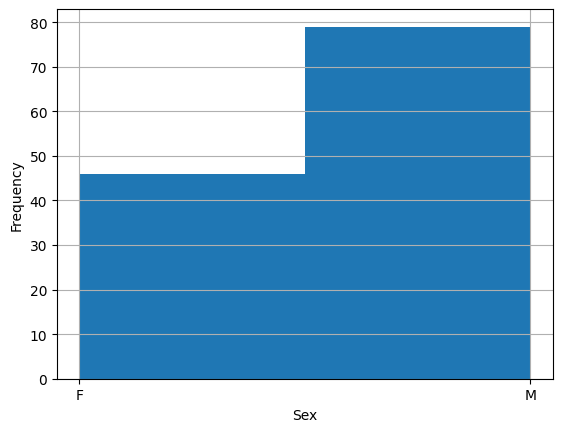

In [ ]:
# Se realizó el histograma para la distribución de edades y se obtuvieron
# estadisticos descriptivos
demographic_info['Sex'].hist(bins=2)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Estadisticos descriptivos de la variable edad
print('Age')
demographic_info['Sex'].describe()

Age


count     125
unique      2
top         M
freq       79
Name: Sex, dtype: object

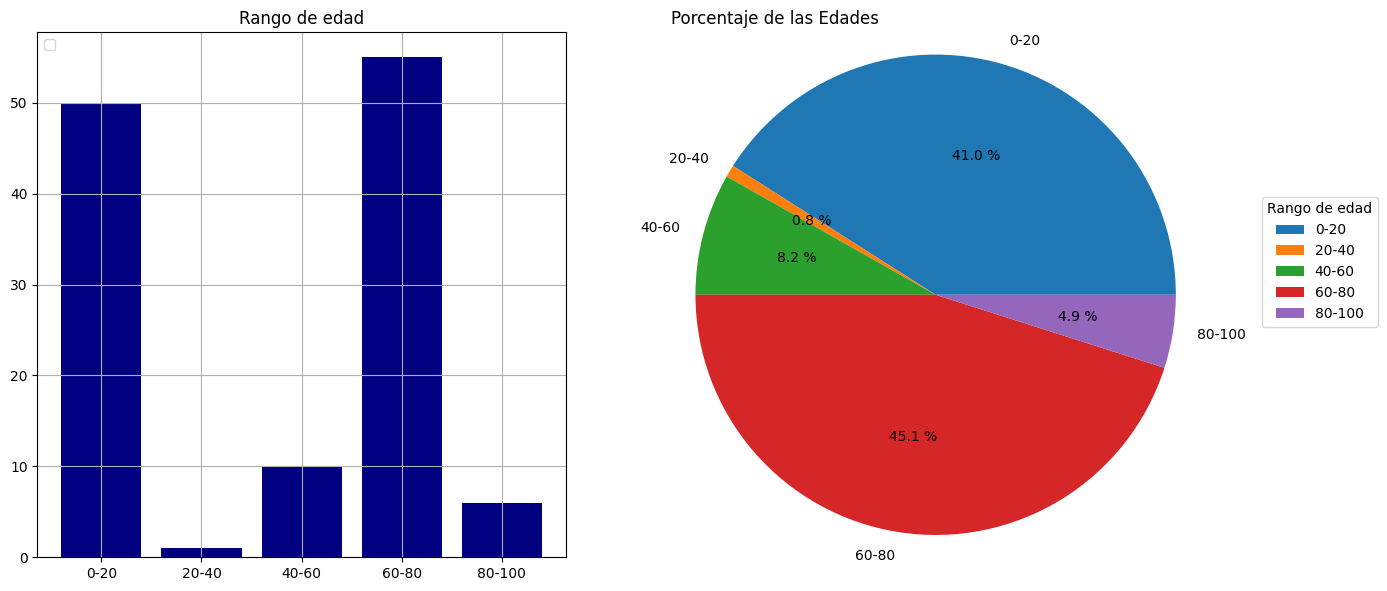

In [ ]:
#Se realiza un diagrama de barras y un diagrama circular para la variable edad

#Se establece una lista con los datos de la variable edad y se redondean los valores
Age_round = list(round(demographic_info['Age'].dropna()))

#Se establecen rangos de la edad con el fin de obtener una mejor visualización
#Sujetos menores de 20 año
range_1 = [x for x in Age_round if x <=20]
#Sujetos mayores de 20 años y menores de 40 años
range_2 = [x for x in Age_round if x >20 and x<40]
#Sujetos mayores de 40 años y menores de 60 años
range_3 = [x for x in Age_round if x >40 and x<60]
#Sujetos mayores de 60 años y menores de 80 años
range_4 = [x for x in Age_round if x >60 and x<80]
#Sujetos mayores de 80 años y menores de 100 años
range_5 = [x for x in Age_round if x >80 and x<100]

#Se establece la longitud para cada rango
range1_len=len(range_1)
range2_len=len(range_2)
range3_len=len(range_3)
range4_len=len(range_4)
range5_len=len(range_5)

#Se crea el vector que contiene la cantidad de sujetos en un rango determinado
count_edad = [range1_len,range2_len,range3_len,range4_len,range5_len]
# Se establece un vector que presenta los rangos especificos
age_label = ['0-20','20-40','40-60','60-80','80-100']

#Grficos
plt.figure(1, figsize = (15,15))

#Diagrama de barras
#Ancho de las barras
ancho_barras = 0.8

plt.subplot(2, 2, 1)
plt.bar(age_label,
          count_edad,
          color = 'navy',
          width = ancho_barras)
plt.grid()
plt.title('Rango de edad')
plt.legend(loc='upper left')

#Grafico circular
plt.subplot(2, 2, 2)
plt.pie(count_edad, labels=age_label, autopct="%0.1f %%")
plt.axis("equal")
plt.legend(["0-20","20-40","40-60","60-80","80-100"], bbox_to_anchor=(0.35, -0.3, 1, 1), loc=0, title= 'Rango de edad')
plt.title('Porcentaje de las Edades',loc='left')

plt.show()

In [ ]:
#Analisis de la ubicación del estetoscopio.
# Se extrae la información del nombre del archivo
files_names = os.listdir('/content/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files')
txt_list = []
print(len(files_names)) # Son 1840 porque también están los .wav

#Se recorre cada archivo y se separan los elementos implementando el split, con el fin de extraer la ubicación del estetoscopio
for position, archive in enumerate(files_names):
  # Sólo se utilizan los que terminan en .wav
  if archive.endswith(".wav"):
    aux_file = files_names[position].split('_')
    aux_file = aux_file[2]
    txt_list.append(aux_file)

#Se establece el número de sujetos para una determinada ubicación del estetoscopio.
counts = pd.Series(txt_list).value_counts()
counts

1840


Ar    168
Al    162
Pl    139
Pr    132
Tc    130
Lr    112
Ll     77
dtype: int64

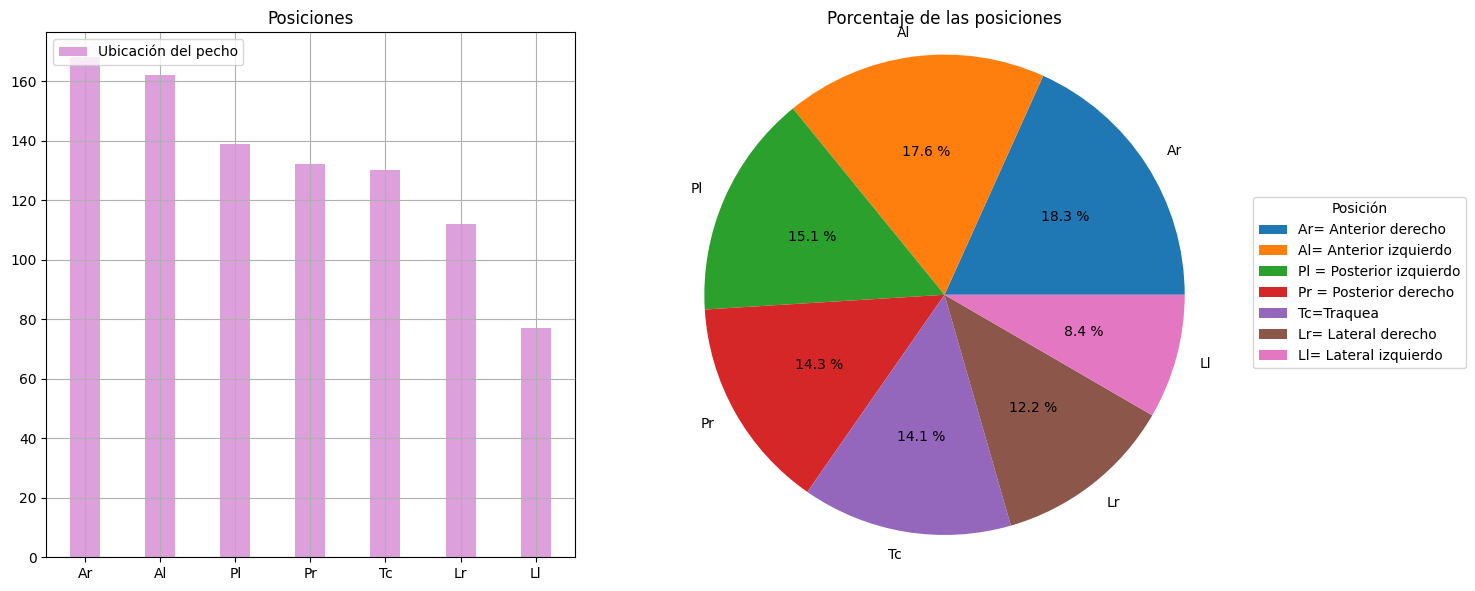

In [ ]:
#Evidenciar por medio de un diagrama de barras las posiciones mas implementadas
#Se extrae los datos correspondientes al eje x y al eje y del diagrama de barras
counts_=list(counts)
posiciones = ['Ar','Al','Pl','Pr','Tc','Lr','Ll']


plt.figure(1, figsize = (15,15))
#Se genera el diagrama de barras

#Se establece un ancho especifico de las barras
ancho_barras = 0.4

plt.subplot(2, 2, 1)

plt.bar(posiciones,
          counts_,
          color = 'plum',
          width = ancho_barras,
          label='Ubicación del pecho')
plt.grid()
plt.title('Posiciones')
plt.legend(loc='upper left')

#Grafico circular
plt.subplot(2, 2, 2)
plt.pie(counts, labels=posiciones, autopct="%0.1f %%")
plt.axis("equal")
plt.legend(['Ar= Anterior derecho', 'Al= Anterior izquierdo', 'Pl = Posterior izquierdo',
'Pr = Posterior derecho', 'Tc=Traquea', 'Lr= Lateral derecho',
'Ll= Lateral izquierdo'], bbox_to_anchor=(0.5, -0.3, 1, 1), loc=0, title= 'Posición')
plt.title('Porcentaje de las posiciones')

plt.show()

ESTADISTICA DESCRIPTIVA


ktest para DPE

In [ ]:
vector_dpe_sanos = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos', 'DPE'].values
stadistics, pvalue = stats.kstest(vector_dpe_sanos,'norm')

print(f' Valor de P: {pvalue}')

if pvalue < 0.05:
    print('No presenta distribución normal')
else:
    print('Sí presenta distribución normal')

 Valor de P: 0.0
No presenta distribución normal


In [ ]:
vector_dpe_sanos = data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia', 'DPE'].values
stadistics, pvalue = stats.kstest(vector_dpe_sanos,'norm')

print(f' Valor de P: {pvalue}')

if pvalue < 0.05:
    print('No presenta distribución normal')
else:
    print('Sí presenta distribución normal')

 Valor de P: 0.0
No presenta distribución normal


In [ ]:
vector_dpe_sanos = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sibilancia', 'DPE'].values
stadistics, pvalue = stats.kstest(vector_dpe_sanos,'norm')

print(f' Valor de P: {pvalue}')

if pvalue < 0.05:
    print('No presenta distribución normal')
else:
    print('Sí presenta distribución normal')

 Valor de P: 2.4043379293321324e-205
No presenta distribución normal


Ktest para ADP

In [ ]:
vector_dpe_sanos = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos', 'ADPE'].values
stadistics, pvalue = stats.kstest(vector_dpe_sanos,'norm')

print(f' Valor de P: {pvalue}')

if pvalue < 0.05:
    print('No presenta distribución normal')
else:
    print('Sí presenta distribución normal')

 Valor de P: 0.0
No presenta distribución normal


In [ ]:
vector_dpe_sanos = data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia', 'ADPE'].values
stadistics, pvalue = stats.kstest(vector_dpe_sanos,'norm')

print(f' Valor de P: {pvalue}')

if pvalue < 0.05:
    print('No presenta distribución normal')
else:
    print('Sí presenta distribución normal')

 Valor de P: 0.0
No presenta distribución normal


In [ ]:
vector_dpe_sanos = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sibilancia', 'ADPE'].values
stadistics, pvalue = stats.kstest(vector_dpe_sanos,'norm')

print(f' Valor de P: {pvalue}')

if pvalue < 0.05:
    print('No presenta distribución normal')
else:
    print('Sí presenta distribución normal')

 Valor de P: 2.4043379293321324e-205
No presenta distribución normal


Ktest para mediana

In [ ]:
vector_dpe_sanos = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos', 'Mediana'].values
stadistics, pvalue = stats.kstest(vector_dpe_sanos,'norm')

print(f' Valor de P: {pvalue}')

if pvalue < 0.05:
    print('No presenta distribución normal')
else:
    print('Sí presenta distribución normal')

 Valor de P: 0.0
No presenta distribución normal


In [ ]:
vector_dpe_sanos = data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia', 'Mediana'].values
stadistics, pvalue = stats.kstest(vector_dpe_sanos,'norm')

print(f' Valor de P: {pvalue}')

if pvalue < 0.05:
    print('No presenta distribución normal')
else:
    print('Sí presenta distribución normal')

 Valor de P: 0.0
No presenta distribución normal


In [ ]:
vector_dpe_sanos = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sibilancia', 'Mediana'].values
stadistics, pvalue = stats.kstest(vector_dpe_sanos,'norm')

print(f' Valor de P: {pvalue}')

if pvalue < 0.05:
    print('No presenta distribución normal')
else:
    print('Sí presenta distribución normal')

 Valor de P: 2.4043378143531606e-205
No presenta distribución normal


In [ ]:
vector_dpe_sanos = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sibilancia', 'Varianza'].values
stadistics, pvalue = stats.kstest(vector_dpe_sanos,'norm')

print(f' Valor de P: {pvalue}')

if pvalue < 0.05:
    print('No presenta distribución normal')
else:
    print('Sí presenta distribución normal')

 Valor de P: 2.4043379059754605e-205
No presenta distribución normal


In [ ]:
vector_dpe_sanos = data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia', 'Mediana'].values
stadistics, pvalue = stats.kstest(vector_dpe_sanos,'norm')

print(f' Valor de P: {pvalue}')

if pvalue < 0.05:
    print('No presenta distribución normal')
else:
    print('Sí presenta distribución normal')

 Valor de P: 0.0
No presenta distribución normal


In [ ]:
vector_dpe_sanos = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos', 'Varianza'].values
stadistics, pvalue = stats.kstest(vector_dpe_sanos,'norm')

print(f' Valor de P: {pvalue}')

if pvalue < 0.05:
    print('No presenta distribución normal')
else:
    print('Sí presenta distribución normal')

 Valor de P: 0.0
No presenta distribución normal


MAN WITHNEY


Prueba U Dpe

In [ ]:
# Se importa las librerías necesarias
from scipy.stats import mannwhitneyu

_,p_value_ = mannwhitneyu(data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Sanos']['DPE'],
                data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Sibilancia']['DPE'],use_continuity=True)

print(f' Valor de P: {p_value_}')

if p_value_ < 0.05:
    print('No provienen de la misma distribución')
else:
    print('Provienen de la misma distribución')


 Valor de P: 7.721787376635246e-16
No provienen de la misma distribución


In [ ]:
# Se importa las librerías necesarias
from scipy.stats import mannwhitneyu

_,p_value_ = mannwhitneyu(data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Sanos']['DPE'],
                data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Crepitancia']['DPE'],use_continuity=True)

print(f' Valor de P: {p_value_}')

if p_value_ < 0.05:
    print('No provienen de la misma distribución')
else:
    print('Provienen de la misma distribución')


 Valor de P: 4.223211724488534e-06
No provienen de la misma distribución


Prueba U  ADP


In [ ]:
# Se importa las librerías necesarias
from scipy.stats import mannwhitneyu

_,p_value_ = mannwhitneyu(data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Sanos']['ADPE'],
                data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Sibilancia']['ADPE'],use_continuity=True)

print(f' Valor de P: {p_value_}')

if p_value_ < 0.05:
    print('No provienen de la misma distribución')
else:
    print('Provienen de la misma distribución')


 Valor de P: 7.721787376635246e-16
No provienen de la misma distribución


In [ ]:
# Se importa las librerías necesarias
from scipy.stats import mannwhitneyu

_,p_value_ = mannwhitneyu(data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos']['ADPE'],
                data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia']['ADPE'],use_continuity=True)

print(f' Valor de P: {p_value_}')

if p_value_ < 0.05:
    print('No provienen de la misma distribución')
else:
    print('Provienen de la misma distribución')


 Valor de P: 4.223211724488534e-06
No provienen de la misma distribución


In [ ]:
# Se importa las librerías necesarias
from scipy.stats import mannwhitneyu

_,p_value_ = mannwhitneyu(data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Sanos']['Mediana'],
                data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Crepitancia']['Mediana'],use_continuity=True)

print(f' Valor de P: {p_value_}')

if p_value_ < 0.05:
    print('No provienen de la misma distribución')
else:
    print('Provienen de la misma distribución')


 Valor de P: 4.223211724488534e-06
No provienen de la misma distribución


Prueba U Varianza

In [ ]:
# Se importa las librerías necesarias
from scipy.stats import mannwhitneyu

_,p_value_ = mannwhitneyu(data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Sanos']['Varianza'],
                data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Crepitancia']['Varianza'],use_continuity=True)

print(f' Valor de P: {p_value_}')

if p_value_ < 0.05:
    print('No provienen de la misma distribución')
else:
    print('Provienen de la misma distribución')


 Valor de P: 4.0699840709762485e-15
No provienen de la misma distribución


In [ ]:
# Se importa las librerías necesarias
from scipy.stats import mannwhitneyu

_,p_value_ = mannwhitneyu(data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Sanos']['Varianza'],
                data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Sibilancia']['Varianza'],use_continuity=True)

print(f' Valor de P: {p_value_}')

if p_value_ < 0.05:
    print('No provienen de la misma distribución')
else:
    print('Provienen de la misma distribución')


 Valor de P: 1.204283766072164e-13
No provienen de la misma distribución


Prueba U Mediana

In [ ]:
# Se importa las librerías necesarias
from scipy.stats import mannwhitneyu

_,p_value_ = mannwhitneyu(data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Sanos']['Mediana'],
                data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Crepitancia']['Mediana'],use_continuity=True)

print(f' Valor de P: {p_value_}')

if p_value_ < 0.05:
    print('No provienen de la misma distribución')
else:
    print('Provienen de la misma distribución')


 Valor de P: 1.0
Provienen de la misma distribución


In [ ]:
# Se importa las librerías necesarias
from scipy.stats import mannwhitneyu

_,p_value_ = mannwhitneyu(data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Sanos']['Mediana'],
                data_frame_final_.loc[data_frame_final_['Clasificación'] == 'Sibilancia']['Mediana'],use_continuity=True)

print(f' Valor de P: {p_value_}')

if p_value_ < 0.05:
    print('No provienen de la misma distribución')
else:
    print('Provienen de la misma distribución')


 Valor de P: 1.0
Provienen de la misma distribución


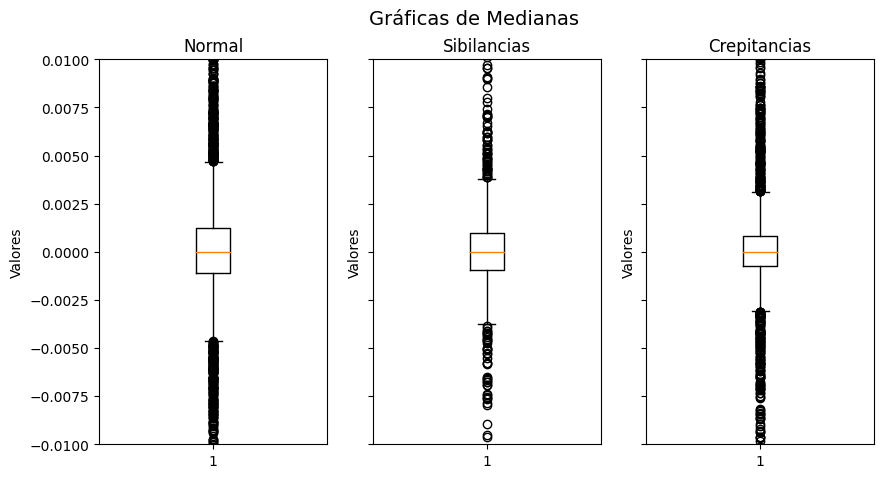

In [ ]:
import matplotlib.pyplot as plt

# Definir los vectores normal, sibilancias y crepitancias con sus respectivas medianas

normal = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos', 'Mediana'].values
sibilancias = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sibilancia', 'Mediana'].values
crepitancias = data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia', 'Mediana'].values


# Crear la figura y los ejes
fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

# Configurar la gráfica para cada vector
for i, ax in enumerate(axs):
    if i == 0:
        ax.boxplot(normal)
        ax.set_title('Normal')
        ax.set_ylim([-0.01, 0.01])
    elif i == 1:
        ax.boxplot(sibilancias)
        ax.set_title('Sibilancias')
        ax.set_ylim([-0.01, 0.01])
    else:
        ax.boxplot(crepitancias)
        ax.set_title('Crepitancias')
    ax.set_ylabel('Valores')
    ax.set_ylim([-0.01, 0.01])

# Configurar el título de la figura
fig.suptitle('Gráficas de Medianas', fontsize=14)

# Mostrar la gráfica
plt.show()

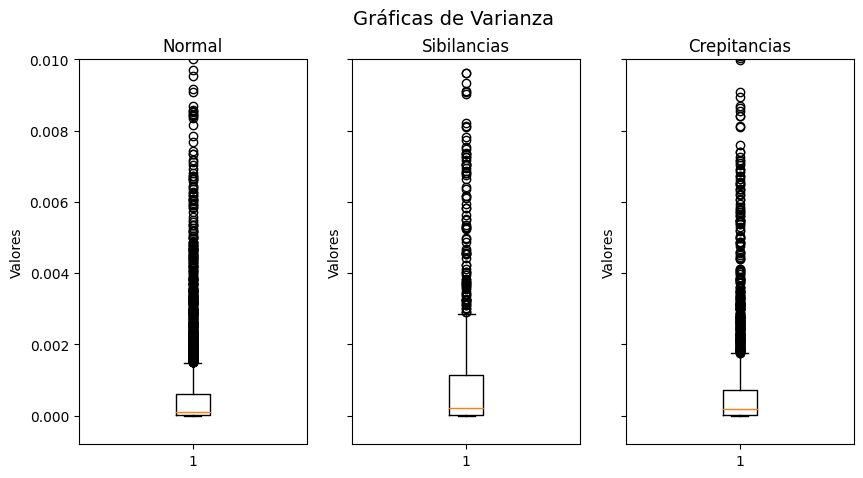

In [ ]:
import matplotlib.pyplot as plt

# Definir los vectores normal, sibilancias y crepitancias con sus respectivas medianas

normal = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos', 'Varianza'].values
sibilancias = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sibilancia', 'Varianza'].values
crepitancias = data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia', 'Varianza'].values


# Crear la figura y los ejes
fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

# Configurar la gráfica para cada vector
for i, ax in enumerate(axs):
    if i == 0:
        ax.boxplot(normal)
        ax.set_title('Normal')

    elif i == 1:
        ax.boxplot(sibilancias)
        ax.set_title('Sibilancias')

    else:
        ax.boxplot(crepitancias)
        ax.set_title('Crepitancias')
    ax.set_ylabel('Valores')
    ax.set_ylim([-0.0008, 0.01])

# Configurar el título de la figura
fig.suptitle('Gráficas de Varianza', fontsize=14)

# Mostrar la gráfica
plt.show()

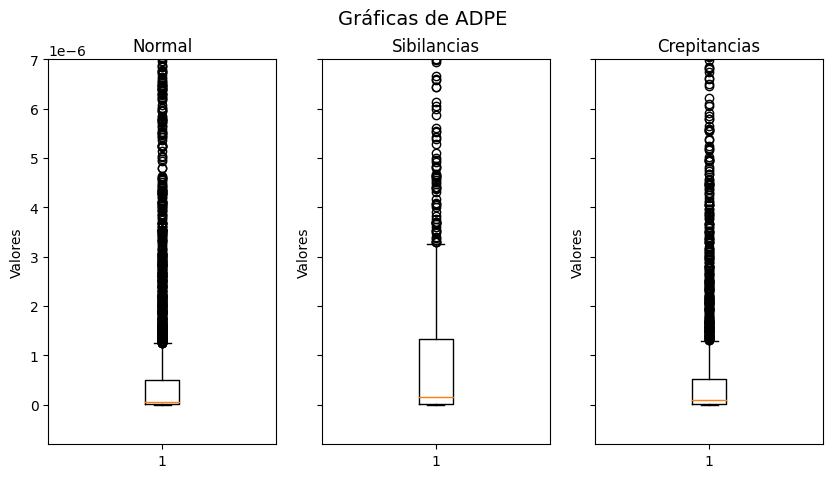

In [ ]:
import matplotlib.pyplot as plt

# Definir los vectores normal, sibilancias y crepitancias con sus respectivas medianas

normal = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos', 'ADPE'].values
sibilancias = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sibilancia', 'ADPE'].values
crepitancias = data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia', 'ADPE'].values


# Crear la figura y los ejes
fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

# Configurar la gráfica para cada vector
for i, ax in enumerate(axs):
    if i == 0:
        ax.boxplot(normal)
        ax.set_title('Normal')
        ax.set_ylim([-0.01, 0.01])
    elif i == 1:
        ax.boxplot(sibilancias)
        ax.set_title('Sibilancias')
        ax.set_ylim([-0.01, 0.01])
    else:
        ax.boxplot(crepitancias)
        ax.set_title('Crepitancias')
    ax.set_ylabel('Valores')
    ax.set_ylim([-0.0000008, 0.000007])

# Configurar el título de la figura
fig.suptitle('Gráficas de ADPE', fontsize=14)

# Mostrar la gráfica
plt.show()

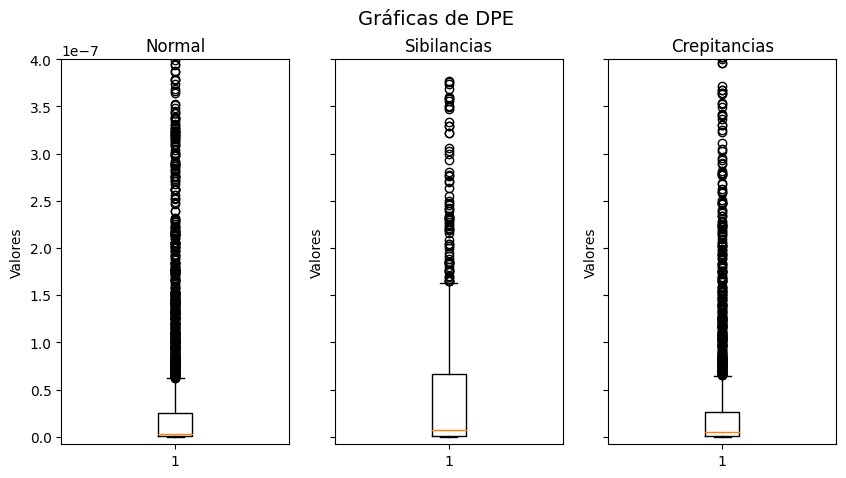

In [ ]:
import matplotlib.pyplot as plt

# Definir los vectores normal, sibilancias y crepitancias con sus respectivas medianas

normal = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos', 'DPE'].values
sibilancias = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sibilancia', 'DPE'].values
crepitancias = data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia', 'DPE'].values


# Crear la figura y los ejes
fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

# Configurar la gráfica para cada vector
for i, ax in enumerate(axs):
    if i == 0:
        ax.boxplot(normal)
        ax.set_title('Normal')
        ax.set_ylim([-0.01, 0.01])
    elif i == 1:
        ax.boxplot(sibilancias)
        ax.set_title('Sibilancias')
        ax.set_ylim([-0.01, 0.01])
    else:
        ax.boxplot(crepitancias)
        ax.set_title('Crepitancias')
    ax.set_ylabel('Valores')
    ax.set_ylim([-0.000000008, 0.0000004])

# Configurar el título de la figura
fig.suptitle('Gráficas de DPE', fontsize=14)

# Mostrar la gráfica
plt.show()

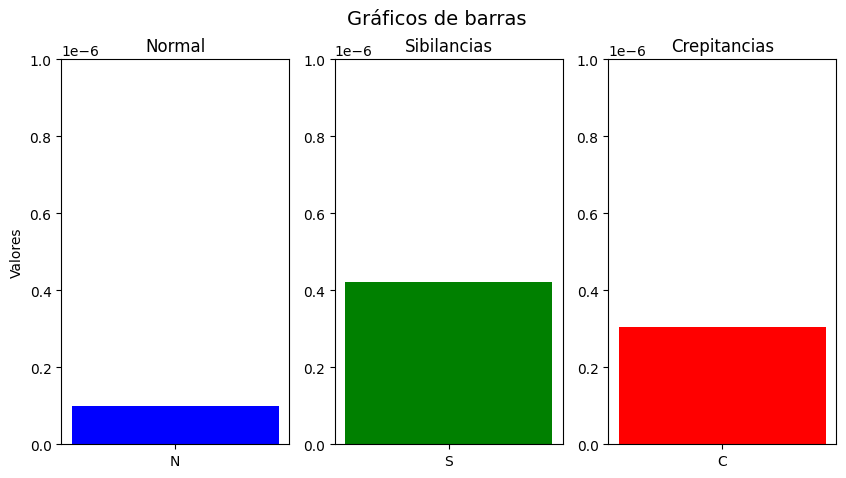

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir los vectores normal, sibilancias y crepitancias
normal = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos', 'Mediana'].values
sibilancias = data_frame_final.loc[data_frame_final['Clasificación'] == 'Sibilancia', 'Mediana'].values
crepitancias = data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia', 'Mediana'].values

# Crear la figura y los ejes
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Crear los gráficos de barras para cada vector
axs[0].bar(['N'], [np.median(normal)], color='blue')
axs[1].bar(['S'], [np.median(sibilancias)], color='green')
axs[2].bar(['C'], [np.median(crepitancias)], color='red')

# Configurar los ejes y el título para cada gráfico
axs[0].set_title('Normal')
axs[0].set_ylim([0, 0.000001])
axs[0].set_ylabel('Valores')
axs[1].set_title('Sibilancias')
axs[1].set_ylim([0, 0.000001])
axs[2].set_title('Crepitancias')
axs[2].set_ylim([0, 0.000001])

# Configurar el título de la figura
fig.suptitle('Gráficos de barras', fontsize=14)

# Mostrar la gráfica
plt.show()


<ipython-input-73-7068ea6821da>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data_frame_final_.groupby(['Clasificación']).boxplot(column=['Varianza'],subplots=False)


<Axes: title={'center': 'Distribución Entropía de permutación'}>

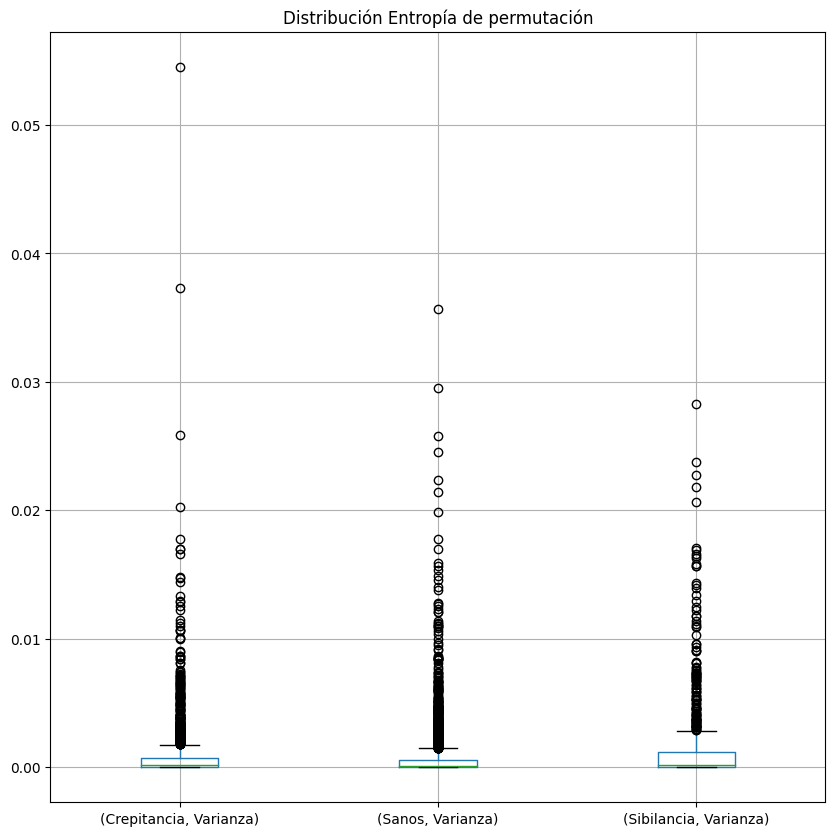

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Distribución Entropía de permutación')
data_frame_final_.groupby(['Clasificación']).boxplot(column=['Varianza'],subplots=False)

<ipython-input-87-349186003d61>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data_frame_final_.groupby(['Clasificación']).boxplot(column=['Mediana'],subplots=False)


<Axes: title={'center': 'Distribución Entropía de permutación'}>

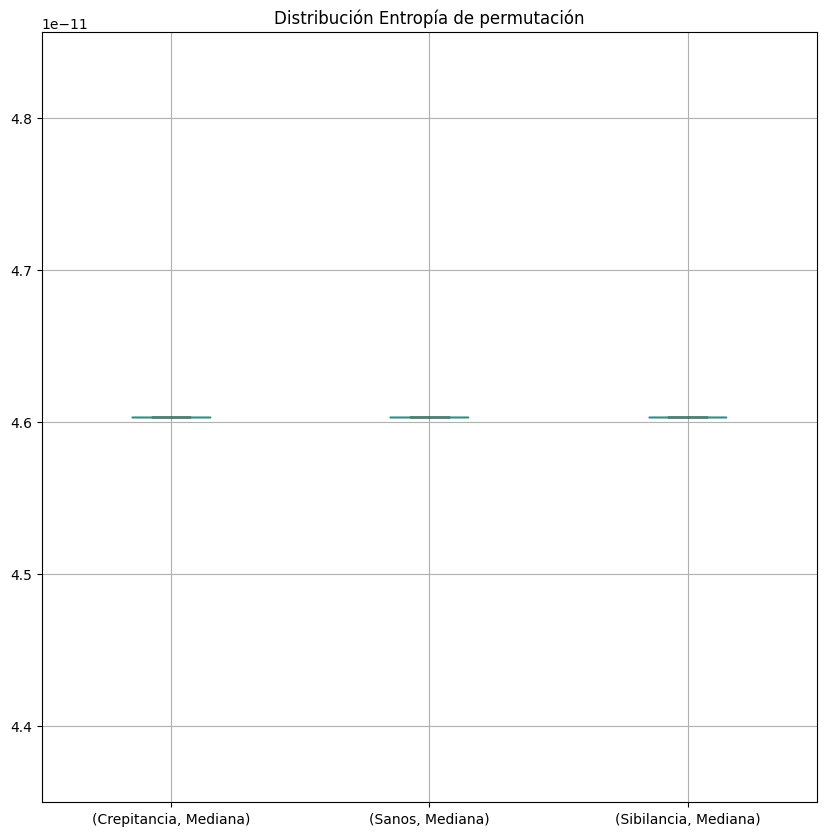

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Distribución Entropía de permutación')
data_frame_final_.groupby(['Clasificación']).boxplot(column=['Mediana'],subplots=False)


In [ ]:

data_frame_final_.groupby(['Clasificación'])['DPE'].describe().T

Clasificación   Crepitancia         Sanos    Sibilancia
count          2.370000e+03  3.642000e+03  8.860000e+02
mean           6.516833e-08  8.214453e-08  2.005237e-07
std            3.692074e-07  3.607563e-07  8.845604e-07
min            1.954577e-26  4.904223e-26  8.262845e-23
25%            7.503858e-10  3.273353e-10  9.317167e-10
50%            4.240308e-09  2.883067e-09  7.223180e-09
75%            2.530306e-08  2.513500e-08  6.425869e-08
max            1.166052e-05  7.005425e-06  1.378999e-05

In [ ]:

data_frame_final_.groupby(['Clasificación'])['ADPE'].describe().T

Clasificación   Crepitancia         Sanos    Sibilancia
count          2.370000e+03  3.642000e+03  8.860000e+02
mean           1.003592e-05  1.265026e-05  3.088066e-05
std            5.685794e-05  5.555647e-05  1.362223e-04
min            3.010048e-24  7.552503e-24  1.272478e-20
25%            1.155594e-07  5.040964e-08  1.434844e-07
50%            6.530074e-07  4.439923e-07  1.112370e-06
75%            3.896671e-06  3.870789e-06  9.895838e-06
max            1.795721e-03  1.078836e-03  2.123658e-03

In [ ]:

data_frame_final_.groupby(['Clasificación'])['Varianza'].describe().T

Clasificación   Crepitancia         Sanos    Sibilancia
count          2.370000e+03  3.642000e+03  8.860000e+02
mean           8.331150e-04  7.176754e-04  1.397647e-03
std            2.259742e-03  1.919524e-03  3.131976e-03
min            1.200213e-12  5.680798e-12  1.204963e-11
25%            3.324797e-05  1.332164e-05  2.558205e-05
50%            1.931271e-04  9.900008e-05  2.077502e-04
75%            7.267149e-04  6.054551e-04  1.155949e-03
max            5.449377e-02  3.566292e-02  2.830322e-02

In [ ]:

data_frame_final_.groupby(['Clasificación'])['Mediana'].describe().T

Clasificación   Crepitancia         Sanos    Sibilancia
count          2.370000e+03  3.642000e+03  8.860000e+02
mean           5.931786e-11  5.931786e-11  5.931786e-11
std            1.292742e-26  2.585294e-26  1.293200e-26
min            5.931786e-11  5.931786e-11  5.931786e-11
25%            5.931786e-11  5.931786e-11  5.931786e-11
50%            5.931786e-11  5.931786e-11  5.931786e-11
75%            5.931786e-11  5.931786e-11  5.931786e-11
max            5.931786e-11  5.931786e-11  5.931786e-11

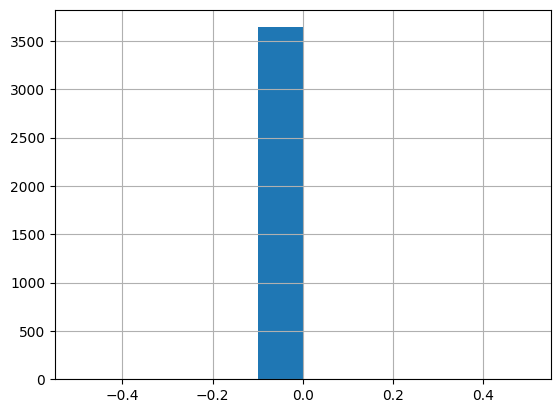

In [ ]:
data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos']['Mediana'].hist()
plt.show()

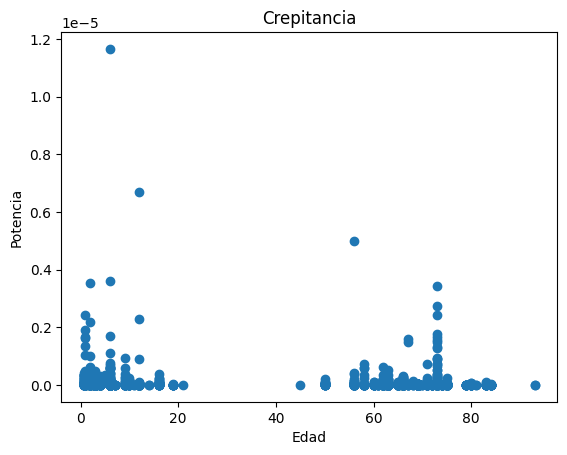

In [ ]:
potencia=data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia']['DPE']
edad=data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia']['edad']
plt.scatter(edad, potencia)

# Asignamos etiquetas a los ejes
plt.title("Crepitancia")
plt.xlabel('Edad')
plt.ylabel('Potencia')

# Mostramos el gráfico
plt.show()

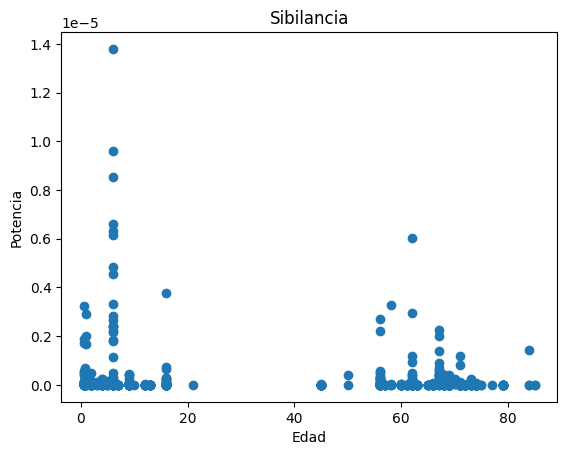

In [ ]:
potencia=data_frame_final.loc[data_frame_final['Clasificación'] == 'Sibilancia']['DPE']
edad=data_frame_final.loc[data_frame_final['Clasificación'] == 'Sibilancia']['edad']
plt.scatter(edad, potencia)

# Asignamos etiquetas a los ejes
plt.title("Sibilancia")
plt.xlabel('Edad')
plt.ylabel('Potencia')

# Mostramos el gráfico
plt.show()

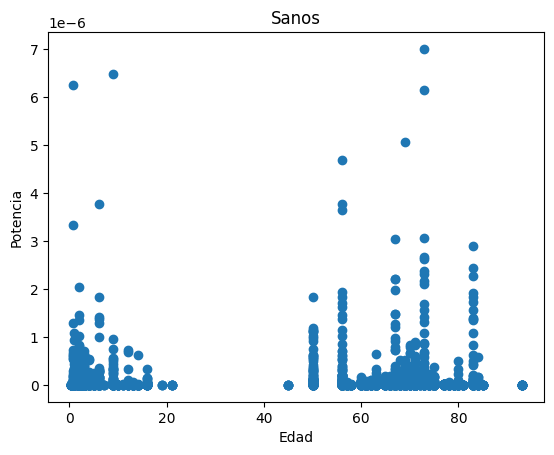

In [ ]:
potencia=data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos']['DPE']
edad=data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos']['edad']
plt.scatter(edad, potencia)

# Asignamos etiquetas a los ejes
plt.title("Sanos")
plt.xlabel('Edad')
plt.ylabel('Potencia')

# Mostramos el gráfico
plt.show()

TypeError: ignored

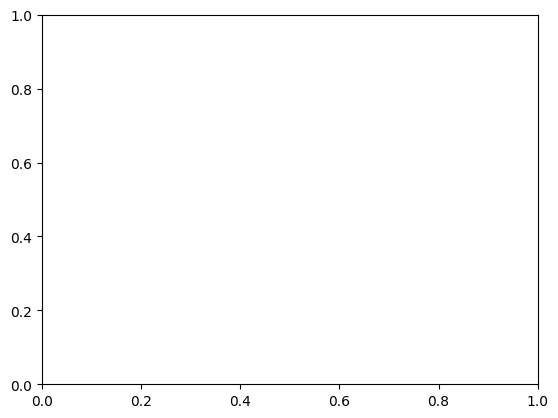

In [ ]:
potencia=data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos']['DPE']
edad=data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos']['genero']
plt.scatter(edad,potencia)

# Asignamos etiquetas a los ejes
plt.title("Sanos")
plt.xlabel('Edad')
plt.ylabel('Potencia')

# Mostramos el gráfico
plt.show()

Text(0, 0.5, 'Frecuencia')

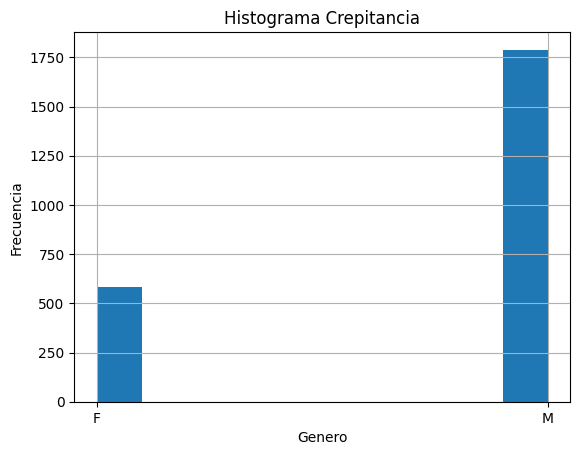

In [ ]:
#potencia=data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia']['DPE'].hist()
edad=data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia']['genero'].hist()
plt.title('Histograma Crepitancia')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

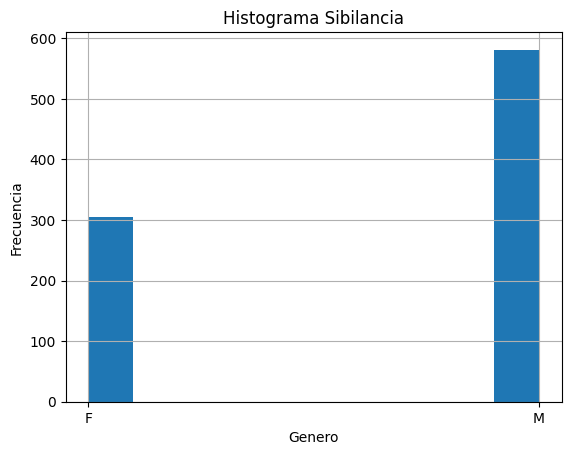

In [ ]:
#potencia=data_frame_final.loc[data_frame_final['Clasificación'] == 'Sibilancia']['DPE'].hist()
edad=data_frame_final.loc[data_frame_final['Clasificación'] == 'Sibilancia']['genero'].hist()
plt.title('Histograma Sibilancia')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')


Text(0, 0.5, 'Frecuencia')

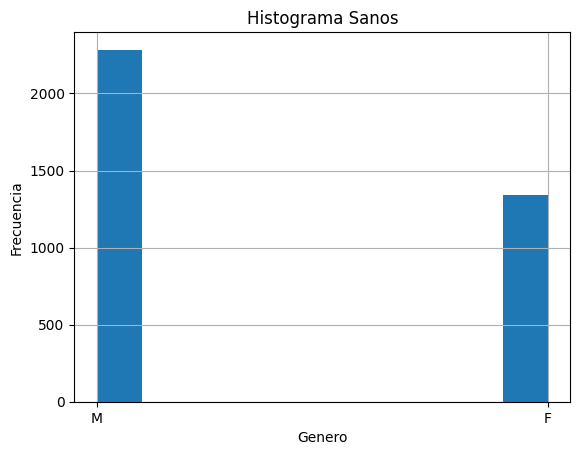

In [ ]:
edad=data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos']['genero'].hist()
plt.title('Histograma Sanos')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')

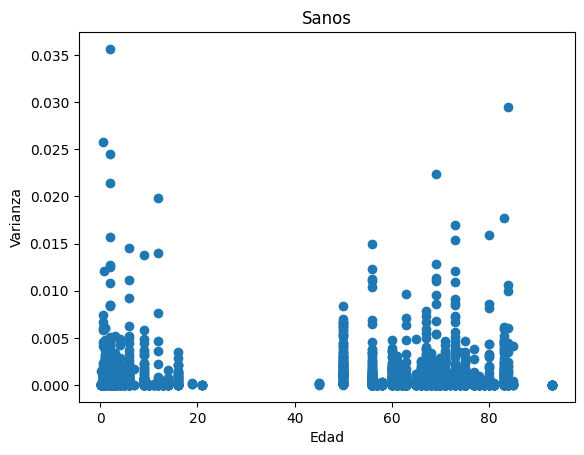

In [ ]:
potencia=data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos']['Varianza']
edad=data_frame_final.loc[data_frame_final['Clasificación'] == 'Sanos']['edad']
plt.scatter(edad, potencia)

# Asignamos etiquetas a los ejes
plt.title("Sanos")
plt.xlabel('Edad')
plt.ylabel('Varianza')

# Mostramos el gráfico
plt.show()

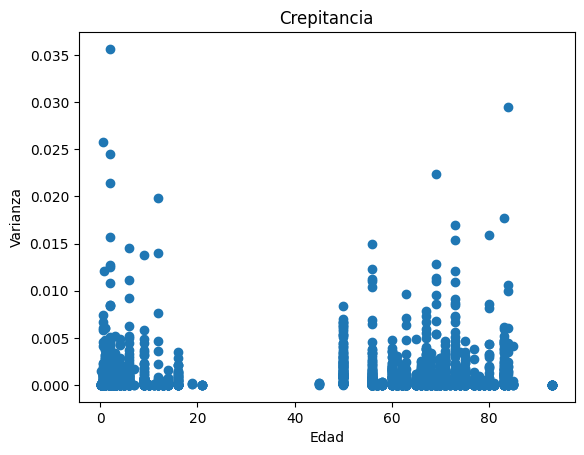

In [ ]:
potencia=data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia']['Varianza']
edad=data_frame_final.loc[data_frame_final['Clasificación'] == 'Crepitancia']['edad']
plt.scatter(edad, potencia)

# Asignamos etiquetas a los ejes
plt.title("Crepitancia")
plt.xlabel('Edad')
plt.ylabel('Varianza')

# Mostramos el gráfico
plt.show()

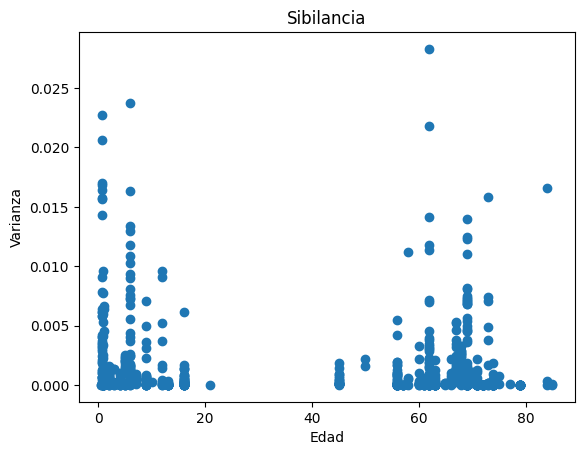

In [ ]:
potencia=data_frame_final.loc[data_frame_final['Clasificación'] == 'Sibilancia']['Varianza']
edad=data_frame_final.loc[data_frame_final['Clasificación'] == 'Sibilancia']['edad']
plt.scatter(edad, potencia)

# Asignamos etiquetas a los ejes
plt.title("Sibilancia")
plt.xlabel('Edad')
plt.ylabel('Varianza')

# Mostramos el gráfico
plt.show()